In [13]:
from keras.datasets import mnist
from keras.utils import np_utils
from keras.models import Sequential
import matplotlib.pyplot as plt
from keras.layers import Dense, Conv2D, Flatten, MaxPooling2D, Activation
from keras.layers import ZeroPadding2D
from keras.optimizers import Adam
import os,cv2
from os import listdir
import numpy as np
import pandas as pd

In [14]:
# Data Path
data=('C:/Users/it17133128/Desktop/RE_project/Dataset')

In [15]:
#Total Count of Images
data_path=os.listdir(data)
vimages=0
traimages=0
teimages=0
cate=['Cancer','Normal']
for d in data_path:
    if d=='val':
        for c in cate:
            imgs=os.listdir(data+'/'+d+'/'+c)
            vimages+=len(imgs)
    elif d=='test':
        for c in cate:
            imgs=os.listdir(data+'/'+d+'/'+c)
            teimages+=len(imgs)
    elif d=='train':
        for c in cate:
            imgs=os.listdir(data+'/'+d+'/'+c)
            traimages+=len(imgs)

In [16]:
print(vimages)
print(teimages)
print(traimages)

16
48
119


In [17]:
#Labels Array intiallizing with 1 for every Image
train_labels=np.ones((traimages,),dtype='int64')
test_labels=np.ones((teimages,),dtype='int64')
validation_labels=np.ones((vimages,),dtype='int64')

In [18]:
#labelling Images
val_list=[]
test_list=[]
train_list=[]
h=w=224
for d in data_path:
    if d=='val':
        v=0
        a=0
        for c in cate:
            imgs=os.listdir(data+'/'+d+'/'+c)
            for i in imgs:
                val_data=cv2.imread(data+'/'+d+'/'+c+'/'+i)
                print(data+'/'+d+'/'+c+'/'+i)
                val_data=cv2.cvtColor(val_data,cv2.COLOR_BGR2GRAY)
                #h, w = val_data.shape
                val_data=cv2.resize(val_data,(h,w))
                print('validation  '+str(v)+'  '+str(val_data.shape))
                val_list.append(val_data)

                if c=='Cancer':
                    validation_labels[v]=0 #Allocating label in csv to the label array at that specific position
                elif c=='Normal':
                    validation_labels[v]=1
                v+=1
    elif d=='test':
        v=0
        a=0
        for c in cate:
            imgs=os.listdir(data+'/'+d+'/'+c)
            for i in imgs:
                test_data=cv2.imread(data+'/'+d+'/'+c+'/'+i)
                print(data+'/'+d+'/'+c+'/'+i)
                test_data=cv2.cvtColor(test_data,cv2.COLOR_BGR2GRAY)
                #h, w = test_data.shape
                test_data=cv2.resize(test_data,(h,w))
                print('Test  '+str(v)+'  '+str(test_data.shape))
                test_list.append(test_data)

                if c=='Cancer':
                    test_labels[v]=0 #Allocating label in csv to the label array at that specific position
                elif c=='Normal':
                    test_labels[v]=1
                v+=1
    elif d=='train':
        v=0
        a=0
        for c in cate:
            imgs=os.listdir(data+'/'+d+'/'+c)
            for i in imgs:
                train_data=cv2.imread(data+'/'+d+'/'+c+'/'+i)
                print(data+'/'+d+'/'+c+'/'+i)
                train_data=cv2.cvtColor(train_data,cv2.COLOR_BGR2GRAY)
                #h, w = train_data.shape
                train_data=cv2.resize(train_data,(h,w))
                print('train  '+str(v)+'  '+str(train_data.shape))
                train_list.append(train_data)

                if c=='Cancer':
                    train_labels[v]=0 #Allocating label in csv to the label array at that specific position
                elif c=='Normal':
                    train_labels[v]=1
                v+=1
            



C:/Users/it17133128/Desktop/RE_project/Dataset/test/Cancer/JPCLN001.png
Test  0  (224, 224)
C:/Users/it17133128/Desktop/RE_project/Dataset/test/Cancer/JPCLN003.png
Test  1  (224, 224)
C:/Users/it17133128/Desktop/RE_project/Dataset/test/Cancer/JPCLN010.png
Test  2  (224, 224)
C:/Users/it17133128/Desktop/RE_project/Dataset/test/Cancer/JPCLN014.png
Test  3  (224, 224)
C:/Users/it17133128/Desktop/RE_project/Dataset/test/Cancer/JPCLN015.png
Test  4  (224, 224)
C:/Users/it17133128/Desktop/RE_project/Dataset/test/Cancer/JPCLN016.png
Test  5  (224, 224)
C:/Users/it17133128/Desktop/RE_project/Dataset/test/Cancer/JPCLN019.png
Test  6  (224, 224)
C:/Users/it17133128/Desktop/RE_project/Dataset/test/Cancer/JPCLN022.png
Test  7  (224, 224)
C:/Users/it17133128/Desktop/RE_project/Dataset/test/Cancer/JPCLN029.png
Test  8  (224, 224)
C:/Users/it17133128/Desktop/RE_project/Dataset/test/Cancer/JPCLN038.png
Test  9  (224, 224)
C:/Users/it17133128/Desktop/RE_project/Dataset/test/Cancer/JPCLN040.png
Test  10

train  37  (224, 224)
C:/Users/it17133128/Desktop/RE_project/Dataset/train/Cancer/JPCLN090.png
train  38  (224, 224)
C:/Users/it17133128/Desktop/RE_project/Dataset/train/Cancer/JPCLN092.png
train  39  (224, 224)
C:/Users/it17133128/Desktop/RE_project/Dataset/train/Cancer/JPCLN093.png
train  40  (224, 224)
C:/Users/it17133128/Desktop/RE_project/Dataset/train/Cancer/JPCLN095.png
train  41  (224, 224)
C:/Users/it17133128/Desktop/RE_project/Dataset/train/Cancer/JPCLN097.png
train  42  (224, 224)
C:/Users/it17133128/Desktop/RE_project/Dataset/train/Cancer/JPCLN099.png
train  43  (224, 224)
C:/Users/it17133128/Desktop/RE_project/Dataset/train/Cancer/JPCLN105.png
train  44  (224, 224)
C:/Users/it17133128/Desktop/RE_project/Dataset/train/Cancer/JPCLN106.png
train  45  (224, 224)
C:/Users/it17133128/Desktop/RE_project/Dataset/train/Cancer/JPCLN108.png
train  46  (224, 224)
C:/Users/it17133128/Desktop/RE_project/Dataset/train/Cancer/JPCLN112.png
train  47  (224, 224)
C:/Users/it17133128/Desktop/

validation  0  (224, 224)
C:/Users/it17133128/Desktop/RE_project/Dataset/val/Cancer/JPCLN069.png
validation  1  (224, 224)
C:/Users/it17133128/Desktop/RE_project/Dataset/val/Cancer/JPCLN073.png
validation  2  (224, 224)
C:/Users/it17133128/Desktop/RE_project/Dataset/val/Cancer/JPCLN083.png
validation  3  (224, 224)
C:/Users/it17133128/Desktop/RE_project/Dataset/val/Cancer/JPCLN104.png
validation  4  (224, 224)
C:/Users/it17133128/Desktop/RE_project/Dataset/val/Cancer/JPCLN114.png
validation  5  (224, 224)
C:/Users/it17133128/Desktop/RE_project/Dataset/val/Cancer/JPCLN131.png
validation  6  (224, 224)
C:/Users/it17133128/Desktop/RE_project/Dataset/val/Cancer/JPCLN153.png
validation  7  (224, 224)
C:/Users/it17133128/Desktop/RE_project/Dataset/val/Normal/No Finding.00000050_001.png
validation  8  (224, 224)
C:/Users/it17133128/Desktop/RE_project/Dataset/val/Normal/No Finding.00000050_002.png
validation  9  (224, 224)
C:/Users/it17133128/Desktop/RE_project/Dataset/val/Normal/No Finding.00

In [19]:
train_images=np.array(train_list)
train_images=train_images.astype('float32')
train_images/=255
train_images=np.expand_dims(train_images,axis=3)
print(train_images.shape)


test_images=np.array(test_list)
test_images=test_images.astype('float32')
test_images/=255
test_images=np.expand_dims(test_images,axis=3)
print(test_images.shape)


validation_images=np.array(val_list)
validation_images=validation_images.astype('float32')
validation_images/=255
validation_images=np.expand_dims(validation_images,axis=3)
print(validation_images.shape)

(119, 224, 224, 1)
(48, 224, 224, 1)
(16, 224, 224, 1)


In [20]:
train_labels=np_utils.to_categorical(train_labels,2)
test_labels=np_utils.to_categorical(test_labels,2)
validation_labels=np_utils.to_categorical(validation_labels,2)

In [21]:
print(train_labels)
print(test_labels)
print(validation_labels)

[[1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 

In [22]:
from sklearn.utils import shuffle

train_images,train_labels = shuffle(train_images,train_labels,random_state=2)
test_images,test_labels = shuffle(test_images,test_labels,random_state=1)
#validtion_images,validation_labels = shuffle(validtion_images,validation_labels,random_state=3)

In [23]:
model = Sequential()

model.add(Conv2D(20,(3,3), activation='relu', input_shape=train_images.shape[1:]))
model.add(MaxPooling2D(pool_size=(2,2), strides=(2,2)))

model.add(Conv2D(30,(3,3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2), strides=(2,2)))

model.add(Conv2D(40,(3,3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2), strides=(2,2)))

model.add(Conv2D(50,(3,3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2), strides=(2,2)))

model.add(Conv2D(60,(3,3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2), strides=(2,2)))

model.add(Flatten())
model.add(Dense(256, activation='relu'))
model.add(Dense(128, activation='relu'))
model.add(Dense(64, activation='relu'))
model.add(Dense(2, activation='softmax'))

# Viewing model_configuration
model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_6 (Conv2D)            (None, 222, 222, 20)      200       
_________________________________________________________________
max_pooling2d_6 (MaxPooling2 (None, 111, 111, 20)      0         
_________________________________________________________________
conv2d_7 (Conv2D)            (None, 109, 109, 30)      5430      
_________________________________________________________________
max_pooling2d_7 (MaxPooling2 (None, 54, 54, 30)        0         
_________________________________________________________________
conv2d_8 (Conv2D)            (None, 52, 52, 40)        10840     
_________________________________________________________________
max_pooling2d_8 (MaxPooling2 (None, 26, 26, 40)        0         
_________________________________________________________________
conv2d_9 (Conv2D)            (None, 24, 24, 50)       

In [24]:
epoch=100
opt = Adam(lr=0.001)
model.compile(optimizer=opt, loss='categorical_crossentropy', metrics=['accuracy']) 
history = model.fit(train_images, train_labels, batch_size=128, epochs=epoch,verbose=1, validation_data=(validation_images, validation_labels)) 
score = model.evaluate(test_images, test_labels, verbose=1)
print('Test loss:',score[0]) 
print('Test accuracy:', score[1])

Train on 119 samples, validate on 16 samples
Epoch 1/100
119/119 [==============================] - 5s 42ms/step - loss: 0.6951 - accuracy: 0.5042 - val_loss: 0.6921 - val_accuracy: 0.5000
Epoch 2/100
119/119 [==============================] - 4s 36ms/step - loss: 0.6912 - accuracy: 0.4958 - val_loss: 0.6886 - val_accuracy: 0.5000
Epoch 3/100
119/119 [==============================] - 4s 36ms/step - loss: 0.6892 - accuracy: 0.4958 - val_loss: 0.6857 - val_accuracy: 0.5000
Epoch 4/100
119/119 [==============================] - 4s 37ms/step - loss: 0.6841 - accuracy: 0.4958 - val_loss: 0.6816 - val_accuracy: 0.5000
Epoch 5/100
119/119 [==============================] - 4s 36ms/step - loss: 0.6781 - accuracy: 0.4958 - val_loss: 0.6743 - val_accuracy: 0.5625
Epoch 6/100
119/119 [==============================] - 4s 34ms/step - loss: 0.6671 - accuracy: 0.6891 - val_loss: 0.6620 - val_accuracy: 0.5000
Epoch 7/100
119/119 [==============================] - 5s 38ms/step - loss: 0.6501 - accura

Epoch 58/100
119/119 [==============================] - 4s 37ms/step - loss: 0.1264 - accuracy: 0.9748 - val_loss: 0.2639 - val_accuracy: 0.8750
Epoch 59/100
119/119 [==============================] - 4s 37ms/step - loss: 0.0925 - accuracy: 0.9748 - val_loss: 0.3707 - val_accuracy: 0.8125
Epoch 60/100
119/119 [==============================] - 4s 35ms/step - loss: 0.1017 - accuracy: 0.9580 - val_loss: 0.3606 - val_accuracy: 0.8125
Epoch 61/100
119/119 [==============================] - 4s 35ms/step - loss: 0.0913 - accuracy: 0.9580 - val_loss: 0.2319 - val_accuracy: 0.8750
Epoch 62/100
119/119 [==============================] - 4s 35ms/step - loss: 0.0648 - accuracy: 0.9832 - val_loss: 0.1979 - val_accuracy: 0.8750
Epoch 63/100
119/119 [==============================] - 4s 36ms/step - loss: 0.0790 - accuracy: 0.9748 - val_loss: 0.1923 - val_accuracy: 0.8750
Epoch 64/100
119/119 [==============================] - 4s 35ms/step - loss: 0.0517 - accuracy: 0.9832 - val_loss: 0.2784 - val_ac

In [25]:
score = model.evaluate(test_images, test_labels, verbose=1)
print('Test loss:',score[0]) 
print('Test accuracy:', score[1])

48/48 [==============================] - 1s 11ms/step
Test loss: 0.21768437512218952
Test accuracy: 0.9583333134651184


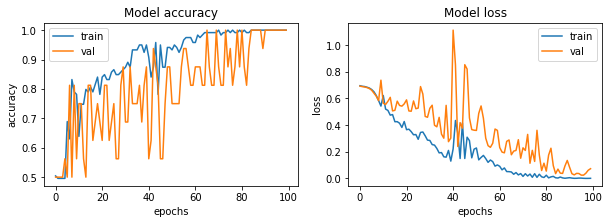

In [26]:
fig, ax = plt.subplots(1, 2, figsize=(10, 3))
ax = ax.ravel()

for i, met in enumerate(['accuracy', 'loss']):
    ax[i].plot(history.history[met])
    ax[i].plot(history.history['val_' + met])
    ax[i].set_title('Model {}'.format(met))
    ax[i].set_xlabel('epochs')
    ax[i].set_ylabel(met)
    ax[i].legend(['train', 'val'])

In [28]:
#predicting
lst=[]
# iii=os.listdir(data+'/'+d+'/'+cate[0])
# train_data=cv2.imread(data+'/'+d+'/'+cate[0]+'/'+iii[7])
train_data=cv2.imread('C:/Users/it17133128/Desktop/RE_project/Dataset/val/Cancer/JPCLN083.png')
# train_data=cv2.imread('C:/Users/it17133128/Desktop/RE_project/Dataset/val/Normal/No Finding.00000050_002.png')
# print(data+'/'+d+'/'+cate[0]+'/'+iii[7])
train_data=cv2.cvtColor(train_data,cv2.COLOR_BGR2GRAY)
print(train_data.shape)
train_data=cv2.resize(train_data,(h,w))
lst.append(train_data)
lst=np.array(lst)
lst=lst.astype('float32')
#train_images/=255
lst=np.expand_dims(lst,axis=3)
print(lst.shape)
a=model.predict_classes(lst)
if a==0:
    print('Cancer')
elif a==1:
    print('Normal')

(2048, 2048)
(1, 224, 224, 1)
Cancer


In [29]:
model.save("cancer.h5")

In [30]:
from keras.models import load_model

model_xr_hand = load_model("cancer.h5")

In [36]:
from keras.models import load_model
from matplotlib import pyplot as plt

# path='C:/Users/it17133128/Desktop/RE_project/Dataset/val/Normal/No Finding.00000050_001.png'

path='C:/Users/it17133128/Desktop/RE_project/Dataset/val/Cancer/JPCLN083.png'


plt.imshow(path)
plt.title('Image')
plt.show()
# path = 'http://localhost:8042/instances/67aa483e-30d88afe-fd077384-0f1060b9-bc8d52f1/preview'

# im = 'data:image/png;base64,iVBORw0KGgoAAAANSUhEUgAABPcAAAMxCAYAAACHDFblAAAgAElEQVR4XuydiXIsu3Vsj2zpSrIkz/b//50HjdYsXdl+Ab7Y16ml3BuoZpNsknkiTrC7BmAjgUIVVidQ3/ry5cv/fsm/KBAFokAUiAJRIAq8oQLf+ta3/iz3//3f//94srbX/7/+67/+8u1vf/ub/9/5zne+6P/at7atY/X/X/3VX33R/+uYr7766ul8/tU8Vhp13oqjvlfa61iNizHpvpXOSmP9Xf/+53/+5y/+r3Kv7fxX51KnXZWt9PS/O77SrNhUc41Xj6s0V3oVc/3l+as8eox+1jSpL+NhWVa6//3f//2NhiwnY6xYGe9K409/+tOf/f/666+fvq+/7n/tq3MZh9bt2lexlBYVi+rHcyrN9bf+1zFMT7/XMXqei690cDHt2lX2R4Eo0CtQfWD1264frntcpaJ9Yd372E8wR+1ruW/X9/Pck3swy1Xn/PrXv05ziAJR4AEUWE/SgXsPUBEJIQpEgSgQBaLAZ1bgZGARuPf/QeeVf7sBng4iA/f+D/AF7l1pZTk2CkQBVSBwL+0hCkSBt1AgcO8tVE+eUSAKRIEoEAWiwDcKOGDlnHvLBaFOueWSW9/rr37unHvlDivHHl17mlY5+Ap6lYNP01aXX+Vf7j06ABWeqWtKHVt07tHZVoPG0+bjXHvqGFHtr8K9FYNz02mM6zNdey4mHQyrw5LuEj1353yscrq/6ibcOfecg0+de+qQ6+q18qObsGJjWejWc849plnf1aWn7j+2M9ZL1edp28pxUSAKeAXoXr7aDzNVuvxqP91+ep72e+589tNTXWp51IEe516ugCjwWAoE7j1WfSSaKBAFokAUiAKfTgEOUBSAEG4V3KOLj5BtmpK7BicL6ul/Tu8tyKfTcju4R7jo4N6KjwOvHZzqwBsHdjsoowO7bpC40ujgnpu+xTQ5eNV6c1NIu5h1CrRORa70tG3oFFVOaVXwWHpxsFswbIG6K4CvwF6d5+DeyqubMuwAH2FjTTlWqFefFSA6cEotdPpyB1p3bejTdUopcBR4hgK8b+k1z/5oAnSn12Xn6Hb5noBBFp1ORO2n17GZlvuMxpJTo8AdFQjcu6OYSSoKRIEoEAWiQBS4rgDdaHRa6eCnoB1dfAX79K+uj8c19ya4R/eenktHoK7zNzn31j7ncusAX8G2+ksniA7QdvBOB37UVtNhHu67xuUAXw1GuzwJtjh4nQAjj1XnGmFYV051ylUsHdyrdfh0iq66+NZnzdc5MHVbxd/BvQ7KEfCxzZy0q1r3zzkITwHC9Ss7Z0SBz6uAA27aZ/LHG6fUlb69U3r3g85JDekPLXRWB+6dKJhjosDrKBC49zo6J5coEAWiQBSIAlGgUUAh0jSVqMCPc9AR6ikEJNhb+xbc++53v/vNyzTcyzn0xRy7Kbk6Rbhz7qk7y0E9daLRzaHQi+CvA1kK7uqc6dircE+rc0qX+9z32sapYnQNMs8CW+7lER20Igxzrr0CfgX21K2n29y0V3XW8QUYCvj0czct1zn41IlHWOdcfW467jTgT0cVBaLAyyvg4N7a5vrSt7xeeV/g/TRw7+XbSnKIAqcKBO6dKpXjokAUiAJRIApEgRdRgABH4YtmyKlBCvDoqOM+uu/cWnuEcoR70xty6dpza/fRaTZNy3Vwj+DrBNjVMXruiXtvncdpsXRYMn8H05zzxAHcqvOu3Ao0q01oO1EItkDcDjbWuXUe35arwI/OPT2Wa+ER4CpsU5hHDRQCdm/JJUis79Sh8nSgj3DxRS7oJBoFosCowM61t3PsTYl3U3RvqZIVB+87bs293/3ud7ckn3OiQBS4swKBe3cWNMlFgSgQBaJAFIgC1xQ4hXsEVWuQoVNv+blbd29tL5C3IJ+COb6gw0FDXd/POfa6F2rQMeamVxYcclBTy0+FnbNjbeN0qoqhqyGFa7spsi6NCeYRyjnYxTQdUNRjKj+FdDUFtdJ3WiloJawj6FPXnk7V5UsvFNA5yEdo3UE559ZzYO8U7hXkUz12TiACgt3x1674HB0FPrcC/BHD9Wld/zUpt+svJ/DHa5zfeW/QvP74xz9+7gpN6aPAgygQuPcgFZEwokAUiAJRIAp8VgXUkUcA5mBPbXPTbU8AX03hVQjn3ryrb+ZV1x7hHtPRKb764o/JrUUwpOXmoGoH1XRQyBdUTI62Srfyo0PDTZF1g0UFiN2AkVp050yDYMLCctsV3JvKqnoXsOum5zq4516mQWcmHXQT3OOxbpoxod8J3FOH4gksuDL4/6z9VcodBZ6rQAfhnuPYWzFNyxicOPrYZzqo7/rk1RflXxSIAm+vQODe29dBIogCUSAKRIEo8KkVUIfYDu4RejnAV44+fbMuX67BF2Hwu0I5vqxD3X1cq49v3VUQyIETgZ66vTqo2cE0BV36WdcKrHNPXVgd3FvbHXwkbOvchAqZWN8OyOlgsot9bedbazu4R5A2TcnlWnsEgG79Owf5FLJ1YFPrn65AffOuQkyuuadpdNp2nc1u8H/abj51Z5bCR4EDBRTCuX7q1mtN091dz1OY0w807rxb4z2QKodEgShwQYHAvQti5dAoEAWiQBSIAlHg/gq4abkEQC5XhYJuiq57yQbBn8I3/TzBvcmp18G9lZ4OthT2cArn+t6Vt1PfDcbWNtWloFwHvTQ+rZNp7T0OINd3hUpdWRzg0mNr/6mTrICdutm0DbE96ZRoNw2Xb8pVyKeAz02tJshzkE23rdjYBropv87Rp7CyPhP6afuoNuS0ZRvV9pYB/P37vqT4+RRwzje9ttx1dtoPdo7AU9DHH4CmH1PSN3y+tpsSP74CgXuPX0eJMApEgSgQBaLAh1bATSUigOoGPAr4OCW3YF33sg3dTsjn4B7dfZNrjy/UULhXAyjn3FMocwr4CI8KZCncK20maOrgXgf23ABVB4YKuFw5CPfcWoMTyKx9XTqd86S2qxOum3bbvSG3puTWizu0Hq+APa0nB/fUFUjnnnMpKuRzMek1xLq+ovWH7oxSuCjwggp0P4awP9MQXF/r+r+1bYJ4O8C328978A5IvqCMSToKRIFGgcC9NI0oEAWiQBSIAlHgTRVwcE8HL851VAOZOpdvw1U45yAfnX66vt702b0Vt4N8mu/67ByK6vxS15VCuF3lTM4wdSqeOvdqkDeBPQ449TshUwf3anC4A5p6fgd9CfN2x+lbbuttuIR83XZdo0+179xyrn4U7K3PdADyBRp0Gmr8jIFtSvcTAFwBB3Hu7a7E7I8CvQJX4VmldOv98UpduDw6Fy/71iv3qisx5dgoEAWuKxC4d12znBEFokAUiAJRIArcUQE3lci5wJilDkjW53KnLSjlptvy7bnu5Rt8iQZB3wnc4xt3KxZ1Ga7PnXPPTU+d5CY8UshUcK/KTreFc5IQnFJnBUIdHFLAx9gdiOvAEQeYdOpNDj0CNNVJnW+dQ6+De+7FHadgr4uJcI9r+dV+hX46BdlN7XYx7eBe3Dl37NiSVBSAAh3g2/V/7h7JvlBh4Inwzsk7wX5Nk/F2yy+cxJFjokAUuJ8CgXv30zIpRYEoEAWiQBSIAjcoME0RdC4BHcQoeFI33gnc05dNuPX5HOjbwT3dT+eeugsnuNcBq07azj22BlwK9/RFGKWr057wjq4OHWhOcK9AVsXt3HTc5tJzoLcDVxyAdjBQ4d6CeAXy+FfX41v7FOzVW3lPwV5X/gKhnXvvZHuXBsFvB/ccgJ0G8zdc5jklCkQBM3V2csS6H1K0Xz3pP0+u7ekezD7DVWLelpumHQUeQ4HAvceoh0QRBaJAFIgCUeDTKzBNW3IDIIVMblquW/euHGzu+G5tPrr3pmm4lWeXd+W7Ylcgw88T1HSDtYI46uBa2/g2YZ7LQV3nyqNzxAG+qQE7l8nkVnH5qRuQrkeXdwf2yhVXgO8U7ul03PW5W9eOQE2/K+hUiLtz6jln3+T8nNbcm66zHQj49J1UBIgCr6QAf+jQHzkU8Oln/hAz9YtMYyrWLt3VH+ZfFIgCb69A4N7b10EiiAJRIApEgSgQBaAAp2M6gQiiOM1WARvBHd8ie/LSjXXM7k253ZTctV1ddK8B98q5p4Cvg3tuIOkGdJPTT9PW9CbHWp1z4hbs3GkFNHd5KvgssKdvxS3Ip9Nx+SZdPY9wrYOJzonJY3dwz5V90uNWuDe5iNJJRYEo8DoKTP2s9icd2OsAvl7f7gek6Ue06Qed1WfmXxSIAm+vQODe29dBIogCUSAKRIEoEAUauLebslQDDp1iWxCNcI9Aj9NyuT5dwcJy7ulLOjrIxzfqdmv4FdyjG62+66CtA3K1XZ1hXHtt5aMvxljndI4QDt54HEGcpkWwp2BwB/fowOxintxrXPOJg1hqVG+8XbBOoV43LZfTcQvyTY5LOvY692KloW/EveLU20FP5xyc3HsBfOmOo8DrK8Br8uQa5bW6c9hpH85zXT/N+0V3j/jjH//4+oIlxygQBf5CgcC9NIooEAWiQBSIAlHgXSqgEIhwz73xVo+pcwn46P4j8NO1/HQKbjcdl2v/FSBc6epabSdryBGm6TStAjgO7rkB2rRtcmg4wOfgYwHF9XeCWszLTSPWcir00pdLKMByzhbCPbfmHp17usaewkB9U63GQ4de59ijHoRzHeRzEI9wkVCQuhDCdhd+AN+77BIT9AMqUD/kTKG5H1K039NzneOO/bIDg92POutc1yfpdgf1dFvg3gM2vIT0KRUI3PuU1Z5CR4EoEAWiQBR4/woQ0Dnnnbru+EILBVBu2i7T697C68CeW3NPtxX0IpQjmHIwhoO0ybnnwJuez8+nzo8JErFeOrinA9LKV+EqB5TdiyUIw5yGqnOlo2vurcGpW3uvoJ7CPZ1Cq3lPTr0aKHdgbwf4an/n0uv2T3CPsJhtJYDv/feRKcHbKqCQrbueXH/srkU9f3dtdnBP+3fN1/04ov2opqf3zdr+hz/84W2FTu5RIAo8KRC4l4YQBaJAFIgCUSAKvEsF6PLSl2Xw7bcd2CsQpXDPrcdX2+gIdNNwCfac22/l5wZUnF5KiObcFwp2CHno8ugGdwV6boF7DiAWpKNzryBX/WU8rAcFUA6AqXtPoZ3GRJ27F2oU4FsgT9fdU5efc+1VDDoYpu4O6hHKuqm47o28Hcx0L9h4DtzTunqXHUSCjgJvqIADbA7KdT+2VOj80UCvS5cH+776Xvc69vHqLHR9pZ6/PgfuvWGjStZRYKNA4F6aSBSIAlEgCkSBKPBuFKCDwE2r5dTa+s7BDZ17CvUUTrn0ON2W37neX71oo9bq6+Cec505dx2hV+fe48DwCtzbuUO6RkPnXg1GnfNE43H6013Cl2LQhVfgjnlRH11Drxx7dO/p23EV8HUvv5iAHjXo6stNO+5ceXxpxnPg3gQibm0H76ZTSaBR4AUUYN/VwXL3g0qd634w0FDV3cwi8AcFB/V43fMc/bGpjg3ce4HGkiSjwJ0UCNy7k5BJJgpEgSgQBaJAFHh5BZzTqwCfTsFVIFf7ea4OUujWO3Hv6Qs26vPOtadwT4EPB1VuANc5PNx6fc7NV0DQDfJ0H8Hh1VpViLp01EEtQVHFUnWh7svaVsfUQJfrCtKJt6DcBPcU1JVLT8GevlSjc+1103Ed4OugH9dc3L1Eg87F58I9ukBdPTP2q20hx0eBz6oAwZv74abrk7v+i9es+7GG95XqZxTkuWtf92tfW/WncE/vnWv/73//+89azSl3FHgoBQL3Hqo6EkwUiAJRIApEgSgwKaAwSKfaFhSa1tjjQEghlDr11A3opv7y7bmadzn0nLNvgb2vvvrqy/q7ziH06kCKi5sAzjnBHAwjMNN03IDvFrhDaNoNatd2HqvrHHZwT8tVA1d14hXcIzCt83jsgnkF99bfcuzVCzV0Ki4dfKr7FbDH8yawpzDTAT6nB8GfqwMHi/Xa66BkeqgoEAVmBXht6fXOMx2gO4F77kcUTZt9istXwR2dhtXXdHCv+ufAvVwNUeBxFAjce5y6SCRRIApEgSgQBT61AjoVqRNCgQ+ncbp19nQApIMXB5UICwn2FDw5mOjW31PIt8Bewb21veDe5NrTgZUOprqBmING6uLbgcJpmtZp46Qb7wRads49rW/Vi+DyFO7VgLcA3vqrYI9vzF376QzUabk7uMc6dmXoHHk6ONc65PTbe8C9rm4JGU7bQI6LAp9ZgQ7u1fWv2kxwj/cGPba7P9X21U/wRUDVdzCOCUZWDLx/6v0oL9T4zK09ZX8kBQL3Hqk2EksUiAJRIApEgU+oAIFSSaBgYW3jIMithVeATwc+nB610nLTdt1gyTn3+GZdhYo6LbccegX4vvvd7z7BvfV3bXNQr3O5EXI5uKcAiJ8rXdWwNNW/+rmDcidNlC5AV5dapwr3OCW6AC1BmU5rLUddDWbplOGxhHsL8NV/nZZb6TnAx2m1bLcdtCUQvAXudXXNKcsOPhIssP4dgGD9nbSBHBMFPqsC7GenH3B4X+scs2t79YX8MaTuQfXj0fpbSw7oW8AV9jEfvU+6eAkAFe6tvjP/okAUeHsFAvfevg4SQRSIAlEgCkSBT63ANB1UQYODex1oU2eecwS69fkI8nQgpVN1FQxyim43LXed873vfe8J7BXc07JNEMY5OzgQo5PNrcNXjUzPddprY7wV6uzOcy7Kta1bK3Hpz7hUM66jx8GpwrBy+RXEK6i33Cc1LVcHxNPLNDRdQrFpkM767qbl1ttyd+C2m7q7g3sO7BFSfurOKYWPAjco4IAdf3Bgf1zndD/6rON5j9K3ty+g9/3vf//pPrP+LpC3+rT6z6UH9EeFCUayP6j7ot5HVn+Zf1EgCry9AoF7b18HiSAKRIEoEAWiwKdWwA0sCIfKtaADCwf2dNuUrk6XdevtObCngE+n6OoAy03NLVfFGnQV4FuuPsIfBXLaIDhQdK44B/fqTYeaD891rkYH93awjg2YZWN5CiqxbJxqTaeKA3wFxhTClR4F3BR+ObhXYM+9WIMv1bhlWq6CPwI3HWR3kI9wz33XdLr9n7qjSeGjwCsp8Fy41/0wwHtQvaBp/V33lh/+8IdP/3/wgx98WcDtd7/73Tf/10sv1v/V16192o/xBx/Xf9c292PTAon5FwWiwNsrELj39nWQCKJAFIgCUSAKfGoFds495/LqQBvhHqezltCTc49Aya3F14HF6YUa6txbgzEHqgrKsEF07j3CK4U6CvcUzhF6lr4F3CpvPaeDe90xOxjYQcZp3UONs8qtUFNffMG49LilS7n2as09nZar09lqGlv3V9MlwGOM/K6Qj+voEfKxXnlulxZB4qfuaFL4KPBKClyFe9X3Vh/n+tW1jf1jufSWU28Bvb/927/95v8Ceb/61a+e/v/617/+8tvf/vYJ9K2/q78j3Dvt/wP3XqkRJZsocIMCgXs3iJZTokAUiAJRIAp8NgUcWLmnBky/0nbOrm5tPAI3Ts3VtHZr7nXOPa7zx5ds8C25tQbf+ltTcmtdJC2jc3OpvgRyOhDjFFw3JbfSnyBhVweunumMU3Dl4CDTcEBxpzmBINe84wsoNA/Vt5x7te4eX6hRcE/X5VMYWJ9XOpwOS8Dn6rXb5gCfm5bLPBUwus+aX3fNvvT1fc++ImlFgUdXgP21OuHcDx/uBy4FfXTN1X3nRz/60ZNTb/1dYO8f/uEfvvz93//9098F9H7+859/+cUvfvH0/ze/+c3TtvV/uffU8UywN/XhgXuP3voS32dWIHDvM9d+yh4FokAUiAJR4ECBDvrs3FkHSf/FIcxLAV1BvQ4CEbSpu6/Omc516dfxOnW3ICKnkK7vCvcU7K3P9TINhXs1UOrg3tquAz9CscnB5dI8gXsnkG+CVrfUew0uWT8KUzkAVjdbfS7wpeCU4FHh3vq8YJ1Ox1Wop6Cv1uGrY+tNuoxD89vBPQJKLYfCPjr3uG8H9RTGTqBV973E9X1r28h5UeA9KcA+2/0Y4srT9fXux5nVNy6IV0DvH//xH7+s///0T//09P+//uu/vvzkJz/55v9y8P3yl798+r/gXv04sf5e+Re4d0WtHBsFXleBwL3X1Tu5RYEoEAWiQBR4VwrsQM89AQDBVQ0iprfYKgyiG69z5xEgdd8dCHRgTyHiDu4tsLf+r+N0kEQIVICo/tIJoo1ocuoxXZ2mTFhWeRRom+p2B61OGrlrW53m+mbGOq9zsGnc6n4pLdd5BfAK7ukbcunsK6incK9evEG3oA7ir9TLzoWoZe3yPMlvAgrcd89r+6Q95Jgo8JEU6Pp3LWPXB2pfrH2tprnuRf/8z//8DcwrqFd/l1vvP/7jP77853/+55cf//jHT7Bvgb31d03ZpXPvVPvAvVOlclwUeH0FAvdeX/PkGAWiQBSIAlHg3Sjw0nDPAb2CSzsI56BfB/h2b8KtvLq/3bp73E64pwue6+eCe1XWahB0eOh0LHcsIaBO/6p93eBw5+Ij3NHvO+eexkGIWGVl29J4CuapY5IXDSGXlpdp0+FYAE9Bnk63rfX7uP5erc1XoI9r41HzE+BG1x3LRYipg3LnXtzVzQngC9h7N110An1QBbTfY7/sfljpoF/Xf697yL/8y788Ab71v5x79XdNyV1wb/0n3NNpuZOrt+sr+GNTXqjxoI0wYX06BQL3Pl2Vp8BRIApEgSgQBc4VuDfc65wKCvROANu07h5ftjE5/6Z1+dyU4Cnteisup+PWSzZqe73Mo3PjORefA2QO5LFmNS1qfAXudXmdOvjoCiSo1PKpu1CnShOAOrjXDZDpjKsXZCjEKzdfLTTvwB/X5yNoc3o8F/B1rj635h9hn2tL51d/jowCUeA5Cuj9jo5i9v/uBwn+WFDnrH5x3U8W3Kv/C+rVenvrr8K95d4r115Ny9V+xd03unK7+9bVqb3P0TTnRoEo0CsQuJfWEQWiQBSIAlEgCrQK3BPudWk5x9a0/h1hnbq7roK9dS4hF7+7WLo8FeDRtVfwr6b2dnCPA7o1KFQ4Vvv1r4Na6xzCHVe2DrztgJ7mPwEsp6/CPQV77tiCfSyLg3tdG+O0Vn2zroK+Wkev0i7gV64+XZtvbdN0Jg26faXh6bTcpYGulaVr703TlK+6c9IlRoEo8DIK7O43rp+rbXrvW/eXf/3Xf336vwDfmo77d3/3d9/8/9nPfvbk2vv3f//3p6m5td5ewT3+8HMK+Nz9InDvZdpKUo0CVxUI3LuqWI6PAlEgCkSBKPDJFOiAyZWpe855VoCnc+rV9mlKrYNsDv51adWxGssEwHbOvR3c0zX71KHmBlYOyCiwI9xzkOyKc8/VkQN8uk0/dwCLenZgj3XA9QFvgXsVn4N76tArSFfgjO69Du7VcV3ZT1x7q9yncE+dgpW3uvUc4KttHQz+ZN1ZihsF3lyBae1T7ffZ563z6h6izr0F+NaLNQj3FthzcG/9SLED/t39Pc69N28+CSAKtAoE7qVxRIEoEAWiQBSIAi+qAKFTZUbHHh1yOyC3m26r+zWt+lxgkE6Ezlmh03Rvde7V4IzTgU/hXgEaQjcH9lYeBHHUnAM1B3I7wMe0CbLq+865R9jXxejy06mpmg51osNNoZyCPYV76xh9cy5frLG+0z2oA+YTsNdN42W6k/OQcI+Aj9PvrkD5F+0YkngU+KQK7H7YURCv/V6BvfV3vZhprbVX6+4R7v30pz99AnuEe+utuQX3JvlP4F7dL7Lm3idtyCn2wykQuPdwVZKAokAUiAJRIAp8HAUc2CNMIyir/VfgnZs66+CeA4ancE/jugXuKdjjunId3NNBHgd8CpJUZy23g4AdvKRzTwd3E+CrOOg+K+g0uVQIE11sOi1XoZ0CsPVZ0+qgWcWk5+rUWufcK9eevlyjthEaanwuhhOnI8tFXeky1Hx4roI/OoI+Ti+TkkSB96WAc7+xj9US1b5a2mGt21pwr96O6+Dev/3bvz3BvTU9d0G9+r/gHu8t7IsD995Xm0q0UWApELiXdhAFokAUiAJRIAq8iAIT2NPBjb7htuDbLa49587r3IA81jnfnKttbeumAq/t07RcN73YDfII8RQYOXj09ED3rfVI9+UL86iKrYEa4ZlzkBCSMY0OWtFBVt9PnHsaH2GgwlfVRqeociDKGOl801gJyxTwdc49ffkG8zoBfDsNHaSrmHdwT+N3cE8h34tc+Ek0CkSBUQHtEx105w8tdbzeY7773e/+2Rty10s0/vZv//Zpau76+5Of/OQJ7C3Ap3Dv17/+9ZNzj/8C99Joo8D7VyBw7/3XYUoQBaJAFIgCUeDhFOgGJw4u6TpCCvcmkNZNudXprhPYUxceYypY5rZPbkK+LVffkrug3wT3XAU6t1yBI061VL2pjcI/B9oUnnGApzBNP09wSt1xhIoai4OGGh/rkhq59eU0TecoZGw1PVdfUsFpus65V3DvFrDn4N8ta+7plGQtK6cWd4CPdftwnUgCigIfRAH2qx1IW9eq/ti1+sB1H9H/9aKm5dxbQK/+/+hHP/rygx/84On/3/zN3/wF3FtQbzn3FO51cU0uQt6jVxWtPjL/okAUeHsFAvfevg4SQRSIAlEgCkSBD6fAzgmncI0vmVDnlrrkdI283Xp6J2CPQOwU8nWAT6dMFdhTwOfgnoNdbAwcaBEE6QCtBl5a/sk5pwO1XSNUd5zGtHPJEfQ6qFdpEO5NoJLQykGzDkLqdFrCvPW93qDLt+Xq93Wcpu/yvxqTQrpu3T2+LVdjUDdj5/5zMe/qPvujQBS4TYGu/yNcrz613N8F8ZZDr/7rG9jXtgX0lktv/V9Ar4773ve+9+XHP/7xN8699bbcAnvr74JxJ3HREb1iduvFOifgbWrlrCgQBZ6jQODec9TLuVEgCkSBKBAFooBVQN1gXF+OsEkXCefAgS6GaR09B7aYnuZdgSvgWmQXQmIAACAASURBVMcXcHOA0jkDKybCPQV86zOn8zKfril1cE/fgqploQ5uMNYBv9PmPME959xjunq+wsqubbipupzOtnMTVp7dyykK8hXAK8inzj2dpqtwjxDvCtQjnFP9FEJye+XvXH907zGdAL7Tlp7josDtChCg1Xf2Xdp/L0fegnTr74J0C9rV/7VtAb71d/1fLr0f/vCHT3/XsXoPItxbjr1y7xXc0/u0lpL9g+7jD2dr3x/+8IfbRcqZUSAK3E2BwL27SZmEokAUiAJRIApEAUImdehxOk99d3BPARUBn+4jmKNjrQOLGuf67JxuCt+co8zFWBCvplHpGnwKAbtBlbYgdeSpg4LTUQsk1bkOQJaGWiaWb2q9Govm5yCfi48Dx0qDIJA6u7qvY3aAkbCPeVbezqmnEI9uvXL1rfM0Tf18C3hUJ+K05l7n6NPy1HTjKR3ql94rCkSB+yrAH4gq9Q6ereMXpKv/C+oteFf/C+oV4Fv7v//97z/Bv7VN+/Rac6/elvub3/zmCe6t//V228C9+9Z3UosCb61A4N5b10DyjwJRIApEgSjwARUgpJmAHKflKrC7xblH4Odcagqr3NpuzrW3qmly7q195ZxwLj517rlBFadA0fXBgaE6thQmOUBWGtfgz0G+rhkS7K3vGisHqnSSaZ4OgCkMnGIv7TU9LbfTwzlknAOOME/degX/FOrpeneuTBN47I4/gXuMvTuHb/3lW32dy/EDdkMpUhR4cwUc4GOfqccsWFf/lyOvpt6uv8vRp2vure8FAlcfr33pgntrOu56mcZy8S24V/9XX6Z9rYrkfhTR/ZmW++ZNKgFEgVaBwL00jigQBaJAFIgCUeDuCjinm1tzroBY/XVOvA7+cZDRufR0u0KtGlCdwD09j9OStFzqQuRC6Cx/QR6FdloRHHwpZCNAK8hT59exFc+KxenA411D6CDjNCB0zpRKR/fR5beDe1oPBHealgI0p7M62tZAt2DeNAV3HUdHnKbtgBl1OHH00W1HaEnNuH7gtO4eXX8OfrINaL3dvaNIglHgEyjAvlz7Be1fVx9dU3AX4FuOvXr77fqrcE+n5y5H30pHf6T46U9/+gT3FthboO+3v/3tE9xbf58D9/hD3aq+rLn3CRpxivguFAjcexfVlCCjQBSIAlEgCrwvBRTSrc9cb06nqHbQr85T997kACQYqu9X19ErgKQgiXDPxUFQySm6ul/db+ryKliksWu56jwCMjrJqrWog3B9PgF1BH6Vv+rC1jg51Zinus3oPGMdloYVu8bi8ix4RehGEKkArODeAnsO8ulafOqcOwF1jNFBR0JBBXB8aUcHRnnOBPj4lt1JKwXK6tZ8X71Roo0Cb6vADu5pf19vvC3X3oJ69UZcwj39AWldn2vtuwXa1t+f/exnT1Bvwb31eUG9+r/6AN4f9fqufmb1I/zHe/van7flvm37Su5R4Jvnti9fvvxv5IgCUSAKRIEoEAWiwL0UIIxyIM+9Bdc58a6st+fy5TYH6QjqCLMUcHBgQ9efxkuwRkjpoJ7CPb5EQqelKuThyxO0HlX7lT/BXVfnBHInULADWRzYKuAi2CLcUyek1gvToJttcqTRGVdQb/1dA2N18nEqLsEkoSEHxQ4AToBPy9G57Aj49By+SdetvUe4pzEq6KtrpcoYuHevHjLpfDYFXP9Z153uW/01p+XW23DX3+XQoyO87jMrPe3LfvGLXzxBvfX/5z//+Zff//733/xXuKf3N73W6TrWewdd4IF7n61Fp7yPqkCce49aM4krCkSBKBAFosAbKqDOsl0YbnDgIE0516Z19KaXQXA67ORu66boFrDgfoLFzq1GWKiwj849rr+n+9fnU7jnpg07uOfe3sr4Orjn6lDhTqcHB4MOBDmnh3OJrG2sF8I9PY8gTMGag3uqt0Kvgno6MOaae3U8YaRqxH0nrr0JUp7CvQKOdOt16+51ZWF73F332R8FosCZAoR7vNZ0/1pDr96YW1Nz64249YIm7Rd1PVWF+7/85S+/LMC3/q/Py81Xzr7VB7gfXU7hXvXpdXy9oONMjRwVBaLASykQuPdSyibdKBAFokAUiALvVAEFPTu3zgSFavCga+ZxUKJTctVBx6m6BQQd0KPDbYJ+us85BZmWwhsFYx3kc869rswT3OtiqynGCoXo1nKQ5gTesblece91YMjp3TlFVv4d3C3XYQfouC7dDrQpCFO4t5x7CvmctgoOJzfhiWtP65HrKJ7APXUSapkYN92dnO5b0+/o4nunXVjCjgIPpwD7Pd5ba3+9MGP9XdNwy8m31uKrtVP5A1ktW6D93nor7oJ6v/rVr57ekKv9WuXdAT669jRW3vuW0IF7D9fcEtAnVSBw75NWfIodBaJAFIgCUaBTYDcI0fM6aDQ5sBzscmBvbeNafXSBcaDRTWV1xxEkdWlP0EvTnZx7LHPp1gE+1YM6VDzqVKt14SbI5eqbAM/VbQf59FhCIT1HpwYrDGPbIQjkdG4FYSu/CbxRB56r4GwBPf3v4J6+tKIb6DpXH9171ImwUuv0KtwrTVQXN02Xzj3XZtI7RoEocD8FuvukA3z6Y1gBvuXmW6CvIB5//KrvK+LqR+sFGgvsrc9cO9SBPb0vdX1V4N792kVSigL3ViBw796KJr0oEAWiQBSIAu9YAYUyJ9P0HKDRAUaBKTeNqFwIHKg40KdTcneAT/fvXH2c6lvOuM7RUGVjGbUMXVlre5VbB3Zumlanw9quxzvIxTXo6ns1Ta1nBW4TAOS5ChkLnukxhHXupRgEh27QWro5194Oamq5Fb45uOem51JbllPbQQf3OgefpqUOvPqsQHHnTOS6ezvAV849thOFoO+4G0voUeDNFdB7o4N7BHval+gPG+rkc8tHOJf3ym9Nwf3d73739H+tt6dLEay8ux929P7CPor3vUojzr03b24JIAo8KRC4l4YQBaJAFIgCUSAKfKMAQc9ump4bwPCX/TX40Lee6lp0kzPPgR4FRsxHv7tBkItLARqhoYI8bSIEY5oXpyBruXUh9IKIHeCj85HTl3XQpYCLQIgvVNDBGQdq7jJwg1Ie5yCwi59wT9saQSBdezott9pkvexi/XUQrwNX1Kim4nJKbq27pyDQwT3Vw01n66a4se67abnq5iNAdMCyA3tuDT4FiQR7Dj6kq4wCUeBMAfZv7Cem/rb63XKD133F/Sij9zW9n5YbeUG+1Zc5N7Pr3ycQWVCQP34F7p21iRwVBV5agcC9l1Y46UeBKBAFokAUeEcK6EM7HUc7+NMNPNTJVrBLoZdOZyWgc66+K4CPzr0CWt2UXDr3dgMwhYMKpLoyF+ArWOXAEKEbXYGMqeCevgWV668VAJuA6K6Z7pycCoOob9XxlP/aR9irsFTh08prlUnfZsv9hHsOhK1tJ2vuKRDcwU3VqeDZDpxx4N1Nyd05+Nxae2wfXH9vmpYbwLe7KrI/CvylAuznuj6D28s1x+uuA4UK4hQErs/rOq8+UuHb7prmfZz9mStb4F6ugijwGAoE7j1GPSSKKBAFokAUiAIPocAVuKcDCx0QOIDmHGx0udHt5cDZDg51aXTgsZvSVGVwg68dfOO0XAWa+rbDCRKxnM65V+e7ddUKKtUArwCPA6OlgWuAnbNwF7uDe1UG6qcDV4V7bB8O7lX5TuGYc8HVGnvq3FuD1RPnHge+jPHUtUdH3q1wT52aCvXU3engnnM+Vh3vYMBDdFwJIgo8kAKTa68Ls+5R7AsmJ53ep/THkdV3Otf2FchYZQjce6CGlVCiwEaBwL00kSgQBaJAFIgCUeAbBU7hngN7OtBQyOZglzrYnHOvc9YV8LsF8nVQSdNU0OUGVYSEdNVNYK/KvACfc+4VGNLmqOUkHCPcIxCqwZ2CHZZVdXYDvw5e6bEEgApl3ec6l0B4bXdvgSxNVR8tW7kS3ZRkOu7ctNYCeQX59DtBmHOzMk0H+HQb69mBPZ0u64CkK8faxqm3BHyqmzob3ZS9nVMz3WYUiAK9Agr4djq5++66JrWvdPBP77nrc90j1rHsN9jf8oeH7r4TuLerveyPAo+jQODe49RFIokCUSAKRIEo8OYKnMC9ybFXBejgnq47V442nc5KZ1nnrCOEIwRzDjU9hoMm5sNBE4/X9BVOcj1BhZjl2qty62CrAylruyuLxqdQr1tzr6APpznrdza+E+DjXF3UhvFXPu5chXsEpXpegaxuyqlCrg6+FWRbx5ZLTx17a5t7WUmd1wE2AkDWrfteMI8Dcq7DN+XJduCce87l2U31rXJO9fXmHVYCiAIPqoD7cciFyv6RfYH+IDP1ZQoTNe/qbzqAOPXhBQm1z+MPa2tfpuU+aCNMWJ9OgcC9T1flKXAUiAJRIApEgV6BHdw7AXsrdTrvFHoR8BE46WCGTjN1ghXgqpjclFwORJybwuVxCvccjOpeorG267TczkmhUKUGXlo2lptAT11fBD5c007BqraKyS3m4tNznZ5sVy6Nlef0QpIaaJYmHbzqXjBCWFUxc20qBXxMy8G1aR28rpw6WK7Pbo3Al4B7VSbnDqxtU9zpP6NAFLifAnpPW/2x9gPV11c/zWu269N4j3BATu8NLE3XX+uPTXovDdy7X3tISlHgOQoE7j1HvZwbBaJAFIgCUeADKUDYxAE+93dOAQ4kytmma8+po233xlw6G9z0VB7joB4BmQ6ATiAgj1/fp2m43Oece5Uvpz5xyhSdhaq9Oj0IgzhVl9NeCUurOWv+J/BK2wbhHgeaLJteQtVWCPnc23K1bLuXRiis1PxKOz2fL+rQfQ6IdS+kYDknB18HUx3cUzDI8ziNeDct103ldu6gCSJ8oC4wRYkCr64A713sq7Q/nZx7DtBV38t7F/v33bnadzlQGLj36s0mGUYBq0DgXhpGFIgCUSAKRIEHV0Ddci5UN63mliLt8ukGCjvop8Cmm5argK9zftENOMWjIK8Dd7q9A33ToGedf2U9QQc0q6yTI2zFoGspEfQp3HNQTp19hHsOeHag0TnLKj/q7ZyGpaUCq9pWbci9ZEVhLmGWxsT15rrpypWGxtOBQr6QxK3Bx/J0A/ATuMdzd1NmCXZrTb0qj07DdfpML9dQncqxE8h3S8+ac6JArwB/JGM/wfvr9ONId7/ivbKuY/aFev70PKAxr3NWP5J/USAKvL0CgXtvXweJIApEgSgQBaJAq8AJcLvHgPskH7qzJrebpkc3lpuW69x7CvnUYVafJ7jH2Bzsm5x8CvvcgKfSV7jnwKWWQZ2LhJlVhwRotah6t1beSt+BwRogKthb2zReV35tSw40uSnApZUCSC13l2aVTeuqg48r7c7dtgNcBF2EVgSiBH3l5Ft/6RDUvHXAzMEz83SadOcQ8PFcBzE70Dk5+5gOIQL7iHv9qJDuPwp8dgXc/beur2nfqW7d/X13DXfnBe6dKp/josDrKhC497p6J7coEAWiQBSIApcUOIFuleDuQb3LeBq0674TBxwf+leeE9wjbKIrza2j56blKowjFHRxMx8CPD2HuinkrPgL3E1Tb3XdwdJE11JykKoAGOGnfndwT0GRwiEH90q7nbOsc61VHSuApH6atgJC1hude5pO6TM55RzoUjdblaEDcWu7xqdgr16wUW6+E1dd5+IjoHPxTOmzfuvY7oUZfMFIadJN2yVIrXrSa+HW/uZSB5iDo0AUeAgF9L7H/iDOvYeoogQRBb4E7qURRIEoEAWiQBR4cAVOAd8tg20+sCuEcQ/zJ4CPD/4K99bnzrm3wI5z6+m2DspNca1zOvhX+ya4R/0J99xaggvyMVa60hygozNOnXt6PM91sIigqpx7ChZZVw7wKegpKETHGp2FVR/luFMYxXMn594O7hEaMlY3PZWOtMmhWCCv3qZbMGxBPwffWA9VVgfvJsDngG3n/ts59ybg6eBe585kN3lLf/PgXW3CiwJRoFEgcC9NIwo8vgKBe49fR4kwCkSBKBAFosAT9Nr9uzrY5sN6pa/p6DG3gL0Ccwr4FO45pxbdepObT+HU5NBTR6Fz9k1wjwDMwT3n3HPAi9sK0nVQis49BwgJ5LQsnOZb+RdI1bJ0YE8hYQd+urJW+pp2B/dWPtoeOJXaOfcmCEaoRfdawTVCOj1PnXs6LZdwz8G7zrU3OSS7mKhf1bHWL6cTd1BPgef0IhLWE/uXW/sbbZ9X09j1gdkfBaLAyygQuPcyuibVKHBPBQL37qlm0ooCUSAKRIEo8IIK7ADflYFy96Cu7qBTsKfut87tp1Bqt+aeQjpO9VTQR7BX3935uk8/X3HuubI5116VT0FaN734FO7R/agQbGpyHdwjCK00HERS8FiAjO43wj2tJ6bJc1VXTlc+ce45J14HvRROarkUZHG9OrfmnsI9B/Z0W+cUrGP4V4+vckzHurJ2L8ogADyFew4g39LfuLZ6JZ0X7F6TdBSIAoMCgXtpHlHg8RUI3Hv8OkqEUSAKRIEoEAW+UaADfFcGyJqGc+/RuXfi2HPp1DYFNrXunHtzbAGiyk8Bke5TUEbAR1CkLj0H/5yemr+DgponX5JBV6KWXWMhDCt4o6BG14ejhky3u0QUWq3PdC1qWXaQSh1fPHaCezxWnXKsP+csVPefloeOu9KAcMw52HbH6Np15djjCzVqnakJiDqwN+ms+6iTgnfNcwcyOwejA3tubb6pDKdd8z1/mDjNM8dFgShwPwUC9+6nZVKKAi+lQODeSymbdKNAFIgCUSAKvJACHCjfAvYc4GO4p869gmEERQr3FEY9Z1ru5Nzr4q1zFNR1zrXuGEKo+q4vqChwWS/VcG9+dRCs3IPqJFMgs7breUyXums9KpgpuKdlZ513AKmgmjrfCkStv+5txxVz59yrKccEslpWLdsE9ngNuGMJuVimtV+hHtejK7inx9HRRv2ov2o2ac3zHECstK7CvW5aLl/GQTDcQb6Tbm4H91SXk/RyTBSIAq+rQODe6+qd3KLALQoE7t2iWs6JAlEgCkSBKPAOFZgezjsH2wTEHCBz6XBKqbr21mc3FVMhnnO8ESi6stGl1jkQWZWTu435cM1Avi13eomGlrvghgN86rgjHFzpKwBb8SnoIkByYG86XuPilFbVjY47dVoSaCmMYuxaPgexFcgRNmk8hGMT2CPUItTr3ihbcLIDfDuwp9o66FdlZduocla+O7inmnHKcQczOZ2boO8qjDuBe65LJbR9h91uQo4CH0KBwL0PUY0pxAdXIHDvg1dwihcFokAUiAJRQAGKwrpShgNvOuD0nA6Q8cGf4Idr7pXLrXO3Eeg5wMeyXHUadg42V0ZCqPpOR53CvZqyq3BzKq9CIk6B1ZgI+K4AO9aTc4R1sIpQTtvPNC3XOfd0yqmCWkJdAju3Zl5BNC1bB/d2oEtBHp16bh07pxVhXOd4m7R3U453Tj/Vxk1F1jY1ufd0XUVCvvr+WnDvaj7p7aNAFHgZBQL3XkbXpBoF7qlA4N491UxaUSAKRIEoEAUeUAEH3k62ERqdgj3CQnV1rc/Pde4p6LsC+HStPpZFq20H93bgcpVvQT5O2eV3t26eurHc2nRVdnXGubrsoBNh2TTVkmkwHsK9bmquAhp1gJXzTcEpp113cM/BL20LDu4p2NvBLa6vp1NxOwcj4Rtj2IFA6nTF+Uf3nisr4V6BzCob1+BjXTm4e8VZd4t770r6D9j1JqQo8GEUCNz7MFWZgnxgBQL3PnDlpmhRIApEgSjw+RToBtC6vXPZqYPKwa/dNoI2hT/qWONLNQj/Kh8FPQrmCOkc4JtAJF1wbCUKD6lJHVvQ4cS5p1Cv3Hyczsv6cQBJ662De84NRmhU3wseOWhHqOJA0+Qm5Lp5GgPLpmV3descjRpzQUKNp4N7BazcdFS+OMOtsUcnm5aLut4L7mm6Lr/OXde596Z1BQkxO8Dn2tRJb3sK+AL1TtTMMVHg9RQI3Hs9rZNTFLhVgcC9W5XLeVEgCkSBKBAFHkyBHdhzgE8BnEKyyb3mIGAH9tb2zrmnoKtcbARrCrEm550beBA+TcBPq9LBPdVOoY267xRalnNPy8g36yrgW+mohgpVCDo0vjpP49+58RywURddB1Y0XWqpOnCKroutwBMvIa1jnkdYxXJOcM+VmVNwFe45556bEtzp7sDeLc49QjQHXZ1r74pzr4OYbppv17auwLgd4LuS1oN1wQknCnxYBQL3PmzVpmAfSIHAvQ9UmSlKFIgCUSAKfF4FbgV7BH47AKb7C0YRCjpgo8BH35bbvVBD3Xt0qV2J8dTBpzFz3Tcd1BDaEFzWmnsd3FPAp2vxESg6p5yL0dW7gizWxeTm2l09Cl1OXHvl1uzgXpVxVy7VQte96+BepUdAWserO22lt+AWwZ5uU82meumA3g6IqQ4nANABv1P33uTa696W28FDjYOfd21pAnyBezv1sj8KvL4CgXuvr3lyjAJXFQjcu6pYjo8CUSAKRIEo8GAKTI48Ajj3vYqzA2EK8ZgOz1WJClwVCFO456ancgqug2060HB578rSnVPlUqCoZVX4sj7TpbagnntjLqfjuvX3VKcJ+ExaK0hSN17VB9+WquuwKRTbNXFOmaYOblqug25sJ4THqvfOuceYuS7fDu45wMeXaBDgdY7Oq849hWNsY7VPoRePUZA5rb/Hdfa6tQWZHtPUeF3su/aj15QeG7B3olyOiQKvr0Dg3utrnhyjwFUFAveuKpbjo0AUiAJRIAo8kAIO7NEV0x3jjjtxxenAvDue0IbOPZ3C6tbcI9CbpuRWPM+FfBVz59xTOFXwpoN7zrmnQE9de3wRhU61dU4uArAOanVwj4CnnGwOHlXaHNix3AS4Ok2X8IZl0jwc3Kvj3XpwHfiaXHT6Aon1uVx6V+EetXmOc0/blpbJgb7az+MUXnJK7drXufZO1hZ07kWNgzE9UBeZUKJAFLiDAoF7dxAxSUSBF1YgcO+FBU7yUSAKRIEoEAVeSoEd2OscfR0c4lRLQjMHem6Bewr29EUbCowKFunfyqvgW8XHOFm+UxefpkPnXgeoCLXKuVfuvSqrAjy+XERBX31mfgQpHGgpHFKXFdPRdeYI+TropvWudaBQ1sG92s/2z3y0LB3cKycZIVMHuG6Fe27dPbobNX6N/R5wz5VHt2k96+cd2NMysA1McI/prnNdO1GnKdvqS/V/STcKRIHXUyBw7/W0Tk5R4FYFAvduVS7nRYEoEAWiQBR4AwVOXXkKZPj5uXBvpbcDZuoCI/hxL5ZQp5cDe51zj7G42HQbwWAHAtW918GptX1y7rk34+rxnZNPYyTA0Vgc4ON0SsZea8wR7Dlowzok/KXjkPXmyuHglIN75V5UYOam5RZIIoRyoI1TS8vJ1jn3nMOxA1erDDu4p7FqOm4qqkuLedPVtwN8DuzWtqWBAkBtRwSrHcgj9HPleoMuM1lGgShwBwUC9+4gYpKIAi+sQODeCwuc5KNAFIgCUSAK3EOBzoVX4Er/dtsUchWoISyiU25K/8S1V+erE657a+yCRSdg78S558rKeFk2wivViFC1dFMoueKnc4+uPAWddPDp90q/8lXYM9WJg3sau8Ic9wIFBTd0qNG15+CeaxNd+1/pd2Cv0rkC9xz8c+vu8YUaCjzp3FPgVdOcCa20jgrAnYC+DtYxDf3uzmFe3Zp7V+Fep33XRjQ25+67Rz+YNKJAFHgbBQL33kb35BoFrigQuHdFrRwbBaJAFIgCUeCVFeig3m77tN859+p4OuSeA/dqgE/nXjnW3Esm3Hp3CgY7QEdI1ME95ybrICWPdZrqC0FWeRTu6T4tQ6U7rcG3g3taPj2W7i0OyLppud3LJyo9BXvrc1c2B41dWfQyclCV6w7SPVbxKvhSp51bc84521QPBXsF/Bzcm7qAHdSj660DfB1Ac+64E5eirjPo2oA691Q71YxuPgfw6CZ0WsXR98o3kWQXBe6gQODeHURMElHghRUI3HthgZN8FIgCUSAKRIFbFXAwaQf1HIzjOYR7zj3VudamY3UfXV+cjkqwV98JFwn7dD8B1y42BzU7CNhBROapa+op3Ks3AnMdQYVkk3OPAymFb1O5HdzTsri3o7qXJRAYrTy1LtxaidpmCH60DSrQos6sb01nmpZLeNWVSV1t7gUTqg+nqroXlPDaJtzqXHXTeapPB/P0mAnM8u3Ik3tv92bgLp8qiwN7HcgL4Lv1rpDzosDbKBC49za6J9cocEWBwL0rauXYKBAFokAUiAKvqMD0MM19E9Sb4N4V8FdF75xuGgMBjpuW6xx8Du5Nzr1Ooy5GBy1PoGAHAfXlIAX36i/X46NDjYBMnXxOS3VzsRxajwqwWDbnbtPj1Z3FF3MoeHPTjTUmBUEOSKurk7qs77rmXrUlwr3aXjEruCLc03jo6uuAl3OzabveAboJurlzHcjbgT7VRkFit75g9zINgr1uOrNzCVITPabTaNLxFbvYZBUFosChAoF7h0LlsCjwhgoE7r2h+Mk6CkSBKBAFokCnAKGMHrfbdwq8CJCcW02Pcem69e9YJnWrKRRS11t91mN5HsHfaTm1XFWeTsMduGR8CvTKrVdvyiWU1PhrX/fmXJZNodtUHsIelte53wj0Cuwo8FnpaPw6LXd91nw4lZPtbNfuNB8CK4JIzauDewR7rrzTW4Q5TbXat7rPOofdzu2m14rC2x3oUzhGvQn2dGqxwt2rLk7CXhdvxaX7NNbpc+4GUSAKPK4CgXuPWzeJLAqUAoF7aQtRIApEgSgQBR5QgQ60fXMD/9a3/uxlBLpdQYt7IHfutekchTGTy81BnIqLUzod2CvQRSfXPZ17LCf1cftZZnXkuam4OiWX9Uj3m0K+W5x7rp10zr0CKx1wIvirqa51POFegVpOlS54Vul1GrMts94JigitCP74ghCFk86RyDirZWvY1AAAIABJREFUvHxLrh5HqDZ9dyCScKs0mKa0EvR157jyaJ26acj6MhG6HenSY3m0frQL5XncRw0yRfcBb0AJKQpAgcC9NIko8PgKBO49fh0lwigQBaJAFPiECkxwz7nOatsOXu3S3bkCd/DLVZVzuynI0vX3pmm53Kex1OcuPg5MCKQ0bufe03QVaukLNMqxV+Cyppby3JU+p+yqHnTCKURZgKVzF1YZFWSxPjhlUsGKwjyCrnWc5ssXaqi+Du45wOfqj67EK849jdmBysn1Rwi2m6aqgKpz3J3CsA7WMQ9CMT3PuRFPwN40ldnBPQXD2i5P9HDl5LZP2NWnyFHgXSgQuPcuqilBfnIFAvc+eQNI8aNAFIgCUeAxFegAU0Xr3Hcd9Nu57U7SLBDDYwljFDLWgL9gVv11a+1NL9TonHsdHNLtLj7CRsasZXVQUKcWF9z76quvvpRjT8ui8Ex1IOCjk3GCXCdwT2FPN8WTLV+nb67POm2z0lDtFPBpuyAUOgXGrLf1nVNqdYosHYiEkxPgIzRUIEkHYAcFJ6DFqbKEqtTe1dFJvU3uOtYnga269rqXaSjAU+07oEkHorZ/97lzJT5mr5yoosDnVSBw7/PWfUr+fhQI3Hs/dZVIo0AUiAJR4BMpoACHDrAJPhH6TWBPoVb34L4DX1xzT493QGjtV6ce35rr1qnTqaxXgF4H+U7gHmGmpqUuuwX1FuCrv1qe0kJ1qHScc6/OXX9ZjwpxCPeozwTEFMKxHSkcK/CzAN/6zzLwZSBMl1CT9cZLuWt/kyNtAnQd2KvtCq1cHs65R5jYATkXF6GX68ruAfg4tfbkbbkFcXmuwktC1ROw6cBdB/h0+yfq5lPUKPBuFAjcezdVlUA/sQKBe5+48lP0KBAFokAUeFwFCKAcHHEP284ltXN6TbDQQa4Omul2Hdjf4txTYEXHG+OdAGYXK9M/bQnq2qv19hbYq//qSiRAYpxcb6+cfysN1hn1JPwtjSrPAlF0oU1tgWuyff31109gr94aqxpxWq7u2wHmSWvViO43OvPoWptAINffcw4zde8515uDe106LrbJpda59JxDTvXrNHBwU6fgqivTvRVY8135EfwR0k3lVRDoPjOv02sxx0WBKPB6CgTuvZ7WySkK3KpA4N6tyuW8KBAFokAUiAKigHO4XRGI5zsIQ6hV6U8wpYNbur1LR7e7smiMLj2mW0CNbj235t4E964AzK78Ck+1bJNTcR234tJ41bW3Pqurb6VFcEEo5wCfwj11baqeumZg90KLlfcE91hnk3Nv7dN/5dyr+Nk22X6n9jFdJ3SMETLRpahAcHLvncI9puEg1oq/g1vcXseyzPdw7TkYyjrlW4E59ZpTbyvOydU3ld2Vdyprp8uVvjTHRoEocH8FAvfur2lSjAL3ViBw796KJr0oEAWiQBT4VArwgfdK4R3QU4Dj4Bkhyun3CcR1sExjceXS+AkY9fjOuefemEuXHiHfBI0mILqDpaojQZTqQ+ce35ar01XrvIIZqpFOy13bFQp2awwSDKpWFTNByw7uaT11IEin5dbxjJ9tiPU4tdNpqmYHrBz0U+dd99mtG0fNHBRUV2AH7E4An4Ndus1BR7df683Fr+Xv3pLbvUyjgKnm+xy4xzI7N6K2AacR91/pZ3NsFIgCz1cgcO/5GiaFKPDSCgTuvbTCST8KRIEoEAU+rALTw+5UaEKxOtbBMgVCBCQOLHbbHHzjth3ku1ImpqWQjm+GVcjn3pZLUORAXbdNQR0Bp5Zn0l7Lwtj1JRrrs75JV9NkHKoH199TuMfPpYWeU+UgGFIgs0COg4x6DqeiFvxR2KNtdaoXF59qoG2Z8IpAj248BVedO48w7tTx56DgBPYcjLvqZGP567umo9t4Hbp6p0Z07Gnddm8G1rhugXuuXCwHXXxsy5oGP7/kjYXXrovrJfNP2lHg0RQI3Hu0Gkk8UeAvFQjcS6uIAlEgCkSBKHCDAu5BtxsQavIO7E3bHJRTSOJgHsEJoVYHsk7S7cCCy7MDdc+Be0xzB/pYpjqeUIEwsktXY+f0Yq5D5+CppjtBvAn+cUrsBJgIv9heFFzxWK5Tx3bcwT3CSrYZN424wE2BRK5vx+0Elw5kKhybnH48jprsHHkKrE6P7a4jwla2U+dgc/Vfek2uPXVquunHCtPuBfcYq4NmWsaT8t/QfW9PmfryuAi38uWAD6hA4N4HrNQU6cMpELj34ao0BYoCUSAKRIFbFDgBc1cgXR3r0r0C+By8cyDKwTXGwPP0HAeimGan6xrsdrCz0nXOvXK5uTX33HmTU8zBuA7sdeXYwbjKfwcn6VrrQOFVh566AjvnnoNLCsq0TfDYE9hT50+QlWCSehM2Kyzp4J5z1NFpqPF3wM5BLNVnyr/SVJjHz4SSV9x3E6RV0Ea4dG+418XMKc2MybU9F/dzAZ+meUtff3qO67sD9k7Vy3EfTYHAvY9WoynPR1QgcO8j1mrKFAWiQBSIAn+mwBVwd+uxpxCvA24Ebe67nnsC4yaIyPMVhE15T02rg4cFxRRIOUBWjjS62xTqnTj3tCwESVpuLcukJ+GcOvTo3uO03A7sqSYsX+fa0/X8CPcmMKRQivWnQIbr8ykIc1rtyrbTWtunc6w5+KjwbYJ7zvl3MoXXgT4H8zpopa4/xj+BLpdHpXVynp6vMVx17um5mi/B3g50Tvsn7bSdTQ4+TeMRbndX7hsu3kDDR6jFxHB6f9dnhPV59TP5FwWiwNsrELj39nWQCKJAFIgCUeAFFbgy6OIv0ydhdelPYI0PxjsIR7BS53dOM3d8bSOQ0e0a11UtHNjTOOk6U1DFl0k8B+5RGwf3pnJ2gLLO6QAl19u7+lIMAr0JiE7TXieg5NozYZauxUYXG7WZ4B5179owY5qcbw7sEfBV/HTudWCP0027/Feck2Ou9le+Lh1NQ2Emt9/igOvyvwL3HJjUdFV/5jeVQY+ljs4lqG3iPQC+K/eY6Z4SwHdyx80xb6UAnwm03QfuvVWtJN8o8OcKBO6lRUSBKBAFosCHVuB04HUFZrk0p20O3ilgcrCp21/bO9DC8zqo4uCL0+CKfoSNlTdhFB1oO7in4GsHlFQfBzLdAKUbtHTHVnmc+1D3MX91HXYwT6Gefla3INfcIwwhMOEFrhBBIVTn3NPjS5POQbm2d+2ZbdG1LQe2CMwI6hh3vTzEgUs9l2sKTu40Qqkqy4ljsgNYPFfzOAF83fmdu9GBvm4qc1cPqmnFS5cet7v9XVnZlp3OrIu3hmKnfeTuRvvW5djFl/2fW4HAvc9d/yn9+1AgcO991FOijAJRIApEgRsUeC6wqyxPYF43wJuAGc85PZYQrYNqClkIXPScCcacDlwnkKZwbx1HmKffKx0CPcIkB5eqHKpjHefK6HTT8u7gXrkRJ/CmukzuvAJ5LwX3OgcUQZACIIVq1LYDrhPcqximQWLnPFRX2VW454Aey9mBPTrs2CdM8U6g0sGtCe5NMGwCcQrv6nP3ptwp3s6R2AG+DnpOsI5wi9p3ddGdd8Mt4+ZTTvtJZlDndWW7OaCcGAXurEDg3p0FTXJR4AUUCNx7AVGTZBSIAlEgCry+Aju4RtDVRXgySJsgXDd46wCag0mnxxYIcmXbQSrmsdNv7e+cJaqHg3yEWm5KbrdWnU5vPVlvbxcL9zutJ+iq8E1dehq/OusI9wg6Xfm4TSEipzcXTFNo0jnFCGIKmHWwrIN7HYh07ZHwouLsBooOClXc03p76sKjc08Bl3P5Md1JP15r7tgTSFZl0jqZtk2wjPlNjsUO7E3ToTuwR0ee+842p+20K/t0jGo0fd7dgV7KJXdy/+A1wHrfxZ79UeAtFAjcewvVk2cUuKZA4N41vXJ0FIgCUSAKPKACJ2DKDaiuFmV6uJ0GdRNoIyw4PbagkcKdSYc6njoofOKgumLTdDko7mAZoZYCIU5nJbAiPNLv/OxgYsWkMFB1Vi2mOu20Iqx0YK97OQgh5mvCPQeBummqhD3aFgg4WV/Umq6kTvO1fXJrKYxcnwtUEex1a/MRbOn6fDvnnvYV2n4qJsK3AjaquZvSqsc5yENgtkuXdazaOMg5rTnIvCYAyGNZFlcOd47q3JXd9VNXnW9vDfd4DRASX7035fgo8NIKBO69tMJJPwo8X4HAvedrmBSiQBSIAlHgDRXYgT2CBoZ6i9OCD7maRyfFKRh0cM+VwUGtLg4H4JimA3iunK58hGWMjWvNPQfu7dx7VS7GMAGlXRvhfgVyXP9Op+gyVj12fSYUc469zh2oDkAHRBxUoqOrAFkBHq5BR+DAetQY3DTd0u0E7vE6dJBPQdo0xVSde1VmB/Y4ZZXwan3v2jsB06mDr/JY53dAcNrHfCbgRkemm6JLuEc4WLFQe92+c/DpsSwb93VtWc9z2rv93bZp+z1uZaf3FNfmXwo63qNcSeNzKxC497nrP6V/HwoE7r2PekqUUSAKRIEoYBQ4gU/dMR1E64R2x9+Sxs4pxgHfBKUUYFXcO9hJEHflvJ02DqgRYK3vt8I9wiVCyy7/Hdxc5dq1Jd3vnHvd1FmNiQ6/0qZLT+EZwaDuIxCYpmWqQ21ychHYsByEjgSTpek6b4J7rm5YHj1f41fnnnPx8ViWl28Gvgfcc9DLgVZCrp1jcZcuoVzBOAI+Ovkc3CuoSfhId6OLidtYzl25tY9xoPEU7DlIptteGqKdAD495qrzMA8EUeC1FQjce23Fk18UuK5A4N51zXJGFIgCUSAKPIACO9imIe6AmcKdHcByIOhkIKewY4JJLi0HsTS9Kf9Opx3MKh0U6uiA2Gk6wTW63fhSjQJfHfBykJBwc8q/g5os59S0CbgKVBLCVdkcENP1BndwbwJ6dO4RXNCx9qc//elpGquDPW4706P+biqy1rFrN5Wma891/ARdON22g3ssj3Modm8GJhi90tU5wMZttzr3Tp2BdRy10nrvAF8H0+jaU0ejK7MDfDuoNwFdBc0TLNR9hITc99Jw7+Sewrb1GjFdac85Ngq45yj37LD6lPyLAlHg7RUI3Hv7OkgEUSAKRIEocFGBW8He7rxbINmVQZwDTC4mJwfBlcK9XQzM4yrY69J36XaA7QTuddM8OeVT09LYFEC5OHblmOq/6sQBOUK47oUaDmhqelpOhYCdS66Or9gKDiigWlBP/7v16dTBpiCHAzvG6srjAN/OuUdI23UHhEwr7oKW/ExHmpuS2gG+yTE2dVUncM+lTYecgqguzTrG7SegnNx7pamb3qtx0PGpbW4H+Ng+CSo1H/d5gnvcp/VDQD3lc/EWdHz4SZ9CfY4Tz4FR4BUV4HODtu3AvVesiGQVBQYFAvfSPKJAFIgCUeBdKTA9YCqAIZhw+xzkcoMxbjs9j8LSsbT23wL36rwTLZgHz3X71WGlQNJpOrmwFNpcgXsd8HLruml8XOOuA6KdJm47y+zKdAL3dtNYCTY7Z5yu1VflJcRQCNbBPQVb3fRUvWYUnHZTkLUMBHZ0JXUQeKoDB/cq9ipnQT7CqA5wnbjYTjvIDsQpOFtpORdet72DgRNIdK690o7rKnKqbR1XZVZgrMdWvIx7Kps7R7d1n6/CPQf1pnxY1tP6Pj3uFPDFuXeqaI57CwUC995C9eQZBa4pELh3Ta8cHQWiQBSIAi+swMlA6BSuueMUHjiwdgXuKfyYoER33Cmcq7Q7OLgDhFOZGIO6iBwc0+o/BXsK69Znt+Ye12zr1qFTyNQBohNw1NX91P6YrpuOS4hX5zi4R2Dm1tjjCzoK7um5dH7t4J4Dew5yqRYdfOQLRViPKw2NT9vyST1pe5vg3or/66+//salqIBL3Wnd9FQHvTqoNHWBOycd60rh2Akom6Be7XOuRcJN6qPasr5WXG5tPoViXVwOqjH9yWHnYqFOmoc73kGzDgAy3nvd7k7ua4F791I76byEAoF7L6Fq0owC91UgcO++eia1KBAFokAUeIYCJwMgB7iY5Q7aMZ8dZDuFZ7v4mc5JWRwY7CCfA4wnMfGYGqifwL0TwEbH3be//e1vAB/dXg7ydY6wnVPPxV/bVCvWf9eeXFl1+uwOdKkbj7HvwB7X6tNYOrCygIxz7qlTT6e1FsCpt82qRoR7Ch1ZbgWPpa2Ci5M249ot4ZVCylWOgnvrL6emdoCP03Xp+OvgkuvmJsg6Odp2wG4CgJxOO7n2CPg0325abpXzFO4VCFQwSpA27XOgzgE3p+cpjCVEm2DjM25nf3Hqri8O3Lun2knr3goE7t1b0aQXBe6vQODe/TVNilEgCkSBKHCgwDTQ2Q2CFA50WU0PohP868AfIZsDQCdx63ldObp0eHxXxl0cEzDUAfJLwD2d0sm16XZgbwfzdvs7oNfBva6daD4T5NqVR/U9gWelF+tlgns1TVWnrRbQ0nXq1n6CLtWlgN3kVnSgVuFewYtdPXXXhbrLNFYt4wJ7hHsKBRXyTW+OdVNQHXzhtabXj5vy2oEkB9cmgMU63zkVHdw8gYoF1pzTjyCuS6/6G8JPQrsdZHOQUMFnBw21z70C9l4Ctk1980vkd3ArziFR4EiBwL0jmXJQFHhTBQL33lT+ZB4FokAU+DwKuEHNLYCPwOEE7jlI04EewjcH8bptJ1CtA0ZdjA4GMvaTczs4WSDFDYBfG+45gORce1fgUB07AU3VYNdW6ELs4J6ujVfl0vIR7LHsLl0H9zrAojCme6tsufYc+Fvns+25qdKdW1HBJiEO21VXn7zO6DSjc09dih0sc9NTO/eepsEydP0E4Z4CyUrDQSg9zkEyzd+5EhXedSDPTddlXl2MLj49lud1ZZwAnoN/rl/q2vwO7l0Be1N9u3vOFTDn7hNXzv88Tw0p6SMpELj3SLWRWKKAVyBwLy0jCkSBKBAF7q5AB7m4/Va4x4dMFsA9hHZw0aV1Gr8DRjsxd/DIwbYunw5KreN3oLErtw4y7wn3FAx1b42d4J4CMsa12+c0dWWbBi+EcVUeVxaFcAquus8O/u2gYdXxOpdQQ0EMYZa+gMK5+hQEuuuqdOBLRNyafLWNQKcDm7rdteEqZ8EtN724AJ9Cq5UWgZhOQe6An3PeOain7YuwbHLkOUjVHe/gXufW28G9HUh0kG0XF89xbZLlLS21z2G9vRTcY5skzDuFbdNxp2ns7hnZHwUeQYHAvUeohcQQBWYFAvfSQqJAFIgCUeCuCuzAWAe3OkDXAYYJYOlDaAcC3TE7KHalbJOoTIexTGBuOnYH9CZI6OK9B9yj081NyyWc263hdurc0+MmUOUgadeGKtbuDbkudgcja5sDfqpRfS5QttKvdloxElRMrjW+XbZg2JrKqvsqDYUeqpPG46YU6zaCE+qhLr/ueq00FP4o3NMpxuXoI0xSXbopuW77BJwIJAn3CCQn6NUd6+p3mob7HLinOjvNXfmmc5gG2wK/T1pPx1JXd2z1AfcCe2xfrg8N4Lvr40USe0MFAvfeUPxkHQUOFQjcOxQqh0WBKBAFooBXoANVDqYUlKh9O1g2pbE7t4N3mvf0sNrl7VS4CtU6HRzYuAICT+PQ/Kf6uxXuOfh24tzr3F+EfxMs6/a5+nTlm6DeSoNQa/dCDQKxE9DX5VGgz8XYOacIY/QFGnwJBV19DoJU3lpX3dTc2k7QohoQ/vLa0HpjWXRarq4jWC8E6TRxTj0H9TQdhUca0wncO3G9dVDQwUCFd91nlrGO07/8TFjVxVTHEcR1euvxbAsKv3i+62t5PGNkGdh+6jvrkxDOQbkO1O2ODeDL09NHUCBw7yPUYsrw0RUI3PvoNZzyRYEoEAVeUIHOZeMg0wlI0/NO4R0H2g5c7QCZAr9Orgmc3ROqnQI+QoWTMjjAtdNvl48DNQ5gdXBP16abpnYyjum7y/8ecK8go8K3Hdyr9ngKJHW67+SOc1CJ4MKBIV1fT+GerldXkK/O1/X3HNxz9aa6EOgQ/jqHZeUzwRwCOYV9DihpeaZpuZqug0danmoTGq+eQ7DnHJEOonXr/RHSqYNvml48QT0H6VxMk6YOzHXpOuCm57O98Nq9BSIyzV1+t8C+6ZwAvhd8EEnSr6JA4N6ryJxMosCzFAjce5Z8OTkKRIEo8LkV6MCPAjZCpxMg2B2zA1jO0TQBw4rfxbsDYa7mTyHfDuCd7J+037VKF6d7cCeQ6kBgHTdNl9Wpl7pO3e6FDJyy6epzAmdd3XYAsGtDWkYH9HSNPE5J7eLrwN9umqtzuynYmyAMX6KxpuMq2FP4RyCk2k8gVqcS1zTiikm1cO3FtV0Hc3ZQqwNAVSa3FqHb1kEr7Yu0H1HtCeIml9m0Nl9X/m5qbje1eJquPenlQNgVwEbI7NpqB99O2wN1Zx5d+oTHp+cxrg7sdenv+ujsjwKPpkDg3qPVSOKJAn+pQOBeWkUUiAJRIArcrABdK0yoAzEELoRNE9ybAJqDdR3c2wE0LcsptNsJuctz0ks1m6DbLobTOurgF6FGxaVtwZ27g3sO8vGNs7t2QljEdsY6dTpOcI9TUfnSi269PdWoy5PbJ9eexuHaZgdj1nYH8srBpy/YKECkgEr1U4CndetcjU7354C9gkUEfAruCuZMYKybiquQz4EpTZN9oB5P+EYtmbbCP+fcq3yncneORIJagsbdd0IvPV617mColrWO1zSvQDBXpy4Gl48rB7d1553G6K4/l8fVvjrHR4G3VCBw7y3VT95R4EyBwL0znXJUFIgCUSAKGAUcTOFAvr5PYGsHbbo0GZKDe+uY5wK+e8G9LpZdfHoe4dMEQqlPDTpdeVy6Cpym2Ou4DtgQ/jjnXud8m1xq1KWDnifldWnVNi0f4dU0LZd1M60vx7bbwU6CvfWd1xghhMIqviGXsE9fTEEgpDoSdBbkclCSbadzeGp7JSBZ+xz86kDXDpwp2OterjFNjVXNte4IybppuQ5Q6Taex/Jr3ZysIXgvuFdxaDwuNm7jee47t10B1y4/TW/Kv+qS100H83S7O3eXlzuffXW+R4FHUyBw79FqJPFEgb9UIHAvrSIKRIEoEAVuVoBTJl1CDlxND4k6aN59Zn5durfAM037nnCPZZqg53SsA5ldnG4w2QEvB8imvCodgivCQud6K/fXt7/97S8d3FNoNNUD497V2dRWOtB54txjvJpWp9Gq551e0zRYPZ9tRl80sT5zWq5ba0/X3NM14jTt3bTczl2o9VR6MP7O5dWBs4JbpwCrNNG//My0OlCk5SGwc9NgT6DdysudWzEQcr4U3GN+DmRNEJX7JujVgTRex50rjm1D+2/WiyuHbnNxd+ecAMAOVN98482JUeANFAjcewPRk2UUuKhA4N5FwXJ4FIgCUSAK/J8Cu+mBBA0OYuyADc9R/W89dwf7uv33rnsCHacXtylMcNrsBsOTnrWvANVUX9TIQTiCnA6OFdxbf50zTZ1erg46GHelvggwHSy8Be6phgRijE9j2L2B1l17rt0WqFNHHgGf7qvjFZgpwFCYe7peIq/ZaitO8x2kcWCrQJybBsv06lgtZ+fc03NXGSZIvsri8uqApCunQqUra/C5qbgs0wQ+q2yV/0qP21h+Qi0CtK4eJ+CneVR6hKcdeDtpNy59XoNTOp0GAXxXetoc+14VCNx7rzWXuD+TAoF7n6m2U9Yo8IYK1MDnDUP4MFl3QMsNPKdCT2DsRCwdoKsDhwP5+u7Agw7uHejguSfQrcvHxXFL+ifarGNO9CXccGk7iNY9ZLuyu4Enz2edOUdVBxWrrAQ2WjZCLU5lXVDvO9/5zheFe3W+ut067e8B97TOOrBXZdT4y31Y2zpwtdLn9OQpT4JE55SrPJmO6uRAXoEt3edgF+GW6jzFc1rOmlKs7dYBsiqPAqpp3bkuDYVX+mZduvYICTX/rp+qMjiItgN1dHZpnLuyKNjsnIhON0KyCUyuMu8AVgcm3bkdoNNjCfe4j/e7Hdyr86k16/M5cM/F5Mrk7tVX79+n96EcFwXupUDg3r2UTDpR4OUUCNx7OW2TchT49ApMcOM5D7Ivle6jV9gObO0GLVW+XToKClQTp3uBDF33i/l0+RHsdem7GKYyTPm5Oj7J90rbmMAZte1iXXXp9hEGTg/bmpe73rrriOuhaX0yf7ePYFDbSIEw/l1gr/5r/i6tqQ4dWKvjT/ocpyfTdGXQbQSDbL+1nzorxCRE3IE0xq2AgmvsKdRSVx8dezodV0FLtSsFeOrgc26+OkfjVJ1UowmE6fRTQi0H5Bw0W3m5abla/h0o0rak7aPSnmBa7VvHOsjFvFkPDsKdTMs9AYwT8NM66nR1sVU59Trszj+5Vt19TrdpGZjeLl+tE5eOi8/V4a35npT/yr0ox0aBeyoQuHdPNZNWFHgZBQL3XkbXpBoF3o0CEyi7VyE0Dx0UnQy2GcMEQ+4R7y0xcfDOwcw94tpBHA5Kujx36dwCxqYpkxPAcxCsa4/cfms5SpeXaPcdjHN5duVh++vKSUiy8tjlTyDh2gjBVAe7urzc+QU/OihWrr2vvvrqCfA5uLhrF7X/xOV3co1ru1V4s3PTsfyqcQFb1XQH7dz+2qbuQda/wh7CvR3YUkjGvoyx7+pWAaBqU/GyXguUENTp993LL9wagayHAmwOdLo18dz51Y60jtZxDkAq7FMARpij8KmDlTxfp0+76bkEfw7AMc0Jlrl7+A4K8hwH6NjW3HW6A3t6H2T/5sBelwfL391PHdjblbXrfyaY2JXlHs8WV9O4x73zpA++GleOf3kFpueu1ZfmXxSIAm+vQODe29dBIogCb6bAPR7SdsHrw8D0YL5LZ4IX3UDhJM17PjS7geotMfCcDrB0A87uwZlARgGG6sv8qL3mO8EMAhKXjotpp9kOeHVtZZfu2v+cQccE3HbgrWLTtnwC8K7U4Un5tT7VjclYJrhX+jsoxpdm1PcF9urkWauPAAAgAElEQVQ/3Xq7uDvg1F2Pp3Ws2nKaqYJKOu7YPrv+aR2nevBzl4fCPZ0KXLqv/NSFxrfhOpdXAb+CUB0gYztwsJNTlglrXb+gYIPTbQkqOZ1WY1eI5voxvc4IOdXFyDrTtAg/CVl3a9112jqgVmWvvqk7RuuN9evi6QCf9oEOcHVgj+dp+q5vY3mm+zChF6/fXZy8Tzotrx7jytQ93+zi17QeHfDd65nxtA/e9f3Z/7oKBO69rt7JLQrcokDg3i2q5Zwo8EEUuNeD2k6OCXpdfchzUOG5UMY92O/KVANpPe6l4J7Lw9XdBDk7iLYDZZ3eFZPCIGrGfYzZDb5P2uQu5pO66ep31x538U0Pv9M+tuEVB0EKy+W039XXrl0rkFMIU3kTzDBGjUmhDtfYI6Bajj0697p61DqipgRtvLav/BDgQFbpo/k4eFWxu/xUI+pSgM9Nc9W86YLU61HhHl17C/R1cM+55aa+h8DTrUOo8G/XHygQ6gAVnXaTK821nypPwbDOucfrUduCAsT1Wetindc59wjUeC0SUrE+OiDnnHsKLk+de1pmttsOUE3H6TnuONfndffi7rolbNxd37tyaftw8bv4uuOm8ms+/Ly7B3X7d+ft+v7T/bt74Ek6rxXrSSw55lyB6Rkmzr1zHXNkFHhJBQL3XlLdpB0FHlyBk4e05zyEOXjD9G5Jf4r7lvSuVlMHUBjXPWJxaZzUG8vkHsp2kGwHo2rw7OpZYQMhkQ66Jxg1ldOdtwNbO92m+tql7SAI4cJpGhUHQZpLz2nPcu7KzdgVwjAGAi8eq6CLAIzgSmFQvUyjpuW6NuKuL5Z/Ny1XAYkbYGu7ZQxV1hOwx+uPdbrSIqBTfZyLr85xbjmNe+XFN+QuqPf1119/UbhXkGqCUVM/MsXDsk1tauWhIOQK2KMrjWlpHRIE6bl0A07lLt20TqtO1nk7KFcxdm2ktCC003y1HU+w1u3TcxV2OfClsbpjuf9Kel3aqsv0vMD6dOlNGru2on2C6yvYZzjNdjq6fofndG2E5XHH3eO5w+XT3eN2x57EfEsaOef1FZieCQP3Xr8+kmMUcAoE7qVdRIFPrMBu0H+Ph8SXzmOlf484T5sBAc0Etq48oE/HnpbvKmQjqFkxdLBoAnR6HgcAXUwu7yuDh64eWI+79nel3nd1bW+y31q32f/7twN8WtcdWHP19BygV9Fp+Tg11sWiwMYBL64XN01BXevu1f8pr+46cfDIwUAO2E+AbhcPHXvddaADd2pSEIxgr94arADUwTSFSlVeXXetnHsL7CncI9hTcFRwitqw/e+mKmt9V+zUstqeauTgnnPsEcgpIOzqtbbvpq6yLrXsCt/qOL1eHIRz7daBK4I3B161fliPJ6CvuwZOwVwHoib4t4NXV+rOtRnqO13XjNMdy3rQPnwH77qyaD7uc7e/u0e59kNtTu9vtxz3nHvrVD+3xJJzXkeBwL3X0Tm5RIHnKBC49xz1cm4UeOcKTA9n93z42j0E3jOvl6wSB5QmWHOPcu0GRQRHOsjkvg7c1QCVAI8AbgeQXD0rdGHdML8OjrjzHJBydb9re6ftZSrHSRo7qNfF3sEQ1crV6y6mrq7WedM0U0I0OvUcvOIUXDdFl64+tkm2lQ48aTzUwA3Y3fU1aesg4km7rXzouqMWC+oR9BUA3MG9Ku/Ki849wj03BZfQyPVf2tYIdKeyOd20DWo9KJys6aXd9NnOuefqfm2rfDoIttJbx7hBbG1jO2LfsINn3bXJdLWOqIkeewL01AVY565t2mZKH4VTqhmh2NVzu2ttl67TiyBsAl1TW2BZtUxrn2rUlfeKDu5Y1Xj6PPXpV54TdveGK/tvvb/e49noSpw59j4KBO7dR8ekEgVeUoHAvZdUN2lHgXeggHs4u+eD160Pf6fSncR6rxgcoOkedrqBzCrXLh7uPxm4EMQxHweApgGsnt+BLcbZfXcQj+m7+p50ugWWnWjftTsH2U7aXlcPUyxdm5r03tWFlsu1hYqnyqmuLO7T9uDcWx3g270wQiEW27NrQ6V/147ddeQAHwfUk1Yurjq+a6/aThR0qmtvfS7n4tJJnXv60oxO24qhyufgXr1Y43S6Z9e+q5wT3KvyVJ1rm+mupcqP02Ud2NMXhujxWpeu39xBsQI67PP0u4Njej3vIFbXXhzcK8BHTSrO+jsBPj2GeSjc6j47TQnFeG53jrvWOrg3XZdT+lfO6+6tXT/B62zSZrpvs43osdOzg/ZNU+wa5+mz1C3H7Z5lujRP7523xJRzXk6B7tlk5ZhpuS+ne1KOAlcUCNy7olaOjQJRoFXg1oc8d94ObvHhffeg2MGMW6rTQSUO+KfBSg0Cp5h0365sLAMhiMvHgaAdUHJwRQe0/KzfJ5ik8Z+2oRPtdgO8XV7d/t15U5tybafTcHqIdnXe6ejqeqqbdbwCKB5b+/U4/UzYxxdD7F4U4SDQ6fXL65A6TQN2N7jeXeuV/mmbWHl0gLOAngI+vqDC6azTcqsM6nbTF2os955CIgVE9bmuGwdv2Fanqdgsj/Z7rp4I3TjlVmFllcm9NVevewdQmI8DnesYtkONv2tHu756aidrn2ruYJ2WV4FdN3V3WkvxBPLt4NGtQG8H1KY+dIJgk/4uzw6infQTHZw7ObfKN+nn2nGny6SJ6wNvee7pzjnt+146jnuWKWn1CkzPJYF7aTlR4DEUCNx7jHpIFFHg3Stwy0PeKfQhqHEP5d2D/W7Af4vw3aBft+tDvoMxOngkmOlA2kms08PXBKw0T5ZvgisdsJoAktPDlW03GD6BK2wrJ6DoNN/dYJ71ynh38GjS9mSw5crK64Ftjc4yprFza7n93ZtyFQSy/dX3dYxrS9onsL666+dk4H3Sj5xor8domm7dwdJngb16sUg598rdt9Nd2/n6vFx6BcTKsVfbOqB1Amu0XKdwb5WJdcj+T+vmFOw59161ix3YUzhWnzWGFZ+bnq4QzgEy1yft+hzeN1Ya00tFOBXZTd+94s7cgb6uLfMeR8ik7alLQ6/jDrZN+bvz3fV5BShO/YR7FuF1464jnse4J1h4pTwnely5b+2eOW557nNa7PLJ/sdQYHq+DNx7jDpKFFEgcC9tIApEgWcrcOsDHgd8bmBU23a/Tk+D8g6k7Qq+K1cHwTRmF5fG0z0subx38Wh5JrDDchP4sB4ISxxMcXV3Swy7OtE2o5+nAQv3dTreAtNO4nV6duW4pa129UFgVnmy/en5CpMWdHJwj1BH3XgFRdz0UfdyCJa3i+207bOtsn52QKIbeO6uAXftubZBfRX26UtFau091bG0dRorHFDnHiFfgSEHtGp9sVPQoO1AY1qftSwK97Q91fmEKW5aLqcZ08lXMKvqj7DTASxdY7A+1/lV3w7waVpcp5D3NNenVGyuf9S4CfEczHT12Tn23JqKHdgjmJvuv92xjwr3uvbN+/ZJ/Cdgz2mn/QzbqtunfUkHKrvz3L3xXoDvtF92/fCVe2eOfQwFuufVFV3g3mPUUaKIAoF7aQNRIAo8W4EJ9pw81E0PDBxs88G8G4wrUNEB2lTYW+AOz6EWHVjqwAsHh8+pnNPyOKDkzp22uYGqloWf3fduW6dB5dkNVHYDGDcwmTSb0jsZ5KhGTi+3v2vf0zXHtsV0CYlUd3XuEe4p8OjWfts5zLiu3kmsei3rAFzbxa4PcQNfgr6pL+nS3/V93K+6dS/TKDBGjVX/qsPSW2NfEEehnoKwk6manVa8DrUdMR6CSlfPHdwrOMnpxVouLV8d14GWHdjj/roeTp17Cs3qXC2vXl+uD9E2Qkir9cW1B1WfKoO6+Na27vsO6jkttf47QHYCzrpnAndv7673XT4u1pNniTrG9Q0ulk6nnT7TNcY0u7KclGcCe7v74+mzx8m9r6vz0zxy3GMoMN1nA/ceo44SRRQI3EsbiAJR4NkKnEIk90DLc6cHxVvAHgfEVdgunwlSncCdE8igg71TaOAG1icPzDv4oHpwQOq0cvFy4L6L9Up7cY2TZeqcEd3A0NX9VO+u3Wod8vMu5tLL1Q3rwLV5p19XLxWb5sl18fRcNy2X5yrI0eMJeJzrzE3F3cXu9NQ6P73mOEh2UIcD5u5adW3+pF0T2PHNuOXYW3+ps6uHOkaBAJ17BYjo8pqcXK7Ns/8j/NK6Jdzr2uGKn/WgcI+AT9cQVCcbnXsrP+fMc1Cryqoa0pWo8U+wUNui609PgUqBuWl6rgJOjcmVm5DvFO6dgibtp7r+uCv7yX3dpbnr93kt79Lg/eIE8Lly77a5fLrrjZp13++h4bMfBCWB7vmquyffM++k9XIKTPfawL2X0z0pR4ErCgTuXVErx0aBKGAVmGCDG1DvBtDuwfDk4VXzcsCiAzh13m7A7uLu8uwAjubFz7v4aoA5NcMTAMnzXbndMZo/B7G1NtouxtO2cuVSu9o2XJ25suk2DnJdXU0DmlOApe3GwadJP9ajplWfu2meeiynzxIqKfjQKbndGmwKqepzN0iYBg8cGFa9n1y3rj3pumQ76OKgDa/xk9i7Kc0F+Qru8Q25qpurV70GnOONa7BNsEf7OXdtsb9k21rf+UKNri2u7adwr5x7tYYg1+bjNaqArINZLGuV10Ho6g+6tFZ8LCfb3aSnu1cS7tV3XUeR7djpeRXureNLmwnwuWuyK+M94N7Vvn4H9KaYpnIz3e5YBwhZhqvfqbnWk9vH5xaNdfdMc+U+3D0zuDR2/e1z8s25L6fAdI8L3Hs53ZNyFLiiQODeFbVybBSIAq0CDjp0B3cPdjpI50CnGyTVgEsHnLpNB547IOMGZgQ2Jw+lDjZo/ExzF9d07tUmybypFfXs9K3thB5dPF37cPHsyuTqwA3idumwzTgtapsbVJ7AnE7PSQ/dx8Ehz2NbcxBFwdAJ3OMxvIbclNyawutcgQRTDgR3Wrr24erfnT+1rdKVUyqnNkNtu2mb7nrWtubgKKfolp5dn8TtBDqctnoyHXcCFE4XLT/rnbCy02pt72BUNz23yrb+qiuR0EKBVn1e5eA1xb6D7Z31ybZTaWodT/cyxum0Xccwfq1DBZxrUO3as0tDy95pwvqYIJeWvYNU1Ke7l3d9+NV0p/vDyX1C85uO53HMd9fOOu3cvWbapm26tHVxT9ucZqf3z12f2bXve6SfNF5XgemZJ3DvdesiuUWBdry1nnMiTxSIAlHgHgpM4Ogk/asgzYGOgimETg5CuWN00My0OCibIIODOjr4Uz0c6Hmulk7vHXRgzN3xbnsHUrjdlfWkbXQDxGkgd5puF5OWsxv8TA+7XX13Ors2wzbXQSwHJLjNreE2QReXpgN7V9JV6DG1+6mtsi24fqBrj9omFH64wTOvUe0bHMQsLdlvuHTqWDof13Z17U3XoGqp8ZfDzU1b3Tm4qE/78Pitb/3ZtOEVi2qi041rinEdozpW+Ri/e6kGy8UXTDgI5Fxt1X66Omc987okSON1rvVC/QjOun5tbef0WtXEAU62ZwcHO3BHgOeOc7F24M2BrqmsO4jW1dXuPKd/bev6dEK76XjqpmV06XTxunbBfCfA5+LoYuE1fgr2To87ve/muPenwPS8E7j3/uozEX9MBeLc+5j1mlJFgYdQoAM7JwNvPphOQImDRf0+Dby687pBevcAPYl9WtYJdHBw6b5Pg/JJOz3PQZKreXfpaTqnmnQDs2mQcesAxOl/GrPq27X5ro1Mx7vBHPMiiKjvzlV1C4TjNaJpODClkKf0czFTj27QcLWtOHDktD+FF9p/qLbOAVnbpnbj6qsDppo32wI11fKU460AEN1tCo1O+7R1HOuoa0+1XQGfuhW7OlJopjHzRRJ8QUh957Xfgcy6t6imru9z95E6VzV013+d60AK3aKuz2L7VBcj67eceyyvc2tOdX8K+KpMrwH2tK46YNjFM90TT+4hqgfzcPXqwJ3Wo0uD57jjXXt1Ze7idfcRPl+d3jdPj5ueibLv/SrQ3adXiQL33m+9JvKPpUDg3seqz5QmCjykAt3gh8F2D8ccLJ8CDgcGOqBXUEL/TgM0fTi+p+h8eNKyaz5XoccOOLi0WX4OgKmB1l8HrW6JmwORadA21cVp3q6c07mEAKf5nNSn09S1YcITfu/WxiNsctdaB7UclOL149pd6VNlm/qHEy0nMDNdp1cA3wRLqW2V+aT/2TkA3SDcgbYd3FPXFwHPSV/mBnUK8ViOciAW4DuFeysWhVLTG2K5z8EmAi/Xl1BPXl/uPlUxal1rf9m12yke5kPnHnUh5Fzl6IAet9expYdq566LCUBO94Hpnu76agfwOuDl7gMdyDq5Z5zEOunQxU6N3fVGzbuyTQBvt6/L18U33UcD+O75xPe+0grce1/1lWg/pwKBe5+z3lPqKPDqCnDgw8GPe7DWh1F3PgfcOzDnBmJu0K7pKJzY/QLuBoG3Cr2DGrv9Xb4OXOmxt4CWk4d9PhRe0aVrG7vB4RWNOhip9V/5TdDmSrmc7jx/AlcEcwpQds49d604SKlgr85xrrXu2tu1N9WUjllq3+mux7EMbpBc267APS2fg1oFs3ZgiHVGfXX/BFzYdgrW1N8CP7r2ngI+AhMHkakr+09dJ5Cgl28BvgXurZj40gxOxdX9LNM0Bdldp13fx3bHdFnnU19XMa409P7m7h0EtgrvCPYU3nVwlFOUqxwVRwf1aru7Z+/uiW7/dL+4Be4xj5P70e55o+s3JrjH+uT1q/0OP09wj/Xj8mHbZx/n2trUB3T3sa78t973ct77UoB9m/YJce69r7pMtB9XgcC9j1u3KVkUeDgFuoGve9DmQ2SduwpFiNFBjQnCuME64QUfZLqBjBuY6QP5riJOBiNM4wq4mgayOoDXz+4hrsuzBgldOR3gmeI/gXm3aDZpyHi6+HaAae13A9RdG6j91MqBA26brge2aYV+eg1omtoOnCNQXVoKp+o8vVbZvty1ommstKd22O0jmKnvXTvZgQyNU+MrzSawRS2ntJx+VUbGqFDJ6ejgj67NtgZf67sDCaqT1t/U/hzA45TcevtvB/e0rFUmwrMd4Ktpqk6vaWourzm2oa7tqs5s867f1LrqIExXn3X8TpPJ7ejWJqwynFwH7N/12uruiXrO1f6Q/X93fzmBZ12/y7in+8luX1fW6bmm29e1j6msPGdKu2uLp/dTl3Y965ze43Lc+1Vg6t8C995vvSbyj6VA4N7Hqs+UJgo8tAIcKPKhsBsouAFUOWW6qYEEDDqQU6jhzq9tBAlXHoC5rtJUMVO567zTvLt8drCKD23Uq9vfDUam/Lp9HHicDhpOtdmBOc3/JEa2D4KKbiC0u0hVa4I0wjmFdwR53T5eh0xTy+XAucak1yY/78qp+tANOIEWN8BQKMi6c+3jBGpo/NRBp5u6Kc9T/+Pq0B3v1lBTKKPXh5ZHXV0F9L7++usnsLeDexPMY7/ZwT2+TGMBPgf3tJ3x2tdy6npzbpouXWs8l9OQyzXXDVRd29P4rjr3uva467e0TlkGTrOmRq4N0Lk5ORsJk+q7akPoxv6O+13/7vqI03Qc8NppqvdT3nfduau8U5paRlfeDrS5Z5/uXlrHMi+WxZ0/lZF94JX+mume3qt3eWT/YysQuPfY9ZPoosDTc1XelpuGEAWiwC0KnMIPAhM+HHQDb03fwYgJyunxBDAdOHFT7Qgr3ANtp8P0oE69Xbr64O4GAid1djrQmcAe9eOA3JVzAnvdgN5pchr/iRZdvruyn6TNtnoyaGS6TGPtZxvvoJxz7jnH3Q7cEGrU8Q7M0GFHfXf9A+tWYb0bQHTbXJlcG+3aFwe43TWuYEtde9NLRZwGuzrQOBW+8HP1CQ7CEOwo2Cu4xx8fSoddfNomCfdUiwX09L8CYdd2tNysE4IsOvm6KalunTlN+1a4t9JQ/Uqz6V6jbeGkX3PtkttYbvfiEZ2WvT67NflYni5v14d2964dqOr61Q6Gdc8JvA54r5zy6WAZn1mm+nJpuDJoXN3+6QfBKR/Wl3teuCXP7jnFlWV6hjm5h+aY96FA4N77qKdE+bkVCNz73PWf0keBywo4CHGaSAdS3PkONHQQw7l+OEitgckESDqYwoHnFO+pFl2afAjn4H16sN7l3Q2QJhAzPcy5QUQHNCq2HfSp404GC6dpuUFp146vpMlBoIt9N5CfQBZByhW4pzBKz3PTXjuoR7jnrqldmzvZX7EW4Jugyw4+uT6mqwMCiAlIqNvuFrhHjV1/xGvkpeAeXWAEXoRVbD/6Q0hNu+U05bX9O9/5zhPgW39vce4VdDqBd865pmvMuTJPfZuWmfVCGMb+xV1Prg9yfaLr/1077abplg7l2OTai52WJ4CP1/IJxFIotesLpvSma/iWe+IOyu1infp6xtrd07s0nGa8H/K5wPVd0zmad7WlqczufnyS/qmOOe59KBC49z7qKVF+bgUC9z53/af0UWBUoAMdJ5DuFkhyMqhUEECoN013q31uUF373PQ6HZS5B1xCoh0Mc4K7wcD08O4Geyfp7gZBWhaN6aS+u4Z067k7uHcl3ROQd0t77crMupsuMgerqs2pm221zQnuuemzHQhzUMEBCb2e9PohqJgGs7uya1nV3cW+YLpuHXTc1aerIzfgd/lehXuuj+hgn2r70nBvB7y6NlH1pGCP05QL6i2wV3BP2yjbkLYT7d8I+HbAT6GWm66raXd9yK49MT7Xxrt7Gcvt2ulJ29QYnIOPL1LR7xMsZdm6snYgru4xV/rA0s+lubsP3HKOi1HvjVceC7u6YntmGbt7ftcH8d7dPR+wHLv4Kr+aqr57jthBvl19XdE2xz6eAoF7j1cniSgKUIHAvbSJKBAFrAInYG93TCctH2w5gHaQzk1/IwzQ8xQaFBDsBlzTtEY9h1CtG7S7weGVZjYNsDrXDdM/GXztHsRr/w6U7NrB7vxpQNG1lZNBcqXr4N4VOHhad9RTB2pdGgRoei0U3Ku2X+2KLqgJ7Dmn3lQezcNdh27Q6sp9olnVgXPMqg5a13otM76rZe3invonuim7abkVJ2PvBkdu+wncq8E8YQ+nY+rUXLfWWm2b4qsyEW7qSzMK8q1tX3311RPYW3+f49xbZaMLj2UoxxpfIDJNzZ36AL0OWIeuf1ao4qCo3hOYXn3ftUcHfhTOVFknsNdNcZ5cjursYp/mIJW2SdVl6hMmSLdL4xbAt4NeJ/1XHcPnAsa7K5umQxfdTl+2iQ6+dfXGtnxyL+7Kc+t94IrWOfZtFQjce1v9k3sUOFEgcO9EpRwTBT6hAicDH0IbB1E66dxDgsI6B9x0IF0DTQ7w3WC6g23cTshAwPAcuOfK67ZND846kNs91E8Dxavnng7KeNyV9qDnugGK7ufgecpX24MbVJ9e2ieA8mTASE06WOXav7ZXB/Q65yo1cFpTX14b9Z3nnpTZ6d5d/67fcbDEwSLXLqY2SODCQbnThHCvvrNvqnrVPsS1IVe2Oqeglv7VzxUfB+g6NbOcbPUyDV1zT4FOpTtdS+yfFeQ54LegXgE+nrtrk1omB/I6uKfl1am6k0vRxeLgXm2j3uyvunao11B3f+36Zm2bDvgoxOSai9oeqEmdV9Bv1+Z4D9yBtQ5OuX7XpaVtvOurJ6jE/HnNTLru7g3TPdbFPd3XOsjW6efqgW3H9Q+Mq8vXHddt4z1gqsedptn/2AoE7j12/SS6KPD0PJMXaqQhRIEo0A3oOnjnBsXTTZ+DZDfgdYNkt62mJ3ZTvFzMLt6KSQdcDi7qwE8fhB2kYT5u4O4AzRQfBx8VQ02jcYNB98A+DQbcYHUaiLgBkRtEnQCx6errBmZukKz1ycF6B3iuxjcNyEsTDnS6tl8xss05aNVBO9deCZV2A2Kty+k6paZa3mnAr+dpO++0ZD1O53e6sH24vEondUV27U37q8qTa8w596EDfNTb9RmESDu3Lq9fwj2uv+amZSrUqTpY23jtaPt0b8ulc68AX2mhdebaFNuVlr1zMlbsXF+OL95w/eLuHlfxahtw17j2w+7eoOd3/VPXb2t9uOtZ7wnrc/dG4Z1rz01jnsCqgzgnwItlOIFB3bXZ5Xeq2UneJ/F298tdfBon+1HXN7PtTd/dswN1cW3OHdNt664F5t3dh7L9fSkQuPe+6ivRfk4FAvc+Z72n1FFgVIBQSg+eAJYOYBw44bk60FufuW7TtLaVAwVdobQ8HCSwrA4YuAfwDu7V1EAdwFWsnRvLgUqn3w7C6QC9O9ZtdwNoHaxykOEGFN3g6ypA2w3KTttYN4Dm9tOuYAKKuwFW5cG2psCDcMhBELZ5gkCec+ug1F0jU3vU9sO2omXugHydwzY36UYtSssJllH/1b/UG1137ZTXMKfjOlexi4kDeFcOwj13zbq6Jfyig6u+O7hHF18Hq7SNKdzT/rt0LbBX03Kn+tfynPRRk3OvYCYdaxPIcINWV39rm2rj4I0DhtOg2N1fHCzS65J5VEx08E11TdfeBH1duq7O9FpmX97dI9hnMN2pj3Zw6eQewutwis3Fo8fvPru6dNfv1D6764N9p2uPrk7cedSgS4vp7a6HqX5P77857jEUmPqx1e/mXxSIAm+vQODe29dBIogCD6dAN0Begeq+AlndAHU3OCfsqkFh5whRp5LClm4QcfrA7gDESfpaPmqglaqDRAdxnFuLD1EnD9Sdw8cNZHQbB8o6UNQHc/ewv7bV+ScN2dXJbpuDTeqoqXbp6oP73Pcu7mmQzsGWq5/a5qCewqICIzvnqLbJE9fa7rqYAIIDCQU2NN2urbD9E46xHgiXXJ2UjruyOyhDB1ZpXnCP7Unjc/1bdx2zDvkDBq9Fpq3HE1zwXI2RYEBBHj9zaiYdXTpYZz24H2QI9tb3WmvPTcvl/YV5sCzs17St6Gf3ZlgtWwdPOrA33QfZL/DILkgAACAASURBVE73mhOwp/2HgyXT9bD2dRo5rRzUYxvgeSsmOiGdBs8FPaf3bNcHuT7Z6eauq+4e0MUz9Z3unqnbeF/o6r4rDzV29/fpfuS0c9f8Cdy7Wt9X67erl2x/GwX0mYj9WuDe29RJco0CVCBwL20iCjyIAgQJfBh8zTC7wWwNmnVg6wbSHMg78OXA3gT3NE9qcQK16iG0AzaEll196MPs9KCjA2/q4SCO09wBvqld6INz92DOgU2ld6qhG9B1cO90cOAGQ90Ad20n3HFaKwhzdd5dT91Af3c97gbkrn3tQBDL0LVdLX99ntqCG2je0r90sGTSdrqu2Aad5lo/Exhj/0KArkCVLyzprkVXh+z/Jujnyj61ix3cc+np9awQT118dLQptHEAseqTsItTk/U7X6jh7gnabtleNY4r4EpfqEFAReDR9d/czjZ30s+qZuyfuuuju57W9u66qbR4roNz65gO7Dm416W5juW+rr5UcweQdv2O01rPcZBNNWH60z1pOs/t69qBi+kEamk7d7pM14i7L+/uv1o3K++pjC4t3vO6Y67Usavb3fnZ/7oKuH5zRaBt6HUjSm5RIAqoAoF7aQ9R4EEUKBecPqTx82mo06Bvl4Yb2OqA1bnqdIDrBtEKMVb+OtCrfTpFzuWh6bpBBx0abtpWPXx2gMBBIz40n9bJBCEIBKi5asR0qv46YNXV/TRYmAZqHLR1gwgHtxyc0AFFDTZd/jxO83X6qS5dPXbacbu7Blw8biDCAZgDUA7uasy8Rqq8u4Eu43GDaTfI5DZtc5Umj5kGjnV+N6DtBoETYGb77QCcg3oK8twPE1196Hbts6brs+pKp+nq5zqXadR57keM0ouDf9fHlE6cRsl12Lopu7xm2RZKh5VPV8bqy5d7r/5rfdW9jn2V6y/YR3DqqO7XtQXrxSHat7Dv1rK4Nu/6C9e2HcxxfYq24ZXOFTik7abrG3f9eLUfvVcS+qq+vH6d9qq/c4C7a3r3DDL1qyf91y19FmPq+i53/3eQa2oTXflZfyf3bN6P2TZcHN111t1fuv6a6Wje/DzVeXdvudJOJq143bk6fG5en+383Y8Nn02PlDcKPJICgXuPVBuJ5VMrsAZE7kHt6oPIBHemB1YdPHDgTNhWU9nWX649peCFa+hpbOuze8Nipcn1nDSmGlCoC2EapOhghgO6aQDfPTh3D5L1cN4NujsgUdp3A+nuPJeP6l9xTgNXDoQ4wNABW/0yOw0Odvs0fQ4kOZB3g521jQCZOuh+92DfdTTUmUC5c1a4QY5qr+BG2z0hJK9dusCmwTvbKqHGlcGP6jBdA64/0bpwbcENPl29ExSwH9R8VEe9nt2anbpNrzvWC5191KTrZ12/VmmtvKdrmXlqnRGiuHRKh9LKAT5CvXK61XaCiq5PWnnoDzPuB6AF9lZ/vv66ePWe0wEStg0CJm0nOi234F7X7nfxnN53TyBO1/86aDLlq23OXTN6bU3XGduFtgG9t/L+wXsB2yT7c9e/755BWF9sF6f14o7TtHbpnMY5tdvTNFa9unsdr//pXq372PdrHNP9mZqcnOfaHNted79ledy9Znfubj/rgNfQ7vzsjwJRIAq8NwUC995bjSXeD6uAOvemh6ydAN2g0z1I6cO7Gyzr4E2nzCrcI4Cgc0Yh3cpP86Hzo8De+qsDYg7e6+GVTgTn3uNg1unXQTL3cN49LPKBmoNHlr2DBYylzuugAPc715q2CbaPGlhMAwcdxPEBvBtI7AY9nbOSgxyXfmmhmnY67a4X3d/BvZPBV5fPOrdzk6mDSctUbUzPdTF0A0Kn/a06uAHXbtBabUzjcA4ebuu+sz+crqXSjOCJPzTQKUk4pf1PQTme0/UlLq1Kj/FpmyOM1PQJUrq2Wm2KEMw59Qj2dLplaT71R1051/a6RxTg62Ca9jvVrqa2snPuaTkdnOiud70XujY/3T/reHdddGDP9be7e7S2e3ftK7hx/fTatmsXup/tu9pgHcM2Sfinx3X3EHcNUcddPU66dYDqpD53fSZBmbYD7ft26fAaOHnu4H1xd1/u+vHuHsI+d7qfd22t04Dt1OXl+vxTHU+uo3ukfzWeHB8FokAUeA0FAvdeQ+XkEQUOFKhB2cmDXZfcDux1Dz064NTPNdhU6Mbps4R7hBkO7tVAz7k93CCcg2uWw00HqgfLmqpVA1kOTPSBfH1WyFLfJ70dyNB0drCu0iaA46CQQKv7XvqflGVqL26g2D2U88Gf9TMNDNxAvju+GwRofrvB9HQpsq4USLgyUj/WYdWBusn42dUT+wDXxiqe0s9d2zsIp1rosdSQg7QpXdWAMeoAn2CA+1xbO7lWXP9DRxzrQPsjArbqj9hHTn2Dq+8Cg87N7PrccnJrvZZGq841Zi1z6T9BHIV6BHyuP2Qb7fTS/rwce3TuqW5s1woatF9wPwRMgGntK1CpfQbb1NRX7AAErx29RqZ+wfU/J9epi1XPc/21u7553bmXkPBarHScM2+6jp1zb21jG+v6oa6vPnlG4jGdPpP2p/u03WrZuhhcP3blPLZpV7aT8mrc7OOn62Y6T/N1abKcu3riPX+6f19tR6dp5bgoEAWiwHtSIHDvPdVWYv3QCnBQrIWdIMw9RKnBYTeNjdNw6bDjgFoHq+qA0QGKczPpwFcH5A4g6gPyNMhZg9f1/+uvv376SwdL51Qg6OEDOeEaH6bp8nHpdYPAbtDJPCcYxTROQJQOvKcH5Ulv9zDeDT704b8bIHEg6ADAcweL7hoqralblUW3u3rR8wmG9HpxmnOANGlA3bqynAyUtV4VvHQDLA7MqFXnztxN73ODandNuDat4Gl9ntaF02PZx1RfpC5idd9110pt1zrWtqA/jmie2gdXzKwz1Y3l1PwKuFTfdurac0Cs67dKW71nOLhXa+6pLq4tnrQVlqvavgOBHYDogIPr7zpAwvi7a5Dt8/Re3Z2369MZL/Nb51MzB/fouKt0CYwn520HX0/AEPsb7V+rTB0U0nN3x+z0cv0Q8+9gFtvZ1KdpmifnUR/eR6mBK6eLu9PLxcR6dLp01xqvdXc9uTKeXj9TvZ2mcfU+enJ/fU7eOTcKRIEocKpA4N6pUjkuCryhArcOEk5CrgdnddjpuncK9upztx6eAjsFGjUA1EHuNFVxmu6lrhgCGAKXVf4CewX3+LebxqWDUQ4uCG5q0FQPpG5/pafpTg+Qrs67wZ3Lz8EQzc+ltRs8Tg+wpw/U3YB52s59Ci04WK06OB2YuzKtc0/0I/jogA6vC7ZbjYGDLjcQmgbIldYu/i7Pk4HWSb+i9dLBPMKCdU45e7rrZVcu9jEO2nXOOvY7bv1PXTdPY+yuLcarjrb1WftJOgxZR6VPOfemvrDca/VXXzbhgI6uuVfXkKsD1df9GFQxVTn1hRqdXlquK5+7a1/7AF4rdLqWxrcAEp5bbdfBqJNrZmrbXX9deU2givGoJu7Hrlregvq669X1RZ3TsupW/+p9w/XZvLdp21T9+dmlq+eyn+3uA9N2F+/Ujqb7PdusK9uubyZMYxndPZr15/Lo0lW46/TneXUM29H0XOHqbHctuXLuztntf84z+EvEs4s3+6NAFPi8CgTufd66T8nfkQId6Dl5aOgeSjgInqbect/0sotpcE34cQr4dlN/J5jGNyg6uFeOPvdg3jUTN+ioY2tflW9tn8Cc5qH11dW7pse0dSA3PZDu4J4baLptOjigVl3+3SBDH+S7z27AyW1uwMn03PdumyuX6jzBO23znZuTA1GNXyENBzrUnm1nB8LY3t2Ad4IGUxfqBvLO+UOXUIGrqV2z/fP64fXH/qP7EYLOM11nVD/zfBePu47XtullRIRlrl2UXtWutE0p6NF2Q8eyczAX5OE1oG2IunZwT92JdO6xzei1S7fX5P6ia8z1Kc7RRyDhAEh3HThYwb5H7wFXHjGos+vju3tI12+5++LapuXTH0p0zVqn7yncq2t/gvqqG/s11wa1bZeuvD7c9v/H3rm+bPetZdm+rJ3mBiVUzBQ3SFZmqZX297nfiwQhgSCIEIgpIkEgCCKEBBEEQSAIfhCCIAjW+hRjwfnjWIfnNca839/7PKtivPDy3PfcjDnGNa7NeZ5zzHmf6siu5mQOdtd56ivNP10fWy19gvGco1t/pzzuWkmfPdUD9/d0POeHsd2uefKJ6Zyndf6V2NzVmyftPJnDJ+3cY64FrgWuBZ5Y4Ip7T6x0j7kW+CpbwCCwgcLWxR25n1apnFbqUdjLKpaAn0YmvEqGYkcTPhoR3620IcltRNfkxeJeHtv1aoWTQNTGmjmwaJntk/jSwONpztv+k5hDH2lEsRH503Ht7r3H477aV0k4nxI0C2CNUDbiciKEjcBPsWX/pf81X6TYa+LY+hqfpG+GvDQiFZ9s8UgfbL7dtnEVXSNNu7SY+eC8TOJeG/s0lhZL9mvGZhPyTnmHj+T6HaPTL4Tv+kX/5+rnPPKb/OabJowFiiG7lXuZJ67Y263ai6iX401EOQ+25fQah3Wc37ln+zDOTqJvE+niV44H5p6WEywqPI0F9tc5xAL1K3l48l3GcIvnnaDj2rQTo0+2d571WCf7WdjjdZgbTjm6xdVOqGo5abLVzob2I9cl59/2/VVRZ8qDuzFx36m2uZ2T7U9j3NUitt1s5/27OWXstTG4Nk12mGy1q2OnevPk3Ff94Emb95hrgWuBa4HJAlfcu75xLfD/gAUsCgV4ToCIgGQiGny/HQW9/LqhV5j43Uo5fyIha7sFjib0hYhYEGui3U7447u1eF2T4iXuTav3SEhCQCbRr4l7FhXymJ1drAlmJBM8vs39mND/1t/6ZIWgAfWTPkzi3jTWgGqS79PYXhnPNM6JXDei2shnIxskKhORZ392q04ne61zPLc7caH90rMJV/q980f6VoRUr8yxgBJbvpIenY8awffqoLaS6qlI2frW7NCE1invMM+1Gx3Zltj2DY6pT9nu1YCTQLa2N3KdeWF+tL3WeX70tn3njwxx5Z59dBJLd333r+XaLpNotIvhtprMPse+7oQr+51z/y4uPS+8DmvvK7HDOnqqLYnh1CjnM99kiK+y/hJDpJ38nWzheE7uYe5seST++IrAx7aZvzzfJ+GkCT0Wi1pOZUxxfO7Xzk987MkfOA8f4ke2xck2rt+tLrYc1OzRjmv4tM3fbk5p35ZD3BeOoV2fbTyxz4fMw9TP0/zf/dcC1wLXAh/DAlfc+xhWvG1cC7yxBT5E3GsEmUCFJNPvgbLAx5UlXvFHUkIQvhM4QkzbCoNppV9bgUNBj0STxNegc3rn3iK6Ji8UV7hiIStnJjFsIlMGipMQdjpu5270lRO5mPzqCbnMMSbJ9oHmE9O2DwkjEtIn4h5tMhESkr+JADwR9xgbJoskIZNocRL3OJaTqEWfsp9nvE2Me2VObDeLBm0lYq5pX/V46DNTn05+61zVRJDkH76KwEKVV9851+766pXPvMnSVu5ZPJjEPV5znbP7Rdz2AxtPxD37vMW9SRhd9YT/pjGtse3E3yaktBzH3MSc0B47bTd0dsJ383HmIOfuV+KniaiTTzO2nKNYX1mLMj9sM/ZrOaDZ27bx+TyHNXOyfct9nlOO78nnyebO98zBHIfzhPe5D81O9JNTHWY/fJ7r+RN/eipaud/N7pO/N5tYiJvqaJvD3bG2yWSvNi/N9rbPE3t9yDw8nfcnc3qPuRa4FrgWeGqBK+49tdQ97lrgq2gBAwt+b8De4LQJfdNqvQh7fsfUtGquXYvbToQ7+9k+xbkmBPpYr9qjQGhb+RG1iVBmu99Ple0mcSZmFhvpPiZXk8h3Ev/cJvs0kaDJjS30neYtczwB49b3advOv21n95+k1AKshUeSOwLviZztiEETm+N3sU3zkem6jeTaNycClOtYrLKfkRRNQqjFjlfSnskzBYgWZ9xvm7XvJ9+dfHZqq9mLNzL4SK4fM2X+bDlqIoNN3OMqQH6exJXcXPBKLM5vXjeQmxZ+/DZ5MPNicS9z6VWPvrnD/u5WPXru2gqvJuztxCTHkvMhfY7CMldjN0G7CX6TENK2f6gQMPlRW3nKvGfbsqauz21Ve9p8kgd3+fGUz3Z5xvm65bdpG8f8RJyZfGWqCaxVuz5MtrEg9URQcl8+1I+YB3b5u/lus1PL69O2k612NfXVc92HU9+bXZ7MywmDTDZ+6pev1Nh77LXAtcC1wMkCV9w7Wejuvxb4v8ACDeStbRZwTOZJCkJwc0xedM5VevzMFSW71XRslyT6CdE2CWkCIglP2t+tuPHqEoL09XlaGdKEofzSLt/LF1LcQCrHw1/a3Alnk83a9icg02LmRIKeiHK7OXT/+N39TDs7/2jntPE6FkhyKRZZODJxyvztiOsO+JuI0+8aifA8pG0LCewPifGJ5LI/Fh5jM17z6SqpV9JfI3yTeMLtJ79uczf5mH3Wfsm2mmiSbX7vXvJlE/koCDqn2X7T6w3aI66cc9sx802RJj69jrW4Z6GriX1rm/Ma7en8/HTl3rJZ83+PaSfuMV4dX5NAM415uo6FqOSQJrxbvHklTmhj5rMmpNqf8p15wtf2nNFXXMt9bsuH7O80buenFve052TrNpe+SdNq71P7GzPtcktyx+RfU+3Y5Wpfv/V7HUPc8nRsrdZPdZ4x1Hyp9fM03tO4d/W02bjNzeka9lWPc7e/2a/ZvuHxk50/ZA7vOdcC1wLXAh9igSvufYjV7jnXAu9sgdMd3ACLJsY0AruO+8xnPvM1i7CuvyasXknSyEIIQwCwwWjrC83m/SdhzwKRSY9JS1tZtc4JOAxhIGk0+eAjvPkcwc9Al/2jMLBs22xDUs79k91aG6+44Y6gNHLIeWWf2hxaRG7HpL1du5MP+VyDcM9FW7HXwPeJrNgutOEUVxbSTCamvlpAmAQFtmc7N59f20hw1meu1rLI18jTUz+jfRhnJvqJM9rCPuZ+NAI6+dLkr26jxVrmjyvskh99QyTfLdgxFzl3e+XbTiBjf0/iHm0fcS85yzcu/LoBfmc+jH3p69OrENrjxVzdaB9qfbLgs/p18sfmc/Q9r9jjSuy2quzJ6sEp97MGtJhpYsUu99uPWHOdV055eaqPTUTaCShTLvDY2s0y19dJ4OPY3M7TXHQ6bsonp/EZL+xqSJsj2rblcuaLDxX4plo/+eQuxlpbp7rZxth833XJuWey1dTf3Zy6z7b9KzYjHpnq8cn/7v5rgWuBa4G3ssAV997Ksrfda4GPaIGn4t5uJQrFsHVchD2uSPGjuO0dPRbVTJB3hNsmmQS6tlKQgKoJgyE+beWexSeDQBPjkBCufvHnJlBkfKsvFAcm0coixCQ2mAAaXJrYnQjKDmhzDPzciKt9qvnpJEpyrBGgJnt47k2aJuB+GmfzAxOKXDttTTahfXaCA4UHkt3mT41ETWRiJ27bXk/FvVMKs03auL0ykaIlBXb60q4dj/8UMxyD7ck5s+9ZdPPKPQp9flceBTzHqo9tolhurrC/r4h7WV28E/eaD3DlXuag5ehp9SFvCvmR5jYPTVxr2+y/biv7GVtph8JlhD3/kAiPbdc/iRlNzHVspM/OSSdxL3Wt1dmWq6f6yxrIGsnj3UfH2jQm5wnbq+WAyc5r+zSfLTefctSuFu7aa2Pd5XX3mW17zqfvzhUn3Pcx6rxr4FRfprFP46b9fG6L31bTm//tbNfGQp/2/lfmZednT+PiQ331nnctcC1wLfCKBa6494q17rHXAm9ogQ8BciRgBOkTkKcARnGPL4g32WzCi1cI7Qi2STOB0LS6bmrfRGQSBy30kSA9BYAkv35PH1d3rPa4uiDjawR/InITIWuEbhLLSAwmXzIIfQpKfc2EAe3MlYgME/ZlR2RPIo3FM5MnE7VGLlr47kjYNG7Pl9t9Qm7pN16d4vNbHzkH6Q99zkI/25zEvayU8rhPftPIW8bHv7txMUYbYaQoSMLW/MYkeUfwpniKUJW/Xt08iXsrf7b8kz7xhzpOIpnnjD7ja/hY/iq481NbuRefoO1bTbFdKOhxX/u1XPvJE3Fv8v1GzGmf5Gj/sMjuXYRTf+y3thHjjvluykGOp5YXWw2fcmTLBVNNaTcAXVdbPsuY+bfFWcbieTsJfLs80errlMufQrRdTt3lu5MvtP22XcuXu36fsOHUX9fE3by6Dc9zm3/bkGP3+ac4ftL+5IO25zSWV/rn/DLZrtnpqQ/e464FrgWuBd7CAlfcewur3javBT7AAicAxyZ35GC3co0kxOLebvWJycdpddyOhLDvTcQz+aBo5H6EXEz9mYiMQS8JCYkbRbzTZwt+FjWnvu9ErZNw0YQJimCTGzbwuwOvjcTR9lzhOV1z11cKO23OmthEsacB8Ylkv2IT2nInUjby5pVWFB52oobJIUmv+84+NWGPscN2p1Vb6XPGvc5vtm3CCuPGY+AKvTa+dS77346xHXLMKUbo6xPxjl1bnku/2rv2vOp5ek8p+0jRy8f7xornjD60E/dWLuIrBSys+H17XLnGeUyMOz53oiTFPgqgjYCfxL2MdyL+Le4oXHrV3vQO1d07+NwHjyO2mXLgJGq0PMS4a37daqNvqjhnNeFw2tZyXPrZ5m+X01uO8Kpd39RwTmfMW9yfathJlGk4ym3tch7jg6sMmy869zhHOtY+ADZ+ckrLc+zTVN+f2msayyvjfhrH9Dn7nf2xXb+Ne8r9rf1TnZjq36eZv3vutcC1wLXAx7LAFfc+liVvO9cCn9ICHyruNYJv4mfiv777/VHtXUo5j+SXbWf/E3Em/SRIbOLeTuwK2STpXJ/dj127Dfg1IagRCws2JMl+l5PdoREhjmM37tjX42/2YDufxiWfgP51LRL9kw/vSOU0Z2u7x2mxgn21nT/EBk3k2dk+PhVS0EjrJCB4u4lFW7HGeEy/mrhHom+haPeDCpwLju1EpBo553Xb+Ws/RY3M984OFEwcQ5wnx3ojbcxHFjdoB/+6eFu5t46JuMX5YEw67/I4i2aTDZadnXOZr/hY7hL5LKrwPXQReumztBv7nr66VjRR0+8ptB85RlocTIJOE8wyfq+y5qO4EfeyqtErGC020qb23XxPDowN1vcmtExiFPPTqQZ4zuk7romT8PakZkw5tOWiltMTwxyb809s21b0Tce2ec81PkRwaTVu146FIOehSShiHz0Gt+HxPKlf9i3nXLdh/2yYaLpuu9ZUF6aYmbZP45hqUJv7nT1b/m9t57iIt7s68iHz9WRO7zHXAtcC1wIfaoEr7n2o5e551wIf2QINEO9AV0gxwboJZRP1si2/jLv+7oQ9i0WtzSYmmhQ24ccrEUxunhIWkvCdyEHiZSDpfQaCBv0kgl4tYuJqAufvO9FrsgnnnXaioONjnnxn354QUgqrO2HtyRhPomzaaCA92yzQvBKmE1Ft47I/u0/0gSe/zplHYqfVLWu/r8l+TWJSs5kFHYo98RGuCJoIaYsRE6NGNBupboIiiZfbafF7IqSTOMBcylhKn/wDORSu+KvYO3EvbXG1X47ndSgOsr8WQSz00G+auMfzLe4xl3ludoJSe4VD/HCNjT/aZOHDN0rcB8bP5Gf2j/i1362XR3Ej6vHHkShyt2vuCD5jxSv3bMcmqNhfn4h7OYY123X0VDdZB1zfXT9cD9Y4Mnc8ttVy1xv7ANtqN2yYS071mFhpZ/uM53TMLlc8OdfYzWO37+6w3tMaZh+b6nfzxenYhttaX9v4djZ4Ml/NX6bzpmM531MNmfJLYr/Nd/OPJzH+dC7vcdcC1wLXAh9qgSvufajl7nnXAh/ZAgusG0jvvmffRPB3wt7ax5UoJgqTULCu2VZvtOMt1FC83Il4kzhl0ebpuElOI+DtQNgEwm1vE5PpcbC1ffpHUcHCUohRI3wmTTzWn3nsTvibQPzJzVu/3b8nwp7naTfuE7A+9Zn7T32jyDWJa68IF14d1FYLZXxehdRinvPdVvKY3KzvrQ8RfOx367vt7RV6FiR3JGrKaRb3ct32l9s81yapr/iKfYH29A9EtMdr2+OqzoPtpkp8n8Le+rwTQxIfaZ82p7jHH4/IvPsVA8llmUfadxL3/IMjrjcR95bAt/57Hn0D5CTu2efSZ/rnOiZCXmzAd+wtUe9LX/rSJ48sUwRkPp/8t+UVzh3n4qnf0l9fEffsK7tzW75jLmFdYAy02OK8tWs2kc+1u4kp0/zyWPunY3sSYZwv2nEtL51yh3PNLhdNuKJd45X61Y71+KZ+nfrverPr12TTlo9Zk1p9cezYX9o50zGuf81nmj9mGwW+lo93PvLUvp92vu/51wLXAtcCX1HnF26/JrkWuBb46ltgkSGD0IkgGKyT6JlktTv8XInC1ReNqBism/A2EbERwp1Y80QgmsbsPp9IT7PpDuxnn/tPgLmOsbjH1SEnMuGxre8TWcs+e+wkDra22MaOzH1IVJjI7cbyKjlsAuSJyJzG0AQd+y/J79QeQf60Komr8yaRj0SDK47WZ8/VJEb5ONtoElJCZNr5acMrbDzWdVwTiZrdpthq89xyo4nbFNtPfcT+yNzmFXq+OTL96m3aiE/x3X3rM6/5RNyLfzDnr8/0GwpbKw/tHsO1L9CPE7vTjSKPmbk473Rdwt5nP/vZUahssRIf2vka/YxE3OIe83CEvfXXx7GNEyl3juO46ZP22UnocBzQ7q3urG0Wkpmz2jnpV4st5rddPbCvtHhpuTM39ngdiyJN3POc7EQYCy+uz1MNbnPtvk35o537pEa5r0/z06mWef/kx69c71V88BTrsG+cV+fwac7b/PrYXT3Y+dLuZtV0jac+8+oc3uOvBa4FrgVetcBdufeqxe7x1wJvZIGIe43ENjBmYk+CsVuJx5V30wvgvdqERPK0cs9k1t9NCDwOCk8TMZHwtQAAIABJREFUIdmRcBPRRnROQH+yN4kL3WAdz9UwfHH7IpcEou0zCaHB9ETumhu2c2PPqZ3pnJObR1DweEwUJz9tfjBtaz4xEZmnhKuNm37vGNjZw/4yiXtNrNit3OM7wtZn2mHyE640NIHiXE3CCcfZ5ni12VZdZTv/TuTStmw+Mh3T+teI1USgp3nc5RT+2BBX8OVzRDmvZmMeTu6wKMjrOne1MWSszMmZp+xr4p7fsdgEXtoxdnJMUIC0wMRcv8S9Jeq9Iu413+K2SQjkMVyp5x/QsLjHlbGNtLf6Y/HGYhbrt/1/isecQ19IrDOe7StTnbdvTLmy5ZNdrv0QcY83BzkW1rydnzcRZicEtlzA1VeuV5wv9mlXp3e1l/XWbbtvvMarufJUn3ftNXyzGxN93v5vmz31fx+3E8c8362ONT+Z5rMdm22ui65n7Tvbm/zm6fye5vXuvxa4FrgWOFnginsnC9391wLvZIFp5V4DnwSQO3K4W1XXhL0GxE0ULA428sfrhvzsRLdpPDS9ASYFgel6JF4Zxw7YNpAW++9ENgNDkuus1toBykY4duONvXauOYk/TXzzsa39RmobIX5FtKNvNR94Mk4C+AagW78nG1jQ4/fmNxNZJwFoK9voLxbKaFP/AECb04y/zaFJ8xNS5PbcRuvvtM3k6kQSd/s9Z/GNRgqnWDvFi3NZE+u4go+iHwW+6V10aww8n/l29a2Je5PwkeOZ1+J3az646nN6JyjnrQkPFq7aD2lQ7LO4F2Fveix3ihNvn1a52u+mR3FpCz6WS7tM49/Fl2uQc03LD67nnN9Tzub+SVhtOcx+/yRP8pwcb5GF/TEOYd03hnCc7/Lorm5aaDmJfrT9NDdPj5lycctTrh1TTNt/7HsfAkV3opL3+Xsby86Xnvi77dtswTrFWnnyBfrDLs7cTlupN92Is8/tao33fcj83XOuBa4FrgVetcAV91612D3+WuCNLOB37jUQ1QQfE7BXxTa+CJxks4H1XGu34q8Jitzm1SwZk4XFE6lqxMq2aEKTQZ9JzI5Mu70IDAasCxj6lxgJWHePfaQ/6UcTPCYSYJ95hSw2cei0bQKvjcxNvrWz6Y4sN/J5Iq2TT2ceKU7YHxv5n0ibSWZbDUDCPAl8/iGANh/peyNqjXg04mT/pd1bG09X7jnWpv7vUqoJpv2lxetE8ndkmWKEb2C01xhM79fzKr+2uorb2CcLIo0I0w9pG84TxT0/ftp+lZZtci4mm1DIPIl7u5V7JMrTStIck5wa3/N7A7Pfj7L7nXv5UQ2+izA3YE7+Snsz908+ecpRzh9sM5/ZNvdPArJz2PresETGOtWSk+jS6jPt03LpVANaHeVc7ES7JyutGBtT/W9zMR3LPNbmh9smAe1UO3c58WPsm4S4E4bY+dJT27qWTt+d0yYhbZfvPU7O865Otxo31b3mX63vH2PebhvXAtcC1wInC1xx72Shu/9a4J0scBL3JjBtMa8RsiZ6tZV0DXyv6zbBMOTCbbtdr/YgGbQIxOuYPJHs7IhVE5Ya2LZ4to7ZgcfTNekmXGnSVu611VwEmhNIbjbhdU1QLIzQhk9ENYsxTZwhQW/tk+RN4prJUgu5iXzRViZS05yd+uTVL5NvtGufCEjOsbhHO6aNJ4/lxlbTdSeSsbOnfcpt7PzXhCnjbXNsEXHye+clfvc4GHs7Am0fW31pK/V2wl4Ttiju8ddwfRMlY2A/nop7a4yORc+RH0/lj0c0QWSap3Zjpq1Y5HGrb3znHlfuTeR6EsA5n7xp0m6g7IQ9vyphfadQyDja1R76bBN5drlryhcTxJiEvXW854CCtGuw23+aS6f4OfW3YQb79qnWT3ntJMg4j+Z4591XbNJyhetnwx2nOmZRyPM92fljb6e45nzEWDjZ7NP4Fc9ttbAJeNzW9ruO0Qfs2zsxzzloV2PaOHL8x5632961wLXAtUCzwBX3rl9cC/xfYoF2h9131RuZaHfqmxhnMDqtUppAK8E5SfBO3Nutbpn6bZLYCE6zy06ISh8b2KMAZvK1Izc7QaoJKgSsOyB5IiFPwHYD6DxvEvZONnQb6ztJefZbHJu+0/aeU8+VQbPnit9z7uTzu1Ulu9UlTYBt/doREfd7EjVWu3wnGH9Qo6WsVwS3JoK+SoTiz+7/TqTeiRWT36/rcE782f1+Iu5VMFTEvTxC2x7FtYDC7z6+iYDOO+kTxzflozVG5wHmHPtN+/GIJsIybtbnk7B3euceBT4T/1cIPOd096vkk7jnXw/mj4zsiPdOkJ5q8wQnGHNNBHFMTvUl29vc2M8yP57XE+RxTmviTxtPy7st9zt2Wj1q+d/1mDmo5b9Wv3cClGtIq0mtpnBbqx8Zy2RX2nJXB9u8Pc3l7oPbmtqZ+jPV48kvTmPf7W+5ovlCtiU/NkzAOnPCZF7l3EQ+943t+/hT3N391wLXAtcCH8MCV9z7GFa8bVwLfAQLWFhhk03UM/lqYhkFOQspu9UwIY4NtJJALPKQY9Jeey9Te4zXj6vt3lPlvr5i7kYcDKYnot1AJQHjUyDehJDpbjCJ1ERETkLYROZ43iS0NMHNx1JYsJgTn/NfC84Ted0RIQPnZivHja+7EySacJSx78hEIybTqgKOIZ+nY0/kgNfdrS6wAOf44VyQIDVyPIl5bQztOpPf7fx+ykO5IUK/th04honQrmNWG36kdveLuDtxb7Xjd+u1x3PXNTmHzlUT4SV5zdgtbnDlHsW+ENbkJBNgx+VuNeMulvKrwGvV3hL5fJ0mgLcY83xmBaJFvmznY7cWNW0T5uXJV5nrnD95zklk4fibAOLzp/zI7afcxtWirnHGG/numtPip/ll8yPHrTGCV7PucgPzJnNUu1G2E1zcz5YTJtsQF+1uOHBeWvvOdfz+pH+T39mH2lxO2OmJ/7pvOz+Y/Mjz6LiYct6p/j71SeIL58yphp5EvqlvaS/nv4Jb77HXAtcC1wIfaoEr7n2o5e551wIf2QKTYGOxpQHmRjSbyGKiYjLZwHW2UTw0UfW1TAhDdN3P9n4qHsvr8BoN3DbAnOMIxAliPX6C9/V5WlVFct3AOPu6Pp+El9Nqo6fA+6lLNuLYCI2PM0GkjdLHJuJN/kl7m/CaVPJ7s1fmwQTcYnR7nM0kOGNw/0wad4Rj8p1Gek5CxxNStdrwex5JSixkTPPN4yzceg5oD4t77nPLNcxHJn2M513Os4/u3ikX269zTAbXNj9S28S9+FNivN1UmVb6tbxpf/C8cD99yrH+irjHeTvNk2+6PBEu1xgi7i1hj78EP83zROoncY/CXfzej7H7GH+PjzWxtOVI2px5xrlqysMn8aWd55zr/Jb9rrlexbeLP+7zPHC+0j/nvdiP29v1vNrQN/1cNzPWqTZMdTX+7b471nb1smEh1oNpRaLzwtMc12qJ+2c7MHbb2FpMPfXNhrF219vVwlbz2rY2X1NecMztxrr2eT5Pwp7ryE7gYx5xjcx56+/9dy1wLXAt8B4WuOLee1j5XuNa4EULTADegHm3esTgkyBzJ9qQTDRSHRLMaxOUe+UeH20z8DUJDplu73TiuQaeOwDo8XgqGgnJtrZKyUKMyXHsTHJ1EvcswjTybWL4okv9jcMtIjQ7TYTQID+ANsdPq0gtbpAstTlsq8FiGwt86ZN9u608mlZV7XzhRF44Z+xjA/4kMbt2HbM5tp0/Pa7YVrLRGUx60neu8OLctDmZxMnpOrbz5E/0K6+UochG323jJdlvuSPkr4l7EadyvXbDoa2g8o0Li8w5xySV/nuKCY6liWBN3HJOm/IhV1ntbtZwnMzRa3tsZ3Fv8v+23atf2mq8Ju7l0VvGBVf92Y9Zc5mXvL3lXcf+09zcBBnHDHOAP+fY1ORJ4OO8tBzHmxmOxVyjiTG7m18NY9indqv1nZfYDwsoLeYpOE5j2s0TMY3zcBP2jG2Yr+hD7YZJ+sdxuG87MayNb4eJPtQ/T4Jcq2W7eXhlTK0GNd9sMZX8Tp96VdzLzTPOUd6nPMUBhb0m7n1sTPd0Xu9x1wLXAv9/W+CKe/9/z+8d3f+DFiAQ3IkNBpMLKBOQWmAx2N4RGAs9TcjzyoBGXn2nvh0zPfbVyDQJvQH3K1NNkaSRp9hqAquTwBewlnnI2NzOBCwJFgMiDdIb+eO2CTB6+0ncm/yF7RhI21/pg414kgA1Gz15HMarRui79qGd4GLxiGNZ+9o87MQXi4+cz+ZXbZt9fEfYSD7aL4k2UWfyldb39O80LhJN+yrzk3PM5MPruibKzCu2Uevf1Cduj0BCn/HNhpbzmpA95UKKMMnX6QNzh3NSm3efZyLJH9Dwik76mq9l4cI3a6Z83Y7jysc2v+5HI/Dt8dsl3E2PHXu77ZL2Wg5vuZW1oIkJnIcmLEx1abX7hNw30dE+73rT/PQk8D0RMR1HTdTINo/b2IR+5P46T7hO0OYtr7IPk4C0wwsNd+X4p5gsY2ix3Px+bXPuarW25bLdca4rzhs7O0y2a9tPNY39fqVdx9cuZ7RrtBrkNulDFort463ONpzi+TRO2fW15YWn8TnN55RrnrR7OjdtZIw7n7r7rgWuBd7eAlfce3sb3ytcCzyywA7Em9xa2CPBPAl8Fm0CVl3ALW7sSOwkmhgIt+M4FgN+k+T2WFuzDYUDg6gd2OUcmHwFrLW/btNCgQG52/DdYALI1l8SjZAHCwAnkEc/SBvNNwyO0x+OyXbLd4u77ZG+zB/HmfHnXWH83u6WE6zb5578uMGTlRiNVE2+ZYKwW5k5kSLbPd+b0NOIRCMpJjGeyyauuG2KJfZj93HKNcve9Lnmi/Rxzynny34+raJwzOT63N781TnLOWjKixZT0mfGgEVj28F9NImn73BV2k7Y4wqStMd8SRtkDG3MzS5tW+LP8zQR/HWcfZeCHd+pF5EveYJ/G+E+iZzuI/OaY4XiYMvvU/7d1Zjd9Zu/Zt5Oc2ZM4HhqfsfrNWzifJ3vk114DcfZSYzkfvtNE2lbjfJ5LR/Q/sQVLRczZvzZ5+78iHa0z7q+TD7F7cZxU32hjU5YYYrVVotYiyestRvXx2hzqtWeB/d1J1bTv6dV8p6/FhOTTSb/nHDAE19omKHlGMe3/ck+1Wr32nYfPX5lVu6x1wJvZ4Er7r2dbW/L1wIvWcCg3wWUgJHk1sDegN8kk8A+7RjkNDLdCERA9/Q4bcYUQJPj1uNaiwhyjCbJbSUIyWOO93G2kwHWq6sNCJAsZrS7uusYi3sG/wZ4vhvM1SUUZJpDNeLQwJjBYxNUJjGmgfuMgb5iIGoSt3uHGW25PpPQt1/7nEgL/X99buJe/NbHtriKf61jaVcDYpPdtnqOj7qalDbQn/jI30Z8diR7J/C1VSJcXZC5pJhnkdViIfvrvlNgaOLCq9ucuyaiZqJnf2350LmlPT64u9Gwu+EQcW/5ZUTORuCa4NJiPX7E1WwWuzJPmcvpeqwV9Ptd7qdYuft1YecuxpI/+2ZHxhZhb/390pe+9DVN3NuJz/TfJgpNBZsxto5pfm9CPLXlWvAUJDjfnG5IcC59LPOe47TF7dTnlntcrywiNXzi+GKu8A2h5keTUMXtTTyxTdO2cxG3n2qwa6hzovMUbei6b7/b5Ymd/zWRKf6/879W95lPXY92Y5vOm/LCVN/bNZzjn8ai+3S65jq+rSQmVmGudV4jfvTn5que71YTdmMPZpn8qNXCXHPCI44R1rBlh/vvWuBa4KtvgSvuffXn4PbgWuDLFmhiy9regPkTcW8H7k0+DZia6EGCx+uTrFp8M7iwuMNxN7JCkj2toGmrAdnXBtgmUc5gzOC/ndfEwsybRaTYldcxUfR7oSzCOFwa4Wf7O6A7gUWDvgbyY9dGhNKuH+GjuGt/shiWl+O3X8fcrdaw3zdBeCeIt/MpJDX770iuhduA+uY3JxC+m4eJmFg0ZX/sW82u02ONa154fIRB+qOJbhMVWq6xT+3EMpKR9fkk2kyEhoKCfdN+3G4sTGKLhRGv3CNZch2YakLyNed296jqRDhzPdrEY/dNF46Twjlv8DRB3XHTxL1ss89Z3Iuw18a8iy/7Pgm2/ch50zFuEavBmJaHJ6Fsl9ftI09wwVT/Wyzt/G6X33d5bycOONZ2Odr4wjXZ8+Z6mFgxxrFNPVecpydzc7Jhq8POn76R8qHi3s53HR87+P2KuDfZuYlWbrfZJsc4n/PckwC1Gxv7a9/YtesbBMYpzrUcv7Ee88/TunUa05SH2A/6vuvhzncYW65367wvfvGLH9K9e861wLXAR7bAFfc+skFvc9cCH2qB3AEzOTYQnkgot7djvH8n4JgYRKQi0csxO9FtHUNQ0cS/icibVPru/vQImPv6BOgGZE0EoIE/A3MDcY9rEhUM8Agep8c8GhHZ9d2EZyJIJ981sA6hmcbqlTz87lVLuSPORwpzR5wi1AT2CVibONNWIk0x0/z/RII4j21OLbK1YxqpmEjmjjRN/mo7NnGvHWOxJXPU5sK+RYGqCRvZxridckLzs8xLI32eM/fF+yl8NAGPIp/zjPtv8sNx8lgTLcdUvruvJOlrHhIr+SGJ3U0CttlsbfF7EvymVXv+xfOs0mbesv9aKOIKGYp4XLXnlXuNPLvdXS5h3LhuON/zu+doJ17QB6ecYgxAH5lybvNd+uB0Q2MXn/YN+43jnznO+ZBjNT7x6jzmX94QzA+zNPvYrsEezA+tTy2Pxg9O89Ou2ezJvOc8RZt51elJvEq7xgMN82RMnqOWV5xT23f7eIvt1v/debtc7rba991Y7LutXkzXMH4iLiNe2dXX9jqRKV/lRpn98NPgtuYjLb6b7+TcqVakX//7f//vHUy6+64FrgXeyQJX3HsnQ9/LXAucLBACZKJgkcsk0UIE9xtE8zsBp0GViW17BI3XnR5bM1CY2nGf3c9JrPHKEYuH67vBdgNwTaTgcQFZE/gLGCNRMJkhMCJBc5tcXeI7+ae7uwbOE0k0WTTQNahswNCAb53jeTIx4/yEfGVMvAP+ymO4HsskRDRy2wSYRpIbqG7kYPKjJgRb7CPQDwm1757Ii+Ot+e1J4GvvE6JPTr842gSNJyQ8sWDfYLy01Ua7/MW+uA8+jzHrfEmfYe56upJv518eE3NCyxWN+GYu8xiu4+b0eL/J2m78La7aaj2v2outnhD3xER79K09mmshc5fH1/Wb71vwaeJDfKSJV8w/8TXXAefPHUmfYqblAm6bxL02b23eGRe+1uSPrF3OZ7ar6yFjwzeBHHf81eVd39oY6HdNTGk1tYlSUz2f4tY2zs0s+teUiyMEPelHy/mnOsC5arjU/rqr/9znz/EB4omGNaa6NuGt3fYJu3g+XsGB9LmMqeUq5we/HoExMc09j/FYThxit3/KQY5t+07s5HpsPLXO+1//6399mi7ec68FrgU+kgWuuPeRDHmbuRb4tBbIXWmShfXZBLF9bwKgwX6IG7cHmJp4mbzyOwkg2+RqFPaHdjmJKRPp8AoEr9pr73KzkJg2migzkTduN0Bt4DDHeN+ORPOc9ZlCSj57BV9A5A4Uc253pGfqM8ew820TzPjBsn9I2fq7/nPfap/ipVfkEBg7JmzfE7Ftvh+b0Fe5zXPWbN38hkKv53Y6nnNucL8D3+4T52IC6SQnJhhrn991SIHIostEjCd/mUSNtb2t6tzNB316igP7jefU/Z8IjHPJLj+2vOO8x9jcCZeez50wMM1bW/17EkhOAnnGyDlr79tzvDuHTqI3Y9/CJd+7RzEz46SNWm7diVA7oacJeya+a7xNvGjiyJMYaTnoiQjn+TvdVNtdpwl78R/mqiZcOJcxHi3uUShm/9d2i3vOCw1XONew3jwReXcCmDHQhFta3YnPtFpPsX6HL1zb7fM7XGA/PmGIXe3nWHwcY6nVQeYC16qGtXbCvbFKywGei53v7vCb9xmvcay5YZmc5XzXcB0FaNv3lTzyBLPFj6ZayrEa6zvHrLb+5//8n7vL3n3XAtcC72SBK+69k6HvZa4FThZYAJagjYV3EsV892wS9AhGd+Je+hjxbPoxgkmssghncjqR9R3BjR2awNce+9z9gALJV8bawFq7w0+gNX0msJtEmh2govhDAkKBxaCUfjURP5OBCYjvVqZM/ss5Jpnn+/XymfO/rkVynvdorb95n1vAb7MZ58B+TzI7+b7B/mqD18l4SWTpK81W9JtGXhphm0hGgPxOxDKBdbyZNKXNJupxJQKFIgp6mTNuo8+alDWfcZ9jc8ayBYVTfnDepO3s+2mLsRpBlrZ+KnDthL7WxiSseYz0xzaPnsNp1R4JZHyNc+Bc7jy7E4p2K3N9A6b5voW2jMm//OtH9fmLufZPzqv9cSdAOZ5P/TXxjR13daLFgwn7bm52+YnzeBL3mq9NIl6r9enHlM+YEyxQNGFuWrnXbuI1f51u0DhuHDOOjdbv5Ab60sl+rkfpn2uCV+b7sdzdzZOWRyfxJ9uNL3j8ao/fd0LS6Vj7RasL9gvjMefnVns9X1P9WcfR71peaLjKNbiJ985h7PeaT644zjUmbEehcBdbtNXu82kOJ1zlNmM/r17n93XO//gf/6OluLvtWuBa4J0tcMW9dzb4vdy1wGSBz372s1+xK+DtJNhZ4COIsSjI7yS9/LzOp7g3vRx9IqkUUybCkOtNd9wnkSrbp5V7fHfP7vEwA2MDx+nOPkHyBCSznW00W0+iTSOgjaCbdFis2tnQJKON10JVnNPkk2OzKMwVFxRV1jkBvtMvYNIO9KmIHgSukyCRx7Ltk1NcTH6x+ruz0XT3for15keTb9l3WpuMxSmuG8Gzr63vfpSoPSKZY5pISHKz6yv3JefwXW0cx6viHn21iRMUYkLOnAMdTxQQImL7r19PQOGvCRAWZFruZL92eYoCmFdbep6mGOaYXVfamJ88lpvz6H/sT3yOMdTEvfYuTv/YThMVmOsolkw5nnnP7VlsyX7G3yRs7IQTk3DX1viA66ljyLU/c2g/dD7d+d0pflodnOYh/W3iY3ulhvvfRLXmp622Ugjazb0FI+dlzsUOm7VY4nwl97bV0FyFyvyUvk01YRJzWu5vec/9c/52fcx+X5fz73qwq3Pup+fCQpr9rM1VthkPTTW42ZBzaX93HznezO307uDd3PtmQ8s9zban2JtyxjT3sQdj0fg7mOyv//qvJ8hzt18LXAu8owWuuPeOxr6XuhbYWeBzn/vcJ7sN7ps40QQNgvtGTtlOI7PZZtK2+yGECSzkWiYmOb71tZGXRnS8WsaP5e5Ip4UQ9n+6s8934BDctflc7acdrjwjaDTQpE0MzqZHciPuEbz6vWW0fSMEOdfilFcQeI7ZX15j+aRX81Cw4dj4GO5arceVe+v6tDMJ3BqjbWmyuCN8jhvHBAFzCNj6S6BOe7XVF1OcT+TI9vT5E2mzL0/fW3sWOkhSmlDExyMpAO5WGzy1w+o3hXmT8ybutbxi+7a8ybZNQt2mcxTba6sYmJfo936tAfPckxsw6/hGZJkbpl+VdmxP5DW228VSI3jtlQgee2KWPsYcaZLLWKPf2S+9wtcEmP5n+53EesY+z2XezfZd/t6R7SZGTLnVIttUe+izbb48v/TpXZyt69lXp7yUvjX7pB3ndIt7zuEtFolxciOHfWzzb4Go3aBwXvD3ZrOprngcrGuT37ebeTyPNZ+2nvIt/Yx+vca+w0Ousw1D+Pr2afpA2+dxtTw3zVk7ln1u/W822vkxfSwi1i6v7ObXuJB11CuQd/lpGjfza+Z58gnOZauJPi83aXwDN7l+Hf9Xf/VXu8vdfdcC1wLvZIEr7r2Toe9lrgVOFvj85z//5UMaQZ/uEO9EDIMSE10SYQPnSaBZ2w1wGoA3ETFZzzjZxx15sU0INCwoRSTw+6BIOHktAzUCa66AsZg2kauAOwN0Alvb3qCZxzbyQRKb660226ONzacMyCMAUKhi/znW5p/ZFttnxZ7FRra/xL0vfvGLXxb1IuxF8IutTVQjkqQ/jch6tcckpJioRkCJPQ3E2zvNJrvZN5rNGAPcb9+cBICdD7V9TwjJutYrQovFFQsi9jP2yz5lX5nyk+3G3DLlzpY/2beJxLacOfkkV+1Nq4bjv2x3J+55PBaZdgKZ/Zd5ZOefTdxjnvY426sR2gpGE8/mZ16x55UvTcBseZarkjhWC9rTzZxJ+G6kOvnC/vRUeDjF966Wnvy2iXsUpZsgtbuefdV1i+c2wST+bB+zvzRBrOXISYiOv9rPp/ihH3jeWA8oqu3i1nZl3LNPjAEL1+kTc6p97YQpnX8Zg/Fx55hdm7tjd8LdE1EvY7P9bQfmtWmubKep7hBHuB4ZN8TX3BbH5nEaH/hGi98Z2lbyTXnctZbfeU6LgWmsxPL09XV8cDbxNW+ir2P+8i//8qlL3uOuBa4F3tACV9x7Q+Pepq8FXrHAF77whS8fbgDlu+kGjtMdbhIyAhMDX5LV7PP70nxXneDJgGYC4Q1gsV8ep49nuwb1Jpi8u+iVJb4mbR6A1EhzAz5tflc/G0Dltlf8YgfiCIjXdaeVexOIzXaDToqaHHfzT4orBn4GxFyFEyEvAp9Xg03gOuLybr/9w2KK4yFtkeSZeJ1+sIA2M6lyTNNmjWCnf0+I1hNfarFnf0wcn1YX2A4kMBZwWp6YYiaCfexhX+N8Zx/tOO1v+THXsAAxteftJvZeSdweW/IxGa/9mL7K69KnTNI5B74h4diOcO6cEB9xfmz1JmPxDZRp3Fm5F0HB/W0r8ryq5YmwR1HOecu+6Vi30NfyrvO6iX3bP8XZk9igb/iz6y7jpYlLFNAYay3/tOuG4PN4x6H3TfWi+ZjjfxJTWt431mkYx/a2GNK+22fyvdmH+IV2sN1pE97sau/MZLyw/09yvmuQ8zsF8FYfJsywO9bCI9MmAAAgAElEQVQ+2TBTO4Y4ZsJOjk/H+hP7GJvaf6dc7BpC+59injcfnHOmFfLtaYCWx+kf9FVil92ccBzBrbSjMbdv+vMm7jrvL/7iL15xzXvstcC1wBtZ4Ip7b2TY2+y1wKsW+Lqv+7qvOGUC9h9T3DOhC4hZRZzvS2uiUSM2BIQTQfAxTeCLgDORA4s1EZXaihEDklwvj/Gwnxb3fOf1BCAtFhBgG4gR0Bpk0UaTnQ2cTXBou6l996+JfDsS6TletuXdXIoTq532fr2s3PPqCQsoJE+N4GW/V6ZMRJLtxQ6+c56XYedX7/i3rXLMtskPGpmgP5Lg0j/bXLZrtLma5n46ljGwPp9+3MBEwqKI/bz1O/MZW3i8Uy45iXET6Sf5nwif56rNXa5P4S5z6Bsi2e4bESehwAIf520SyyYiuOZq8s0Wy8yz+cz4mm6qtDzMFTjTqj2/V2/32JpX7JnsR8Rs5Psk7DXS3NqJb/Pak8C4EzpaXZnqf/xwil/GEues+ShFC+bJ6dquu/5ugW4Xn01UbFjAOGoSYFpfGLNuZxLuPPf0Wwtizh07269Y4f7VH8Ypb5qsumMxi7W65Ufvp08ZQ7BtYg3baNqXcfP4jyHssVZwfjgnxgkTjmp1b5drLeDxO3Oex37KFU2UJK70TYt8p2/whs0kFqYfXO2cY21X+nGb88ylY42cIJ/X32Wf9e+///f/PrnQ3X4tcC3wjha44t47Gvte6lpgZ4G//bf/9ie7J9BIsmri2sQPg3eDz4BECwws3HkUl4+WNMGJpJGgvokoGegk7EXcox0IaE06TaRNQC1UmoSkjxQmLOyZLD4FRauvBngmFgTiBqCNlBi4r/YMxHa+Zrs2UdMEwPOb+eB1OQ/Lb+gnC2hGyPM79tZ3jml9tu/6ejtyyPltBDb7bSMTrIiR+QXf3a90UuxLuzshK3azzShUO6bZX7Zt4cH+4dhx/+gPbIsxwFWXbcXB2jYRZrbpeU5fTHzdZ+dE+kPzxZYfm88wl+yuOV0vvsqcMwl76/orF+X/ipGp742Iet4oJFEwS+xORNB+fxIpODeMJz5+zDqxE/fsU5NfTY+seWxPfM7HfBpxj3Ugvjzl952gN4lznJvmA9nmmKfoYKFrWjU6iXsNSzQfYIy1VZuu0x6Pr9Ou23KVcYy/N6GSsc02Mw8WZafYcU4/YTUK4MY7vEb8PTXG19/F7FOMsI6bRMOGF4wT2jGtJr3i9z7Wfm1hj1gl8dfqLOtKy7FNvNsJ4MS/HPMp9i38e84txrUbHy1nMg/SJsyny5eIaXlcm6PmY8QprFusYxH3/tt/+28nF7n7rwWuBd7BAlfcewcj30tcCzyxwNd//dd/ctgJMJqkNjDb7kQ2sB1yaqLmXzol8N4Bsl3fCbgaICdZICCbPhN4TCIOV+7lLmPEHa/yMgn04xEBkyYcDWSyPxNAbaKMgajH7mvvgO3O70i02P+ARgNBj73NCUU1P4q3yMsSyfIYLlfxrc9pL3/tv/SdiZTGf9rqPd99j4BMcpeVehT18vgwV+21u+ttRQHtn+s4PkyKufLRZJA2am3vRL7p3LadcTCtsvKqKvuNRcLJ12kXCxSc8+Zvp7xgAjcJfsxtT69Du+U6TeBzH1YO+sxnPvPJymj7vf3DfcvxtudTcW/KF7vrTuLebsW0bWJRrq0I9aOJPIYrWRxrk99PxPYkfjJf78TD5MQdwWfebILebj4shtE325inObTYOtU/4oomLDofeY7pD4y1nUh5EgBdw6Z+TXhisiHnoglK06ORFnenHJVxTa8FWbajn63rsSa+p7h3whDMyxOmsG/bvrs4aOdO9cMibMMlzqnr+4SZjVkYG8YREbGIwaabDS1vOIe12uptTdizb/pmBW9SOjdZFJzsRxy25n+NnYJeE/f+63/9r5N73O3XAtcC72iBK+69o7Hvpa4Fdhb4hm/4hk92f2xx7wlop6hAYY+Pk6RfBsMEZ+47CYmBNomricNkg9aegRsJgx/LDdHxisSIUQaVBEcBQicwapGpkYcJvFrgaOTEfkSBKu02ML0j8AT4vttMoMprr+1TmyEvBKf+AQ2C0OYbFpRzba+MmsSHJrrw2JD/zDF/sdcCH/u6W9UR8kcCsCMgJhNeuUfyQRuZVHrem5Cwyz8ttkkEJiJCwkIxpfkQyeyOVHhsjay1bZMP2YZNlIjYuxNUpms2sdmrQHLMEvYs7nFeWt5LHDD3ORdNKz6aENb8YFdzHF9eCdbEI9pknT/5EleBRlxvj5Y55izctXzH+F6fJ1Kc7T5+58Mtp1t4YEw6H5z8/+SHvL7jpQlduzmz//p89qX5ugUSiyJNkKO/GQfs8twJQ7D2t+smhpwvOXc7gaWJS45f2o/vL3ZOYAyvdinuWZSxv9B+Ex5oAmbadfw0XyUWOaH3He54IvRN9dJ+7rhzv2yXfPdNFvvxtLrVvtzy7lQDWz6xEBdfYxtNWPbNG57X2uSNkin3Nltyzomr86oerzwPV1h2+S//5b+c3OTuvxa4FngHC1xx7x2MfC9xLfDEAt/4jd/4yWET0bJIN4HyANzdfgLfCAp+115W87HgN8A4iXsko41wTNsI9ncAncBtIhAcGwVMrlQMOTVBbMR4AqoEy7F/gCHnfyf0WRha5022aICegK+RP86HyXfsR/BKUW9HpidyQ0CalXtZved3zTTfjh0tVHFObZ+d0GIfIaBm/9ov+JrwGbjvSEcjPrFzexQo46PwN83XLjZNCGPHUz6iCDeRjp3YwvNpJxLLRtqmfplk8nsjc8wrTeDlNgpTUw6ZCGMjjjsSmdUPEfjyWO40LxQq7OfOKbvHuU6E2PE75ZxGiC20x2ed20lYLd7tfqymkdinuchCRiPIFlHYtsW9yX/t71PutYBx8nf6Y3J3qyXZ1nBD88d2A8H5pflAjjG+aDlsV19Ya3Y+3sbPba4ZbGuK5djRMcF5t3/ucr9zrPvnG6WMF87pE3GP13JOsl8Yy7CWOy7o580ncy3X4YZBiB/ch933XU3ydZ0v891zTvs28W7K1S2nxdeMj9oNA+cQ5xiLcd7P2tryZmqy8Z63Tz9CxCcPPPesrbRPuEFuTLV37v3n//yfT9Di7r8WuBZ4Bwtcce8djHwvcS3wxALf9E3f9MlhDaQbBBPYEnRPxHZHXL3k3o+STIJeE7p2RJik2uTvBPJJNgLaTqR77be4174HzFlEmMhcEyZ4bMZC0ZCExuTU5DAA0nPZwGucJsAuRJmgbV3PPkUAS7K2PntefWe6iQVNoODd4zzeGuHMpH3nG74egSVBt0mnhR2TytUHCgtrZSFXF3IlXwPoT+0wiRFru/toEkIR2jZyTDQR8USMGkGzuMc7/zsxpAkjE5Fp5NpEeZc3HastZ56ENooc6/MuR57y2uR7EbvSlwh766/fS2li7BzPa9g2E5FbPu52T3ZtdmBfJkG6CTrJ1V6hktjLX/54TVvNMt1osX9znux7bUXWKa4ZC1zhR/+d8vck2p7sn/2cB25rIgmFDM8fVx8x72f1ukXbJpo1/NHE3rbNedd99fWasHjyyafn5NrOP6zfrgsW+5ovumbHXn5/MfEHx7T6M63ca3nd+Yg+tcNrydHxWQpJJ3/diXtTnWnbd+0Y2z3Bzo6X5Qv2Mfo9b+icBD7ntNVuywnxEdZA3wCb6qr9qdXblj+NoXJt5lbnWT+BEN9a12xxmfGvXBFhjyvP+YMa/+k//adXpuseey1wLfBGFrji3hsZ9jZ7LfCqBb75m7/5K04JeDNo3RE+AnAKTA34mqx5uT3BUCPiBJwkG40EcywhuwbrjVDsALtB4ES+Mw6+2Hr67DZ2427kIOCKfWtjaODbYlwjeI3g5DgCuwXo3L+duNcAbPo4CTtNyPE1vSJneqfQOs8CI32Z/rU+c4VpRBnb3GPKPNBv+R69iI/t0WH+eiHHzfk+EZ/mS+mzY7qR8cSNhRULfI3k0X4kcI3MmfztVhXYFhzjicicYuvV/GlishPb4hvMDbv8Q7I4CYBNIOE8Zj8J0trvXOBcat+Y5tvvsKOQ9YRMt3zTak/80H89Vs8fV5Wsz6d37rUVMcyR+ezcYP8nwbYAuvN1kl7nwMnv05eTvZ/6dhPF4uctdlvdoa8zh7SbBvbhU43O8Y61lss9Fn6fcjX9b4cFvO8JNnC9tbi3W73Hm10RReIvtJlvJPIRXQurq8+5mdR+LZf5krE6+RLrXMvL9H3aYtfeVEeIQRyPLRbYN17PGIU5/TRmn2ssZ3FvyqstBngs8wJt2IT/hp2MmyZhr910aKv4eN12I629x5SvP+AYPBfM8eEHu5V7f/7nf/40td3jrgWuBd7QAlfce0Pj3qavBV6xwLd8y7d8+fCAEgJUAsYTKMmxT4A6hQK/IJd3Nydw2AjGDqARLOxIMsdgwXLXvm23bGhQZ2HPv2bXBD6SNosSXrVB0pnzmnhGQLwTOiY7mSyZjBrcT+JeI+sWHCgUTGJfE4Es7vlFz+xzI2/ZZtDJ97+s+WXcWKSxGMJ+RtyL6Ghhj6uJ2hw1gWESzEzOGhlsfafvtEfJM3+TEDARLxMszvkkzJkQmiDvbGT/2MWRCaLHsMur9vMmunFbW8VhcaKJXM7Jvg5zK9sjSYq413wjPm2Bg4IK7cIYtXA2iU3Ml6439kWOYVq5x2Oc35g3vILOq0lavqH4Yt+Z/MVkl4KN2+P35v8WG0nS7Y+TvVtueOrLxgY+7+T3XrEX4Yn5f4cZdkLbExGO/W/1/UOEQtdG14nJRqznnuvM626llIVz+qPxlwW+CWetPvE9r171tfO35kOu4fneBHLnH7ZHn7Vf259f+c76sxN+p7rWsJ59jDnNOMc5/gkeXcdMNS75w75lIZiYh3Pq/NPEvSmHtnZy7ITBJgGZc8/a2MS9rEoNBvuP//E/7tLZ3XctcC3wTha44t47Gfpe5lrgZIG/83f+zieHTALfjvxbBDsBdYIdvyzXgN/gwWCw9bcBLbfrYxpJaKJPA3wW5WLMXNMr+BronoREAjaOvQl7jRh63E1AbO2ubZMvTMSGoNkAmmCXwI3Eb/WVZDng1ITcBLyJCwGWC0i2R+Jo1wbwLczlmPZLbbTp5DPLHhQ+slrPjwxnBQXvepu4WNh6hRCRJD2Z38SyfZY+bd+1GNCIWSN1k083v25EZxcrXqVgnyfBiT2bUDKJJIwXk+wpd7bVdRb/aNuTAGsSybZWO/HdCLW2IWNvJyDSb1YbXmnEH6pwTnD+acLQNOY2vvghCfMaB2OEYsWUK1qOaT7Ddmkv+8ok7vERuhPZboTafWq15yR0THiA57V2Oe9po81fE7CTP5hHmFuMGXa1N3WiiSLOPe4fY5M+4+s7Nnkt1jJfjz7BPELbPa3dp/rnOuC4oc3br41mNd/qZxP3GDfEYc0PWs5kTLR83WpAq2Wtfkx2PmFdt9V8qOEbYwT7/87v7Of2wRZLxqexebNj/IBzwLw83Zxofph5ngQ/58mWw9JuE/f8w0Wuu6mjviHAVXsNg/3Zn/3Zaerv/muBa4F3sMAV997ByPcS1wJPLPCt3/qt9bAGsEkwTR4NLnlHnPso7jRxj+1OwCQgbUcWCcJbXydi2chlA/cGYDQiiYNX8DVxr/WP7TcxgoA7gMrgq4l7BKoByZNYQuB5AsLpbxNFYmsDXYt7JJhrTH6cbXoEcLdSb+1rRN3zRX+hD/CzBZLmf7ZvbMw+5v1//huSxXl0cJoU0WYTsZ8I0o5YcL79y89edepYN9mZiB5Jmv3Zoh6Jh+PBpND+7Pmn33NlVLMlBSr2130n6WX8t3zSxIwm9q1tra3pfK9s47zwkfK13TYiOWz+n7btj7vHXHe5wIR5Gme20z67ca7+sW54JdIup3jV1ORzLQbpJxFmdgJd81GT63ZjgmOjUDD55hMM0EQPx7D9m/kyny3A+sYW88hOUGu1pt1wmfKXx8z643jciezc53rP3P9UgMocnQQ++gF9kr7rNmizzAPt7/eWrVq2tq3zeLNp8jn7fPOrnR1eqVvOrbvvT/zb9eGEa4x9Pfft+4Qn7OfGklPf2jWmOmo8zPyz5rPhO4rDFvOc9yZ8mXabP6/rttej2IfXcazHzPfLf6eVe3zn3p/+6Z++6gb3+GuBa4E3sMAV997AqLfJa4EPscC3fdu3/Y3TJiHnQ8U9giXflfOPFJCQGjQYBEwgy/1nv08i1e7YJyDviZDVVkJZ4OO1TBwphPCzARVt2QCrgWUj42vbiWyx7wTiBrwk8E2g8DhP4l57r4sBZch97JQ+GRCbHLW++gdfHDgkwLTl8uPcteYqCf86bo7hqo2JRNFWbd48DxSuGhGhv9nPm7/yUV2LQU3gtN0bESQJoSDnz42scLwmQcwjPq6Jez6feWf3OWOk6OK4c0w+FfpOx/kmgvOJ33VG/2l+bBGE/aYvcaWePzdBgKLILk+71ljQa6urIlpazG0im3OLhb3mc82PGsH1ue3RWvs623F/SdaZ75tQMOXwJ9ig5UTngtP82Q/bL8W/8oMa6/pT7WK+3Y2PfWZbvtm0q08et/Ol88JUB3dCSxNcJt+dxL3Yi/HvXxzNj+t89rOf/XJt90p3xwb9uY3LtWXywV3OMRY51YsdztjV5YZJTpiwCdtt/ukj2e88yu1TjaY9J0zR/I02azc06V/MI03cy376GXEJz2nHBos2kW+XD+O/ye8Rofk3n9cx69+f/MmfPElv95hrgWuBN7bAFffe2MC3+WuBpxb49m//9r9x6McU9wymfTc/4l4AP8GQwYjBkMEUAZcJwSRAtON8rAHZBOJ43DrGBDTf/f493mn3CgWDXNuEZIEgfQlFO9BKW63jTqRwZyfO6c7vKHq0zxbEnq7UmwBkzjehMilsIoOJn/127fe/SVRa/eOPevDXcLM97+HzY4TNnr7OiTQ1Ya/58DR3bQVOBD+LMI38NyLUxD3Gt+3QyIrFoxOptJ3W90nc47GNkO+uTX9q4p4Jn0UFrm4mSd+tXmsrhJsgmG07n/ANDov3nKedwN7izv6xs4/HPq3YYxskmiam6/sk6lHco5hm4mtSu2xBAWYSpX2TYRJ52GeTYOd+i3unmHqKCVwbXNdy3RDxfPeNu+kHpNpquak+txq2G8cp1zk2HSOMRX/muPmZ8dCuz/5OecXCXhNfKJjYz+wLjAk/IbFEvfxfc+H6ye9NiGnjncY9+aQxlXGOv7fcPvkB6/tU51qdmnyt4QVe+3S9hulyTqsjOx+a7Mk+pE3nKm5v/uX9zKWulRaXXZ+5ArTdAJpuWCSnBBP713IjTIc3rOP/+I//+JXUdo+9FrgWeCMLXHHvjQx7m70WeNUC3/Ed31FPaYIHBRmvDNkRQp5HwO8VQSZ6BCCtkwZuOaYJRzzWfZ2ON5jfkR4ToNiHBIHkNGNvpHwibQHVtktA2QJUfNST/WX/DDYNXg3eG+jluLj6srVlIGxgnb4R6JqIT4//8ccnTEoCMA2Id4A/oDLz135MYs0ZwTnnhXMRABvhzu/ao7AXkcSkbYrnJg48if02ds+Z7dV8NHaxn0++YjK8vpPo0ufWZ4J/P1rZBG6fbx+e9rttjr3ZuBGgScRqttjddKCgbIGvrVxzPqEIa3HaOY72mHL9JNzy3LZSlr5M2zif7vJwEzUn0TO5KD7ViCMFuLYyqQlpjMXmJ/QFktlJ4GPets80IdLXt2+2OmHxqPn9KU9YrNjFtEUk13Svdm43BTh/9pF2bfd/EjzW9qmGs34xh7Ev3u6+sG69aucpz7Tclm2nFXUtx65+LZvzXWWf+9znvib/1/xYiGkxTXG6CVI7n/L8xG7xnZw7iVquE0/9d6p1jpvJv42fpuvuamrDOhzvVGNOPt76Qkwytes8YwHP9W3KS8sffKxzJG+YtJsqydPOi8z9EffyWPkSpSPwrX3r33/4D//h5BJ3/7XAtcA7WOCKe+9g5HuJa4EnFvi7f/fv1sN2xLTd7W6guIFmP6ZDsc/XNIhMR00+PAD3xcc30toIRrtOIz4GqybSJBIk5DvhyEB9AoQkFRH3Iho10SHtkJStzwSyIcm062SfEIesDrB9JsDenM7iHkkHVy14JRz3BUSa4MdODWzT7yjuNfEk+2kjglOKCOk/V+1R4Gvv2AtoDqg+kaYT8Yn9OS+Z64kMes52Nmm+7m1N0GJ/mo9QbPkQcY9tNnIZf/CKg4kUmYB45YJz1UQYvd1xGFs3Icv+6GOdTyjwcc6dR9t8tRy5tlmU2D2W21aasR+TqLL601Y9t5WL9q3Vv7baKPM8CXuNmO7EPY4tcW6BvhHnJt40Qs1VN/nMXB/hivmBucCfnctbzZzq60mQTm14Kuzl5kirKaxDzlNTTaRd/LmNiTVwyk2uCVP9c15t/d/1oeWbyUdO4p7nNLGaeYnAt4S9z3/+818W+NY25jKu/veqXPqk891U52Mf52PandhmGsM0r82vOXfNhywqTsfvau+EDYkv7As7zDPdsNrF9y6GT3XM+cX1bZeTWu3b3YyjyOfPvhGyrsu64MdyKe6tfevfv//3/343VXfftcC1wDtZ4Ip772Toe5lrgZMFIu7tyP9E/k53vHfinlfwhbgRjJmUGzhNY6OYFuGKANv7pxUkDbgTsJFsEPwTPNJ2JNttNRTJ64nINPHCJJNAimJRABTtYPJi0DyJEiR0C2x5jtzPiRSYjAYsWuCzYLZWKvoYCmxN2NkJLydRIYJKyAZBMAGuVz9Y4MtqvkbYbKNTDE/EyoTIhMQ+1nLAaqOJ+YztHYGiMGh/Y0x6nnZkYSJCbmMSOCxQ7QQXzsXTVQ+0Bz+3vOC4ayv0mDcstDKP+IdO6MsnEmwxj3POHNbEPQp8FNotBrS4m2pIi0OOfeqf84bJY8sn9DV/Zi7xvhDijHkS90yUJ+I9kWb6sXOB54N5yfHfxIBJjJhypGsl5+GJuJd5dfusq1M/XW+nvLjLh7TJ1B5t0uq381iz4RTrzHmuIRRYXK/XPt/gom97rulznpcl7OV/BJLYn6vM82vzFPmaj05+tsMCDct53hrGaXPe6lpwX8MtTdwzrjvV3B0O5DUn/NHm3nmBdp3iPMe4dvt445T4WpvPnMu6ONU+tuvVy7wGb5745ovxGnMMV+6tFXtN3PujP/qjJ9N1j7kWuBZ4Ywtcce+NDXybvxZ4aoHv/M7v/OTQifwTrJhUNXJGMupz/cubJKcNbBPgsa0dcSH4tri3zrNY0Ygi+9LIgvvaBEICQF+T4w5pzTYTfs7lDvASJJlw8rGadZxJmW3QwCuJDm2cOX0i7pGQmPQa8LbVWxkX31vXwCKJ0oks7oQNiwycG16DwJbCHn9Ig8SJxzTRYCL0jRTtYt3xQ3K5I7cTuW+knNe3LXdiVXwsY7KQ1oSWrGxsAgn9Z/fZpGkSW9wfkpXmxzy+CQTOX86NjKlplZq3c7UeV0X7OPvTFMstN/JY26qtms02E8cd0Xb+nMS9JvCx3fgMV/A2gc5EtJFPzvG04mTZg6udVrw3UvyKj00kv4klvNbk15MgsvPHNlfMfc1PTuKehX7WmKnGMUcwX/lcixsNHzAGmugy2Wltn+Kx1X3GseOsjbnlvTWvnk8L5/RZizmMPeKLlSOWsPeFL3zhy3/zoxqZz9VmaitfedHiqfkpbWj/yj7XpIavns5PwymZkynfWNyb/LD119dr/snrNhvRV1uNca6e8sGEEdzvyb92wt6uX5Pox5vLxEa8yTPdLKEvc/6yco8/AhORL4/l/uEf/uEOAt191wLXAu9kgSvuvZOh72WuBU4W+Ht/7+99xSEnUkoxb1o9cRL38o42r17bCRcGajvwt44lGOexBN7sp0XKXO90HRIetm2722587M5Cn/tymkOCOQI2/jLrAucUS2gj94Xgt4k87B8JnVdfmpwsW5JUUywx8cqxDQyusfDdghYud6RjR1pPoi+J3BobbW0xlSv1uEqvvc9oJxR57hsh3/mHiZPjeyIrJq07AsS5s7jXHj0P2fRYdiSE4J/kYiLs8S37YL47rk2O7UM7guL+7OaMAsWJfFIMaeJC4rb9cIFFVY4nc8m5msQ05zfbhStPd48NrvM4XufDlpcdj+5jy9kU95LzmPcs0k2infNO2uDxOcarnZp/2m6n7xF3dmIJfdLz2+IibU05vW23oLern03cyzb7r2NkF4+tX1Pe2rXbbD6Jo26H8dTq5XRTo/k5++68Q19lH1g7Xcvtb6wn67Nr/RL28n+Je5wji3sW+Ny2/W7ysdN8t/2uXa3ONbw6YbkmLk+184T7OIeTmLj6ZozD/p5ywKkmTbafbMm+TJijYbZTPmOupAjsep7vzsfMra4TWbmXFXv8G3HvD/7gD55C5HvctcC1wBta4Ip7b2jc2/S1wCsW+K7v+q56+CsiSI41wG1CIFd5TeJegBMJSraRHE/jNAHxcZOIYyIbINbIOvuTzwZ5PI824vVtA5Mg92EHOhvxDvE0KWX/mz1M6nbCF4lP6y/71USaiZx45R7vDFM8s7gXgJrrNgLg+diJC9lHQL8+cyztMdwm5FkAmUQrgmwSpvZ5Ik67PECbeFyN0POYaY4doyaVIVf0cdqW/Z2ICFfuTcR8JxTQN2jjJubtyJXFPhKXU/6l/SahxTmiCX0W95qQwhxM3/F1J/HQOY3jtODl1XAWn+wfrT5MYlITVNrNhHVNr4olkWUf/XkinW2cbpMiSIS5HXm37+V7fLr5NnPWOt4EPfPbRBH7HOe1iRPTfh/reZneI2thtsUI+83PrsvOV+37FLvNvk8EPovl7eYc8xvtwNriefCYd6vx7K8Wjjg2+gbz8Ooj37mXHyrIDdd1XvuhJz9yvhOWnWfa/LT65vzfYsRtNT91zmv4dMJ2U+3YYQjnUvaR+TLClcc5iWBT/kh+san+6bYAACAASURBVA1d01nrfI1p/qY66Hqc794eH+X+6ViKguwP58uP5WYF3/obce/3f//3TyX37r8WuBZ4Bwtcce8djHwvcS3wxAJN3GtAZhJ3FsgluKHAF1BLYH96LLcBn4AZArnd2CzUEGxNok4jlTl2B1Yn0Of+2UYm76dfZZ0Aoa9DsjAJSRFIeK7nra1UmFbO8FwTzAbydsJICAofQWqrg/goXCNsBOkG381HT8J05jntkvCHEHmFHsfQhA8TOYucnJ+JjBjgTwR5aqu122IhMbQjEM3nSbSmFaKej3UNz+lJFG5ksYkcJi/ss8USEz2TzcnvPAcWGphPnFtse8chBQTfGPA+58GJhDpPt5suOZdkjj7NVXLNjmtbE5iYBy3i5PiMizmSYifnkCto7TOM2ZZTLO55VR/PaYJh9sfHJnLdfDVjIOFtwgBr4CTuTfWq5UGLddP3Vnvpb80vM7dNzHfeabGacTg/7Gp/iz3akTZ7Er/Je67XHq9Xz/LpBJ5LLNJqd4udxJxriMW9SUQx5vEqqAh86+9qwzelTityc136uzFXy3mcq8kfHEuuQ/axKYcYfzUfank62xp+87U4ZrfVasmUH+yXxgWOlZbXJ7z4pG37kXO+Y8g+2/DddEzzd9atiHt8PDefV15Z//7dv/t3u5Rw910LXAu8kwWuuPdOhr6XuRY4WeC7v/u76yEUtpqwZ8DeQJWB1/TYTsikAR4LP0FdE904CINZHu9+PiEzBk9N4HD/bFSeY9LNFTf+oZHVPwM1gr02ebkWyarFKIM89s9kmoKsVzDYtga1E5hsgJX9nVa9hWiYaJPAmWQ0Mc8iShP3OE/rM8eyPrMvfDTPwkEDwyZmBMTsf/O1JuBNAtIp/if/aYLbFHeNgE2kaHqkzTmGItxEJkhCYrNGIieiY5JEYWV9bm0yR00+bP8z2ZnmpBFIiwiTuEexKzHa8kxuxjhf+vzEvPPjsllbURtxrxHDiaC3upI+0/brOL9PkH5Ee3N1LwXH9NuCJMVA58h2c2RanUghcBKY4lO2fWrH+kvb2u8Zk+tY10e263lrdS/2Z7305yasMba5epQ+xLbb5yd5KbFGP2H8NcGkiSrM27RvE8eYd3gt+yrrYH4pPn/5C59r20ncy3XSH69E9/a2/1RPOP/51dz8XWJf/q95sd+71p5uSjmv0r+N8VosMPY5H+uz8QZvRNhPfC3m1+Z/vlb6scvLiQ+Oke24FrTcwGOMMVg7mFsbJmXu3NW8qW4RQ9GfWBed+5s4d2qniX+53uo35zExxRWm8duIe7/3e7/3JJ3cY64FrgXe2AJX3HtjA9/mrwWeWuAk7hHst0e3TBAMOrwKhCTNQpb7TLEn4MkArYFFizIGZxMw8nmNIO0AosWPicTRphTSfPc/xKABtQA024xiUAOKbTXLOo7nPRH3OO8TkHwq7AXckiB7FZzFPguXBtQkCDui2XxlEgMnUYOrCNNv98+2mADwJITExk8J7dP4b8c1sk/iYD9vhDrj4LEUppoQQMJsomUSYdLD+c6YWm6g3Xf5Zs31iRy6jyQonEeLNG0O2eeWc3craSl0TYIZc8s6hv1b15tWVzsWdgIYSWMjkBy3r+nr8FiKe17hnLHkeq+u3Evs+pHH9r2t3JuEDvoWY7/la9aUSTxMjmYum9p1fXE8Ox8mtndxn/lpc5ibU/a9VndZU6ccxVpEss9c4hhy3pzyK2vMTphw7aaNnMco6vkHAOKvOce5yWNquYLbLCJznK3ex06cC+aC1d/1mO4S99bf9Y+1y3Hg/jkPtzrs+fT3YDv+bfOZGLBfEWNynnbYyPsmYY+4k/7NfMl+pw61Os597bPnzwIbz2mxmv41rOB44Hhb3vY8T/nxJO41f8m4Wv1kvCevRMzLo7gW9373d3/308Cde+61wLXAR7LAFfc+kiFvM9cCn9YC3/M93zM2QRDlRzKfrNwL0CL4Oj2WGzAakBlwQJA1gUUC5ybacDz+TNJxEiwtbkz94Vh4jIEZVzR6dWPuTub8BkJNRAjuDP4nMGbATAIzrdaz+GFgO4l7DdQF8IUsWzBr4l4jFg3Q2xc8vycRN7bZrWigSOBHFBuwbkSsCSKxqQH7tJ0+1wK7zZnbMpFtcZN4bCQ74yDp4Rw4lzRBqhGU5k9rm4lSGzf72Qho2mB8MJ84/0w+TFvymq8KCaudZhevVHFsUjS1zbkaz+IZr+WVusxXFvcipnE10UQcaRv3zTmRx/pmg8k8/YLinlcTmqC2VcBNwOcYLQ6t745v+6791vma9cQ3X0iEnccct4y36QaF69yuJjYBwXPom3e7uus+tVztGt6EIMcYhRTn0CZSOBZ5zmRT2sJxyXixuLe+218nm69rt75Z3Jv6PwlvtilvsK7+eeUe49f+ON0ctN3pi86dyW30e2OqU75u8zHVqcnPmoCYbcZrnPMWh7yGa+K0r+XJJrQ1oXAX3812bne6DjFVcj3/7m5wWIz094bXOLbYKbYOFuZj41x1Gmz8b//tv20l/267FrgWeGcLXHHvnQ1+L3ctMFnge7/3e0fjECw9EfcaGWCh5p249pjVjhQRIBI4NrFiIhgBRAabFjMMnAwa2/VPJMRgkW16BSMf8zEZ+1BxjySR4kuAYLPBJHLuomki9hOYDJmyuLdIRF5S71/sWwCTwJGC1vrcbO3VKpOgN/nZ2k6B0StsLHI0oY4igEH0jnA2cO85sKhHO5DcneYu498JoCZuT4hYCN0k7NH/TPSYFyykNFLZbME26P+0RxNhGKf0Dcdhm6P4YRMlGY/uL8dvv7WY59XUtm/sSgFitZm443znXOdm5sMm7u1WE3GcnIPVL98gYkzyWN9o4ErF1Y7FD8apBY+dQD8Je23VitulPZnT1mce6+Ocb5wX2BbrWubQAkns9kTcm+qa2/S8sGZYbD7dGMt+5xDWcffL+YU2dBwy1iaxy7n2SX5toqhFiMQNX/rPd+/5EV3nvPhKq9UUWPJ5Ek98LPN/4i6Yw2Jk/Mp12deiyEdh33mF/s15dV57WlOm+t7ioGFD5vtdDjeWtbjnutDi33anTY0FXNfYN9ds9q3V6alGttiYfM05lXmf+b75wXSDYsJEHB9zHMW9JvAtH17/fud3fscmut+vBa4FvgoWuOLeV8Ho95LXAs0C3/d931cNQ4HEd6pDtp4CeYLggF2C3pC8dIRgnkTcAtokqFmoMlmw+EMiNAl7JFMmZK1fHAOBa+tLCJIfl+EjPRlTIzoEkQ28GlQum/qf53giWG7L7TSwaCHDwNVAN+CRj+Za4DMwN0A0kSBo5GfPzS5LWGwMAD4RnSZ+7VZA7MSgV7OYSTPHa1/J3FpE2MWP/Zxzadu2PPJEZDVJI9GkH8SvW5/styT0zDtsbxI/puObSNeu67nPMfZh5pnJdidxL/ZNvk1OoY3cdlu5l2NeEfc8Tx4f60KzdY7ncW0VMclmW0FLe+/eo2cC2witV+5ZKF7jsFjUxCTGGuOkCQ7M77sY4nFNnGhi0kkUeXVedrm14YWWf31NixKMqXx+IupllSUF1J2IQn+d8pSF5xU7Fvcce8ZPabvVaY9rVzcmoSWCWPIoH21nf1c/PU76ssVSizzOY61uWLyZxN5WM9kX1wT6/pMaOYlpGYPjzDciptrpa9MGp1qwwzSsBa7PFp49T87DFH/bPvqc53gn7LUbnL5Z0bCfMQpzvOOJIl9W7v32b//2kym/x1wLXAu8sQWuuPfGBr7NXws8tcD3f//310MJ+ndAZwK9JBcs1lxWnzvZk7jHO30Gb01QM7kx6GlExmIeCchJeJiISfoxkX2DXj/aRAHUK3EMoNt3A8+TELaO5xw3Yc8CnefGYNx3adtdW/adIDPgs713bwlsfBSONqZPkMi2OeXcch4tDLGPFPeeiHO2CYloW4lhEWCy2dPYboSnkSKP2bbbiXuew0aWc80mIHNuHL/sh8dsf5xEkR1JdHz6WAskJFgmhy0Oc777RlHYQtCOHE7CDsUC5lraz4Kd48ZtcPUe21nncYWbxT6O1SK18+VTcW9dn6v17DNtZV1EPsZUO66R1UZom/DHtltMxsbNDtnnmtTyD+PiibhHP3XsrvM5D7sa5nzq3DHNiwUbx5H70Nplv5tYkXhzbDWBy+fnO9touZJzajvSxhb4Iu75hyvyiC7FNcYdcQPzW+v/bpxegepxEG/4fYGulcYSTeBLbOzs1TAPfdk+6brS5mqqry0Xt220sePXeKjVKc6Xx97i6jS/u1rQ4ph5mbHqnGyBbYqHyed2+Z61jOJeW72X9j0XjWvwhnfiaT0+7h+rWW391m/9Vku/d9u1wLXAO1vginvvbPB7uWuByQI/8AM/MBqHgIJgx6tFCHQbCCH4beJe9rvoW9xogh6JwSTu7MSJkwg0ASj3pYE5grWp7yRIATQW90jYJ5DaJnEneDRbGcDmmAkMNoGvCRmtHxQXSILTZoBiE/gi7tEWHM8TwTbHxG4cqwWqfPdjuQGrDTxPbeScJ4+zrHYnovJqRjOBNjGx0GUbWoTg90lAs20TS2zbAnrOaddnjE0+5e203y4eTLxyrUngJxFqpIw5x/axiGtfMVGc8nATeqbHcvOIk2+krGu5Hb8mgOLMjtwzH7TPLeekP008of9YtKQ/c6WvPz8R9yah3SKJSS7jnj7g2Gw+Gb9s9cXz32LCczblA9ucMTRdZ4r1tEVhkqLr+uwYp+/ws3ND60uOfyLuUUBtYoRjLrl1qiHNnrYLcQ/jrv2yZ0SJiOZ+ciG2a7mCdeY0trbfuZ1z1vpDwZFjXuPdYQFjIM/3lMcalnKub/nZYpRzsmucaylt7b5P9c8xwFigP7T6eKpF7o9jhLWI1/I41xzxfaKMDX82drFNnT+dK0/iXvyx5cBWD4iH13gTN0vY46q9/LjGGvtv/uZvTunvbr8WuBZ4Rwtcce8djX0vdS2ws8Df//t/f2sgAjSutGgAsBEJkrL12XfeSAbcEQIRA50GtBu4MnkykGxCww7YEaBOhITbCawnouU7/9PqxjyGYDsZvGc/7deOIVj0nWoezzvB02NpJ7ElfQnAbf2hIEBxzz+msfYZqO8EkB3h9FyRSHFMtIFf1O9zLErbNgTI02MuAc32+0+TzSiImESSIFho2X33fE4EhbHZxFf2bR3bxAsTTY9h8kH6iufGxIjH7vKASdDOH32Nk7jn2Gi+TZ+2rSiY+abMSdzzKwIo+K9r0tcb8WuEO/NiP5pqiH0hhM83H2Lz6YcxJgF996hZ+j+tVmkrdjM+5jjmes5nm1v7GWOl1TTaIZ+nmtPqzymHTPHua5iIT8Ky/dfz2/pD+53EPQsWFmWZb+mfvm6r7U28aecxzrwaju+182o+rpBdbTCPtPrDOuQ64niMn9vnGHcR/S3oUwBMrll9ayJptjWsZV+KP9PnW41zro8/2CaT2MTjnJsb9mi5acJ6DcM0H19jbKKW68GpZrYc0NrItda88zUmFvCawMe4YD5rYi5zIPMlMZt90/NhLNxqGPlCxD0+8p537v2bf/NvTint7r8WuBZ4Bwtcce8djHwvcS3wxAI/+IM/OB7GAmxh7yTuEcTxMRACXZNQd+Qk7uUa/vtEnCBg+lCBr4F89oWgjbZ0f0/iHgm3r7kDhjtxj0DcZNHA0UKbiW8Tr54ILdN8BzB6pRzfp8VzGzC3f1qkMHkIYG9gNna0sGlATBBtwt+IWhMZTNAaOXoS16djduTHZKKRi5PQ1q4/EajEH88x2G9EqxE+2znzmr+NbGWb++y4YB8492vO2P5pzhyX9BX2N/1peTjx69wVv5/2Z4WQyZVXY/t9nxnTifhNY1vnpQ32+dWVexRA0pf2QzeT8DHFHFeYNNGyifDxAeeMaf6bqMV52onJyxey37mbc9P83Pm8+ZjzKa/l2kXBi7XLGME+eBJL2C9eM/bNim3WPMfhabWlY81xMOU11mzb08LO9Ou5+WVaP7YbMTC+zfYdbzthmnaiHZjf1mfWxvXZ7+Cj0Mc5dY10/Ws4ivY82Zr5rmE4+rbHGrtYeDI+ynfn1l3srb7Y51hHGI/5nLzGHOFr72q0Y8722GGPPO0QgW8n7rl/rp9TjnObsX97p2lqQtpqOID1vvGFnbj3G7/xGye4c/dfC1wLvIMFrrj3Dka+l7gWeGKBf/AP/sF4WCOVJoEk5gbvBDop2Lzzxsd4THwaSSfA5vEGkA0Ytr6RMJnIm9yYmE5ELX0kkAuxbf0nAYqNvHKP4HuyE4mRBYyAq2azBmoNoinuNRBN8GbQaWJB4tJsSDLjFTl8j5bJqAkvwaLBdyOZma9J3COZaAKGz+M42nx4VVFbEbTatC/viLnJw+67+9TmZSJjzX7N/5xYprh0DklcToRrR7TdD/ahETT6rvvbxD1e237PazdSy7iy/ac44fVsjybstT6f7GghleTKeZDx3WKFZJDjzTimPjc/zznMkRb3Vh+8spfCXvvcVuU1Arw71zmAtrD/Oo6mOW01hzbYxaNt3eLbNakV/lbnpnhf2+0rFI6ckzmWXb1qeYt+x1zlPNtEWK5gm+J9l2dZv22z7MvcUOzMqjg/Tuh3iKXeU3hf7TEnTMLdNN74bhNEd/FOYc/vRGafeEMjNrFoaJs2catt43kt/zDHBJtMuMRx0XDDhO2IT5yfWUvYR+df+ydj33isxWOroWubc69FbeZE52xjNNcx5g7muYZxsp/zENzWfDB2o813/khB3AJfVu7963/9r5+Y7h5zLXAt8MYWuOLeGxv4Nn8t8NQC//Af/sOvOJTF1+TKj93wES8TgHz3Y7kL2KZIG8wStBOUTQBwB9QmIcHgisSxCURTOyTv6QfBGvtmAsA+rM8Exe3R5ZAEPpaba00iQds+jb0JEQRyT1bu+e7sBIY9Z7ZF5prAsD12Z2DcADaBNueWfh0/y1+S/Ca4TUB5J3R4LnbA3KJB/MO+1QiwxzJ9PxF/+/MuBpxnTiLVKZ52xG4nktiP3K8pXmxv2tlEjX7zxIa7fNDyGwnjaQ7aKhmTJBKoFvu2dVs9ETEtx5qs0pdJupsf2J6sJy0Hcb55LG3P3JQf26Eo5xieRIBJ3KOoYrGPtqAdpprSfN/zSB9r5J82mWJv8s3mXy1Omm9N80Nxj7XeuddjnwSGxOMul3mf5+Ek3tI3JwzB+LSNpu8WLNrNOuIfixXGV84R7YaQ/bmt7HMsTnHIJwSy+tCCHX3L+Zg4xaKcx+L5j02DlaYbGes45ux24zFx2uLA+Z24gD7qWGFb7ivnne2tMTgnthywq12tH+t4z/PuV8CnWHsFO04iH8fHJytOKymZI5u4F5HZ79xjzKx969+/+lf/6mmI3uOuBa4F3tACV9x7Q+Pepq8FXrHAP/pH/+grDqdoYPJ3EvdMTNb5FvdSnNdfPyJG0GQw2EjIBMwnAYEgyscY8LZVFA2wNgLGfgWsGsA1ESFAmu8lzC/sBXg3wYAgzWSb4NBg3Dag/UlkTytjSIxN/jOP+Wtyyj7QbhT3CBTzvjvP5TR/bR7dB9qoiXQhVQbDBrx+FKrZhWCYd73bvK1tbY4mwG8Sx+NOQN6xt4uVac4818wlLTd4mwmd/bW1Mfk0j83Y1rG2CeesjZl9Ypu2NfMVr9dyse1isaHl4JOtSJAaYW35s5FSC3xtri3kOw7i4/SpHZnb5dUmmPh6S9Rr75iyGOec0gQ9xyfj0vHNXGdxz7XS+clzdKotU0236LCL8+ajzS9Mtqe+rTFwVblr/U7ImERhzgnzyZPxr7E3MZdiD33X+ME5owk6yTeOYcY85zaCVx69jbi38A//Z3Ufbeh82sS9tkrKq7ic89qNMF6XjxUHkwSrMaYtAvsXuS2WUWSiOLXmhGO1QEZ/XMdN4p5twbk2DnM+apigxVJq8jTfti37mj7sMAl9chfL01MNtEHDFMaKzgkNQ+zyPfOlX4/AfMu5X9dkPnSuZE5pK/cSN1m59+u//utTerjbrwWuBd7RAlfce0dj30tdC+ws8EM/9EOf7CYIbOLXjrCYfOb8iFKrmK9iTHBrwGgw+wTcG2S9Iuylz68KQya8TXBrpMkAMseYUOcxnfwiGO+ot7k0yQy4JxD3/ARgZSxN9AgAfyLuEbw1wsl+W5BZ4/c/EjWKexxb81ETjh3BtL81sk4SYrD9RNyb7DLdCTchybzl705U8hzuyMFpjjxfU1zZ9xshZozSDzk2CwrcZxvYl02WJvJkYm4fcz9bO+wL7e1YeyV3uR3adBIvTYDbd+cp+k6zmWOHx9j/HCv085DKZs9dDfFYnZ/jIySU61oR97Jyzyu3LNBZAGp99zUsFLZckNjNXJzGevKvluunnJXtUw7wea0+TfZuojvHyBrfVmPGD+kPmZO2OnonyrQ6YcGC883reM5afZz8/EmN5/hyvFc2WtTL98997nNf/rExCmSes+bHXLHVxOtlX+fkqW4Go1GQ9GpM2j/CX/6m/7khaXHP/acQRf+1v/E66zj6R3vfJn2KY6cfUtzb+WeroW6Hudc5l+NabbVYcq1LDFtUY07yisXdD2iccEDLHe43r+18mTrqPtEfiXdW2+0GggXm9d3iHhcHZOXer/3ar02p8m6/FrgWeEcLXHHvHY19L3UtsLPAP/7H//iT3SQGEwBshCXgJICWpGUHbtc+/mtkmQB3N44G3LzN/cz+BiafCAYEZSfw34hrxjOJewHLO3GvEZsIUu7fTqAhkPRKOYK2rJwj2Z0ErGnuJsHCvkBiZsLuNk4Crec+1zIZ9qqAthqvgVuT1ckmkyiQ83dAvIHwicy3dgzYJ1Af20xiC8mMj6WAlL619ppveoXGFFNTrDdxyrHN62aOuDKT13S88FznIo51ymMt17UYmeJjil/mqknYNMFv57Q8aHvsRC2vUuG8k0xnni0ETfnK+dHiTRP3vDKI+Woi/+5/E4kYp1M8tbFO8zLlpeZfjnXnMPqSY2+KxRabJt6Md++z+MM83Hwn17NtpzlZ/WY8THEXv9zN4S4nOg5t61N9n3KD7cX37VHYy2fe2Gv1kDmLN98mYc/inu3pnGlhbxL3lj2M7bL6MLiF+Yri0OorRbn1nbHUcFns6Jhrr+yILaY5tADHueU5xESci5aHp/mf6skaz1Q7d/iC809h1/bc4Qjvc96YMAVj1n3MnPpGrG+OZq6N11gLuHLP8cLFARH3fvVXf9Vp4X6/FrgW+CpY4Ip7XwWj30teCzQLUNxjkZ/EPd5FJWEhSSEZIABcRZt3riPuNUGAILSRGI/lRIhNonj8SRjaiWITqGv9m0AlAXbAdUC+f8luR0IMsHi9RuZpEz/yw/en+LNXQxAET+JOI2lNPOFc7whg80+SavqgxaBJiDEBaYSJ5N531g1+CYBNSiaRxLYkWc3nU1sTsDeI3303oZ5ioPn/Ttwy2aEPeoWGfb0RrLWtiXpcTUSC7Rj0Y7nTNaY4b8TQ8zNVnibAuH+v3GTYCUiek0agd3Oc8dO3mm/S552Tm6jXxKAduV/HN3EvvxA55aqWS6Y4eSLy7XxzEkkboT/5RiPaIchPEI1FKc8J/dr1wuOwoOP59Lyxf/Y/1pAmovJ45yKPeydkeC6f5s6WG23L9MM5zXHN/vMHxRYWWiv21v98pnjB9jPGjMc34E7inoWqqX5S3PMPasR/c66P3f1Ymud4J0axXju3e15y49FifkRN4omdH9GH1jmuw1NuZEzzWmnP/Xf8Ob6nWDDuaDdgp6cMTj4/4YAdRnHut/+1py1SG5JzLHyn/pMz+B2V5A8R937lV37lSSq8x1wLXAu8sQWuuPfGBr7NXws8tcAP//APf3IoQakBVivEJGYp2Ab4AYD5a3FvdxeRQGgnGEwExaLOJFg0ANbEsAbweO2dzXfnrn25HsW9PKLjlXsGhAFnEfdyRzfteu4sIKzvBsl8zMN3iA1AG7mayG+bE24zQJ5IuYkox+rP9E370Q5cEyz7cxPhTCQn356ILoWRnGuQ3Mh+E1ymOaF9/XlHSk1Kmg+d2mN8OBbto41wtPhi7DRy0B4ZzDkhcRH4nubMHDeRxTbvbHuXyybS3US+U95z/ky/SK5ov92cOi7tcy0ePJa26jvbJn9gLOdY5oQ1d8lVzlnre2JqIs20iQWUSeTjOfSFSVz1TbDm26e8xL6lX62esT8tZl2nWz5uol7mgb+muuZjyrX295NQ0FbuxU5TnNknbdeWA1u+p49QgHA+bLW+zcEu9/J9uhT3IvLxr+uiY276EQUKLa1W0wfWZ/rntHLPIvzqW/AJVxvmscm1j7nFMRtxb8Woc4fzmnEm55n10YLxrp6ljVMeSxuuM/xuv2Pe8OpG+5Cv30RKC3vrnCaeZRvbfBITUz46xWwTHC3yxUcZY/Q/130vBshjue1x9oh7v/zLv/xq6b7HXwtcC7yBBa649wZGvU1eC3yIBf7JP/knn5xGMGRiEOLcRL4JjJFsBwha3CMQIshoJIWAzGN1fxuJcT8JbAkgJ3JjQamBffabfTTRTX/TB9qV790JmYot06ZJytoecS8gr80VhQ32j4/emjA3gYnArokZjRi1ObOgwGPa3WESWwuwnsPsb4CavmTiHIA6/eVjnAbnAbETwWvbJ7HUQJkkKP03MbJfWLxoOeI0V00AaNvsm0/yEeOW4o9zgcUPxxZj1oSK3xkT69q7dmmXyUaMY/aJfvCKzZ1jLJ44j7Q8dxIcmHNMUi0ouO87f28k3TFqgS/fOY6WEzlvO6GgvR+UxJLneu4nMsu5zBjp6y23T/XINazlzsn3nXOfiHs5xsLjrj7uxD3Hkv3HMdDyXcu3zptT7nC8tTlsNZI2zTn2hZ1v8LqT3bOd43M+zg9r8FdAKeh9/vOf/5r8j1+t+eCYYqv2CGSrGa4vHotzsH9Qg9iPvp6x+MdCOsIk3AAAIABJREFU8q5g1mPHoH9ZlX4y4YTYgTWNK68nITPtcdwtj3He6C+cB+cz1xC3y8ea86SKMU5yShPs7JO2I0XxzL39zzHScMQpF/K6xD+2OQXWJryu/cw9DaP6sdzpPZUR937pl37pCdS4x1wLXAu8sQWuuPfGBr7NXws8tcA//af/9MuHmryanLQi7DuqBkEBhQSLLNRrP8GB+2FwuwPyE5myCBFgYYBhEv1E4DPIbzZ3v1p/aEevdPTKo0ZSTJYo7plMZ5wmHSbFvLNuAL0jbCavzbcMtptNJhEhwHQS9ppIyzn3uJuAOBEG31Vvdmhi2+m46XrrvFds77E1X3maFyaCxbhpn3mecwr3maQ7v7R2JgJCwpl2LPBRJE9eYn5xf+zHJJTpxySE2XebzXf5tvk2RRSOt+WzJj7Qdo2sei4n+9uX6e/+zH6uzyS6nKeQdtpzV29MKJ2r2iN/FMaaCGlxwXnB427x4blo/n7KBbsawj61HNqu7znwDQ/n3knIaLXdPumYsc25/1RDOJZTznJeeHp8EyYoXDydY+eBSTha1yMW4qqkCHxf+MIXPhH3WLsT0xlrE1GasGfxJ+JK883EqJ8YaOJetvFHQLJqL+/eYwxHHMpfCz/c7/lkPmv1O+NmfDBf73IZfdT+y+v6ptDUJ/s485xrDG3BuWur3ZyzWn7iNq+EJRb4EHFvEvFaXrUf2gdZa4i741PEwNOvSy9fi7j3i7/4i6eQv/uvBa4F3sECV9x7ByPfS1wLPLFAxL0JyKYQt0eqAlxMKnjs+mwAGBBIcW8BgNYHkhEClB0AtKA2kZ61nSJe+2xyRELT2t0RgpxrYE2Aw0dwKezR1raDAX8AF0E5Ra91vYDfAD2/s4rfGzibhJbdHFHQWJ+bqEcAbMBPUGoRz2KA5ylz1cQJkoPdSgCC1vTFYN593pH5HUEzmOajoydibDuf8kATtjiPBuNTPE3tPLm+Qb7PMamzGGMiRiHJK1G8msKPhubajpFdzmF/TWRP47c9m0Btwa8JeLttHNNJ3LP/NNubbHrMOYdx+Iq4N92USM0gMd69HzTHNeJPAWDyL5JXz/+uZjp+aH/ajnFOm7UYs8+nzTbvzada7WrnulbQ91xbWR8dL8xvtvUTW7Z8Qt+kTWNvntPGxvNbjo3o1PIf82D7nG1tfuOHqcl+kmGJGGvF3hL38t/137XRtcqCmW9GWchqeYmP5fKde8yR8Qc/YcAfP/D7+lwnm+g41U7n1qmGO8ZbDeG5nP9dvXNtIm5xrbBP8tzMX3zQeMKrGZ0bdjWQ42pPWnB8r4p7FhI9d23eTk97MG8Qu/mx3Cfi3i/8wi88KbH3mGuBa4E3tsAV997YwLf5a4GnFviRH/mReqhBsldaUAgz4KeotHsvyzqOAJTA2wSU4MTEYH13Hxo5msjvRKZNaghImjBFQ+6uZYNP4CZAhwDRxNugmUCskYP0m+R4nWNxj++vWnNEANdA8zQ/ba547DRvBvAmtgbcFvc4d+4vwe1EiDjmHN9W7tn+JrhtHBQTY/vWD5PPnU1OZLkF+USETSKar/tcE55GzHc5yfOZY0mIJlue4okklDHB3BQyyrZMFuk3ju9GQDN/p3EzV716syHntnzjfeyH8zfPb0LMRLwnoh0fYh63uNdWJjnvr2NMkNOX2NfiXnscbCcc2N8T0xb2Xokx25B5wmSZcd5qjEUd1gDHyVR3YkO2P9XI5huOb9dcj485zjcmdrloqrE723Of64nbc3y3GyzJ/Tk2Y3UenPLiJN6u7axTK+dQEFur9772a7/2E3HP7zdkPLt+WyhqMdBuEHkupicHLO5ZpORY8lgu4522XJ8ZW9PnjHGqscwDLb5bTma+asI6bUxcyFzV/LfFJNsi7iJGWHPiX/zNd9efHZbivsx98iLtx9x2as9Yxril2S9tWtyzkMrYMXaj3z8R937+539+V2LvvmuBa4F3ssAV997J0Pcy1wInC/zoj/5oPcQguYknTUChsBegmBcu5z0zfGyDIIAdMclb3ycSRvBNwjKRlzY2kh+vXCBBaGO2kNEIBoGeDb4T95qISiDZAFpAmeeM9jCpaS+lD/A0gXf/n/QnoNJAs4lEJAKe83yf/LEJtQb5BM0E1xTvQoRIGtod6/RnEoJI9EhGJlI5CRMWCzgntukp5rPftred0m4TsiYRwfHXvrf+Of4cu80PTP44rsRNWwkbouYbDzkn1/bc2eYWxOy3FvecJzxG5jwLWlNOYl5x3plyjq9jkcIE2PE/fbdoZWGFqzJ8s8jHOr7pHxa9TY5NQk38Oa8tL5HUUnjgsS0HNrs4NhthZv+auMX5cR5gn1o80yfs31MemPrAsSQeHQPOccyjjOGpr+3ajKup9sQuOz9yfHBuuQquiWBTbDmG3VfHhP3aP0aR1XvrL5948A9UrOu47Wkln4W/VjvSb+ZLv+/XQruPJc5bnxnvT+LlSQ3diYKOLcdry+fZ5hzIeWq1aaqxzU+m2mUBzFiE42l5qsXjOmcn7u1ylO3FvOSca2HPeck+x5zsvOMbWn50Pb8m7XfvrePWv5/7uZ+bpuNuvxa4FnhHC1xx7x2NfS91LbCzwI/92I/V3TuwY+BDoB5xL8DOgI+/FrfOI8BZAMFkJNcyaDZAnUB2294IAAnvbuUCz2XbBiy+xql/JrtcYeRrGoRxAgMkcz2KAjxvgS2S4qzci8hHokBwOvkSr+vjJ2HKNkuf4wO7digi74SAtY//dsLAssFEhEykJsHAoNdkpJFfgnELjJNdm01fzXSMW/pnm+9Gxj1fzBktHnb9a4JTi6/4cCM+FBzSXxJMrr7I9txoCBllrDUiRBGh9Y/nUNw72a+JGs2vaSfafxJFpjkJYW2Cj0mdfX1nF8aJ+8Sc5sduedOkCfdsiyJ7I8iNeJLYm+TbpxyjOd55l3mK59gHeF6zHfvT4iC2aSIB+874Yh1tcXqKRftWvtu2LV7oAxT3aIepf602T/XO9nCffdOMIs367HkyFvG8TPVqV9vXvml+U8P4iO4SMpawt/4SO/FHBlLTWv8zPxYrWVcm/199nW6GtKcInFvT3/zABtty/nNd81haDLp2Z4Ula2yLr/hPE/c4p74xuLuhYl+e8rdxg7+3/GVB3LW+5Svbj9iu5Y3Y17mJeYE1lvPh/jk/tmOdN3gd536Ke7uVexH3fvZnf/ZV6HOPvxa4FngDC1xx7w2Mepu8FvgQC/yzf/bP/sZpBN4WvRoAMqngC5kp5hmsrrZ5t9Ig2SLiBFIMui1auN0JiHmsjWhwmw3X7LY7PudTTPSjawQ+ISQmO5Nw0M4NYIvd+TL6Jeyt/22FGm248zMLQ9OcEdw/mT+3O9nJ/mlfWO2Q6Phl/BMJmsSBBt5tPx4T4GuBImDcYN92b4TW/vA0D7Q4MbhvbdnfKCA1X2wCU4udFpfuo0l5E54ch81XKO7l0TiTOZKoRoJ4nebnTdx7RdSIGNFupky2empD38Cgn+0EahPNiZTHHs6pO4GP4gvFe+dQrgJxvOxEPMdhG0uL5yaG2C99M4Tt2HcmX8kceCVL7DKd18i//cw51vHX8rHr5vru/MgaM4kBJP/GCjs/pvA89dc2se3iR01MthDksXHedzl1F9PMIet6Hi9zU4SMrFRKXqJolqchnAcn0SixwvrScmb6uezlx4Ep4jkncR9XQqefXP031Qnn2ZMAxvinsNfEO88xc3L8m2Oabjo0/MMc1/xutZu+Nt/yjTznkJaf7E8eH/FNMF47htsm/ODcbnGV8d7msM1TiynXiJO4lziJuPczP/MzTyHPPe5a4FrgDS1wxb03NO5t+lrgFQv883/+z+vhBqG71VEkDus8L6vP6pi8iyX717EEnW7nqbhH0NwGY7J/IhQmvk8Is4kQiaqJoPtoYGiASVCcc0nGDJqn8RJYUdTiqj2KewSXJ3DrflmMawDzNFcToVvb/YgfAfrO9gbbftcgAbbvSFs4ILHwednH1QUkVQTKDeRnm+3eiPxEzF/JA9Oxbtu+bOFlIrrNf3zNFmckYDzepH4nILSVYCH9vPnguGuxNsUdCVLmmX1qduHY2th3OZfHW8S3/7c5eyLucYUGSXETmZpvu48WWlqea3Pl/DbFC+OxkXr30bFk8mqRs+XDiCxN3HP+oI/ks/vpVSycy8nn7fuph65JLX7cj6m+ZLtXt7F/bstiKq/vGtVi4am4x3lhHaC/+RHTtc8xO+Vw17JT3Wr1x3kj42Uc8rUlETAi8AU75VFdx7RFLscIcZaP5bx5NZ5XDDo+KU7ypq7fc9pyFH2A9nGd9WP39MEm7lnka6If/S1j8k2gE4ZLn31Dkd/T1+At4gJikZZ7dpiKucyf6cfGH5PQ59zEa0+4xddlXBjftFyaa7pOvCru/fRP//THgDq3jWuBa4FPaYEr7n1KA97TrwU+lgX+xb/4F7UpEqp2V5Lb0kDOaeJeQCrvCq/zvHLPoCuAKyRqIpYmzyfxK3016JyEvZABixkkUPxssYlGboJJI7Vr7O16BGIWBRpJIlALyGriXoSuAMJJ3GP/SSTbGKf5chu2XfvOcyzutXkjOcy5AdQkDFmx6MdyJ/JP8YZ3pxvp2AkOad+AfxIV3B+T011OsM/52NN+Hk9i+aHinskpcwh92P6c781/7K85dhJMskqFOYmCgHNKs0HG3/zc4p6Pdd5sOekk8JFIkow28Y79Z7vOYSeRi/nEZJH+PuVyrt5jPyzMeGy57tMVL40AW3Bi/xshpcA55cPVL8es7TDFm+3nfN7qmsm2+5WcbFHU+Zk50f1gbuF5XHG8zmk4YMr5u/w05ZQpTzgX5rvjxYIT64b7c5r/XQ1nDFG09rh8TcZsVrtFwGvvGMsqvnUs84f92itaKTK5fmWuM58W+NKvCaMwZ+bY3co9Yy7nH8ekXx8SzJh6zbHbDo7D+CZzbfrv3M+5cX1qubvVGfbVeauJexy7Y5A+7xztnEBMYXs61hmv0zVb+8Qvto/757zBPjjnvSru/dRP/dQutdx91wLXAu9kgSvuvZOh72WuBU4W+PEf//F6CElFI13trmYT93jneX0m+FsX5i8dkgz6munPBEwMEAlSGmGatvku7IlsTeDdgmgDTQREPp6iJklaIwe78cUuBvRerZd5CJB2f01sCAjpK9me4yeiZ0BpcGjRiNdf+9rKPftkBFn2ZYFOC3tcvUcAbgI53Y0mkeIv3fH43fzvCEkD8c223ub5erLfczcR64mIM34ZjxYopnY9xxYn7OeOBfefPjXFCIn4jpA6Bpt/2tczr86l9v3Wt3ZDhf49iWLTMfY/n09bflpxL7lmtUnCu3sk13k33ylipI8TSZ6E9F18kbSSgLbVL42QOreQ8FLcbfVpzZX7NsXK2s6+mmzv6sJUG3eE3SJD/If95fzyRgrjmzl0ilfG7frsuHf/jQHSt7WdfmSxzEKfbU3/sTjmPvKazodtBRjHNOVZikvrcx7P5WO6Wd3nG3+eS/svb6JONYX2awJfe2S1CWPEeBQGW32ecjrnmNgk7wT2SrhdzppusjDH2PatXy02eZxjYO0jviU2aPNDn3KscJ+xHFfnOQe23NcwtOPUtWxd/9QWbdHmo90oyXVi28xDYpXv3Ftx4JWsq19X3GvecrddC7y/Ba649/42v1e8FqgW+Imf+InRMgYuJpwEawHgU3FOUSZoXIV9J+75DvhOKDLw4rETsfcdZBPjnNeISyMgNKTvcjcxi8DGJJgkxWPjddxHz0nmZV2LgHIS90JqduFicLjr327ODGYtgnDePOb4kX9FsM01++DHZLJqb/dDIpOoYHu2FQUBuW3OODcT4GZ/V1uxWdqzX5k4TqS0nZ8+nHybZNvHtjnzvJqst768ErP2VdvA/Z36nxfB568FsJ1/nnITxxM7Zz7dbhO6EtdN9HOu4bHJoc6HO3GPIpcF7WbrkD4LDJ7DSdyLUOFxp+/2DxPjJlbQxiTD7XO27VYEcozr+F298TWaKBAfNGE+5d2JvLNPadv2Z77hdZv9PN74D7ev9lyjp5zd/KblPOfJlit24gT9evXN7/nlL9C6r2zXK65ans3xzicWxlpNbu0Zb62Ve0vQyP/1PWIHb/6tMbPva47sy34sd1pJZZHLN9EsiNneu1V/LYfRNvnMGrfGldrMv6nbzk87Ucm5kyKscxNjqNWLqT4l1okZKE62uZkwF/OGfb7d4Gg3N1Y/HOu7+JnwRDuH14uNYmPm1DYnrBWxVWxKEX56D2UeU1/n/uRP/uQubd591wLXAu9kgSvuvZOh72WuBU4W+Jf/8l/+jUNCFAIuGqE0KEthXsfyxcoR9QJM2da6MEHnRHIprplEEwgSWPG4JuI1cMa+TeDNQM/kg2PgdXfzQFua4Bosmvz4XJItk23evffdcK5UiOjQ+kxC08jNdE7miSCRc0eAR2DNued2insWX233ibSZLPhHLTzW3YohinC8Q20y7HGayDRRgnf8c75BuNvhPOTYZu+pvUm88PwmTjg33HaKl1Nc5PxTDD9pp/WF25i7SPYstDPXJf5sY/u5bcLj3S/nW5Lik7jnY9N3+ss6hsTWOWa3CmbyV5M/56n13askLUo2UZNkMdfwqqoQ5hZrO2Jp0ttW06Rt54JJGFrjtDDWbMG4M0m2b+TYJrjR7pxH1y/2YZrfrAAy8W65xnHp+NzFI2uB60I7z/7pHMk2HB8U7Nt74OhzzUYWwdoc2O4RyOzfzgHTWDMGrlryO/jWWNi+7ciY2MWLxWX2vQl1bUxPRDPmpfaZOfX/sPeuPbsFWVU2H5XfpNDS0CCKNoJooonGaGLiERWlsTmEw0+Wbvz0pnYyOpeXY861nt29H3mT2snOc69THWbNw5ijqtZiLCFJFPzCuG2yjP22fTd/49WIadsU52hXxhnRA/oKYi7qEn0NfczbGB0bbhMx9lUeY9r3ZktPvt7+lrKx7N2GCRedOv1an6xcTQ7BhQLn/kvuPXnbe/1K4HMkcMm9z5HzreVK4FECv/ALv/DlngbgDWQC/CbiK0kjv+5GgHrO89mAjIAbEwpOqt2ZKelg4kSguLX7LbGX8qa/7IP74yTAbZvaQLCWvqUsAlaC8QOQJjKPqyVN6gU0PoHM1qZJ2Sbio43TJBPLlVt/jgy2cWbyPL1r0NuSW1LXEgkmyiT/DGbfypPJOgF82mOZNds1OdCOrZtT+859T3bmsXmj95OuNIIiYzsRfLYJ2uZmr2zD6WP827T9bCKfqH+Ro8k999eEBWXGfraElMlxa1O73si9vGvQpIPJn5YMmszb/EHqnsi87bwT5lOWE2YmyqkrzzkJZszxb5MgLNf24VhieVAPmm2lnS3xnuzNOjXJvMUglmmZmCDY2h7dmmKpbe8pJriv9lXteesj28v20Z4ZL9rHNWxHHk/6/jbW7Pdmv5Yb+5dreZ6rDtvrTbwLwr4nurWR1iF0oxOTzLbJDsbeiegztqHNW6d8L8ebKyo5Gcf35TLeRwanjZsvpQ9sMc+xh/rCsWdbTbDSr+Y++65m4y3mmzyzL2v667Y1onqqf/L3PE+/8xQzXHd095TBd+AeGzC5l63p+VruX/zFX0xu5p6/ErgS+EQJXHLvE4V9q7oS2CTwi7/4i18uE2Sf3wahATPZQjUlo+d6vo6bIMwZt1bXlKQYUE2JAxOClhy0RGQCpB9JWkxieCaXfWW5rNuA3n3eEomA4pARnPE8v7nl1L89c9ySzAYqee5J7tS7t0lc06tG6rwl904bCLJJ7vn9PX4/jlcBbDJrhMiU8G824GdMGDaZtvKazXO8rI+Tj7BfcP2NjNvIvc0XOcGivdtObEO+tz3rtkZukbmJgZYMTqvPKM+WCE2+gG1ynybSK+10Iu1j3sdxTALFr5ZzzFoSyj45MWMCPcnB/ra1va2iSbuYLPKdmSbkHLtsw0786fcmci/3cKze+mnGtpY42+9Sts3/PvncZo/xgSQApkmdUz911fbqFZ+29dxvvW5lOlY7RkztaKRE7m24hXrFr79OK9MaxvGEmMeyyYE+a7Jlyss+jiRHViC2D5Od9tov215NNE3jT3KP9Zvco69m3ZT/ROBNExJ5ttWVOkiy+kMb/MBGs6P0jfW7H453sYfmr3KO/d8IveY3SbTTPjfc57jF5zbCzoTgE7k3+a4N19Bn2UZau13WGQ/uyuDigOQRJvf+/M//fIMV99qVwJXAJ0ngknufJOhbzZXAkwS+853v/ATMM9A20smgKAkbzxOEniDM98Sc46fE10CRAGoClAYU7rMBP4G4E/rt3lZuZGBQa2Dk6y0JSVtSJgFtAJzbTiAc2ee9Qv/7f//vnzv//+qv/urL30Nm5e+0dbQloE2H3L8pEfOzLYFjgkN5egafYzWRex6Pc0yCzCQnV+w5WXACZHKvER4TYJ6A7Tn/BMi5smYaC5f/ZPfWP46Bx2gC6bbVJnvr8qQPW3uaTrS6bBvTcZ5ticWkf17RwuPmF5ufy7l2P+X/RArEDjYyz36N+nGe46sTKHvqY9NLk2ON5Ej/nKy2xD/tJGlku085+dvslB8C4vONkJ9WvcTe2yqgaXyiY81GJptnf9w3X3uy4ykm2Z5J2JrENJlrX0478usQPtK++JXNh7HuFismu8pzxAi0gZAGJHjal3RzzsQUJ4JMyFI+6VvaTltNmYzZDYtMkwohNfjewLR3kykJpEaOcfwnco+rfE1qeVzPsf0PyXD3z77fpCLLin3ErrcPbLhd9jGMTdYrjvG5byL3znnqaeTLV2k0m0590+QDfW8IRuoK62RZrqv1i+P9huDb/NhmrxvWm9p5yiO288q92EA+znfuv+TeR7zwvfdK4NtJ4JJ73062t+QrgQ9J4O/8nb/z5f6W6E6AjKDIyZlnmLmd5ARmgwknEmx8I9oCcDYwa1DHZwz+DUKZWBt4M2Hy70ZOsB1TX5zwTolC5OZyvPqAKxMO8A2xF1Iv5Ba347SEaRsXA8s39zrpaYkex2ab3W9ESxurnPPXcUl0eptu2/Ln1XNtBt4Au4HvCSRv4NlA3LI2gE47tjGh7lLmtGvaVyMuJhszUTSV6fKbXdrP0FZzrbX/TVnUR8qMdbaEjgniEyHlsWDCn75YPvY/Xm0yEXpTMk2iLe0xuXeOKc+JwDv3TNe8wuW0xzZhX0cbpx9j3IkN0w4+Qu615DmJpUm+jfRqupj+TLZPu37jM1psbHHO8WzyrbRbk3uUC9vf6qNumNT2/c2vT2X6Xh43v0afZp/0JtaSVPIrLEhatm35nuiZfEbGhu0xjmrlx34bsZdz/jhISJBsT7QvpP5xgoj24/hyyiC5YjLXPrgROOdc82M8txF8Jvd4L33QafvWlxajOBaMg/EJtpmU0WJBZOFniCFaufYLzTY/Qu5FJq2u5ps2cm/C5+zjZHuTzTb7b+3K87TNti3X79z7sz/7s8nF3PNXAlcCnyiBS+59orBvVVcCmwRC7hFwnCDrBIvgxomOV49xG65nmxtIIGhnW92GRnzx/gY0p+QoZRl4G5SarGiJVSOWXK9Jue2Y8vW4uH0G3yQDsnLPxN4h+Lz6gMmKf0/gjG2bxjDPvgF+lklLADJeT2QAkyyuzqNMDvGZrwb7nXvt64IGz0+z3h47ymADyE4WSKg0ObpcJ8GT/duepmO3tY21bWAiIDZf1Op3uZNPYKIW+2Gy+5YQYd/a5IYJPW8hyzPTGDDxbe1j8rwl+iTG2jMkC85v2vQ55so9tvlc23yDCTHahOVue6F9u2+WK2WfcmIHHyX3WjJrkjJkVyPy28oZ+mj2kz4hOuBEfbp/8gmOt1O8meqZyAO3Ne2dYhx1KuPX4u8bxBWfNcWHZj+bn2PbHUciPxM0bVuu40r6SRnSluh3Uq/7xvFqNm0fQvKPMvdrNziRZ3zGMbD+e4sxr5O8ZbvcJsZXy8M+rmFJ4hRfb9uBU79t6un1ItSvptfWqUbCE3PR76bdtmeTe8a8xAUeG5KwJMDsA4wDmu03rG1f+pHnWnmbnfIaZW9cZD/EWLB9Lffcd/796Z/+6RuXc++5ErgS+MYSuOTeNxbwLf5K4K0EfumXfunLrQYLE/l0AI2BBgmmA8y8FTer+c5fJ4MNKDfA3NqzJQZOOpzcbv0jUOZ97nc7Ztv9e6qzJWsEQxwbJ/IN4KeebMMNuUciKyv3nkimpkcbweT7273UN96/Jf8G1U6IpnHK7H5WLGab8iH2SO5xe8/07q0JLL8BvdS/BvZtgwT2BOQExgbJUxlN3tQ521v0mslqS+A8dn6u2cKTX5psgQlWS94nPaKN+rf9h2XrepyQmghgAuwEf5KVfQiT+fxuK31M7rXneI46d843ci/9NZnMsd/IvST16ZP1fLLvthrS9jytPPL7907d9N+NxKM9OdmdVuk2XaZva+QPbdiE6dPkSrOTLX64T+zHRIDkGfuCdtzG7smWp1jwNkbQPu0/m+02/5N25xqJpGa/TRfPM1P99p0mMdxOx7G2Si3tssx9r2M/iUP6n4xz9MA2Qxs5dW5+zXbZYlnqbhMx9Ensp8eFRCbbY52w3ZmcazHR53K8+T2TspSDfSInBlvcZ5zhs9NrP9rkgnGV+90wSfNBzQ+9KavZg9tkOzemZRtTZ/x37JDk3vmwBncCZcXqn/zJn3zUFd37rwSuBL6BBC659w2Eeou8EvgaCXz3u9/98hgDc5K0CZw5ASfo9Ec0+H6YE7AnMEgw6vJbkv2UIPD6lmQ20mAi9yYCaQL0SSj8t5ETLIMJifvRVrzwfTgcSxJa7d00lMsEeCeSwkDO5I+TmnY/+9bGOH0N0GNisM38s9wDGrlyMaTe+fvjH//4//joCEF5e9/eJqO3sny6j8D//N5IA9usj11W8w/Wu+jqlsRtfmaykQ3oT+3ayIxmQynHCT37Kc01AAAgAElEQVTtz783P2G7pe15VQsT0Ga/9hEbgUL/MxF757yTf9pHfucv9e6c44SL/XxL+KhLJpK88iJ9s667vZs8eS/rC1nfvm59zmXMplU1Kct/T7nTRwbsA0/b6O+8+oZl5z6TjO2e5mtbLGw2ep5tBKjJykzqcDybnbGOVt8W8+gnN1/B/jZiYPJvU/kTbpjibyPrGXMaqWR/MflLyyd9sV02Eivt8r1vVhrGL7DP1E++V9K6EdzXVtE2LDhhOfvhpl+ug/cQT7b37zm+ux0bxny6t5GDpz76KuuZ7d/k3oYbTAxyTOw/KdcJf239e0PuvSH2SMS9xYGOiVs7aYPclnvJvc2b3mtXAv/vJXDJvf/3Y3BbcCXwRQK//Mu//OUvk5WAvAbKuHIv1wlQ/RENg9cGHgzWJ5BOsOvha4lR7mEi1ZIWA1ceb9cmFYr8CLBbvU46CN6maya8TCowiZw+HpEksAEzymxKoqbnnhK0BnLdzzfEhglOjxF1+fSVKxhD6h1i7/ymjNpWXG+T4ZjbZiYQT/t6SohcRnR3WlUwJcCtbZO+MhFttrfpicv087aBdtzaNfmeiYjYbKcRaa3dkRmTF95H3UwC3hLu3DfZPMu0vFyHCQgnmZ6ImK5T706dmXQ5fxu5R32zTtKHWy83+zC5R+JyS/ZPmUygp4/ghLhiIvmU7Jr44Ivwt77Zptt2OurTtkJm8rOTLbF/JFLbiuOpP7QXj8tTrHqy4SkW+zyP2+/Jt21+bPMP9gOxleAKk81cGcdyreMbXjHJZ1lPW1BJ3sc+twkFr7bj+Jp84rZRX2uy4DnqxptYNsmG9h6ZsJ+N9DznJt23PbaY+0RcTcSe22c9ou3bBiedd6zJOLAsT5o0vX8i+eI7N19kP7fJqcnIdjrFc/oN4hOXSTucyL2zOygr9/74j/94cgn3/JXAlcAnSuCSe58o7FvVlcAmgV/5lV/5ctlArc3UNuDsRLGRewSeTnJaYjMBQrZp6lNLLNi3Kalx3xrB50TabTDQmkgFAn6DfwKgltxNW4myKpJbOxpxlcS4EXHpzxsy5y3B93TfRm5MKwiclHnsON5HHvxi8CH1+D9blbOy0VtjCLY3cE09nhLViWjYym2rgrZymq5PybbrtV5Grm/0gXZlG6NO+/dkx5M9viHOmt21pNC2dvrZSJjmM1qinUSd+mlSgGRM6mfbrNvbKppGBE62wTE89T2t3DO512JE5OUkdNIXExskSD1pwXudmLaP4HDFC/V4IyCcUHu7IvXhKYk+ZXHSxPVOCfQU/1oMbLEhupn6vTLL5B59QRsP253tuvm2NwirxRv7pS1WUJ5T/HwiYdyXzcccuwvB5NWz7G/azPGyDfJ+17mt3DPecDs8sUAykn1t5F7bqn3uowwbBmI/J9uyTOjn8tt9oVwsk7b9+Nx/2sd+Un+a/dGPbNetl9Yr67u3wJPgO2XZH9GXMt7QhzSCreldO9fk4LhGf2TfZL9HWbGchnmanTseu82uz+TeIfLOqj2+7udsz73k3hvPe++5Evg8CVxy7/NkfWu6Elgl8L3vfe/LdYMdg9CAqXaeX3HLOzESiA3MGpAgSHAS3gA7wdKb4W19I+BsfWJ/W8JMYJk2sJ6WSKTOpza3xC5tJKA/smWCfGTrxNfvkkuyZwDrNjWQxn4+AbstUZvGuxEbJFG8KmnSSQLQA7S9FfdHP/rRTwg+E6AtEcq5N+M3Jb/WwaYrTS+eAH8rt43Nk87xuvXvTWLenreNvZEf7eaJfGD5LnuyoXZf6kmS4cQnMnZ7tuTaiTmfpTwnP+tVREyGo/cbuefJGdZ5rj29c8+re5uPo7ysz04wrQv0W23rMf0+k7/4uM2vNd/T/B1tK6uZ+LEB9s825YTXfoMxtSXWed52OcWiKUFOv9IXf2yE5B7rbPGtkTktLrz1XZTZ5JM2f9lwybnfsuBxm4AzXmCdzU9EN6f3vp1npvgYucY3GM/YDkggOp5Pdn7Oe3KB5XhrrnXTMYUk96Z/7stT7NliCv2bfZVlEqK1TXS4vfY7k+2RPGtEWtMxTizRlrxajzsAXM7WPo8T/d5HYzrbZwLRfrthctbdfB3Lb/62+bUp/nuMiAPb13JPbsGVe3/0R3/0EXhz770SuBL4RhK45N43Euwt9krgoxL41V/91S+PGKi9AXkJwvwiLl94ewKwE7eJ3GNSbwA8teVtX1syshFoU+Lj5McJ45T0MLlwojH1YUpYAuq5SijnsgXVhFV7l1xLcJjAOzFr1yZQ9wb4OUmzzE2cbMkAQeMph8nKkUm24HJLbgg+fy2XAJsg+Jx/GqumD5RbS4b8jOto5N6U9Da5v7WRBsajgy2RfWo3bdjj89Sm6IaTPh+3cm1rzXdM/sXj7STINhkSIGRZktCmq2y7Zec2+vmJ/PJ9TzZCHzut3Dv30H4mnZ4SPurmpFPpr4l7E5jxCUw0OYHhr36eYyft9ltsk/2E3+NH23NS3vrv2PbGTpuMrNeOGSGXLBeuILLPZ1sif5PDkbdtlzpgH7bZsp9jTHnylb6X9Tp2257Zr9a+KfYxBjnOkmBqMZxl0i80kp++gNty/dxk3yH37H9IilEm0RMS9tMkFn2E/ZL1covzT7GSBI7r4YSwf7PPITFZFsehkWXRq0buNRtpscJlmNyL3zjnKTP6IvsPj1EjHGkTb+wustgIzkb8tbbl3Objmq9NGzjG1LHEG/oy2mF2AoXQ49+s3PvDP/zDTRz32pXAlcAnSeCSe58k6FvNlcCTBELuEdgkufZMLQM0gScJPf8mACPx0oChZzmdhDSA8NQ/A470zQBjSngIJhvYbUlIAzkN5G1tb0RC2jLNZGcL6tmGev6/SVYnsrEROg2cuv/Uo+lazlu/qFMm9zhr7+csR4LtI4OQeiT3DuF3CD7LyIQOE4Q2XpP8DMSdFPN40wMSECEYN6LB8t/a90b/POaTbk9lNZve6m3JAMG+fQD7N/kP223zK0f3OPZTYki/EX31atqNjEsbTTA039qS+MjiidgzqUCZh4wMwWd74pY9kzDWayeO1muPD/vZVuKwX+mrE8u2yi7nPG5uL+Vg2/JHhywHxiyTA9OklW31TWx4a7PeDjgRNp6YsD01XWEbHKtjJ5MdU2fab+tUizXNxzFuJJ422yZ5trXRcrYNtpW5WV1HP+C2NvtP7Lb9so5m05Mv4fnggekdgfZrJFJIYIeMIlaZ/Pc5v43bU6ycfHLk03zqhAkoN9r7Ru6ZwDJW2drX4gQxB8k9y2/CAW5rm6TYMFmTN+9v/qphHeoG/a5/m3xsfo1+gz6Hthu5038yPh+dbsQeV+798Ic/3CDFvXYlcCXwSRK45N4nCfpWcyXwJIFf+7Vf+3KLAaoTPoIUAtQDuPK5+mzFDcG3vaydgZ9tdD0TeH/qF6+3BJXgnGDjCWDzXoOt6fgjbfW9JBCSILR30JxxCJGVbahJeJkEGkQRyBugTXJrALXpkM89AWiTe+yniQDLifrEVSsnYc/KPb9v7xx79Y/BLcmLtD9yoW4+gWvLzGVRNkw6N5JpG4dzzYnFT6OHbxI5yqXZdNO1Zqdpu0kI+4KpvCkxY9LfVi0xgXHSa3/FtjW7NBnN1SW0s+bveO9HVu35Xssv9Z7y+RXzc8x/TE433xmdbcSW9a/FExMU9r1P5J79m1fQkKxouk/bSllZ9eyVb7a1tvKHcrAvdf2NwJtIvcn2ODExrcDJecvfhN7ky6j3TvA3n9d8P89Nv6lvxiT2u7F/2jWJgbQvcn3SZfoTTuo1e6G8rBv2LY7XTe9zjjY7EX8kwGIz3kLs9k02Sls/NkC7bT68kVVfE1eo60036T85mdkIvpyjH8uYkKB3rKE+216bTqWdnhRoJHvqdYxqMZvtyHMmz5oP2ORuO7LtUh/82xiIx9NkzmbP5/nJ3+Q5riqlDZDcY55x3sGXlXv/83/+z69RwfvMlcCVwM9YApfc+xkL9BZ3JfC1Egi5ZzBuEEcAZsLJL7zlNl0CrlOGQWZLelj3BLK+tr/tOfZtAt5ZgUiw5uSjJTRvEoqtL0wynlYInWSPRFZLUAPOnPi4DRuY3Egly8Dl8JgJiBP7thqBqx/cXoJhvnfwJOtesUeSz4TAlsTzWvRgS4qZMLjcyKklsxO5x0Tbz7fyJ3JvIhGc4Pi4tdWgftJl1+lj2xKTdMq4+aXJh1i/mDQ0IumUY8KHJF/T3fin2GbbLt8SG7bZvjXtbBMN27U3KwbzPN+557GgTTT/xTGwP6cdegzpO1vfpv5mXJJkbu+4MuG36ecpj8k0ib3zO/Ucf/I24T39b3WazKAs/Lv5UPvRUw8/BtRW0tBfTARYs62p/uZjqMfWFdbfrk3+ZSon591m2vXUn8m3Nd+R8aA+0l6CBVKviRNPInDrrckpk4hsP33Kk720d+6lHSZnGDtiA7GbJ7wyxZQNw7y5Zsxn2U8r+TwByLpIwnmLLHU5NstnJ58dDGtCr02gstz0b8MXbSJvwg1vZDrhjzYRMJF9ltNE7r2x2Yngox8+v2kDIfdI7GUl38kzzr8/+IM/+Ig47r1XAlcC30gCl9z7RoK9xV4JfFQCjdxjGQRdTNYItrhs/gRhfmCjJfFMRBq4zjPb7OnUz4m4mECrk4GAba8UO8f+twGvtyD5abwmco+z1UkyQu6FvPJWEYJ8JpRNZo1ImsBiI31M1jg5Tf3UKfd1Wrk36VQAKpP0sz3ZK/dI9nHlQpstb0l9SzIpT47pJgfLuNld6icpa1lSD5O4paxGKjzpHMe59cXX2/i3vmznTAS0BN6J5WTrzaZJAHhlTY5P+5xgtZUUlG3q8koT+48kq4182MiKRkKSUDQ5MJEATp75zr1zjTrlRNW6lPZG1ya7oW3zGdt8Gw+ey7hER9oKvdhx++ItbcK6yvFuX+H112ad3E5J8aTrT+RI8xfxAelH5EA/N5GK9rNv7MptcL32Mc1fNB/10fsmP0NdMpHG/r31c22sLCeujMvW3NhewwG0Gb83zqvsaMMcLz8XH2YbJwmYttHfpX3GXc2eprgf0sVxbvLBb2XPWMq+p4/EOVzBZ8KU/U45nqixPlketE3K2jF02oLL1Wepm3pgPfHxE7lHO9zk2/AR65p8ls8b+7Trxh6UMa/Zx1M/2W/r2RlXfqQvucZZuRdy7wc/+MFbdbv3XQlcCXxDCVxy7xsK9xZ9JfARCZDcM2gnSCCI9iyqP1Efcu8E5pQRENdWGBhc5xnP9BH8tT4+AU0mdgRdTDbbzHqAZks2GmB+I38nu9Mz575GHKSdTEImci+JrxMuA3W3YQP6DdRtpFMjgEy4TP0McOfKJLaVBN0B2CfpPaReVu2RzOOXc89vkjcfIfcCQtMH6lOTI21rk50TCQNs26jL4hg8EQlv9NT1bTrS7OttHUxcKFsn62/65MScxJp9ChPlyNpJFpMa2gTbYmL6iXSbSBbahO3DCWebgNjIPfo5EgxOyJy8WifZ9slmjpwsd/pvtsWkhWVg3Yi9m5jnSjuuRNpshGTd9KXZjeDj89QTxzT6WurNk880mUiiJu8IPH8bSdLk3fSu+ZTmr6b7mo2zXy3utHjQ/MfkU9iPj04CWlZtrDxeJJOm1WImUOLHaKec+Dy/iTc8NiazJts+59k++zi3i+MYnY3tTOM26dcThtj8/zS2rZ9t5R5XK6b/lCH9eVbuURb8TZts/og+0nijTaIyTkyxn7bM3y3eNBt6E1tPX7Z6KKP2O+f8t/l9xxHHSseDHJvcY79C7jHHOMTeOb7k3hsNuPdcCXyeBC6593myvjVdCawSMLnXbnYixi2TDL4JuHmfU4LvBKgauCPp1Va7TGByS/o3YNQIJoJGAr2WZBL08PoTCWEgPw1S6meCwK1/rCfvl+PKvQacNqBOgMb+bACVbbesPfZOpJiITLP0PG+i9ZTnpP4Qe4e4y1+u3Au5l2vTbPQplwDWv6OHE/n0NQlvnnHyTxlO49OS5Z8m8XrrNlsySF15W45ta7IPEk2bzTj5f0PwTYlO05Gmx0xKp5V7LXHdiL5G9sVmbC+t/uZDQwbEz1n23o5KPXJbm29Pee7rVE5b1cF+2w+R3Gu/+S46+mcmm243E3a+h5O/XVcj9kIiWD8cD3Js+3Ei3laORh/5pe/znMemkV7nHH0X/Ulry2TLLXY7Dky+YYor9m1v7ds2Qgzx5H/sT3jMPppIIjkeAiX9oi6dc5yU4iokknuZCGXbTShOpFcmEoLLNnKv2QD1esNq1DHb8pOcfX3DZI0EMv5p45F7og9PZBXb0GyH5fHetnKY5KhlTBvaJkPsTxp2erI7+x37dvpDx7VW/3RuIvcmf2Yf3ybV0jbKiyv3sjX3kHtcuff7v//7H1W/e/+VwJXAN5DAJfe+gVBvkVcCXyOBt+SeE8eAq7xfL4GXL2o/9zRw0cgKJxwm3d6QZQScTRYNGBlIEjQecNeSTK+mINBJf7f2NuLCSUbamvZN2/74nMk9zsoTcDYAuMlrS4qbTLf72d7I1rrl1ZMm9yyrrNJJshvijqv0QvCR9Dv3OQFg2ydyL31upMyTDj4ltpZPS5CdGLVk4mt8wdc8s7VvSui2etKXNzYyldMSNSe8jRA45TXbbueYgJzf9iMbudf02WRk062WIG0En8mAlBlyL2QAddKrUs4xdZplhNSwP7fvIiFPv7iNE+uhrGmvnLhwu0PKeXJj800h0khu+r2l3LLMtvDZppe269zTyJRGGjIRT71caXjOmcyzzjvGsp0bkfARQuGtb2r3vfU/zTa+xl84RjuuUO+8coz4h+WcflEXOC5nPELu5a9jHfvhrach8aZJBK4opP00HeO5jVQyiTPJbJPdk7/3dfpm+zCvZmxbnPOM+9h8AfEa7Yf+235uIvdSvv3VEwaOPae9lnl8cMNwtM3mY9z25ltYvwk/+1vfO/l+96kR09Fn1mH/fMaBNpNVe5fce+st731XAp8ngUvufZ6sb01XAqsE/u7f/buPEjIJcwAVV+cx+HqryZbENFDHBGRKwBuQZAKacqf7eJ19M4B3snSeM+FDMERQ19rA9rDsdm9A23nGCTyPmSR5W67BrNtnoO5kzyDVRI6BmMfaoNb9tF5NpJ5n5I/s2JZsxc02tZB6JPS4Yu+QevnfgKWToYx5kx+TMepu08eca3KzrubYMn8ak6aDX5OcP9nOk664HW7DOd7q+Jpk3XbNBLf5klz3uEyJr3WFfaQ9b0k4V9lwRY/7a98zJbxvyT0/zyQ5/YiehywPSeGkkW0zSUO9cELX/D37TYKUY0e/Eh8cMs8+jm33djn77qlcEoUbucfJExM67qvranZs/XLfptiT1YLWd4755I/soz2eX+M7Np/lfjd/Nclusm/63Yl8YpnW5zfPUDeP7RD/2LeYAGb7+LGxlMG4x8k8x0P6FU8exJ7zCgu2NzYzkUdv/R0xCfVp8+Mf0Z82vo0UIolpcs8+lX2jjYYwi/4RiwRzRd7n2OWY4IvPYGynbfG3yTvjDRNjG4HWfKrtweU1v9ImsOiPGunHct1Xl9dI2ozVppcm9/jxvuwMuiv3njzmvX4l8DkSuOTe58j51nIl8CiBt+Set0Xw3TEk9/x+tJbEGAhMoN2geUtQJnLEzzRg31bFkVBK0kQw41UjBLETccEkYiMvWJaBplf9EPjxy7CHzGrk3gQGm6K0RK8BUSdoBLhT8k8wPSU0JEK8CoXlcsWeZeB37OVdfPlrELoB7aZLb8fU+sn2Wyc5FtMYTIlDO5/ynhIt690bXZnIgJbkWE9agki7YJKy2X5r5xuyjM8xgaMMmXhMZHnsneRKI/ii50xIn1ZbTeRXs5lpdUQjBkkcnP7SDtq2XPpo2uKmU2xjIwBsO0/kXsbFvpeJZ1tV43fmxY9bb2j7p8yJ2DNJ4NcCWCa0Ef+2v3ES/cY/pUzrim3JfmVqy1t/MfmpyScYC7R6Jn1qcdv6Qx1tvqVdb/67+RrLljsUvMqL5LD7k4nR4CeS7LFJv9PPpN5E7LEs+gKTJ9YxjiP1bcM4T4So8VDDFxMpGFmfZ+hrPDFCeXHHhUm56F17N579mv1q6qedNh9DWTU7a7jipznXYinjJcdn8jGnH/GFnjjg+cknUa9s237G8ZDxJ3Xxb8omuXdsJiv3+M69S+4167rnrgQ+XwKX3Pt8md8arwSqBH7913/9UTIhmAIqOfvMr+Oe33l3TEASE+UJ3BNgOSlPYrqB9Q04Eig2QNqAs2d/U7eBEFePPBEnb0ig3MPkqIFNEnwEUY3cI2CynCyPKVnzuDVQ2u5p4806mYA8rVIgGRgiJoD0JOFcjdc+oJGtuvnCZP6+SZ5zTyOeDKib/jbdJfm1jUOzHz7bEnQ+w3unhCDjbh12Qr05iq0dk25MNkHC66N2/2Y86BNMRExtbYQS7cDjTrtlgpoEnKt2pmcbWeOyTICb4LPduF2nPeefyT0SYhx3l7f5FLfFsvb4vyH30taMBxPUUz5XTXG7fn47gXQSTNtpZbUVO2++0GuCZUrsG6EyrfSxbTTfM+n6Riw8AgLd4HFt/mmK/W9IIPbT9k3ssP1uvuxJXpQd23/0lLsXTMZ5FSdlze28XoHmFYGOjya3eOx30PFZ27dthzbQ/Fz60zCOZbRhCPsRj6uvp130C56Idb9JcHLMT9l8F+fpJ//ZVxFjBW9kHDdyzzLa7NzXpli/2X/q2/Al69kmRlwP752IwKkProeYmljvjJ9xNX1lyL3kHPla7iX3Puql7/1XAt9eApfc+/YyvjVcCbySwN/7e3/v8b4DHBiQT6DN16tI7mVLLgF4Cn8D4jewbfDy2Oif+7n/6wXjrXwnuwR5DdwzOSSx1oAvzzm5SJI8ETsEbQSabZVA2hFyL0SWE9kms/SxgdKWkE1g1eM8JXgmLExeemViG49TBsEjyT2v1Ms79kj+8UX0HsMt6bX+MDn5iO42W6B+vBkLJtSW9TZGTU85zpOOTImz++J2tYSF9VH/J9ujHU720uyLfmgaO8rOcrAcN+KlEVWxcSan5ze/Ju4Vwo2co6+YyD0/5zrdFk5qOPn3tlyOfeSYdlhfJvs+9zc98/izrxNxsCWdXDXlFXUmAs/4sn7rLidvvOrHxF9b7eikmkmsJxWm4yl5bmNiO2nxi/b45Ms3v9B8WLP9KYY0XDDVR9s2tvA1+uTJZ21+wXbs+Bid8ccuSCptMcSTWIx3JP6Oj2hE/PR8I/fiWzzmIetiR7RZEn/t92TvPk9d8LhaxnzWNrn5k7Zyj+MSn5P6SO5lK3vq3si9c8223Ej+yGvCQpteNLzU7o+fcFx1/It/Pufd9i2OkeD7CBHo9ptAbjgvY5Vn7QPP+fMcc4y2Lfd//I//0WDLPXclcCXwyRK45N4nC/xWdyUwSeDv//2/vwrHYDYzaZxB4yx2S/omQmEDii2JnBL71gEmNgQ6TnpbMj0lrhvYekOaTASAExICY4MiEyBMQA+5194nZwLDiWFLtCZw3mRg8D4RPCZYSDC0lXskMvjsqY9J/AHtJPFI8FEeWa3nr0wSVBo0s79uf0tS2j1u+1Mi9HY8DKin5CGrFDymrZ7WNpMGm75O8mvnWU4jn3L9jdybTm9kB5OhTS5bYkSyxsmV/Rd1ma80ILlH226kH2V0fpPof0MKTgRg7Cn9aeTe5rsse/addVrftoQ0fW3jZHKP9ttIt7YtN+PK8tk+jq1JDpIjrb6nZJo+m5MLXjkzJfxpJ+Nas9HNTjeiwf7c49bsxT7f8bDFhKmeJ7Q24YCcT10eWz9n+U3+xuROdJPkUsi9fESMsuc4Nj/HGN98Q663lX7bucTXptdcjUf/2gjtnGvjTr3bcMCE9Zp9Oy6wfcZvfMWBf58x4bN5J2/8AdvkcfEkI/tO7GF5tZhMudg38LjZWeo16eYyW/yJfrc63xB89k3tGfuRtGsi96KTHKuU0SY4GrmX3CPv3Lvk3pPHvNevBD5HApfc+xw531quBB4l8Bu/8RvjPQTJnBFNcM0n6QlsCbAN8JkEtkqdQDqpJ/h+6lhLRj0TbqKMpF7rx0amtPZMYPjcS5BquTgZmFaznTZyBjkr2ELyETQ9ydtt3Y4boNsSQOoBSY6J3GvjwrE/5XGlTPrrL+GG2Mt1gnt+TTOJfEtA2fZJH62Xvq89x/EwwG96MwH/LUlnv6y7Ls/6Yds1eeDEuenLZC9OAmkPE6m1ydTJYBuP6dyTrJ0YtdUMLqPJ6oncs2/iNiYmniS9eM9E7m1kAv2dCTISYptfpt6k37bxtG3z2ezXZC9MdNuqIp5rK2uycs/2NhEM08qVRi6asKPtcZvmuY/v8nMdsY1NLyNH68hTTLR/23xH8w/t+c0vNZ9Cn/Dkg6b+mKR78l2Mr02Xj37aP3hiyTpDezOp1J7NuG62xC2I2QVBv0Cc1X6bbMwxscxph7cN0/ZIXJm4ziQR/Td9HWNGi6Ueh/bsec4y4tjYxzRyLwSpcUQm9Q4OaCv36Cs9ccK+TWQ/CdNJz59sbpNhm4T0WFBWjdyLX2rEHX0W65r8YOtL2mN/OOnxGauU0+o8z2U8zwq+ti33v//3//7k+u71K4ErgU+QwCX3PkHIt4orgTcS+Af/4B+MtwVoHNBDEJWl8Sb3MlNKkODCN2D+ltx76pfrIImU3yTMmExuyUoDXluCMiVoBNNJLNgnPmdQxMQhQJ1EVz4UcQCswdc2Fo2cIXDcEsMpuTK5434TQHM8TPCYLDnlcvWdtyM/rdYLsUcwHmDJPntMGulgXeNxxmoiK1K+V+xMbfB4bIlCA+p5/ok48HXbh4833XFS7OPIgImYV1w4WW5EEJOa/N7OTTrrMWd7N7KnjdlEJHB1Dr9u2eyBCWf7vZGAHCf7QJZlXWlbTCffTHnZvum78vzku520bzr2hupFBNAAACAASURBVNibVtfYJz35rraaxAnylvyaLPH7+ab3s21yil5zTC1fxirr5pPfsK/f/M5kL02urdynWN7i4pMuTf7zCV/4Oifg7Leo68cG/YGNiVgzXmBf2sc2aENPq9QauZd3IFOOJF5Ov9gX6uvRVdsRY0jDcs2+rIvU35RB3dhiqmOpt0dPvvXIke/bNblH/9Mwl+Vngp9E6BTjKDv6XMps8kcmvhzLmx9+Ivfox55+n+vezt38SNplvWGcor2Q3Et51E+Se3kdkFfuXXLvI1703nsl8O0kcMm9byfbW/KVwIck8A//4T8c70+wPcCH4DWk3t/8m3/zy9ermJSeezkraNARYMe/vscALse57w24N8nSEuecS1vOMwQY/r31ZRLiBNxM0rUk5jxLMpLJRkhBJuKcmT4El8GX5UYZbQSNkyUC0wZGp7KcwCcZMbFHcidy4tif8vnVW5J5Xq3H9+yQ1OPKpNafJD1tzJseUraT/lqPnex6vFrdT8+wDBMTW9I+JRW0Df7e+uLEw8lOswnrBolR2oqJvolA3RJEj1/zJy1x2ci9ltC1Npz2MokPubf5J9t9+uyVe0zSrYMm91jmkQd9NleWMTFv5Ahl2ew79T757NZ2x4iW/HmFCMkyvmNvI9A/YlNsA2Vmu6OukNDze7+8Ooq+lj5o0iWPY8aD49bOTX22nJpPov2yHvv9FjfaPU+ApfXlI8/k+aa/tpPm45ru8jmSaiSbOEmVcpufSF/iG+IfGPuzUo/v62wfk2BMTVvoI2nrGWva3jk3fSW6TYBNGOJpnCm/j+i8x9DkHt/Pxi3LIfeCG+IbUveGTawjE7HnlXvnPuuO/YRj5RSHWyyfdCnjGd9An0WsY8Iw17bzjoEttp8+cOX0eYaxiu+WzDb25j9PGW/Ivd/7vd97cgf3+pXAlcAnSOCSe58g5FvFlcAbCYTcMznBYHuuhdzL5+gPqXfIvfM/ICIgkjN8jRxw0tYSxEaQvOkPy06fTCLxOCRZnuOqEIIdAjW2zcDZiZRBbhI2AuoJ0J17DfD9XN6PlaSRs9MEdZSxf58yWztbckYwyiSPfWigM/0mOeNxIMln0objesYiHw1pH8zI9tvIwluXDTxNRtsWeNwSzZb8Te3PvVNy7WQ6usbksI2Bn2sgfgLik/458Xljk078Wz+tV003G6H15pzl1fyB/Q0JZJMVlqOTm7YVK7pOuTIpdYJO4q2RA/avHyH30n9vM6Mduo+0D+v7k3xNxLLeZjuMDxPRYn0nocdYY2KvEVXUvaabG7nV2tF8IGPI+d1eB8CJBsqbdbTYaRk9xZ8pZm7+x0TCRow63rWYYZua7P9NW99ggKm+j5B79hsmo1iWY7RX8fFZxmTH3HMfCSkTdVyVNq0UbESj/SZ9mO3P29m9hdy4kHKybbl/9of0JbyXsm3+m/IM6Zm/h9wLwWdfyom/068m/5RtbEI7O8/Z79hnkgh1Pycf03AE20ic0myScY0xw9jA5UxkXuICr7PfDXNEB+Kjs/pzIvfy3jyWRf9Jcu+MJ18JFGLwkntvvOK950rg20vgknvfXsa3hiuBVxL4/ve//5P7CKoIQhNgM6N8iL2f//mf/0Lsnd8EEqcwrkYweHTCMgG+N0TC1kH2pc1mc9sMQZXBrYGwk9enlRMGkDmekjIDZCYO2WJDsMgkkcRe25a7geapnS0hp254DAz42vhSX6bVeyQxDXrPmPz4xz/+yf+2Ws8vzyZgfEvuWQfZtyfjmvT3LbkXQN3aEB1p4NogmcSN29+ICfYrY/+WUHC7eNyutbpYJ/XEOjNdC1nfdL0lTybOJtLDpB4JJidLT34pfjQrGEwOcEXOtDqv9X/TuUbukdRkHzZyz8l2I0zaWJ36my9xfDB5eI6t543EM6GWPjQdy7kp6Z0SZ5NGJjrS9ugGV1W3j/k0gm8jHNr4Ul5PPmm63hJr63v8yCZPxi7HMcvuqZwprjieTHW2MW66aplSv1mX/US7FhvbPopBuVr/EvO8ipcrnTbyquEcrt5LH6zf1CGSMp4Ua3ZhzLiNexu7Fg83nEJ/cX5P5F4IPl7nCv+QexkD60Yj9+IvSXoZL3q1MPUrspkmHexbGZ8b0cbYbtkybkyYYCL1tvPWX5KYbK/lYnKPE1y2VdZx5MeFBe2de//tv/23r3V997krgSuBn6EELrn3MxTmLepK4KeRwG/+5m/+X487CTugJmDp/M223PP3BFsTVUx8CcacuBlI/7TJywTeCfCcFAdwBZg04icgKuB7IhZaQmKwm3sM+nie8j/3GWhSjtzm5RVrjYyagLOTSh830N6SdScsG+jkSj2TGNQpJwBnjH70ox/9hNw7q/dIbHrrW0v8J3KG42Dd3frmfjaSgvpu4O6yW9JhEOxkwbrckohWD8ttvuTJLkmamRxr+v9Gb55sbbLBJvdmazlHst5y4Bgx4Yk/8CoGEmTsN8s99fLdWW1VMa9v/fS1qZ+nfq7o4YQEbYsJZOyj+QGOt32uJz9o45NutRjBOs516jJt12PAiaXzm/+sd80WOM6T77aduf0m9/gKAU/AkABkopx20w/aJ9qXt/6lrZZn80WRR/ON0W37R9bp380XNLtwmfalWxx7M76s0/rKsaNM7At+GnKPZN1EnJw+0ieF8OdKvhB756/fvzcRe96aesp17KFuUHfb9lzqyKQLzWfY9p9012NhnxNZ2X9yW65XOm7knvtCv2U/a+LbmDF+NHKgX3Yc2ezB/oflchxs94md+Ws/xzj1huBzXODz7qt9SMhOtsnbch236NODf/PMJfdaFL3nrgT+ekjgknt/PcbhtuJK4Od+67d+64sUDBYYjA/QSVDlF6sCNg3UnCAZUDMBJ4ib7mvkgYfOic+0OqwljQRrXBViEGyAT0LKpEJLDAnC2v1TAkYAayDUyL28e+8pMXeCt7V5I21cjkmO9MsJS+QZORqU8pgg8vQv5N75e0A7P7BxxtAfzYhOcnwN0hvpRHkbJG/uw+PUkhmPj/Wtjd/0TGubkwHaue93uW7vZsNNb520OPG37Db/E4Bv+yNJtREfJJw4LvnNFWxTu63/1p2WMFHeLJcJd9uG18g9+5qp742gOOdamfRB7J/7so3lJM9GSr719dYn64bJel4nOdHIss2PTTbUkmyPLX3VqZfv2WvvBM05EwO0C/tD63GzoUnnfC/tedLt5iszhnn+yR9t7dl8TNp77rFf9HPsm304x9S20cox1kh5HAs/5zjWPuqQGE6f3IgejjFJwaz23bbm+v1zXAGc2Hv+2p4pPxPTJvjS/nNf/tm3tzj6RvZbPG3jYB+TSdz021iVdhjdpm6xjRxT26HH0HZCfzTF/eaH3sYex/E2nhtu4Rg+/bZvbXHOOMPPcOwiS24rp26e6yT3Tt94PR/zO3+zpfeu3Nss5167Evg8CVxy7/NkfWu6Elgl8Nu//ds/AXucsTew5Go9g1eCogm0vCEHfM+USLQONaDnrWjnmOChbanwShAmwC1hJTFlQsfAcRoIJ8i8byPATvkTuXfObyC+JdC8f0qCncwZtBsspi8GdUeHJtLF588xdfOsfjmkXv4f0M4VMNPW6tM2jq+30Ex9YyLrZLGN6aTHthMnRUyWLH/X64TXx04A2v1cDcXyW/vZdus5beTJ3U6JnxMm20SzPSfcbEf6YJLfiZr196n9HKOJ4Jvkmr572x1X1TlBZWLTyE32Z2s7V0vED07+lbrwpHfTOKVdbDPr81ht/bBuUO5uq8kJjpdtwtcoP/sC18Oy0pf4rZB78c1nZTH/832hJvee4g1J3c1HNz/lJJt1sSxPdrGNHu/NT00ym3zJ5De3mOM4No3h5Hc2m2G9TV/TD8bo2C+3HXJyrulr5H3K4ySF/QS3J7L8nOcOhemdfCH3pn575avJPdse7eAN3uAY2/dyLB0bqbuOBbQ/+tJD7uXVMQe/cgWtt+VaHg2DpB6OYYsBzfaIIb4GZ21xc5O762q+NOfaKj7ez/tMTDPm8Xfr65EtiWdPPNGHO2Zkt9D5e8m9t2jl3ncl8DkSuOTe58j51nIl8CiB3/md3/lyD1cbHIDHgJutuPmAht8J1cD3VLGTgzdEyASMUkcSQxOSAbtOMPnxCf8maDF4fyL3CMwNereBeJKJZzaZaGwva38cfNzQkln2oQFWyj+yMtjl+J7xOIAsW2corynZj8yzGu/8PX3+y7/8y/+D3HNSz2MDWhJ8BqmWgxPgTQ6U95TEnPNP9uJE2wC7JVStTLc1x7F3yyXXrY/WI143+LZOvNVBJw4mOUwWkQzaZE3bMdm/EQPp1/S3JUltm24bOxOOb8i9tnLvaZw43n4P2Fv9NBnhY7aBCXH73e5tvs820vSUK0hsL04Oed3t32x2e47XSC6cfnPl8IkveT/oIfj82yvFLaNG7oacTV82Mpk6kDazvbYB2yH97vltn20ZeVyaD7LPcJ99vfnkZpfN1zR/nfJyv495nvJrNjNhj0bu5QMALNOrlNr4Rwf4rs62go8TAyQCucXUxH5iSf7SdowJ28RYsyfqmcdp8zu813obvbQ/N36kb+W7oc87oknucWKvjb/9EvXefZ5Ws1kOTd/e+pgnfbeNtGO2u7V5OvfR5045/scyjmwZ84gJz3ljN5Z1yb23iOredyXw+RK45N7ny/zWeCVQJfCP//E//nI+gT0Azi9x5so9v8fFAHES9ZTcbYk0r7GeCdS1VTEmI7iFk9un8mWvAMlTn5NUztJPM8hMmKbEgUCvJVspo9WRNp0yPpvc4xikDxwLJ4ckaZ7IPZZH8oYJc8i9rNo7yXJW7pngyyqEtMltm2aqm5690XGPtRPnphdNP5jYbOTjlDinrS1x4DUT2ax3c5cc0yeC6Y3bNZkTm59sgKuXaAtsV8owkcbjlD8ld24HfVFkZR1q4+Vk0DbNlT3cWuek3KtJmuzZF46/39dl2/U4uc3tmPKJvU4En32c224fTf/YZD21x5MLW/L8pJvt2WlVCttvcs8r93jsiYZG7nB1+EYy0M9RZvbZjUyjvC3Dp5V7jewwIWD/uY2//Usbp4kkanrcYtabuGz/Sv/dxokknN+rGbt2+yhr26Rtye/Z8w6Kifzz1n9jKspniqHBRiajPfYTRtt8aRvvKXbFz8Q3NswQ/3q2bp4J6Xz8zbjPNuK2TzrKOElM0exvk7VtYpOl+2n9pbxoy/7d4lXDQdOEwXZvwxP2K6edR65+l2QIPpJ7KY82w6/lZuXef/2v//XJld/rVwJXAp8ggUvufYKQbxVXAm8k4G25Cah8x0veXZJZs3ONM6gNWEx1OzE36NsIEZZp4MWVLV6hQ4Bx2sr3sZHc83tYzr1uL+sh0dcIujcJBPvvBJdlRt48x75we25+vxl/gz+PpYFsG2smWgS4R5fYp5B7WVXgVSAEwpbntBrmkHyH4Jy2WHuG/mnGOoB7G7u347rJn2W03zn3ltybypjGj+A9M+2+l8mH+8Ixn4iZj+jfU7LfVjDF/mxDW8Jncs/6PCXw7stEaExJEetx0t4mJJL8uN/Nz+Tcpkd8/1RWEE3j47614+hGkm2Se418ta238XYsaAl+ky/1dCNXadtPMYt9Ps/ZXpqtRJ7nXsaVQ+ZlK67fv8dtkEl87fcpT/vatGPqd0uQJ9lTPiSd2uqyFjc8Nj62P9ls3rGANt2uGTdQtyd//eTjrQNP5F5sYPvYBYks6tU2TsQZ0+o8b9PlhyW804I6xDFJ7CaB55Wb34Lcm/y37T/30SdaF+hbSe4d7Oq+bL7EhCN11b6jYQr6B+vmR2N17rfueOy2eM02m7znMfFb8/v2M/aLPKaPYLmnH95CHn09utoI75TV4tgl9z6CtO69VwLfTgKX3Pt2sr0lXwl8SAL+oEYCOpfK+8XEIfe4auYpWSIwc7JiIDV1gCCJyeK2Oudc82xjA6xOstIfJ+IE2l6B8xGSg/KakpwjB9fBfp/rjdT7WZN7TPoaoGwJZ2TuceJ2oUbuMYmjXBq5l21ujdzju4IILFuSTnD+BJjfJJEbyeKkuCXJbMNGwhl8G9xP13meSWXa/SYpb+NEu93k1Oy72RL1w4S9SbrJ9ib7JSHWEjHb5DZOmzy3BNWEGFfwJYH1ZMJGitkH87htZ2o+uyV0mx6ZyHsax7eEDnVkalPzS5Z3e9bPTTbvZ98Shyb3SOgdX5XtgfFbTGYpn0aSbnLZEm/bpu0l9po+O2amjbbdjQDYZM+Y0WxtItJ8Prjio/7mCSSZ5KC/Y52OYee4rb7NOcvd8qZuEhfRH0wEHwm99mXdPJf2W5fO8RnnNlGWeJrrjJkcZ9qSScRGTlGW03X7Z2Kwpte5nnfu5XUyxHie9LOuWj/ZTsb3yGzyDZus7Xea/2ZdxlkbVpkIxVOeVwub3KPuUx8nHOXzpzy3jfKxLkdvz9+jo7QJ2yn1Oiv3/st/+S9P5nyvXwlcCXyCBC659wlCvlVcCbyRwD/6R/+o3tbIvQTWvLclySnB11OdnHXdyB2X05KBRnwxmQ9YJCBtwJWAlmAmwGyqhyDTSdkmB4O4KbnJ+SlhPnX4nYEkwZ7GooH7jSCwbHLcyL2Uw745KZkIFAP+c8x+naQ4W9uSKDfCNluJpkRkA6vu67nXycokvw2kOzHYADoTjolwm2bKW/s34obtcGK/6RETsq9NsFMGyS3bk1e30Y/QTtyG+Kj8tX9wYmrdY/8225gSXD+T8iff0rbiPhGZ7PPURn8Q6aP60eR0zj35Rtv4dEy5W9/eypZ992/r/lu7Y6K5kXsm4bly7/ir6X98U8gGy4f6St/h/thm6dvsc9oY2Jc1ojBJe+7d/In9lcfDfoNtoo1QL44spmuT7/lan8Rxp++f/EOLc/RntGve++ST2V/7QH40gwQJCZCzes0rCVscs54TJ7WPajRyjD7FdWyxk75wGi/iCfoc6q3jQL6smo9qNMJ6wgBsx9QX9ncj96yztuM3vmgas+bHmy81lqDfaeRe87mTrJqPzLm0j/I5fdlW7rWYmXPR7ej+Kf+SextCu9euBD5PApfc+zxZ35quBFYJ/OZv/uZPADPBUcg9gsacS8IRENGCsUFXjt+QextQZxs3ci/1nfsNTrm1xCCHicv5Pa38aXU7QdkET5lNyRb7Or13ye/cI8nl+p3k8fpECjydp5wbSPV4+ctoTzKLLuRde3lvDre5TdtySe5Nyf2WsPuZDWATZDdiocnGutZk7STToJmA+yPltaQyz5MMbQm97fNrE2gmPZs9eRWbk+ZTP+2UOulrT+SebZGJUpO9kyuO85vQk/ZxomBapci+UBct/5Y8+p2pG6nwhnCgP29jxwmgyJSy3OTc5GbZW9dtX1Nyuo2hyzBhZ7uY5BRixAQf3/kVv+1tjk8ycpLuxNoTGemD4zF1qflw+hX7IPu6t7pk29j0gu31JKCJl4k42nDEk21uvn/TXdpz227vvmyxgnbMcs9vv9OPpEfeS5YdF343n+XFNrSJ0Inc2whc+nbXd47f4J+UMckhZK91OzLOh+Di+2z7JLWMA9h+/7buTDZpvMV+P8XqCUtZJk1/HBusy+63yT36jCaz5htyzpON9k9pL9+551yj+fac4+uC8nqJ3/3d330y53v9SuBK4BMkcMm9TxDyreJK4I0ESO5xC5iXvxMgGlw7kXKyQHD0RO5tgJyg2gmwE1+CHm5d5dYMJ2smMljf16xQmeTPtrVkzvJ6u3LPs+2tfgPOJ5DptvL5/N7IBY5LSJkkJi1JmmTGFYrZ2pbtbo28Dck5JSBMUKeE2CB2SopYVkt0G1BvcvR9T0lDS7q38ZyAequXMuH1Nj6TzT49Z903kR79ILk3rYbxag7brpPj1EWZuD08plynhPxrZON2eWvutmrP9tNsO+e4LffYn3VnOrbOsI+NyHB7m39rpE6TNeua7KXdYxuc7JPnJ9trq32eJgTOdfokv+OVJJ8nmhpxFXnRH03tekvukWRivLGeN3/W+r/5QPuBU2YjfKjPaUezY7bXRAafsz1atlOsaTJwPW6rr9MONqzS4usUc7dYSoKEHx04v/3+PbedNj6Re0/bcoOd7IPaOLd4SF+/+QLKwOSe/UrIvazgo26QjGrk1qZH1ptmI44rk655rJut2OdSP5vdWQ4e3ydyj/2Z7LrhqkaQMq6k3tM+xjnnGtYZyoQf+sv4X3LvyZPd61cCnyOBS+59jpxvLVcCjxL4/ve//+UeEi/nNwPu+c2Z4o+CC4Lxt+SeCQODfCf8BqwEGkmmslqCwM5JbQOj2+o9J+cEVpvwCeqcpG+JgkkMfwEu4PwkjQ2EGjy2sWzgu4HQR+UqKx/9peWW0LU2cQz53qpD8PFLfiY4PQvNNnvs28ocnrNuNJJnAvoEyU2+TzY1zYizD+7bU5kG8WwjE4BpnJnI2V63Pqa8ljCTdKDdmdTzS+I3EqyRhiT30lbbYfxW2rmNdyMOtsQ2smdS21bv5RyT2uYvmvw5/iH3sk3PPvCJsOJ4sl/eRmx/SN+/+TnL+o1vafe8sb+WvDb7fCLQnOCmjLalMX65TTRxwol9sn1sSTmvZcskyUCX6xVkHKeJXGqEyEYEWKZtvJoPmGJw2rz5D19r97Kvm56xb5O8NpxCW+DEKW3Z9ZOIsS4TW9AfHl/orbhcqevdF465rMd6xNdhtB0P1DHrzeT/znnrzeTTJvnGL1p+rPMQniQ66WvPcyQybVsf9T+b33nSMfrWFsMjV/bNsqYvsiyn8XWffZ9juPto//eW3DvlNnLvjNUZM8Zrt4Hvswy595//83/+6HDd+68ErgS+gQQuufcNhHqLvBL4GgnknXsnUPodLtzqQfKPoL0lvAShBu8tCSdo57NTQkKCkNtVA9qdhJAYevMi5Snh8Aq6baXRBNgMVtJmA+60wXUyYTjP+oMaf13Ivan9Xpk0jbd1bHpn1SH3mEyz/0lGJmKSxFibvTfZ56SwJWJtRntLlhuYt45MZRpspyySbv7dkpAJxD8Ro5O/YZ2bHWyJvUm+Ru7xvT3NTmgr03Xq2RP5NCVw57x93uQDm+80icmJC5N7jfy0DTkhPnUy+T9yo49kgj4RVmm3x2zaQpzEKzqyyXYiAb4mntGmbZ+W/WaXLqcRAROx4fe68llu1fWKPtqbY985fkPu0eelfZYjSQ7qSkiXZrORlQkex3/K+K3tMwZGb9gu2sdGGPma/fWmZ81m2Le35F6L58Y8Ji9aDJh8e8o3BvJkbN4zd/76Wvxi+jyRP9xezpWojRQ659p4W79anZPM2pjQp0/XU15WM4bg4+QJ7YkfmMjvj/iezQYcC13uhE0m26H8mj9LefS3jZRrvmSKb1M99n8Np+RZTxZyUogf7Au5x7hHGVLvL7n3ES29914JfHsJXHLv28v41nAl8EoCv/3bv/3lvhNs+SVTz/YyqG7B3kCNx+e3k1UmGr6X4JyA1AHeieQBA0xCvFqCIIYgKkn6VG8jCww2OaPM5LKBNQMx95+yacTiuf+vI7nHJMpjRZLGRAEV1oSDV+5x9R5XvkyrCyz/yP5Nwuwk2WB+I30mgsF93UD/m/JbkuDEoiWMU/ume9POVvbUh80RtYS7EUFtOy5XgZJkanbKlTNOHNLXRnowgdxI1tbmnLNds5z4xLTZ/Wx2P/nQRm6kbr+jy6ssnKhNvss228i99MXj/hEZvQpe5Sb7DdvF5vup27xv8xHNNjnBYFKQK6H4vtS8N9Tttf55ZdXUNsoh/fLYUT+bXTcbb+Rek3ErbyJ6qBcm92yTzV+0uNn67Ljejie9+yi5Zxxk/GLf0OJB88HsP30aP4B2yKx8IZYrdkPymWykP7I+Ta804SSp/Rn1Zhpz9m3zC3w+MjU52uo7zx2fl23J+RIrv1rcSL2nCcFJP9iGyce8fXbDBpGH4zbt3XbOeydidiPmJvxhvWn3BXdxovScY9wIuUf9TBw8ffH4Mv6dsu7Kva+Nlve5K4GfrQQuufezlect7UrgqyXwO7/zO1+e5Ytq8369BNtzjYDKiU8CeIJwA2sGu56NJ6g3IDzPPiW5TDC8eosJlVdHOIEx4HfiwXb7N9vI9mzJT6uP51q/mTx7JQj7bqVwO6aEIuO5/Z0U7in5NwlDvWCZBqHbFyfbexQjB4Ng96klxwT9BKUNUE/AN+enFQ1N77bxeqqHbWMfU6b1sSUjtuOnZ1rZTS+mvm5kFK9xxcW0gm9bQTa9xy6JQ2TnBNz2wTH1eNjnmQygT2MiFt+WuhuJ2QjytwRf6rXdTX2hvm7jlv420tQTHJHjmyTeyfxHA1tk62Ry88e2l9w7kR4TsUGZmtRLexKLQuzZr20+mmVMpJ5X7jEmOwZbJyc5cAy8Srr51+bHHBdaWxjXSH5NxNpT7HRsabhiItnsmz5C7rH/k86nPNpGk5vxCu8n/uA7kUnuZQUfV0fRn8YHkuynbm3knp9pcafJwnHGutBkbR9i+TU993Zlf8xrmhTMK03o4z/ihzbMsZWz2X7TjQkT2C7s+zi+9JcfxTccf8vKbTMBzLgRAjbbcv3qFsahZq+X3PuIdt57rwS+nQQuufftZHtLvhL4kAT+6T/9p1/uDxDiDHB+n0DMxHcDBBuxRxBHAMdksAXvKZFkMkAw4W1R3lKyCegJ1L8h97LtzQBnA79bv5ncp88hQ9vWrvS/AcKpDQaWT8eTDBsZyi0Y7guBKMtkInv6wyTYq/hM7m366cTCSTh1p5XTZrgbyN5WM3zEQBtobmU/JdlvyA2WwTY+6bGfIxh/6utE5ji5f0PwUbdIZk2r4T5K7k3JzOmv9d52Sr9i4ok+ha8/mPow+QP7XvpbJ9DR7aa79BEey2bfnIBwv6l3ebYRn/a7T3ozXT/1kZy3vbcE2n1sybDLbbowESQ8H1/Gr37nw0DHx3k8aB8T5Rr2xQAAIABJREFUYdhIP/uDTTeaj4l8LRtu1ZwmLt7Ehon0enM+5VNn6C9Mbry9Rlm3dpBQequvvu8JHz35XfadZYXcy2q1rNz7+Z//+Z/j6r1DoDge0xeYNJ7eEen7nuKP5dD8wjT2lEn8S/7anllPJqz5QZHI6YwlV6Ga6Gsx761PatjpTUxsvmnzc24jiWDKwf4s420fxufzzIZ3GMc8/i2u8B6Se165RxJ2wgeUyyX33mrmve9K4NtK4JJ731a+t/QrgdcS+Of//J9/uddAiCv5TiBmcmgw6Mo2kOZrU6I3gWuuWCFob6DUpE9WXGzJx5QYODF1QusVLKecjeCZkuZWv1fuEOBuL2h3Pyfw2MAoE3z+fgKpBt8mKCw39pf1JJH1NrZG8nG1CgHnGyKOCXObyTcQ3kAr7eKnSQ6c4Fn+reyn5Cpl8L5WrsfdzzUdeqq76boTthxPybBXsL5Z4Ra78co92qqTTPoXj4P9HsfBkxUkuVpim7JOHRu5t5F9jVTbfC/HoenxGzuf/Lf9ciYfWKd9aCOc7A8yBk9+h3rqpJPXtvI2+TQyYyPzptUxnqg4xN5f/dVfffkfco9+i7pj3zbVYb/nmNJ87pM+RG5euTfJ00n5pJfbeWIO3td8BbEAZbaRaZv+8Vp02XWwjxMJ0Z5xX/isYwh11/Wxn36lSsi9rNzj17LpU04ZHPs35F4jmVnGG3xlvzuNdZMxfa31jzLxbhS+amYi96LfU/xufshj3/xIi6tv8VnKf/LfJOe2stO3bbIqdTUM9UQKcmybX2FsPONgco+6HNuLfjSs8Z/+03+aVO6evxK4EvhECVxy7xOFfau6Etgk8C//5b/8ctlAyFsYCKgbAOX1LcH8CMifVsk1IO33p4QUCqG3gc8GILcEwck4k+wQBwZQLQlqia8TsQChtv3t3OttuUy+nsCjwaIB6NP1plcGbtOWSK6CIHBLGw6AZN+8fc2kZgOqBqYNlJJE5Ex+S6Q9pgSaT0TiT+uFCJiZ8DW9noiQBoxZln9TZ6d6DOQ3nWsJv/1GdME2aV/gbbgf2ZZLW2J7XQev0edxrM/vtNnPe+KCes6xiM2cvybz+HXAaQWiST6WF39rn+3xbMn2pLP24W3CxYTFKYvymUiXzU4mvabf8jj5WvPDrU4npY1Ioz9o21XbM1x1TGLvkHvnmM/QFo68Nn+2Jeq0sWaf7GvzY3zGPnIbry2GPuGAFgdNlNl3PBFpbyYSU6bJerenHfPc1H6PKe+L7jL2UH9b+ekz8dohR0jukeA7JJ+/ONrInrThaVuu9ZV+jbpBXbBf9TXrxpMuGEfl/uMvuV05r5k5qxffkHu0BY+D9X4i+J7io2Wxjbd9WfNRDSe4Dj83xYbz3ORzqKsuL+103zlOXrnHj75w9xBxYohoj8t//I//cXND99qVwJXAJ0ngknufJOhbzZXAkwT+9b/+119uMRA6xwGBJ8Ca6CEgcCJOcDYluAS5+e3kz6t1WC4BxGmLt+KS3HuSQQOXrX3uV1YG8W/abMDcQBzBWktccq6VH1k18B1SzP2egN8TIDSo3OTpMWuEBMmH1sboVhJh/+WL6M81JkOWu4GrVyZ4mxlJYhN8G0HSALMJlCc9fHudCVSrYyJBnHg1m7Yu2M5agmEw35IJnpvI9JbU5TnqTNMxn8txIwGZWDSiKnW1fjRdOzJrxB5Jr/iTZkv0kY3c88cw4ptbny2nHLet65Ndt/Fp40f/1IgV6/NG7lE+T35ru97skP3Ms5ONeMxN5PqYvsoybhME555sww259+Mf//jnzv9D8E3kXmLw5Ge2yYXmV+gLpkkP+4tTTiZDnGDTTvl7IvieiDaXscVoxupGGpqoo43Q1t1W6uuk/9TbJxxh/GKbiWwdv6OrEwl22kDCzuTeIfT49VxP3FKnqAvn9xtyjxOozdasG/Qvp24TY20MLWc/0+oIps3ENd/tdq55Ys8EvW1q6pvHpcWNZktPfo7lNoxmX9DISPs5lvOEWRresX74nhZTjFdic8G1IfOygo/H9hOu/9T3H/7Df2gu7p67ErgS+GQJXHLvkwV+q7sSmCTwb//tv/1yyUCIhFJAxkQqTACeIM0zcATkaRuTYSaup20GfE6y+F49E32tLoLFrwXo25bTU2YDh+mrwZqBPtv8GeReI3UMUjfg7jFMm0lWeHwN0Ak2Q862F8+3VXstuTUQZOLs9+2QJJy2+aZ9E4jewHKzvzcEg4mWZoMNUG/1mdTL8xP554SA97ffLbnhuZYMmShy+23/E5k3kWzNVulX/NwkdxMhTLyp341AjE1Tnu5XI/eyTcmr+CYZMHnK74+8K21LVidf2YgLj7nb5WemGPXGN21J6xu/5bqnxHkj9+KXNrLs3JNVeofcC7Fncu+M1/nXCCb2dSP1Nntu/fPEx0Tu8b5GskwkVCNtGsmXsdjIMt7TyrU/adgi+th01/6g6aZxz5NtnDK3e/gKiqMnzQdOz3MSLeReSD1v0eX7+c5zJveov36nr+OmyejJVp98SvMVk0/ZyuK1TILEfx5yL/+PL/VrOPxu5o24eopnuW47m3xci+Hu5+bjPkLuf5Tgoxw8YTHJqOlBi5XHJkjmcXVlvnBMH2EfdeT27/7dv9vEeq9dCVwJfJIELrn3SYK+1VwJPEng3//7f//llgAhrtYjIG4ghcG6EXwG7ib4nEATbDdyj8DWQZ4r9bxF1+DfycNTMjElEgHUJt8MmAncDOImGaavkUnblnuu/axW7r1JoN2PplsZt7TXW4CcrFIHqGP+aAZJPiYcJuJIwAXwWh/ezNi3JH6ygSdSb5ItSbbJTp8A/qRbH0kimMS7re34zf0tuaH9Okl9InomYoD6NCX0zT4bYd7Ip7TzaYz97LQ6sI0L/Z5XumbVSVbbeEU1/aTbwGvtXWnUP/tij1X07Om+jEEba7d1GnO2a/ptP9r8atPTNz7MutvIOuoDidNMErSEOCuhsmJvIvfir047KDPL1In1pKPpc2Rp3+ZY6v42eeQe6oNterPxiZCbfMRb39Ewx0T4N9/Bdln2tt2m6/bXG4Hoe49M8/qJo0dnvDZ7M5EVn3PIkkPs5f8h986HNULycauqsUp0KjpBXOUJ1EYGP9nXRsxNOGsb+zYmuZ+Y9vhPfliEK/caHjCJZRvadIHtJR55iveOtU+xn/a+4ZXJl7NPzTe47ZbJU52TLjBOk9wLyRcC9pB7Z9xoh43cywKFFlvvuSuBK4HPk8Al9z5P1remK4FVAr/7u7/75XqS3SSXBKUEASe4TsBmSsCddBMUOwEwEA9gdRLhGWSvTGGC0trVAE9LTtxXJg+UmUmtPNeInUYSTYlCxuH/T+QeV0lN5F7rL8HiSSRO8nuSnfOXW3NbkmFSz8Re27bddIh649lwA/y3ZB9B7kZWTIZqe9nINdsJy2x1vyHqNoKvJSyuh3W0RI1JzNZ+3tdW/DgxJ9ll+6SOkujjM2lr6t3GmxMhJg7tfzgmvvY15B7b3Pp82jO9K40EwtM4TGTgluh6TCgnxoVJx+xHJ7/K56ffU7LZ7M5jvRF8Ie0y6WDSjQlp/FlW77WVexkrjyVlmb5sK3Ymss8+ju3LFksm8pSb67O9TnGMtvQUj1nmkz9oNh+5TbZAsqDpY3uu6XjDC7ShXDeJOD13ZB/9OH/zr5XpMhxz+QENfjn3/OaHJUjunTJN4DyRe5w4m+Jcw1rWE9os/cL07Bv8ZnKvrdwjiUmMQJKz+X321XZJnW02OMX5nwW51/yB9aj5UNbtMiZ/0fwc+9v6adsPuRfCOVtzz1jx/ZCJqSFi06ZTx7/5N/9mEuk9fyVwJfCJErjk3icK+1Z1JbBJ4Pd+7/e+XCbgPaCIYNwzeA10tqBNkEbAbTDE8jZyjwDEZM22paLN0E/gkP02WG2JOBN5AmzL3AmnQdCUFEVu/38j97hyL6uOnpIcJhYh9/J+Kq7c43YaJqYE5BNo37ZvO7F5AvUew2mMo0cmuRoxRr0J8UK9a+D5Lenistmet+TKJBOXbdtpfd2IACcgtNeJHKDt8p5mO42Atu9pfmqSmck9E4ZuM/szTRh4W1nblksiYiMzSO5tY2EioY3DNtZ8vsUETtYwJliuT0nik+7S5qyLPN5i45S8Ovk1AdKux7dwW+4h+EzukSzheB658Th9mEg4t735RpN6XhXDfjR5xj8xfr8hojZb2OJyGyvHFNuSSX0Te5M++j7X/dF+pjz7MR6fsWe8azhrep79PH6CRFZW7p3Ve+c/t0Geex23HIc5cWrc5fj71rasA7Tnph+U/+SjLJtMlAR/tJV7DSc0TLHF3YncO+dth5t8HIPdzwlfbBMPtFGSjvbrTQfY9s030E/kvid7oZ1ym/gh90hMn2uc8Gr69q/+1b/a3Pi9diVwJfBJErjk3icJ+lZzJfAkgR/84AdfbmGidQKv/zmJaAl2O7clzAYbbgMBNpOLAzoIMkPYeFYvgOwNuce2uF0mT9LPidhLfZbhRv400H7OmXTl8WlH25Yb2TiJbwROS9qazvhZJx45tkz88u4tsSNw87uppo9oNNBJPZhW7HmbIpPqlhgblDcyosnSY85ypvEh8G5J0FZGA/DTeG5ta3U0/d10xTbbAH/69+SnrG9OqJr90E5bku9Vck++iuPlsdt8FxMZ9rf5S5OO27bcVicJIPa5rXigzN0uynOyfdtEG6OJbLFMnDxv5N7kx5q+2U5to5PesX4nufYPkS3jEJ8nscqVeyH38vcQOxu55zjmpL7ZZ1t1015T8IbYa/7NcXMjvXhtus86SV/YYo5toNm8ibopptIe7S/e2ErrE9tjn2Wbm1buNbuyv3OfGrkXko9fJj3+hTKO3pr0im5vW3M3P9Hkx/7z2YYRJhlM+hK94OsMNnLPmCE2bqK++RPrNY/tR7YYYvlZnyb82PwAx7H5dttVyjZRZ99ncm3yjc2vNjmdc4xxIfcyVtmam3Fs5N6/+Bf/4i18uPddCVwJfEMJXHLvGwr3Fn0l8BEJ/PCHP/xy+0YiEKCc4NqS0pbAGmi35xpIbc8lsQj48GxyI/byDBOALYk1mMrz/Mt7mIh7dZCB/ATMcp5JkmXiLYRcJbSRe2x368sTuWM9MqHRgDWTIr4fLKuOWoKTcph0evsa+5n3WvH+tgplI/aoL9adN4C+EQybPLf729hMydCWHFBvnnyAk5Sp3IlI4fNTXfQb1kX7nCdd20iDpocsn/YybcflCh7eb32d+vqWxGo+kOdMOOZl8PlLm7JfY7tJsp/fTgDdj0m+k25OvsAJ3CSXFm9aIjzV4/NP/rVdb2PJcu0HOMHlmOjJAsYrXjt+7ZB5/n9W8J1rjdxjbOGYM7G2rbGtJi5y3Pyny4yMJj9gn/OR+Nri7ZPfcmzcsMhG6pkMI+aIjGlDzT7c1+2eJ7s/17MCNO/ds+ybrHOOxO/RF34Z1ttycy3ECcvN+Ef3SeY1gq+RLbQh45r0acNHltXW76YvqfPIJLgjMglpdI6niUHbTrMzx7OmC+ecfVob08m2nvDoRsSx3qcYxvo9GZByLJPmG6k77udmG5wAzvsi83XnbCHP6r4Wx/7ZP/tnb9zGvedK4ErgG0vgknvfWMC3+CuBtxL44z/+4y+3Ovg6eXHy4FUE0+oUJ5wbcDPAdiJD8MCtUE5SnPg1YM3k378tu5Zgpm1Jxj3T3wDVlIBuY+WVcExKTh2N3EvythEzTtp971v9IVg/vy0HArdsLZtAK1cLOAluW9+m7blvSb3oDfWqAWYSWU1OG3Ew3e9nPB6U/5QIbYmNn3cy8tSnr7l/sptWF22OCWCzNeoY750SR/szJuubPdGnTZMV1nf3g3XRf22+jWWQ3Ivt+OuWJsqbLzax4TGg/tEem0w3P9LGg8k1ZeB2Uq+dBE9J8ZNfYiJ+bLn5OcqC5VH3XH9L+J34esV0rpMgycc08nXcvHvv/D0+j4RD/Ok0ccS+enxNXEw+sa3Emex18lEtcW/xlXbZ7OhpbP1MwxLNht+SfLTRLZ5PGOZJDs0HsKwzFvxYlDGX5ZNnI9f0/ehL3l2WlVD5oMb5yy+SHl/CciadJrHnV6DQNqgjT77a9ebZCa81v77pTHx9fGpWMx6CL+SeY/8TidX8lMfBfi39+ggec1/dT5Nc04TkqbNh0eb3mizY3ycfyOeNH6axO23LhFVW8OUrz1y9F511P0+5/+Sf/JO3ruPedyVwJfANJXDJvW8o3Fv0lcBHJPCnf/qn9fZpBi9gwaSdk2GC+2klzAaKDPAMPEzuOdFhpyawuIHIPN/ImVwjsdfe67WBvCfgnjqYZLQkz+QeV2V8BExu/XzSJyY1XhFhco964XK3FS7btiCTu9N79biCxUntW7BM0NrIgOm6z1PeTRdy/Yl4aWOzJVWud2svbcCECPu+6cdT36YEz2U+JShTG5xQ22ZNPj1NWjhJoT6zjdukRiO5Uo7JPX7ZkqtQmJS3PpjQyDhPPsHEBOXZyJ6mn7btJ1lu5B6TuCf/47bSllu/c93lTjZpwsMJPn3J8UWs89xLH30IvLxnL6v3+J41EyUTMXVk55jHcfLWW690p69thMUkc+vPRGjZLlIefdNHxtXP2x+k3Inci41sRB/L9Apf2pjt3D5hkgl9kfHSOWbsPuPzhGlavSFLuPX2kCT8Wi5X9cWPpD3EWdFd6w4JSMdRxpPNp/ga9eoJr7Hfmw55Iscf1HBfG+Y1Lmi24hht3XwTc9s9m/xauyaCz/Lc/B4xUvMv9E+UhWVnXLHZBGPeiXdZaXr+8su553fDE7/1W7/1Na7kPnMlcCXwM5bAJfd+xgK9xV0JfK0E/uzP/uz/eDQgwzP/Bl8GyQS/BvbTig0ngxuoe1qJwATMoHeqx+00KdIAF5MMgkf/djKwJY5PAJUz0JT7qWMj9wywfDwl+rzvjV41UiPt5PtUGgGc8k9bmHBmhUveR8VrbauQE+z2biCv1KPO+PcbUE/ZbLJkHyPbCfDnvJOkN0lxSwbac00XtzFvgJrt3HRke9ZJkOXEcqd7t2do31zVsm2hnwipnG++pPkR2z91f5vseCL3+FENkgWsz775lOlxmEgaj+WTXrfENvJwn91e+mknirQT69pmC82mcy5lNnKv9dOJ/JbY5lpIGbafHwPiyr1D8vGL4NPKvUZIHRm05Jv9j7/biL3W3idfQ3lmTDmWjJHb9Tex5U0s9z0Nb5hsb8dbHIt9NfKwkScTmbE9f/rRcBf1lbZgvJJ2HHvnRzOyEiqkick9tik6lTo9iUq8YZ2nXlAH2jhbPsaX9p/2u03fHMNoN9mWG7IoHxKhDU0TfCTNGoHWxoHxwjF98jVTDJ5i+BPBl/KafjJusj1vyD37RcvwSV899o55JPeO7vJdiZbd6cf3v//9t67k3nclcCXwDSVwyb1vKNxb9JXARyTw53/+5z+5fQryJ1gzWQlo8ruAGoiYiD0nhQRvTAgIQpisEIQkQQno2MDMVM+UhDgpJtAyobcRno1QaWDYY0dZf3TlHmVH4DiROwaXbwgcy9oy4NZCEyTuK1fnZYVLI/eScHAFQVup8vShlQmkTiDfyTTbbwDfbNByp01N4zMlMSy/JRe5PiXqJjx87PZbV9/oBvs33d9s3XU3X9Fk7zrOsUkvb6O3/vp+J5lNh1siPz33RA5M5B5fLJ5tTFNbGxnUxtv2nn40XZ5kOxEbOT8RfNZZJ4i2jWZPU9KbvjIRZ3lT8rnZZ9rXkntPLFDW51reocb3iGb1Xsi93MOyYvsTEdX8F/vurbjNX3KlIX2GdZqxhP2b4qbPT34ofdz8SbNR+0X7iEn/nsj7Fs9iZyaLeMzn7HvdNo8nZeUxbYTyZAvsc1bu+R1mhzjJlt1DdJ34zH5Yz9uk2rRyzzb7NOYcQ9qefWfzMU0GxjspJ7iprdxr8rYvasd8jv2w3rlNLeaz75NPbvG4kY72bYmBkcWES+w3tsnN5ldNShvPtBiZtgRHJ65xlWlW74Xga+3/jd/4jU0d7rUrgSuBT5LAJfc+SdC3miuBJwn8xV/8xU9uIWAxkUZQwgSU71EzwDXQOUE8QGgC47zuZMttIsHH9j0BrKdkgaB0A3FO1En2MSE4v90XlzuN08+C3CPAnNrRwKOBZmtjG2PKJR8CyIojjz/bRnLvJL15L9X560SVq2G2LWjUkZbUWx4EqU50nGhRHltyaoBvosVA2AnApBtOnlqiPSVYH9VHtvmNXljnmnw2wM8+P923yZOJIpMIJtipy0llS95JVkWX+fxWln0Cy8rYJcHJ36zAyfZcvp+olWeflMS2EUHbOG4JJ8em9YH+dbtu+2FC2WzCcm66vRFeTGCn/tkuaIuNaKGPiK9hG0juZfst/VoIv/gz+x+To9Tbra+N2PMqrPhN2xp9eosLtDfHfNpE80cuz7G2+bo2QTiVY1xh/WtlOYa5jFMXt+m23/Qdm+9q5L59Sp6fCBP7YsdUrtwLucf3mG3k3imLev6GIOb9b2ODfTrtzn7NeG2Kh/YZLOfI2OQebdu2xD75t+9tOp+6m/04vrf4tfXR7abf9EQ8dYP2mPJbv6cdDpO/oc5sutDqP88S4x6ceMg9EnxZvXf+Np//67/+60/iutevBK4EPkECl9z7BCHfKq4E3kgg5N4W5EmKJBiT4DM4JtiZwLRBhwFSAzAmajayhfUacDawSNDghMPERK67b9N79859HyVTKB+//ydg6NzTErYA8gYsWzsI9Pz7ibTi2JMMyW9vy+U4s32nnundVCH3vLLvHLekmAmJEyT3ZyL3GrHnc0+yaXK1Xls3G7nwxo43EP8Rgi/JwaYTbnNr3xM51Ag72uVGBk567aT3HE8EfGyKZdmP2b5NFFDmKce+5aNlxq+GDPfXAvkOy9a36dxk9x6nyf4nH0hS4y2pNyWZT+Se9bjpdUtAudKE16nHze6ab4gPYDnxMUyK8+y5FlLPW3Lzhdz4sHwFPOVZp5gEn75PvitxciL42sTdRIrZR9N/bTG8XbPdevwmf2qdplz82/34qE7yfpb9ltw7bWWMs59rPoXxnHWa6LXuNt91zp3y+K7OQ2qRICHJde5j3D7P0w7b1m5/UIN6/yY2NKzFsbfP5PFTLKRNPJF7GyajDGjzzZe0caCPM57cMECzgemcfR3bxnFwTGoYiNjmiczMve4H8XnzE81uo6+xr5B7bWvuOddyje9973tPanGvXwlcCXyCBC659wlCvlVcCbyRAN+5F7DwRIgcMEiwOyV4DWgb3BIIs71sC4HHNKto4DDNhk9Jx0buGbBOiRDlYqKLxINBmceJbdlkfZ5zAkcwPhEsLaGfAB/PG4BTluyvCYoQFUl83N/Ig9ttvXKPK/VC6mUrm3XiDQnsfjEZf7NChyRYk2frY869HZcp2bWdUPednJpIiW5tiY11tfmRqW1NX3yv7Sd61Gy26WWTI22K100MeFuukyDq8UTUTTKektKJYGgTH2/euReCr5H+TmhTh5Mty+utT6C/tnxMfj5dp946mZ5saiMG7Fdb8tvkQH1puu9YlHjE81w9TJ0NuZePZ5y/P/rRj37yn8SeycFTDu3Xk0e0y1OPt91Okxxsa/zYRIrRPpptN1tgXJjiO8dx8mc5T70ieTb5kc1uHf99b2t7bKpN3rUJrYaHWr1+tunhW6zgfnASIF/MDcnHr8Yeco/9ynjHHhu5xwlFxlq31WPM8WoxZYpj9Ku8Z9JN3kMZT9tyJ/Lfdm7Z0Fc4jjQ/Sd/j+Lv1pcXaFr89CW95pk0N+0z4h7J5ktNG7tkPUBeCcbMqnUT0IfR4zPgYX/Dd7353U6d77UrgSuCTJHDJvU8S9K3mSuBJAvlabkuECG4YnLmCIL8ngs8gpyXPBrXnmMmeycYDLlvyx0TISYfb0Y4pq/O8QVADq07cnQBM2+II9DxG7IdlbRDvBC7H0wzzW1JmSv4tIwLvgDR/ITeALPKbCCCu3PMqF25f4zuszu/oQ9MZ6nAS2al+JuttFtx66DE02Pe4TvU+JSksZyI9SAS05Nbg2onGRow0H0JbaMkC+5Tfm33aLzTZus1TH+hPWvLd9PH0wfc+ERe2/fjAjeQ6bTNZQd/pVx5kW3tW4ky29UQyUCab3Cb9aj7KfbHeTXIg4UifQPu1/qT+Rgq1RJe23AgS+8Hm76Zy26oekiBs6ykj7w0NsfeXf/mXX8i989eEnNvB/prMZYLcJjxaLGg+0rGQ49hkN8UAkze29+ZH3pxr/mzzcbGn9OutHW9ymHzD5F94fit3ItZarLLcW//SV/qRbM0luRXC5BB/nECkb0i8mwg+TyzS5myv1I2GAyyj1jcSu46JDddwDI48vB15msRrsZD+yL7Fsar5yozL5Iua333yxU9+jfZH+bpc4pbm24ihjKeMmbjVv+Ghpgee0CL5fH6T4GuvefnOd77zxo3ce64ErgS+sQQuufeNBXyLvxJ4K4E/+ZM/+XLrltyHOAhAeEokmay6HW3lTO4JcCDA8CqDzA5uAKolFdO5t3Jq9xmomIhjX58Ao4F7I83aqgXKxyD8qU6234CvkVvRE/ebpAa34XJVwJEFx7klzu2de3k/1UmMQ/i1l9BvybyTjrfg1qC9rWjdSAHrTCMUnDQ86WNrO8elJb1Ois49bncjg7kSwKQKj9mvjQx4StJbovtmXLckx77K/ofPnvbxOhOi5m9CUjmJNKmVcmg3E8Hn7X9MZkj08au57hMnXJzg2ddOPmLTQ/tS+qptjDfS82nlnokjts/Jp/s0+bJmn1vyzWsmyUikcbzPM/l4xvl7SL3/9b/+15f/Iff8rP1E2ulVK5T18Z1cHZg4yWR7irNNP3PO9meb8HizrG3Mnvyc46HLJcZ4q38bZsi1FtsY35ptkxwzOd+IbMosz57nosfRB8vPx5s90SflvZ2cq0GfAAAgAElEQVQkTUju2edZz40ruHKvrQ7N85MsE38Y+1pfG76i/jmObTj19JFfCT7HJPc+MhnafCZjpWMKx+kJk+X6G1ww3dts0v7S5RNXtNV69nfR1eYHSUw3X+b2NXIvH4QxuZfz+cDU6cff+lt/6yPu5N57JXAl8I0kcMm9byTYW+yVwEcl0Mi9KTgTRHulDRPdCfCftjGBD3gLADDYasQeQRT72oCugWAD8B+V15Z0fEtyL0mAkyvPriepa7PSBHSWhUmjp4TYREX6bnKPiY9BvZOIrGLJKj2+eN7kHt+355WcDUCbzDIwpg5O9/605F5kTsBrub/Rx7egfrOJ1v9GXqR9Jveih25/I0eoaxsZQPt5GsOn69F1E3Akz6yPtl/bGseP5IKf25LuRn6RjDM5QHvil6cncs/+tZF7b2Q36eGUhE+knmUxEZ8mkaxXX0vumTSc+vU26XY76RMmIu0QeiH2Qu4dYi/kHsvY7J9EEAn7IxuTe+31DCnbMtmIFfuEjXAyGTPF3zc+bouzJvYaUU69bzbgttG/mXwz7mkkmwn+bDFkWamT5dHez3WvAHW76EunCYLIJ9dD7oUYCbEXsiu+JBNwHHNjML5vL8RezpHwaViLsphIn6YzlJev22451iZdTQzR7mzXLVbz3ORDE3dy3X6xYQuXS5zGOO3z7ThlNT9LmzIGMf4x1pmIUJN7wZ/03x5ryyQ2wPhmXSUZzS9Bnz5dcu+jHvXefyXwbSRwyb1vI9db6pXAhyXwx3/8x1+eeUpuHJAJZidwzfMBZSYFnTw0sqoBC4K889vkIoG0hbIlik2AJjZIeDgRaCD/nHuSL+vdymTbCaab3N7UmfKcTJvcI5B0Esc+NwIihMN5zm0iOOR79biVzav3zso9buE1GU1A3MgmA8923ED4Rpw2MGu9ccJg4L4ZbxsnA3TbqJNg6w7tvvmAjE3rB9szyY86Q3t04m3f4LLfJlJePcE64x9IfsUuI/dTb5t8aONmf2PS8CMEX/MZTnhsVyb3zjFJRo+9x+KNb3ijjyYvtn5PPvpt/LHP57h45Y0JrGlSiH3cZGIdb0ltfDD7c87xHXvZjhtyr72rb/IbjrmUR8i9rG5u79WjvBI7zl/7c9oN72PcY90moBxfp/68BStPtkRyvPnASW+2dlJXW/3u/xT3p7bTVmPbp8y2vdvYgP4ydu72Oibzq9t+5x63+lt3TfJwpZ6JPk8oWkb2FYxf21jkudMnl2mbbdgpvjQfJzp/uXLPvsNYyHq64QXH1Nbe5otbjGkYxOUbAzTdmPS/1Wkc6UkC+4PUT2zUJlvZZ9voRu75YzDZWs2Ve3/7b//tt67k3nclcCXwDSVwyb1vKNxb9JXARyTwR3/0Rz+5nYHbZTggm6QjAGNiuRF/CfhMlAgmtpVSBoNOHA0kDS6eAE/63xKT/5fkntttwmlKaj8CWE8djdyjTlD+JEQauZcZ9PMMAavHN+/Sy9cls+LlkHtJWg/pFxKwbWdrJJvJPurCW+IotuFkvAHwKQk2EOexAT/1z6Rc60/0otmpz02JBBMH92uyhyf5sa6pHS0hf5NAub3W2RAX9E32W9RpJ+j2gZT7VCaJbCea8Yseq0YMkLxj8u137vHjGiYu6Yc3nZ90700cMTHUxnKKAZNeN/22v2fbnHD+ND7wbUJtcq+1If6N79gLuZe/buvWz0aORg6HaOFrCxwXPJa0lYyZ9ZL2ZaJ/audG0mz61OJs7t9iu+1w8zGt/qm9E75p/Tb28TZ5+wFONJhYI7liPz35KpKbJA3z26vpuT2V7/I8vzPmE3nt9+xxi25sIJNtxgsNk7V7PE6Ub3Q0f5/IPa6M5BeEQ+5NvmPT1Y9iDLZ587VbuS3OTmXF72f8Xf+EaU8dbQs2cdbkH00KmjDdcMBE7p3xal96zsq9o9fn3y/8wi+8CVX3niuBK4FvLIFL7n1jAd/irwTeSiDknsHDBswIHgxsmVA20MkE4vzmbC9BRNuSa4DAslqb0jYTW1sC1YAlwRHLmpJ3Auwk3B8FZxN5kPad6wTTJMoMWCdAxr5aRhu554Q+5N35y2TlgLNca1t+CAjPePOjGXn5fN5XxW25+YhGEliTAe7LBJoDjpvutzJNPE8EFMfIwNp1PtmpZb2N5ROxwiSeiUGTl+tp/ZjkR9mxHvelJR1MPFpf3daU31Zf5F76pOYnMgZtZRR9Dvvb/FzbEttWALHfjdhrq/ayzW8i97Jyz21I/W8T0id9fPKP00oly8s++MmGN5/tsd+It61/Tz6abdwIRPu1rNILyceVfG77RoBYtrSt+M5MjLANGXvqMvvqOnnMWHLKfEPQPPm/aQwa6XDubUQbY/+bib2pbJ6njjVfsOmgCexpe7zJN75Hk3goBJl9KWVrMn86Puf57k5uT81qthCAp4/USU/AGaNx9Z5tguPs2PTkR/xs5EvfGQxEXW7jELmQ3Dv3ub0t5jVd3fAFY8RHfemEJ+yXqBv0AVMcY9xvMZj1TiszzzinHZEb+3euUTcauZfnrQuMd+c3V1i2lXtZvXfJvY9q2L3/SuDbSuCSe99Wvrf0K4HXEvjDP/zDL/caQBj0tuRsAtVOaHlsQEDw6FnDJBZtJpjgnkRYIzgMxgx2nPwYWBJQ8l6W0/rMGfyJQGLCReDOPjHR4D2UT2RnAPZUr+tP/57IveiHkxW/I4zXrWcEg1l5ko9l8CX02ZabxPUksiYzN/Jiutb0nmDZhEOrcyIlqDNvEgSO65P+uc60uek+kx3aDPXYv5u8pv5Yv6bEh8/Tblxu9GqSq221JT4852TGvoL124apC9YV+z7qOX1lfnOig77V9hMSz2Qejyeij1uD3b4nP9B84ESINH2e5Gx5Uw72ZWyjZb/ZU9PBRvBRpyab3OTE5zdi4Fzjx4Hy8YyQfPFth+RzmzbyzOQe25B3kJrccyLeCBGTVmyD40kjaaI7TV/e6pDvs43QjuxLNkL5ya9OfmkiFBsWMJ4wMUiZnWtcTZZ4eYgnjo3JPdvnudf27hWDaYdX/obkColC0sttCMbI3ydyb8IN1pvWH8eFhofsBxyrqAuUs33mz4LcM1ZgjGixo8V1nnNfbHs8bnWnrImY9hic+/zvzfjap6RdG7lnXMC44HGiXk7kXu457f/FX/zF5s7vuSuBK4FPlsAl9z5Z4Le6K4FJAj/84Q+/XGqEQQMDTFydsE6JHMGGkyevhpoAgkG62zYl7QGrBEMtgWrJrYF/2sBkpsmICbtX7r0BgE4GGrmXtniFI8H4E/EyActz/g25l3Y6WWEy4bazfZ4lTmKarz4yCc61vG+vrdSibBtR0HR8IhQMRiegvY3nU2I76VzTu5S1jamTTNqqE3jr8pZksD32IxsZQpvb+kQ5TXJ/au+k92xvIyYos0aIsQ9s2+brSETwd2yBbWrkeNuS28i9lrAywef4W383eXq8Jz1upM7klx03mj5uujTp72TzJiWYkE529+Qv6T8auReZ8n2gx18dUo8EX94nevyb22Iy3rpCfeXqvJB7ebWBJyI8pvZ7tk/Xk/ubDWUMnvzdhEH8HI+bnVEXms9r8f2N/7EvmCYlWz/cpgkbmcjwarJNnze/wUmB85t+x76DdR5fQzLlPGc7MFFOzOaVe9E763XTG/sPyn/y2znveBi5eYLGq8LiW39W5J7jQ4tfHFPrtuMun7cPow837rC8GjlNW2IsYps82c5t114NzDE+1/x+vgmjxRbTnidyjwQfV51mG/l3vvOdybXc81cCVwKfKIFL7n2isG9VVwKbBP7gD/7gJ5db8mpA4CStzZoT2HpFSwALgUJ7z0cjl7bEsV0LiDDgauB/Svi2pNIghYCaM/Tn90ZabO1rs7AZMMoyLzFugMqJXOur2/CW3GM/GynhBMlt5goXbr1NApz37mVFX8i9qU8tQZ9Igw2IU8YG0gbgLsdA+2s80KR3TwSEE1Qnv2/bMtmDn990qyV4Ts7YvlbWm3YwCWIC1J5txAFlTX+WsloCZz84+Unbr1dLxH7yd3rXnlf0tZV9TJJMVJqM2vSgJaA8R3m4nEa8NNnYB282+uSDmz1SD6YtYpsub2N/ntvkGYItW2UPsZf/x59x8iIxhLFkIvgsMybe/Hr4qZd+9vymDG1nlkOzgTzDsXzyJW9s13rlsWafjTUsuxaP7Yutn03+rc6nvrqehotOudMWxENUnGv0j5uOeQLRBB6xSCO4+G5cfmzjPNfsiW0xXksMb4Qy+0O5sg5jt82ntHFouklZm/gM+Uki8iluPI3/5i94jfo29SX+1ePv9k5+eIpN1gkT0PZrnnw1gcf6G7nX4nLG3W1k7CL5HGIvf/3F49OGX/qlX3oannv9SuBK4BMkcMm9TxDyreJK4I0EQu4RiCcZIED1jCiBQgPDvj/HBgE5bu/bS/vTHicWBoUNJAbMs38tsdyA0gTIWiLLZJ6raFK+iSAftwSFZXJMA562jzxM5IsTry1Bth5ZLzbiwWPmmeGsckkiHILP23L5Pj6+/6XJ1UTBRBxwzFsi2sbG8jdwdzlOXi3LVm9kxnuTdLW+WXdTp0mCp7a88Ret/S2xeSqLfaSNTvaxlWeZNDLHz28kQtq26c1EOjS/NxH0KYPb657IPV93Up+ynLh9DbnXZLTZzJNM3Sbe/6TXLpuxwW1iWdMKu8nePanR9JFEAFcEpk1+dyjJPX/527GNSa/t1XGLEyNcLRj/6L6wPMeFtL3FUN5rf+5xeOPf7NccXz3WjSh7embyoZZhwxCn7EYk2vdPPmnDJW1LblbOuU7rLsevTQrw4zr0Q9v2VBIp2Ro82RNjd3BbW7mXiUaPM+XS4mQbM45zi1+0T+omJx3jIymzc2/zDc2en2KZsRNtwn6t+THKgrGU7aMts43NjzX9pWyIS+2TXX/7gErO2c8S259r00RzxrS16bTN5B4JvrZy75J7Txp6r18JfI4ELrn3OXK+tVwJPErgBz/4Qb2nJa9T4uqEZCIFz30Eg28+oEEw5MSCYLAlJbxOEGSAPwEkJjxNSFPb2qy6k6mNxHBf2gxrALi3QhhobgTFBCrbMwbZHIuJcMgMefQjgC9JglebtG25WcHH1TB+v6DJpUYU+B4mMP69GY0T5DxrWTr5fEp6rZ/t+alfrf2TPTzp9KPD0A2TXr+V4WSjHxkTjy2Tokk2bJ8TrrRps1nq/0d8ZXwjExySeybKmbBPX82N/TlpY7u2VTVN1+zbeM/mL6fn4gOm1VdNtz12Lbm3/W26sCXhLOeNr57keZ7lRMXxX9yWe1bu8RUDza+2lXtNrl5ZE4LP/tG6PsmBvsF2mWccO1l204vmF93nJgO3hfay6Wsre4pdkw23uP7Uz8mf2A8/bcvl/bYJtquRVyT6aW8bucd3/n0NuWfyh6vLaL8tHlE3ms43mU5x9JSVPuevfaknSUlAtcmPJ1zI/hnP+Rr90hQbp/hukuwc219tsmqTsYw5bfL4yPC0hxPHXCns18GY+KVs0y+Sko6Z28q9Q+5tK/e++93vbnDjXrsSuBL4JAlccu+TBH2ruRJ4ksBE7jkJ21akGFRNoPm0hSsMTO6R/AlYM6BNXQT/DfhvSYjvT1kNzE0J5ZQwECjx/S5PCaPHaSIMfJ/fUci+GCxuYHS6l0ldyjZYbORegDVlzfENUDyJcEi+rNo7yS+3rp3fuS/6s63I2YgCg/CnMef4mwQiwKZsn2xuSngt69TH+9uqtClxsA209m/6/dSPqf9PSdGTTN/Uy3tMVjix+Eh5lNFks80OJp/nVXtOYjkRkIR9eucev6xpoq8la7S9J3KP/sy+7a2/tH6RICLZ0PRys1mOn/W1+S37uUb2tmR8si2XRz/WVtHYf/FruWflHlf2OY5N5Gcbg+nl91m5R/vc5Gb5ctwcGznGIQCaLbZY02Ic+2V9sWzcBx5PvtO6TN2bcEvzk5MPafGx1ZlzXrnH7bFtEo/6vREi/oo2/c4bco9fy236bmz2duUe5dMwGXFe0zv7JY8D7Zg+pvlSXj/ltJVxtuctlrU47vsZm5/ifvOBLZZNvtJ2SNm3lZwmiNtkrDGbCb72jmxjs+ZXaWNuB1funZV6f+Nv/I0v5N7537bl/vIv//JHQvy990rgSuAbSeCSe99IsLfYK4GPSuD3f//3f/KIgbsT1paoEpC2FXsE7wcokMw5SUib8Qt4MZglQHmbKDTy4iPgfZNnk1dbtXdA09vktSUGU78DvLhNogG8iaRopMh076QbfJ8PVxnlvMkSgkGuxkvC69V7Ifm87cxkxUf60hL7KZGc+p3E1mVtyYAT5elZy8zJFsFyrrU+NRKF9viUOL3xJS15eZIBbdK/pwTvqS0e/+gHZdfKaG1Nm2wLLMskwUQaOOFskyZJbpjkNMLcW+h8D/2ziZLIo22Zs8+xXrSkfBoP+1a2w+SF9dw+8mnsaE/xhW6Xk+PNFz75aOqYt6Dx2vFh2X57/pLcy0RF4uB5jjZg/bD/ydjQ96ctXEU1+bjJb1FuHm/bCMfU13i8+cbNr35NfGa9jvkbrrFORv5P/sa62XAGY0pkthFtxlL27fEl+dtW+XILqrEICS+SivxN38f6aUf0JdvKPY6//eOkb5scN/8dO2qTq+lf02uuNNwmDJ/q3nzVFiOfcMvkE9t5+kP2xXplHaQecZLI4x9izxP02Y3jNlG2uZZVh7TJj5J7eUfkGdfz71d+5VfemOu950rgSuAbS+CSe99YwLf4K4G3EuDKvQ1wk2DyrHAj+JwgBihw1cL0rrjc28jCCXxvbbcsviZ5aPJsdX6U3Gug0OVu5B7JMic4T6u8noAl2zaRGST32m8mOE5C/YVHblfzxzW45SykcCM1W584dlvSS501OZJrLbF1nW1MnfRuz2wJjkHyRFa4vY0ksI0+1TslOFvyMtkez6de2vtb/2VZUx7cvjS1wwmo72Pfci2JZLOJJvc2KZJnTcjZhrKixtvnsoqPBF+S/lOmx9bJ+TYu9o/T8ZNftQ3Rj7nMLYlt9utztoNctw+0rr7xgdQx2l+bYDjX29e+z3bcbMnlKmT77Dc6xb7xtQwb4WjbnuRlHzjZIcuzb2s26fGa4knzu82fbjrhvr7BNZPcn3TvyYe6bm6db6SKCSjWT5zlZz+6co/+g89OdnXOm/xq72OjTXjcNv++9fvNGOSekFONyLTPsf2ajJr0btN3Xmu2Yz9Hf/QWr3EspvjEvlC2jkUNs3GyiX3weJvko29MvGkEX8pk3J+25Z6Velm1x5V70d9T1ve+973JTd3zVwJXAp8ogUvufaKwb1VXApsEQu5tAHgCBwZSDbwZzJjcY9LZwKATQoJ/9mtrv/tvkPekIS0xIqhv8vHs6JS8NuDqvpjcY0Lqd+7x2QlI8vnIvN2ba1N7zvk2C8xzBHIk9/ghjazg47ZcEn35Qi5fIN9WqaQu928a35A0bKP76nHm8SbH1hYn1BPRwDoMhAmgPXa2n40oaP1q9brM1me2g/e3RMe2xP5tJPaTjbpey9ZyTF9bcsRr7r/LaUmp5e7JjzYZcp7xCoZjR9yKy69anqSHxJ5XIHks3/gfjo195HTsepofzj2MD82Pb4nvpIebDWzlTbbY5ERbjk63d04llnnlXj4OdMg9v17gjc2a8IqMSeaRqDhts03aftx/X5/stPmIryE73uKNJvvmC9KG1m7rdfOLPvfG39AXTJhi8gUm+bIlkvV63BtxFZLP7+bciMBG7PE1GpMvpc5Mq/eik/a/m3xbzG36+jQm9KGN3KPuNvKpkXuT/29xrsW7yQ+TyHuagGC/GX+bD0u76A82PMmVet4y7sl1+huv4suK8CfClHqRdj2t3CO5lxh44t9p7/n3q7/6q0+qca9fCVwJfIIELrn3CUK+VVwJvJFAvpYbENJAGM9xZRpn+Ag8DXwY8Bu51wL+KcOzjGzjlIxMhIZBc0tSmrxasuBEYpIPwdJT0kiZbWDMsiXJ5TEMgN2Iu5S33dNkSiJmIvi8gujoAQm6kHrnnMm8c8ytuvwQi0m+U+6WjGZcfQ/JvS3Z3HRlAtsmwSYA7+ebXrNtPy25Z1LFie/mM1pbncS53298UORLe89zU8Lkcl3v1I6NVGrjvCVsrSzboP1YElCv2MtztiW/f4jvHOKqizerHptMWv9MVDRyhLJq9zd7MrlHu2z+x7pF32c/uOnmlgS3erPi0zrIOkymkexo7wzNNt2Qe1x1zHJN6DRCNLJlnVxVxRWrbXwnebyNf+2+Sf6T/b8h2HKPfd5UJv355PNZr/GEr00+hmU3YqrZS8o2frIfaLoQHbBv8Go9fy2Xz/GayT2We9rZfGmzE7/z0atIjWk2+dqHUPbUYeuzZW2yaluV6J0jJPfsa37aeEObpT5Pq3/TzwnXnOvEFPRV5xr79hF9bK9WCc5nW4PluKMi9br+tiKR8nxL7iX2eVvuJffeoqx735XAt5XAJfe+rXxv6VcCryUQcq+BbSeqBKgEhAzOAYcNwBzAEULnJEBcYWDA7CTYSY87+ETO8P4NSG7lBvAZeFF2BO9vyT0nqu5LW7lH+QZke7ymxPUteE+7rBteedRWIQRkU54GhNs790gCR1f4MmcSfEzqGhjexnsiJp4SPY+ZZU1d4Vi9JTGaPdi2npL0zaajK06Ct2TCCfykR7aTN87o1DtNEDw973ZsiZnHNTJ8qmPyH5aXddFJvScs7Nec6DihMbnHj/ZwLBupwz40mbmPTgqpM5ajfdYWO5o9Nt3abMr2Z5178+xmi5P8prjGSZZsy81fkn3+Wrzb0OLYRPB59aD9zGaH9h1PNmP7eJLPpn9brG4+q43lZq+TD7NOvrXppmtN/2nLtBWvgOKkaHBO2nz6GjKEcf/85lexpy9nZwUey/WqvoncS322xRbL0s5G8GUVF8vxuHr8thi9+aqGlRJHLCP3y2SVyb1Nx1rsazbkfrMOr7zdfEGzv83HsW9TP1psau96zblTDicRMvbxae7P9Nod+wYTsp7Qynbc85er1/POvV/7tV/7SPi+914JXAl8Iwlccu8bCfYWeyXwUQn88Ic//PLIBFZbkuYElIQWgSBXFhAIcPVC2pukmO3wrPZbksZlGHRt5TyBTpMBLIukV0B2iK8nIsaAJ+U6MTDQbiv3CNINAAPOnLC0RDf3EAQmafDKvUZqZuVeygm5x4+qkODjaj2Se17t4ne/mFBx0ubxdvLXrjdioyV5EynREiIC46YPLSGm7F0mj1tiQdttvyOnyR6YcLa6tgRnS+6bj3qyWT6zEQtT2eyrk3DbdGTV/MakS5aF/QLthrZiXfTqHH8h0NuSSKzTl7bf7Df7PPmeqa9OWJ1gt+PtmWYrW+L6Ru+m55/8nvW86V2IjSSzmXSInzK5R1/GRNiJfvo16Y5j9BM50EiRSXbNf9CvTjZhe9uImOaXJ9zh8xxP2wzb5jqo25tPb9dsF60s2pT9StplQt/kXp6jXp2x9XNPJF17/+Yp++k5v0ajxbQpnrV3PuYcn7H9W2+mGNRirsc7z3pVpIkq+7y2lZT4qMWSKQ5tes++N0Ix8rLPsj5RRzf8ED1q97j9HhdvzZ1WPv5/7L3pri1BVl3NT6oK3gfbAiFUQFEUIITp/AzGYBvTCYGwMZYNshEI3IjHNJ1/fYorz9KowVwRuc+95xT6HFe6OnvvjIxmxermzJWZqx+Sd87Jdo8tsFxPlXu5oBVyLzEwt+X+xE/8xGmr7vErgSuBD5DAJfc+QMh3iCuBJxL4vd/7vW83a4l2Eike85U2JqGrvW9ZYuDnQ3h9+5MBPgGxk+hdcpi2IaDStoGnk4ycdE5EAMdMssIr7Q1MT+ChgWOuhUnbdFvuau9kkUmfk+bWNm0szx1YYaIWci/rTOWmX6TRCD6Te6zaaxUr3ifLkHq8A4PtWPryHjag3No42fZtKhMwmADRLrFv+ryTTdobMPu7AV8DXTvi4BU7M4jxubSbCbzzHMuRvsSynHTDftBy2/XT7IUXAjhXVugs/5EHirNib31eAIfEXux92hfLoM3XMqMsmk/aybXpLi9UuO/mf3a/TetsxESzr9Yufdovt7Hog9pjBVi1x4sZDfROFUOMf5Rd9sLEygnwOw5OdtTWb38w2XM7d/JJLd+YfB73oOll092Tz3Gfk5+xnJo/9W/pi7bvZ+YlPjK+kDD2ua5E4/M4TeBFd9bfL0HutbjGi7ecN/U55+329bSftl/qov3SdFvu+t3+xLfEPqncW+NZx3d2xFizPjs3JkE/xZC23iken/zaLo6vfWi3fkfP7IM43+Rnye+9zuRAjTzlnvkFUiT2EvdS2ZfKvUvuPfF0t82VwPtL4JJ77y/jO8KVwCMJ/P7v//6ndhMZYlC72jVyL8nkak/QwaDvq3sm91gNRmDTQIAX5/mzryk5fAJYnLQzyTWgcDLO6r2J+JjAEJNCg2InVZHxmo/X3RLaNpcGpAN+CBR2RIWr90w4rP1OdZ5vyT199+1sJMiyDw10UX8Npp7sP/f4CXh+QlK4gm8CmRMgmvbPc6VdW0YnQEVZ7sZrQOcpwH/ioJ4CKa/V/sCyJKCmTTd7bz6wEQGTbzhV7lC+fI7eAi9+UyBvSyJZ0Mh86hVtOAA1gGvnS1tsaLLc/dbkZ9A7+anJnri2HdDlnky6dAK8kQ/bEbwu38U35PI23DxSwKCXYDcA3/rDGLj22nGQ8TSxtPmoSVZeV1vnyU80G46cdv61xfTJZu0ffe7OzzVfxN8m/Wg64XhPn0p9Zjtf7GLulHiU9q4Ezbm8WMhbann74pck9yLvk+1NRFWrRJti2RS7WyyzXtlXO/+gL/0S5N6kz9anSV/X7yb3eVuzdXGXz7SY3Oy87SVzJ19otAypY9THpru8iOGqYhOpk42sfdo9Z5bHUrn3zW9+80kqcc50XkMAACAASURBVNtcCVwJvLMELrn3zgK+3V8JPJXAH/zBH3xHUyfYSZxJMDnIJ3ELwDSJx4fu+kqlg7yJJIPSlsjnN879u0nurXnwlpAkli35auBjR0w4WWNF2zr2nuTejtgzEA2IYRK65soXZ/CFGqfPXKcTUuoEE/AdWNwBz8l2GtjxnhoU8pyWVJPgbqC4AdmW2DeAMa2jyYhtDSp2ensCz0/mYDCUcyYyxvOZQBD9gqsOKAOTKjsfk368rpA1rS/7S9pRiLasiRcEFpAJufe93/u9n6r4Am7W5/QTHbF+Uo70C/YhXssOVO5IvEnG0zkZNzKYyATb0EkfDZLbnuzs9qSPqz+C9OW71gsz1ttw8+KMEHx8XmgjPVx9x7GXXEjg2hdM57b1e01PbcuxdbJn7uWkT/YxJz1rfn3KT3bj25804m7nU5uP283N66RNN4Ik/T8h90Li+S3a/N2kP8f3+X6On31D82ucb7tLo1XuUY9a7G0xZ9q3SQdiL64E86NRfHGtfX+iw2xzIvjSlvJiLrxsmbJ3DJrkY71tvst+lev12p3HWa9Y2Ud/tPrJHRl+9EC704Kyo01wPD6Cgs+eZXXf6ueSeyevfI9fCXyMBC659zFyvqNcCRwl8O///b//jjZT4kQgaXBqoNzIvZAzLVn0mASiSSBYdTUROE4gc66TxF0iOSV1OWcCikmK8jcJdZLnBh5aImbQYGDs5NvkHpOzBpZ5W8SOiOIx9tmIirb2JIEktHz7Gqv1eLt2Pvt2tqzVhFjTBwMs60IDGNYT60KTJ/dwIhVMTtgGnoLHCexYJxvQeAWsUFYhXrzOSXczjuW7k/cJJE37kDmcSALqp+1psufmOE1esY0BrcHLZDf0K+sc+o2Qe4vYC8kXYLOOeT5Ziyuim1+kTp58nv2zZUgf3fzV1J6+rtmOSXzP+UTINP/WdIk+ddJrz4/E2vJTi9j7m7/5m09/SeytzyRtGtB29U7mwCqapnsGzY4Nr8Qc+wx+t++cbJz76c/TsRaLmz1ThxwjT+M+8ZveX8vS8aStr/mMNW9WkNkPcFzqyfrMXGKd52fI8fZEfl7tOI5zkfYyjrRpOtQuptHXxPftbhO3Dzn5nBYTopPNH632theSmrnAOl1gY0y2/3wSu1rM3fk0k3wZ0/HolNtMsdO/N7/DmJXPtDPrnOVJHLD69yN3rA8cz/GRhCx12S+UapV7P/mTP9lM7/52JXAl8MESuOTeBwv8DnclMEngP/yH/1APOciTcHMVH0EEE9SAFt5SaYDG5KVVfrTfdmA+STfnb/KkAYpJPm47kQEEuEmseavMK0BrB6adfJPcW2M44WpJ3QSK3TZjBaCw76mihAnh+swrwyH31i1svj2X1Z28ldsv01jtAnyeAizqxFNPYJ1poOdELvAcXyEnmEi7BiDbfHfjsi+3m8Dn9Dtts/VlAiD9nOxz2oPJRtye7dbnExlwIveeACQTWJ4TwZp1x7fiTSThOo/AewGZRezlfyr3QvCZdLFvtT5N7b2W3f5NRN1OxjtyL2N7T+2L2vdJ190X7bDpkkF4s8fmdxPrli9bxF7+x7+tv8t/Gcizf18I4zESQ7kFjTZpcD75qEY8TDblPrx3O/9J/TIh0mLuLg63GBi7eaufOemF9aDZ02QbLS9IPD6Re66kItHCmOsqO1fvkRRhhZVvTzVJ6EooxibHLeqn9a9VaFEuT/d75+8Ty/PX+sm8xGRUi8FtrS32W+fcptlY1r6L/Ty281O2J8phZ8v0r9TnRi4yr0r/1CPfjcJjqz1zURJ7Tyr3kjNnz6LbiXkk+Xhr+hr3kns7r3yPXQl8nAQuufdxsr4jXQlsJfCHf/iH9Xgj95hoMrlygkQyz89K82A7IsuAmnPi+E742neO+/9Hcm/Jef17D3KPfTIJy++Up0EFE7s1RwNfVu+ZGOaVYBLFSUJDKLwCBk7uYEeIPSEYJuItNjJVIxE0WT8NHA0kGjlBoLADK00etskmE/fZ7NgAbAdI2nx38+ZeNMBtAm13kYAymPafvmj15X/R3ewvj9tmdoSJb0sKsfeVr3zl0225PN70nuN7Tyj/nZ5/N8g97j8/P7GXZnNP9Mlkzyu2T1JukXt//dd//e3/8XG5gEESxGOY3ONx6s1E7jH2es0mp072FH2ybTnu7mL4FJd3MXryydFDxp8daXiK66f9bv6dvpVjUyY+j77cpIUr91r1VPbUF1R9u2l7+UAIPhNbJAZ9my6rodbcPSfqmGXItk/IvUZSnfI128yUM7Y8hes2ydZ8S/Pf0U/P3XGY9hMdMIkWXWlj2wfucpWTrk8xjeM3go+yTn5lHfbzHdf31Za+jLkcY+MUH1l1SfKukXvR+/jEb33rW6e07h6/ErgS+AAJXHLvA4R8h7gSeCKB//gf/2Nt1si9JJdOLJgktGo9XsU7JecGvkkw2u/5bUq+dmMxoXwliTLRwrGdDDGxbIkfQQDnMCWv63cn1yFPn5J7ExBpwIZrc9VeSLwQHZnzjtzjg+dT1cI350aPmCSaHM6xHeA0qJ3A6G7fGxCeZNRANPUk4Mggnwm+dSHybPv1VJc8hyf+wPrcdK71MxFJbZ8mgGc7PpERDXjv/MepCngnr/TLPiiHL0nuEWwvcm8Re3nmHiv7qDPWk7Yf3rdJvvbv9LM7PzzJdzqH+92Ilx3ZYsC/O3/ysydfaIBMksPkHiv3+FzR9bmRI5nTrnKvkXvWucknmTyYZNB0wgDfcbbFqsTTSe8aGXHyA+zTF5I8hx3ZwXEmG7f+RF5pv7MJEzY813tIgm71ScLJe0a7McHpZ+f59sV2K65jc/ITPstzzZ35nHXXcvL8SfA5LnIfTrmZbY/6e/JBJIq4Zq/lVXIv+ki/efJDjdyzbrU+7Jv9fcp/GK8dHzzuTvcyHm2/VYBGD50ntMq9/Oa1OLdkjDO5x8dSXHLvlYzutr0SeH8JXHLv/WV8R7gSeCSBP/qjP/qOdgm8BGq82pyA2oCtib3cQskEJwkSgR2T+B04X8cagHyyUANUz2Pqw0k9wUEDGE4sk0AbXDmha4CpyYLj8+rolyb3ON9XKvcMZvxsqrxVMuSe37Bmgo9r5LOpDCZP4L7t7wQ2JtJjAtInEiKgYlcRYf3I+lxt0EBPO3dK7J/Yiu1xB4hfIYJs857LRJy1ORs40p5NxLECZgcMI7Nm4wba9h/U2wZeSIYbmFEPSeytzyH2Grm30zuv84n/aXs5+eb2+1vIPRMv3oMTuWA9p0zWnjQ7sA1Zjj4vfdAWTe7lZRrrb6vcyzqsy65Ipu5M5F7anKp/KLuMy/4j+0YkuB3jZ+vD+tDs8WT/k28isbc+N6LD9ujvba0TgcLfmxy8tkaSRGfWuCbVGE9NpDGO2R5pX6tPVzit53Ly1n1WOLlyj0QNX9Kz5j1VmzkOUL/o/3wRa6cv1gmTfrZfysQ+zgSo5W57eQu5ZztqeQfn7LjgvG/33cdoH6d8tsXsNlf7S/tbrrcR1azi434wb+OFr+XvvK63kHvMq3/qp35qch339yuBK4EPlMAl9z5Q2HeoK4GdBP7Tf/pP33E4gZdEGoN6EkwmbKwe4/PSfBV3BflXAKRBeuZkENmAS0sod6B6ktHnkntJMN3/KXEzWMrcDURZ2bbOYaLktv6eJLS1cyL5pHIv+0Mig4Rc3iq5wO96qySJvbWOJJYGCuwjOkX5OJGdCDHqtgHaEy8xySm/N7DgNbXv7pcAZwJ/T+dLoOHPuz5oK5xf62Oyq529GcRRd1INupuf50SQaCJu8hv2cc0+pn7tF3bkHqt1TGC6HwLtBdT9zD1WNZgspj3bdxrYTfvY7MIgegLYr5J77OcEPHe+i2uhfTWAS51q9mwbTnsTOCb34tOWX2uVe5mXdbpV7qWNwTRjWvM5lMNTH2h5tFhKIsHHacfN3n3ujrxxzKHtuXKvxXfL1no6rbX5GfbvWEwbWZ93ZNiaA0kmXihdx+zfueY2h4zNyjy+VTQEnyucJnJv9cPqqCfxiX7GdkEiZ/LRk4+xXK1rq7/mi+zv44csd9v755J7T3ySdaPZV1tn84e2D8ti8m32j9N4U66S332Rl7HIROo6Z7pNl2tbc5nIPetmHksRUjuFBpfcax7s/nYl8PESuOTex8v8jnglUCXwn//zf/70uwMuATGr0Qi8k9z4Tack+CbiwqB2StoIGKcKnJa0cz07cHpSC8/TcmIyTrLAz7zxOFM/7i/JT9ZAefLq6JK5EyUDQCblTryTwBlQuE8TvQb0TgCZ4OW23AWAeVtuCMoGFHzVN8nylMhyHemP+k35Ekw8AZ3s2/vXqje8V9P6GkjIfHak0Ul3ve6Tzk3gYQJpBFuR5WTXlLU/57tvWWvrW/0b+LS+SW7tKvd4zPYxyaOtcQLpsZ/pNnYTECdyj35lBxxPxGXz980eJr/M/eZYT/x4k5/nY5to31vcMuG50/nWJ8+3nlHerLjz4wZC7uV5ohNhuOSQWMmLFvRRBM1er/0R52tyz369EauTP5naxv5bzGpEH9u1ODONb/tNO4/v83fk3hPf6XWZqMzxne+PbdD+GTMZ3zweZeS1rj5cubfID1bvtRdsNJKv3Zbb4mjshX6Sus0q/UnnT/F3F4cZb0zo0d8zd2VMcT5k++ecT/rx1D89id/eZ8ehZiu7nLblE0/84BqX823xhbbI6k8//zH6wwv88ZnWox1pSOLab4S+5N5JS+/xK4GPlcAl9z5W3ne0K4FRAv/lv/yX7ziWJMDgkAE4yUeSoVRgtTeeEpBwoCfkXiP2OC+CUS+QCZGTfI/dhMMkk593oIQJl59504BNS7iYxLcElokbE7GQe5TPkwS0JexMote8Te76uxNrzps6sfRkAd/ctkZgm9s1mIA7MdxVSLSr8Fyb9dAgIt+daO8AAPePYKjJnfNrBEQDFg2MTIbcQBFBMNffdHiyF443gQzbYbNtgzqvg4Asds9+Cay9V7bVHfBLnxM4av5q56vSH/fcazN48br43VU4rNxbAIqVPxOh2Na2A3zT/u1kNcl48gW5KNT2selYs6HszQkMm6Czj6Nd0IYbIUYbNLmXixIh9+Lb4ucSF3dEh6tbHCNJTtiGd6TSRPw2m3J8bLZpPT/5oZ0POMXbZj+O+5YT1zX5sp3/av3t/M8pTtDfuVqPY5EQW326std+M3J1VVqeuccqPN7i73yEbz7lW3dpG+vzLubaRllh30jykz93DJtyrXZBccpXGVd2+dDORh1fdvHd/TjWN19nmTuviN1PcY5+etcX/Yd9Scb0fvO7dZFxbekTdZC+OrlRy3uSa7ovPlOS/fqNvWucW7k3eeP7+5XAx0rgknsfK+872pXAKIE/+ZM/+Y5jCfJTxdz6ncE6BA0JPiZ5Cd5ODFrSalDaKm4a8GfS2JInA0oDDwvHSZSPPyE5fMuC58gEjolQS6AImJlY+iork7x1zo7wmsB+5mXw7qoqExb5bvmzqpNvxl2fpyv9ARU+bnDt275NsFjGU2LN/SYR0Ag5AmonyE/knbWZNIhNtTX4t2Y7kw0w2W/ymADUjixsY7n97vvUt0GbSQcD30YUNWLLv02+p/mo5gs8r2k9bBf7aL6Hvy2gneob35abtxJmPSb3dmunflFvaRNtHa3PKTbs2obc2+lOI0zsG93GNsjYtLOpdh5tsvnZJe/4HD6KImQeK/byoqA8biBzseyfknuUX2RA/2fg7GPeZ8YUf/YeWS/oI7kfr9r8pG/TXKlfnCP9AP2d47aPnWzRx5scpvHSljlMcifqFitAV1++iNp8zfqN/iRVfKzAM8nHfKR9DvlHEt5xeCLNsx7rsn3OtJbmE3ZxiXpAeTW5ULebP3AelBhuv8+5+xz6nEa4T8ThLh5PuUvTScvVet/s1b9lvEbmct/pvzhuyL0Vu9b/pkf2r+nX+8mKVF7sWjrNyvWM8dM//dOTqd/frwSuBD5QApfc+0Bh36GuBHYS+K//9b9+OuxkqgHtJE8klVZC52enEQQlcWsJeEvQW+LWgIjX1BL1BhI85qv9PNUmJ9CeX0uu8puTNQKECXQ6KV19TMls9ptJp3Uge73+kthbn71H7daXjB1Cj2A3hB8TYcvDOuYEmqShq/52ezQlzQRpTELblWyOF7m1hH8Cwd4XkzQGRc0+aVcnneb505za/kcmE2hv4Hwn+137CbTQ9glo+bt9DPWTfufp+Dyfsm3+5DTWdNz9Zm68tW6BpFW5l7+5DSnzMNimzXoN1s+nfszz9wWX3QUYzofk1JOxbaeMT+0zwSl9RfOBO3swoc++eLHBj6JYxF5IPh9rss98eSEs1de0O5M99FO++NFugYuOWHcnUsQXz2wzXMvkl6b9ZV9PfIrjoHWx2f2OMPG+T3a+s1nKn/1xPTub8AW59rb7xNOT7VE+rL4zIWKyhM/j82261gsSdol71Cnqw9Q2e9LkSv9MveE+7vSgXWS0H4yeTDG6XZTbxSPG/JYfNIKsxd3m43b5ieXQ4n6bN/ucfBH9546gnC5gLj1ilbn1yHkSZcR1rPN8iy8r91yxus695N6TiHrbXAm8vwQuuff+Mr4jXAk8kkDIvQY2p+SX5F3IPVbuMXC3hNxAoyXpBobspwFFJzXTGC0h2rV9JMTSaCUhTKq5RoMMJ1wtmSXomsin9TvPfVJJ1sBaZM0Ejc8M8l6sdgEka21MDhup156xZxlEx1wFyt9NEgaIT3vWktwG1ib5NhLOSesOyE9tSdKYXNjpX0v2d+13wIGESfowAD/ZzlNbaf16zAZsd6C5+RBWD+yIBY5Nv9N8ots2H0nAOhEFE3icyL1F8IXco45Rd9oFmayh6WXze20Pm71HTm1P6D8sz6c60gg8+s3p8wRM8zttcPLDvujgCw18nEB8UMg9P6KClXvN19Kfrc/0R46BlonP3ZF9k443csSxint20qPT/k522OwhfU0XGpvNT3rT9KXlJpPtWgbeJ8/FFyKyBudO1KXVh0kR216zp/UbLyZO5F7yEVb47ci9NRfOz6SV49mXIvccp1o+RB+T3GPyRZMP3OVH1kfqYPO/Jm194WUixZ2TWE9bXHQcbjbF+U8k4uSPkkflr/OTJre1B6naS6zyc2ZpM+zb66Euk9hL5Z6fQ/qtb33r5Hbu8SuBK4EPkMAl9z5AyHeIK4EnEvhv/+2/fUezRhjkN17dYyIXgJNbLRm4WwLNAU+Jm4Gik+8p+ZnGcCJhGTmpeyLD1ia3D6yE2tVuTOAMlkzQef1pv/poV4i5PpJUjdiaiCgDd1bmGWgZHHKcAJnphSu7K8QGCq4aON0C1ECe1xswPclmSmpNFBjkPE3kvT8T2Jh0cKerTPgnwLD73efbzt5qF6d+3uoPfJ71NHbRZDad2+baSIjJx+3W4nMyX5N7rN5bbWxf1FH6Cs+dfiN9eI93e86+CaK/JLlHm7VuGqBmfQ247vyK5WDbN7HHWOaYF+IjFzBalXIIt8nXmqDjfEzs2Ke56q8RDPGbjnskn0xETXrQiAjvQ4u702/Nllp8TjxqdnbKL6xTnstkoyc/Rf1s/sPyzTy9R9Sp1Sfjadszrpdr8Z0CIUVC9LGyj7fsPiH3HGuzBse9Ru7Ffpy3Teto+tT2yD5okjfPbfG/5V9NX5+Qe6ycjV3v/E3LA+33aItT7Jl0lefad7QcJXvFvIQ5Jn2h5bbkQ1KZt89O+S9lwzXw+ZAmqtsz9775zW9+bjpyz78SuBL4AhK45N4XEOLt4krgS0gg5N4p0WYwJ2mThI4vTmBycEq+TwB4ump/mm9L0KZzdm3fKmMmKH5WVkvqKN+dTHjuRO4FFDSyyAl5S/ICply510Cgwb2T81TpudrFibDXQuB8atsA+U7Gu6vq1nMnvFNSfJLraT4NZOyAqfVyAuSv6O8rfUzA4ZXxCF4NUOw3nnxPf41wyrEGMjP2pMueZ7NP9t/2ZiLFTVyw+iHP3uNzjAiIWAW0fp8A8/rdersDjW3+6buBaq+B8+C6n+hG03mSSrQj+5r1fUfsmZQ38G5+hICWvsz+jMSeq5WbD8k6GrmXeVnnTa65Uo/6YH9KvW/2sdunSf5P/JN9ivXOMdl2ZL2zjvv4Ex2jPU9+ZdeP1+0+fMGLx70vtmHujX3ibo9IpvDlBiT3/CbuRfKZLDFJZmKPsdgxbyL3Iq+d36S8m3ztv9+L3LN/yZwbuRd/QZk4V/kccm/nox3HJn2N77d87Uta3hO/xQsUU+60xuFLMJz/0iayrkburXlSlxu5F6I6lezf+MY3npr9bXclcCXwjhK45N47Cvd2fSXwigT+9E//9NvNW8JAYMirziT1dkmdE98GHJ24tWS59TPNdzeGE/tT21dkybZ+O90JqL1K7pFAZcLVkriJkDKhlMQ2YD0JGW97aWTrDnS0CrxWCUCgasJ4geVGZBI0G5gzSSfJeerHMjFByn5bgmzAQ6CyS6izFp//Vv1r5zUgzXYG4q+M/QTo7+aUYwaAJ9/gNVF3J+C+8yUNXLe52Y/sZOvxbE8cM5V7edYeK/lWO4Mw6vNuDiZomtym/ef8d6C6yfspuef5WVeeEnz2CRNh10B3IwbTzn7MFy14Oy6fQUuw3/xwI/dIQlKmzTftiAXGhdPe8Lh93En2Jz/xFpLiSQ7Q1mRbfZJvxJatqyed5Ficyy5eRj8bMWRf57nv5pdbFf2WUZJ7rNhjZR+r90zCTNWh7cLhE3Kv+Z2n+hMZ2wfZ5ztHiVyfxvYdGel8eLXdkeyM51PuMNnbJKuW955k6Lyw5SlNPsz5rbv2Z7wNl8/Ni05Ot+ly/esz7xRpt5iHpA6592M/9mOvLP+2vRK4EngnCVxy750Ee7u9EnhVAn/2Z3/27VMaOCSJlCSGD4FuiQ2T4gakCYwbSJ4Seye/ExGwS+g93qntq/JM+x25lzYT2eN1NeA1kXsmk5yAtaTOCej6PlXt8RaLth8mCBppl6oXVi24HXVsR+7t5MBjBOlOWJ3U7r5Pe9eSeBMIPJfHCJTaXrTE/PRb01uCAtvgk++nMV8l+Kwrzf9MJJRtgu1cfdJIgOaXAhLzl+udCAoDLa+p2cia30Tw8TbcVOwFiJvcc5VIk1/T1+ZzOc+cM/mhJt9G+k++f6cn0zH7tdjJZI8m9V6p1vXFgAD4ieDjYylI7OUzCUcTRvaB9Fnepwl8E3ST7OW4T22g+agWQ57GxWY3Uxyf9HLSLfaTNs2Pud8pbk3kmXXNa59IJ9+OSGLIREl0zn7NPoj+hjGEPoUvzCA5ws98IzcrpUzumXz2xbHIhu1iJ9abXfxpfrPt20TsxWf74gz7PcV5xl7rLfeFdkV5NKK95QXUJ/uD5v+mGDjp+sk2p7yzyadVIjZfalskyezPjXzluqmDO3Jv9bv+/eiP/uhpyff4lcCVwAdI4JJ7HyDkO8SVwBMJ/Pmf//mnZg0YMtibbOFtSVOwn5L4V4AygXYDKBzjlcT+adsnMmxtJnKP405J1gSq8zv3xWDOhBK/T0ml5+FEeffMPe9xZJG5Eryuz7x9eyL+XBVKcs9AuQHblnyzHcclmD4lvd5ny9rybcenNru+2rjsh8cbOOCeNKDgPZv8QdpxDI+3G5/znEiwk102fTPBdiL3nhBRq02Ti2Uz+aS21rS1PRHMhNxj5V7IvUYOEHx9KXJv53/iGxqhQVlEfgb0O/046Y71rumhAepEdjUgyzhmcnBXgexn7uUWXZJ79EnUDftH+qkWV6Z52w+6nW3EemsfYj/LasLJRtt8G0ky2XDzO82+Tvo52UHzE9bZnb5O+mmbOFXuOX5H1pTLlHdwfuzHF+NS3dRuxeXt/r41l/2sz61yj7rG+PlK5V7ToZYXNn97qtxjzuh8q9nPFKcnX9/yC5Ng+Z44zdzCOYBjOfVslyu/YoctR/C6d75z8qO+MJlx/MZb6uM6xhjt9XN/eYs5XwSTl2uscy+5N3mL+/uVwMdK4JJ7HyvvO9qVwCiBv/iLv/j2MSeOBDisSDDRx8Qln08EVUucpmSqAcUJVD8hDXYgeHfsFTVq5N6UjDUgZgA0JfXTlXT26eQp62hJbfbPST4JCYMQgyau0/PjyzV25J5ve6Mu+pYgj3H6bnLP/bWE3HrddL6RD07qp8R+BzCcmLMt93La57SZAD6Pu63tabcez2Wyl2aj1vcJSE9r4flPKst2BN+uCqiRFZMvslxJiPEWJdraIvXyn9U1CxxNlXvR553v8r69QpBMsuLv7bP9ne3jFX/abKDZEm3XhFer5psA7QTgSWAwDq74yDfm8hl8HoNr2fmqZs+tLxIs9mW7eNziEfuy/NjXZMPeU+skbaXFkdNvT/S22cFEEk467HU0v0f7NuGUSjqTh/bzjRzJOTubtZ6TYOTLvEyO5DZ/VgXzZRwkJlefU+XeE/twDmLidIo71Evv5RNiz+Qe49JkP475ngPnQbvI5y9J7p3iZsu3XvGl1ivqZMut/GiB3UWQnD9Vj5JMjq45b6DNNHIvJF8q977+9a+/svzb9krgSuCdJHDJvXcS7O32SuBVCfz3//7f/8EpSeoSxFdwdzUCK7AMQk4J+C55mwiIV35/AjAasGnzelWeae8HXBu0sF8nnDv5mVQyONwlrzvAYjIlCXKIB5IRTwBbxjqRe43g84Pr08aAooH3dmuMb53ZkXvU5R2gM2CwDRjYWL4mOphgu6+mK22e028NqEwAoeneTm/aXL1Wnr8jBQz8LZPWT9NF31p2IqEm4L8jy9o5HGeaa+zK5F6ATiP3UvVAco++OZ9PPoZ7dfLRJAueECNuz8pH2spOt5/62p1t2WZdGWeCjz6lkVlpv3u8wPJXIfZM8K1jzSdH/gbKrpCZ/ASJtsiUfTXfNcXQU0xhv9abJ3s26Zr1tfmkZt88b9LNKcdIe5JETdedH+xiQSP2CW6L+QAAIABJREFUeIHBfi37ZaIvsqSPbHHZsWftD9ewxiZh51sbUxW8/oZsCRnjqkNW7rXqrRZbW7ze+dLdXrXYNRF8TRda7Fxz5h602L3TO5N7E7EX39HiciPYdra0m88TG7QcpjnRV+0uPDgXczzirbhL/1gtajLZ86cfCLnXnh15yb1Xd/62vxJ4Xwlccu995Xt7vxJ4LIH/8T/+xz9ouwI3wUx7phAJmCk4O6mdki8msxMA2YHRKTl0sjwlSJz/KQl1IjgJ+skz95ykJ7HardVArF1VfYUoakne+o3gpN2WG5lzTw3oDZZZtZdbbXfVe64ayLoMKAjg2V8D9j7uK9XezxPBNyXp3qeWXO8Axk7PGig0CdD0sgHzE3ie9Hsnl48g93a2farca5Vo0WcTdPRN9hMG1PxO+7CtkHwkybc++7Zc3s60zqO+GlTu/Jt1pvnZV0jQp5WP1vumN01fJrk3n8nf7M+eAlT7KpOA9jF8dEDIvUXskdzL7boEzNbbCSQ3v2SSkL7X/di37OLqBOhN0oREajHytF+O/Y7ZT8iLlidM/U6+run4Tpczz4kstd+gbbvfnZ5SL7jOJ+Re2kQWIfdYwUdyhOTe8jf0MSb3rPc7O2FOOMXVnT9tMtj5qebnnXM2/2N7fBqvMnfmIc6V28XWlmOd8opT/LYfmeL00/jN+XDvdhdH6CNJ7i2/4epRV6Hztt3JVtfvrgC0rq713RdqvLr7t/2VwPtI4JJ77yPX2+uVwMsS+F//6399Osfgz7fesnLPz1ZpoHcCukxAmeA/TeycvDn5M2h48t3zb/NyYn4StCv3Xkk6T+TeBMacUO+S1pZw5jeTFqzeC2CJjNI2bdwvr/yb3JuIOBN+XhdJP+six2tEXgMrlCdl/5SIaATfRLbt+jzt1wQSnsxzB8h3wLqBsRMweQqWbEO2Efok25/nxTW0yg7q9I4QsH+a7Hyykd047Jt2w7dV+oUaATOrzTqHwNKVNDtfNxFMlIWrmbxGz78Bb/t9ys/k1M6nNr3L+hyrJrtYv5sAbeC7gVQDXFemrH4TI3NLbiP3UrnHKh7KfBon41lmXDv3y4SDbXQXU0xk7qq16Pd3cdLHmq5YXyc/1PxEO3c3RrM92+qO5JvkueYxVZJNlbyT/7Rfau1oF7Zpnp+LBusvCRG/jZukS55jtuadl4FY7ydbcUy2Xp90ZZf/WXefVO618UJMNv8x6Vj73f3YXuhz6JumnMttWsx5ahunvNT+2HPa5ZYn30lyN/pHci7PjuWz8/K4Cet+vkd/2Q+rTNf8f/zHf/yVZd+2VwJXAu8kgUvuvZNgb7dXAq9K4K/+6q8+ncKEZQVxVuv5geEkVFZbJ2ZMvpJkJTnx7SoteWqJTAv+TvCn71Ni1ACk23p+J2Ij7XeVex7XAG4HxNzW4LWB+EkndmvxVXE/i4f76ufxEWhSV6xTDXhPt9VyrtRPv6DDZB8T0qdVewSJT4izliBH5k9JvifEnvvk3J7qJXWvfbbunXSnHX8vcu9JvwTxjawy+UQZuKpn50s9jit2prHpx3JOblNK5V4IPj5biOQeiR9+3vm5k485ERTTepp/p/0YTDaCr+2rfeTkM217/t7sfwKp7Xf7MpIdJvf+/u///h9U7k3kXuR5AtONtIu8QsKsv+tfu7iTthN4Zux39U2rCn8lljIeU09ajOX8fJ51yH5rOtdrtg7vbNTHTmSp7Wci9qyflgXPm8i9dU6zI+dY0Q9XP7lyjwRfXnaQmH4ix21fJLpeyUW4x7tcj/57qtyb9Mcy2+3pzve3HKwR4uu3t+aPbfxTbrqb8ymOO5cgiTvpAH1TcrJc9Fh7k4tW0b/EM5J867NjJ/efebTfuruOrX/f+MY33rL0e86VwJXAF5bAJfe+sEBvd1cCb5VAyD0naST08jl/HeyduDMBI9DL77vE1+0nULBL6JncTf1FXhOI9O9Oyk/y5pXLAHPPOX2cgDfPm8Dg2pOW8J+SVK6LMmlghQ9AdgKW9a4+nBiSgMuLWQKMd+CbZFwj9/jQ+l0Fn0E7QWzWTxBM/XlK7rkfExanfl4h95ou7si9dazpM9dpm/GxpkevznmyOf5Oez3JrPWX803U7ciNyX/tbKeBTJItPs7xaVsGL3nQfQA3n0+UfX9C7hkINh9DMoC+eSIqKNOdn047ym8HrK1HJm/YT4gN24DBqWXlmBV/SVnuLpTYh7BKpVXutVhJH0MZ2ac3Um21IXm31kdQzPU2UmVHmHhtvniXsVe7Uzz1XtlGef4pTk/21/TD86L+N1/wxD+QPPJcLE/uhfMf6vdE2DUfxPzAx7PHtAOvOWs0KdLIvfxmcm+Kna2ir130fQvBZ9l67dOFiKab3DeT35Qdx9j5/WZnp8o9+0GPexrPdvKk/SttrEsm7aYczX6Led7aC1709dubSSjzLhfbkS+St+f1XXLvld2+ba8E3k8Cl9x7P9nenq8EXpIAyT3fakTyhASfweUEnAlgCLrfQu615JfJrMHs7hiTpQY+fHwiapqg0/YtlXtJ+jx3yreRewGDjdzbAecpyfReJeFKsub58bbC1SeTQd+Ky+8NcE+VAF63X/CSBJvP8mtgnf1PwIPgkYlvS9KfJO4GdA3svWS0/7fxE/LrCQHH9Vr3few0z9N4tlP2Rz23bu5k1oD95JNOPoPAfLfWtIsv87OqpiohnhcykLfe8sHjuU0u9kVgSQI9n5sPzG8TuUdb59xcqWu5eK/43eSeibeJ6KOuTZ8ne9sB1Faxaz9gv0OA28CuyT0SfIyV7UIYdcOyMWlCYs1yM/lEnYiupH8Ts4ynE7nn39MX7a3F0tNvu1j99NzmN3hus/8dobeOUSauJpr8lNs1Arzp/5NYbx9IW/X+Oo8xAcbq4BB5fL7n+u0rX/nKp2orrsn6t6u2J7n3JBeZcpOTP6fe28+2+NJsrMUp67X9/9TPzr/s+jjF0mYLO794ir3TeDvfuSN3ucfc++X/GC/WHvkFL+0FGysOUv94azlzzOTWsdmf+ImfeCLK2+ZK4ErgnSVwyb13FvDt/krgqQRC7oXY462TfDg4jxPsOKFuya2B3+eSe0zCG8hsSf5T0ODk8BUihm2d0Hieu6TPBATPZULl26icpBkcGADsdMTggA/+5/xCUJCA4LwIdKdn7p2qAFhlE7DhB9eTmGayzYpGXrl3FQyBa+TiZN461JJp/8Y+uB9vTcQnvfGcvfdPxiNw8Di7YzvQwGMNeBmsNIBlGbbxGiBsfsK+Yee/dvZhkq6B/IngI3HmW+baM7BcFduIqSWjHWlisN3IOK7hKbk3+eIAr0ZseC62vZOeTPbZ+jXwPhH+E/nvC1qN3GtvlJ+q3E2Axl7XOI1A4fgm2VZfJGFWW8uIYNvxpZF7bR7WscknPPn9RPBNfqP1PfmQRvBZDrs2tIfmJ072knk1vaQ/nuK9/Q/9SfP3jO+2bxIlJFYWqffVr371E7G3/k7knvWL+uF467sIWtybyLWWu3mPKPe2n+xj539ajJt0l/Mlib5+39nrLs/bxRfnGie93+nDaZwTuee9bxeTow8h+ayLfgakL2LxhS9su/scmXzzm988LfEevxK4EvgACVxy7wOEfIe4EngigZB7fq5eKhECWNpV2SRtDSiekuYG4gkUneQ9SfqenNNk4uR6Sg5P8mQi+UrlXuTYQK7l+Aq5Z1KkgeZJHiYvduQen63CRHDpDKs/fUvurnKPlXhsl2Sa+jk9dy8J5wSuTqQRz6OcCNp2OkFAMPV10qlXj3vM6Bb/vtonE/W3nus+DMhp+w3I7PaKNjKNY3/TyIW0acRL+qWNNkKP1a1ThQltKVV77XlE65ifZ9mqqXaVe5FrI/daJVPIepN7lMlERjgOeM8yBxLrBJbco+arqBfW89ZnfMWpco9g3b6m+dv1G8k9x86pOnn1vf41kib6dZor5eU4Rd9re6du29Zadc5EWDRbs0+YCBLOt8VqH6ctn8adYrhtespL2u+N4M7+xbZpn62yfbWfdHPt186WLFf6k52MLVv7qUbufe1rX/tE7uUFBzmn6b8vKu7IPcef5hM838k3+4Jjq9rzuSb3fFHPcWiSa+snfe0uGHgPTzlHyzPanHbrfDVG78g9E3u7ix/J2azvsZnYx8oXWT2al7y0R1EwVtLWGI8uuffqjt/2VwLvI4FL7r2PXG+vVwIvS+B//s//+ekcA5RURq2/fD5aAIqTkF3S7Gq+z6ncMzDZAcKWJDYAMbXLGgkkd78xkeVzRPzMvTYHg9xpna+Qe5xPSxonZSEgCtgn6OfcXLlncs/PbiTwPV39d1u2n27LbeDYxEbk4qTW8jIZcQKY3NdG7E37cTLapn/TOW7bwMSuPwLOSWdOwHK3nhNQ2cnY894BMx9rNsffVnuDxbaOzMGkwdPbcm1PyzfkAeMLWLNyj+ReKuGmqj3Oy+uiz/L8vW7PzwSg5Wi/33x7xtyRHJmj/bn1ZX1vtmVbtR9qFxLYpoFY+w3K3reh5cJF/rZK4lTUNXIv69xd8MgcOa/4FBKUGYdycgzmvvncqXrQOmb7mPxC20Pu9yk2UUd3vsdE2ep3t27rrmPuVCHGWOjKotgp5/mE3PPYTbYm93Zybb4t5/NCwiJZFrG3/n/f931frdxrOYcrtaZqefsexlzGw7Z3/u27Te7RjzWbiX+gL9nFkFPcn/x4s5cW55/0z1zIedFujU2nJ5KTur32MDEvsY5E3/qNz+fz7bgmqlff95l7T3f6trsSeF8JXHLvfeV7e78SeCyBv/zLv/zUNiQMSb1UR/GNfwEODYTtCD6DYZ7vZOVEyk1jt2To1NeUQDFxNpjcCTdtk/QnOZmAhJNfz8fntUQ7QLORVUyg2fduDQFTTKRcucf9JMAxqPbLWEIUmzAmWA4wJmA2mGi3+PLKsav2KIcGjpvsmNyu4waKLcnmb01vdsTaDgg8Pa+1c+K/a5M5vEqOPXY4auhxeEV+p6+n+e1IgOZvqM/R+7aX0RPapQHHRArQrljF4FtxU8ngKpo1HwNI67L3L/P0ntuv2Na9psx96r/1Z99je/LcDeanGEGfGZk0v7h+myrhcutgA+QTGcOKJfojPsqCVcT0ceyzEU5ZEwlEj5c1Uo6uNOQ4lH8jhqgbBvINqD/1QTsf0o7tflvHnpDuT/VyylFa3G1kki9mJb774hd9h/U++7LkORF0zX/ZrzgPmuTo3Iu3QC5iZZF6JPd4oYJ2xdge22IFK22txZwWd6d9e7of8UvcV57LeWT+jPWOI1Pc2MnBNks57WL6KWY6d3X7lqO+aqPURX6mrJ74yKlNfudaln7xjblLB/k/+rna8Fl9uUhOX7bm/OM//uMnUd7jVwJXAh8ggUvufYCQ7xBXAk8k8Od//uefmq3EbBF7/B9yL0CoAduWVBn4Tgl1S6RawuokZ2rT2jlJfPJ9JzcnrVPbdkXfsnISmr4nkLt+byD2RO490QO2IQnhSp61Lu8vb5dgYmuSbnrmnqtg1ndW5rEaJm1NEpLYM+DN2k6Awwm8wYzBlWXG/Uyi3P6+sh8TeTP1sUvup77aOQY9zW4yhwkQPbEjntvI0xP4nQBQfm9r42/WZe4x599kN9mBSYHdGAEyfgZRKhgMZBpBlgsulneTTfORjZxst+WmKqn5iubjPZ+J3Fu/73xe0yODdhJfBttPquFMbpEAoB8g4Wa/1Yg9+6LVVyP3sv6JZGMM5hwyZpNtfE/2ZiL4pphCwL4jZtr+7PzH5BcmP7Lzu7uxd3lH0zf7OMrNt9/m4f+tsqjpfSNdl0yf+k7HZF4EafmQbZRtWBm1/Mz3f//3fyL41v92QcH6EXtwdWoj9zKPRnBO8XPK977blXvcw+YvGsH1SqyfdPmJjjzNSydf2vzpkzU20nP95nyM4y5bog6u5z3mv2/XjZ3lb+yA+vxjP/Zjnyvme/6VwJXAF5DAJfe+gBBvF1cCX0ICf/qnf/qpmwUSTOzxeWkZKwmpgUIS4ymh3lUrtES0Jdr+7dXvLWlsfUxyfSWBWutl4j+BX5IQbyH3XJkSQPc5ukEgYVDTyD0SgK+SexNAju6lkrQBCVf7pZqG4H4id7iXTNob0M2aWuVE5GyA1XRlR7ztdO5Vgu9JX2zDeRFwnuyFtpPPT9Y4kYkE05NdWs6NwJoADH2Y962BZ/cTPaCdmjg5Ve15HJJ77SHjBLRrPhNB1ogCExiTv/xccq/5NhOBJN8oR5JoTwm+BkTZ/4nc21XaeG7xpyQ06Gd4scHP/swFCPrEU5w0oLZPyzp94cTEguPAVPW1ZN58XiMluVdP7LzZ5hOigra5PjPXaARzs3frUs47xeHJL/BiXV6Ck79+Lhhlb72fcgjKZfKPtlOvhbplmVAerIZK5d4i+NZ/ViKu8RwbqGe8wLY+k3T2GmgDPsa1N6KSPtb+02SPdc6+wiTrNLbjo23E67Ffjiw+Nw9zjP0SuWmL/c2nTmtq/rv5EFYu83geWRPCjuTe+py3OCcekuBjPMzeff3rX/8cMd9zrwSuBL6QBC6594UEebu5EvhcCfzxH//xpy5C7vFWXFZMcRwnWE4qnYw10D4l+TvwvgMLExHR5jaBXIOKfG+JakuQ+Nupcq8loSQNOG8m8UysXEUyAQfv3UlnvL9eC+djwGHg7GdR8Ra2E7HH6j0TeSQ122fKaUpmmXBOCSvBDOVCPfVeNfk+2ZvpPM7ztHe7420OBm+2gcmuJls8gf4duJ3Aqu3VwL3NZQdg1jHaGv0TK9YsS+oC5cTzGwDnhQ0fX2B6gZj85+1KqaKhrjU9zXoMVJtetv30nHbPD7RMvGf83uTn+QdAtj2OvbmfBkRJonCfSFL5VlwTYpMPWOPbr4V025F7rF4hqbCTmauDXA1FwO3HFnA9tsMTuWdSMeNaJtG1k523GMvfnvgx6qorWNv5zil2cnaecdJrXqjzG65J7oVEpI764lGLx5z7JNsTuTfZnv1CyJX4nlTurb/xOfEB9JXOPUIws3o0dtFypsl/Pok58QXOTfh721P7ilfJvWkfG/Fl+bw15jc/frKXV8dqcd/5EL83Xzn5y/W7czL2tdZngjm35S5yj5/5PNr1uVXx/siP/MhJPPf4lcCVwAdI4JJ7HyDkO8SVwBMJ/NEf/dGnZnzxwaqWYuK2AntLEAlaDSQJePnZidyUVLf+JsBw+t1kwCmZZH8tSeWcd4k4X6rxJAkl4TDJsyXYBGIn0GUANIEkVuPtyD0m2+tz5pckvz1zz2/N5e26BKx8Iy7BtIG2ib8GSLPOJJkBLQZe0/f1e7tq3IimScYtod7ZKOXJeT8Btm7Tkv8pwW8EEG3mBCJ3Omj57/q1z5nAOm2lyWYa0zYW4EBgS70hoPM4ri6aKvioQ+tzXqLRnru3jtF3NvDF+bV98161NhO5Fzk0/+19m/yV7c4EVNPrFjvscycgapKKF0DoN+inGig3KcD2vqjiKjpXU3tckxDxofFJXFsjCNMfY7Z9ovViR+7tZLYD/DvfNcXkJ/GnxWfnGhx7IkMmf9FIoPTBGMzz+Ub4Ru4xXu50k3KhzZAUnGzCPsbra/lYkxOfB7z8zrodNwRfCBT7wMiF9uvHbCRGR59ssyb3dvtm/WH+1OQwrd12/Aq513yAfcUpf2hx9xTzrf8nO4vf4N/dOVPcb/6HujwRfE3fJx+42q69ZE6ZSj2Seqnm80UvX3hac/7hH/7hJyK6ba4ErgTeWQKX3HtnAd/urwSeSuAP/uAPPjVdwTi3QLaHJBMUGgwySc1nV6sQwJySm4kwMTBtiWsDD06CPf6TZL8RFrvErVXuUSZeCxP63fp3IHNHqkxgq+1F9opkx+kW46yNIJMEsUk7E3ztOCv3CBwMlhu5x4TTIMPJqBN0JvD8bJKjgfSJTLGuPN0rz2Xaryf27jF3SX6zNfuACZxNa6OOWx5PbNT2086x/RugGQBxT5+Qe636ZPVp4rdV2ZjYW2OT3PObcknukXyITjQ/Rl+8k8/On7sSicD6lTHddqp2sb5wT2hj6W8iTwy8871Vv+3mYt+R77uLCvZnO1Lx5N+jo/R5voBDQnGN3ci9yNX+3Hrhczn3naxPPmfnQ07nOl7Zrzr2T75o5zM4BnXL+UyIO1Yb5Y2zfqP1attkFn2zTOgTsu/0k1znjtyz/9nlSrRvPnMvlXs83mInyWUSfL6V2+fSd76Sy9kfND/6pck9x6dG4p3yhhbvTnrf/N3pHMa0U17R2u5i5JN1T3KYfOCaA0k6Vq4vgu+rX/3qt//7TbqxRZLPP/RDP/RERLfNlcCVwDtL4JJ77yzg2/2VwFMJ/O7v/u6npr7FwoCISUcDrhOodNK5m9cO9DjZdz+nZPEEDpzQE0wzIXLCOh1b6yYhdkq+/zGSe+15e3ljmQFivq91UHdYXcJbv/k8R96qy98JmA1ATXKS4CMY9/48IfamNtbPSedpKwSdBgwnG13nei7tHBNaU78t8W8E326MHWHUbMO/mTjJ/jSZGbCTZJr0r819IhXdB6tvUkmT/kwUWZYGnPSRJlcI0hu5l4eN29Yiqwn8W4aUV/OfkS/nSpv3GpqenXw25UebpY02cm8XN0jiUZ8ayCTh4MoTV6w1W8vc3NY+jj6skWUk5yKTZkveY1fucR6NWKFsaFttL7N3u/k2mTY/Nvkg2zDt8+S3Jn/b+nD85/eJ4OM+OE4432HlHp8BFnKPNj7JbMmt+Zzsjfd+52PYTyO7eNw+kTa+SErflsvjzX//v0buTWQt9/lkJ09IN+vwKT+gb22fp1jotlN8XO0auTf5X/vi6aJBYlH0Nm+HX39J7vElGyH5nFOvvn7wB3/wqahuuyuBK4F3lMAl995RuLfrK4FXJPBbv/Vbn5qvQMwHgjMwn5JSJ5JOpglmnUQ7UZ/AYhIC/t0l+bt+3ccORDQgsyNEcoy3vuQlFDuQwQRrB5gJkHllNM+T8to416fJY4AKk/xd5R7X5TmRrMsLW3i7rYk93sZL8OoEm/pJYo8A3iRI66Ml7txzkhBPdDWyyD4QwLYEvxEbtt+mg5MdPLH9CWg0vc5vJ7ts6/Q4O/Ik896BdJJVBskE4xOomUiJnNuqAniOL3hwnInc462t8YOsWgi5F4DDtwiG3ONeU4bNjzXyoNm9yY+J4LPMLdudr7KvN7lm26IOMWaYBJrs+FRB0sg8/tZ8QdZAv7s+u1qYfsuxs+kN7Yp71gCyCcrMxXPguJw3iSf7p8R++9P1PTFlR1yc/NAUc7in3t+mY7bv6XznIjufsfOVtiNW7eVzSD4T0VNMWb9zL7wv3LPmqxhnpxyrtfE6Te7xttz2zL3ImvbKfNF5Y8tFbD+7XKTFAO5jIzO5bvtL2zDzAusR1+r9aLaZdT3JIyZ929lC833pp8XXaYxdW8rDejf51MkHW0b57qpO7rFj4KrcW8Re/uY5fOtvbC/59VrvP/tn/+xJ2nPbXAlcCbyzBC65984Cvt1fCTyVwK//+q9/appkPoDBSQuTXQKvibAiYHbiZdCXuTqhTpLWkr0dyDwBUI7HRJAAoiV5nLeTJa9prflUucfxWsJpeazvTJIbuUdZOVHbJdSU2Wo3Ve2FqGxzW79N5F4IvUXw/f3f//133AI+VeulmpRgIWuKvnq8tHXy2RL109X2dg73eZLBtG+UcdMf6+XU3gn/U1s/teOcKJsJbNleop/NTnbEyRN7pT85yd392Q5sa+nPOs/z1meSKc3e4+dI3vkZQSEQ40P9zD2Se+tc+ifPZ7cvu8o3n9eIvcyToLrpHftq/ptzNpHG780Ps6LJtjABbQNVE3oTwdd8Afe49RN98DND2Vfz0ZzjGoOEW1vXVH3Yfs949F0ZwxfZIvOTL935yckX8Xe3mY6d+mrn+bemj7uLapNPtC43ci+/mTDd+Tramn3BKd7sci32RZtdv/sffRIr9xbJF3LPuhLfzvzDz9xjlWnsPvvB89bnXS4y+TX7tCkP3flM6jLb5TPna387+Zx2gcAxcIr3T+Qw5QGOa7v4vmtrn9n8nnV68glN97P3rl7OnBLz8vIM3pZrko9Vs4mP/+Sf/JNTanOPXwlcCXyABC659wFCvkNcCTyRwK/92q99asYr9w7cTHwIsluyufttHdslGQ20G/Q5IcsanyRJLWl80n8jB5ps2c6Ve7ur7u5/B5h3INOy2PW70401Pp+7Q5KykXtcm0niPMcxVXsh9tZfPlOPt+Dy7XsBDE5wp0qTidx7mpwysW1gayKGrLuN0HbfXNOOOJn2yudMAOKJH7B8k5AbpHGd9gvpY7KXKfH3ea1fk0zNV+S3k21yH9hPwGJ0n/JsFz+8f40kM7lHu1qfF1jhbUkNvExybf7MfobEQ9O3yHUiHSx3y3bnq6wHsVkD/fU793x9JnBveh5damQd97cRihPBtyNlPGcSGaw+Xp935J5jq/WYdkdisMXnaW1T/G7knmO/qwE9H/rEFjub7Xn/pjg8xXbHtWncySd8CXIvdsnKocRF+p31uck/uuULCLQ7EmiMM1z/bo224SkGmdxbpF7+Z02vknt57iMvDnOfbT9P8jXHAfqq9tn70OLQRO55PvQFzgN2PsVEGWNIi89P5BC9oF/b5dG2wV3bXayOb5jiNn/fXRzh3jcilI+hWM/fC6HHCr4Qfq5sX3P8gR/4gVdTnNv+SuBK4B0kcMm9dxDq7fJK4C0S+NVf/dVPpzn5cnIzkRe7q8kGzkxSnoLElsjviJCnx9huAh9TksQka2rz6m257NNJKhPARu6ZiMmcWlK3I0AIIjL/9deAZgIbSxdczcJKvUXo8T9fosGXuAQg+1YOrsdEgW99a0nkkySV+9kSXybvE9Dy7zu7bHrYgEbrY2dPOx1lX81eDGa437vPU1/Ux90V/2mN8QGvyLvNpQG25tcmYon/mvjiAAAgAElEQVRki3WpAetG7KXCJvYVci9VC6wQWm0aIPQeUF8audeqd3wO18x5B0Q3v2E9td+yH3qV3MvYjAHWzYncy9i7MRtIty/1Puec9sy9XKxwv/ZNJm4ot0buhVj+HKJy55MoI5KW9r8hYbMHO2Ji52Om2Nv0qfnjqV3W6JzkFXKPffMzSXde7Mqt87TTFnsis9j/RMS1fMfx1v5wfW/92Y9RPjm2/M7Xvva1T7dArr9+QQj1JnobfTGpbT3nuSSnVz+Tr5hiQPbQ64yPaBcxTKzZ/0+yTlzlehuRRbuZ/MYu9tuvTW0d50+EofthHtPO3fU3+b+nv1tuJlfXcb+ohrfhmuBLnFx/13nr363cO2nZPX4l8DESuOTex8j5jnIlcJTAv/pX/+pTm5bI5HcnkwZ8Tqpb+wYOmbTynPZ5l/S+5dgE/ieCwglWEyyTJJNjk8wyHs9lUsxx1u8Gq06yuGdOZnf9enwDGCZgTS+SXOdW2jyDapF5f/d3f/cdpF6++7YegthWqcIE2vo63brmBHySFxPgXXK8s4kGoHf6dNJ564b3qBE//q21sd2177vz0j4gzfKawPcECJLwU7a7Pi3n6Xvbx2YTk38zON6RQWybzztyL/blW5JCprfqweYv7ftIZHB87pnXOwFn/j6B8R3R4v18C7nXxt0BbY8Zn9FIwN18rCf2PSQy1mdWIfNZdZMfyzztH+jXeK6ff3e6yNP83GT37otrMylz0sFmw15j84lNj7L3zTezD9u/7baRe7QbrmnSZ1YXtYtdjcRoRMZETpGkalVzntdk9yeSz8cXScJKKT5zz1X61k0+Z5JvbI6ucl+sY1MuYj+VddIX2a8yt3L+wxhw8v1T253f5x6H/M44k705Lj35/iTWT/00X7bLdyY5NIzg3ygP+6A2jzUWY97Sv/XyjPx3FR/frLvarn+X3HuiQbfNlcD7S+CSe+8v4zvClcAjCfzKr/zKp3a7BCAJFhOyU8Uez/FnJ6b+fgKMT8ABF98SYwtnIjMmcuYkXJJ7roQ5JbYGK5ybAamT4Smh8h62xDPjrPEJYHxLEsdgYp3KPQLdv/3bv/1E7vF/CD8+iJvPY2mVDwaZjSgykG7fKUsmuDsyy8copx3RNOmICYtdH22OJv2aDvi3NhcDZNoh9WNaf5PlaS0TeUFAtNuL5oue7sFEeDSiIKCDt9FOAH7pmYmw3bP2bFt+zh7HjG/mfth/0L+ZqMs8rA+TL9+RD2/xy9S7V8g9+hXvj/dhfU/f1vN2MWQ3j1xgsD5ad3gxgW8EX5XK6d8+jST25Bsaadd8XyMNnwBr6tOSa/OjE7m3+retNZ9hnZ3aOEY3PfYcLTfPh/qbY8xVWl6ys60c8+2AJCRWm92+UZei1404X7+15/Q6XjTdaRcXXCXYLjas8fJW0rywgLmLfQ1tjXrvanv7aetr0yP6KMqsXXzIHCnP6XzKy3sx5WIm7by/lEPLuWIDp1yv2UqL3aeYOPmT9L/LC3e5AeXV8jLG851MOA+vzxfCSeCR3FtVfOtYiL+Qe//0n/7T3fLvsSuBK4EPksAl9z5I0HeYK4GTBP7lv/yX325CIsFJxw5At2NM6FtyugOKbwGRPsfAgfNxsrdLsHb97mT7hNyb5mR5muAhOG2J65TIETDnPAJnklZ+gDgJPva/+mHybaC7yL38T8VeiD7eint6Vl4DszuyxYB4J7Pd/u/2mLqxAyvuw/YwES0Bti0xbvOy/Z7WZdLE+sjjTMgb4Uh9mnwF10Gg0Pb+5Ld2/shgfmcjbZysmzaw+uS6TeBwzF31DG/X51s3Qx4YWFPu2R/fgtZkQWDP23tp475A00A0fYb13T7+tGc7gNx8fsb2OI2QIhjnPE6g/ETKUGc57kTurQsb04suCJQn+yVAPhF4J5+YvuwnTzFj96KO5vO4P09ICPo1x+nmC5u/se8iyePKPesR/e/Ob/HYdFvusq31r11Isl+LnDhXrzfk3vpre2wx2302OYTUo2+Jf8gLfUiY2AdlHiRy1nobuRdynPNac3I85rptC84v6IN44SPr4nHqfOuXMXEXJxq513KKHWm2jp3yghaz7fOf2NTO9zY/MPmiKeZHx6e+TPz5QgPl7vVYPxeBl+fQLr3kCzZY1bfarH/3bbmnyHuPXwl8jAQuufcxcr6jXAkcJcDKPQIZBmMnaklYTre7PAGDE6gjYGhtvDC3MWhgf15b+97Ob8JsydBq997kHpMzg5/PJfdSQTC9IXCXfK+EPy/RSIVeI/fWsYncy35MCTYBsJPNCcyn3at7v9vzne5OhseEf7KrBnyeJPhs86S9dXfS5ayFoNw6wDaNbErfJ2KGx3fzIUAnuJvA1DS+fR73dOl/QP2yCf4LiM1fz+EJwbd8BCuC8rwrVwvaF5mcsJ/NXAiaDCLbfPmbK4Es751PngAibZVk+/pM/aFdUO7eQ/uJ9EPdfyu5N/nQ/D7dlhuf9vTiAvfW5MkTcm/yf5Y1fSZ9YIsdu0ccOI5aF72eKU57DpMOTz6Av0+2t/NDzfdN7dfvJOJNkk37RnIv620Vexk3hBvtv1UiNltkH5EHz3U+wscCpBpq/WVVsW/LXWugTk635cbmKM/PIfeYZ3od3nvqfXTPsTDfn5B7J/L/RGJN8chzm+L1qzG92d/Ol51y2uYfvObma9qYU55NPV36xxdMkdzLs/hC8IXc+8Ef/MEp3bq/XwlcCXygBC6594HCvkNdCewkEHKPINcJxS7xbslLA34TGPyctga9Bh4NMDrBeEKCTP26f87nPcm9KYE9AVImwm3uTHonYm/9bmKHwGJVrvDNuLktN3/5DD4C4QAh6+EJ8JIk4LxMDObYCXw2W4lcqOsN5J48DXWt2VQDl6c+ffypPu9018BjR9bYniaAnMo3gwUDhXxvtu217sC49yr7Zd3l+NzTdT6rdVwtR3IvpBLHNCg30A6QD5hplXshtqh/meOJnMh4Ifgo9/ThakOSAvQVBsEmFyy3yYZoyySbms7Sp1gXaMv0hf59nfeR5B4fM7C7yGCbob1RLk/Jveb3fW4jUyd5TRVKJGGn2GrfMfk8j019NlE12XLGmipQd/70ZD8mjUK8Jy7Snk1uRH6OabY725VtNj7CFwrsZ6bv6b8Re1lHXlCQWyF5WzAr49YY1s32luj4RerHOpf24Hg6xTC3o3xIgHL9zo2cy3Ksp+ResyXKgjkLbXu1aflxy0F2cXu3hik/4DkTAbkbM/vt9TRir/ngE+npfeDeNnIvt+e223J/+Id/+NU06ba/ErgSeAcJXHLvHYR6u7wSeIsE/EKNRoIYvDXg1wCeCYxTmxxvhN8JQPocA0Keb6D7Frmd5vPe5J5Jigbw/Bv3zeCMSRwr93g7bp4z5H6ZJC9ybxF4eUsuq/Z4W+5qkzcz8tlUTJQ9DpNsnmuguJPFq3ttcLoDBBNIcYLc9LyBgEaivDr/U/uJuOM+eB5N96hP6dPkke2u7W+Awsm+PN6J6Et/nIPBKvcl5B5JN86JAJ7kXtq48o0VOwTtqQ5cgKZV7nn/Tn6ONs5nbFn2Ji88v88l9zLPCWQ2ssk+O3NoOmybJynMtb5K7lEndn6E/ocvEXLV266/5i8IlE0gNxA9zdHnNqLQsT7fTe5NY9hesp5m57Zn2+G0909yjZPtP/Gj7sP24Io2HveeUfbUf/qGac70G+0W1Eb0mdxM35wjSTtXC/sNpGzLea750+/5hVh+uzJ9le1g58ear4oe8KKIKwtDSE2+wPb2FnLPL8uxH3Ks/xLk3mRXu9hu+7INc56f0w99xs5fek9t7yb3opOrSi/EXir3QvDlmXs/8iM/ckpz7vErgSuBD5DAJfc+QMh3iCuBJxIIuZdgT3BNAM3knEljS5wbOfeUsHvan5MDz3UCxfzdifcTeU39miRJEtpusZlkwTUwKXySqHn/WjLnRL0RO6sfknuu4Mvzu5jUcs9C7i3ybv1vz9zLMT+4vYFCA87oZ8B1wAYT4CavXTJ70oMcf5qoT8k4x6EONKBHe5v2iW0+R3d9rgGL9aYBmsh3WtfSKe9B2ydX7nHtlsNJhhnTINO2Qh1iW7/oIgBz/TW553mybSP64kNfJfemPW86RMB0Ihns003MNt9x8un2tQaCJPhsGx6v+e3JL3J/G/Hi39r3BlRZjeLbckl0mLhsVUu0Ifsutp/IQu8n5+uLICSbeCFlIiam6hzvX3Qxe8U5TWA+OuO9czxPn09yjab7zVeffAnPoe04lptUajpGHdj5BsowsTfz8LPIeFHAJF+TE/tJHhJ/Q99mci8X8aZ1Rofa2+5b5V7skTLZxTfrjn3Rjnxsec8U3ydyr+UcO9J+ivctn2ux1udPsXyyqdaecrA/bL5n6oMxu/nEV39reVhiZfR76abJvbz0hbeQh9z70R/90bekP/ecK4ErgS8sgUvufWGB3u6uBN4qgV/91V/9dGpLipxwO5l3crQDeycgaKDekr+pDyZRkxxMDEwJX0s+Tn028uVE7nktXi+BxgRinewZfBm8NYDOcbNOXh1/Su6ln1TspUrvb/7mb/7BCzVS2dcSZuoiP7sCh+RKA7pOSqd9nc7d7Xnb77YXbQ7W1QmYtn3xnJoOPbGFtHliA6uN9eYJiLevSB9eg3Wb5N60vuYHJnKL8+C6DeCWLtoG/YZMgpAAepPLbd0E4iYt8ty9XeWe92kiKSwDjmt9atU+E6Hntl7jzldb5ia6mvxa/9Sbye+139t4JGN2n3fAlRcXGslhwsfjTP6JxJoJZK/FMcI6yTnm85qr57KTp2MI59Bsa+fz6Jsa+cDjJtp2setE7jX9tD0022nV961arMWmyPjk7z03+raJ3OPvJPzin+xjcrEu69lV7vH246w1c1xraqR2e4lMdCrroW76WIu19HkkLp1XMa6sz7Sf6CL7ou9s5F7anvINE5VTHuH5ndb6NCa3fhzXm/+iTHZjTX35/J2PnNq6b8bVtSeJhbk9l29z5pt0Q+594xvf2InjHrsSuBL4IAlccu+DBH2HuRI4SeDXfu3XPjVxkG7nMfGcAF9LpFuC0wC6wcKuzZSwn9b75LjBznTORFis9i0xn8D2iawwAWJgxGRpqhJJmyd7YXIvV/JzxXwnn0XuhdhL1d4i+Nb/9Xuex7f++jYer9N6OSXcU5Lafp+S8Ol37z3BQUuAW/LMvtdn70EDp9Tvto7JNnjeSdefAgkD613i3+TV1st2Tb+pr17TZC9p5yoWn08Ax6om7s0ag1UueXsln2EXO1x9WCYmJybbX/0RzBi4R592Psi+kOC+kXg7MuRE+vncyd/nd+rYROxNejj5V/uf7ANl5T1e312Rdvq+87vtttxFcizyrPXr3+wnGkhuFXgkQ6lTWR8JQRIx0/MALTv7KsuUpIZ9WZP/pLe7PXuVrHvS/qSnOZ6+WOm2bJ8EhP2PZW+/wPb2pY4n/N5IPFbVkehyJR/HIUn5pHKPtyA7DjWdai+R8b5TRru40/TlRO55jral6KX3zeSe7Z321z5nTac463F3NrHz9/Z7J9uabLvJZ7cGy+Xku3h8ast10rZI7uVNznyRBsm9pafr37e+9a3TFtzjVwJXAh8ggUvufYCQ7xBXAk8k8JTcmxLUE1n0KkF36s9JeiNbnqz7rQmWz5sA6JR488r/BDgMVnYgk/MhgA3hwATvRIpkPiT3CCaeknt8iUaIvUbuGezvQPuuAueV/T6B1/T1FIBMc27glSCDerMjypkEB0xnjjug2OxiWlP7nevyOJY3wYLBSZvjjrSh3Ggfk91PfilgtwGrrM1ECOW6Prtyj2DboMXr5nxZXbM+818q93Irkm/j5zjN9+zkQhkEQJ2IEB9/Qg5OfszzJTFkov60tknnbB/+blLBwJY+cyIF2jmtcm9H7nkc6880L5LPJBhWe5I2XOdq5zeR+7bhad2nuOg5NKLrie/c+YzoU9NV2+hJn3e66VyD312xnmO239W/ZeK9nNZxyl1iv/E7ftlFe/kFSb6M6wrEqXKPb8tN39SHta4nz5q0D4+uu9pt0jX+TrlbHq4s5DgtLu9yWPtZ+ypfBHq6lqfEXvNjzee1ODP5xmZjzcft9oFyPOU6u/yt+besxeQt9ZMv0FjP31vfU9EXcu9nfuZnnqjSbXMlcCXwzhK45N47C/h2fyXwVAL/+l//609NnwT9iZCYEmgmr6+QfG9p+3S9TlbbeU5Spr53iZtvH2lJN0EMPzcyxUlWmyMBG8k9J8veLye9JvdI8K3PuwTTz9lbpN5f//Vf18o9V7O05LDpZiMun+z/qf9dgj0B1icJrXXuFUDaZD2RtM3edvq+WxPX9Qq5Z3lMgMo6GP8Tnci8DYB3AC0ElkktnmM7YiVKjqV9AL5fdBEbyBybHDmmq2q4J6zcyzixv9XHzhdZFpYp5fCEpDvp5e745FMomxNBz7YnUMy2JBMsr3YBoQHN3W+xQfqrqYJpEXy7dXre9m8mPV0xRB//lNwjsUdSkn1RhrY97yHl4H1q/dg3R6+nfbOetfNPfmCXQzw5N6R7fEBbp/XCVY30J21N6XPyw/YbJP5DvvlFH2ljX+jqveltuX4rsPWV5F4IZFbuUaccexohttqf4lar3KOPpO9xTsH4udt3x4WsY6rea+t0rOK83pKf+JwWCybdoRyc19jXneY22Sn7abmTz3P7nOP9ZXXpIvIWqRdir5F7P/uzP3tawj1+JXAl8AESuOTeBwj5DnEl8EQCIfcMMgxck5wmYdklq2zrBGeXdLNvg8Xpe0uonqx7Sop2YLr1O4FQVuvkynsjHZo8LNsdIGyJ25TYOYme9rSRewQH1g3KheReiL1F7q3/uS13AeB1W+40z12i+AQ8TvvfEvj2m9e30wkfm76zzxOJkrYN/J30xfZGWUx6ZHlZJpxvk63BgvdoB6oy35wTMMVxbOOej0Hwjkj32ghWqXfrM4Gzq2TanNqcDbJT+ZPzWblHci+AxwCp2XDzjQRMmcNJ77xPTwjB5rMtm8ic9j5V7pEQ2emy9+oEQJuvaXo7kQPUz/X5RO658mcCto67E6mQt3RynbyA5PNMvJjgm6rN7Hts75YPdeYUO922gX+Oz/hE37XzJ45pO/3c6TeJ/VQI2ZdG5pS9dYrj22+t7zuZmfRg5RoflcEqw/x+Igbjz5bPIXGyvvu2XOpo3gzdSD7LwfIyuTftqf1o86HJqRwPT+Re24PsA/fiSeUe9dd+ecpBdr+f7OeUWzDHaHrY/N1pnpNftd+iP3aMZdvmt2mH6zN1MOQeb8d15d7P/dzPnZZxj18JXAl8gAQuufcBQr5DXAk8kcC/+Tf/5lOzKXFoYMsgkSCsJddO1tz+dH4jNJy0P1krkx8nGU5Ed8fT1vNiHwReTrQbyKYMmOx4Xbt9MgCd1nACR5w7SY38vpP1IvDWbbm5HXeRev/7f//vT+Te+j3EXipcnPjt9sHJ9E7+3muO05LcHTnQ7GPXfztmme2IFutXxm92sLPFV3SntY1M2hhco/WO8m1k1KT/Jhya36Bs0o+fTUUQ3HQkNpTxAlRtW76djc/hmmTS9qjZf+zd5J5JOcry5DebD/EFBfuWCey2PSIxOendjuwhGWJixLJ/YtvNnzf/OBF76/xWPbzzD5n3U3LPVXyTncXGaQPthUMkRHybONuT3PMLP9pbyhtRQdtt9r7Omdq0GEGdsV43PU97++bJd0Y/bSeneLeOm2CgXa4YSLlHB0xQ53fHtF28b3GHPs7zom8jCZLP+dvyD+pLfFnIvVRHTZV7madv9w7Z1ypMHctd2ci4Zj/Ec+nDuP7Ihvv9CrlnX0UdfFJBy/jYfHPLZZpdND/W2p1y9MlGI2fqpe1tmtdpzClvsg24H8f27P/aU5LVIfJC7uUturmFfPXz8z//8zux3mNXAlcCHySBS+59kKDvMFcCJwn823/7bz81YfCdAvEuSW7JTUv8G/jdJeM5djrvtM6WaDFhf5pgeZwJhE7kHpPYlpxOQGCan/ctydZKTn3OTs4N3DRygwDKslhjk9xLxV4IPlbumdw7JZfU0bTdAQLvLeV0AvROgtvYp/3YnXOyI+5Tk4vPn/Rop/M7UOn1T0SW21H3DHxox61ihoA5+9P0i/2Q3Jt0tekIgQ1vU+S4q42BJMcwCZdxmo3tyP1G7lE+kUv0t/nB6TeD4ieEXJOv96u1aetvcYU6QgDttq+Qe22cSTcnf9l0t4F96infQOtn2q21hURjP+uz4yLnRILO5J7tITEmPpkEiyv18jxAkjOZYwP6LXa3eLLz2+6jkXttn6xL3rOJ3ON5zQ6n85ot59bAEA30lyaynlSh2g9FNjs/7Plynqzc8zP0+BgBvwjIPi3kXl5a0Cr3qB+N3LMPbf7bJDf3dBdfSPqsz9R5XmygbsZGHYOn3Gr9bhttlXvNXmLPzV+1PZ7sxT5sin3Ozacc1nFj8nuvzGcau/1+astxvcck9/JSDZN7i+RLRe0v/uIv7pZxj10JXAl8kAQuufdBgr7DXAmcJPDrv/7rn5o4yXRwNqFggMdk+snnBkjZ565/goYdCJkSJCd9/u6Eid8bYHGisr4/Ifd2YLuREm2fnBQSpDLhbXtyAg8mM3LlP/06eV1jLwKPL9Fg5Z7JPeuY50i5tiTWYG5q3xLbtxB80/zaOtp8m540u6J83Y/bTzrU7N5ysD41+RG8GHTzfOodwRX7nAixrMlvT7Zu57vXvHv+lIlPysCVewagAZMElb7FngRak08DpCT7psq99BVZhqxvfrONyzG4jp3fnXzuK+SebdKgmXoykXv2L9N3+7edfk/z4O+NgJjm6xcL+HbFidzjWkIq0I5ynm2BF2uyT9zj9ZvJvcwpRF8IPs+dMmixsfmtp3viWE39mAiHyc9M9t/a01fbX+S7/RH13C/UcLww8dqq0rzXtj37T/tsr4vz8225eSFP3rztW3VZtRd/kCqpEHvrL8m9VCxmn9YaT+QeSSXv71RV12IY969deIzuOya3Mdo+WLaTH5iIXK6t7Sv1nrn1Li7bn9kWnWdM/XotjqOv5CttzBaXd2O08Sb7jE4mprNSL5/zN+TeL/3SLzWx3t+uBK4EPlgCl9z7YIHf4a4EJgn8u3/37z4dMvhpSX4jIqbE2knXE1CZcyYCwwnBK7tKksSEydNjO0Dj9T0l97jmCYRwnTsg1gAs93FHDBDocO4kM0juMXllQh1yLy/RYPXeOsbbcr0Pb9lfzmOXHBOgGIBMwN92QZLEY+10aNJTA9+dPqd/2xuB6k5+EzDYAQ+PSf3kXA2o+J02Q/k1wsiExgT+V58G4galAQcex3tNosNAjvbi6jtXwHBttjPfNszvfHj4WoP306TByTfmuOdrP8P92/kFy7qNP5F/k13F/kzu0aZs183O7Rfp63ZjT8e4/yew38g961Kr3Gv7QD1v+kgbtU5G7+jTTMIsQibE3vrruU+kS/NH9gEn/2sfR/817Zfj4ClONL+002naGMl5+5QQaOuv5etbm2mn1uPJbzq+WN67NXBuy4eY+PCbvlnxRl+1zm3kXqr/OMcQzxPBZ7um3raLaenb++04xv1an5mTWGYtj3UMajqc8+iT/Nl7TL3cxfInMZa28CSPOfXZLpxMOUqzL9vm7nvLhXZ5Kvc3nydiPZV7Tb9D7v3yL//yLnW6x64ErgQ+SAKX3PsgQd9hrgROEviN3/iNT03eQgwRqDhgc1wTEk7eWjLHvp8Ait06TWy0hLAlVy2hMTjxOpmspPLNVTSWh5PbluwygXLiNB3zuidigMm+SYtpDVknE/qVULbKPb5QY4HL/HdS2cDMTq+mPW9EFnV8V6HTwEF+c6XHNM7J5l49bnC/05edvDjfHQjy/Np43H8TISb3sq8mkG3XU7UTgXXWQJ01kPWtZRzHc+UtZSZWmg9z1Z0r+ZqvMlnOiliTewQ5a3wTTjsb9jGD4Ke+y3a4q9zzMcu6gXqTAK5Ka/bhObHNyd695y3WcU58ecUE8E1wZJ9I+kzkHu3ANslbfS27ye5Xf7QRkzCs3Au5x/nbvqb4smRuH2h/s/Pptg2TDRl3F/+meGvdbrHEJJHjcquMi62S2Il86S+oP81veH6TL7Y8TRpxDXweLt8i2iqcXLmXcVYf63l7i+BL5R79Z/OXjdyzn5rs3rq1vrf9bjlS9udE7mXst8SxHaGXNTKXaLlsyy9tF8zZnuae1pndec5xprYtxz351idrOeUXUxybKvei06lQjY6uuf6Lf/EvXk2pbvsrgSuBd5DAJffeQai3yyuBt0jgN3/zNz+d5iRuSgampNlJaUtwnQjtyJwp4WvjMAFu8zb4m5KXKWlhn062vc589y2trBBoiesE3NqeTuCrJc67ue/AjquNDISyD2tMEiQh9/JSDVbwrTfpktxra9vphNs/STKdvEZGbyH4SCitzztSoenYzj7bWloyP+nJJLeM2ea6A/HNVq237HsiTGgvE8nNNtP+uBKBe9GeORXSzHZnP0dCsd2uaPuJDPyMv8zH5Nw6vz3I3s8V4oPwKedXyb3I0pV71o/mtyYdagRe9MNkD/XThJNlz+On2GUfb/va2SLHmfSUcjaRQ+Imxxq5l3Ym+Dimfa79kwnm3bmWNdfp+blyz8/emyp97Jd25B7brs8TMTXF66x1F/vtl/KdNtPaWF9tr9RxX+AieUoSd/esuciircV+3X64yc3r9AWDdvtiCD+/9Zt2HnIvL9Twbb3Rz+hWiOJdlSrtZ7I361WLa14z9yz71XKCjOljjt8+TkJy5w9os1P+1+LuKV9pOcMUt7kvTQa252nO7v80h137Kddq66YOcl9C7qUylbebk+C75N4pYt7jVwIfL4FL7n28zO+IVwJVAo3cY3LEwOykk8kXE+qWVDmYP+mLCd+U1O+2ddKDfMIAACAASURBVAJ8TnSmZNAJWr63ufuYk+8TudcSWQMWJ3Qt0dr9ZhlSviYDMv/2O/fSVSJ5oYYr+NZz+ELu5TaxluC3OTa5GxA1PZgS45z7lOCL3A1ADNKm/Zn0yL9Pe0f9bHY02UlL+qcEvMlvB7h2fe/m2+zA888cG8BKlRfBeMi9AFOSfTtyb83TLzBg5RTJEpIVASN+kzTHoh6TLGjPyuLD+00OvoXcI4E0zan5a+qW5990wUTVGot+zHZmeTYASr3a+Vn6juYLaEunKiLOo90abj1st+Ryrazs4tj0YyQnOH+ea2LEBFSTdWTsOfLWXD4fcP2ec0jKTL7sCbm38+uxHcdgjncierhux03rdSPKmt5Ov8V+TPi2CktWdlmP079jhvd4Oq/JhFX1E7m3CD4/soB6tHzParPIvZCB8Z985l50xOQeL47YTrw222lkcYozJuWogy0OtXxuGoMx2DZs3xsZtHhOPeOcOBfbRevHfq3Fa9pK69N+d7K1KS+Z5tDyE6+1za3NkbGG+3ki9xjrl/6vf7dyr2Vv97crgY+XwCX3Pl7md8QrgSqB3/qt3/r0e0vEWlKQTkwyOKluSaoTcSdETsDYnv1PINTJipORlpw8Sb4m1fE82M6VPW8l99rY05ynRM997BIrknntlkOC0tXPSoAJHBeBZ4IvVXzrGNvuQOBuv6OXAc6TjJx4Nh1/QvBlPJNQO6BGm2oJcNNV99fsckey7GxwGq8l8hmj2WsjXLyP/M6+dlVetI/1mRUyBo2eF2/V8efocABiAFoDcgTsrsoxYPQzr2g39mskylmRwFtyU13zpcg9y3PnM5sfpi5xTta/3Z5axgad3Itmww0wr9+aX6dts69m37QrHt9V6/AYibPlz+iH1jz8PDbrjv2I50OCkTHYBBRta7UjkUj95ZtzU7HHvztSxn5simNulz1ynuA52y/l+87PPc0T7A+nPnf6nXOiq/RLzUfk4kPzgdHdFoesI/Rxnt86xgsG63MubKy/fLOoCbvlH2mzIfdynv0ndSqxnuTwzk8/XafX6tg/+ZwnhFrrKxchrHteq8m9Xb7R/FeL31O7Fp9p+875Jn/nMaOPLQdp+aLHnOx6d+6Ud3MOzkEZP3nRzJV71M9L7p206R6/EvhYCVxy72PlfUe7Ehgl8FHkHhO4Bm52xydgOgGFVxOURvo9UZkvRe5x7U0Ou8Tsc+bOfTBYYLK1IwpW8phbbf/P//k/n6rz8j8kX8i9dTy3h6VixHLe7TUTdVZSTImm5ZZ2TOIJ2pgwE6S5/8zRZNwEZpy4t0R+l7zz2ASWbQsGPl6DwcEERj0e92BnI+08Vx5Z/3j76gQaF7Ckjaw+XblHoLv6XONkbO8RyR1XNPmZWtyHkPck5WgnlI0J890zAg3kTfRQ/hPZ498DZqkjO981+aNGgjTfYEKEJJ4BdI6d/ICPcy/Yp9vZT9jOeHx9duVeI/xcFefx0w+fuZeYZKLCPsSEAo83IjV7Zb32rcEk80zw7cg9+4nYEi/y0J81kupJ7G8+dkfqTESd/RP94KuEoeMNY4VvS6UfYf4R2dAmJh/k8yzrJo/Yn0mQEHwh9+gTGevzMo5GoqzfOFde/IgOWXda5WuLi7TTti/2cxMB2/xCk2P6Yz+7+N38wKTbuzjotZ/acu6en4/ZNpsd2q5a/5wTx0zb9ltbh31rswPaA/eEOskLZ5Ne8oUvt3Jvp1X32JXAx0ngknsfJ+s70pXAVgIfSe6tibSr0E7kTP59DrnHBKUlH1Oyk4TGJImTUs6dictaZ3vu3m5tE3EzJV8t+WvzNRmVOU/kiom+BjLSx0ruF2nH/yT4FrG3SL71fyL3TCw1GTspNJh6kjRTF9pV+omEcHI7JeAmDZ0ct320fraEmnr7hNzb6WzmsEvE2xjW81fs4gmojr3kqv2a30S02I+QLCOIDQAgKZJ1e68ynokPVudwb0ju+aUztjfaz2qb2+R4+5ufuRdCjuDZNkDS0sSdiaDd/nkvTzrGvhvhlHnRnibbmog5+3zbTiMMGvimn7DOe06NyDOhQ9KZBAf7biQhfQb3yvbI8exn2p6289kHicbpLacmFJttZC7WucmfmFSwD2j+2nHA8enpd8a3J59tO81PU4+oA81H2YdTl6m3OznTx5FAtwyiE6xo4i26JPfyuy9M8OKIX1xgG2EVKPXGjzdoa5vyL6+JvuoUO6xHjtX0bc49dz5kZxO7XKPpDsc56f2JXHPO13ye13Uak37GPqfNx+3pA3x+a+v44otfJveow6x2v5V7TzXxtrsS+BgJXHLvY+R8R7kSOErgI8g9J2s7gs+B3+e2xG9a5JQIGXhMCUz6nYiMBkDzmx+i3xL0aS07IORE0XNnn/7MRMtjhFwxsTdV5qTvlQQvMi9VeyH58tsi9XKr7jpGcLBL9p0wei2NSDsqe3lxzATwJ2KiEQSR6wQWWsLv35osml4aiOY7q7Pavk9zmMZIH9T9kx08sdWm2yEM+JIJ70vks/bdffiFGlPl3pKRyR7u3Tq2I/e4vyb3aDfU3XUObYi35TaSz35iR+41P9rs+rSH7fhE8BGIZd8mgs/+N2tpe/vEdi1X2+gEjKk7ttVG8jeSz0RGe+Za+vb5O8KBPrn5D8ql2Y5l7Dms4+0Zgazsm2ytzYfknn30jlR4Su6tPth2jWE9t75N+jf5mqbb1r+2dvqOdut19p069qTfJjf6jR25R99JP9gq90Lc+WU+JExye258KOcW/8jn7jWCjxWrLV9p9kC9cl61I/iafJ3nMJaxrylexx6av8rcd/6KbVpcfyUW275335t/bPP0Gjxf62/zqye5+xy35z6Y3MsFvugl3/7MmHnJvVei5m17JfD+Erjk3vvL+I5wJfBIAh9F7mUyr5JcScymvxPhwMU3QN8SLCZiSXAagZdzWxKaebJyz4DYBA2Tz5aIeq67hHk3JyZcTpj5fD0/a28CT2teIfdC4qU6jyRfiL6J3LPcp+TXv2dfHyn6/23khN4J/K56h0m/k/YJmO/WtkvGW8Ld9M5gm7r1RC4tcZ90aNffBMhstwbuOW/pGBP3CXhRBulrR+7Z9rKHtqHoMqub/EZRnsuq3AVC2jgZgyTYascXaPgWXfYTH0TSoPkH+5MGhl/du2kczm8i/uMvDETth2l7T3Q1bdzPyfZOID7HW3XWrjqpVe41YuAEdJsNNhLB+/pk3VmTbyNlpdWuyoo6b9tr/qvZ1SmmRc/5d0foTATzRPpNPmeK7dQH6ihl8Qq5Z1++00ce4wWDrGEiOu1TUu3U/vpZn/S7JPfWZ8uivVBjyci3gTedavu8+ufa2kWqRsZOcc62tDu3xYLmC9zu5Kue2vMkj/ze+mHO045P5+7mvJvvbgz3+bStbbuReyH4lm62yr0cX3O4t+WeNPIevxL4GAlccu9j5HxHuRI4SiDkHoGkQZk72RFIpwHfSu59zpg7cu+UkLwnubdbkwGJgdRa0w4UBVDxrwEjx2ClIUEFwUSrFFrzYHXeeqZeCL71mcQen7fHB9EnoeZ6nKROxxoIPiWyBFBTlc7p2Vue8w5oT/PJ/k/rf7K/OxB8kgOP0w4MiJ7I+BVyjzqZOYT0SlVJWzvnSyBPsOrb00xANUCXfgNS+ew93pZr4M3bh0w4ENySgOXbcl25t8C0CQr6Ltu093533AQDZXnaO86/kXs78p92HNmbRKP+n+LHOt5IQtufx50IFe7TRO61Ww7bSwXsV/i9+bOm4ztb8z5Na55kbkLPxNUkI+8PiZXdOS1v2JEyHOcpuedY1Yi/k50wtkZ2JKyanJ7K0nt8kjFlMF0UbDHZ1Xgm6fiSDd6Ga1JwIvdiu6y8twzoK1vONeVaS0b2IS1/eXLRYopj6e+J7p78y8lHtfy52bXlYR/hfnY+7lVf4tg/7U3LTXZrafq+8wOJLWv/k4M2XWbVaeLmrdw7aeI9fiXwsRK45N7HyvuOdiUwSuC3f/u3Px17kqQHXKSziZzaiftVco/JWCPaPKc29i7RbIk9ExQmmdPnJockK+2Nsw1sOJk1uTclem2uBlCUUfrxHBq51/bK54XcY+Ve3ogboi9VfCdybwLDjZhoifETM7eeuzLHFRkm/wJyTiDN+zLZjOfsxLmtcwd8m73s5NLGa31M82o2MfkF6uH6zD5pL0na27wzNwLfRpIFwJ5eqEH5ktzj53abWeabCgLOx/7Ucw54ccXh+m5Ab33j3jSynTKjnjRguPNnTccmYs8Eqv1PZEySxHZlsNn8OvuhXBr5coppzY4nor9VJvm23FP1W5tP8xG0iSneMmZlzs2PcM/b2igDzmXybfZhnIfHss+mT5j2lkTCRMiFDNhdjGoxl7ZivW85gCsdrS87XWm2Zt1tMqaOZI4tBp/Ivbwkg8/e41t0/QKiJ5V7Wf+J3KOtZI2+EGld415nbc6H8n3KnZ7EW8ellgtwzlOsb3ZgffdeUrd3MZ/tdjlG699y5fddnuwxJ19gOzn5r2nN3kMSe7z4lefT8rbc9sy9X/7lX96lOPfYlcCVwAdJ4JJ7HyToO8yVwEkCIfeYLASo8DcDc/brpGk35lvJvYkwOK1vHTe51xKxluC3NU5Jp39/hdxrIM7AnPMjkOTvDZA3+az1N3KvvRjABMKO3FsEHwk8VvH5ZRp5W27bmyTV1D+SMC3JfKIH7i/j+JaiVOWcAPEp+XZybYC7S7i5RoPe6Frbb/5GnTzJx6TCRNCwXeuT5z31C9FHE2RNXgH3rNjxiylYvWd/wz2zPmS/TfBO5F6IPZIJWb/HYWXKRO6lco9zNkCeZEJdon1HB9oFjok8auDLcn9SwWc73ZF7J72iLbnCLnZsv7izz0bGNXtvvoHEDyuQ3SfnzLlM/rvZayMkIlfOd/LzbdzTxS762vbZuubcwflD5rbzB7aXyY+t39vzbHmb/HShynrtPMCy4m35jfSZCD7rXYs7k246ZrT4O5F7fp4nSRHfnksf6RcS8TZI7v9aL+N7q9yzTBjLdzlW/MsufvjYk/jZ+muxdbKTlgtPcdU5StMD2mnzeYz1O//ldvY1/G77s6849WXbbGs4rYXntPjC3LNV7lFfQ/DlIuAl907Z3T1+JfAxErjk3sfI+Y5yJXCUwO/8zu98anNKJHaJ+VMQv8Z5C7m3zmFC9SSp48Incm9KSFpi1ACK183vO3LvlYqb1acBViMoIh8mybvNd4LF5IrVTk32HGPJNm/DNbmXCj7epjs9jNsAfQLKT0iA3bqt57yViLfa8XlaJiUM9JrteA6W9wRep8Q7Y+z68bEJhJycQgPBBAAn+yCg8hwMqNnXbm30Gwb3fm4dv0eX03cDYCaLCFBJ7FEnG5kQu7A/5brWOtoz9/IAe1cd2Q52MvLa6I9IXKad/SjbZxySkhOh18jN+A3udyP3It8TGDXJQH/B/XoCjhuxl/6m2y19q7bfPMv57GzYMmh+osW6Fge8bu7fTs9PpAP3wrFnsues33Kwv55it2Oa/SPjr23P3xvp3vIOy4h6kf3OPnN+O39h3Zp0bRczaJ/N3k/kHl9EEFKEt+WS9IvfYTXfjtxLTG/xsT3HMTrabCJ61tY42YB91CnHYV50iq3WYX5vvjVzabY25dSn2Nv816RDk53691N+7jF5frsQkTV43ZN8T7kQc2VW7oXk4wuyHNtX37/0S790Eus9fiVwJfABErjk3gcI+Q5xJfBEAq+Se63Pljy0JD7gl4k2k3Z/PiV90/oMKFqlAhMYjntKWKak07+/UrnHdZxIn13CmTm0W1uarAgSXLV3qtjL8SXbvA13/c2V/fwlsdduy2VljNd22gsn1y2h5m/53MBZq9AxeH4LUKNuvUWfDQIbuGmkzESwTYTOpIMhFXYAgLqfzxzHY9I+DWQb8R2/QcKJBF97QHxuNWuVe83289uuGoW6ZEDSyAjKjGtot+MGwKTfyCF9LN2zj7E+2e+xPUmlHeGyIxMmco+/c53RqYy3I0WmPWEfJlhcJeQqG+7XiXRxX37OXiP+WeE7EWaNxGmAmTZMG+Aeui9XltnHN0JqRyq1GNF88EQinmKT/YS/Uy8ne1q/N3KPhB6Pt5wj+ur1Uj/X3iZerc+WG/fQem05OP+Yjje7bL69kXshRfKXpB2fo7eIuxB+JvlC6rFKina51uG3ia/ffAuzK52bbXuvT3lVk0PT1xaLmt61XMHE+2TTT+yEdsN+PudcxwLK1XbKMVsuznk0G3e853f7detti++72OVc+VS5x0durH4vuTdZwv39SuBjJXDJvY+V9x3tSmCUwFNyb0qQ2LFJvkb6ucrDEzMpQJKiJfwtSXEyaWDn4y35OSUop2T0reRe+p1k2cDZlChP4H+1J1FCwGQyZM3HhAvBfMi9ReyF3FugaPrPZ/a8Uv0yyYOJJpPfAKgG6k+VFwEsBGFPib0GZCZgYgKu2VjT3SlZb8RM06eTLHdElUGL7XUCV5Od5vcGwneAwOQeq+H4uZGFthcSaSdyL/tLEs5kjHWS8lxt2zOvAqhNoFEHKSvuK/Wo+YLM2aSS9WgimEjYnQi+yUdPtsnKnsnnWudMxNnWaYOTDTfCZdp7Pl+Plcd+W27GnYC9QX7acf9MlNIGKMMQLamkMvieyEwToIkFU4LgPZl8Q1s77aD5Nvu/5ifXb15bq9QzuRf7ZJyz7not1Kvscwi+tqdcs8m+ifAzgWQ9POVTtEV+jkzaLf9+9h7Ju1T0fe/3fu+330rKiw9ety+CtbeL55Eb1in21eJGW/vk51rs3J1v37m+tz2b4nyL69bv5r+crzWZUC72Xbt8bzee7fFk355Dm4dlMM27yWqy7ehwi+ftmXu3cm/ayfv7lcB3XwKX3Pvu78GdwZXAJwm8Qu7tROZkjckXAzuDeBL3qd9dQjAljk5K8r1VSzjhy3hMmnZJ3USSMGHxbXYmYNraLTueY5BM4EOgZlDT5BJSohGRSarz11V+AUpLrqs6L2/F9dtyTfIZNLESgEDH43M9ljsT4IAn3m5rMoDfG/gnAJuS6/a7k33ql3XZusf1Uic4P+ulx5vsJX0TDPK3yQ4ic+uYwbb3qq2t6TnXQ7Ist9LyHPoXgvR2Gw+v/E/kXmyF/iiybs/c41wbYcA1GxDTftd8WDHjKj5f/KCeWYZPfAl1pO1b23vPdyJIok++IDABbxMZtMPmn/KbbW0i96yn6/w25s7mQ+z7ry9KkNRYbT1/6oBjj3WJPjaypA1Enlx3KsviX9d3y2simBqQb/a5i03c40YyPOnP+hsbt83aBnbP56L81mf7PhKDjH/Rldg+XwpFsqrZ0Ek/d/HHsajZuOPIVLlHgs/P0bPP4a2OX/nKV74n/9fv9J/Wa8bGZhP5Lf7VMSS64hi+05dJTxgTWqxox/mb/YD3YvKXTd8nm7JuOLbbZnd+hPO1vBxzWtw45Q8+7j4ZS6Z58nfvSdtHxpDEvt3bci+598Sz3jZXAt8dCVxy77sj9zvqlcA/kMCXIvfYsStZCAR8++cOaExkRUva3I+B3gkkBwTskqYp8XaimoTFayW5sktud+t2stgSPoIkAm/LgMc817afrWon5F7eiJvbcH07bkBoAwTrGKtmMs9GMkS3nCRTDq4IfEruNdmefmNy7uR3Sm4J1hoo8dp2xDTnR3lFnyeiprX1vCZg5jFtOxPoau6Xuk7gvXPV1kOCAX9uREH2bI3NMaNDJlFyW57t0uRA23+DXJN7vH2uvXl3Bw4NlnYy2/lZ7p/7bERC8wMTAOecdtVNBIUNVE5VNq6E8h6Y4JoIL/uIVqE0VR2H3OPYk59uMYSyazEj+8M5+nmm0dEdgUpZTbqyi63rnEaWc++eplg7PWOcXONFlpHzE3IvOko/mAsIzc7WmLwg5MdLOJ/Y5QmR8/T8Rh/nbaw7+UVmr5J7vg2XLyBalXtf/epXv/2f5N6S8440oj34RVrrPPpH2wPX0my/xU6StY45LXY1W8t51KmWH5z8ZdOHRp7t/HfzEZbFJP+d/p36dX6xs99TXj3N9+TnrMMk5S+599SL3nZXAv+4JHDJvX9c+3Fn8/+wBF4l9xLsdwD+RO4lyU4fLSliUs7PJAp3SUpLqpiQOXmcksVdktdIvfSTNboSh+SU10KZmkhgUpqEioSWZRiANJF7TK4zV/5lsmywxb5D7uW2XJJ60/P22vOrUh2RRLsl65YX99igvVXukbyx7HI+ZduSZCf1T5N865ftZ7KnHThwYm2dobwItCZiz/qcPWhkC/Wt6e3kUqe2nF9A3A6cUVcbucdn7nG9XItthIBvfTY4pzxtE80XNRsKuUfATbBN4mKNwf0/AaYJ8FlP2t5MujOBMPoVEz6Tj35K7jXASHudwDhJtuyzq3F255rUXd/5PLFchPBzx+x7J98yxR/K7ym5t+bGKmmvc0csTfG2xUDHv0bu7frb+QHapf2TiXOOQXI5tp8KXhPPHMO387JtyL3I0UTuzg/bPz7RuekCgn3ulKdYXn7mHn1KeyFB5LbIva997WufyL31N34zx702ymEi99bva33/2Mm9RvyTAHessI+3bVBHJ7k1H+3cgznIlI80u6J/oa+ddKrNd4ohuxygrbXlO7RF2z7jOXVwfeYLXlrl3i/+4i9Obub+fiVwJfCBErjk3gcK+w51JbCTwCvknpP4iZB4hdw7AY1GRLRxp+TD4LiNN5EaJ1Ds8/jd5B7JACc5LRHib+yXCZwBr8/h1dBGFBCgE/g0mU/gayWRIfZyay6r93x7E8GyP7vqZNKvtc6pQiUyaZWAJhcM2CzbpjsN5Pk8J+cNoE2grSXXrX8DjXyfSBqTUW63A/aTHax5vULsZYxmN20+lkUDBEsv/UINPnfKZMSOrPDeGqRz/s2Gp3227HOLHJ99FUDTKputh9zr9D35+B0AnXSwkS4Zp5EnX4rco57xcyMFTdLF7rOmrLuReaff1rmu3MsFCVcFp53t0b6Z8zNpQP1o5F72w/NmdVkj83yBY5rrzs/alzmO7eL3Lu/ImlYbE/vWMeup5UWC7wm5x8o99hX5Mi5lv2ODJGKaX8w+kySaYlXIY/6d+nRst0/Jmuj76Bfpa3gxZPmiRerlv2/LbcRNZLEj9xIbsrf2rdn/XMixn5r2vOVFT2Op86jJh9DfUL9pJ1PMbz5s8t8t/7C9TW2mPIHn7/IGrmtnwy1+TDGlrXPKM6y/zFWb3jJmRpeXr1z/fuEXfmHnau6xK4ErgQ+SwCX3PkjQd5grgZMEnpJ7BiRMsjzGE3IvbZ4AgEY2teSmJTZOTtt4JhsM1Jyw5XgjKSKXRu4ZGBHg7AiPXSJHEMF5ZaxUDq7vTL6cXPHZY94/V+9wP9b4f/d3f/ftN+bubsvNFf0GahoYakAnv/m5aARV/twS5FcT61PS7MR2Suhf1T8n+5Musl8n1CRmSAa1dumnzX8HAk4EAf0F9Yc2sFsb5+qqMV7N58s01u8nco/zakCWetnk5fnbLxLEZt4E2u22XBI8rQLDdt7msANgJx3k/tj235vco/5R93dVNjzm810hNRF7vK2VJE98FauNfVHCdtF8UX4z4LasJz8c/835k1xpz4nMnOlvTU7t4njzBY5hO59wyj28dlbvuKqu+YzMhS/TsG8wcTi1XX1ZN7jP3L/VrsWmyMIXBbLnjeTzGFOsav6Ta3P1squf7CNT6bf8z/d93/d9B7nHc5tPzBxN7pEAX2ul7/C66BenON/yGcvBOrbL5XiMNur9Mrm32rpf2/GkD16352v/vpO3fTr72p3X8scnecRuTT7W9rftVbNjEnvr8+l5kaxKXWP8/M///MnV3ONXAlcCHyCBS+59gJDvEFcCTyTwFnLvlGAZUKc9SYYTueckYDdmA7ItqZqAyJQQsn071+eZgCBQmwAzgfnU3ymJM2Bj4vwKuedbAr0HjbRdCf2q2FsE3/rfyL1U703VJRPg3iWsu9tuDaaciLd+k6z6GH/fESZtDP62S6Z3gMTzepKUNxLKlZfWuwm87AAFwdcTX+MxrU+WF/tsuhhQ0Cr3pttyG2BpMrUOTXOhX7I8IlMTYhO5t343uUM/Zj/QfOTkK5oeTfN9hdybqvayds6HQNZEx7QH6/cTsWdyj77aPoffmz8y6Cdp1p7lGVLQsaIRBruKoMjcFdQmSLjWqYowvtEvK2oXgpr+WoeogyT3ntj8ro31jI+w2JHIzif8kgwTevnOF04wLuZ40zPrSPRjFy+s285FJh07nUebYi61Pvtt4b7Iwe+UQ8i9EHzrFki2PcVgPmuPZF8IsexxI3+yhsknc593eVKLQ83/WNcb6d2Ivawl5+/yAK+l5aGZb9ML5xv2/1NO2ubU4ukpp23xo63pyTp3+TFzVNr60s0TuZcLYqncu+Te53rie/6VwJeRwCX3vowcby9XAp8tgc8l91pi9YTca8laA5unpG6X1EykjpO8RmxMSQ5/P5F7rkRgQsPPnM8rRE9AgpM4J04rCVq/TSCNVYZJ/E0cGNRlngv8hNgjuZfnQbXqEoIbV5ww4WY7ky08z8e4zlOVxaQju9+ZnJ+S3JZgN6OdwIiT/acGv9u/td8ETk3/vP5p3N28fU6bE3+zftrWTAaY3GvP3mu+qK2NoKeBr+bn6Jsmv2AQHvDSnoMVco8k+w7c7Xxo01H7Su8dfc/kq0y6PCX3DGQbiG4+l7Y9XQSYyL2dn2nE3o5EdLVe8z+x1V0/DexT7r4tt1U/pX8Tlb6d1ORe2pOsaLHQBIDt0nr/ig9g37bnRu4ldrEij+MxdjXd9G+tci8ydjw96dsUIyaCyL7c/bt6tOkK/RB9y1S552focf1LtiT3FsFncm8X31KpF4LPlXuTb4/+Zf4e49U8cPJjuzhL33Cq3Gu+v815ykVdndfiC8/15ymHeToHtnNcaDJyLGz+Jgh7kwAAIABJREFU4JT3NL/CnGOy/R25t3SzPXPvkntPs8Lb7krgfSVwyb33le/t/UrgsQTeSu5NYHf9vgN8Bo27JIDJANslmWvJlBNog2MKxkTa1O8kzOl8Jt2tQqBVUXmt05hO+Al+Dc4JbLi2JNecBx/IHUDVAL4T6QUgJ3LPST+rXJJQEyQTnPr4rqpikslEUO2S1V2S7T3ZgeAdMDPAncBD0+Wnhj0Raa36knv6ig3sQH3W6L49L1fwcs+mc12Z00i96LN90QTA2nwbKLL8JxkYvMQWXyX3qANtPiZadmDNJM2kd547/cBbyD3blEmUCUzm9x3Jwmo0guCcuyPAfO6pQnDyT7b103xbTIoemdxLLFl/2zgkKUKukGTJxZVcNFnHvO+2s+bXIhvqhmN3+059bLZN3ZrIPesc+3TVz47gY4Xf8hmOjyf5mgSK7JuNNkJnsoNG8vH8fKb9M8dYnxuJ598Y40OKhtz7/u///k+35zZyL/K2fJqeRd+SY0QnfC73neuyH3ZO0/JA52FPY+RUldn8yK7PFlOoE0/JPecrLYfYjeX4YDt+Es/aXkw23PSZa5j8jHMAVqtP5F5equHby9cY//yf//OnW37bXQlcCbyjBC65947CvV1fCbwigc8l91qy9YTcm0ACweqOPDslVLvE6JV+d7Lc9TOBYFYg5HNkuCNLpgQ760xCOpEKAYdJ3gga1zz4QG6Se20vKfsduZdE37fQcs6tIiYVJwSkjewjOG+J5ilRbaDM/biN92iX4BrEm8Sgbk173/T4qX1zj51Q7+zsCQjY6arXaYBGYMd52aY5hvWQBJ/fmGkQuxvDwOutQNF7wvmagOBz9vi5vVRj5+demWsD1/Td1sW2RxNxstOtRhR5Ll6j7TYkylRtR1LO9tguItC/mNDLWNPFhHZbb86hXyNh00iEnGO98W3ZJHF2clvjsVIvj0KgD44/Xf08tX+uKee1mP9EFzl/j38i9njcujrppftst+WG5HJ8tKwju0YIT3EkMdl7TALE/TEeWq8sP657V7nnC3e80LD8T4i99ZfVUatP/rNMTO61yr3oSvM/k1/e5VXWvSd61+Il7dzkKvdnF7OZk7Vcw/7AfZ38IPe/+cRpzKZvT2L6W/Il6j7X4zlMOUD8G4l335YbYm+q3Lvk3tOM8La7EnhfCVxy733le3u/EngsgR25Z+A7JTpOsF4h9yag4GSgAdEd8HXixMRllzw2oDkJs/WT3ww4CNL4ebXL2naECRNJAy4mo0yYW2VC+iF4D8DhLTuerxPxjEly72//9m+/h8/gWZ9btQvBeo7z9t3pWVIEp9TNkx44CW+AZZekWr4ELG1fdrpHG+J+T58N8B4b9vd8z7cBfCNfrHOT7hHQc+ydrjY/MRFArZKw+QSTZdTfVpEz3V5u4MbvlMnJFrlGf242GKIhz7OaCD6uJb5hBzafgtupesTr5NyXPCaS0hcpJh2zbBqg3cmSvu50Ky37nqrwfDEh9uVKqSfk3uSPdhciSCRY9yLvKXYYPFNujdxrF1dSPW1/s7N/7kHTl2avzU/ZT0dnpnWThKK+ebxG7jViL3HONsaLbJM/3+le25e2t45DjuMkEFnlzhjAPIYy8dtyTfaF4GPFom/LPZF7jpGM3Sb6eLHR5z3Vl12e9jR+WQ+pg43Ue5rztr3k3tjPpd9JB3Y6NB3zeLs8h21P7XZtbcO7vKnlCy1O2C6fknshn3/u537ulbTotr0SuBJ4Jwlccu+dBHu7vRJ4VQJPyb0W1Kfk6wm5NyVnJvUIAJgUej787s8NVLQEc43V1jnJdCL3TJyFKDOp9zmVeya3Mm8DJt4WzKTN5J2fxWNi0ORexl8EHm/LDaFnYNmqV0zohRjk7bwBDQbFTkCnpHNKwvl705dGQuyIlNaeiW9LmP8/9t6s15LjOtrmnUXq31GUB3mA4WvPo+jfbYukrz5kQ9GI71HEyqzTfXbzhbKBxtm7KiuHlWuKqFW1NQfqvB8n+fDEvl0XSNo0293pOufM9s3W3N5bFZ7bCefulXpuX7qGjzM68KXuNpKEwMN9hK+z+RrfY18jK4bS+/b8JeG+Fs6VNtzmmPaFfZHg8b1tIKwRT59C7k227ARIIlic+GAFn9uOE26pkpjXktzz1wewKo9zIGnAqq/Jl03ydX+yxvT9c3LPiRb3n1qD9JcxMBF89Gvcqx0Bs/O/ut7tu1XiqY3rNuMUKx9b9Z4IBf/rPorrTvvv+6723KPmL7UHiVROBHDaB/oYj+GsZnayz8mU9M49J1cmP0Ki3G/sJXLPZTPFUvq0Scd2/Ux+O8n5lNxzG0q5qB9rfU45w5p3y/Goa1NuQftr35Ocmu22tadYRf1vceVp5d7S23XN+nfJPVrp/X4l8GUkcMm9LyP3O+qVwB9IoJF7BDtTYsYEa0fueRJNgOHnSEikRNMTmwa6G+GQksZEEjW1mci9VGlEACPgQXlMapoAhSd7JPeUyBO4OUHiyb4AwkTueVLMx3ITqUcwrev16JhAgX5p10ECyT2t39e5S1hT8u3XtEScyfekjxMITsm4J72J3NNYkpXW/cSFNf1s4OlUz3k9gYEn/7RvlyEJOwfiBAE7cs/JPLZ1+0r7JB/i5OLqI62TPiYBNJKPrKppv5YrwOJVhxNgSr6z7aH7jdRm8mX0FZLT5CPUH4FgA7Tuxz3WqD0JMq2HJJyvk+fUx44k9L5J1J08GuxE4u56yoMy9TjCWOd7prV51bN/dvnt7DPZM32Y+jgl97i/1EHGyyYH2aWuTzGVBJ/6cv/C93xxfO5Li2Gunyn/8HUyBnOMpMst3jNP8hsCieRzcs/brkcdf/nLX354357eubcj97SXbk9LPoncY2ym7p3Eos9J7rnMGVunGE59bTlFspMp5rj+0L6Tr2Q8oH89yQ84912+yXklW25r9DyHOutx5Qm5pxthqtz79ttvT5Z921wJXAm8swQuuffOAr7dXwmcSuCU3GNCsEu4HCiTFGlkhgf/lAgQdLSkY0q8PJn83OTeRGpOlQk7EpPrTnd0E9hiBQSBhhMirXJvJV0kWhzgroT+p59++li9R3BJQM1r1/X+nwSfk3sOdJ7KjAlp0pFEDHjSSjlwX1rinUCfA71kHzrmREMCRqd2Tl0nqErfqS8nQIzgxknYRtit4xPYJpmUCMJTf8MqiskmfO5qtwNcq3+SYf5I3LIzVu75dxITBH+7PWn68BR8Jf/bfNgke4JP6XPy3TxGIO6VZwTmvBmVzjvppscevV0C/iQVJ3KP5Exqywow9zku80RmSz7J1/s8WVGVqqbpD5Our2P0XfRxUzxNuth8GG2aupZ8L+0sVeOxcs9jIn2O+5k1d/cVp5V7k68nuef76WO1+E7Zu08ngenVwk7s+S9yr2tE7ong03vN5JO4h74+xnavvF/n0rXT/rcYNOWaSf8mH5jkPOVTbb6Mc1MumnxviyOuE7tYQxs+zQV87rtrpnXu8p8Wq1IeMJF7SxeXXlI3L7m32717/krgtRK45N5r5X1HuxKoEiC5NyWZnkyQnEhgkEGcQN+vaZ8T6NBiGkGTEq0091eQe1oXK4tSlVJLbrkeAn5PwFLCL6DERJhAxwm+qSrHgY7IvUXwrf/+WK6DzETyNWJvEXxeAbg+M9FNZNVk5ilJb8C1Af6kv1NS384lYo974+ReAtSf6tIS0Jz0j+fS9SQDNEffKwfk7h88ufdHyUlQJ9LD+6Eck5xcnpybj8c1U18ICvV9XZdsi+/bS4/n8vHiU3Kv7afWz7lSLpRD8ucTuUeCj/03gOs24n6d7VkBl6puUuVTIvmc7HJyrZF70w0Kzkv98Xgih5xg1NgtZu5si+O2x4hdR+kTU0z3faR8/NxO/9hPutbXvrPzROwlci/prHTVbW0i1SVbksvUHeky85JdXG86eEqs0N840ac16sd6nNzTjYZF7K3/33zzzVe/+MUvPtx8eELuyT4+N7nX9DHF/hP9c19KmTf/mPKGtM8pF/V2jOGNuGvXNF1L/nOXGyT9bNektpRJyqN28YW2nsg96af/oAZvhK1x7mO5ux2/568EXiOBS+69Rs53lCuBrQQauZfuZjKROCH4WM3mie4JoGwkTkqmpgSrgQnO50niw7m1tTrwbWQFCYoGhnaAwudEQpFr5WNKnmA5UCKp5aTdSugXGSdyj+/Rc2DMipLV1iv19Fnknqr2BIJJypwk9DsDIIByUM4EfKeLbh9NF0/10GWeAEYDHROI3sminW9Entqn85pfIvYSgeGVJq3ahoR4Iq2nNRKE0B5SpauvzXXFiSS3yXVc9u4gW+BagMUBtP+4htvd+uyANAEm15Pd2t2n78CXZNMIF/qWtKcao4G/5msT8D0h97gPE9mXyEEfN5FzvFlxQuytPv2Rzlb5p7nT1/o+0Fe5bXHt+k5/tiMx6OP4nTc+Ppe/OfUTUyxtfoPXuH2S4NN3l1/67HaZ/Iofm+LU1I/7+J2/l96QzGzknqr5lu8RsbfIPVVIyT/RT/i6pAvSab9Zt86la9s6mt65j07xJuWgzQ/SZzOXot/Z+dOdX1M+kPpNPu7pMebjJ/G9+dx0bWrL/WMb91Et12GsUMxLuio9FMHn5N79QY2THb9trgReJ4FL7r1O1nekK4FRAk7upeTHE46WTDxJzCfw0ABiS453SfXJfAnwnyQ/XIuTew7K1meC4USeNaCeksi2Lz6nVP2gebGyKFVO+Zy9XyfdFkG3iL1FyImcc4KPwNYf2xUxmP7yF3MJbFPSPyn6qQ5NoL+NmQBLmm9Ldtmv28G0zgnwnSTmb3WNCVBNAPbEP/ijq6xe21XkuJ0nQDwBEBLyThBQ9gRfrXrM7Z2P5Op9e07u+TuuSFA4+Od+0V9O+0nfnvqiz0ogjMQlSQXq7lt9NEkPEnUTaXVawef7mW5mORHnxN7yTYlsFFnA8VlFNxF8bV90nODZ7S6RA76utMbmV5vNct0+3yexc9K/Ez104jx9ZuxyvfS4yLin72sOujGV5EaiPMlx8s/cT5FhjRxRe+63fJ/nDrTRtSa/ueCfF2ny9ddff6jac3JPZAr3yffYdWHp9HuQey2uPCH1tIaW36b93cVG7jfzMe5vyteSvbZjiZTf6UpbwxM7ndqmuOqxuOU7p+Reqtzz99WK3Pvuu+9223XPXwlcCbxAApfce4GQ7xBXAicS+NzknifmCfg5YJ7IMZ5La9klFy25ngjGJ4lP6icBbpdDqtxLFX+eHHrClJK/CSg1go6ECav2fJ4kHQV0ReI5secJfvpxDZJ77dFcAWiNtSPLJl2fgAD7JWmQknb1N4G3luwnkNbIsgSwW/JMfaHOpO8n/sHtdZr7zl7TWlzvpY98NJzvxSL5xb04IZNcFrTXTyX3NL7bl6pkROKlx3F1jv7BSa5k5169OO3nRO5N/rCRIok8SX5sIj12wFFkGf+mijm3N661kbDJl5IMc2LOb2o48cP+6UNa5V4i+doern2YfFGKFyRiXJeoV+7L3N9zTxO5R5vzvpKP3BE2JKpcPz+F1Gu27rFP/kc6NxGiLSY9iVWu28keGBtcNlN+QwLTCT33R8sXidxbf9djuV69R330tZHc8x/IWrrt/051gns/2YOfazrlbaYbd/QFky9N+u5y4bpT38n3tGNNB3e5wEnOfLLONA51dfLlzPl3dsgqd38s95J7p1nbbXcl8HoJXHLv9TK/I14JRAm8gtxrhNcu6CdiISVOBDbtO8mJBGp3SUpKKBsJQ5DEhDsRaIk4auCpzZVgqAH09EiSSIl1jeanfVC//NEMf5yWP46RqvgEdv0dPbpOAIGPwBHYfso+JdBB4PuWu/kTwD4FKc0m1l6c/COIepqEc4xGPHKe6Xvqi75A36V36dFwgm9WwaY1Emw1cEnbpU36ugi+HCxSP50k9PddkeDzqj3+UrUTOqrsmXzmDsyx2qjtNQE2CZ7mt56SewSNSXcbUddk3+yY7XekDYkLv6Fx8pitz7tV7rEy0PeYxA3JvXXebWm395NcaD+0Ud/XVv2UbCPF4UTCNB+T4qqTe3xPHvWv5R3qN904kA2uuae1Smen+ENfQD33vWoVWYy5yW9SR7xfl4X/oAY/i9xbxB7JvUWqTLFyje92wsq9XYz2+XOvd7lfOk/donySL0l5RZPrFFtbvPHj6TPtJn0/JfcmfWj7+DSncF3e5RaTXXvc543mS+6d7MptcyXw85PAJfd+fntyZ/RHKoH3JPc8QfUKk0Sqqa0npdOW7JLr6dpp/F1C6v2mftoxJ8scHC+AoXNKeBIR4fM6naMnUPycHsNt7zTjmli5R0KPZJ8IOz5qy/fziezzdjsQf5LQOlnRQHACpzx24iIaADi5Vm08KXZCOAFj9pvGT7ozAc40DxI+k+43YJb6mJL8VFGzwGki4LhGgi2tKemLr8X7TutwnWi6ufpz4iCRe6pA0I9s6C/XpvFE/CTdSPqdgJfA+E4XE5Hgxz4nucd94T7uqvAklwaSW7XOE3JvtZVPks9ax5zkY0UbyUF9ZyWg+qEuyT59v7nGRl4ln5D0VmPSF7Bf90E7ktT3S/1qTxPYP/U17idOqsx3ZJHHY9mqE1+UF9eSZOa67NdPvpb6zfyCucGuUley9jyKrwYQganHHkXqObmnH9ZourSO+9zXZ79Z5+/JPcnjdvvV+jiJib53u3yi7VWL67u8zONQ+tz8FvUvtfO5ppzxRO4n+ZP3k+JKm4fHT+6v67XnnXyEXL+Uq79+c2y1Xf9+/etf70LaPX8lcCXwAglccu8FQr5DXAmcSOC9yD0F9gQUd0F/R8ZMycTJmhMxoTmdEmdtDe24AyTeqSTxNiVQT+fHvh2Yt0cgCSi4JlbuJXJPj+ryRzIcFOsxN1b3qX8HvkyMU8XDBACaTqWEe7pTvtOvtnfpuimxlo6ySu10fAc0ifhSP20OBOJux7TtyRY430bwuV56FZ8DUeqr9PRTiCyfnwN+zpM+R0SZ/1UbkXsiIUTceZWePpPc4xyknyT3ml/19aR9d30/sZeJ6EkVfdQT2pfLkeNPtjiRfNM6tT+06beQe07wPXnUlo/fsirZ+yIpxP30881PM75J5iRjnOjwfWmE0tpvlxs/s3+upcVdrTGdT/rndkW/wb7cV1HfeJPNyT36z13c9bm7XHa5SiJ1NU/mDGm/k73TP/N9pu5HF2myiDxV7q1qPX80t9koyScR4MoFnNyT7NynUp5vJfc89uxibPIhyedM/dDXpP1t8SjFEJdj+zzlI0/yDcb8Kf84lcG0/ranrscp7u8q93Rj7JJ7LYLf41cCX0YCl9z7MnK/o14J/IEEvv/++w/HHES2JMMDOTuaCLOnBN8K+Lt/npisz05GTNeStPDkUOfYd+tvWjP7ddDu5J6TNySgPjcp42BBCb/+tmqcBBTTO/f0oxhO6vm7+PQLuF7RQpLQyT4C4qSTSnqZtO50swEWt4M0XtODlCTvwOBkSz4OyR6dm/S9AZA0p5bg006SDScCjPPz/ifwfkLuJV2Vr5gInrRvSX4EHW0tzVd6e1YdJmIvvQeLlZo+VvIpJNOSbkvXaC+TXyMw0zj0EyT4OB/60sm3JqDdCKTV1teTrvU2qWJnIvjcT4m42JF76TFbv0GhPj8Xuddk73rivlHy4Noou0baruPethGuSdYpzqZYrHaT/qXKPdlu8v1tHPocv5Gwrkm6e+Ivk/+VDdLvuAw5d/oCfp98re/h+uxrc/mJ3FuEnv/Xe/darPT4qDX4Tb63kHvMf05zuqTvjK/uRye7n+Jy82WMq+l7O5byDB7bkXtt/CkPnnKWk+uSH/d5T8ReIve80t1vePHXcv2de5fcm3bqnrsSeL0ELrn3epnfEa8EogQ+F7nXkneSAil592MTWJ2AYUvwmACn74nA2o01gZUEJggknODzZKcRjARgCcRwbYmQ0Tz4qA5JpCQTHUu/eLvIO//VXH33X8LVj2QIZDrIbe+0EjiekuCUyJ/Ix69r5JDa7JLhBvracc1v6nedI6BrQDWBMJ87AcA0PkEV9YjgP9netO4E3HfknpPR/hiP3wjY7eFk+1qDr43rSv0nwky2nSr3WMXHd2DRFzgopc9xwo171ogJ9yMtJNIH+3fuE8/RvyfbbL6VPk5+wmXAYyegearYacA5kXvp5kOq4Gvv2JvIveTnfH+S7rUbQ8lHsKrO1+e+lfvnYzQinbJq5F6L/btYSh3ju/bcZpJOO2lE3+P+1SvaeA31xMdhrGy+Nl3Dfn3vSNAxRie5uY/TGtLrDdw3JWJP1XsprqRYvNbxOck9+rPmq06Oaz9cL5Pd01cl+/O4mXzPlFPw3JTT+LmJjGxz2MnlJL+dcoqUPyQ/4jZPO3Z9Tq+xaL+Wqxtll9zb7fI9fyXwWglccu+18r6jXQlUCfz2t7/9eO5JEtE6ZKKbCKaW5LNtGqMlJYmMmhLw03NTop7W6gm3J9o7co+AmknkBMoJ5ghgNCcHaiQVdlUBLi//1UiRd4vY038Sff5jGQ7OvarFiT7/pdwnCflJwtpAQwLPKVFnUjuRWBNYSMlxSv4duDqRtdN39UXCxPexzZ0yShVCjQQ7ARvvRe5xzW3tk91OREHSER9D/ZLc83fuJXLPiUvK2okt9y3yF9yHtr/sZxcSSW6QaCDpQ/+V7IzyS7bENh6TdhUsvv/63KrLTsAzK/H4+gD5r/YePZJ8O3KPc53kk3y6xxvGIfndRMS5T2Zs9rgg/6O9nfpsZFgi2qZ8wM8lMiDdaHA/msZjnuGxWaRXskNf05Q/pJyh+RzK3veNc0g3elLewPU5ceJEn/yOP4bL6j36iUZIfQq5d5L37fxVO5/8yVsr9+hbfy7kXvOrpzKbcty0/ymvoV6kGL8j93gzTOSe3re3qkk9fl5y73SHb7srgddI4JJ7r5HzHeVKYCsBkXstaePduB2ZkQBoAn6nJGACOG1RnshPyTevn4iSz0HurfG8Ui8RfZ+D3COQmUgUf3HxIh+cLCAwpLxYuffjjz9+pf9O7C2yb7qb36pj+KJ6f8THK6USeXOSqE4E3y5hZ2LbxmtjUJ+TfnufjcTx/qf1aL4ndruzKye+pMO6xgH/zmfs9DJVvhGUug0lAEI98X3bAQ/JnDKbyD3v0+fvJHr6YQ0+Lkegm8g9jdWIDYJQ1wG3mWm/5QMaEeJESwLnSSd3ttXkmwg+6nXrmzcHdjcLXN7un0Ts+Y2NRO75sUTunfyghuuu6y3XyD1IMc/9S6uwc1Ixxe9UIaj9dcKS/dMP0O7oOxi//LzrWKrcnfwt9bN9Z0Wg+xhfW/KlHN/bTHGZhGFq6zEgVfP5etxunQwkwScftfyPHsHV+/ZE8PHXcpMfcXt5a+Ve8h/bxPWwgduM63kin098o9tT8jm+75O/O8m3V5vdDfddrN2J6SRfOsnBuZ7kR5jLJFKdeemKmUsP/Qc1RPBdcm+3u/f8lcBrJXDJvdfK+452JVAl8CpyL4HFlgD48QZUuSAHDrye53bXfuqYCWi8tXKPCXXayEZWJHCkeYh00CMOTxJsJ/cWmffDDz98/M9Hc/kLuEy2HTT5o7kCyTsw7vLRZ//7KXv9hIxo4/gesM1J8p9IFNpNGyMl7k9IPrVNSbnmJd2biC8HTU1XHWx69QxJPX13uSS5PiH3UmXi6r8BtQao3Ib8ET/+aIa/f8/bCYC7r2zkHvdkR6Yl8DXpbNonVnE1uU1EC2U6kXI+ZxJQrlMToG7k3gSadc4r99L79qZ37E0/uNHO+VzTmujrTshdv4bkhuYvEmGdpy/hntPuSe55X7STXYx2vUmfXedlK03X1tinpJ77EsVHEn0kLiUn3yefC31nmgtje4rBOrbapsq9Vt13sqZ1rZN7fP8eyb3m49fclnxE7q2c4Mk7957kHju5TzGWBG3y46fxkf6n+THmIvTD03f6qOSzWv4z5UAph5zWzXPt+0RUJz09Iff0zr1L7qVdu8euBH5eErjk3s9rP+5s/ogl8Apyz8GqJ3IkKQgofVsSUdHAaQMRDQiw/em4T8ZJ5J4fo1yYxHoy6fMjCGqJMpP9E3KvJXwk9/73f//3q9/97ndfrb8i9/S4roNigUf1S7Dp/fIHNbxtSqyn5JqA9cl+P0ni0740wOrJdwNN67hXzShBdnvajdn0ZnJ5XDOJpFQ152tIe7WOJcLI+/Yqt4ngY/VKAnQTued+h3bpsiXBQiDmwIog3B+1dVsT0bfAiir5nMD0ftZnjZnkR7Df/FYCkM13Jp/sPiWRPY1EaQAzyZX24HNO+tTiAY/vyL1G8pG0IrnHmw/pJoXapHfwpepkziXtp8uJupLkTV+7vk9zX+dpp4nUXcfWP5eT+m4kBHUrffdjzbc5Acc4SRkk/9n0tZEN6zjX6fo5+VLFXf/r+5Z8iNoybtHvpb6ZU5CsTGtUZdRE7qX4yri1SD2+gsNjia/br51ylkmnWx7U/GAiaFt8n/bU98w/TznqFOOTf5Yt+d/Wjr6z+d22JvfHKZY2P8RxG7nH/U25sMdA/viUiD3FTP8hqjWH7777brdd9/yVwJXACyRwyb0XCPkOcSVwIoH3JveUrE/Ankl+I+Gm5Gki2iYypwEMgoaUAL2F3HOSzasPGrmXEreU1CbAwnaeVPHdX7x+krWTcIvM+5//+Z+P//3XcleiT2DLRDGB4ifv3GvJOfeLJBsBFvd7SuAn2aifBLxd13y8Rr4IaBOw0aYm+zmZa0rofU5PyL2JTKFMvF+RYf6y7Aa2CZTT/HfknmTmFTqJWHM9IKAncPV98Yo8ByMELiL+BG64txpD5F4DSvSZDQj6nJsfST57IhaeknvJtybywMEiCT73i/Qpfo43EAjwJ2DtBBxvPEw3H/jo7e6dfE62TaRRA+Haez+f/KKIAhKXLhP5HMl2hgFRAAAgAElEQVS0EXt6JC6Re82f0f+1+DnlLR4/NTeO59evNh5nWUGU7Gkdkz+SHZOMncbk+O0m3hrH9d79ocjTFMMnf7wj87ifa51eHZXeuUe9Yk4iWfDHs6jLbyX3aOuUWYqrycckgjatZdI/xu0UH6br3Z/vfDRj6RR/kv9sPvJkfUl+Kc5y/ZpzigmMIf54fSP3XDed3FtxVD7okntPdvS2vRJ4Pwlccu/9ZHt7vhJ4JIFG7rUqggYwNChBZgP0iczakXAtWdmRbFO/JH3S+nagKvVPOaSKl5b0p2R1Nwdd0+RKUMRqolQFlMDiOuZVLE7uqXLPk3yvXuEaBDb1d3osl4muJ5VMMKekNpFu3Cs3IE+aJ0C30/udURKMaw2tOivNOe39btxkt2md3rfPiaCChIyTK9RRT/b1rp2VtK8knhU3iYTzvSRIc3Jv0odT4L0D87Iv/eVjuXz3nkg+PpbrMkp6PYGmnd6ysoK6ceKrkx9z/8c92enfBEoJhDl/t5kERn3PSPLJ57iMqbvTr3mTIHNfxsdud9+dXKNfc/skuOc52kBav+bphCLJPd8z+h+3l9WOpGuyk13O0HIHn4f7O85hkgvjXrIft11v77bpZG4jZZKf8f7SZ65R8xO5R9tKcd4JTFY8s0qK7ysUuSe/q/fvLZJv+WHGGcZDrXnpgb9zb+UIbr8tNqm/lrdQpvQXkkfzM96+kXu0myc+axcX2FfTHfcfk99Lfqv50Cnu7dZIf7rbB/craU9J7DkJ7bGdr7C45N7pTt12VwJfXgKX3Pvye3BncCXwQQIk90jqJdIhiW4iSBzw8c45k7NEkvh4DhS8rSfB3iePnwCJHRhJ47Z+1bZVvhA8EWC/RdYEAOt7SvKdcPBkizLzxG3ph/9q5CL3Fqmn6j1/NIeVe5SrJ7ROAqbH2AhAU0L7VFeTrCc9ZgI+6d8OdEzjcM93wIi6lwiWJzqrRN7l6WNwPpR7AycE1m4TrCQlubcj4Qg6Se5NPqRV81DH3DcSdCeAzR/L8Gogr+Y7fSzX7Vo23XTDwRjtbALIjfxwAsT3huPvbKLtw2TP1Kekb1wvddhBdSMJJ3+0eyyXPnJH6LESTP5t8vcuB7abSAP6rV3lnvftZBM/Jxn7sbTXExGxi6HJ5nzfk+xafE02nyqLRDy0vKjJ3efl9kJyzWXKvMVtruVFuj75GvdJ7j+dTPGbKiT4FtHHGNnWK3Jv2YnHfa/kcvly31qetvMXKc56nuH6RnIv6U66NulVi3mpLdews1W38x157n1NtpByL9p5mztlMvlqVu5pf5JtST/5Xl2/8XXJvZ1G3fNXAj8fCVxy7+ezF3cmf+QScHJvSiR2YtqRFQ4CmeS1pD4lbikhmYi9NK8215bYPQGsXIvPjYAiVUUQXCfZeJ9M2lw+7W6pJ1Xphf6cJ4k3/5EMJ/cWyUdyzytEUoLpiaxXyviYCYxqnSR1duAx6QpBI8kxndc8NGcCn1OA0vQpHW/gJRE0CRw222BbjrMDDT7XaQ9IiJEk0nevIFnJfbIVtxfNd12fgDfJvTRf+rQEptPa1jESHbQjPm7rFTWN2Ftt3P4F1hxItj3e+bRGjtOf0haajxJZ4PvQfDPtiSC0gXGuf3fjiYCb1zff4LruMdAfxXVyT68NcJn6de1GRSL8EuFAv+K+zn2QyzutwUk9l537ZK5hfWfMmW7INT9E2yKh0XR7ip+TL0u27LrJuJpIvxQv5RMmQsPlzM+ag/omkcGbFm4LvOHGObjNu09pMd37Uw7ACn6RKXoPn9a/2id7or0oN+ANOu9n9ZXylubD3F9M+Q5zAp/v+txykdbnpNtNH6iHyQ6SHD0P4ucpvnmcazLd5USM/W0NzYa1HvqmlPsmHXSbaPoovfTXWtzHcnfads9fCbxWApfce62872hXAlUCn4PcY9LdktAE7Ket2ZElCQSdAIBpvtPcPQmaElEHKATLJAX8e6om4Bp3snZ5OoBxEOEJFhOr9H6ilah7tZ4+r0Re5N4i9kjuCRCfAlISeonsU18p4d8RUi6b033xPW/kHoFj0mnXK+4hye5J75lgt37TnJptUMd2QHYCLNwXn2+yf9dFvVPHHwfzdahtsoF2Y8JtsemMjjsA1Rgui7QW2YuTeV4Ruz4T0DTij+TemoMDPa4l+b/mT0niuCxSvyQ6KJums7Qx37/JLjifJvek/5RRA7MJ/HpbEnQk9/jjQPJXInR0/Vveuaf9od26rqc9lEydVCKRS9vw8+ndgU/3kPvqsdHtyPcuERaTf5YfbnGXYyZfl2TrPiXFZul58nlcT5Kzz3v1r3ibCDj6HK+wEyHGGKd5tV/gdv8jG06vDFBVsVdK6SaL5iEbTetea/ccgUQ2848nKflEsj2JRYlIb/PYjSkZpJgyre3UryVdSvbjduRzcf3f+cMp3/C1TLkH/Y/nTSl2kOSW/qmSVDHyVu49sZTb9krgy0rgkntfVv539CuBjxL4HOSeB3IHGwk0OsBvibpfl4DC7nwjMRJ44HwbucdkJa05gRyfSwIXJDwmgq/JIoFWzS+Reg4ydAefyZbPNZF7ukP/448/fvyl3ETuMaH2NSSQ0F4+z2oTJpq7JNtllIBgAnYkJgismp5xjSc2obGaXq3zBBT8nnRN/dHWki5pDgkM+Fi0awIA7oWupa67zJXUi+Cjrbge0xaddGWFEm0+6Y3akAxv61h9+HwcsPvjcQ6iZWdubwLe6bFcB/qUPfeZOtNIrMlmWp+UCf33BAy5hxO55rKe5J4AZiM81E8C4slfkDzzd4DKB+ov29KXtV/IdT+WiLUkX8lxImhpA2xL4pL+1IlKl03yS8m/pb2lz9ntq+9XitWTj2yxcefrSe4x/k7kns93ImPcDlK85Rxkz43co62s7/6uMhKHfBSYNx9IrDihQr/bCCbpjwg+knvSa/XHXGn6viPadvFH8vqS5J7bx47gSzeqSIanNrTbE7m0fCPtxy7n8jkxRnP/Pwe5t/R4/fvVr371RJ1u2yuBK4F3ksAl995JsLfbK4GnEvhc5J4H8ynRJ3jRfBMQUJ9T4t5IiwQ6Wz8t8Upz2/VLUNJAM+XgIHoCeCkZa+ReI/ZYuUfAwaodAVp/HFcvz/bKvd/97ncfH8vVu3dYRUI98YSxAWKCYN0ldkAruTdZNLsg8HLCyc/t7Iq6lXSKukH9nmzA19fIt0nXpvk3giaNQ5tINsW1J3KPOs53PyX7aJV7JC6kHwkUJoCiNdBeJkDGtnznFb+T3Etknyr3XC8ScdX22cFdA2e0E18j9cBtgf6JtpF0N82T9tnsZAeAG8lHUNkAadLtRu45yZeqkdd1kr37Jvdbu/eIrvPrWvpel3PyeyRbnMBIBJ8f45x0jnqkOUyxR/Nw/fLreK235xq4903XWjxPftZtqtn7JPvJnjT/RLhoLRqThB39iNtcIvdanGPlsL8GgJ/1CK/++vlUueeEXFurk3tOgEvH5M8bWTrFp+THW/sWs2iXuzxhNyb1d/K9Uxxxv+Fxizep6Md25B7zLJ9fWnvLPVzOyedy/loD8wSPH4nYe1q5t/RUj+Vecm+Xnd7zVwKvkcAl914j5zvKlcBWAp+T3NsO9vsfdjgBhgRpKZEneGBCkcDqbo5TUtf6m0iZBphdBqk6huSGvu/m7+d35F4iGHTM5+eVe/xFPK/cE7knYs/fTSXw6vJgskgwnMCnkkc/1xJ1jTUl8m0fHGQR3Pp+T303XWo6wUQ66fMOVLS+E8Bo9kIAyTVOOp3W4NezMkay9cdx/J17au/VJ7S3idzjHrC6wEE/7YW25rJfc/A5OTjhY29OniebZOXeBMyaX1zz2fmuZHvJn3g790OpqsmvT37Q7SvNr+klCZ4ELP2Yg1eOOV3r1/Emgr8WgFV8ThZwDet76msi3kjupZs9k543YjJV6PEYfanLi7pAn8GKIpen21bqx/d4R9C77nm/nA99l9sL5zPFR9ehFt99LJdZ8jFq+zQme4xu8WEdb4RJOq4fzhC552PonEg+10Ptbasso41Iz9Zx+ZE/ZnKPPs1tRfrjNyz9GH3YCbm3i8VPcknNtflczpVxwfdf+pbeU3vyWK6q+1W59+233z5dym1/JXAl8A4SuOTeOwj1dnkl8BYJvJrcS0mzJ89MpBMoSOQC135CoCR5TQDZgQIJn9RXa0MZJHIvVcqsY0/+edIuUMEkS8f97j1BPCv3nOATubeIPSf3WuVeIhiUGDZwzeo/Bw0CxQnkUZcSETfthRMbbJfIlERUtDGpSy0Rp23sCJKdbThBRZn5WGne3t7HIfCe1pLkuI6JHHPASZ0Vmeayb4CTpIPWQ1Dk8zkh9zSet50eMUrnWMXg5B/3j/tNfaA9OWBMAOvJHktHky9yuTWfRP93Yh9c747UI2DmfiY9YJ+uQ07AOelFoo965DJIRNvJsdUmkXo6RgBNQozkoc+5jZ+qCx3Iu5+iz5rIB/qKFPcnmfl8NW7yHZyf+ky6Rn3k46rub1Lspu35WI18oR/1+Ksx6A/oM3xeLc/wWJ+q9rySmOSey8HJPd1kcUKOpLbrQCLDFau51id5zC4na/GGeuyk9hTf3Ie2dh5Hp/klf8b+W2ya7OsJufdEfm1f6Ge5/uRTvS/muLwBJp31x8v1Hsn23r1L7j2xotv2SuD9JXDJvfeX8R3hSuBIAl+S3GvAwYEBAcVEXrTkOyXqFM4J8GQ/nAv79PZchwOWRu4loEfZTOuYHgFy4srJBQKc1f9K2vVIrhN76/Mi93744YcPxN76r/N69w4TapcJE8ZW7aLjDixEOHpFYNufKWHlNSSUCEq4p1wDAYXrVdLPRLZ44uxzT6QWzyc9cxDqwCJd22SVSCXXIX1O12s9CZzrmMg9PV5Gos2/Uw5O4ExkzpobKyPcnhx474h0zu8tBB/tjo/lct+Sf6EPnfbX/dUO8HnbRu5NutbO7fxsI/fcrhLhp/OuY2ve8hk78sV9Cwm+9Egt+3W5k2QjsdYq51afyaZ0LK17N+/26G2ao3ypj5P0S7rh5EOyu+RbfX9cnyfy02Olf065QPLHvjfUj4nge+pbSdIkAmjygUtf0/vy5FsoB/ddvNngZB8f2fUfLnICT1VTTv65PkqOqbpsrdV/gMZ1XJV7be+n+Lzzgbx2ise8SdjGdX1xf+Xt094m39ZibyPLkh3xWCL2JptNvr6ta7cXHIdyaLkLc1yPl3xPrT82Pv2gxiX3Jg2+564EXi+BS+69XuZ3xCuBKIEvRe5NoCEBQ0/kU1LviS6T8nQtEzVPwqbEh8l5WofPxUmRti4mPtP3aTwmkp5AkYwgiGTlno8jco/E3v/93/99+LXcRe7p/zqWHstVQuoAhYnh9CibAwp//GeN5X16lQHB5QQUtE+J3FOf6k/ET0vQG6ijjpLYS/2duq3JJhrAYN/UVepaAqaJ+GG/bk8N8AvYOhAloed7s5N9I0KcDKGdv5XcI4nuRKU/rkt7TBU6Lp8TfT3xB/SH6/sEROmnqP8E6WnOzR+3sQlA0/cGJAkoXSedgEqfXU8aCZeq2070K/WXquu8ncuacnfZURYkU1KlIf2rfDKPs+/kFzQXVg+6XPw6xjTqrcuAhGTym/QjyZdOfni1Z4Wb+xvaXhvPiU7JJOmGzjU/Ld/jP3ZB/5ByD8kx3Qxxv8SKKJEm/ou4Xj2dftjI9zyRUJPOtbk3H7fzTy0uthjqft9zkZN+UpukW/RZ9HWT/Wp+SXfSzavdTSy3r+Zbd7lF2oPkg9u6vH/6NZJ7rvf+y898TNyr+VYf6999LHe3k/f8lcBrJHDJvdfI+Y5yJbCVwJcg95jYp+Td26SEeEqSuejTxDIlbN5XIjfaWnS8ASOffyLzGhm369cTOX/UIfXn60nkntZOcm8ReIvoE7mn6r1F8J1U7jHx1JwT+PRjnqCrMnD9XcdJBDUCIiXgTEK5HyRC1XcC2J50e9I76SsTevYxGTFB56SPu7Wf2KHGayRoGt9BgsuB+ufE3u6RuROiZwJKaZ98n0Xg0v61vhMwzR/VaESf2x73s+2Z+5XmYya98T1xPXUdSD6q7d+kd20eBOI+jwZIuae6Rse5h95+IqIcXLNyjySd+mwAu5F66zo+6utjrfNuE4ncc1m6DYjcU/9eRUVy0v2oz8lvoCSd4DHvJ1UTMYbTR/t5knsup5N4Tp+cfCp9cHv8dR2nbqbY77ZKIsT1yXU0rUXHWL3s8VtVvUknqPP0TfKrqojij2aQBFznRQYyjlJ3XM7pMXDtI/1G8glJhpMPm/o48f0n/pF+Utcw/ky+izZLn5Xm2vyW61XScc3X5T350p18d374dN3MG5aOun6nx3FJ7IlwFsF3yb3d7t3zVwKvlcAl914r7zvalUCVwKvJPSb8Ldk9JfQaaeL9emLREsKUrO1ABcdu7ZvwCZ6VuDdio1WlecLpiSMriAQCUiWOAIFAhM9ZlXheuSeCb1XuLXJP/1m5R3LO95+gZ6p0IfgWuadHyZxsIhnHMTmurzVV6bX+PPHn3XVPetV/09UpuZ9c10QYNj1P85r0No3Baj2XfZO1yyCRRl65x0o4juf7l2Tna/Tz6zhJiOQnHLS3vUvkntsQK3AS0Zcq+dLY7ps+ldTz9RJMp7VOpEY61/Q1geQEHHmMtko/ze8kx5480kbyz6vhnPg6JfVIfpE0TKQb4yPJlSZfVgTyEUmuhf7U1+cy5XgkvdhPIrW0Jo/D9CuT7Omz3Eb4eVfR5OOeVu6tNe3IveZzTvIKyUeEB29yyHdMN7B2/kjE3uqLj+W6H/KqqdWW+ucxmr43Pb6u9tSBFIcakTTFwKSfJzqa/JH6an6RvnNHmnEM9jvFfT/HmJUq+Rjn3krutTlTppRV8tsttjqxtz67bk5Ve5fce2IJt+2VwOslcMm918v8jnglECXg5J4n5vz8OcXnAJX9MllvYMeTRbZJfTppw0TcAWRKUnjXmQlvWw+BOhOnHbmXSL5JPkwW+a6dRO45sFDSpXlpviT3FoHn1XuL2Fsk3/qv43pHnyf86o/96zgBdEtqvUpl9e9raCDMdSTtsc9tR2i0vih/17NEkrkcWqLvYyUbpI5NtpUA1a7PNm/pEnUqzZf7rj7dJvmYTqs0XcclqwbkCcJo3xMQol8hQKGutQo+vkeIRDuJBX3n+G2uzedNoDXJJelE83eN+G4+aQf4uDZ91zwnMOx76u059wkkJ5sjyZQqhzlvVp0pdjbCihVOPkaKXc0HuJ8iudcqBBNJmQjvpke+R8kOUwVf8q3U30RY+FzpS+mXXAfSnqc5KN75X9kzcwTqOPOJNn7KNZLPXcec3GNV4fInnGfywcwZVhu/0aAKKf/FUc8TJnLP9Tr53kkHmTM1H/1EXkmOLY4mXW3XJ//DtrSDNO/m//z4br6S+fQ35R1PyT36WsogrZexY/L3vv9O7nlc9MpS/pjGn/zJn3wkpaXDt3KveZJ7/Ergy0jgkntfRu531CuBP5AAyT1PgjyBe4XoCMwIABKplsiHBJA8aW+J+Gly8hZyj8mTkzAkSKaKAhJPLiMmsEzqGxGjPlmBpTmL3HNCT4/liugTsefk3mojIKvE39dNebc70gQSXoXyVnIv7fU6xn0hqEugksm6kl4C5KTf1MX13dfL+STddh34XHY66biDyqRT1EnNibLzijwm/Amkqt8EdHTM17/G2+1N2xOXO/tc391WWFGTHq9zW2xr9apZje/Ajf4w7Tt1runD5OvUr+bAtbq/oD+aQKXPJQFSB5BT22a71DO3wwTuG7CW/bV30XFP/GZDI8+c+PB3hvLa5DuaLvq+SP/dN7bPSRansT7JzOfsRKfbqfas+TPaKa/18+6Td3oy2Y/7GPobrUl/UxyQ/+IcqHfe1+SfvfJ3Ivd0zn3vVO1Mf0QCr73vzCv3NG/XKbdX3/dE8slnpvhPWe980yTDpJ8nN4E4h10c9bVzvrvv6rv5Hx4nYc6bBinGTX74ZH4tbiZd9piTfDhjBEn19EiuV5euz5fc22nkPX8l8OUlcMm9L78HdwZXAh8kMJF7nmC/SlxMoh1oJsKBhEECQk4iJMDfgKbGbnNIRI/L6RTokiDh43qe9O/AtCd+njQpUXeS0+c3yWiRe4nYI8HHNk7u6fHZBoQIiHxPpiqBde50f5wwaYCCet70K+lZS5rV56SrCdwmQNz063PaJ3WMY6ZkXTq8mwd1Tnrn4JSgmz5hyYUVVQnE09YTgNO8G4HS5O3XkfwSmCaoVjVfehyXlXvSaZIukz4mYNX2Y9c27THJWG/jRIeOJ4DYgG3am7e05XobUN4B60RWtDjhBJ38HG9UkNxLvyyqa6nLaQ89ZizZr3/pnaUk+Jx8bDKYbDjJQO2TzHw832P6xEQQUA76Thsg0eJ5i/fh11F+byH3mI9MMcXX1+TLKuBE8KXcIFUB+/qSH+J7+PwXSkX+KWeQL5JcpVO0b+6/39hjjJ4IJp7bxRQ/34i8pOtTLrKzgeSvTtbEMU/8kNokUo/xgTnDSQyk/bS1Tfuy2zPGClbquz42Ym8RfJ7T3sq9J5Zx214JvL8ELrn3/jK+I1wJHEng+++//9COCURKkNkhyZKjAX/fiEmIJ/sJwCbCgaBfCaTPo5FhntCkqoWUJHG8lNxz7JMEMlUweXUPK4P8kSCXle/ZWpMSoZWsC7w0MoNjeNKpd+3xcVw/LqLP//qjuRO55/rXPhNIuL4SKFIPKKMnibmTPgSHDlio+wSrJI8SmZTWeEI6+XoTiEzHpn5dR1K7ZFOpiiX5Ayb5rneJ9GrVMawgkQ0nXUj7rXZue9Mest9EdDlRycdy+Q4+Vu/peyMunMT2/eb+nJAI1M3k17nHU6Vi87HJlukP3c+0fUp2Me3pNEaLay3+iTDbXccKZV+Xkx7+SO706CzlkmzJbcfnP1VRNXKP9tNieSMwtB9tbJIYO1ub9MJ1nsQE98l1cCL3SPY130Wfn+LDCdGR8gTZEX1iqvQl8Ze++01BvqKDj0M6ueeP7NK/pNdsUPfWd75/L/mspEvcz5Q/ncbOZLNpb3b+MM3hSQ7ha1JfLZ+h36BfalV8aYwWG5rc25rSnjDOTDJssUQ5Kd+55z/44lV7l9xrXvkevxL4eUjgkns/j324s7gS+OqU3PPA74laS3wm0TIxYIJMgNvAI8m2Bnp5fQIELamcCJ00fgLKOyDqZEoC/azcOyX3PGFPlXs+V5J7TniyQo8Env/QRiP39Ku2k75MiXcDlVOS+RSgNh3QGEkP/RjtgnM7cTdPgAZtksChnU/AkseczPF+aQ+UybTGluQn8KpjTu5JNl4FRbJC4++AjfbK9T7pputEIgecFPDPO3KPlYpOvifyQvNIvvGpD97pmO8TScz2PdnBDhQ6kG3A0nVv6i/Z2uTnfez0uVXupUqZdT3JZvdXrKhzIjD9wqiPLbmkmOlxw9u1CrpU7ZoqnU78VGrjtujyYDWjiOpJD1MsSP6Me8f1TL7LdZkxmL48kXj0MYl0avkA7Vjj0fbcDzZCL73fk/6l/aCP3wD0x3X1i7n0Rb6vvo+yAf2ljz7xy80fpH3nvFz/d7bd9G4Xr3fXTTlKutbbNx/kcqWMea7FKsovzXM39xNffhr7XafX50bu6VFc/3sr997qne91VwLvL4FL7r2/jO8IVwJHEvjv//7vD+1S4qBjCXh5ctoS8TQBtm1EnifXn0LuJXJuSqpOkvFGcOwE3uREwMz35/CRIQci3Ae/s+uP1+iF3K0SyhMu6sMi7Pydev6LuCL2/Ec3/PHcBez0y7YCAzs5+fldwr3Wz8STICH11xLc1JcDk0R8NP2cxvU+pzU2QHG6pgSMaFtJ513nJptNILXtL8E0H78leHWC0ecggJnIiglEUs5r7m5rurb5B+2z5Jeq2dRnejRXIKZV7a1rKE/3y2mfTkjMyd6S7vnNg0Tm8UaAt096vQOOKb48BaDUc+6hzk++Qufch7JybyL3ErGk/UsEH/WYlXzux9I+NXJvrTU9orv7cZBT/9xILK01VSqScEz7Qz3d+X6XT6tI9D5T3OaNMsrUbb75lnQ8kYHyGyTCGV/cv2g+ieTjD2GwOpiPPrbXAfivkPKXdBlnWKHqdsWqsumHYthv0vXkA5Jcm79u9tj80YmfTDo5+TeXz87PUQYky6nvHhtSzjPZKecyrUFy3M1/kh/tzGM/37mXSD1V8F1yb5LyPXcl8GUlcMm9Lyv/O/qVwEcJ7Mg9Jg1KAj6F3Esge0fykUDxRFmfT/5q4S0hpGqkeaUkvSVSabw0hgNmJvI854Db5+LJ3krI0i/feZLlMkiVe0rq/EczFsnnRJ6IOz2Cy8dzT8i9newSQPO9Xp89kd9Vo7j+8fMEMqiDTu4k/UwAhvqwc0UkI9j+CQlCmTVizgHlWiPHmOxsl+AnXU7v31E7EV4ENnw8zOWkOWh9af5aA8m9E7+gvd6Re+1dV9MjdfRrCaAS4O7WmfZkIk6c4HBdoF4k/aeOTaDxraB4d92aw84udD75ikTu+TFWntHvUodIbPE7H2F0AiWBdtdvkk++LlZZJcIvEQTNhldbEtyUNeVEMijJO+nipJ8aU7IhqdRkxrnTZ6fv6WZYk8+UK/ieNTI8+Wdvm6rxVJHHKv32GC5vFHrlHom91Sdj2ETu0Q5cz6f9ZMzd2Tdzz+azp35bDrDzlU1Xd3M+9YO0x6bb6biTcMyp/PvON9K+aE8ea72vKY9z22IOwMq9RO7dH9TYZYr3/JXAl5fAJfe+/B7cGVwJfJCAk3sJpKTAziTUE/wJGOicJweeqKXk28GuJwgEwbvEmslNSwhTgu3H0nwJtqcEMSWHBNBPK/ckF4KdVLmnsQjKPOFa5zwxT+QeST3/vqvcmxJPB0Eux901vMvt37nWyfQJCPxagr8duUXYM1oAACAASURBVEcA0ZLip/NxO+LamLhz/k2XKWsneFKfO50XEeDjJQJbus5fbPTqtjWW74v21quqOMcTwotkVZIr/Z/bfyL3dMx/PIO/Wu2kH6tpElmTyAr6O86dOkW/0+Sl/WL1Xqvgcz2Z4kLTyyegV7q8A9Kn9kGdYvxLeqZjtDsH2+kcSS+NlYi+RO6tdskHUl80tvc7vdvP/WTyT1wLYzBjeltXGifp9Ymv9v1PcvV10A52+QZJCI+Xk59m3HqSyzRb5lyn6j0+Xus/UMCbDO731rm3VO5Jp9wmmX84uez7mnzTFHcnX9XyOPbHds1fpvxs13bnj9r5JLvkk9wv0Uel9k3n/bivk3ZPWTlpSJtN8qKfUlxw25oq9/w9e/q8yL3130ns1cf69+23356Y5m1zJXAl8M4SuOTeOwv4dn8lcCoBkntT8pASNAHvabwpuVHgTwlAI9J4nH2k70xsWkKTkvTW/zSPlMC2BLeRe57MkxhxUE1yT3uYKvd25J76ckCox3JX1Z4q9/RrjyL1Tsm9RAo1oiiBngRwE6DkI0EJ8KUkNIEAHWvAz4+zzx34SHaTrvEEu4EjBwsEJJRlA5TJDmm/tJGm697X+jw9huvg1KtOdI1X/JC44Fr53edPXWMV7LRf6dpEeomwSwTfOueVCnpcXtdwXxwwU85pD5OeJ/k0wExd9vW5n2rE9qQLBJTU12Z7aU/clzb9bG28fdIr+RNW1Lmf4dxZkebnfQ9TfHWCqlW6rTa7OOSyb+/54/v+eFOkxWqtwfWjxVQSbulGSyMJdrlCk2sbw+e484Fa27qGlezJTzc/SBnRptp3ypPzZQ7g79HzWM/PvLngNi1/lAi+qXKP5N6ae/PRJIda/DrVCZe7X+OfZS9Tnuf+yH1F2uvWdrKXnY+a4jzX0nxIatdiv/xHWssU95qM3RZTLkzbU5td5d6O3JN+X3Jv8kr33JXA6yVwyb3Xy/yOeCUQJZDIvQRAJgC1Ey0TLE96mBQkoiQlw0pUThL2lkx6Aqg5nfbnQKBdw2S9JZAOmtdnPjpDkk/tSTYxCfMkX483+mNGvqckORzYrko8EXvrrx615V89rjtV7k3yfSJ7ytbBbALl0umd3qRkXccob9839csEuiXGBDJNV5xQYFJO8MAEvSXXSXfZ1teTQMpk8z5PlxkfK3MSbAFQB5hOjK127pPW5+l9TtMepv2nTTSgQxmxcm9an6+VdunVe0mPJmLX93Ly0TsQ2vwwyUv6quSvky7rmOtG0tcke+kfbaatKfl7H5822cgorzxihR3HdmLD5+ufSQCmedB3sSIwgWgd83Vz7roZI3KvEZeM1Zwj9zvtV6umO/FXafy0n41IOslTXF7ps+u4bHyX47CfRuDtjk/zpy26j5yq79IPa2keXrm3eyxXOiUdSvboftp1cOebqGcp5rT41+x50re0nye6Qz8yzXOKx8mncR367vbEOOjXJBJ1nWdeleypxbydz9I6dnGAfstzWq8yXbrKX8v9xS9+8aFqT5V7l9zbeaN7/krgy0jgkntfRu531CuBP5DAp1buTUAqgbyUQHng5/toPGlwYE6CYkcMTeDOEzQfQ5/b3xNS70Q+rTomkXwkFCgfB0deDSVyz+Xm6/Y5rD4cBCZyz887cEy/lquqPu39bq925ylTAm8HIamihnvs+0tdIKCYwFlLmglY25xcR1vyn2yKACPNmbaTdDqNz2M7F0r7JiHK98159YmSeoFRb5sAnPa97V8DVwmIODhvQMfHIdCeqhK5Zj5apPP0fUkHXP60ZepB2qsJwDbdPiH4uAdJb6iXnEvarwb6aVO0213sIUhuPoQkmV+X9qcBbF3X9lTrmci9Kd6Q4PP1uK8+JfcSaSCiwPUuERKNEGixsO2lH08+rpEfJ3ZAfaVsp8o9yjp93+UtOk+bp40kexf56H6D5J4TJKzk87FVucdfytV32pHf0Gt+UrouHVzXuN7v4mTzCyk2J/3zY2ncJOPJL7b5pvkk3aMeu2/czd/9DUk++rDmK0ms7dZDu2K/rRJzIvgSueevsPCY6LorUk8EH2+MrbXcx3J3Wdk9fyXwGglccu81cr6jXAlsJdDeuZcShxMAlQb0ZIqJF4N+A5hKxhsw3xFCPoepyuIJacgxCRgamNFxvz6948oBhsgDJfbeXseYWJJEIODw9upDcxIhtxLzRe79+OOPH38xNwFEgdJE7gkQLLmTkHBglPYwnU9Aj+DcK7s8WXU94j40Y3Hd4XwSweKAogGNdJxJP4HJBPwaOGn2Nekqk3vaPcFsAzkuXwJSvQdKAFV37PU3Ve65PBzoUG8SONSakn+hLBpo9b1OtqljJPNY0dd+1dIrCLUm98NJP31OO4BK/aFeJ105IfaaDdBOmz9kfDi1H7bb2W8C0idVe3zE1cE6bSUB30TmpzWv+U+PAu/ijdtl8od+E8aJF+nYVCGkcz6HRkxQBlorr3V/l3wd5Zz8vs9hjdt0ovnOFn+k061yL+2F+xHG2uR3eOwkX/BrvPqJ5Jz/KIH71vU5PZbbfljD57Rk6DqU7MDtwXWZ+8t+qUtTTGn+2X0l21DX0vcpviZf1my4xZ+k783XUa99bSckn/fr/jnpbdtH91sTYa/1pptTLafz+Mn37Yrckw6L2Ft/L7nXotw9fiXw5SVwyb0vvwd3BlcCHyTw1l/LPQFqScSetOg8QSWJK55XEp2S45RM7ECBJ2M78N/m8lSdGukiEsSTn/RZ7QgifB58qfYEwh3MKIkXweeP5K7PDgwJIhu5p0S/gaIEjPyY6woT9wbQNSZ1bppDGpNAxL87ONzpWUvkE5DxhPtUtwgqJkBJ2/MxvFpJVRdc57RurkdtnfQiecfHcRq55zJ0woG63QCL63kC9gRs3Ae/3kk7kn2+Vif91me+U9D7of4l0Jv8po5RB05158QfuW/SZ/fFzd9TH3ZzTaTRzrZ8n3xf234SLLfKPRJ77caQXz+RDzsCoVUK6sZI84nUCfpEPpa7I/e4HifsNAcnctJn6kOLVY0MSTY8+cqkN4mA0bEUB1ouQp/f8owpjk02Rn/a7Nb7cJIukXuLHFmEiD9uuz4zn+CvlXoFNWOfbuwtfZr03PXrUyv3OIe2z9P+J7t74iuTjp76Neqx+7+dr6CfSn5rJ4+UJ7uetli5IxFTnKeNJzvx3NXjoQhmJ/ekw/p7yb3TiH7bXQm8XgKX3Hu9zO+IVwJRAp+D3HuaJDlQ2CW8KTFppAUTawchSkR2wDH13frdkUSTyj0F07vKPZIba2xP2vVYbgKHOqY+loz0/rz118m9VcWXKlm0p4vcc4IvPcaTgEwiWpp80x5OFTjeniA4AdAmo5ake7Le9MwTYc5/uv4U9CVda3ay61MEw9p7VcOc2JavPc3H3ztHok/v3BMQJbk3ATyucwJMfAS+yU1roa9i1Usi+FipNxF/vJ57k3TX55zavyXUNX/UKvdOyL1dXJjOT356ArO07x14Fgmx2tGveYWyQPWO3EtEBq9pPmcdTyRji5eTzfu61mdW7bGyeZKDrz3ZoV9LfW16xbkn8iSRDu5HJ5+afGzStxOCrxEUHjepd4388zi9I124Vvpgv56PNXq1kyqgRJp4xR/fe+o3WfSDGlqL8oLdO/ekL24/U2xoe6X9mny/X5uqy5IMU7zd+cymn+m6qW0613IGrY0kG22b7SjPXU6b7Ex7mPwebVxrYuUedd3thXHUb0T7D2q4Ht/KvZ2W3vNXAl9WApfc+7Lyv6NfCXyUwETuJSBzkswweWrJWUqIlRDsqvd2CcsEkifQINCaknAm1/69Aa2mau9J7qlv3QkVUTLN1+W55LMIOhF8rXIvJdMi9/SXoLIRdk/kNwH2lAh78jvpL/WRbRMIcfAwzSv11exkAshPXFcj91ofmr9XXTRyz+0rrTuBqva+PT2im95Fp1+TnfbCbZb7wT0jWcV+XT/TPmgsAWRW6LVqPlbvURbqb1rniY24bzvRFfoh+Qj3vxPBlwAc9TqB9KQf3m4C/A486cubfbO/BF5JrImcSFVsvkYHwOuaZA+N4HMbXX2KWG9jurwnffDx1GdaTyMO0vjyBb4+tnM5u49oRFbygZRf0hXmFGqTdKOREfT3jZCTTUxE5UQSetydSL/Uzm1iIhn9Rt4iRxYR4j9EoHeXqXLP/RR/ddcr9+jnebNuIoZeRe6lPGTyC/Qzk59sbZOfPWnrur2LVZ63JH9FXU9yWMd2Oe20h41I5DoYN5LN+LFG7i1d9EfKW+Xe0tGlw+vffefeSaS/ba4E3l8Cl9x7fxnfEa4EjiRwSu41gMYEJSXrPhGCnInkauTERFoQUHjSn5J8JinTmCn59mMT2OK5z03ueeKkNfDdXiQ8fU6J3BNBl8g9B7SuAyT3+BjPRO61hNH7T5+ZnDLJPbmjT/1OskoVKq7vCdSf9Ov7kIDtDtBzH/WdxAG/01bdPryyJxE4OsY9ayTGGisRYnz3Hiv2GrnnepDW5WtxkMRH0mi/lLXrFkkunzvXNj1K7y/C52f6Ca4j2Sz1Z/LVzUdNfo9rUVvJY+cDT2JH08XmvyebJiGRdCGBZSeqXP/98X6Ny7jnhHjTPb/WbdTlSILRv9PH7+Tqa5yISp8vx3c/T9tObb0vxridnrTcoa1T/ft5kpVu+9SlHdGW/OpJ7pFiB4+1sZM/avNwHeIPE4ncSwQfK4vdj7Fyz+e5ZOnv4m35lHTmCbmX7JyxfucL6BPa9U3Pku+ddNL1rn32OdNn8PuJn3J7dPvmZ/++y2k9xu18QYpHWrvHR/dVrtOMHYqb0l/pnxN8rsv+WO66Zv275F6K6vfYlcDrJXDJvdfL/I54JRAl0Mg9JsmT+Ajw+d2vZXJA4sATkVS9t0tUUmLdEpI0byYfiSA5ASkTiZWSHa47EQmpgoYAqt0R1V3Oto+J3FuP4C6yjuQeE0zvU9V+IvlOH8tl4p7meaJXKZlOpFwCJjsXkapU0nhJ35KeJz1iou1JctLtNOcJVJO8otwdDGufdzbg+0KQ4fNzAkzv2knvpmPCv75P/+gTCFD8u1fQcU+SrB20rfZOdCUiUsBZ7XjN+u5tPpXccx3iPky27ueaT6W/8e/pmjaey3DXJvnkBHpp09Jj9t8As+tpItTSu/Y8JjKmTeQe/UaSvWS72raxJ/2U3GT7JDraj4I0UsDXykd4EwGgikU/1+xr52cn3598m7dPlUaJCF7zdH+a+nVfPOUd9I/c3916OY80L+YM7NN9kVfueQWfiL6n5J7ms+ShSny9c4/xyuPHKbnXYlCyadpzI3N9XpLVlD8kv9F8Sor5b21Ln918XfJXtF3Xc5fLLqed9nAi8F0OinP6676Kusu2fDR8V7nnr+5YfV9yb+dh7vkrgddI4JJ7r5HzHeVKYCsBkntMllK1wZQI7QCmJy/qpxFUpwk123F+iagk4HRwRKLtLSClJei+Zq6bSQ+JARIGBBVOPKxzfHG/J7kTsFnyWsSe/xfBt455Ak9Zr4TeH8nlY7lNd5jgJ8VtJIEfT4mq7z8T4Jaop/ETyE3AIdkA9yrplAMEX9MEHjnPtq+0Nb9uIkCavnrCPgEUH2ci91gdxsdbJ72hLKf1tMo99uGAVmOTOPeKF6+cSVV7jexjxZ/LlTZBPXf/kfRw6/y/+uojwdFupNCnJIJPc3bdc13m3E6+T4AzEVJpvHWsETvqg75hqpw7IffSeCfknvSvjc/45DJMpEUC/tNNjkYMpPm47NINj+S7qNeTP2p6S32nvq3vlD/3LJE+Pp736XJN/qH5jCd2l8Y+yR0oPz5ay3fu+eON8lvp5gTffeqxZ8nDK/d2tqV46e+hbHaafHaKh2w3kXstZpzkETv/RV88rWtaB88l3+b5VvNbSS6eu6dcWjfNuJbmE6c9Ys7s9t7yXL/R5jrp79yT3kqf/ZHxW7l34mlumyuB10ngknuvk/Ud6UpglMD333//4bwnFSlhaslLAxkpiU4JkV9P4JgAp9rznH/3PgXwHIRQIEymP4XcI+BowCElWzrma0mkgJOA7IdVQUrgU/VTI42WrJzMW5+d6Eu6oHWrUk8gwP8SDHCfEkhNYCspNHXLE1EHtdOd6AaSNd4E0ikT9sUEV8nvpC+rD+5vM+apn50LTESK700D1YkAIwDweaXHUds76+gLJvmmtfs8Jh+T5Ntk6XbnYMSB9bSeRM6T3KOsXY+4TzsdIoglWeHXUw7JB/EYyY1TPaNtJLCd1k3g22488dpGQkx+ofmJNKbm5Y/vSl/ph9Jafc8Ze/37Ts8T+E7EQGuXxqYc2o8puVzU/6Qf1POdX2s+SDqcYknzazs/z75avuDrYxvuM3MMzvvkO32g26z/IEF6tNGrofRo4yJKPD9Yvssfe1yf3eetNflrNlKemIghkntJvvTXSUeVy1Gnmz7v8oSUxzSfuWs7XefXpnUmX8E1TbaZfAxJbcnC91M5oetmI/bch/p8fW0tV+Hx9b3lqf5YuEg+J6r9l58vubeLuPf8lcBrJXDJvdfK+452JVAlIHKvgYoEkr2zBNRaAtOSLfWhxKNVqPn1Shjao2KebPF9Q57oeFKdkhCShhMoOSFY/PoJUE/ra2sWUUDCYCVSnBv7931c8lqE3o8//vjhr4g9VeQl+ak/J/f0WT/OoUe3HFQzafZ9O5FnAlW+FoJTfU/v0Zr0VgDe574DqG0tJ6DXZex60oDmDlw28OHHE/HAvaa9NF/gNq1r0uNg7ViSre+rA/emQ2k9O5vjen0dCUzzvZasliWISTcsnBDk/HbANclJx7i3Lr/JDxEAur9pN1xObDWRbAk0aw9ox7JBymTyAa2yZweWp5sA6xz1vhH/aa6Mmexrt+cuH7U9id+t30YOJN/psdQfxZVMmo4xdk9+xM/p84nPXG2SzTcf5z6En5Nfc11N+s59TT6QdpdyomZLvk+M3yTlRJKQLBFhIrJvneePa6gvve9UNr/m6o/arj1nNXsjh3byTHtB3W66rn1x+SS5thjo+/pEf+in0vc0JueZ/Fyz1SbfZsNJr1mN7TrZ8iWS90lmUz7EG0OM+x5HvTqvVe6JmF7zuI/lJm2/x64EXi+BS+69XuZ3xCuBKIHf/va3H447cEogbAdIPNhPd/k8AWAC40lHSkAIHFpVmyf56xrebd4BWwfYbyH3HFy3BJ8gvn1PYLpV0DhJwMcadZfW5+My9r1Y1XaL2Pvhhx8+/NW79/Q+vYkg8eTfq/YWwefn/G5+Sqh34G8yZya6nrASnE6gmMk6AXwi3SaSw885WE1glqCW7TU32lNKuhPoTPY8gVGX95TE00ZpS6myjXqrO/IJmDTQM607AWrOK1W2Usfc7lTl4qAkEX2sVnSgrDmQ3HO/ltYrneU+JH30/SA50HQskXk+J9o/9bfZphPjjDE+F+5li03ejj63EQHeF/slcNb5Rkq6f/CbBlx/sr+0xp3tpn58btO78ZoeUL8aeaD1+WsW+J49+sukF80WKbMpRu/anupjW3uKR9522l/22Wys+fMprjGv8vjtZJ6Tc076qerp66+//vhruvr1XPW1fJj/8q7fMFxzY/zkjdNGmj+xibQvzTZ3trXLE5od7ub7pF9v634pjT35+5TXkGCf/J5kxTzb/TkJ2yd+bZKJx4/2zkfFT6/O0688692RIv4uuTdJ+567EvgyErjk3peR+x31SuAPJDCRe4mk84SESYvOMRF2kM7E29umpEPHCBxWQkJyjwmz+nZSqREYvBPeyDafP4mcROzsxtuRfBO5x3NOEuiuuxIpn9uaE+Xn+yBybxF7JPfWuUk2Sg75eK6Te2rDxDyZ50SWpfYEsbwT7e8BSnepd8m338F24Ka57OZLgi/p0xNgm+yJoCF9b8d8Tdpngt1E7jm54vvidiV7TYQXCT73JScgaFoPZUT5ksBveuh6z8dyG8nHx97WdS7jJBPZ5vo7gT3qUtqX5pPTPvv6nOCjr/hc5B732PcpkVHTTadE7pFoIPB9Fbn3xP48VrrdJRIjzd8rkv180gM/30gBB/fu21PlM9dJfaTdJf/pfrS1p326Pk7xmddNtkV/zpzG+2p74/s3rYX+Na2P+0e/SnLP/RGr+ESULJIvVe45wec52ZrDe5J7aT92NrqzLcmyyZg2ltqd5Ckcp/VDPXJ7b/6NcmHeQjtORKiPsyP3Ws7U7Mf3gHaj75+D3FO1qQg+3QT81a9+lUL2PXYlcCXwYglccu/FAr/DXQk0CZySe1OCs0tuPbHw5JsJa6rEI/DWWBPgZMLHu8sTeZKIK1bbTACCJBrBykTmOdjx5J3XEHi7LPiSbN15J/lCIO+JJck9/kAGSUWXxxNyryXmrqsuz50VkxBY7U/JvR0opq42HTiZL9tM4DQRKZMcdoSAX9sATxvTbY/EUppT0ttUUerVISL5XN7UkwQCCTASsE56leyRPirZsMg9knxe9ZIe0dUj8gTnTnjKntffiYBIe9D0j/1o/MnnJILvibyoE165x/mkuECbS2SUxvD9Jkievu+q9dqcaUdThQt1c/c9xdoWY33+fuMiySqRBI0Y0PHkPzmO9+F7NukY9a7Z5hRreY7jud0m/5RsS2tJPoB5TPKlSa+ntU15lcuIPtB9xLJTvkeP5J4TfIvcU/XeIkrc96TKPb/B+mpyr1UCJp1LvqDFuNY2xc/UlvrEcVo/rh/JvzWd1HH6qyQft92kj60ye+mUV//S9tOaJ5twG/pUck+P56bKvUvuJe92j10JvF4Cl9x7vczviFcCUQKN3GPSwOSyJTce7D1xbUmWt3GSigkIx2vknidinhA5edNAwUSoJeAgIH1K6EzEnvdF4i2RJCTY/LEaJ/g8qfI9ZJ+eLCdyz38lz4GFr119pEdzVbnnj33sgM0Tk23glyCVyWuq5CPgbbqf9v9EFwj2PoXcS3aVgMUO5LjdkNRJ13LtjWiiLjuRlxJ+nXfgQ/knAORtTvWm2VzaQ7Zd8/Qf0iAo9u9OAL43uee+jXrgvnlaO+073UxoOjvJ/oQoI5Degd2d3afrnex7FbnncplscfKJjK30bX5jxX1YqgiaSAGXGSv33H/7fnIMrXcX8zyu+jWux/z8xH9O1066xbnsYlWzteSLGTMbQUIbZfx2/8l37vnNh1a5px8qYMU/K/fkD9b470Hu7Wx8stEneekuLnAfdntOX9Vi0OSjdjpIW6RdJxs8rdwjQby+k9Dz7ynn9/nRLt323kruLTJPetoq97777rvd1t7zVwJXAi+QwCX3XiDkO8SVwIkESO5NiUEDJS152SVePE/CjqCSyQOJq0Q0EQBprqegg5WDjdTYkTo7ws4TIbUlgefHd+SePw7olYdKxrh+T+JWAq9HctcPavgPYiySz+W++vH9d4DJR3PXtT4OweqJvqYEk0m2z4f7f0LuecIsHaXuNzLrLWtIuih94Dnvfwc+duc510Rgrb1O/Ux2kIgj6Yz/JbjQuQU2k0/xvSAoasDqZD/SuncEn5N7fP+eqvdaFR/XzWpGP891OoniPoOfJ5vQuaZ3icxrvoh6MMmbhNKkn7ThExDs+pEILfXxpcm9nU6exFmuxW9SpEdmKQ/64bQ39J2J2Ev+3P16i3vUp8kXTfLa+c5mF5Mv8Rwh+duT/Uv6SpukviYZ+Ppa/iNf5O/aI7nnlX16LNfJPb9RwXfuef7wSnKPdtpy0+b7n8S/Kd6c7PfpHJ74tZbHJILPbZXnqYuev9HXk9zzflPu5X1PNsyb9ek9u+mde/zF3FS5d8m9nYbe81cCr5HAJfdeI+c7ypXAVgKJ3HuaRHlikwgbJk4k4XR9upPoxzxR9+NKgD15bsnOOt7IhwQUGrnHubTERu12ZOJpO607kXt8RFCkgdqmfZAsPKlbJJz/Wq5X7a3k3hM1giSv9HByT5/9fEuoTwGVg2B+9r6nu9HtHXyeIBNsJ0IjkUG7dSQ9dD1IOpES7AYs0vGJtFLfTMQnkJTW4McaCU1QwTHdlpN/cXKDbbdO7/c/IKR2zR/wvNt8Aick9RLJ5+/AdKLTbdVltiO1fE7+OdlG0uOdX5pIPfe7O/1fcyOB5L5j0utJBsmH0HZ5fSK6PF6wGiYRhS3WrLbt34mMTnRZa2ac9hsrXI/bSzqXCM8kE77iwm+WJJ9JX5CIY8Zv6vSnxNZdX0232h5K9pMfpb4wRvI75+B+h3mO+2j3H6wc9hsG/FENkXr6K1LFST19Zv5FEvnkBzXod3brdz2iLfIcY0PaN46f5pP6meLebpzJ/2q/NSZv2CR9SDn5TjaUletuu4Ezkf4pJvtaXIYtpvoNvPWZVe1OQq/P+kGN6bHcS+6dZDy3zZXA+0vgknvvL+M7wpXAkQQaucfEwQP3DohNiZInrmynJN8BZbrDn6oBfE4NqHlyo+RjAhstsfbEPhE9TM4FMHZAuhElvM7vvLrMlCgpMU/kXkpsVx+etIvcWwSffinXH7Xl+ASGBABODnr1B5PclDxOIIuJZdO76W70k2oU3wef1wTaU5JPnUnfm65Qz0/skjYnfWzHpffaZ43RQFHT20QMTVVhiTSeAIX0bpLBExBGe5/2W8BEJJ+Dayf1CJhJ4hHsNBk44NO6J99zYksn/qjJxH0a9anZbCLJkg3TjhsB48d9vdM4JKCc9Jr8RALcDv792rT+05jRbIz7KRkR9Ld3ZiXCJJED1DPKxOOA+851nHGXa3Yyin5g56Mo0ylWthty9NPUn6RPSe67uZ7oa7JnXufyoi+i3+AvdTu5J9+kXyEVUSLihI/0el+UJfec+kACXzrB/ZtklEjrRFS1/CHFyGkfW95wGldosynmu6/g5+ZbeLzddEjEfCID1R99Om8mTXvItU174DbKm3d8z6PrnP9arj+Wu8hoVe4prq49+vWvf91Czj1+JXAl8EIJGU3c0AAAIABJREFUXHLvhcK+Q10JTBJwco/AgEBoSnZSkPckRtcSkHqbRGKdAlAmdOml356UJ4JwIiMSgXNC7DEpf7Ke1nYi9/hojredwAvfk7dIPZF7i5zzO/SJgCAI1Hddq7+sLjlJrBPgTQlxSuodcLbPE8Hn43A/dp6lJfnqZ10/EX1p/xNIOgUhJ6Ti6osgfNojrsGJwTT/qRKMQLLtJ4Hebh9aPwR8mm+bo/ezI/cawcdfsXZZ+/v4NIcJBCf94ZqS7TQ/uPNNa05pv/3YtBdaSyLfJr0+IUukoydtG/lHP0B/sQPh8nlcy87uTvU3kQgu092NikSaiJRrcmOfigPJnzMGUM8mcu+EqPb+pHMtZ5D9eLukYylHSX477VHb10mW3C/6Mr82yct9FAkSfxTXryV559VQ/h4zbyeyhfmL9tjzBVbvMW9s8Xuyw0a0Tznp5OtSDNvFUs9pT210ipUpR3YZuA+jP0tEvB+jb03k3jrW7Eb7nHRXfXFtyXbUJpHvskknnvnDVKlyzytNnfjTr+Vecu+Jdt62VwLvJ4FL7r2fbG/PVwKPJDCRe54geGDn511Cw/aJKFuJwg5c8o6jt/fEzgkkT0wINry/RJidkCsNlCQi6GR9JH4aQUICQmTD5yD31jv2Frmn/3pXnghTl5v2tpF7ehw3VXw0sJySXFfqlIBOiXoCUAnopjX4WAQ6O0NryS8TbH1P+jkRiuyf86Gd7YhEn5eDwwRKCKTUNytyJsIs6bDrf9tT7t1uH5ru0G81YpKk1rquvTOIpF56755sldU3SXaUvesj9WaygaRjfsz1bCJgP4Woot0S2HKf3A80woTyOGn3hFRIVSxtT9p66NPbXrxVjx3Y7yr3dj6OsmF7v9FD3+5E4Drn/9y2PNaS0E+5QfJjrofeR7KhyU4mgmLyr4wFvseTnjMWJRJG17sPZu7DmwteQUz/4o/d6sc1nODTe83WMforl63m7vkV47q3cfkxXpCMcpm9lWTf2Y/b7ZTDMv/Y9dv8FuNL0rWWAyU/RoKv+SYeJwk45aEn/rTlZ1xfslGPeSL5vGpvfU6VeyL4/J176/r170//9E+fbNFteyVwJfBOErjk3jsJ9nZ7JfBUAjtyL91Z1BgpYWNCw++JDFM/jdhKyTvbeuLG5JPJfSMVGjGRwJlkcEKgPCH1Tsm9luw7ueCJ1GrvCTX1JFXukdxTkkhg4wm9J5bp7j4rKhvQJrCnzqWkuCXZBA7p+w70rmsS8Gz21kCj6w2JLLeNROq18d0Omz66DXAcniMhNwFg2hb1Mukp+3fgr8+UK4HidOMh7QmvTyDG7X9HcK3z/qvUfPyW79vzdws5ME/VOQTUCUxNe+62Qh9N/zvpXPNbTZd2sacBVs6xrTdd/wQcT4QCfVgjXVI8pD+hHCaZtziykyX9Y7u54utKa5zIS7ZnjGAVHyu8PSa7jU9xlv6E/lLnqZvscyINtR/0a8xV6CN8T+gffF6SW9PXpFskbhRvSIRqXFY/ObmnCmBdS/JE1Xr665VRfnNwXcdYz3fUiuCl/jW7pG/akcneb5Kr7xlzhCmGtLa7uH1ql0mXJv1ifHL7nsi6JD+XU7LvFu89dziJl0/yAtfjk8o9ktCJ3FPl3iX3TrTytrkSeH8JXHLv/WV8R7gSOJLACbm3EgQmJimpmtqcgNEd0GQC70mKJ5N859vUbwL0CdgzIaJwPwdoZiLdwHUDR3wxdnvnHsG0kkEHa165x2oQn5cDZoIWkawEfX5nnuDTAeEEEHzcpOgn/RDsT1UUlFnTf4IGn4euSfu8S7hJBLbxqYdJb72vpLec36nta6xT4N1sbx1ve7qON8CS9ohy4rV+PhEQiYhcx/g4UXvnnmySlX7+SN1UoeNrok6fOHhdsyOYmq/hcY3Z+pvmlMgO7Qevm+y3kSYkY3bkCs9PlTGTzqVxdnJ6i/wmGTkJ4o/aNmJA7U8ey3V/zWo9vU/V/yqOuFxkW25jblvuO1JsnfRzF8On2E2Cwv23kyQ+J59LIvkm/XQyJhFivl+UmcvuCblHX+XVT3r/3tdff/2V3mnmvoyxnrqQ3rlHwqnFD5evf07Vp2xLW2fcTbaS5pHiaNOJU3/Lcdiff2++I/kml0Eig1M+w71IMdL17KkfPskNku1P79wTsacf1CD5LP0Vufdnf/ZnJ1tz21wJXAm8swQuuffOAr7dXwmcSmBH7nny35KWk0RKSUUiH1Li7Mk+AYHAv5MUnuz4O2DW5wQMUjUg75LvSJAEQggkfL2NKEjz4/oboPB1+B36lRixKqiBlTWWy2wBtUTu6XpfkyeUiRzjY1wOKtvd/pSQpgR5IgampLMl1wkIqx9ecwImnKDw+VCvJoLN9WBn0ycEDvs7uWYCJ5MNuL5PRF4CrZNPIcjZgTHfh4mkSVV0tFmvhmVFTCL4vLpvIvgSkNfeOCDbrdXl5m1P9jn5Kvom92/0dTv9bKSHbh5x7r5vE2FCv7YDz82/JP/VCD/ug/d5EhdanNjJsO3vmo+TIi6v5NdaW5elPrufdn8uQm+9xsHJvfWdpKHW6zHWdd71LMkv3XBL1XrpxlfS0zXeZEv0MSlH4Vq0hiT7pr8kslzmjPnun5wcYdUeK/fWde6H/LHHRe4tYm/9/+abbz48lutVyNwX5lb87vaS4gZtc0c+u+5RN90vMh6fnNvtv8fsT7HLlosknWBbksGuH8lW1WeKcz6explyT87lZL5NZsyt22st+Fhu+rVckX8i9/78z//8yfbctlcCVwLvJIFL7r2TYG+3VwJPJTCRe554pkA/JT8psTsBgxPAZDKt/hII8TvMjVT7FHDga5HMNXedOwHLibTz60+JydVuJUyemLMiSPuVEl+vdnRyT0DNk2xfbwORSi5PyD2NPSWrCeg3/Wu6N+nwBMhcbj6Pnf5zzgkgNl2hrbhuJd1LtkV95HU7wsfbu860z7QDElYEp07qkVijH0ugcFeVkPSgkXtaawPsnOvJr+N61d7ql79g6QCdRId8E2012W7z+b5+7nXTr+Rv6Meav9vFHtpDqvBRHwSSyQaTzSYbT6A0HZvIvQaWfV7tZsNkZ022p7KkDEiuTP55R5zw5otiqvz1RO6tc+7P3c+lG2vSuxZXp2tIHHhcT/61+TWXOfebvjuRiE7Gf6rOyXZdP3yd7UaBjru/8rbyWyLxSO6J+FM7l5/2Mz2a67liuiFM/930ch1/Urnn+zLFpZYT8HiLO+6XdrbpPoH+6MQ/JV9Hki+RopJp8mPNn045apKFj7Fbp1/Pm3uMhbwx3X7ZOb1z7y/+4i9OtuS2uRK4EnhnCVxy750FfLu/EjiVQCP3+G40JmeepLSEKCVOCWTy+pRwMDnQNboDLyCSEsMGnN9C7hF8NNKlJU26PlUiNGDN4w3o+Hu99KucDgimPSO5px/VELlHoteTXSaODjD9sZ10lz/t1+6u847gaIk859wS7x2x4JVGbS7eR5J7AvwnJMCkf+16t5XJ1na67ddOpBN1n6SeE12pWm4dm4CFkwasmEp778cS+eHyacSAyHPNl79AmX5pUoAlgXKvpElEQZKB6+/k3+UTvf1E9JJYob9xvZhIwl3MSQCfhNhEAsiOJmKONj2RLKk/ElrSNdcb2X+bx6mNuZyTjJs8JaMG8JNNJHKAa0r9JYJPx1itt757FZ9fq/Wdxjhf+xNiz0mtEz1uMZFEic/H8wmfm9b4ROdSrEsksa9F/mQi+OhX0/tB9dijV+6JVJE/c3unLfCR3F3OSNumTqb+E1Hldpv2r5F8O4IvxZwp5k32uRur6Yivx+WTiLsUB0+IPeYmk01y/SfzTjkRbfhp5Z6/c4+Ve5fc20Xee/5K4DUSuOTea+R8R7kS2ErghNwjmCGASoMoCdgBnTbBlHCQqPJkmneTPclJyTjJQoKClLQ/WUua/wnAOSH9duSeSD5WNDARdsDv8lufndzjr+Wm/fekbyL3WP3hhN8ErJmQai9IrjbdTAl/I6hcd/0zgdgOfLc5c+4kV6Qn3m4iVSZSL8nnVI8bcZ0AT0roaXdM6EXy+WNkLosJWCSSjvJuZFIjBH2+ifDySjt/L5A/5uaVs7JDykFAW39bFdDJ3m0d/FdffaigSuSe69kJwJv07HQess8EEmm7bDNd64RI2vfTYxOZ5WC6ERVO/Cc738mctk+5+rg+V4L/tl4nUEimsL8mC79OZB7/qmJb/l46+CnkXot7jHNTVV3yo1P+0og2juH7NuktdZwETvNNzB3cd+pGnvtX3lBJ7wjVI5Drcdz1f5F8+sVc+bTkg6UXzBk8tqcY2oghElJJ75rttXivebsdTHnLzn+xn6n9yZj0ZZ5jNz83kaEunycEH/1RurmlNm3/Wtx1GaVcQDrsFe4ilVPlnt4Jqdi7dHr9+81vfrPbvnv+SuBK4AUSuOTeC4R8h7gSOJGAyD0mVH5XdgLNLTH2RIpBfgdg1F5AgEm9qloIdJwo8mTHiTsm5SfAYJpvAwutauAU3KS1N3noOB+/SSAn7cU6psR8/VUFhgg+VtwROPpep0Q93eFP7+6ZwKTvJ/XjqQ5OifqUmBMYN/tKwKa1df1JxBbPMxmfvp/Yf9OHROw1sqnJk3a3qzSZgDeBBcm9BIoTGJkI2mazS0asllHViz8m5BUFDqa939XPe5B7ExEoYmXa6+aX6PtOyZEntpHiS9o7+ZmJJHBfNBEM3pd/5o2JRnhxHG/HtTdSNPnzZM8cS9/T+9q45iSzJ2QKiRyX/TrnlXok+BiP6bdPdI5tEsHXbtSd9D/5SOqlt/W8gfs76W7SzxNdpx1O7+/UI4/us7xyzx+BXP5L79sTuSeftvyZ/9M8XddJ8GnPd+ReIzV35PqTXPQJybaLlafk3pMxT/Z98nXMR9x3MT7Sbn1/pFvuj55WpCa/w3jj/U8/qOE3y9bnRerpv99U0zv3Lrm30957/krgNRK45N5r5HxHuRLYSuC//uu/PrRRopDepzLdTVYyw4Ha8SfgcCKzCFqcnGKSozuEJPKcfEifd3NtoM2TJSZOryL3lOBrXSSOOA8HYiL39KMaidxLwMeTf9enBgDSY7rax5S4egLp809K7vpHXXzy3ZN1n1PT95TcN1sgkJ9IgAT6E/Hn7dK401wIINn/jnyjTCZyjz80kfRT/SWAQ5JOe9PAUDufAAjlsL6T3BMA1gu/BToETBx809b4C7pPKvcaiTeRe8k+vH3ySfRhk/5tg8zvG9CW0ve2f/L3ye+73/F23pbXNTt1vUrkmWIL5+PxZ5J3knWq1m4+zefNWE2ffLLGRl4mAod5gG4E8d17Ivn4mKbLbEe8Jd/TiL4n5F7zcZK3xm3xYx1PeYlfT+KK+0C/Rj1Nuqpxda1X7vn7y5jreHWUv7ZDn0Xu6dHc5c9I7rlM3I9OcX3JINlsko0fe0LuJf2m3bQ20540f7bLG3xfufYkCx3T+puPo08kOe97koh7Xb/6bze33La86tPjwBRbkzxdXql/6S1/mIo/+OK/luvnLrl3GnlvuyuB10jgknuvkfMd5UpgKwGRe0yqWG1FIDZ1fEpm7CaXkmgRBp5osLqAyaLfyeYjgLvKPSb9nPMJIfOU0GMi1EANiTvezW8gJPVHck/EXgNqBHqSS0ou03v32vt6HCSnpFW6xTUkXWoAjUm4J9XpnK+trXsHItIYiWBRMn36dyLcOOYOsFLXk4z9mMs82bz008GnV7TxMbIJVCVgQTt3fZk+e19JfiTKBKx9vgtk+C/5OdnXiEvJjjI4IfcSeUf92flTP5/8luZ3qntPxqNdJSIqAX8HptLnBna9LXWd8SuB0VT54gQfdcr7cKKjyUUyT5XoqVKm2a/WmWJ0kpf3syMCErmS1qZ+1rn07r30WK7LK5F30jvq4S5+npB73rfrd9L1XW6T5kNfSF3mXq4+Uk7lNi0Zqy8/5zcbSOi1yj1WDOuxXBF7669XIq/PHhOkWyTApR/ac/2YCm0w3ZBhHudrpi7qHP1Aiq3U+en7FPPbuRTvTsdMvoi+q7WZiD3atvuzJmffX8VrVqVK31MMTjrMfaftUXcTucfHcv2de9LRS+69JQLfa64E3k8Cl9x7P9nenq8EHkngP//zPz+0XwHZgcxUFdASm5OBd2SE95HIKU80mOhozkxC/RGAt5J7aW0JIBMsJBCTKjUagElt06NJ63qSKJP8lMjpbyP3FslHoNbu/kqPWvIvIJjIvkbQpgRVMiYgbvqXgDyT9hOd5lwI6E4ARJvjU2Kl6d6TOTW57MC069Uk26STJL70XetJ+9BAhds5dbKBIAeGtFXuDedCco8VBap6WVV8bovcW8pgR+6R2EukHtvsfPGO3EuyOdG5aVzqigPaCfi7Xfn+JaKKe9bGTHr7lNxzf6ebEsu3Tf/od71KZn12uTcfJbm5P01kEn2Brzmt1YkV5gL67n1qzU7q+GO6rNxzO276JR1rZGfyTTtyT2OdxOvJJ7huuQ/kfreYpet9Hm4DPs/VhuQW7b5V6VGnnNQjwafHHlvlXppr0hPFdBG9a+7Uvx3ZRH/eyD3qEWW4i4Et1k+xrMWGFq9aLsAxeLPQz/NzinG0e313+00+U7LVurTPJIbd3lIc5jqTv6VNeV6wdJXv3HOCecVUxtlL7u2i+z1/JfBlJHDJvS8j9zvqlcAfSEDkHhOpk6qAt4qTSXbrZyIZPMH0ua95e7K3PvOxlalaj0B7t0aSdymRYdL+KeReI/aUMCVSIZF8lIHv90rQVbn3008/fSB9/b+D6pTMPSH3HBRTBxvglzxPyT1PQHeJ/7Tfad1q70l+S3Cnvp+QewmAktw5nU8CJ28h91zGbhMk1lvlXiKnuIYELnxPSOglAiPpQiPPfB9JVKpqT+8C8kq+9Eu4lIn/mMZ7k3vc4x2xd0qC7HxjOp9sw0G976eDUrcz6sF0s+EUZK92TX8SyUDgnR5BTet3X0wSRnrg9j2BfZFqvKmVbJ9y2JHhE7mn/um7vYKPP8K026Okcy6PFFcZ15odefzdxed2nn7DSVrGlBS3dH3KfXy/PKa53nmbnQ5Rr9zn8pUATu6l6iiXh9sjc6713fef5B5tq9kw8zr/zvjrfZz6mtNcYJcHnPbT7NdlyXUwf1XbiZD3Pnb+Snbre0RyTzfBPRdIc2b+k+busky62yr3FFP9nXtO/N3KvbdE4HvNlcD7SeCSe+8n29vzlcAjCfzHf/zHh/YrKLeEfpeYNxDTJpKAfOvDk2hPNFJyqaSFYNbvcPNddCS5ON4kzBOQTPKvracRKo3MI0HIRx1Sckbw43dpvQpkJemL1Fv/U+VeSrJT4i+d8qrA9oiuJ5yexHIsjcP1E4Rw304A785weJf8ZIxEnhEY7MgUrq2RURPAYRLewInG2hF8DrwJPL0PPhLPR8dlm4nc5J41EHRCykiP0rqfkHtaD8k9Ve3p1yZJsvsenjw+n+SRdNzbTfrIc6l/Hmt6ubO1yY6mPaXdJyLQ/Yz7BrdNH7/14XrgZJV0LMUXEg30eU6yNfvaETNudyQGHDg7sdbIPfoe9pdIqCmu0v+prRObrCZ039/ihu9XipfJPl1OEzneYjT9XPJ7foz7yRtLLmuSci73yc/R53J//FoSeMwrPK9J79rTsVVl7OSJv3NvESmUn/tg5os7ci/JJekE7YykVssJpvhHP5Di4RQT07nTnCIRXi5Hnk8+i76u2a768r1Jdu8ydfvym3HMsTjnFm/Sej1mSFelo15N6u+uveTeLiO9568Efl4SuOTez2s/7mz+iCXw7//+7x9W7wkVk3Um9QQNKTn/FACYEu2U+DohxMoJT0rT4ysnyfGkFhOxR4DC9bylcm8HYJzcU4JGIOF9UCYOytajVSL31l+vwvDKyJSgMjFnBWh7JJdAwUF2ShYdJFPXPFlNusqkfNJnBwG75JaAofXL5P2E3PtUe2qJeNLxU2KPoFt9JQKDj4zz8Z9E1jaQI3+l8wR/7gsSCGpr9vk7mFvjrDU58OHjQv7+vQVQ3L7oD3SONxqa3NveU2+e7rH7Je5dI/+ar9+F0GaHbue+V5S/f08kk/xOksEO2Cfwu465T0rVMK6HJC6ooy5f+mGPRa4D3kfytbvq+mndyb+67yZx5zfOGtmS8gYn9xq5o3lORBz1bkfuUbd38Xrn81x/2Za6ekLuJd/Jfp3QWZ95o+8kJ3C/lR7PdQJFPkzH9M69FE81N9/zHblHwonrcx13G9+Re03PGbsn/7jLAZgztL52MYu6kuw6+T7GsSQT+lLZLPvzfeA6+B5cjwPqZ/Xb/tGXtljr5POucm89Mu4V8vex3F20veevBL6MBC6592Xkfke9EvgDCTi5N1XutcqIFryVXH+KyJ0kYOJLIOHfPbHnXcJEKkxJ8jR/AgbezSdAntaTwAXn1UhBb+fJmY+fAKUTLnwpOsk9VmC0RLwBxGm/SMZ44qpxmKAmeZ3q3JSAT/vNRHyn2z73CQycknu78T7X+QScJ+LJ5c5rnbh48u7LBIIS6EmAxquaCIKe2LOPJz+iNehxNj3KRnLPbYvySeTeRC40vT4l9xJwJYnkAP5TbOtUBxOopd1P+03/M8WnUztMfSaSS2NpfiTKSD66TKRHjEsOduWrk4x8rERi+zUuP5/Drl8SmYnk9Js8Tjz4tR4zTojSpoNcB/XTY5vHftpd81Mn/o56nSr3ZGeJxNIaEjGovhO557rrOsPP7guSfPxVAU6mrBsR7ru8ArlV7mktbhu6OdjeuUefPBF71E/6cBJdTc+T/6AdTNeetk35xEn8OiX2kn9JN62aHZJw832jXqdXSshuOF/Gn9O8ij7QK0tb5Z4IvvtY7mmEve2uBF4vgUvuvV7md8QrgSgBkXtMylMyRuCQOmxExU78BKApQfXE3edHEKF2E6G1q9xzYqwlgATIn0runZB3E0HopIE/lrvm32QhsmJV6ylBX4/iitz78ccfa+Xe6jfdUSbBx/1pFR5TZYfrx/qc9CyRHQ4YpYO7ZLzp6hOCO+kM1+CAj8DTE2rOu80vrXWyUR/T29E23O4a8ZPasB9WiyZQrWsaqZv2cNI36tTOD9Hu1X4dd+I8VbwIJLfKPfdLfpPhhNhLe0syxNdGHee6SQb4Ol0G9HHebifL6XwC8Anwux35mljZ49e6Xu/kQODrQHoiuTSvBNATuadxGrl38o4r+lpWxfnck9yoH2ntE1GnmOt/uSd+fSL3GsmX9NP10H1nspcp9tK3SvdbvJ18HP3c6sN1YX1+C7mX4hlzouRPdWyy79WG5J4/lktyzx/Nbf5wjccc0X9MZZ1zX03dSXbTjp2Se5TXLm7ufMOJP93lErQx2iXXnM5L1vRN9JdPyD3pKGXm1Z3SbekA59rIPdpDyt1OKvf46ot1I82rSu879z4lAt9rrwQ+vwQuuff5ZXp7vBJ4kwRI7jXixQP7bqBTkmWXfE3Jtz+SxMeTlIDvyAU/76CLgLYljZ+T3ONap+9+jp+9OioRpKykEuHilXsi9xaxp8dyd5V7iZjjnf0EDtNjW57EOsnjie8ODJKgmBL1lOSnPW/J7c4emNwygSeAIpFDGezGayRfIoPS2NIRf2yUuj5993Pt8VvprYNlT/gdIHAv+D2RMNRXtaEM2Fcis3SMj+U6KPYf1OCv5Wq/nFSg72mEwqTHbZ/pV0mMcD6JWOC4yafv9HB3niQYv7veJyKKYNcJhWTvnA/t0u2bOuW+S+M0YE7i0ffD4wx9MXWAoF5gPt2II/G3Iy4a6eCEwWRXiRyYiMHdDZ2dHVKHk704GSG/knQ9XevHSGokv+k3y0hmPCX3aMfJrtcxrwbmjZJpv3fknvsu+jT3z7QfxvOVQ4jgcxtZ16UqU7cT+vtki67/JLZajtaOMwbvfBXlu4vpbvOTraU4t/N1tFH3g8lHsD/fC9qVYtwizpiD0t+lmJDkxGOyNc8zVE3qlXuN3JO+XnJvp7X3/JXAayVwyb3XyvuOdiVQJZDIvXTHPQGZ1GkCiky0E/BqyX0i+JQsJoJPSWW7y/30sdwpaU7k2QSKPalp16b1JqKvtfPqIk/MBSpJ3Hjlngg+J/dS5R4TUiaLnmwmUNdIPyaprnOeLKfEfAJsSf/Ud+prAgoCJASNOxczgYMGRBPgmcbZETB+PpFzmgfB4IlON/nT3hKB4eNKT0/9zbo2kR2pqmm1o4x8X9oa1hgC01qPA2J+Frnn5Kjv21uJvQb6k07s/Bb1txF89CE+VprPzg7cjgng3f6p+7RTAlwSBZr3CbhPdraua4+jJnKP8/NqIz8nXXJyyG2EvoAyasQeq5uSX2t7Q1+YZCsiR9Xdidxrc1Vb/3VfxgXfg+QjSEI89ffN9003EF33fV/ko/TX574+PyH3mj9y+9RaPbbzFQe+Z7T9Ru6tPvRYbiL40mO5Pl/XCemFk3s+D2+7I/Hp+6nbich2HX7ig2ibk40km9rF9RTH/Jr2Ofkk3jTgnjdynWN43ky7UkWn9MvtjGuZ8g22ZZz1G3n+C86uj3z1hf+a8yL+Lrl3qum33ZXAayRwyb3XyPmOciWwlcC//du/fWgjMMOk25P40wTqlODbAVAnpDzZVQJNck9JoAOoVKlG4s/HIWg4mWMi6ggGvE2ryjsl9hxcqF+uU495OUDh3X6vBFBSvv6u/6raW5V767sn5y1pX/uRAB7v2hOgUsdS8u+KTDDqa0zAcCJ01O8uSWeyTX3cGVrrfx0/TZJ3Y0z9NHDrANV1yRNuJ3H4OfXreuw6lwB5ArHq03VpWnsj9/w4fZevoxEHbR3LbvTuH76jah2fyD2XcfIJyW+4fu90gHbigHTaR47BfU1z8P7SvFyuPJ/AX7N72g7b+T77OGt+aQ7tWPJdfiOC4yQ/JHk70PY9UGzymOO+2+Ws/r2vRjg60HfykWOnffCehXtNAAAgAElEQVQ2bV+09ulHE3byU7wmyce4QRuhj5582WQryf9Mfal9i+XyD5xf8zvy9T4PznfyRRO5N9kOyT3vZ/l592H6oSA9Atl8xpo3/a7nECTbk95S1xhjXf8bwedtnvhG6vzu2hS/n+YMyV9Mx5ItJp8w+cMld1+r8jj9pb6xcs9jIPfH7aL5f8ZwtwH1zR96SfroP2Cl8yvOrn+/+c1vdtt3z18JXAm8QAKX3HuBkO8QVwInEvjXf/3Xj8F/enRml0SlJHAiGzwhbgmtk1hsz7k6uFltvTKCpBYrZ/wuogMLJu36ngCBJ+kteU/AngQCAUg630hAVuWRPJjkQHKv/aBGIvBSNYf0JSX1DgocPPse8rPrciMNqG8OzpiI7oiHKVn1ZHlnYySqGqggUeLXeVLt47Vrkt1RZ2kf1BV/R1NboyfqSf8Tie42nfaL++zgp5FJTZ92JHGS5SQnB8V6fMjfTyXCj4/lpnW+pWKI/menhzs7cZuYfBbbpXk0e0lzdFBMAKs9Szqv63YVLElPXBaUS+s36dVOp9raXA706Ync8/W3myGcH2Ng23/OkT4prUHrfgu5l24Yej+J3PNYtdNzknDUZfr+5ncYe5NNuJ9zcs9lTR3h/Dnfyb5cV9z/MJanPZVNel7gN/RUpcWqPf910hZ3PR+UHurGoN7fm3TYddQJO+qgE9q6ZkfwTTG9+azJL6S172xH13g7l8NbjtNHJnl4GxJ4HN9zLvrt9IMaJLF39sjzlBlzDZLN/qMZ/FV6/wGrS+61zOwevxL4MhK45N6Xkfsd9UrgDyTwL//yLx+OrQDsRIxXxaVkNYlyB9YJupi0OOFAIiwlk3z8RetIBBnfRcexEsG3+mHC6GtogNgBQAIM0zrT3EmIPCX31N5l4Otdnz0xX5/Xo7l6PFeVFvrLBJ2Aj4kmKxk8cT8F0EzCE4FFnWzk167dLnlNCfpkD57wp2tP5tmAC/XRdY+AJiXVSe9ZIeLggCBM42ks6mYi0qnPvgbpDsfkWlzeCfT5Mcq87X+ybbdVf2TJ3w3EX/hzgKQKWpKGp0QC5Zv0bAdqdb7p2W4unMOJ7e10JhFIjAdJ19YxAn/3R0lP0v43kL3zTdMcfW8aCUA9oH34ea2rVdPTryY5NN1gZVXzaVzHCbmnvnljx3MKfz/b+uxyFXElP/TE33re4HpL3d/lL81HJTve7bv7/+avT3IGJ/T4uoO0zz7XdmOPlXuL2PP/J3YqvVMOsfIGJ2yXPrg/UPvmo1OuNxF7fkMg7esu3jO3mHxss+vmq1o8S8db3/Q5lB/zc5J7Plbyna6TKUeUjzqRyyR/l3PKRTS2qt9XXF1knv/3ytJL7p1o+21zJfA6CVxy73WyviNdCYwS+Od//uePiRfJPU8SEnAgkCLoO0movd9W6SOSjUmLg5s29jrud6sbsdYqaSYiYBpzAsxT1VQi99KcWzu/S+8AhYCJ15Pcc4KPVRaeIKpqT2DNE3Mm6dO5qQolgTvOPwH4HYB7Cv4I4jzpnvSEif9urqfkSZr/qU7ynU2uK+l9TglgNEDpAFv9Jp33Y2strleU2SQTEjIOfhxYp8+uR76HXAOrCxawEKnHv43cU5/ct7cSEjs9mhx/Iimaz9rpdhsn6UwCwbt2fg31xOOH5OFra8QQwTX7TTcdOE/Oi3KYSAOCW9mJ68a6PhF7IslIeEz+iL5rsrVpPxULNC9vOxGjPuf12SvFndxbfSy/4K8FSP7T98/nkGKlZJr2gz5MujP188Q/j8nXV1/9/17JwHhNeyShxzm2fIy+178vOfsvkH7zzTdf6f8i+RqxlI4rZ9DeJj+svUzEtPZiR7AngqrpA32621ey1xTTJp/Vzu1i/uTzks9i+5QvubyVK7MqNvkwl0kjgT0/9jg6yZ35v8vWbcjzfr0HUvF1kXleSSqibx275N7Ou9zzVwKvlcAl914r7zvalUCVgMg9TxbS47lPiAwP6gzwLaFa/TsRoGTCE/Pp3W0E6Z48JHIvJdKJ4ON8E3nSjjWw/F7k3hrP10p5OkHBOfOx3HX3Xcm6k3vrMxNLXcsKDCbhvMPswJz6l5Lflhx6snli6hMBRhA89ZdsovV9AiwTEJnAiJ9LgHMicPh4FnXFE+62FwkINdKCQDQBU4LBBLyTP0lgUH0lf+PAizbv7SUD2ZW/j0ig2Ik9fU7knvZK8uH35r92+udrOdF9tZl0YzeXU3JjIsMcFDag22yxgXtVCDVQ2UCzZMh+WRlO/3Uq+xM7SXooHWY8dh/M95U2vacsk601YsP9q9/Mkbz9vBOOqXJPpINuBvEHGNZ52ZvsKNmw9iLFZ4/t9J+TH6ZNpD1J9jvZXct/ppyB4zJfUDWw+6c2Lx33Pv0zK/cSuZfsw+Uv+1XO8P8iuUffkHzPzn+4Pzht23xfu17taVveD2+Cn8bvlC96HkAdS/6dOYz0vPnA1d4JRZF7Sy/14xqs3lvfndz7y7/8yyeh77a9ErgSeCcJXHLvnQR7u70SeCqBf/qnf/pwyQq+6bFcT9YdkDGIM4lmUtuSXE8QPLlgIqF5sGpBSaYnsT4X9cm73g4Aprv0XBf75jx13gEyP7+C3PMKPv8sgoJ64o9J+R34lbDzESomj9M79xwQT+Qe9a8BaSWJBEdTct508wlJkeyKYzZdaNdOYNrtpdkOdfFUVwWeSXonO1ht3UYTgEkJPe0r9c1qgFZNRJuiPFkFQp/F9i53n1fyG+6TnLRTZQHJvfX9hNxLYNz9RNpLrSMBv6d+P8m0+Sz1faqTPheSeNSfBBBpF+l78itONhFU7sC25pGIYtcnH9fXws/cP1+Dy3mKBSLgWvWe+2ESk5M+qF//y9hOn6P5v7VyjzGD8cbju/yTQH/y9ST3PC7s7Mj3gvsyxe8p9j/Jf57kDKnqjoQL/eiUe/DcigGrOkr/Tyv3SO6t7179rxt92lfaB302/cBkh9R1xqem+yneT74m6Yn7keaHd75GsuCap/6SfGRTzXcl4p82z9id8sZkhykv4B67nqdzshnXZ6/cE/GcyL11TJV7f/VXf/WW8HevuRK4EvjMErjk3mcW6O3uSuCtEvjHf/zHD5cq6CfiRqCJAICgL5EQOwLF+yToIUhMxJ4SvVZ1J3Du5J4DdpIQPt8JzDZwPoEDXfMqcs/X7FV7Gt8TLq++a+Se2kyPiiXAyOQzJbWe7CdCmYlv0vekn2kPdzrJvgkAqJe+5+kzgZ/LvfVNW3piW62t2xcfvSVgTDJooJgA4UTPU1UMyb3WL+fWdIcEAK/jPBMoJvAQcefkHj+vNgJEqrLZ+YV2PulaA4EnMSCRIBw7zSXp8Ml4atMAL4H5Ezt3X0PSTfN1n3AyB+8nVcc0ci/ZcbJDytarr0iAe0x28svfXecx0eUx7c1Ejqw+3D9SZv7+Va452WE6xlc58Ndz19xTxZDsk+v0Oe6IPfe9yR/sfDnzg0TUua0w1qS8oY3J3MQrnFIOsfMxJFvWd5F7+qGCVRH1y1/+8uN79yQvt9MWn9M79xK5R7ulTfn3plMtz5j0nnuxi2fNz+58CuP7rh/mQyk/SPJvBKn7Cpdly8PcT1HHmDe7ffm6kt+mvjV7Y56qqj0n9/xdeyL7RO799V//9ZNQdNteCVwJvJMELrn3ToK93V4JPJWAyD0mUem9Pi0x3pElU5BviTmBEUlHAhQHSUygCdBT0qxjKdFuwDaRAScJ9im5R7CXCMxEpLAii8SeCAdPGP3RW5J7fB+f9oLvUZre75KSTCa102NwKeF1XZ9IgQSw2p7Sfk7IhmnPE9DbrcXnMNnWzu7YzxNyb5e4Nz/jtkU7S/aiNgR8CQg4Ke3nJwCYSBdd67aTbMt9Ct+5JwCSiD0RgF7xkEiBdZ76QRnt9NGB5onvlzwaCZLGZ9uTcVIb2tITooy2PpENSWYJYNP/7AA0yecG8nc26/JsVVjruINxknvrO0kxkl4tXrNfX7fbhj677FilvbNDzYk2ympwrwhc1zQZaU2cs9v5E784+dopbrjvSD6eOciTGKFxd1V7Keeh/03z8DUvvyZiT4878p17lHki99Yx/lqu7733sT57H1Nu8ApyL8WI5C8Yt0/acN2Mq/RBKTdIfsr9gdt9sjf6Nbd/+kon99o7HqVTu/VPeb/bVqrc0zs3VVEqQi/9oMbf/M3fvDUk3euuBK4EPqMELrn3GYV5u7oS+BQJ/MM//MOHy5UUpB/VUPLVwMIumU5BvoFutlU7J5RScpnu9Cuh9nOtUmKq/EsAICXrTPJJvCUirpEKBDctaW99rn5FMjjZoOSNCftE7vn791YCz8qRdgd5As9Twso79y2JTODzVEd3Otv69j1Wm0ZauY6k69JcaRckhZKttyS6Ad7VPhHAso0GMJqf0RyTTbjeTuS0A5S1/y5b71eEmM9lR+75/LgGEuiNVHB7WrJzco+fG7n3RE+4p+v7DkxNcSD52xMCgnt6GmuSzGXz9D07++aY9B2JdEv2m8ZpPsp1Sjct2jgkmhgHGD+ajtFW1nXuC/nOWa+i482u5ge9zxRHU6zzfXPfLzv1GE1bpF3rvOKNV4z7jzL5PBjbGyGyjje/PvkA+mb6M+5nsuPUJtlOi+OT75SPmp4+aLnG5EfWmKzcW8Teqt7TX/cb3EuSRv4exVT1Srunzk52PelVsr+TWNVs5MTP0pe1mOl9Tf6HttTausxa3uXEXyJOeYy2RlIv6Z1spM3T9TnthdspCUWv3Fs/9iLy2Ym+9VmVe3/7t397GpZuuyuBK4F3lMAl995RuLfrK4EnEhC5x+TJgURKZBIIaAl0I+w4TybVTB4dWDChS+SeJ7wk+HiOSfcOoDF5IVBOACBV4k3knp+biBGCQq1Vdz9J7okgkQzX3vNHMxah1/6T3POkn/vCc0zw/fuUrKbkuSXU0isHJhNgI7hzvWTymogsXc89auAugQqCKNoXbUjnG5hNY3gf6X17jfilPJMsaS8kMBqxpeMEjq2/U3JP/SU/xWM7G5RcROrpr+xL79lTFV96BJ7r15g7P0LdPAGezf+7jqVxqa+uW03/0lgTkcJYkoA558kxSAIk/9N8wwSwGW90Q4kkRALifi1tMvmMFn88RtBX+nzks1VJtyP36F9I7Ol62gbJCc2BVdrrukYqJPmR3PMfdFp9+9oVz1LFectNdgRds5EWC3bxvdlx83u7eK6Y7vrAHMdvVDJ/4bhpvUt26bFcEXv6tVz3/54z0F4+J7lHEks27nqbiKtpXxkzGSNTDKa/oCyan6HtnvqdyW+lfDgR9IkITT6SfmyN7TrWcgSPXZyv2+MUM9xHktxTPNWPVpHcE8m3zq9/f/d3f3ey7bfNlcCVwDtL4JJ77yzg2/2VwKkE/v7v//5jIk3woO8tgWay1ECdB/lGlqRrCfhJ7nli0cg7T5IbAcgk2RNjgh1P/hOIS4A4Jeo8lsiQqaqokQV+jZMOeg+Yxl3r8AR6Ivd++umnr9b/Rfatv9oH/WojAWD6ThDfQH5KVtO1u6SaiXvTVe4h7cbXMoH0HXk1jTMRNjuQdtov9TIl8TpGYJJ8SSMwGghOYFa2tK6hrdPOSHr4nAhmXK+577TnCXxTRunR3ETwkdw7AfJcb5LvpCc7f///sfd+r/5+2/z3fWRvUko5UEopBw4cKKWUlJKU5JskSWTbbBxIkiTZ9g+SkuRAKSUpKSWJ/EiSpCTJgXKg+B/svTm6m+u+x+5xP+7nGHO+1nqvtT+Y73q3Xq/rmte85hxzjDHHeMx5Xa+d3+38Fseo8++Tj+S5nZ+oskyyU7/oD04+21fsEm3qD19Kb73q/NzJHFF6x7nHn91u67l/3ILgxf4vQbqU8CfZ81rHCAYO0wINy/oHNfxjDKyH7wddMurGvPNTna+abCbperKRWmzo7Gc3T5/M+0lHHBvsfExnh/5BDe7aM9wrnUpQrWBzei8vwTF1NH3msQnwneruzi92cknxhcvu/HHSU86tlmcX09R9KPcO4JVcaKduxwRFHUdPgC/Jg3EdYwGPA+2Fi2fcFV9wb8G8tYOvoF59rp17H/jABx4Z5lv2SuBK4JUkcOHeKwn2Vnsl8KgECu6lBNm/tuWEoe61AySc5HdJJhO8lGQVWHJb/CiBk6dplXuCaFNQ4iRuCvC9Al+QjX+7hG8CEFPywPeBrUCp7lUJ0gT3CuYV0PvUpz71BPYI96gfHDcHqQ4uuyDWOzwYwO8CXwaV/swx9BjVGDqZK+DEfnXgKo1h0gXqy2lSwfFN/ejan+TlgLrbFcIEZMmyS3ST3Z8muS7nRM+2ZRulLNKiROlOkg/709kPbYUJDn8Jlztj/dlAorNhj69l6u+GNJ1PTvMAr7UuJ1/Wta2bY3bzwATV7D+meSwlzSlh7e43+RIDhQ5WJX/jxNYypS7S16e5oKAR2+o52o/I0oa6Pq7jCZpQppa94d4E8PzeVMO/+u7XQPDHGOpx47JrJv/llzv5T75+p5+TziW7rHHb2Q7tKMUBSRe8ENlB4G7uIezzvMPxJNxb0GQBPf73PJVsr3wtd2P69S4eL4OqpCdvCfd2oO50vp583OQzUsxiX28ZdbaWwJ/9o7+Xv0iLfpzLGGcnP0GQyznGZXnO9XvnXsE8/l2fC+598IMfnEz3nrsSuBJ4IwlcuPdGgr63uRLYSeCHf/iHn4qswMHvSakgYYIlKYGZJnIHPyngrjIOEPmosIP4SgBSUMxE3YF0Sqy6oGRKvHdQg8G2A3UH6Ol8ShASMGDyYLjn3U8MAp1scbcewV7BvUrAPJ5O0h9JsKlv3epyCnhLf52gUm+rXYYaO7jCJHkCQV29TqxKT5Jdum9sc1fPScJa9dpWu90fHMN1rdvc2UFqY9JRy8r3W2Pf6TahR13Xwb3q9zTGbEuy0bJF7sarzwX0/Jiufy13t6tmp4OUf9IRjm/yvdRhysT60PmwKjfpbqerbNuU+NpvTPNWAgz0F/YH7n+XyHtxYdodM/khz01Jzp1d2Ee77d2CV5esUxb8PEFLy559Tdd1QLSgj8er7JVzDt/ryncJrjmfNrjkduLn7e+puyc+uNPnZCP2e5O97+DeFMd0/nqKA+xbbGerTu6Mqh/VWIBvfaYcEoArnVpjyvH0j20lm61jHXh6C7hn39n5Btph8qcpRvax7nvS5+SzKK/JN3k+THI+gXuE6mkHH23BurGbMxzPdrviF8Tr/tdjuR/60Iem6eKeuxK4EngjCVy490aCvre5EthJoOCeg4UUxDvA6QJg35MJtIMngwKeT7/GWoDPCdPu/SAOuJ3IE7BNgUkHNiaIUedOAd8p3CvQ4UCp+pLgXtVdiVeNs+FeAT2CvfqcHo/u9KxL7lMQ7eSaQekU7KZE2wFzSvY6IMfj6bopebNeUi4dJGMZJ0FOHCf9c1nX67Z0OuvrUmLsdnT97OwqXc++u21ObHk//9AAocIq140X7byzIe5UMODzD9YQ9rEsZXDiJyYdsq53PjnpghNZg4okj8kXJj8/3TfZ/JRMTz4lAaPkB5LfqGP2TdQbz3/TYkMak2S3J/LmXOH+sw2PtM8ymMCA75lk2oHBFENQphwzArx6RLcAn39kI9l+B1OSH+oA19RX22Dyu50PPIV79guEKd5pX2VPFgpSbJPirCXD5acKnvCXSOvXSRPASWDovyPcS7FJ6cTklx7xY9bTk1ilq5+2lH6whPFSZ+P2IY6TGHt6viN4Xuc8NzB+m+YN+0Hv3OMu+NqhR8C34tr1veDeD/3QD3VTxT1+JXAl8IYSuHDvDYV9b3UlMEmgJsY1yaeAIe2IOE3qqtyjcK8CDv9wA2EfgwcHHVzp74LhE7iX5GYglBLiXQKf4J2POaExfGD7LYsE91ZAxAShAsUE91aStUBe/V+79fjZMCXBsCkxd3JdwWy1pUsIU6Keku4EyKyL0xiVbFOCx3FKdTip7+TQJYZT292ek+9dsuLgexrDHVCc+mgZTW1mUpPgnnW+7pvgXukQE+gTyEe7sx/hAkLt1uMuPu8+qO8T3HObpqQo6T+PTX7ZCeMJaEo6sptNDQPc5u672zfdxzZCf9H5lh34W9ftdgol2+zAXhqLyY54jv6H9fj+O9+387PJ37rdHpfJR9e57j2FbD/f25rgHn9gw/aTdIWghn04BXuU1arL9vGIDzyx9y7+INgw0EtzD220+urYwT6G8lvnCE4K6tWPGFB+hkeWWf24S4FbLwJOdstzXuSzznWLgJ0OdL5k8jkJsJ36rnRtd2znUyhj+6cE2auMH9lNUC/5j9IxgmbDt5oHbVuPwD3Hs93OvXrvXgG9WrBeOluAsX4UcDc33fNXAlcCryuBC/deV7639iuBYwm8FO5V0FtBZrrxKdxzoJOCxApoEuzq3g1yAnIqqGE/2LeUMLhsus8EFyeg9xK4V/WevHOPcK8SKsK9T37yk09gj4CPSVwlQh2s6pLFlHgySe8SVycUKWFwmS7Z2yVhTJzW52lMJr1x0jHJagf33Jekg50tdoCn6rS+V/nU3s42PN7JJpKsXN/OlphoLV0x+C85MkHubLHubXv0buD0aG4H97p37rkN6zv1jL6yG48u8Uyyr7q7sff9LHfr0m7c03nqf4Jhp4Cs+ncCtagfpQvJL/jeHeAj2Ngl/tM4JHkmkNTJMfXF/Vp9cP9tL/bhrLfan8YtAQVDH5dJYIHgh7+y6h/WWN/tfywDt9cxCXX8ZD6i3zPAcFvSOO18V7dAxAWDerS/ixFSu+qYFyg8z1EXCu4VPOHuvfXZ9yFo6+K1l8I9xwGvAfeSbk96fwrsOrt7LtzjdQnuLTuivOpzZ9/Jv3EcqW/TfGcdrn7XfR07OW6hXnGe5W749ZkxrD8X3PuRH/kRm/X9fiVwJfAZkMCFe58Bod9bXgkkCbwE7jmI7iTM4HpKMh3UcSWYCcP6zICVO2y6d4M4gepWzhPIcGDiwIVwIAX2PsbV0S4Qfy7c42OE/rVcymz1gTLlTomCewvsFdzjzj0nb04AnMCeJFTVHifRDlyZyDqQZpDqctWGlAD5WAc4XI560OkNkwi2wTIyZHCynephHdZv3yslHZ292kbTfXht1zbKhxBr1+5dclz3rvty554T/9J57jaYIF/auZB2MXSP6KYFBifXO8h4AiPSGKXxpI/mOCV9SXJPerSz7+6e1EHap3X/RC8NFippTb5msi3rS7c7xvdL8j+1UcuP4518qfXdvsGyTPL0se5l/B4j33sCd56/O5BA8FAgyFCPv6Y7gZGuvfbN1MkkT88/67vttPNb1rkuBkhzPcuu89y5R19UPoR1dH1M13nurzavstwVVb9ImnbulawT4OMCS8Vtz925N8Eqgz7b76QP6Zxtlt/T551tpXm2a+POp6TztinDPcfJLF/1TYDeOnoK+Kwb1M2dfaS5lHbAOJafC+796I/+aDdl3ONXAlcCbyiBC/feUNj3VlcCkwSeC/d2EIz3PIV7Dlz4HjgHlAQtJ3AvBcIGhFNi1QX2TpJ3YKLOE8KlwP05cI9yqEShgiHDDSdilVwtma9degX2DPcW5HPw3cGwneV1SbfbtguCmdymz9ZFy7bbSdElaQ5cnZw7eUxyoN44eeVOFyckCSDYFg2H6nxKklNbKe86PyXHU0LlpHJq6w662Y+kZMW7lmwTJ3Zlf7LbnTe9m8h9mu6ffEzSnQR3draWEqxOjyc/+Ijfn9pkm7bd+trJVyR9rb4l3+Fku0uiJ5BFnU82aZ/Dse3OJeDKsoYN9iGdTC1bA4B0XSf/3bXepWe4UN/9yg0uLnHeX58ToPCYUzbdnJz6VNf5Howvkn+f7MD33803pRv0M9651wE7ty3FRb4/dbHgXsUJhHvr0UfDxAnYdq9RWWPY2SH1xWU60O6xSr6js0nPgcm+0rVp7uzm09Oyu7imk0fFRwVUk40RoLOenf06Jp4WsaiTNQZVv+cW+zzOMel1Fv71ef6CLmPaVe+P/diPPTr93fJXAlcCryCBC/deQai3yiuB50ig4N7Jil9N4I8meBPI4DkGK+uz4R6DFAKxBPdqt836y2CWQUUKul3WMp3gREoIEiBiULQCG/YlfXYdhlHVZva5HvHhS/7Z3woQ6y93ThTc+8QnPvHpnXt8PNdBJwHGTn5d0rgL7B9JQKcA3smPg9k0XoYdOx2oPnbt8PUTuHDi4jpTW6YxmBKSrh2sj33r6qoynSxT+2zP0zhQJqsN3oVEHbNvsH3ZH7h8PSbER+am3QyE9gkad3Cvk8lkL8/x9xybuucEQ+oc7/Wo/0/t3CW2qd+dfhqGe77pwEIdpz4ZTvH9cfSZdc3pGEwys/yTvfE+JQfq7k6elp3BgP1M178dHDCs4aIcP/vHsvwjGjX3Exh5ga/u5bYmfa44wHIsub0V3Ev2z/nbP8rDWIH+JC2E0J7TdWmeLrhX9y24V7+ga7hHsOTPHdyzDRk2TfaZ4lKO1W5+THZTtjD5mJ3fte+gDqZ5sTuW4ppkqyk+SnCvi+Op55MNez7sdtVxnqsddB6Xqsuy9NzuxbPpV+jr3AJ8ZdM//uM/fuqGb7krgSuBV5TAhXuvKNxb9ZXAIxL4wR/8wafiDNTSSmAK9p34paApJTUMXlgHgxU+2sHV+2pHCl7TI7kVnDLwTbCskn4mVu4fv3cJcR1nIO1A/LXhnoEEdwFUPz3eK7mqXytMcI+P5TqwtTw7GXb60gX3TuaqzaXfCTxQBzt9rPZOY9Tpi/vGANZQIdnhapP1aEpuUvLS2Y9tzd+TbLokhT5gknO6njKaklCXI1hL9sXyBC1OVnwtE5TSf/uFVXfB8fIj3D3g92HtAJ/vk3Su0x32s9OhlLSmcermAsuI+u7PrCP582m+OdEd6n+aZ3hs8hWl3/RHk22lc4/sFuramvxTJ7dks6cytr/p5Giw4D6eyDwT4EkAACAASURBVL/61IEBQz3W2QGamu/94xr8JV3HAenHOngvjn3ZNOd2jg19iNvretL3zk5p12kB0cCsxjH5lB2kS/6VvsfXe6423Fu79QrspZ17jBv82cCWYzfJmvrpcknfUlxgHU9zv8vYb3Euq3NdPNHNm/ZVaf7mMfug5Os6YD7Jhud2MmX99CmcD7v5j8CZ9+nmkFXGc2GCe1yc9kJ1zcsF937iJ35imoLuuSuBK4E3ksCFe28k6HubK4GdBE7gXgpknLSlYMpJzromBVh1zME+g8N1jv+6oNc7Z2pVMcGCCoIZbDBgZx/dXyfmU1LhYOY14Z6BBN8BxqSCgfmS7QJ79X/Bvdq15x/UWGWcDE6Jzy5RdWBfdU8JKAPELsFKwTkDTic5u/H0+VRXakv1f7IPB/gp2U5ych8nUDAlMrZJy9796saM90hJZKcnlYQzuZ3s0PJKcK9k4QSFNl/JQbU7JTN+PIgv/J4An5N63td9S+PW6bX1yN/tpzr/P+lK0nWP7c7uUvl1bNKdlFz7mvqe/ETVTeAx2dZOj7rkuUv4Pd8lHU5ziuemTven+hMkOJVdd23nMyZwwPElNKhruMuWxwj4/GMb/MGNWuhzG6oPya/XfJv8WKcfKXbp5gDLqfN9BCHU0WqXFxemBczkX+zbdmBwlTc44Q9r1O6oqrf0iXCNn/nu03WcP6zhBWPar226YhP/7e5rn0K959ik2NPnO9tOftf1Td/TuaR7yUfajkou6RdxE0g/9XPVxm7u9I9dlL6WLvI+pdP0d6yfMXF67YXnWd+7FqzXfX7yJ3+ym+bu8SuBK4E3lMCFe28o7HurK4FJAh/60IeeTqeAqo4x+Ep1TUFTgjtO4up6B/UM+FPgwZ0+Bmb87uSpAzsTpNoF8A5mdiv2bHsFz7ymC95dln1Lj+Iadtb1S54MDhe0W1DPP6axIN86Xv/XeevDLjm1XEuW1pu0Qk29ZPDoMXQyNul8196TfjBBnIANy7m/bhsTnZRo01668+5/B4ycPKTvThBSe6kDHhfaQtJXJslVdyUKBdOSvVGOvCchwTpO3egSZrdhXbfKcterX+Tt3QTpUd30K5fUEyY71qX0fTd70YaSr+2uT/ox6UynX6d21umdE0LPDclXpGSVc5UXMbryJ0lvSqBL5o/0vZNtNw7Uk/TZepT8AtuXfEi3227qV1p0cT32DfQnCe55Uc/fufC0dpgbIk3zAoEabX59pt91m613KWZIPj75vjS/1zGX7x7rn/xYFzf4eNVNf+QdWWu3Hn9gg3WUjHZwz+M3vTexFm2pnwaBCSZ3ujvFotM5jn/yVd2cfTKf2va6udPtc1xg2+tAXlqUYF3pujrmGIgLWH5clk/KlD1RHrQ3z1PUqwnueY4l5KvFuZ/6qZ/aTZP3/JXAlcAbSODCvTcQ8r3FlcCJBHZwLyVfKdDhpO7zDBhSklHXpkdwCvClpL2De16xdlDvQD2tojNwdyJV/eN1TtK8St99X8FLCv5PVubdrwqE/CMalRhU+fXdCRfh3XoElz+owXMT3LPMuoTISWcX7DKJqOS9gkTWfTJWdc/TpNlBrpMwf59gSd17AhdOzjvokZL4Ota1ufMDKZlYZZ8L9yhj6lqny4QkBdY6uGed6ZKV5Ce63atM8Ff9TKBXO9Kv9KXHhVJyYpu2vrI/tmPq886HO2myr+p8V7KZpMOTL9+1jTbC+YFt7vR5mmM6KFf10i9PdsVzXcLrx0Arwd71vZNlN9a23W4cO/+V5Nj52bLxJJupX0le5ZcTpHH5BOUI5gsKJbhXC09r/knv4SOcOPE91sfOF1Yfurk+2VcXXzgGSHNY+aBucdC+7DTO6BYT7XeXz+N/xlKeGzj29Znw1jv3PJ9Pc1kCWel+nQ5zbuH8y3Gf7MP6sCs76c+ka5MMJj9HW0mwtZP1BPbKhquvnA85x/k9zhXDUs72f2meok7uAF9aSCu499M//dM7d3zPXwlcCbyBBC7cewMh31tcCZxI4CVwjwGUg6n6nib5Lrnju3bqcwUx6xqvRBvidd8dRDtQdzCeEt8ky0rgU8I2tYXnXgvu1SM1ThaqzU6kFtAriFfv1yvAt47znXwMOlPynxLVCsQoWwfaKZitgJ5/1+cTuDeBjW4809hXPZ3eTNfUtV2y0MGHUxjC608A4wRN6p5MohzwT+0qOXBsqOvJzqo96xyTBo+dfY31gsmM7+8dBh38MdwrwMdf6kvv4eNuPyffZd8J7pUeU24739P52em65wK+k+t2cwx9Y0qAu+R20tPJT1gHO/tKx1PCnHYNdbbcgTf7wzTeXZnkX2kzVVeS4yMyrOt5zWqT9c07piwf+pDkT7xzj77G8K8gHneVr89+Jx+vo755Du5sMOmw5WnfleriuHjOSBDOcQPjCfqo+kw/RjCyizW4G5Cf1/28c2/5srV7r3zfo3CPsJZPXhjWOYag/u3AHs8nO05xRY1N0nOeS/Obz7tM8mu7ebKuoT2lequ9E8DrgJ1jplV/KkubtP2nnXt8512dpy67DverylKv0+su0rzK9pSN/czP/MxuGrrnrwSuBN5AAhfuvYGQ7y2uBE4k8Fy452Sb93JCkBJ1Bi31mb+OW49yVIBYge8E9LoyU2DuQKOSJf7t5MhrqzyDeoK1boX9EbiXAn4mhasu7jbyIz5sL3dHLFkvgFeAr3bu1d/6oY36RV0GyA5sd7Lu5Mp6rBtpFdryphxOxi4F7GnsWa93U+zK83yXAFTAnWQ6BfspqelkMEGalIQ4kbD+T31xgrqDe1WXwVqyOd7XCd4J3KMNlp4yufJOhdrBQqDHXbHdD244CbefcN+c5O/01/41JVMc8934J73prtnVNfUt6U2CUql/yT/w2hrHun+1M9lJJb2l+06gCShsC52ddmPWyTaBnWnuSXKnr01yPLUhysHys5/0fQz3PE5VN8utOb3GIIEcwrr12XDPv6xLiER5Ox7w3JTshv1lX6d5Lek85yfP/WyXx3xaeDSkI+jYLXQmMGh/x18iLT/HGKbmKi64TtDpkZ17yRapI4ZSBlccqzSnJR3nuE1zGutLc3K6X+frdnO65WAfV/bSPd7e+atUjxd4vZC39PRRuGd/l/yHbSk97pt26iUdXvV/+MMfTq7uHrsSuBJ4YwlcuPfGAr+3uxLoJPBSuLdLxBjk7gK4Du6toKMC4t1jKRU4eIXaAcUURDPgnjQnBfx1LQNnA47n7twzXHKCWHCvoETauVB1LJlyB0Tt1vPftXuvoF6NT0qYa2x3cK8L/lLQm1b769gEsqZ7dIF46bGTQ+oCEx0n21N7dsH/LjE3UOgSm10bJl12Uk7Z+zonLjxPHU0Jp4FEyWYH96b2GfTVPbzjxTZf96ZOde/cSz+s4WNMhOyn2G8niz5Hu35E9i8Z/0nvXzJ7si/vGu55/Jycdoly2i0zgYS0uOC+TD7Hsp3Ge+e7OBY1J66/Ox/C6yb/TX9X9U4+k4CgAyR1v2nXnuVPwFdwrx7NLbjneWnNT25/mgOT/FO/uwUDyt3zgOuhL7Jv9Pw9xRN1z+qPH2PkcfeZvijt4vPuPe5UJlBZfeO4dIB2Hff7kxMETqCcc5uBnuugHe/gXrrXI771FNbt4gvPY6nd01yX/FQCfY4R6AsN2jmmJZN1/dK5BPeWfniuS3OrfU4XI/rHMpJudzviV50f+chHXjJF3WuvBK4E3pEELtx7R4K81VwJvFQCL4F7J2CPwW5Kthho1K/iFUTiOQcaU9DenZuAXhfwd/KdAvF1DYNi786b4J4BHtv8HLjXQc6CeyVr7tYj4KtHcgleO7hUsnLyY1lZJ7ogMO0KYJDu5KjqdTJtPe2SULa/S7xq7Ca7Y8JXnx2w2xaYFHTySPZDeTixZH+m9iZ5GIAw6E+f695OYK1/dd512L7d3kfhnu2m4KF1hMkVAWMlvNOv5Z7APdq+oV0H1DrA43GyjF4K95LeJnjxyJzD698F3OtsIAG7yV4SDNvBBPq9pL87e5tgjn3iidzpZ9nXWgzrxin13T7S9+f5+lzy4nsJk47W/RKcSQs43rnHV0L4xzUK8NVf9pnyKb/dzUUeG8uI1+1Ahv0w7+053GU9prRpxw0JsKTdTbty0+4swz3C3A621XEuHnoun2CcdcJ2ScDlcermds6TKW6l/UxzD+2+82ecy7t5fzeXu19ewEpAz+8HTTKm7GosC8TWPejHTnfuJb12HEO50566HfAF/bio6nhi3eOjH/3oI1PSLXslcCXwShK4cO+VBHurvRJ4VALvCu51AMUJDwP9CjQqKCm4VyvzTKaY/PsXKRO0YyC8g00J7KVENyXTXbJAUODgvgtWErx713Cv6qsfLymZrx16BHx8TLd+oZDvQeTYMIi0PNLYOKFxosz6OsA3jZnPpfoZgPOz2z8l5DvYUv2coEZKBCifR65NUGiCBClh75KlLuFhW9fntGuk9D3ZSrWhbLSSiWnMqHsJDljn2Ca3l/K3ze6SjumxXCZFya6rHUm/UhudKCU/v4NznS48qje7Oaa7z6TLp8l3jVfSUyan6fwEAjgvdTDBybJ9yGRrHptu3HdjT9l3cI82lcbKcuj6wTan+X0d4w6tyR8aKtiGacesk/NUzVX+gSe+NsJtSGCtmzsoT8sozcMcQ88htG/bP+vyXOgx5fh1cM8QxIAv7Sj2br66Ji1YcGHkBO5RL/xoboobPAcmn96B98mmXe9uvqYPsk2keIH1ddfar6Vr7FdYhosWCXp2j+fSn3EutR3a1pJ/4U46z3nUtbKHpS8pXqg2OQ7wQhq/p52mns8v3NvNyPf8lcDbSODCvbeR873LlcBWAu8a7jkJmCZ5r/xzFX4FhQxQKsDky3wN8BxQdyvmLNfBOQfdSZBpBb8SopOde37UgO1loOTP3X1XffylOwf57GslTSVz/jouf1xjJVIM0NOjVQ5OT9ubElkHtinQX2V248bzDuqnIL+De07kCBmcRDhATvfvAnrrXXdtSj5OdJZtm+TiZCVd5/GrxLT0ONlANy7rOMvTj3QJUQK/ybbpJ+yfCLZS8pxe9J2SnUpInEiv6ymXZNds824MJ/+a4F4aI/uyBPeSbW4nk/+3gCHXiZ45CZ7uRdth8sv5wkn/KpdsNiXS045h220ny6n9Bnu7Me/qmuBeN6aUwWTjvL7TOe78qUdiu7Iem07G3vWVQF/tLE+Qz+PTLfx1fr7KW1co6zT/nvgV1pHmE9/DPt4LJ7sfHLD/7cpzsbF7/xkXBQ34Chj5b+32984w26znT+9S68Besv2dr+nmTY/3NKd3fiTZk/2Q66VddOcs1yQPxmUs73m0zjH2po2Vr1nlak6ewK9j2NJh+yzbJe2v+5GqWsTvAF/5qI997GOnU9MtdyVwJfCKErhw7xWFe6u+EnhEAu8C7jmgSvdPCbofC0g79yooWMElA09O+LVS6IB9B/cqqWLCnRKtFIj7Wids3gXE1Xufc1/Yj7RjICUsqz0J7jH4YhtXQEeYmuBevevIP24y7WxJY+CkxjKuIK3TkZQ8+D6pTva3C/pTct4lfk7gusC8038DjJQMGNBMyUpqO+Uw+QG3JSUzbp/HiTZQn7tdI53OVv8IwMqeu76nHQzUkWQ/TtpLNk6oCSYJ8bzTpXtPEOEed9TY/jubmKDMzq9Td6wHU70vueekgzvddcLn711/nTA7mTUc2CXYpfsdVHD99gO7cel8TJprTutK/o/ynsY0yYP3PdWHR+Deqt+7kLodWgZ6BBH88aeCfPzBDY4Vbbzz6fYV9BN1/aqT9ptkT/+ZYoHk/5K98j62H8YzaRGhW2BIPonH7PMIWxirrD7ykelu4W212zsuu7IlN8/9O/hbupd8wW4uS/a781W0j1S2811T+3Z+ieeTPAxZGZd1Nl5jk+BejZHnxufCvS6uc+zsudRxvuNjQu5V14V7p7PGLXcl8LoSuHDvdeV7a78SOJbAD/zADzyVrWCgWw118OWgjAEVg2IHWg5YuCvMv4LHawvuVQDrVWwmJE7YTwJ7lmHwMSVgU4LO1fDVZsMLQxD2p2t/l2DU8YJ7Kzjir3rWvagUS+71/qIld/+QBt9tlFbgHWxWUtXJmsmNgzvK2HqWguN1LCWgPlZtmYL5ZCgGbKl96xhtZWdwtC/bh9vdJRq+h5NDBuWTPdJ2u0TF9u171XXWVQIx2kAaf/anxqrswH1NiU7SQbbLesaku+pnYmufUr5m2iFjgMdEyLsa6hx9QQIFqZ1JHtRLj73P7XSFOvgSeJXuw/qmxDjNKbYV626atzq45/rdlgnulX+r+53Ye2evaa7p6ktjkfxcklNnsx2I8FyX/KD9MyEBfY7b7XHa7c7ibi/uSiq4V7v26kc2ar4y4OjkmuYpz6+df3Ks4XsY5HULG908U/7BMuwWCAn1vNO4++4FxvJ9fiyX/nH1049h2y5qXDu45/mcQKn620HftGPN88Jk47Z320w37yZdTvfZlaPvSJ9tW0lWlIGfonjknXu8dnrnHudExpeeEwmeDciXPls2tD/D5+nR8BRzf/zjH9+543v+SuBK4A0kcOHeGwj53uJK4EQCz4V7OwCxC1TW+QoAHQgW8GOywWB0eufeuqZbJe/A03TcCQ+T6Om6CRoYehgqOIgn+HBww6CqgiL+2h0fY2YgXi8p5y8RVqLkhIk/ppECSAacTnzc3pTYGmZ0AIDJY9LtlCxxvFICnOrZwQ0nFFXeSXfpDuW+ZOU2WSZMbty+LrGs412CwWSks00n50xAOlDg4N+PdXmV3QlzySjZEm0v7frpkpnpHrbntIMlJbrexUd/RHi/+uFdNQnk0y4mf8W+dMlp0if381FItLO13dzS6aN1rNPLdP9pTrF+GDok3e70PYEnw6kTX0KZd36xkyOvTfUkvzb5RPosyzzBQvpk2n4agwRoTsbKECfBGwOMWpTyHEW450cUDVLsH2yLhBNp3JK8aG+ez+3jWNZ2mr5Xe+knDOcMRLrv3aIijzN+sP9OcM+2UTvKKm5YsYb1OQF46mW3eGh424H80xiii2On+LbTp+SfXbZr13S8fJntg1DO5zwmjlkM92rM7EO6+T0teJUd2X4cO9i3cBEsxbCce1P8c+Hebja+568E3kYCF+69jZzvXa4EthL4/u///qcynPy7z10532RKAAw6vFuPwSMTfifTDqBPwJ2DbNe/AwxdEpSSc7cvPVrAYwyMur4R+qXyXll1kM5dFkvu3e4H/zqhx8iJs3dvMHh7BLQmZU1Qwkm5r3Mw6WRqMoqUBDuRd6C8+p+gZd3XwbkDVI5rla3gm32te1CmqW+7RCHZt2VqOUxwjzCr3vlYQTr11HK0vXX2uY4bBPDxsK4/1Se2PfkUJipsrxMNQztCeo6pfVUHEJ0MJVuhrnZJZeqfIYF1YgIUKUndTiQPFjhNcifbsx0myDAl7+ncDhJO/iG11eNgG+b5Dg7YB9CvnPi+NG/zWAewko7Y1pIvTvN/mjMcCyS452P16g7/am79qEbFD/UqiQR/6pj9D+fdXSxQck+yM0CjX+vGa5qz7Fs893OHce3ar7nfC33TI46r//Z5nJtW2/mkBedmz3H12o8CfOs8++hxpR5NO/d4n/S5s8/kOyffQPvY6bjHtPNtXT1dO9KCFmOtAnKd3Uw21+36c184J6UddZzbPJ+lmCgdK7uruibdTXbycz/3cw/OPrf4lcCVwGtI4MK915DqrfNK4BkS+OAHP/jpqxhMTAAgBfi8tYP7aRW2g3sGJkyYuXOvAooEPnbBRQruO+DgAD0F/wkcMHDxKqiTCUO9lGwkwNetuhvucaU37dhLUG+Vq4SKgToTaQaXTHpO5FvjxyR3UuOUOHblO+iRyied9TEnyUxCpmTQiY91dYJ7TKDW/T3+lpsTruqrbbaz9eojzzvJZ5JikMVHwtdn2mdKbBOoTDaY4B537k3Qgfe1jfr9UrS5tPulEukE4GssCP3SLj4n55SRAV9KHJmoWseTn7IOUGc6gMMxfsa0cnTJZF9sM9uS5iX6IgMjX5vqsl0n6NTNh6yvZOlk3fI2MOnG2G31WNk3TD50ms/dvmkONDzZtZ3l7XNs092uLO8y4rti+Uu56zOfAjDAMOgzmOO4dKB9sreSG+fjOtaNTfKt9le0ac4dyVcRjHzWZ33Wp1/PMfm5yee9BO4xbqg+VX/T7kraoWPGE+BnPzDZeucXOp+U/FGyvzT/0l+fgr80X9M+uAie4J59WIrXOvuw/pUOTHAvxbK7GJnzJeNk/iic75kmlgv3jqbbW+hK4NUlcOHeq4v43uBK4EwC3/d93/dUcEqaHNA7SE93SkG9gxAG4itg92MGDA7SrpndSvsJONhBwZT8Oilgcu7g26v4XjnnI33VXpdJyb8TET66YMBSMJQBYQf3CPjq8/RDJwlcORnhOHSfmTTtNDcFrk6ePEYpuVplHMw7QTiBCVVHF8w6sCbc8diudjrxYSKySzpTwtHZd9rVkuzWCSrvYWCdkkjKhUmeQWWyqzp2snOP/aTMnKzQRk/g3ko2uDsm7X6hjBLcIwTtEqFOHmw/x8c2YzlTnk4wk18rG0lwameTzznfJdLW4S4hph9IPmHpTErKqRuUS7drL4HwSb86+XF8PDexnWxTug/HnbKaQJFlZVthnfZj9p1uX9LP05giAT7OKZ5fuCMsQT6/QiI9ulh1Wl7J/hJs72IC+pXyEfadtpM0ZpxPKHuPi6EcF/MK7CVQQpBSn2seSu/cq3M1N1XcRt1L48THcun30xxnXzDBvO6c5+7Ozjt/Yp217bm//m47sE27Pd39LAvKljvWa+eeId2JX0xgj34uzdN+MiTF5CkWpl2kuCzpsZ8AKL20Hq3v97Hc58y+95orgXcvgQv33r1Mb41XAs+SwAc+8IGn65g0Pvo5BTUVoKTgnQEKd+45cGFg/Qjcm6DBaqsD9lQ+BeUdfEhQJ0G97n03BnUMdhx8u60OjLp37axyHdxbP6ZhqMfvJ3CvAspKRhzQpXbvkkgrNINePpKSkqEURHbJL/U9Aa+U9DuATjpQx1x/Gm8mUN7BwmTawbMT7+QE1jUpeXJfu++GRrxHtYcJI3e3UQ+SbhT0mhLmdZ13cpy8V4vJF5MCtinBvbLTtFOB77Ds/IaBp2Gf7Ztj6jqTDaR+WbYdNChdSvKuOpz8PmtiObjIOpmSXybI0zzV6W5KwLvknjadAALtuOuebc3lPNbd+HqM1/cas3RNN55VNgFK+hXbB/XJPqbTP45P99lxgWWexpG2X2Cp4gYCPh7zj0AlAGI/Rj83xQQch+T3De+7eYdyrTKW7eQXp7l/wb0O8HFxwouLfsSXcljtZQzhOJFjx4XbNRb+54XeZNspdpx29FV76jr7k2T3nU+ZfJF1+5Gync+zb0myPdm5t+RuOSQbc1313X1zDM6FYy4oJ513nO04gvMw44cF9rpdp/ZF6/uFeweT7S1yJfAGErhw7w2EfG9xJXAige/93u99KuZgogvcUrmUbLBOB+d8L076sYYq/xy410EkB9Ks+ySQn4Jsg6xK4Cr4qeSe3xnMEJCsz93OIEMhg5XdS7Qr4F5/d4/lOmli4uQAtYLHNW5Odgwn3VeXT8Fb6Rd1jzrExDclWzuQ4WDYCQT7lwBA3X+6N9ue4G2N7eprAox1fYJlnczcb45b9ZGPtnb9TmNUY+JzhPBTcG8YWPXYTqsPO7iXEqwEIZzA02ZsdydwL/Uxwb0J+Nl/0GYm3+pzBEeWo/32ziYoz5N55DllUrLNMfP4Jb+zs033Y0rwux1BCYwl2VPmJe9UrrNhz5mPynQCfJNP2fWFtrlrE/u9gynTosk0FowZuPCUQB/nvASU2J9p7kq+vcb75Lrn+OjJRmnry1+Ur6rdVQX3EuBzXMI5Oe1QrvOrD94JSb+SIGy9o8+23C1g7aDWW8E9627yw51+n5btYmn7ubIFP56+jqedqclfdaA0QW/acIJ7BfhKV0qfdrEd9Yi67bmxdHb99Rxsm1iy/tjHPrZzS/f8lcCVwBtI4MK9NxDyvcWVwIkEvud7vufTxaagIAUiKZB3ku3kq4I9/q1g3QGfYda0e89JO4PfDro4QE7XMIB3wjzdg0Avwb0J4E3grwNDdQ8G+fy8zvNl2AvurR179aMafHdRAnsncK+CUsvFgC+B1SkxTTrFpI1wLSVcpeB1DyfhTjKdCHfQizaRdIzA7gTurfLrH+9HmOi+WR93SXqCe6mvvCeBbbVvuk/pYTfG1A3aswGCYV9K6iwn6wm/V5vdrg7u+TH3VY6Jr+0wJfjJxhPUpJ/rfFC1v0s6fX/7rfcy3Evj5rHrwF71q7OZBAs7qGi9fwSI0RY9VrSXDhLxGo5VN4fTl9m/2c8ZwHRQwe3s/Eu6d6efSV/T/RPo6/wufb93ldc8Vu+KJQg8hXurL2lRqoMTac5J0D/piMeO8trBPfoK+yfCPcKSesUAd1d3AIfvTF1lVtt2cI/xHmVP3XJMWGNfNk87ZNnaldbNBfQFnY3zHvY71kuXdR86H9WVm/yObd5tse5yB6XPJb/Vwb26lot8dW/r9bTY5R2g5ee6BT7aAmMGwun0aK7jglXPRz/60c5N3uNXAlcCbyiBC/feUNj3VlcCkwS++7u/++l0CqhSEN4d64J7r+b6cY20sl73YIDdgT2/2yaBpQ7u7ZLqLmGuwKQLXKoN0849PqJb5Sdwd1KGK6mGfOt6AtXauVeAz3Av7YioY12iTRDE4M6QdoKiUwJE3WNw6wSJ4+ZztoXngD3byvo+wb11jm2fxpm2mGC7++YEkP3zOY5bB/WSH6Cep8SFyb5tiu11wmy4141jkokXApyoOfFi3Wwj31OVdu55J4sfy2WfrPMcZ9pv2sFLm7C8KV8niAY5Tn7qu3VpAgcJP+uX1AAAIABJREFUyLzWLFr38vwxjWdKfKm3yW6sD12inZLgZO+Wx2Rr9Gk7++0Aw86P8f7WiZ28Op1yPWwDz1kWSbYpPkj+yOOYoB8BE3+0oV4lUb+km36si35jGsMuNqgFjiSbOjbFBcmOOvuebNTzDef+giIGfPWdILCgTNWXdu5xkcpQibrFsWKcV1COfbf/7uLKBK46UFV1GBaW7SeAxnOpnP1T8kvdXNPV3d0n2Y1lShjn19iU7STZ2o68Y+8E7lE3HF8ynp30P/k/zpOrHsNoPgqc4p0L915rdr71Xgk8JoEL9x6T1y19JfBqEviu7/qup7p3yVEKvhhEOeipQMVwz4/UpGBxXbP+edL3I3/T7hkHGKfQ4RQ87ZLxWo1k0JNgXwcAuJrJe+12A1XgbtC36uB7iGrHXsG96THcOreDezXmlH1KkrqxcBJMpTdQPIF7rC/VtY45UeiSy5Rk0iacbBHm2DastxzTapMBRdlE9alL/NjPCTgkYJGgiMFl1c+kh5+THDroZcjlthNUMXFxEpMSrg5QUfecrDhBsQ11iS+TX467YWZ9930m3/QINKJuGPa8V+FeZ5fdfDJBACf3ZTN13Em4dSQBb85fhgOelEtfk+4le02JqvvnNqdrqh1OnC3bJJ90P/tNgyza5RSYUO7uR33fQZ3OT9W4THCvFqyqjIFGGj/a0LQo1fXb/s9xyCQv6/wE92zr5UsLuhCQrM/ve9/7nv77UUfCvVWnfSL92RqLCe557px27tmfT/ElgVaaBwymTuCe44nkbyZ77+YXj+9kzzxHX5Vsg8COUC89VmsgahvyedbnPlOfrWNp1/tusZ2+o/Sbse66nu/c4w/CrM/0TXX9Rz7ykZ1Z3fNXAlcCbyCBC/feQMj3FlcCJxL4zu/8zqdiDsymYCudS8HROuZAgsF47SRbZRygrWs56ROW1a+/dnBvB/bS+bTamI45qO7KTHDPwM9JhPtlSJAAH8GnP9fjNQy2CffqBzX8iJNfUF6Qj8GnA9EuOWKS0AFUXpuCZN7LOuMElEEgddN6+ijc6wLvlNRRN5gMdOO7jtMWDWRKJgY37itlR7k4oXEg3yXaCRp0yZGDd15ruEUbYTttY8k/GcR4XD3mJZME92r3XrdzL+3ec9lu/DvbJti0bbguji/lPiX/1hEneDsdMpg5mUvedRm2oUuSU+JqiJX8VbXVetz5g84Wk01aF0/AXpWZ5tZTsGdbss8isNz5GI9p0s1u3HcApPNHtm2PJ8ecc1rt3FtzG3fv1bzlR0pT37r5ywB+0nXLaIKu0zx3at+rDoMXApIF9N7//vd/GvD5RxF4n7SAUf5p3Yev9ugWg9b4+NHpGuvqbwLp3fxzArA6CD/NefYvttsO7u30mmM62fMujvaCogGfoZxj7SSTrkwCpLSF0rH02hfuZue8ONkBdY7xUNq5R8CXfOCFe+965r31XQk8TwIX7j1PbveqK4F3LoHv+I7veKozwb0ueEvHu8BognsMtvnoRgVPXtFLO/e4UtjtgPFxQpe0Or8LSlIi7wC+A5MGbwxsmOQneOAgyLAkAb5qx6rbcK927RnuVTk+1sTdex3YWceT7Dp5W2ZT8upknHrlYHpKmBzQp0S3Sy6ZoDgw3/WbMks6V2O52t7dv4JtBt2TzJxQ0UZtr5avyxIYJOhCmXf2M0HNuqbqsW6kRIc+q+ubdYE2ttqTHsslfPdOWH637VbdvEc6ZvDPMv7s8fWYJgDAY/U5wbEk86QHj0w6SefSGOzqnHxMSoqtH6m/J8l8l1Cn+nb9oiymcaJdd7ZVddEOJ5ujHU3ymqCl75X06nQcO59cdus2Jh+Y4hS/5qNeN0G4Vzv40vviLEP61m5utlwS7KFt2ZftZNa1iW3zXGCfNcG98nn1/j22b/XZ7+otn7TuSWjXjVn5Zb4GJM2dE5CrujsYRf0g/NvBtKTvHr/J1lPZaTwne+Z9Vrs8J3N+S3KwPjuWeQTurbIVg1NG1GPvZD99NJfxX4r5ngv3yg5/9md/9hGTumWvBK4EXkkCF+69kmBvtVcCj0rg27/92z8dVEygYwrknIg5aGFgwp176TEZBoET3Eu71x6Fex3Y64KRCVo4mDfIIBR47s4915nq4Y4gnl+DnODeAnvrfwJ63hVRY+cglN+ZgDhpqO+U75SwPJIQdm1KwT6D5vo8AT0G6AlyMfFOfVzHaCMGPg543T5f2+mhE6gkk51/YP/c15R8ONkxAEjgKiXNCX4wgU0+hXKyDqbv61jde92vkpW0cy/tfmVyk/wPx75bUCCQ9yNMCYJbLuzXBIw8Dk5q7a9KL6yrO31J56mHPt/pV5XrdHg3xySb9jUlOyfcPk5f0C1wub2Ut/vgPne67jpTO20THLeUOLNOAhPbE+/FMevGi8d3OjLpg2XftYtjyTHxDrGCerV7j+/h82LiNIaea8uPreOdzheg4Zh4PtzJKsnetkwdqHOOBfgrud65x51Q6zrqDXcAeuF03Xf3WG6NH8utuME2kebbaTHZAK+Dft18n/xDmh+Tn/Fc4jnPY5rO+9hkf+mcY3PrcgJ7KY6YYCnhXo0F5wnPf34s14vvae5PPupRuMc2LdlfuPeIV7llrwReTwIX7r2ebG/NVwIPSeDbvu3bnspXIJASmxR0dSugKQmf4F6XoFdg4KC1IJl3rXWgziAlJd0dFGQg8hzgR5BguEcIl2BHBy8dCHEXEK/x5zXG3Im3kp8Ce5/85Cf/Pz+24fci+lHqXXCbAA/Bh8HCLtntFNoJQxfYO5GYdHxa2Wei5qSUupI+U2ZT2dQHJhfTtU5WWFcnwzQWvseUMFkXpvbRHgyynLBaJwwmPKZOwKb+0oa4i4WLCfU5vcNyZ7s7X0SbtV9Jvoiycb9OEv8CdhxHy9f32AGZnU2m69M9eV/bM22s0+1TELezK5+f6u10jcBr138nqEme1aZJt+s+trs0nifgI7WjG7eHAo2h8M6/WA4sX5CjdokV3Et//RqQJNfqq+EefRfHmbET28nuPiK/bi60n7a/9KIBAV69c68ezeUPbhTco9/x7uSKodY9Ce3SuNFuvMvPc+bJgtoE8ercbudeN3ck4Jb8jI+l7xzvKT7iOca+BYZ5votT2G8vkKcF+l1MnmRcoI96Z/DrH2Yh/EtzoOe60uHnwr2ylQ9/+MPvyhXdeq4ErgReIIEL914gvHvplcC7lMC3fuu3PlVXgUa3AshAxMGSgx2vrDMYITiqAMJBcU3aBnsMLrrg20H4c+HeCczryiSAmFbEDQmqrQngdf09lckaI75Tj3BvQT4+3uRHnQz7UvDKhKcDDgn8OElJ9ez03cFrCuYZwFLXXdYJC3V7gl4puV5jVv2jzCYg4wTIkKDuk3TPiQP7kmTodtBW2J9uR0WnB7zWEK+7Rweb6ngapxrT6ptlRfBRZWxj3a/ldjv3vDuhQJ3rtd+hTOjXXgL3TkAA9Y/6kGBB0hHL9MQWaTMs37XXdU5J9w4o2BfQnpJtTTbDudC2RLmszwn47Pruazr5d2Pg49Ql+tWu38mmuvE9aetON6bzkx92fOExJnDy47iEfHxfHGOPqp/6OcUXloUhzORrO13v5sFkM53fJuArgLcATP2YRv2tR3YX9PPuYfs9xlOrjauvJe8UE3IcKW/GeLyum1t4fNpt5nOTf0jzftKt5DNcLn3n2CabtV/r4GbVnRYl2V++c8/xTTc2Kb6vMXXd9mtpTuwAXwf3ko+6cO8lnvNeeyXw3pHAhXvvnbG4LflfLoH/83/+z5MEGPicAr4KPlKA5BXcCiAIihzYVYBLgMFEOD3aulthP0m6E4zrAIUhTpecG8JMO/e4ej5BvHRuB/eq/0u2/EXcDu5xJwTfmcNf2nWi24GCDmKl8rs6ykwJe+qYE8NdMpCC/JQUsH7r5moHg/WUcLFPDuynZNkQJiV+pXdsV0pKqq92c117U71JNkzWWHeym519sX+pLvbLSZ/l6jGz3jjp4MvlC9QxSe7s1oDOtkm/Y1l3UJ8+w+NguaTvnV1RfjVuHKfTKTBBrJTQGnx5DNjO7t4eV37vQFDSDUMF+67ufNo1Y/vivOd+OLnvfKFlk+rpbK2zO+vBZL9pDj7Vh5NyCXKkPndjmuyb/SFsWp85x9W79grwpYVFxjBsF31Asm32PUEa64bnLcuFtmXbnOYW+4zyYeXXCuTx13IX1Kv/9WNb9FdpAaMWqrofcbCOcVzSIq5jTPuoZH/TvJ7eF5faZGDfzZmT/+HYdr6u0/vOFh1L17xNu3D/H921xzo7WXp8bRMngK9+8M5zIO2IccuFeyee9Ja5EnjvS+DCvff+GN0W/i+RwLd8y7c89XQKnBwUpAClxOWgxO8GSXCvgiWDASbbaeebk3EGCakurkJX4OG/BhGGeYZ2hHsGfSzr95Xs4MC0c8CP3Fbd7j/7ssalEp966TgBH3c/+D1G/u4EOa3GOvFkkMhkhUFefU5/eYx1O9Fb3xn0TqvbTGydXDg5YzsTtPN59yslqbQZf65+Tfrnezjp8DjZpXEcqCup7RMU8XilhDNB8Kn9XRsMIxL4SIlV9TXBPb9AvvyKfU7aSdz5oAnusX76n5QMdWOW7OG5cK9kk6a8Cc7sylvnU/tSP3aJ9QTxPFfZrqkvvE+a03bQ5tSmk7/rfJxlOt3DPpZ2R3+7Pie7Scd2Y5rOT8d2+kPo5dihs20e964jvkKi3rfHv3y3LMHJ+kw7cOzhudVzkKFRajt9vM/X/W0jO7CXFk6Wn+LrBgrkGfDV7j76IC48MM4ouFf9TO/Ao65OcK+LJ2mrhnvpe4JbyY7rfoxx7Qd8nefS7jv1e6frXdumNlNHd4uWqX+u2z4tjSd3ZlLPbRPpl3MrFvVcRl1yTHPh3qNe9Za/EnhvSuDCvffmuNxW/S+UwDd/8zc/9XoXODBA2gVCDN4MjQiKvFrZBQRptdABQVpdnyBDgnKEfyeQLwXWCcYYFnSPvqQ+1DEH2glApPZXe9aYMMkh2FufDWE5Tv7M8a8kte69M6HngL0EBZyYM2gl0HO/vGPAyfOUTHtsO/By0t7T5ME24QSe8kx9KVvctdWQyfWyHt8nJaRsd+lqsg1CjlRvnadPSf7HyTbly76cwr1Vbrfb1jvwnMDQHqsflAsfibM/qu/TuKVzHAvLlnLjeO9slrKssgQhTmqd8NZ3jn+qZxrDzt5TYpygnH1WZytMpjnn2V6Tn+jkMME9n/NYTP6IZekXUp3Jfgz30jjXMfftEZ3prqWuWu4eL+sGzzN24Q5zLmZxR1995vi6jZxfPQdT90s+HdxLOpH81zqW5pfkW1PcwWMFWLh7r9u5twBf8tVeQJzgHvtOeTD2qz5P8qKueZ5O8zvHnbsDuwUggiy3J/mR3RydfMjOLiY9n3zZOtft1DPU6/pvH5BifsZL6zxlYDvgD2r48VzDcMev1PUL93Zac89fCfz3kMCFe/89xum28n+BBL7pm77pqZcOlFLAwKCBnx14OxDrdoVV8MBEz4DLK8lplxpXFDtA18E/J/uGHEy6HZCwrMs5WSfQq8cWDAccELnNDoISgGCgXsn9OrYCOz6mVHCv/tZKe/1NUDa9a2fdg33dmQwTIyah0+cuWXWCV8FrApXVr5TkniTqJUv+dXKdylTbnUzsEoeq2zrhZC+1p0s6nGh6LBJ8cXKf6vDYsZ4U1Ftf6nr7FAOklPxUUmwfRPk6aWaSwgTFyYshvHfu0e8k+F710Q5pn4R7hjOGe8luOv0zfKhy1MFurMtXJDuusU/1J4jB+062Md0r6XKnB7TtDrbY7li/6zUknK51X90n+zDacedTeL/Or3a25/Jd3zrQZHvy+O78PMt31072bb9j+dr311jxPW98x6wf1+WPa5SuUN72BbR1j2U3p9De2B+Xr3P2U7aZ5CMc71Q76dcWwFtwr35Yg+/cq1iE/e127637d3HimnMpP8cRj9jWBPYMpAy8Ot+QQFay5xobj1dX1sdP7GKCbymmqTalPtBH8fykb8lPEnwyFqR/THCPT6SkHfApZk2xMufW0k/+KAx3mXruur+Wu9O6e/5K4G0kcOHe28j53uVKYCuBb/zGb/x0UMZJPQUSJ2CkghMGCxPcY4CfwF4Fq7vdbim5ZiKd4F4Ce3WNA2kGFLwulfN59oG/9pvgHtvctd+Qwb8gzD5UgrDGhS8XJ9yrnXtdgFfjVwkRA9Cq38nqlAwmUNElNg7kDIIc3K77pt16foyIiZeTsCmp7sCJE7EyPMKSBCp2yQEDaieV6Z5J7hN4YTvtLKYEPY2Lj3X2nOCe/UZyXDsQUfKhnA0/nGwwCfZuFfqcDuTRFlmGSbd122Oakh3aU7KXNG5JP6qcda+zK5ffTiAo8IieTXaUbILt7xJ461BXLiXqToadANtfsLz9heXgcbGvPJWFx2LymcmWu/l7Z1fJP3Z6caIDvJY2m3zy5M843tU3QiU+gpt27jEuMXDZwT2OodthXbVuGTzX+TSe9PH0E/at9mvevVdwrx7RJTixb0twbx1b/7xw24EgzsO1q44yToCLctoBvm4XWxoL+wXu8kt2v/MbPL+bv20nLwF71HHG5z5+4h/t3zpoy/YmHTPc8+J7mlNTjE17WzpKwMcdqMlGPvKRjzwyTd2yVwJXAq8kgQv3Xkmwt9orgUcl8A3f8A1Pl1Qw1gG+lBjUxM97OtDodoCtwHuVZeKTYMBJgp0S7w6M8R4MMrpkvEu8d8cNDqsfE9xjm7vPHeys+nldjcs6tsbKcI+Az2CPwfX0WG6NYQVdTGx2umjw4sBtAhBdcMukgrpcycBJYJ4SSut4SrSZiPGzZZK+d0DAwKjua9vpZE1wkMamS8YtJyfk1v8O9hm687sTZI6X+zMlzIYnLNuBtZIrf1AjtbXbxeJxcTnbL9thP1fnOpnSjnd6l0BR0ucEnEpnH7Hhbpwm29/BrJQw74CJk3oDlDrvul2vE+MJQhAMsN7Ud/s6+4qdr+zqNChP9U7Jfte/Tk67dr5Ud9I4J9/LcoZGfC2D38HHR3XTvFZ1rfHqfJd9SpIvdSPpFPWzynZwr8Y0xStpUZMxU/k3vnePYO/kB4O4w9hxgeFejUs393aAj/qWFuw43/tzt3BnuRsIJh1PfuTU95zYxmSLvvf6blmcyMa+rtM/17++03YMWG0TBHuGfN382O1W3+3cKz1ONvLRj350J/p7/krgSuANJHDh3hsI+d7iSuBEAl//9V//VMxwJz3uMK061r0qYGB9HeArQMHklit4Tpi9S8ar6ynQ9WojoZsBoBPwBJsSBOzqZP2Ge+5LgnnpmHftMahi29bn+ke4t4Aef1BjfffOPQaQFfD5/TkJ7K77PJrcPRfwOalw0pGCVOrvBBA6u9n1zcCENtHdj+ClPhN6WU/chu6eTPLTuHQJS0pKLQ/rWQJ7df+0cl+BP9tIPaNu7druflLO1P9qo9tTL543dE8LBvY33U6GDt4lPzdBUupBAmJp7FmOuuUxfC24l+TPe5+Avck2rf8TOKEesdyU1FP/6QdtFydtpG4mPT2VReePPBdNfusEKiQokPo5xRWs4yT+YBnff9Klrj8EP9xxXrv46tUUC/L513N5rWMD2n4CDKf61cEw+v7yCZw/6DuqbdPCCaEdH8NdkI87odY5Q5oUY6xjNR5lF94hbxvx+9scV3gMbXsTyNrt3CO4IjTjGKe5zoAtxQxJ93Z+b7oX60vwc5KD4237vHVfx+1pHDim1NHOJhyb+517nQ4luJfm5Nq9xx+G4S87c278+Mc//qirueWvBK4EXkECF+69glBvlVcCz5HA133d1z1dZhjn1dEuQHACeQL3CGIYKHuS9y61LuHuoF8CewlMsFwCek7KK7h2Wdft+3uV3KubrHeCkFyZJzT0NU6cCuT513LXcY6bA2PD2dMkMOkG25TAXiXBKYEyuKCOss0d2HOg7oB8am+CCo8m5xNQK7lYJk7gOrjn69P37v4dMOkAbmcvNXYcw2SzpbMsT7hX72+yP3M7k8ySD0xQjXZTCURKlncLBt1iBPvd+QmCvQ7yUZadf7ceEoiWjrNM+ky96+T8yPxiW+JYJx/Q2V7SzWS3KYHne8Am2+tAUQIESTan8urGoJON+1lyW/dLc0UaH/e762vda+fbuzaxbWnsd7p74ht5D7eXY5UA39KFAnr+W5CPUKPGhHOq/Z7HrdMNytxxlcd0svfkxxxDOGZa/qt26iVgwsWN9FQBY411f4MmAjz2n/Gk+5zsyuNpAJXi0S5GdayafIMhmNu0A5EcU7adep7s4NTXpP4nHa9jjKlT26b4PY1pAnz2OV0cyuOlj4x9vSjhGIH6yp319eMvtpGf//mff2RqumWvBK4EXkkCF+69kmBvtVcCj0rga7/2a58ucXLN4MxBhQMUB/YOuviSawYjKYA2qPMKIYNX76SZEnHWk1bBE/RLSXlKqqb62MZH4J7vU0mG5eGde7yOurDGxLv2PvWpTz0dI9xLwWcFehXIOwF04MgEkAGug12DLAdtlH9KpHYJQPeybSeJKSDfwYC6JgG+Lrm13EpOTvonfepAwg4c+Lpkw07O2F729wTu1Xh5BT9BL/qf8hUeb+vUBKg8NikpWe3wS+ennTATuN8tQnRwj+1yGX/v/PoOMFMXaW+W77uGeyfzkNvewZGdP5mgQmdzO3tIc161w/bd2eTpmD0yhrx3gk2dL0t+Pcl1ghaTL3cM8NLx38m0zu+ghR/R5W49Qz4uYtE+yk4NJZKPcr8tdy9IUW5pPrT9GvClBVH7I+/U424of07xV8Ut6960i27n3urTBPc6+JZkZTs0uGU8mYAc72WIRd+wg2nJfqY5lLZlm0x1de2ssj5PmOfP9nmUYSfjKtMtjK7jjkvS7rzpMW+e6+ZkwuiCfAR8yUZ+4Rd+4cTd3DJXAlcCryyBC/deWcC3+iuBUwl8zdd8zVNRAxyv3KUgw4lABTQOwPxIJ4MPr4w7WD2FfWkFu4N/XZDS7Z5JQM9luxX+Ce4ZJqRkP9W727lX/aMOFNwrmEewV3CvC1apGwwy03h3yXQKdhNs6ACE+8S2Omg3XPaq9mQbTCo7eVQZt3VKSH2O3x2wMpn05+kebk9KNAkoukQ+9bvqYnuWHk737Ha18dGcSpDXPbkIwPsZHBjsTTqzrvUOOdrP9Fgu4Qnt0Ml+B/do34R1qa4J7p1AhKTT1rH3KtwraNDZCH0HYQf1gr6ICepkd+mc5zn6jilh786dzMOTDXVtTMDJEMFyqwR+kmcCD6l8Ggf6lkf73fVzp9e7uIRxDN+xl35so86vc/5nsMf5yP7I49DNVZTh+ux5wDLheftW+iovAHr3Uy1q+NdI184+xyR83JJ2SnjH99lSB7pHZxOES3pX+lp/p3m9g12W/XTvBMlO23pqI6mfO7BHOVgW/N7J0NdPbTCwpcxrHmL8zPh8B/ZK77woYV021OMcnezuF3/xF0/czS1zJXAl8MoSuHDvlQV8q78SOJXAV3/1Vz8VTXCPgfEuiGaileAed+RUWQYJHYibdv4k8OedQSnxdqKdkviUbBu0uUwH4tgGP55A0NElEKx3Wi01cKQOrKCtwF76m4BOJRcJ7jGIT3pyGuyeAocKLKlnbkMFySmpYGLb2QaTqUkeVY5JXWqXk7xOJkmPrAvru+/R9cPtmiCGz+3GzTbbJbk1Xklfyx4sn7RzpvqSYIKTYSYfTkQMJSsBnn5Qgz5pGiPat/1NAVDKjW3poF7ZsvX+1K8nMHBqa0knTu97Ws5tKXub9G8CSnVfz2NdfTub6JJ61ue+du1LMrEPSb7EbWebT+DeqT9L/aD/m9rRXbvTgwQ0uzHp5GxwM0ELz2H1mG79wIZ39FkfPbcmv5cgn8fAeuVxp1x8rf1deqohQT/uUCbY849tFERhPFTly48TRO3euec4kN938aTHNi3grfsTblm2bCvvtzt+AgpZ327O5Lw96Wj1hX+TjidZdNc8R85+V2LFU55T0+JdWniup0usS/ZhNXf6B18M9zwn/tIv/dLO3dzzVwJXAm8ggQv33kDI9xZXAicS+Kqv+qqnYin49UrpFEAwgHFQxx05DooN1nY79XyeMI/BrleyE/SrtnQ7bJyQVzDCv13S7n5Nq5pTss+kIvXVK+uEBQw615h41x7fvTclc1ylr8Cy6l7XcacMj6eg18lxl9w4gEvfmfw44O0eyd0l4A6+u/6UvrP9TsbcV97bibp1i9C3S/iSfXftYT9SO6e6UlurvQz4Xccqw2DfEMxJDyFxqpfyc6KbvicgZ9hIuJd8RgfcbbNdUpPg3m6RwDbcgZ80Ztbv+m75WH8f0bGTeaUr09m7YYpBj23J9Vd56lAl//ZDvpdtw/PcqtN+4ET2XRt3dsvznU/hvEMQbJtKfWOZzo+l+aDzG/Zrk481ADvxV50fTeBjgieOZwrs8cc16rNBlH1Jsice43yV2lTHumvW8TQXsXyKhRwjrO+EKgZ99WMb73vf+/6v+rGNCe7RNtKiH+3wFO4lHTWU8th1390+1r2Df128SxiYwKB9VfJdtsvkY3zMMnDfrKNd21I9nU76sVzGUfYV6SmbR+CeY+T67h2l1Fnby2rTL//yL79kSrrXXglcCbwjCVy4944Eeau5EnipBL7yK7/yqQonRfzulcwUGDB4IQzibpz1mYktE2QGpQlipR18aeXQ9STAwEDdCX0K4plIOalPdbHM9NhCamu3Q6COp+CJL8J28FOBZrdzrwBfl0RaN3Zwb6pnCnp3AGN3njrqlWcHvZPNpISKMGBnbwYH3bU8PgFcJolOyp1EW0ZTUjn1wzbAeqo9JwBqsuN1zkkdky/ep2vrKdAre6QvqLYxcfAjafQN7m8asy6x6fzHztYNQgw5LBdDFp6fIAJ1rKDC7l4MdNpBAAAgAElEQVQ7G3Ii6O+drlonHm3HBBw62/Y9uyS7a4vtsJPNaTle3/lT6lTZUtKHqc9JP+hjJl/mc74uycD63Pn0dF/K3jJJ4+V5quaxKrvOr0XH9CMb65ghR+fv7IPsH6lbSbe765NOerwMV7rFCe6cqs/1d4GUBfbq//KHCe6t4waOlNH67DZ7gY3fCZwsI8/XE8hLi3gT5DLgYzt2cC+1yzFN9z3ZFfX2BCA6Djfc6/wW+zjFBHV99969dZ42m/Svi09382zN0et679zjtSku+JVf+ZVpOrrnrgSuBN5IAhfuvZGg722uBHYS+Iqv+IqnIoZ5aYKfggcGLwaFBHxdAu3jDhLSinSCe6l+r3Az2ffqocGGE/BuJ4934zjQ3u3scb1d4u960s69CoAYaK4x8Xv2FtgruOfkydc6kGRATpj2SGK2083pPJMiB8nW3ZTgdnUnEHiSlKeg3lCM92Sdhk+l62us/c/36fqxC+J9nZNM6rPrmhJS1mv7ZL/W59TGkr9hlBPb0nEG+xMsMxxPcM++IME93o+ApbNv2nXnI+xzduC008dJN07gXpU51bFJ9+pcApQJ6iRgQ19y6iu8sEQ/VZ8T+Jl0cZewn7TNY3biUyafvM55zrB/SX4v3de64bGgDO3TOr+XZJJ0sNOFdJ+dj02AZJKJd+z5Ed16B9/6O7W9O8e+Ue72/WXv9C3UVeor7WqKdRx/+MmB+r5Ayvvf//4nuLf++ukHgpVVp2Wc5v4aO9qiPyd7S3o2gb3uXDeHG+y5LydwrwOHna3ubLKDjYxpKM867nhsqsey7uSzynVgr+BtN79zrl+fqW/eLWooWPFP1dHBPe6C5/z/q7/6qycu+Ja5ErgSeGUJXLj3ygK+1V8JnErgy7/8y5+KMljgamh9ZoAwBQcp+CjYt8452SW0S5/TY30n5ZyoOxD2zoeqc0q0mZzzetfFVUgCDe8+ZCDNACfVzfMd4HPbOU7euVdgbyU063MKThkwetWY+uAVedfVJYcnMIJBHHV6gnspSDcoSMmWg2gnmJNNdcl7HZ+ABqGU9bZLCndwoEvsLQfKlzJlm04S9VSPA37boPtGfXPC6zZ0MLLshH99zNCxdrG4vQnu1X0NEr2A4CS5A3uuxz6GyTztqo53encyZpZhjeFkl6fzynT/ZNMnMKe7N2XgeazzPatc8nkJOnS+wzbd2WQ6vrNftjt9XsdO4F53rXWp6wt1ofMpyd8nXU0QbBpT62HSyw5cJIBrAML37HWfC/BZZz3XTvrOsZ5k0M3fqS8GIsl3pXgjQT7v3GN8YbjnOHAH91Is2QGyktMj0K0DcklXOyC2yk71MPapsowVTuObybdMMuE9HZOl9kz3cXmX9U5Iy4x27Tmti0u9W9RzJeP5KuudflU3Y+OyuV/7tV97ybR0r70SuBJ4RxK4cO8dCfJWcyXwUgl82Zd92VMVaRW0gzYpeEgrh+nYlOQShKXPDgImWMb7pBXuLjhmgO3E29AtQRlDuJM2GyI4wed9uh2N1cdKQlY7KP+VvPCHNLxLwUlc6UO9t8pjmcBfWt1lYrxbXWaCmcBDggKrHANtBuoMZJ3kTgG5A+36ngAdg93uvPvixN5JHfWM8vN1/D4BhKmO8h9uI9tEnUp99Lix/QbxBBK8t8eN97SPc4Kc7MfgI9l1B95Tm6cxOkm0DW3rHnWt22e4WnpesnhUFzqoUPdNtjXdY5p3dnZwCnQSzNn1v/SIi1K0dfog2u4uIWabV9mdL2Ddqb/JXn2P5KNY7wT33Df7vyRb9snnKR+3y33t/JJ1MOmcxze1w/L02E3zDOOcehew/xbQK+BXc2D103FAZ5uTny/79vxBP2CoQ9nQb9C3eFdU+Zn0zt91bh1f79qr//zxAu+4WuUpa8YICU6dPJbb2V2KN1KMOgG7pBcubxl38YOBI69z/LHzJdTpXdl039TmR9rQxTfse5K14wjPWQRzBsRT3Jp2vfuH59L8Wf7k13/916fp6J67ErgSeCMJXLj3RoK+t7kS2EngS7/0S5+KeGJ3YJYSoXSdAwdfl4CYg9Pdbr0O6vF4l3B3IKCu7ZL4LglPQfY65jbWfVPbu8AlQb5ULwN6tp9jWHCvHs1l4uLkZekCH6VOwWAXaDthOw2wK+DtIFPpsZPqSqxScFvtnhJbXzdBTCenTjwTQEn6lGwyQRb3LQGBlKR3CbKTcLbD92dfrIduP8dkSjqTDfFa6lTpEdvVtTfZTwf3WG9Kir3jrvML9mNOdDqoadjPepLPSgCkG/OkH5YZ6+t0zvoz6U2ny928Y/tNuroDOu6nk+WUwCcokea0lGyzL8lPuZ4kv1RHJ6Mp+ee9dnCv8wPuY9cOXn/aptTPTma7+05+jHpE6FBjb/hiEMX5jY8i1mfv5KPM7OPcZwNk+xz6FM5NZY/lExiTJZtPvrbbQczdU4xF1vEF9vgoZH2f4N5q9wT3UnzgxeIObD0K9iynqV63oQPBnR5Rr1jGx9N3tovj3n2e+pVgqnV+J1/GPu5v+u76aIMFirsddyd6Wdd2i2uOodf39e83fuM3Tl3JLXclcCXwihK4cO8VhXurvhJ4RAJf8iVf8lScQU4KzFKgnYKDda2DFbbHCf67AnsVEBh0pYDAQXGCY066E6RhcpU+d6CAbU27Cqd6O2iYYAYfmVnJCt+5t76vsaoyHLM1rnzf0C5R4vka6wr8vPK8WxHu4J4BEu8zBbEpcK5jSe8dUNMuEmgyaJjaP4GqSgBtu7tE3Pd3osm+emx8rw72GJ5N/uUR0EabotzLh5SdpnZSXr6n7Zll3UcnEl5Y8GKAE/DOT6QEJSU4O7hHfeJYctytA0knXM/u+4keJT1wvY/MRYQ0CWZ0fWbZKanuEnn7vpSET32dZDXZZycby6HzAZ5LJ1lbRu7jS65NY+V4Yed7dnoy6TTv34GhmtM456XPNT/xxzbWZ8uL9s2+2o+t7/Rz9gGs1wsEnnfZT8cjnQ/0rij/YMY6n8BeAnzrHpZ1B9I9z3uxuPo9QSrHpJQtd+YasiW5eVxSux2rpHom/eqAWGqffU6KU1J7Sv6d3OwrduVOoV5XT+n+Kdxz7MvdfoR7NS96fvT8vO7/m7/5mzv3cc9fCVwJvIEELtx7AyHfW1wJnEjgi7/4i5+KTYEUk40uCOkCGLeBk7UhVrd1n4E0gVna4TfBMifq1ZYEBFPw3B1zIEKgyLr92fDPAXrayWNZpGuqndyd4MdyCfdS4MZrHeRyp4ODSSd6Doa7lfNKgpgEJtjUnd8FsaW3/ptggHW56k7gwklngiYdSJnss67pEntfa/md1O2EO/Uv6SDr9jWncG/VwfGtcSj9METr+sNy6d4TxKq+ndqlYUqXgKRE20l9goadLZesqLvT55Ox/58E92zTHXDokv4Ehya7I7CxDdV3+oUEproxYls47/oz7WfpTWpH14adT3F7XU/5w50Odv0u3TuJT3yPdI1l1gGY0gsuevlzAb/auVc/ukGZ2SeyP/Zj1BX6m/IHjq0YY0zjRPulX0o+0HGV/V0H9xbg804sttcAzzAqne+gGuNKx6Lpu+vp5mzXO8Ufqf3JZ+z0q67pYJ/Hlfdle9P4+9j0fRcT1bWTLFNcn9q1dDD9cEYXo3M+TL+ka50uu6j6ClIvef3Wb/3WqSu55a4ErgReUQIX7r2icG/VVwKPSOCLvuiLnoozIHFAsyZ4Ji0pAXEQwKCcwa+BHifxLgjttvRzFdCfu5Vsw8V1fwNBgwVDPQOFlPSn9pxCBMtoWpX3OSZ9hHAd3KtkJgXtlfhQH5wgpQQ0Ba8MILnq7uTGSSoBUOlUAj8pyE1JKHV31eeA3nbAAJh6kJJ42h11PkGzKUlled5/Z9fpninpn9qWznU6VrpGnevgnm3I11Kv1uc0xl3/O7hex32v1N60Izb5hXSvlIic2Hq6LkE/tt96N4GYTh87eaT70I93sCbd51GAU/exffKe3WfPTRPcoy/jPek/uqSY9zFc6WRH+flzp89pfk3jYH+UZJ5kNkGjya8lH8s+7MZn579Oz3c6T1/pz/YvNe9NcI/vpfU8lXYHV/u9+MU5zLGM5e25Is2Pne45tvEiY1pgSDv3atced+8tALjqo24a3qU4oWwp7dyb4NMO6HXgjNfZvqf2uu1dHODjrnPXbvsZg0Ke73xvssMUcyU7Zz87G0nwMl1HXSi4Vzvx+HcCfIR19Z49xwqcc13vktFv//Zvn7qOW+5K4ErgFSVw4d4rCvdWfSXwiAS+8Au/8Kl4Cm5SoJGSLwcDTmIS3CPAqiQ3BQHeqeade+k8g9puNw8D4SmJN7hj4NEl+u5Pao/7OrWTfWQ5t7t2cFQb08699cu464c1mNQ4yDaIc0Dra6lvKTCsRCoF19anqisBMSZ1lEOXpO8C5S4g7larHXSmxOsR2+sSY4KCKRG3jN7F9wQIqL9MVKtsl1QmUNWBTkPjsiECuk62nU2+Ftyj3U9gsezWixa79to3Uh+Szhh2nOjgTleee59ufE/aRHtKfoH97Pq8jp++28v3S6C/fJ8TbQMWg7bnyi/Nr+kYdSKN5SQ/nkty7Hwy/eySlf9N152M/2mZTh47f+75x++V5bxWYI8796r/9E30fdV+gsPVJo4PfULN16f97sY8jb/jCT8lQNDnnXv8gY0FXOr8uoYyToDNcIuxQwfCOjtM5SeotwNljkOSvnTtn8p24LJrfyeTuodtq7NRt4nXp3OOk5K/62I0x4iuf+lgAnrph1wcw1eZ+ks991xb9+DOvd/5nd95xIRu2SuBK4FXksCFe68k2FvtlcCjEviCL/iCp0u6QGFKuBzosazbQRDgpL8mcCfBDoSn3TUJ+iVglqDiCQCcVhMZ4Fc5t92ALsG96p+Th9Q+g7313QlnB/cW4KvHcivg9fhPAWuCe0y4GCC7HifeTJo7nVn9ckJHXej0t9rB807Skw6nJKHaRriVktkEx6Y+uj0d1EwBvpO9HbCxfnTJIvu6Plv/0n2t97SzlABXW6w3pY/PhXt1Hf9We23DtrPkXzpf1QG+LqmmvbNtqb0X7v0/85HtxjbQJb1M4mnf9hM7v0E/YB8y2UCagzv7ddkErjqYtbNf+5bk+3h/tjHJP8mvrk/XpnNJNs85xvb5cwIxBCrcWefP9Z1wb322PNLCRY2H57gE9+r6Xd+TT+cclOYL+uLyL2nXXsUkBe/4y7nve9/7/n8/tEG4t9qdQFAH/Dqwl+boGiuO2Q6UsSyvp8524Kr0hefdBscJ7OejcI/3Sa84oUyoH4wtrOMn35O/M+Cb4OYE+AruMe6dwJ5jfX5nnz3P1iO8S2fXNevf7/7u7+7M6J6/ErgSeAMJXLj3BkK+t7gSOJHA53/+5z8Vm4KDLoDvrkkBSQf3OHkb0J3u0nsU7Hm3zW7n3gT2UnJOaMC6/XnX7g7ydYE6g/41BoZ7C+rV/9Odeyng9Y4HJ1cp8E2Q7yT5SwEtE5aCml1C5+MpwWVw7ySBtlHJm9td/e/AXtfPLiF2wmYwwPs8AuyeW3ZKZF2nITYTzeSPqDtMLBLcs3wpdyfQBmgp4XXiUP1MNpvqSwDTdaQkhrAzfWa7SueSbiUAM+kg9ShBA+t3p+fTvJJgw8k8ZDub4BLrs20Y4qR6JzDU7WYpH0H/YTu0/z3tdze/Jl/FYx6vyW+k9vNYkmnyT2lcpnKPyuCk/DR+7qchjcEK57Ju596Ce9SLkrshfI0/5791f/sm+lOPJ8eU+sQYZF3vcpab/ZVjHPqpBUpqhx537S3AV+BvHS+4V/faAbfuvOXjMesA0+5+HusuLkmLd/Qbbt8OgD0C91g2QWb2IY1pjXsXe6fjnQ9McY/jn0kWvJdj1bSLbwJ6jIU9T9FeuMu04N7v/d7vnbiNW+ZK4ErglSVw4d4rC/hWfyVwKoHP+7zPeyrKiXpN6CnhSMmGg4m6rkse0y60lBBzBZATP+GBgwWe68BY2onD+3dQIcEBl3UAnnbX8V7evcfyrpvttjyq307sd3BvWsle57wDoconuGf9qYCYCVMKgk/11EmQd0J1gXzSz5QApiQwJZFOgh2ITv3ZJcad7fh4SuycCHZl6vgEdxKwYyI7JaAd3OvAnGVcY5Nsy7Kta91e2yET3Qk+2sbsq5ykTzaa/Bft1sl3B/zYl67/lgPHx348ySzpivXc9tfp+WvDvTQvGS55QcLzFuc7nvPOlK4e3o/2tIN7aZxO5tk071r+tgG3sZunU7lOXiey7/rziJ9/xIfuYAb9i+e7tXvdcK/mvdq5txbDaudeXc8xT3brNnVwbx23/JNvnXxDle90cp1PfoxxSIG92rlXu/YI+grucXzXPbsY4QTsGZhWHwiU0udUN+dvf+5iE5frHuc3DPT9T+EeYV7pWelfPUnBNk02zj7Rn3XHOx+S+lZt6CBrZ3OMEU7gXu3sc/zNtjqOX3Cv9LLg3u///u+/K/dy67kSuBJ4gQQu3HuB8O6lVwLvUgKf+7mf+1RdN2Gne1XZdJ2DUwbCKdB0ss1daYZfp2CPQYYD29rpVQGz78/jaeXcdRscEAJ2sGCCkh18rPtYPi7P8WLguILHlaRUsvKcnXsV7DkpcvDM4JBBLIPidf9H/jFJW7Iw3GNA2AWsBknU37Q63wXErKfKnECNdF2SQQJvE4zrbO7R4x0km2zC93CgTvvo+p/GxeCMfsT1uA2Ge7Z12lAqyz7Q3u0Pkp+hndZ9/HiS5cnknf6DbTMctW6msaZuWWY7fZqunez2xA666z2vsI++ZoJS9DOuI+mg9c/+azc32m52fm0ay7r2xFZ4n53c3Yck20fvmXSwk/dOJo+cT+OVoEby3945tb5zPuvgHhe71r0mH5NsrcbHtj/ZJcumz7T5NJ4JKjpeKQjjnXsGfOt7wZQaqw7g0X4MvrwTrINRO8CXoGKKQ7rYJB0/hXupT6eQM+0UrV9mTosJtnH6js6mT+yYZSzrqtfjW+Pa+UPaxA7ucU50DMv6K9arMgX2lj6uOta/P/iDP3jEfdyyVwJXAq8kgQv3Xkmwt9orgUcl8Nmf/dlPl6QE2wmUE74uiEjJTge9EnxLgC9BwGnnm4NhQ4dH4F4XmE9JegIEHZxMgDG1n1Crg5IM+CtorASGuxG8iuzAbVp5T7sdugAxPYbCHRCTjnUJvQHK+t4l6CkQrWOl9yloXW1MdmGd3yXYDsZ39pkAW40p4ZITO94nJfoJKPjYzm4Nt6ovPJ4e/3K7p+SjxsZJqPtb965E221J/iZB9ZSkd4+wsQ1uX0qay0bTfRM0ZJvZLsuvs4tJJyaI4H519Z/YatK9nc5zLHmP7jPLpzmpS5KT3iW/sepMu1boL9ynqd/J9iZ9dp/sh/i9Pif7T7JJMOXR+1n+ySfuxu5UJ1K5NGb26UlmHtO0c6/mNr9zj3Me+5b8TLIn2/Oy/6T3qVz5lrSQR9+Q7HOqj/FEvctswZMFTgj36nMtjFb/ys5qjq951It43U67pIsES5yXp3jEi3nTnN/BxR3IcnxjwPfI7r0qW/GZ4XIXH9mPdPJL/iHZLK8/3cGXYqXSO8cBu8dw+eu4XOBiu0pHay4t3STc+8M//MOXuJN77ZXAlcA7ksCFe+9IkLeaK4GXSmBNkk5aHCR2Sd0OdDCwrIDQibMD1wTsCPsIzd4S7hkCTMk9+9S13Ym/IWcHJ3mdAaKDP8K9SlZqB189BuLA3AF6F7CnFegUOE9B+aQ/k15bvk6SpuA+BcTctdclv65zl9x3ICz1y4l5Aju7+jz2HVA48RcGFW4P62DZGpfOxrukI42X7YsJ8043bKt8HNa76Nh+w3fboJN2JiT+TBm8a7jHsbVv7vTAtpbGuJPxI3bqek/0LUEO60r67oR1fe92B7sPHQxKukj/MLUj2Zxte2f/PJ/a7PMd0OnqSX6sm+9396csko50ccMkw1N96Xy8dYLtqmsIpbi7nXNazZM1b9YCWc2b7IOhmxf97LvpnzzfdHGG4wP75EnWLmtfxV8rLbiX/tZOqapvB9y42zHB8jSGZcMVdzD+4OcEFE/m/Ufg3tSGtGjZtYl9t44Z8FFmO7/bxSo730nf59hngnyWh+/P+SOBvbTYtXTKeQLrXedY18pX3v/+9z/B5/WI7vr3R3/0R6du45a7ErgSeEUJXLj3isK9VV8JPCKBCthSoD7Vw2AyJZgdoDjZQddBO4Oyt4Z7DIpP4N4J2Ot27SW4N9VX5WvMVvsI8vh5JSx8LHcH+BzE+9paeV5/HfB1K+IOKk91tpJlJjspoUtJ3S5x9zW2CV8/ARIHrAl67K5P8OgROOCyyWZP4IABnuvl+aSjZStdeyjX0ot3BfdSklG7VCjf1bYEzmmHTF7YvpQ8J1BIyNjtwvGY1z0JCE5sxbrlRPG/A9zrQE3qf/Uvwb0EqdKxsvcdJDiRP3XFetPZz9SvZKcpufZ92aeuf8kuO/mw7CRDj93Ut0flOY3Pri8EFH4kl98LuqRFsVWObTB4S4sbaT5YxzgPppip6i5/U3W77CRD+28DRPpI7tyrHXv11yAmwbYUKxjs7RbTEkTagURek6BXHdvBPfbJ7XA//PRD96gw+8tdetQx7yKd4qMU25zY2y6e4T0N+Tq5lFytfwnkpWO1G7R0tNpY969rCkAvsFf/l66uf3/8x3986kJuuSuBK4FXlMCFe68o3Fv1lcAjEliTqyf9k+tTslHXdWDPAapXuB+Beg4UEiSr+zH4rmCC9+52Gk0JPOtO5VL7CDYTSGDg7oTBfej6yyDJQI/B5AT3GADvwB53NBDuMZFMq/YpwJ8C1JSgGGgmPWbwuUvap4TW9VDX12fCl07/U7np2lO494i9pn5Mtux+8l51HcfGek3bSIl3pyf2DQmOdv2m/OlTuEOFjwRV3QSTtsWUnBv2V5ku2U9wr9MV1116wr/TuH8m4N4jY5TabvtLutbpquEeFyx2cK87b39BXZ3sIp3rZHMisx3Y83nOAfaJnQ9MtvlcwMf2TL7lxO+wXdWvyY9PPmad47wz7drjjirv4qt5jgsR3U7dzkdwrqMc7A/oBxk/JLjncU+y43xTddAvLWBSO6MS3GN7OuDmR1TTAt/JXNzFDd7d1gG7NPcnaLWDeOk822DI5/bs4F56PJcAeV3f2TGP+3M3Pzwie/c9fU92TF2dFuUr/6DucoxWPbUYt/4u3VyvElr/a+fen/zJn5yEQLfMlcCVwCtL4MK9Vxbwrf5K4FQCa/JkoHly3S4o/58O9xJ08THCt27HXTrulfoE9RLYK2jJxHLtOmBiYrhXAer0vpg11n4EhcHso3CvAstp9T4FqQnuMVGZdJhJavfZwXOygy6J7sDeDtCcAEGD4y5hSzJLSTYD+ykZcGKfEuu6noG5ddNQzG3ifdIuFgLcExBimXrnXiUKTGhLxgm40x7Zly5pZ122XS8iJP2Y6j3tf9KRbjxdZwcIdsCmq2c3V7CtLjvdsytbiXWBG9t7SvgfLTPZYJJfJ5vnyN5+jv2Z5u5dQp/G4cRXWK/cnm78T/SiyiRQndrmtnSyqmu7d+5xJ3p9rh+iWn89Xyb/kfyLfeH6bnnRf3mBw4sGqb6aE3dxHGXKOKR27iXAt3znCdwjzEu72bq5P+notNCYzrkOz+u+t2HfBBRX3WmxM8VRVdZ/GTsZIKfdexO4rL6d2JLte/IHnYzY/yRn+0UCPn+2ffBaw70F8WreLrC3/tbOvT/90z/dqfs9fyVwJfAGErhw7w2EfG9xJXAiAScjjwYK6R7/k+FeAnsEMHU+7QKaAhxCkQ4QpGDJ1zG4TzsO6tj0SEkKmg30GNAySO2SZwaMu+A+QaddgtwlNZVAuc4drHBi6fpTexL86eDUZCPdObYhQYTUJ4MLJgRT4p2Sdl7LMaQPYALqfqR7u31Vb12b5Gef043FKkdgt2ySuwAM2yabNXTrIFxKyN/VjsBH4R51xON5Yk+Wc2czO0j16Jwy2WZ3ro470Z6S2HTOOtoBo5INZWybTOd2QCbZdfKHJ3acEvqyr+76ZPcGaa6X7TOsSmN/og8uQ+jl9qT2+Xr2q2TQ7dzje9Fq8ap+aX7BvYIwpWurbd3OPfsY+/DUzyrDuMIxwTR/THFfuh/byJ17BHz1Awb0b4Q9HdAzDKvvyc44jo4XunrYhs7Wea80h50CvdTfFBdNwHBaGPUju1yosDzcp5NYv5OD5baDeyWHyQdRTwylGbPWzj22n/KrOXsBvvW/4N7nfM7nfBru/dmf/dlp92+5K4ErgVeUwIV7ryjcW/WVwGdaAs+BewRXaRu/AwIn7TzP3TYOLF76WK6Td0OIabdOSgBSu1P7064fH2MCtD77F/+6nXuVpDCYrABu/fUjvPzuXQ5M7lKwvQN7XSI5gY3ngIpHbCTps5M0l+EYelx2YI/giIme7+k+pMS8S6KckCcQ4LGsa7wbg3Ul+6h2Wx8SFDDcS4DQ/T6Fe6tthnvcQeDPtk0m2wnu8ZiTm90juRznpB+rvt34TzZi3XiJzVAvpnp2YGyywenadK6OEe753Wi7JLbTzwSjHpEfyyZ9pn/gGCf5sC2n8u2gSUr2k012Pjn5EOoGz1dfkiynfq7y9p9uD+Ww0xtem965Z/hSc92CevWf76xd5wnevFPYc/4jNjzNKd3ignWpG6M67rZPcG/BFZYn7Ko4odvZxuMpLuiOnUI9A7VJJ2wPrwn3XLchqHfvTTrJa6f5exfbJPvpfESN8XS+84+MjRkPJeDNNhvuFdhbfxfUq/+1c+/P//zPd12+568ErgTeQAIX7r2BkO8trgQ+UxKY4EX3aJrhXvcoqyFfSsgfgXsOvqcEPoGLk4Q+7RDqAOZuxbODgQUtmTxwt0E9osvgkVBvem9Mgnu8tvtBjQoIHwF6UyJZ+lzJMr9PAG1KqFJdvk+VSd1x6RkAACAASURBVAmV62ZAS13qANQO9LF9hgQnyb+THCbfXSLcBf/rfk5OXN8E45zoJLhQ9XUQxPBjB1mSvyDg8yIBk3P6pORTOl9hP2Fb3+nFLnGfIJ712VClxnwnt2nueAR2nQIo34/38P1SnXWMCxSGe979cpKwpr52/qEblxPb30GfDo5N7eM1O6DSQSBfx3HyOCTfksrzXp2euV+UYefDUnuSXhWw8A69bhGrdrsX3CsgU+XXPdKiXgf0a6wnvWCZaU7p5o9ubvB8QFi3+tDBvbWLrx7Lrb4S/ExQr2KLKl92SP8/2aIXH11PAnvWkaQbaYfd7liCjdSbDkZO16XHwNMj4wmQntiSy1gHOA6O1brYbR33/E2dczw2xeT0fTVu1ddlQ0snC/AluPcXf/EX03R1z10JXAm8kQQu3HsjQd/bXAk8RwJOEE8SiDSxp8DzvQr32K4J8Dkx74BfggZdAsDj/MzA+zk791Yy8p//+Z+f3nHgx5CYCCfQZ5DDHVv+zADXQT8DtpRkpiA/JZvWsZQAORFKOshgskuwUhkGqAxe3Y5K9qgr0z0Nc7rkb6qDsjEYcTA/JcG7hN064+Df8nTSlhKUdE+DzB2McjJBGdJ2+M69+lGNtNtmWjToAHzyGx0gnNpLnZ1AH/Vh5+ct4508T+tzGxLgOp0/XK777r7YV6T3fCUQsfNL6T4llxP5cR5N+sxxTradxuBUlvYHye/yWPK3na+uuidI4LZPsuz6xOOOSab28twkhx3cI3TxLnguktn/2594Tk/z1omdO9aY5j/bZZoD1jHGGOvzBPcWYGFfkk05ZmBcUeUNhibd7GAZ62I7+Nk60sngBOjxfh3IpN9JcvDc53iM+pZ28FmWtt/O5lJs0MnC8/UjfsP35xznRXDqMnXVPnnZ0tK7AnwJ7v3lX/7lbrq6568ErgTeQAIX7r2BkO8trgSeI4EURHfBcld/gho10addLFWe5956514F5A52DYe6nXqGSqsc4UECe95V1IE9X2sYWLJyArnA3vr/qU996ukRXa4Gn4C9BPC6FejT1fUuYazjpWu7xLMblwRePDZTUmQZsmxK0soGdsl7gh7TNU7OOlDgcl0g3yXiKUm2vTvgr7GunVEEfL629GXVwWQ67QiYkoNpXBJo4TGOW3osdwf5aKc7W0yALz0+n/TGupZ8ioFQl8R3iV7pwQmcesn80c0jXZ0n8MdlCH94jjrHxN3HU7md3+G47WQ4wb3OB032PM3Dk7x38KT6lOTra1PZk3Hp7pH81SN617U51TH5Me/aM2gh3OPOvfWZ/9Y4pN2/Ccx5rrLv2M1Tuzln8gGcbxnz1A9qrHfs1Tv36m/BvfJnhnsEYH682TBumu8TrKs5x/U8asMJar0ruDdBv9Ivy8wQbwf4WA9luJv3bX/8nvxDmp93viDZXNLRtCDOazketXNvgnt/9Vd/9YjLuGWvBK4EXkkCF+69kmBvtVcCL5XALknY1W/o4sl9ekTNQXF6nJU74tLnCZARgqUk3ecZbKd+cSeXV97T6r0fAU6P7XTtf87OvQX1Cu7Vr/x1j98avCT455VpBtqGe16lZhCeAnsmrg7AudLv5NowNo2ry3RgcKe7E9xjUp7qSXAv9WVXzvc5hQGPwD1CkxqXGjOOsx+3SuNKPfJOmS5ZcLK8k206z8SYyUTauUe4Z9BnH1M6kHb2TbpI3bEPnZL0ycdYVx4BZBMQ3fn46fykv7t6T9ufyu2S9m4HkBP7pJO2h8kGPZa08c7ed8CWcpvaYl/AsimBL/9d9XegjNemsrZ7+vLUdrdr179H9abTI8tget2EAR5/eT69Z5Zt7OZ1w3r6Cy/Ylc+yrnXHp7nLc6vHk/5xATz/kMb6vv5z597qI+cExwJcALLtpXli0s9ku3U/3pd1OGbo5j9CLC8EdPd4ZIee4R3bmHaOdnDPj+lOc2fX12RHSe47sJditZ2Nln6ucoyV12f/o16dwL2//uu/3t3+nr8SuBJ4AwlcuPcGQr63uBJ4jgTeq3AvgbFH4F7aPZMSda8qGtql7z7m1ftuF2K3wu8VfQf+CfSxDZUQLLhX/xfk68AeA/Hdo7eGdAy8U9DroN+JBQP9FDSm806SDECSvFnmEbjHZJ3jkmyrgzQJBvB6Br7+vLuPE3ra75R0p3Eo+XfJAYNugr2prkfgXoIIXf8NRCYZcuwN9wrmpd175V92f2mPO9jMdlbfTuBe8ju+vku6EkxJECq1jXVO8wn1bppDpjpOoE/S6QleJOiwW3io5HbX98lWT8a5bPclcC9BWsrYoKuDKHXNzvan+lIdPmaZcsw7ebtM0qGkO6luggvPh/zuHzoouOfj67vv04G6LnZIC1LLp0x+Ifl9z2suw7EoPfA13LlXj+hy5x7nVs4HtLP12Tv3OojOOYe6aej2rnbu7e6XdvG5b91CZop/DPAMEH3+UbhHX5XGd/KpnSw6H9HN85NP381xHdyrfhXcq0dz16/l+gc1/uZv/uakCbfMlcCVwCtL4MK9Vxbwrf5K4LkSeAnc28GNgl5MlglMDGU6SJN2+CXgxUSbdaUV8ylBr/IJChkGVhneL/WrA3sV1E+Az/W5fRXUL7D3yU9+8un/gnteTa+gtYLxWmX2rj3DPwaFhnsnybQT9CnBS4kd4V5KpAh9E9TlOCYw63HuQJLblhLtl8C6ZIu+R0ryuiQ7yT3BEupFdw0h75SUW5e6R3NZX+26mGBBNyadDyLIJ9DzY7rTgkFn05Pvoc+rNnRjlvSO+t3ZuX19AjQeoySnDgZ04+vEjdev+k+gTNd237ODTtaRlLCe7NrbwQe3MwE5lklwz/J5dAx2Y9iN3w7Ysd4dvEsJfrom1dmNFeX2yFyQdKyDGQkcpYWsOsZflq8f1CDYq7my4B79pBebuhjBczxjguWXdj7O+lTfE+Sb7IzlF0RZj+QW5OOjuX4s13GA537ujEz+nTLrdotNu/bSTrsEpjr9rrIT0GMZlpt271EOJYOCdp2MWI679NIPa/DeVV+aK09gnO0i+U/7D46b9ap0sIvbTnSUurBsgu/cK7i3/i49Xf/+9m//NjXjHrsSuBJ4YwlcuPfGAr+3uxI4lcBz4R6vS8Flgl5OXE/gnhPs3S6ttOum2+m1C8rTynsCfwQJ3nFo8FQBvSEVASQ/Gz6wzQZJBfYK7jnYJsRhcOmVaa/COwAkwHHw6uB8Sg6TjlaQaKhFGVt2TJISCH0u3HPyzKC3A3tdQj/ZYwJ4VT7dh3XRDqek20lQN6YJtDHhcWLO9pUuOIkuXaP+UefWeSdk7kuSa+0CMDShjfgR3PV9JQ91vNOrye9MO2kTfO7GcAf36H/SjgePhW0t6Um6p3Uzyb7Tx85GTuefKrfTXerH9HkCewkOJMiQ2p7gHhPaDu6VfE78xeQPWc/OJ0y2NMmZPsH+gQl+0g8DgUd0atcm65j1ftKhtHPKC1TrewG9acdewT77Utup53LPP1W+QEYtOHS2mWK0BIqTjla5NK+ucwVS0rv31jnGK92cseo+2bnX6ZTnBY4P44tUrpvXkg24rAGkwddOd1KsYzhnXfNuUT7G24E9g0Xb4okMaCOUYxqTzg90ftH253JdfpDuXTbBnXsL7K3/S0fXv7/7u797dHq55a8ErgReQQIX7r2CUG+VVwLvQgIvhXspyGQiMsE4grgE5QzKut1vCRqmnXurrbvEfBeYE+45qJ925yUAdQr4JiDIxGdBvU984hOf3rmX4F4Fggwqux0NfBSzdC3t8nMQzKDZYKgDB9TDpFMeN+tG92MmBrQpgToBHk4WdsCG4zLZ2Em5JJuU8Kagf0qoeI5JiP3KKTRa16VkxjsPKhlM+lltok5Ve6aElj7nBO55V0qCctMO3Ml20zm2b+pHV+9Oh1KCx3HcyY5lXwL3aCePzE/vAu5NkKADe4Z7XfvtI9zeHdyznXc2nWyP+j8lytMY7gBad36SD+Hmc+Aer7d/ZX073a9+J/+X5qa0C+sRuGeZMCaY4ocau5qTCurVYoProc9ItrQDfJ1OUp4J7tWPaxTcq9jMc4nh2OnOPfsqxgiEea4/2XCqq9MljxvrM9izL+kewXUd3rnXzYcuZ7C3vtcCWLq37e0U8HWyT/Zre7IOJru0TVuHk05S1oR7S/8K7BHu/f3f//0jU8steyVwJfBKErhw75UEe6u9EngXEjidpFOS7aTFSWy38yztmNnt5DM8S49gut5VhkFzgo0J2CUoVMf8t66f2lfnVkCfQALr9OdH4d4CfOsRXe6OclCX4F5afa9dVUyg/Cu8Doy7oDkFi05ynQBxlwPllnZWJTlNMM+66mTpOcCD96NtsC7b25S8PgL2nHxNgbyDeSZSyadUXantDNg59tYn60nSo5SMO2FIY8qxtJ4sveDjuCtpYOLqxQHbZ9I1JvGEiROc68CM/U9qT6cjBiy0Mescx8l6OkGlKal7dO7o5qsJPnXnUhI/LTSknTo7uJcAiu/7CIRJ8+VOJpx3qSvTfTvwRj/Oz5P8KaPUd/odnp/8Zwf2kg/jGOxklXxetb97tHKd56O4/KV5P65b0IUy6eKCddxjxLiCO/dqsaGbr1K/d3Cv7uU2cKw7uLcAH3furbZOcwZjDS4K2r4SlGIZwjCCvvSZUCjFFtSFJYPUlhSrdO2ptnWwzTLg/EdQ1z2Gm3buJbmmfiS4l2y1g4CWX4J9aR6g/7cPmeYf+4a6v21iQb31qDjh3j/8wz90buAevxK4EnhDCVy494bCvre6EnhtCXQQxEH4+j7ttut2YzmZLkBoUJh24dU9Cfl2cK+DdQ60d3Cv2z12smvvBO4lmMmxXlCv/hfcq+DQwZvhXheIrusdiPGXBbtA8zQApc5YBh1kSfpg2XPME9RgwpP01jY0Ba6uK0EcB7r1fQJ7p9ekhKnGexoHJ9JVtvqTknOeYz8rkTVc4W4Ow71u96gTGgOrR+CeH8vl+3wI/pNtJ/17dOdvgn2dviTob5jTjUlKbrvkyvbQzRcGMEkvaDs7G5nmpefAvQkUGOSdgD23gbZpGJrKdrac6qEsk5wN5+r+adGp8yVpPKZ7TYCk5oFOz3b6141v+SDrNf3WKYg2uLC/SXCmAFGCeOlHNhb4MxDqYDztLM033qWU4hDXkWxoilOsLyXv6sMJ3Kv5lmNVcqMsJuhl0Oaxskx3kK/un8bc85r7fHLvNFexTenzuibFUQnsnbxnr6sr+TLL12NFmXTySWOU7JP+pnTPvth6OsVYvG8txNVu1gJ76289lvuP//iP01Ryz10JXAm8kQQu3HsjQd/bXAm8hQRSsO0EptpRk/X0WCVBXAJ4044+1luJsHfuGO65PoOglECxTArCE8Bj2ybImXb+sC/dtU4mC+z9x3/8x6d37jEQZAA2wT0CmfWZgdmqj7scnNQ5KJ4SLtbr/loPCPR8zr98msaHyXQKNDv9dZLdBbsJOHHnRAp2T8Eer51gikFe2pWwS7Kqv1NSyTZQ1k4avHOPsuNjSd7BV+dKR61jSdZMnm13/EENw70uoU6gudsZavu1r/BCQ9L75LvcNutQB0wSwGGbki08d96wLXGsHqlz6svuXPI5Hcw7tQnLKPWT+ryDMB7zqt99S/5llan6bW+8r/2J9SDpxSMQIPn67vqX6KrHiH0/qbdb0DAsqf4UfKkde+tv+R5Cv3W84B71K8UgnT5QD07g3jSHUBaMWdKCAushmEpwr96/53furbZTBxJA9669NCdZZzqwVwDPC0YEe6yf84/nogkGpvpYr0HeBDFZ1vOfdcqP5nLes66WjvKv5dP53gnaTfFA6Vc3n3AedpyXfH+KuzxO3mW/oF4BvqWP698//dM/PTK13LJXAlcCrySBC/deSbC32iuBz4QEukk6He/A1G7XXoJ8BDxMtL0DJ+2AqeDWuwKZVDMBdjLlhN1lV/3Te9+SHKotKXEjEOhk6MCoflBjQb71a7kOEFnegeS0SkwdW0FcwZh6RIlJUvqcEtZKbilHQxlDkQ4CG6ymZJCJb9LTTqdTgHsS7E5Jd2pLsuMuGa/rU7LdAT6X3SX1nV8xpLCsDVqYCPGe3M1gmGy45z6V7lQb3aYd3KuEdoLq9Av2J/Q39gtOstd5+hwmRJ1PYbtc3rZo/Zx0JukkdfE5cwlln0DVaZ1sd4J5p4AvAQcn512ib1lSXta5KXnlOcvXfmbnXyiXBHsnP3Mqe/tnyjrJyr6jGxvff/JBLJvgXpJ/pzMGDYQgCY6s81zs8q/kEvoV+GOd3QKB9Ydz3vpMkMHHctNiQbJTHktwL8Uz1LfVhxWzLJhXryrgL+cW3Ku4xr7H0K3sbAf4GIesz53NGl4lCHgKrjqdcLyS4P8O7lm/LAfPZ9av0r1pTqTesj2n9pnkZDv3uHRxG+fd0vFUl+2/i3t4bcXR9RqNev9jPSa+6vznf/7nR1zbLXslcCXwShK4cO+VBHurvRJ4VAIEA49em5KWHSg5gXsT1JmAHs91QM+BsnftpVVuB8XexZOCZsLIBC6nnXtM4BNIqCTA9TIwXgHfehR3Ab71t+BegTgDEgOVLnhcx53MMVh14MtAnckcExsCIfbXEKTbgZDAL2Ev5Zl03EGmy6ekzIlNClxTPQyE0+eUtKagOkEbJyweY5/fBetTkl7nDBMMnxJcLJ1wYpl2OTDBoe52erXaRR+U7Mc79yqRTXDv1I8kiJegnIG0y3T+x3LdJUa2UetV8tOd7j0yLyTokHT1pM4O1lTfkn52NtD5JSfG9lFswyNwr4N2ac603C2vJId1DXUute2kDZ0PSuNjaEFZdWMx+ZgOJvjehjpd2+hP7Fs6mONdV7wXF7j8SC5/cMNzpf0+x8ny9lxP3+Q4w76CesOxdp2cX5O/Zj3+UY8F+vifANK23tnYI3CPcK2DhTuo1+mljxvkEYx1UM82YHA3tTnBOu4ETU9POLZKcdqJPOgz2U/aRZozOt8zxVHOKXb+P80Z1RbCvaV7hs2r3L/8y7+cTCe3zJXAlcArS+DCvVcW8K3+SuBUApxYH5mEu7K7ZL+DaTugZ3DnnXqGfhMISgBpSroZZBPkGQY4qDbAq2u9s2xK6Ds4UUkAz68xYTC4gN76v+Def/3Xfz3tsKv/hiPTYx8ENPW5gq9uFZtBKO9FfUt960Ad5e7P3n3pOjpo4cS9yiWQ0sGUyc4mGLCrzwHvCWhLyUkK3lPA3gXYTgqcAHTQiQF+l0RRdgnKMPH2y8WdULPvTHStY37n3vrewb3OJyUglxLqR+BeBxGpk+nzTrftpzvg8wgI2s0tne7uruvOd7q/S+INhagz3aN0vhfbZHs2qPFYJJua7GzXf9re+mxoZJ9CnUxtdd92Zdb5BMPsE/y9ixUmIGjfwDmkqz/dJwGdHYBJenMK95Z8ks54LGhvdc7zlmMe+gjba/LDCf6m6xjfcOGQu/i4m698JuvqoFeCX1wgpA5wnjgdI88tnK86vfRc4zqoa9PiVLcYNcnCT0jwlSZ8AqKDeo6rCE7TPJv66gWNTmalx7u8oPMj9me7ehgz1LUF9ypmJmheerj+/eu//utzp5Z73ZXAlcA7lMCFe+9QmLeqK4GXSOCRROy0bAdH1vEd3Nsl1D6fIF8KigsIpSQ67awzuPMqOgFTl8SzbSxjuFf3Z52GBVWGK/v+pd0VPDEJWUCvAF/BPf7y3y6A7na1EKQYKKX3xBjulR557JhYGNhNyQvBrMdynVv/qLtMKKzTCdIwqT9JznegZDqfznUQw0F52m1Q45MSHSfzhgMM7p3kVH1pXCjvKeFIfqvGxonT7rHxAjd1ffUlAeTSO/5iLmF52WHaXUtbnXTFCwJM4NNCQtLbpLuGAtZtQxGO01R2p7OPzDHJ1h65ftKLCQh1iSyT7W7nixctUhvoB3w+ya+zp0dl4aSYOk4dZL22yxr7zn8lH5fK0g47v5TGqBvTk7KGbRxn+sAEDxI8ok8irPRcxvskuFdgxgtjlAvl3snYsUTnC3jcdXm8U0yS7H9dl+bhOlYLH4R7dcy6l4C5F2ESpLXdnsQljkGSTqQ5zzqbFi47uDe1K+mRFz5LFrShisf8aG694iTNe93ChOdoyiS13bGBbfFRP9X5RMYRj9ZZsXzNz6V79QMbq75/+7d/e7TaW/5K4ErgFSRw4d4rCPVWeSXwHAk4gE8BctV7WjYl/HVsB/cM5ibw5uR7BwYriGbCv7vGkM+BOOtkvxN0ZFkChnQP11VlCCQsmwoeK1BcYK8A3/pbLwCv9wQ5+HQSxSDXwbRBEr8z2XHgzt0E3KmQEgzqwg6kuCxlOkENnpv09lH4cVJ+SrRpyydwb4Jo6XqDgElGrptJUwcRGNCXT0mAMLVjHbNupke/u2QyQY4E+WpXQNlU8jUd4Jv0kT7Cn+v7SQJfcM86alDT6RGTtZ0+7s4/Ores+jiXrM9dO0/r7kCQ9TtBGu4gSruKP9NwbzeGXYJMyJP03hAo2TnHfqcHybcnW9/5nPIhj8C9BCM8vyQ5sS2GOTuQU/esRyYT5LM+uU9pDGjD9iVdfGIfluYuz6/83o29Fxs5L78LuJcAH8f/EbjnGKWbmxKo4rEOfLG+tFiWgF06xnay/7Sf7heZS9cSDJx8l2O0ro/dImCS2alvdrnkzzgfnNY7wb2lt+vfv//7v59Wd8tdCVwJvKIELtx7ReHeqq8EHpHAKbBLgWE3Wb9X4Z6D49XOBBudeHfJ+m433+nOvVO4VzvbuHuPwHAFbXy0o3btFeRbUK8gX60Mc8dTF2Q7gGYw64DSgW4F8UxmSm47oMfx6iAJ+5/KpGTVxx6FeqeQYlfu5HwCFykxngJ71lHX8t5dQt8lQzyeZEdf4fYzuTaMoI6knQZdYmN9pB67fbZZgj37Aie9yS90Orc73sE97uqbwEwHDChTj1Py4VV+B3UemVNc1vPETu+tF7y+g0ETIGCi7Z0whgX0Vylh7do++ZlJ7rtz3Xh63NJ36j7vM9n+pFeWYwdQ/m/23kVHkiW3tuyLQR9J//+JekIQJEjqNwTcgRXAnj1Lmw/ziKw6mcUCChkRbm4PGkk3Lqe561xU8qRvyMpOfJurK/OTHcBx1zRumVQwQ3hFuTh563xVcC8DfZwn5+cU7FEXtP3vAfcUrp/POjeV7VYZZ1WmmvMZql86xwS+7pi7meluQLn+ajn6H5e5p49OcTsh3HWQa7SpP2S5yl6n14DMR/I6MKnPwb3YFh5w7+///u8nVW2ZlcBK4IMlsHDvgwW81a8EphLghbi6AE/LVrBkkrlXZe8x085lyPF8Qj2FadqfKuB2wXoF96aZe9pmBgS4+GamUZxXwb0D+ALuxRZdZmFUwVC1aNUFYpWd5eYhmz8HYhkEqbwYyDBo1uCbnzMAFHXcwIgs6FZ7vKmPQWsF3LhQ74JsAgntV9YOdYSyU5k5EBOBk/NPOp8MsFz2h8IGF3xF+26+T/uRuZdBvIDpmY7G2LMgOsajMjm/dWCPUNuBmQrChGxV/g4+OZ280c3JNeamD6zP6SMDdH53ekMoxRez6DlVcKsyz/qagZxKrt3c6HyqP6jklfm7TJf4e9ZftUOuFZz/qeTpgJxbf1TXlwpOON+ZQY8KhmgGlUI+QpiAOPSR1TWB88Q1RbWWcXPGa6LzTbR7fQ6ptnf81Lsy9wjCqmtVBdLUlru5pH24a1r0y9XFNY/zLRyX1ufgn8vc43P3MrinekhYGv3PgGcm08p+Jv698kGZ/G/qJdwLsKdvbP6Hf/iHmyq37EpgJfBBEli490GC3WpXArcSmAI7XUgyeHQX+AzwZXDPLWK7rDoXdDNwdt91AdzBwSjrFsnMuOPCXKEB29StLw4SKjhQOWjWXvweZc9CTbcNaeZeZO8dsFfBPRc8d3ejKxCkwQuBncqHGQoMUhyAU7mFflKfGWy7ejJdnQbdmc1NQYkLaGljk0C1Cq7ZBsem37P51N9DT5zs1Fd0dWngq3POgD4LDrMATIMcBrPapga2BP08Rn+kNlrpUKa72U2H8A0Kk9x8dfo5BWtdPbfXFC2vektb7OrNrk1OD0MfGYArDIjg+NcE925lr3bR+Z3KxtVGtVzWn/M7ZUmf0oE2F+xnc+l0aAKEVA9c3R0QinMIaTSDioAv8016LXVj5zWL17zKP9A3qI/J1hPxO31uXIf5DN9buOduwFTwi3NV2S6hXgblnA5WukToRUjWXV+Ylef6qY+P0Kw7B/X0mcjTrD3KwgG+XwPcq+wh82W6Tg591Jvb57x//Md/7C4le3wlsBL4DhJYuPcdhLxNrAQmEsgCKHfutGwV6L4b7hGSZVkx2q4uop/APV08R10K/2JRTnilZW/hntbFO+0h77OAc3DvvC1X4d75zAfLx3xrwKbBkS4O+ayzLHDR4CX6yPmvZFTpkco4gwbRfwavnDPOJ4OuiR09LeMCZAYjuiiuAlwG/gSCtN8MGFVtcIHOOVJoQJ3qwITakAvCs0BsGvi5vtP+nZ25zBb1IU5Pu2w+d2NAdTo+ayCusnXgr7JD1uPmifrxVKddMO3ad33Qc5/CPUICBuDfG+5NAN4EfKo/JrjiXGX1VSDPHeMc0QYr31RdU+K8G7in5+gcdz6x6iNBiLah0MS92IB6FNdF9pN+R32+uzaFbXdwT+eG64/JNe6cT3jCm2xV5t4pq32oQFcGQN3cZUDN+fkK1mbX0eocd43pAF/1gguOm5A4e+4e3w6vGX+Uc9XnCax064anvj9bY3T+KmtPb/pHJn28TON8P//+6Z/+6Wl397yVwErgjRJYuPdGYW5VK4FXJDAFdi4QI5jQAC4DMxXc0ws5L+ou8GUZDdRdlphmxMRi+BbudWBPF9UKBRQGsN+Eflzcu8y96LfWG3Av7v4eiBdgT9+aS7h3zmMAojrFxS3v0FfBK4MOB1NUGAQcbAAAIABJREFUHiqL0DnVpfiNsNb1P4N7LmhSOd7oemd7Dpi4ha6DqlE3g/oJfHMgwAX8GSTKgi4GTM7OKT9CxsxvEO7FnBLWsL4qKyEDgjEOZusR7mmmrAbCHdzL/B9tvQrgI3hWeVZwJtPFI68s6HK63un0zXGdKz3vFnipfWdAKAPCv2a45/yD+63yBfR9HSikzXMusu/OHjkvtE3Xb/2tgnv0E1q2yk5Sf+H6p+PIylbXPAf6VMeoh9qeu045wHfK0TcQ2PG8am2iden8Z3DvlOky9yq4R6iloNTNncqMZTu41l0PqW+hR9qPDpB1fXLjVRgZxx3c43P34oVnCvi45pq8Mbcan45nAveqdYzz69kaKrv2Z9cUrvvdttx//ud/vrkkbdmVwErggySwcO+DBLvVrgRuJcCLdnXxnZatAtt3wz0uTjVzLxbDDOA1MH8F7rnFdIxdIUG0H8cquMcFfAYfYguN1qlv9DsLxIB7Cvji7bl8KHOlN4QrPFehDEGEysgFEg7Iqv6wPsrwnH9+czArg3suuzPqYWCbwYlbO2N5FwRngI+/63xkgaSDIRUY0mNVsET/4Gxd58wF787HsB6ep8EXA+Qq+KsyRhhAR2ZA6CTfTE1dVT9S+Twei4BFbT2DfAySqjm80Unq+c25N2Ur++n6kF1vpnBPg2s+60qD4wzwcJwKRdyxbq5cgDypR+EE7Tp0381J1h51iPPgvsdvzjdEnyof7PzRjQ/U8WXAntepqv7Mx+lYCHTc9soMsmQ+mrKqZD+5kRg6x+ss1zgO7un6yF0TzznTzL1Tl5NFBsVC/hWk7aBeBglpE9RLB/fUV1A3un5w3KyLNxd0nTbJ3IuXnzn5xm9O998F9yq/5dYDYavqL1WmN9ePU4fqpoN7//Iv/3JT5ZZdCawEPkgCC/c+SLBb7UrgVgJZADUJFlyQHovNLNh9Fe4pGNO7ehnAI0gLiPMkcy9bQCvcinFncE8X2Q5EasAfCxvWpd9V3mehF3eBFe4F5Ivn7cUz93TRqfPtYJIuxpmlkGUFaIDhxu0Cig4WxXGd1/ObA2Pxmy4yM/kTUGbyuLUvVz4LggktNCDWoJDBB4/xPF1sh75Uf7kQ7xbmOmdab7SbwRjKxsETyuronquXwQ0DMg2Couyph1BNs20d3Au9U93OfB1/z4L1DOw5eRDMOHlTrme89POECk/0OvP/rv3qelIFjwqVOn1ywEYzZiL75ZVtud04dCwVJMvk3c2LAxVqE86muj5nvsD13/kG9T/uczVvlW/I9CsDZw5wVL6sG4sDU08yqNhfyigDfHpNcmsPPa8CgXqd1ZtYhHt6EzJ80oF7v/zyy18hX8C+8/eUCd05dbnsNXdzJYNyXGNkkKyb5+x65fyDtsl5msCxasyu/3FjVB+fopl7+lnL0o9l7TrZZONw80BbrXwz1xmV7+vWEJU/1Osjr8nnvH/91399cvnac1YCK4E3S2Dh3psFutWtBJ5K4DPAvQzoKdzTrDAGy69k7hFcxXdCOAI+7Y9bNOtxggJtQ7OIHDDUwCzg3lkgEu7xhRruuXkaTMViTAMRtxA+xzWjqQIaGcTQ8TpQxEWjyj7kzoWmftc6qz50cClsrFvwdrZYyZZz4ALj7HwGjdqPLIDMYEIV+N7Uy+Cd44k+V/2gDmr7GdDRwCoLMMN2QodoXx3cu4V6Ub6CeTxGXbqBe4QjVfDV6SxlPi1fAcAOZGVtZEAo0wUFMpE1k2XuqW2pb+1sn35Lz3XjzHzIRCYxfgXY0/ngmDKdUF+ofepkTx/k/JnWkdXn/Ln6Dl6LdO4JLfS7u57Rn0aZDO51ECuDRBlM6eZA/QbXCu7axrUJb6hqHW6doqDwKdwLGTCzzIGmym7pxx28ys6nTVTXCqdPal9u7cOMPKcv7L/ueogXasR6jVl83P5NsOz0UNujHlJ2Fdyb+hO172yNUV2/u3aoy3pNDrj8b//2b101e3wlsBL4DhJYuPcdhLxNrAQmEmCQMQnGdJHt2qiC3ieZe4R4DuopAGRG2Lvgnrt7noEpBQUOCLotfgz+z3fdKuje7KnzpXAvtt/qc/fOIjKy97jo1mCKi+AqIDp9zF7wwSCC8lMgyiyACmKwXhcoh1ycLlI/tD4Nfhl4qq5nwXlncwxsXcDBwNYFwNMAuYIMGsC7QCjrB8tW0CiToQv6o96orwID2ocqOKwCoHOe6ofarD5rj/pNkF/5O+q4BisEeTzmdKyyi2oOs8DriR5XdtHpv7Oh2z44e8h81G3mnoIe6mM2Ns6/O4/yV7t8IhMHI25kn7Ufv7sxnd+4Psj8kNORzo91/ibad/bu5EGYUfla17cJrFEAxPIVTInzqrl3fkWvoTye3XjM1lzhb3SNwfqzrL0sc0/hUnZTJQN8Mf8ZVM3mM8sE7K4R2XVDdcnVPcmiUzno5wru6a6L6Qs1Ohk70O2gpfN7E3+i/kD10V2LnrSha2Jda8ZjaU47//7v/z7p6pZZCawEPlgCC/c+WMBb/UpgKgEGVly8u8Vn/JaVrYLdV+CeAjwH8yqol2XKKWTr+uYWz9liW9vTIP7IxsFGlZmW18y9gAw6dl0w6Z1gwr2AenGXOIN7WeCUzXksuOKOKsEH5VMFJxpwcqFIgKRAroIgDFarrClXjwZ9PP4OKKEBi86l2pb7vQIcXcBIOTtf4YLziU8hxOjq6Y4rUMj8DQGDC7g1CFKZa3/DrhTsMfDNYH7oa8i20vtKB3keZf5rgXvVdWKiJxMdzOqpdJ/+awL3MjjggFzWJ/V7UYY+i79XfmviWxSCvGM+tH+Z/3XrBdpfQBr9636r/BrPVX3ROc7mLgM0FQhSGRKA0Kc4eJMBner3yr5pI9VaI66Hzu/oWiS25aoPcjfn4rhuw+Vn3pBTv8qstkxebr3hZE//7a6bri6Vb7a2yQAe2+iuK2dN1ekAX6ihQC/WZvGby9yrsve07QzgORgYtvbEh+g53wPuMbv+9P0//uM/ppecLbcSWAl8oAQW7n2gcLfqlcCNBL4C3HOgzwGyWBgoGHoH3CPQCoCXbYdx4O8W7sX4dAEacO+AvNiWG2/JPX91IakL0W6B7QLx0JuAH2fhz5d8OMhLWWV1dxCDwbQLpFmHBj4EtQpnwn4ceHoK+ByQ0ABU58AFxRnQYF/V9ju4oLJnEKT1ZqCBwYBrT8u44MHJeNIvF7SF3KbBIQMT+hG+KZeQnvpFG3YBdwb2CA1DV50vJ3Tq5ueMMztnApHYB4UyN9eaDmR0dTldUv3hZw12qxdqOEjmZFb1j74uylZ+aVpG61AZEEq4eZr8Rp/hfK/z0+qnMv90M2fO77Fvbo4zaEPQQljD7xyPyzBzWWVaz8T3aB3OzzpbpX7p9S8Deup/3E6C8DkZ3Dvn84Ua8UKDyNzTfvF6NnnRRDZ3k+w9PdcBuuw6WumLjmECyCZjJOgMQMdtuczcy96Wm724RPU9g9OuTMjJXZ9vfDLXUPRbT64bbl2sa/bTv//8z//surnHVwIrge8ggYV730HI28RKYCIBBnfVBX5a1kGd+K3LjtPsO2biafAdC1PWl52ji9tY9J6/hHtV//Q8F6RzIVK1qYDPLdz1eAUZdBF8FoP60gzN3gvgFwtKF7hwYRtlIrDj+EN+1UO2K13IwEUW3LgA0wEW7e/5TKBIkBLjcv3RYJL9mtiXlqkCU52PLChxwXTU7yCNAwu3ff6o8hnUY3sZ2KBcuyCRATUDjfOdcI9ZAqr/qteqbxpQ62fnL8LX8BzWTcDBOXdzT11xNqX2dDPPT4K0zNanfbiBRKpbMe83cC/Ov7F3pw/dPDn7zOZp4keijJMVfUo13zEWNzd6jO05m76ZN+f3sn6qDmZgx8GZ6jetk/6ky9zLAJ/LlHK+KNMVd32LOSDg480r9SsO7oX/mcA9l8Gn7cXcuTUEs+4I7pzvzrLkOqDHuugHs2swdagCe6eOCWAjSAuox5dqaMaePn+PzwdlmxVYdPpKHdX1nbseTnyz2rfzl/Gbzktm01pW7UF9K9fnp9x//dd/3Vy+tuxKYCXwQRJYuPdBgt1qVwK3EmBg+NngHrPgFO7F4la31um2lIBT3CbrIGJ2dzzKcsFNUMCFt0LFcywWUtGnCdw75+jCmXAvXqIRf/UNbdVilgGJgxQaGOhDt3UsOib32QWcLrjtAl5d/E0+MyjJYIoLVm8C/klAzmCFwYgGTe5YJRsHfdwC+tZnvKt8B4kyaMX2M7DngplKngrgXEYvIbEGP2Ej6gcyP8IbE/QtmT5y3J0uqv5mejKVMXW5uk5M9aPrf2Y/tAPa6RTuZS8Vegr3Mh9XjbObFz1ejbM65vxGNUehf07fqJtToHfr19y14dafKmgidHIwzvmR6McE7mVtBNTJgIuOVWXfXQv1JlX3ubqJOYV7mrUXmXvaLuWt487kp/PgwB1BoAO5bp712uJso7pmKJRz/eP6KOsjy+kNhgB3DuxxW+5Zt1GWvGnhYGg2DoLL7JoY9lZdI3gdyPzZDdxz9qDXVb0pdsr+7ne/m15yttxKYCXwgRJYuPeBwt2qVwI3EuCF+7PCPUI+DZhjYRuLWA3E3aJXYR/BlgNdWSYYAV70iTBRF/QM/Plgf4IpXfTpCzMia08z+WKbRywWuZh2i9Tz2+kf+xzAVBf8ui2X4MN9Z8B3E+iqjuvCbwL3sjKsU23hfKatTMFIF1wwYJnCi4mMbxbm2UK98yc3PoMBOmWj/Z3CHxcUukCTAYYbLwEf4T3hRvTRZdFkcM9lFzsf0sk9s6k4T2Xb2dakLQdopue5ctP5reyhgksa3LrMPZf5wsBSZVyNtQMxVT0d0IlznR9xczItdzOeKEv9r3SC/lPLxuesryxLndbvzq4zn3CTRaZ9VMhTZZ4RnBDCELhk/s/ZBtcJuhZxn6M8s/aYkaw3P+mHImOPYK+CezpGAq4JOHO+u5K5zrX7nNnIk+tG9D/LmnPj07LdCzX45lx97p7KknV2ek29VH2ubLDzf9WaQfWVNkrfk8Uh9I16TY1zfv/7379yGdpzVwIrgTdJYOHemwS51awEXpXAwr3/x4IrBubZQlphgEIml50zBQcEafGyivOXwVXAvXhTrsK8yNjTLblxx9hl7rkF9PktZOFeNBB9i2fuTQLVLFjVAFIXlRWYIKhjdpWeW33O2siCTPa1s8NY3DJgZCDjgt5qYdxBmw5AOjiiY+nOZ+Dkymd1dOPKgIkLRihHBi8u44M6Fjautp5BN/ZNobuz88z2mXFDfXb6F+PPAABByCnf6clEf7UMg7rufHfc9T+rR+ectuSC9/iNAbFudevgHgPbyhYyXc18mrOxzndmQbjORVcms3eto5oXXn+oa+6765/zc9T16jyni5mPVdvvsq7okzLQRIiTgaIJ3Itz3fWJeqLyp8+h/9L1iAN653xdW7hn5sZ1PduW6zL3VDYOOjkApvJT312dz3P4vdMxd03oIFg2NmbOuXIuc889dy8y9/jGXOqS1jeFqLQFp+/0wZXf43VAy6o/q6719LP0A26NF3p3yv7hD394cvnZc1YCK4E3S2Dh3psFutWtBJ5KgBfuKmibluXFWL9Xz7QjUHMZLtVvzJSLxe4rmXsalGeLaRegZ1k7boyUl46DmXsMrvTObrxEQ7P2Ipvv/OUzXDRw4SJaF2MuCIg7+QR+DFC7AF6DTepXFTA7HWP2VAc/XDCVBa9ZEOsWps4WHZxwAQ1BhQY6UQcX0NqHChBkAbGDI928UR7Ob7h+sg8akLtANsam89LJUiE15ccgwwUOWZBc6RN9QOXnXEZvl7mnY87AUPwe/XS25Wyqu3bo3FbXh66eLGisgkenZy6IZ0AY57msGT6oXvUlq6ezh8pXVT6i85daL3Ug04munDsvC9Irn3yOdbqR9THknPXV+SSne659+gcFGt2z0qhb+p03v9wNMufT4wacA0CVP6Iuqq/StUj4K/4WeufAnj5WQ6/lvDn2KtwL/5vJLgNshGzZjcdsvtx11P0W50+gnpat5pR97TL3MsCnz+Yj2Iv2NROwAtccZ3ZddD688s+Z39Drttp6dv1gG1pOfaDT8T/96U+3l54tvxJYCXyABBbufYBQt8qVwBMJVBfVLBhjwOXKOfhyfvvscK8CfLrIJhTMYF88AzDkpRl/CiXjDjuDPV0AEu4p2Kvgni7AT32xEIxF2ekHF/mEe/oclClgYoBXBf8ueHYwL8vcy2yD9er5cY7CEpVNF/Brmww4qyDSBacRfGRwppK5W5y7oDr6pG104IV9JcioZEQZ6LkOeoR9dbJzgaA7J9pzYM35LwdpYny098zPMSu3y9zL4Mf5vdIFBrJd2eraUQGaJ9cc2lWnY1VQ3vVNg3D1lS4o7upSnax8FQNbpzcqA2dvbr4qXWB/urLObuO3ymbVLrp1QCXPrn9uzvW3TO9cvYRqhCB6zXOwSUFIB/joZwhl9FqrZU85+hxeH3WNEL5Q1xz6m85h3Jwj5Ivfqxdi6XX/XPN/+eWXv75BV33eaY/j4VingK8Dew7EadvUHcoxdMTB2W7+dUzUI6cnWoaZe7HbYgr3HCT8GeCe+k8H984Olf23ElgJ/HgJLNz78XOwPVgJfJMAA6tY+DjxTMu6wDh+exXuOUjGOgOYEZQ9eeaeg3S6oM6y9jq4pxmIXJQzc0+z4zgH8ZKMs8jjllw+rLnK3ONCXHWjgnvMpGTwVwWKbhGu7bpzqVsug4FgqDN1BtfZGBhAVEG7tlmBNAe44rdTB4ONTD4ZvMn6qG1kQXgFMxjYR32uHxm8iXPOGPnP+RAdiwsktT4NtChjHTv1J/Nd0T+OJb5/BNxzMlabyeY8ftd5vdWPSn87e5oeV1lmOpLpmbNFd+1auPd/v4mwg2mUXTUf3VxxzrT9Tq+0H9pnN9+Vnrlzs8ymgHsO9jifcpNFloFF55/Cv6nfpQ3HsewmY6wl1F/Fmknhnr5Eg8BO+xFwzz1zT2/onTboZ93YHQBzvpznZue562Ol65lOufaya4zTo+ifA5PcPhvfY+0W23Cr9Zp7xh6fx3eTlZpBzMymnM07f5utTzr77erX6xdvwJ517/5bCawEfrwEFu79+DnYHqwEvkmAF9Xsgn1TNguQz+/vgHsEfJM69aHRsQCO/jCbpqsvzmdArwvvKdy7zdxjcKRvwI1MvXjWni4W9WUasQhkgBELPgYZAfd4F9/BUoI1QgWanQMQ2QKRAYvOQwdlsgBT+8c62A8GL84mXPA6BRQKnTIgRSDC/rs+EfZof1wwrXJ2nylLBwZcv9zca5DhxuaglJON1pMFLm7+mH1C/aU86S/j+zvhntpfFqhWNsL5PnU4O8zGUtnouy+bT/pAO1F9pC4u3JvBPdq0C7Zv575aS1CvnX9+Cvfo0ypAV2VfESgpwNHzpv6oA0i87lLPeX2i78qyzh3ci/WQQrsD+diGZujzuXv0eZwvyuhHZ+6FjkU/3TUju45kZTPQp7rino0XYE7BHjP44mase1tuBvYcBOz0swNvt3avehyfqzZ4bXK+IfrAnRnn9yPD/bcSWAn8eAks3Pvxc7A9WAl8k8BnhXsK+Jg95r5/L7jHO+q6ANZ+8blbuqiuMvdUbc/CUuGeZu7pSzRiAcnMPd5l1gBLx8G79voQ7ihH2OBAmTM5B/cc0NFzFeoRjjo44wJH1sfASvsfZW8WwRU0c5CJgZEGItlit4KRnXuroFGcS9imdWbjc3BXf6MsNWjinLg5OL9Rfi5bgnPlApzT3gTuOV2hjD4C7qmsnA5ndjKFexxDBnSqYKvTs+lxBx+dvk3Anurmwr053JvOVQXtWMct4KvmXG8+3fRVbT/LpOvA0+Q852MUEBIWuqyz8HkuE05tpLqxmPkmfcyHwr3I3MvgXgb4uM5SH+VAqP7Gz5Wcbs5jH7LvMVcVzKtuGDmopzoU9WdZe7p2ywCfwr2sHrfVV32eu9FV3fya2lVXjuuAG7inax+2o/YRx84aeP+tBFYCP14CC/d+/BxsD1YC3yTwFeCe26pL+PdRcI9bU3Tx0QX8sdhWiBHncAtNADVd+JwFE7d0KOCLO8G6dTcWjAxmFCQEPIuxEe6pLBXuhT4RyrjAvQJWWo/TUYV7IS9t4+ZOMM+r+q4BSOc+KiDSwT0ublkXoVsGNF0fXb+6YD2Dcxo46TwROrrzT3kGQ9pfB/b0eBcMOrhH2znfVX8mcqS/jO+drRPyK8BXfaYcKz16F9xjm9Sb7wH3aPNdH9gnhX6qlz8C7jl/l4FT6tzNnHY+RuXg5EX77Xyaq29yztQP0b71mpTdBKja1zG/Cvgc3NMM+AnYU6DkAAuvn6yT1yo+2iPzmVxT6GM+IhsvAB9v1jFbX7P3buBeBegmGXQu6zGDVJ3eU65V+2wj60e1G4LPxVMgp2/GjZ0Wum7TG7IV4NNMPm7PdbrPtQz951O7jvOoqx3c0/KTsuo3F+69Olt7/krgPRJYuPceOW4tK4GXJfCV4V4sat0bXWMRq0G2ArUMGDIz7ync062/T+BewBE+pyUy9s5fzeoj4NM7zwp3oi8qF75MQ7f5nM/6z4EdhQcugIv2M0DngIpCmegDIZKeVwEsB/gc8HBQbhpcZuOugu4OujEYnDgDrXNav5u/7FzK0m0Vi352cK/SmyxAO3VGcMfgXn9XncuyT5083wn3mDXo+qGBKvszBUG0z2pcDkK9CvfoXzI9zSAwZTCxmSjzPeFe5X8+Cu5VQbmbt8z+J77A2dXE50x8pPOP6icY8Lv+nt+y9Qz9hcImZmHxWFZWIYqrP/stywijP+f5U7hHefN6HTcK9XEbB+6d/zdwj2sktdOQmZOd/qblss9dVqXaAD+zT5kexO8K7/ibfq8yOTl2ty1XM/d0O65+zrblumy9XzPc4xy465iDe+7ax5shp8wZ+/5bCawEfrwEFu79+DnYHqwEvkngM8M9Li55J1nvWOuCNjJlzt+PgnvRhsvEY1ZhB/f0odYasJ0FYsC9gHr6nXAvFoDxDBddZLMPuoUnZBf9YJZSmJIDewQQVXDJzAP3PdpSaMRyTq8zSJIBRR1TfGaAOQlasyBU55EycUG5GxNlyz5nbbtAuoIPN37C6QCzOxm0R6Ck/dL+nM+UCYM0Zli4oC5+c3LJQJkLRFw/1c6Zpddl9ak/YvDi+sp5rvqu52dzrPP7brhXyboK8jLbcnpQzfWPgnuUo5Orm7dsLvX8kIHTecqt8wGZP67krwDllWVU1ze1V9q78+enTKXjGcAh3KvATZRVwOKAUfdblrkXthg+T+vhtYqZe3quzotbg8QNz3NN1225vK5mmXv6Qo6o39lhJ0sFYd38EJo5GdPH8zrrbCeDrVlmoNMXAkhdW6kPoj9ymXv6Gx+lQrAX9cUzlZklmGUeqiyr6+Ir9q36mq1pqLPZtT675p3f44beK33dc1cCK4HXJbBw73UZbg0rgbdIgIvhSTAZDWdlM8hzfteMNQa9U1jXBcvM6lKwdz5rMP0j4B6fvUewpnfa4+6625Z7FjWaqccsPs3Wcy/U0AWpk4k+W08BI2EE4QCztTIdo/4weKEe6QLPldV+3BiHApWqDg1qKztR+8jKuboycMGAn33sAlqVRdfvDEpM/QTnTG2Rc6IBUKYL9DWUmwsOu3Pc8Sp40H5n8qHvymBfVk5taqrHExA0tQOnY5WcpvWqTldtMMir6s/sJNMNBsQaCLsM5u665vpWZai6+VQ9Uv8znVMFIQ6Od/OjY6wCb2ezClW6dm6OU+4OzBDo0Lc5Xxi/8VyXEZZl8XGrIyGK65eDT+43nT8CES0/hXuUucvci3VPwD1m7oVOOrgXj+ngWu60yzn7nnDPte9+4zUjg3vu2qLXrExXsjFTh/gyNG7L7bbkMluv8mvqL/g5ZNStDW5s2fm8iV91cE/n8Kbe2/5u+ZXASuA1CSzce01+e/ZK4G0S0MVwd3GflO0ATQf3ngA+wrIItLLMPQUObiuuAj8HILPfCOkiYNfF9VkYc4w8T9tXwHY+64JT4V4G9nQBqYtFBmiUCbcyaz8IcByEcwErYQGVONOd0zf9x3Jd8MzFYVbXxKimgXBXzh130IIQIPpYAT03jsy24/cMWqlsp/bvAJ/rL4OnSv5ONi5Yd+OMctQDBqLZWClzB2Bu/ITLMFa410EwpwOZnkx0uhq3yrO7PrBfnLMMXDl7rGxWj3EO+V0Dag2GI3uZcK+yW/Vp7HPl76q5qWTS6YFChOncdPbR2aCzmc6vdzqoAb2bd9o5r10T/x5lMp/B62p8J8BxoFjL0tc4/czGU9nPOYfXPfU5lQ3zZiGf5xuZewfk0Y/xZRr6nWsZnWfKswKpKg/qNEFZlM2y6ugbOvnfZO1VoJI6wLIZHM4A31nP3WzLdTdvJ8+EpC52tnp7fLpm4Bquu+5M6r3t65ZfCawEXpPAwr3X5LdnrwTeJoG4SE6Dg65hBjn8TpjWZe9lmS56nsuEU8DHzD09pv2pnrmnoM61zeBcy5/Puo0lC+71HC7Az/dThy6Sz+Itg3p8Axu3bTBYUDlnMlHomI23Aw8uEMtgncuGmQTKnY7y+BSUdTbiFqTZOVVdGiA6eVa/ubHf9iEDfZWcMkhB0Kcg4CZIJ3SZBPyuLYII14dMxzLflvkGZhCHPmePD4jjEeh0cMfNNeeo0rNsnic6NLUZtXcnPw3qsoCu098KlmRwj8E2YQH1hHPCYHQK6TK5Tf2alpvCPcov+975t5hL+qeu/swfZ7rq6nOQRnWr05HM7+hYKsjknnPWZUq5/lXtOb+u4+J1Uq/BlT66a3t2845roC5zT9cEnGeC8wyOhUwcaHOwz+k9/Tj1hbrr4OAE9E2zPU/7BMPxXXWpyt7jjVn6slOfPmrFPVf5HHe2U/nM2/XTO8pnfnFy/Zr4rXf0cetYCayMkJQcAAAgAElEQVQEagks3FsNWQl8QQm4xacuOs/xCdy72eJWwb8IJjXrjIE1IRq3sCjIi/4/zdyLBbU7P/pa3WU/fdUFYtzZ1e0cbrHIRV88gLiCnAwIos+nDwSXCjFu1boCJgqGGLxU7dyAhwnIuIEoDkLdykSDwptzddyTBe+kDO3XBaAZhKI/4FgY6FbjnsK9mzYY4Oi5DrYQVCp8pp9w3+P8Du5lQPQG3FXgowJJE327hY4xdxyX2j77y/nWfhECZoGqBtgOzjBQz/SB/acNZJA0ux5mekbZOz9GG48xZrZDWTn7qHQl849ufqo5u/Ghbq4zX1H1gzKp/E3mXwL4uIw9d13NIHGMqQItk2ua0ymnf1ouW1PoeiS7megy93Rbrp6n1wrCLbWtbDurg3xaj/vsbHZ6rWCf3Pcuk9ABvGqsAeTOX2bbuRu1cZO22hYeN3l17afgb+Ivb33A5DpxW+Z2/XJb/5ZfCawEPlYCC/c+Vr5b+0rgu0uAASMDtzjOrLBqO5sLgrPAmL8HgDp/9S51bCVRWBVZcXoXOqsv65PCOf0cAKDK3NO+ciFOyMYgQx++zBdo6GIxtqHFnd7TJrf/OvBawTw3dzeLxCnYy2BCBaduQYgLvrJg2wXdN3Ciq/c2SH5q7Brs3gaWGsjR1ieQgvLu9GYSsDGYz+aUQb4CEu17Fkg7+2aWXti0AsAK7oVfcQBMZZ2BDzd/lR7dArpMLq7dLEjTsVEuFaCrxhZzHnPIely2jAbYDN4rWEB/lc1L/D4BMTe2yznTMVf2dGtbVZ+cHeocZDZY6ckZV6WrVZtZ25N+duNUXdBn7MV1li8+iDIKqegnXb9CBzsZcf4rG+aNh/AvcY3X9Yj6qnNcn6/LzD1uy9U1g/ZHQZzLHiOsysDeLdzr5r0CehncY8Yh+5SNRcekEJDPytPttwR88d1lGsdvqo+xnVfboE1mPu57rTtufN6WXQmsBD6PBBbufZ652p6uBEYSeAr3dGGpwI3gqMp2cccyuKeL3ABnBG9VfdqvrBwD+3MO3y6n51Zwj23oHVnN3DsLPD6nheBPg9op3KughTs2UZZKVxQAMEiugulJuxUMZHDsynZAxN0hn/QrykT9k37e1OvK3izkOV8MWLt5yWBoByS03++GewoFFPZRVgQ6Cvb4mfagmbEEW9VNDQK+Sr6ZrmRBLnWtm7sKOFTnOl124FLlmwG+Sn/dPGbb/9T/abCcgUEGxdR7wgztZ6Y3T+TNOYt2qywx+iI3FmdflV+ZQoEb/6W+YQL4dBxqtxMAyHM7H0q4p9deXlt1eyThHttx14nMBxEQh/5Qv5xuqn/ijUtCOb0Jmb1Iy4E+vTGawb1sCyxtMAN8LsO2gvJunp1vcf1iH7K2Kx9Df8LsPm7LDd3hCzUU9Clc5g0Lwr3ICAx9zdYlKpNb2+hsZ4+vBFYCP58EFu79fHO+I/7iEujgXiw+mbnnwFYH0KbHo262md3Fdi+7cAF71T7HwwxBXWQHXCTgZP+0PcI9ZufpXWA+s0UXmQr3VD7MbHSAgmCSQG4S9GuQUn3O6uqAUWZuXeBZBZgd3GMAXUEj9o/j6fr5LnfCduK7A3oZZOjmojvu5NbNnwvWMoBRBf4OEDBQZkDtINUU7NHWww71fPUhtzqncnO6rPPNeZnME3WgsnWn4xng4zww8LwBJK/CvdAjyq+7xlG2GZi5kZmOm7qg43TzfmNXme1Q7oQqel5mZ24MnX1n48nmpoN7rp+VD6U+VttyszfRO//v/G3mg+iHeJ2lLWV+SncDuM9aD1/gVW3L5eNO3gX3MjjmfieMq/SD14xbuKftu+24CgK7sszeYzao26LLjGPN3HMgMNoIPVcbyT5P/cC71h9bz0pgJfB1JLBw7+vM5Y5kJfBNAl3gE2Uc3IvFpUKjKlOvy/DTANpBLG591RduZO2yTm6XnUBAt+1Xt+M5EMgMHy4KCfc00GDQoQvhDDpmcC/miP2J38MMXEDrjjFw0cCE5Z2JTaAHF7XZdxdIOrj2pM3vBemeuiHtH/vaAb4pDJqWm8iKQQkhkKujC/xdEF7pZwb3FMq5rFY9T6G5s6k4fqNzlR470JfZ5Y0u3fQvA3tql25+XX+c3kZArYE3f1NI47JyMjjAPhC00LeoX8x84tQusnkiTGAfqzm/mWPOj8o35FX9dbKbzmk3JmfblU+7kYmW1SwzdwNNf6P+qWxubZS6k9lQ9bsDeryxqGswAr5ua26Ud3CPQE7tUWWqdkeA7OyUUI/gLtMLLfcE7jkfw/5V/acehd64XRixtvvLX/7y1xdnuOzj2LWhmX96E5i2ObkePvEPe85KYCXwc0tg4d7PPf87+i8ogQncO8Pm9lQGxIRrE8inoE0D5ajbZcLx2TOxQGVdDuppvdzmq+WZ4VfBPZcNyLGfunXR5hZ17iHffBbQWdwRTnJrMueFYELhhaozg14G/+57BZEyU7mBCgy8s2DLBagc2/k+DcpvAslfg0uo4F4GGLp+T2WVBfFZ/QzmngTQFQRw43WBduiDg3nMxqvgHv1GfFd9u5UlQVml90/s6bZvDkBEHVlfO+DrYKB7PlUE5W57WxxTwDDxBToe7cfE5934EeeDon8KKLTcR/ke3RKoUDwDBtS5Soc519ncT+GEO/9GLlpWgR2BjMuQz8BVNUfU5Q7s6Q0A51sU2BHwcZ0UbfH5xHzGXvb23FOOcE/BHkGaQnYH5jJglsHCJ3CvAn0EdBwLM/cU+nWfmQWq23K5xfYAuwP3+Mxk1uFAYJRx9jK11+76vsdXAiuBlcBf18u/+c1v/u+KYyWwEvg6EnBwzwUwWeaeg1suQ4/Arsri04CZgG8K9zTDhsDLwbosC0fHnWX9ZZl7sUg/x/XZPuezy9yLjD1mqWjwqot9t21Zx+rAnspWg6goG3NfAZEMKJzfO/DCdipLyurqgseszixA1d+nQSTHmgGYW7Bz61koCwZqGWCo2un63B3P6mYg14GYSXDDts459GmEWYRVzle4DLyqHDP62Cb7OYElKi+VlRvfXxdp/+fcg+3/ZTbszqS82PcKFmXjJBBhZosG2nxWFQGC+sfof+YjdCyubKU77rrYS/r/u6kQdROYON+R9Z9lp7bIrLRqzuh3uzbY10nfM0jhzp36ZOoBYU22pVKvu3yeXMyV81XUYV5P9Vqq/iRbm3CdUq03eB3VZ+h1GXwH9MV/wr0YZwbJ9CYldajLhHNQjpA708uYS15D4nsF9Zwv6X7T9uh/3FbveJajwjp9Yy51T8GgvnxDy7n1j5NPtvaY+KYtsxJYCawENnNvdWAl8MUkwGAmCxwJuRQSVaCO0Mxl67lMN9ZJkMU71S4Tj4vl+N5l4ul5E7jHtnXLbizCFe65BylrFgGDEg0ijlzci0TYpssO4F3/KhhhEMwAPwt0XSDGdjQw6cwpC+yyANL9PoF67EcVoEZ92eL7FrR0Mrg5XsG9J/2qAvsu6Hcy1eCsAzEueJ6Ag2ycKhu18dBHAjqWV5/nznF10k4y/6qy6sbt5D6pV9vQsXX65Ww/xpUF45wD9pnnMWAmKMiy+hjsOzly3J3/YV+77538qAMKJBiYV/qdBfETO8y2nNK/Zv62GiP7PB3DTds3/VKdUOijkMZdjxWs8DzapM6F00HVseymQPe7e9wJfUzolq4Lsufvafaewj3eyFDgRmjGDNqQg+o0bdfNR6xx4q+TJ+umnFmH9oGfnR50WXxaP2+4qhxiJ4buyDhZe5G558BeAGXdkkvIzOuj08HMJ0x80pZZCawEVgLfriGbubeKsBL4WhJwQaEL/AiwHLR7CvkquMe71wr14m51/KZluQjWhTThnn4nFOvgHhfgUV4X9+dz9YwWBXvncxWwauaevkjEAcUMYMQYGYQxiO++Z/BGF+VcfGagwFlVFvxx0fvEIquAvQtO49wuOL0BKE/G4M5hm91YqnYzaPB0XAQ6Vd+cbDUQJDCZBjmVTmfZdzHe8G+ZXWWBN+XVyY9BnPqD6tyuXp3r27IqN60nCzijTHUeg371kV0wroG31tPZkRt3Bccm4Oy2TQUPhBpdXSrvmzlU4JLZYedvs77Rjqc+h/2obFjLVjJyAMhBmiOP6jm3zNZy12T2P3RW5yX0v1ovhd/IyugaQ32MykHXKbzx6aDeL7/88i17L9YQul6hXYb8CEfd+B3YY6aqzofL3HPrB7UZzoXTbbbhYC1vGOg4KQPNWIzP0e4E7im4U73TjD/u7sjWV2pfU1vr/MoeXwmsBH5eCSzc+3nnfkf+hSWQBZ8aQE+eUUdI12XtZcDQLXarxSuz+rItMNqfDNplcI+Q0WXr6W+UaQSuCvJiYafP2wu4pwtcrUvhnstAnMILqrMLSBzE0CAg9MMF+C7gPr8xS6AL1OJ4tqB9urjVoP0mgNeyLhhmf27qViDy1N1Q757Kp+pLBhVOW914XUCfBfXUK9Up7QPnwcEnB5toK8ykUV1XW8iyYp29qA9lfXqMep6NvdPbG+AzLUs5Ub4VeNFzq2CVga3b4sfss2pLX2Y/bsyZzna6fGujUV8Girr6nJ5P5jADXmp3zpd1/XG+ObNlV1fX5hOIkUGg0z4ztfSarNlV+py0LLtLr88Kkpz/p+/gTVBd77hsPWbch/9RmTKj3wE+3Y4bcO/8pu27cSkYe3fmXtSt7VIvHcwjfOMcvAL3WFe2LVfhngK+yNqLzD2u7wiVdR2oelhdE27sbGrHW24lsBL4OSWwcO/nnPcd9U8gAcIdDYbP5wzcxcLQHc/OybaxMjMmg3EBtfi2XAV2EVQyG0fhGD9r+3F+BvH0d1eGgSGz8/hds1a4cNMAmXBPAwWOmXNK+KBqnYEMBvYOUDgQwSBB9Unr6EzLBXgMoG4BlgMkk0CeZTK4F7+/Ag0m/XGyY7Bfga8OgJzjrh8OKOgcdH3vgnoX1Dggou0QMGU64WyC9uXshL9VgI82o3J09sN5qOzJzYnT5ydzW+lrZrOdfqks3DgVxmjQS6jSZQTRZ07mP9Nv/t7pM/XVfXe6msGrzp/d2Jr2pbKRqf1U/rrrt547Gfu74J5ei1SvCPS4LZdbMQmXHUA6ZfiPvqNbK1W7JLQubYfrgg7uHagXgE/XWbxuxxid3FRnKpjWgTfn250PVF+h5yh8zH6fZu5xHBy/ezwAb9gq3Dvgzt3YzW7yOrinvq3zt916ao+vBFYCK4H/dY3abbmrFCuBrykBBr0xyvg92zp7jneLVUI6B9jc3ekO7sW2XGbu6RbVKntQM9/YfgSl2bZbwj2X2agLsWyBF4u/bFEX/VBIyazDLOOIIMFBiww8VHVSN7jgrDJqqmB/Ejhmi9ubwJJwysGqSUDPvmhgQRlNYIuWmbTv6iSEeRIMOHm4vkU5yr4638nMjcOV0ywPnjOt1+k7YZwDd7TDm3OcvnXzy8DZ6Xc3T9WcZbrm+tW1Q9kTNlZgMM7lYwtu4J4LfvW3Sg7d2LrjbMfpIWXKue10+Z0rDqdHN7bzSl8yH62/Tz531wnCpCivoOZ8zl5y4J7/mD2PL+pU6JPZalx/s/VQty7iNVnl4DL6FfDp1tyAegr3dM1EQDbJ3Dt9cdm2DpZlvzm70L7EZ27z1e/uc9Yvty2XbUR9Duoxcy+AXcC9P//5z99enKbPWM5u8mbrQGcPN2udV+x1z10JrAR+Dgls5t7PMc87yp9UAg68RGASi0dmt1XwzC1iXeZZBg4rKOi26Qbsc6DQQTqOyWXusYxmDRIqsl1dmFaZewwmCFp1Uc8AQPtMKBEgg/URTBB4nO+s19WlQVMEuW4xrseewj0XwHORO130Uh5u/B18YX84bq3TuZOq/glQqOokdJvKhRAk6yP7p3BgMr/TgEXrdfLV/rIsoUuUzUCb9ruCexGg04Ym3yd6loGWbA5vdCWDbK5f1IVKnzUoz8bodEnHegJl9ZG3cG/iHyr5P4Gamf65vlRlp8c+cllCvfvItjLbdNeTST/oTxQeUbbM4NJtpi5zLwOACox4/Xay1HVUt67RNUd1U1XHxnWBvnTrfOZz9w7YC7in6xh3HXfbmc+YCeOYQddl22aQrru26vxmMI4Ascvcy+qs4F6cozduD6Qj3NPn6mUZewr3TpshX9rKk2v5xIa2zEpgJfDzSmDh3s879zvyn0ACGvwx+yLLrItgl4vQaktutaWVIGsCCN3bY7u74xnY491x1pNBRY6Xi+QK7vGZLgQFFUBV2BB9jyCW88nvCjEY+GYQI8yAwXAGYlQOPPfUcbNYdUHTE8Dn5EJ4wfFlcKIaN+t0LmQK0Cbuhzb7NGB3wKiSh4N71dincK8L8jIY0I1bx6e6oPaQ2VIH/jKbc1DRyWii46oLnPNKT34E3FNfRtCiviF75p6DfC4Qz3Shs7nOzp3Mpr6A+nvTxxu/mPkQjr0qd9PexBfdlsn8+G2/qpsADvhoRha34Sr445tMs+29Cr0Iv8Le9cYZs/B1N4FbQ+l1Wa/zUafbURCPLwnAF2DPwb24JqscHdxTcKd2/CrgczIjBGTfOK8O+Dm4x3HRrzgQ7IAln6F3MvYO4IvMvQB+fMYyv+uzHo8eqf/g51v72vIrgZXASiCTwMK91Y2VwBeWQBWAxqJyCt+42MwWny4TTdviQjiDbQR8vPvtgGKUce1l4+Qdcd0arPUcNdHFoXuosgYMsbA85xAgdHAvW/C7+dRg2wE8DRhYtgI2GYjRhX+YDoPMaQCXQZvufB7vxtUF/IQUUb8GITfQJQvCJ0F7104HujgnHdjL+hQBFeGWc5fvgHvUK44zG3dnE2r3qu9qKwR/E5vRdqs5c7JRKOTkP9VXB6qy+dd5czqR2QDHprZGXdAgnc8/c1vpNBh3EEfBQBYMd/bi5DE9h2BC+0j/WC0jOn/m5qZbltDnVXrm6pr4oq4PN2Oe+i2nU9RN9RUO8GXwihl5er2O7Kr4q9vKCbiol+pLshud7rl7MYfuBkO1vnJwL565dwCfAsaY5wruaWYZ7VCvgVXmXpa152yYbTh4p+unV+BeBvgIfrUNPlJA4d6BfJrNV23RdVu/1fc/sS9ntzf+5Umbe85KYCXwuSSwcO9zzdf2diVwLQEX/J5Kqow2gjTCqCyrL9vWGotfB9jiWHaHOrsT7n7XfmqbDqad49ySq8+00WfWnPPPPw0aNHNPt3HEolEXsLqId31xc0Goks2jBnkcf0CK+OsC8y7Ic5CFv2kAkQXhTnGrgK9bsOpxBroVvKiOaX8cbOigSGWcFYjheVk7NwFypi/UiazPlK+eN5nLav4qaMJjqk9ZnTpW6gIDZx0H7S6zF7Uf2hLlQnuaQJfMBjt9q3TqqQ0oOHG6ovJUPaC9cPujg3vOVzq763wB58DpbjVvVcCcgQinp9cXZ3NCN+dxigKl8/kV3/COflc+IY7d9DHziaqfE+jDjDwH79xW3uplMAqMaCPM1Ksy9ziHalu6BuPngHuxPVfBXmTzxU1K6gahWfWcOtX9LFMug2c6N1wT8JyqHcJF9t/5FVeGbageEEx2cI8v2NA363JdqO3QDm7trlqrTXzkbXtbfiWwEvicEli49znnbXu9EhhLQBcEDIIJ22KxyefZMbvOfXdwroJt0Vb0wZ1PWMjvAeO4+M2y9NgfhXsEe+e7QjldMJ4Fm4N7sShk4Bft6pijz7rAZwaRBu/8TOBAaNiVZ0BcKRSDsipIuwngJmUni1YCnWxsk8BZ+6QBgQbVU+NztpedOy07kQcDzswHODm5OVG5de3fzGkFTjQg7Oq8hXtqO4RVDopmvxGuZcFXJ7NfI9wL+VeyVV3ugmdmU7ktdE4fpgFx9DOTtRsHfSjHQx102wkJLp74Bj1n4qPU38WNp6mc6Bum/X21XGfDrv5zjo6V8+HAErPssiw+bsvNsvp0a6XTYc6duzHqsvZ404Frg+wmYNQfEO+sU/R5e+ezrmVOeV7Tsu2pCuScLVYgjeVpK27usvYy35ABxgl4dBmICnW1/3pjIrL0TvZeZPDFFt3I4iPcUzioevXUV0zWHt015lX73fNXAiuBzyOBhXufZ662pyuBxxJwwb3LFiNoc9CsytqL8nq3ugNtDnhFPe7Ze90z8phxlwHG0y7hHgGfBhYd3OMWDJ2saqHORT4DzgrwaSAYbej4uSicAiQqmgvMdDGZfe4Ws92CtDuu48tgpjOaLIDmOF+FexpI8zP7RcDjgM+NPLK2HajSvrwC9yYBPHWFMo7voTtuThhQZzYTvoWAQMtXepPJSut7Is+pXnSgh3Axk4sLDvVc6hW/Ox+k+qlzlIED3fboIAlBDWHA7cVPx+DmaOIvCEUc8Mj66ezXzU+ny9k5Tgdv/UPngyqZT9vKriU388nrcAaeVIcUROm1mxCP1+3sODO94jvlwGu9e86eu6EQ65FuraBrI74xNyBfZO2d9QzhL+Fnl7nnoJjKk3Ybc/Nrg3tONyZw74A7BXv8HGBPn7fHLd0h42491NlE5VOe2mPX5h5fCawEPp8EFu59vjnbHq8EHkmAYEehmgbBk8XpK9tyeW4s3AkSq6y92Jaiz8cjUHRQj2PW83WrS/yuEOAsntzdffdg7lhoaVAyXeQzEK8Ca61f4d5pywX0hApTRaqC/wzoEOJ8RKCoY+wgyxSoMFhX2DSVF22tC+qfzovrT9Z2Baq0nhu45wKKCeCjjOM7wZ6bC445Azch00lmnsq/0iM9VgE+9pEyIZTLgrZ3wj3n/928q8wpFwfEMgCWZUxVkI/Qhn2Z2l8W6Gbz5+Y/2uL4Tv9VX53udvOZ2bvqVOavJn5uIqcnfZza9qT9rAznjnZGHSFEYnaZwiank9ySG2UUenGLuX6nz6puZnKdxetXtYbRehXeaeZevFBDn8nnMjsVdOmaRmVLqOeAHkFhdj71ZjqHDtB2/cj6xJsOhLXaJ53fs76LTL0Aewr4DtTT/3FurAtV5576M9WTqd28YoN77kpgJfC5JbBw73PP3/Z+JXAlAV3QBwziglMBmMvcq7L5COSYHajHs8xBQiqXxedAHOsm3FOIqBmKBIX6XQOsCdyLhVycxzaZXRf9qCYxgwj8XeflyCIL3q4URgpnAbMuiln39wgGXWA+gSLaV5VVFojcyu2VPty2xcW/m/sp3CO4oHyrOb2Zbydntp2VoXymgM/pitODbO4quFfNt9qIA2QdaKmOT89l3+nbNPBUW8+A0/k9sxUG2AykmS3kgMzTQLjSwXfMnwPQCkJudSzzX5We6Jy/4uenuhM2cmPfT32Ys23VQcI8B5QIhQj44lquYIvQWSESYQ+z/Zx9u/WGy9JX3607FbodB7pO0bflxrbcyOrTNUbYbJVdm8mzg2oEdgoQ6Vt+BNzT/ivAdc/9VL3QzD3CPX17bgA+Zu0t3HuXJ9h6VgIrgakEFu5NJbXlVgJfRAIa4CjgI+TTxWWWddZl21VwLwAUYSIBmMvgc3CPz5mJvukim5/1DjjvhjP7TRf/fOAyg9WjKirbSn5OrbLgWoMcBgrnmD7b593q+gTuZcDgnX1z0EID5gwEVWVcMHLb5y5w1qBuWncXyFeAyQGBqj7Ot5bNgvzb4L+CdwpRKj2qxuXA1KsyivOd/WXy7OBepotVX+OcTs8IiZy8dK45J06G0baWdVBAA/xq+2OWbUOoVNlJgAvVFVee/kLHx7Hq+Tq+zD9UNkN7d3ObzVVWduo3Kh9YySirP7sWPOlPVxfnx82Dg3ddRp/L0FMQo+1kcO+AH9Xx8znTp8ig0zlWecX1O3ukyTmuNyV1vVLBPb3RFzai8iLgzMAbZUNA+FngXsxXBWgzuPenP/3pr1t0A/RVmXu8adH5ps6/Vcc7O3pim3vOSmAl8DklsHDvc87b9nol8JIEMkhUbSlRkBcLzQzu8fcor8+4c5mD0+2+LttO3xLnFsgxZg3Kp3AvFmV8UHJ858L3lM/GwnFzwcfgmhAhgwqEsRMFuVkQvgr3bgJ1BsLdWBgUT8+v4IkDHjeL8wqcuf5Nyp/zqnJZ4Fi1x/qmOlEBIT1WAa9M9/X3G2DowBXnmDJi/6o6VI4abDOgV31VSBljyfQu60smw2q+tQ1nH9W8O0jl5MixOUgXv1XPMnNQxdma083pODivnDP3Xe2NeujmlfPr/Fbnq6q5qvSg85E3xztfNPURXZuTeqjH2Tx0gM9ty6x+C/079Wbbcju4p/rjbF7Hco5XOxvU3+g66nwOuPc3f/M33z7rW3S5XiCEqyCXgksnK4JNB1S7+WId8d35BAcUCdCyGwUcy6twL0BfB/e03Zv1g9pOZ49P6+3sc4+vBFYCn1MCC/c+57xtr1cCL0vAQaIO7ilA0rvIBEsK12JRGsBPn3OnC1YCwSorULP0YiGrf3WRXAXhN3AvMvfcW/bOQlEXcW6hrrBPA0mFXroQPp+1HLMgM+in8DBTkhtgov1z9WmwUCllBsuycxxk6cpm0CQLshl8VcHmE5lp/ZVsbvqd1TmtYyrXDNC5eXQBHPvpIEylE5W8q3mqxkdQEHPigicHs7R85Vd0rju9Yduu/xXU6YBPBq2mviGTw/mdoCALrLkNjrCkynCZACCOZaIflIv60y7LKtP37qLs9K+a7+jjbaDf9WNy3OnVk7no9OymL9GnzAdl8Idgh3rq9Fb79QTu0f852an9xJqBN1GdnzlldA2kmXsH8Cnc0x0SYbOnb9E2t5HSpp3s3LbnCuxHe9qutpNlWbKdV+FetBlrOb05q/1xmXuatRefz1+Fe2dtqOtDykTlMNH76frhSb3T9rfcSmAl8PkksHDv883Z9ngl8BYJdMENQZ5+jwWnK5PdfXZwL4OJbhsrt+fq1tyTtRf/+cbbLtOt2uKrgj4LtVi86cOS3TNbjnz4pl9dtMeiTYMVLqoVJDDbj6Av5lJ/75Skgw7TgHkK97jA7/p3C6tcIIvKuoAAACAASURBVJy1wYA6AySZDN4Z5E7HqQv9CYyayrcr544zuO7gXgUKMll2+jkBOK7vHWDRcyqwNYV7E73PAF+nG5XOc5zq77s5V9lP4V63Ta96KYHeHDn1VDLjvE9tl2NWefA6xGOVDUR/pv1w+qe+3tn5tO5uXn9Nxzv7ruww88sV/On0U8EP2w7ddTf4CKZoLzpOfua1s9pxQJ3U9cWBe5G1d/7qeohwT22rg1wEcJpNl2Xpud9pz1zrfCa4d4BeBfcqWKpymNjijd2/c00y6duWWQmsBH69Eli49+udm+3ZSuBDJUC4x8XjBO5FgKswTp/7xqCJgI5tVM+m02PclhtviVPAF2VcEK5Zh+5Ze7FwjgmIu9cB9ao35J6ycWc9+uAyHjWI07vjsQCMxZoDe/qbC1Ini0IuBrvFoTvuApdOabt2XFA3+W0yZgbRMQcZXNF2b4LRTgYONKg+VOdXwKeDQbf9qsq7QFXtRceTzQ0hoZN3FRC9C/Bl/dPfM1jmbh6onmXgs9LpDKg5val0N+sz7aDzBVl/XPAfvoxZK25brnujpMK9Sj8m8sv0Ue0+/Kfz0XHtyGxT+zfxP84+p/P3Ttt9WtfUdztZdDqW2T5lr9c7nqPXUQVRegOOIImgyY1RIZh+jnp5zdbxV0BP+3Lq4A3UbI0WNwpjnaJwL7L4dC3kZBbj1jUNbU/758Aej6v8M7m633/tcE9hHj9H5t6R4/lcbfetrmXOJic+hT7uqW3veSuBlcDXkcDCva8zlzuSlcCVBG7gXgQ5bmuoLkgd5NNzMrhXQb0sO1Az7gLuxV/douv6HGOvwN45pouxSeZelNd6zyI7W7THhLmAQwPwDIK6OcwCUaccrwRcKptYsE8U8GmAOAmC3dhde4Q2DuJU8pqOYSKPGyDXwYGbYCAbXyULwhYHdx3wqPo1BXxZYHQzF06HMlig9sfP4Q/1L+vJAnwXjGW63elGtFn1NWyi6p+TbciVfeC4MqCikC/AgMveO0GxAwfRp9v5dTLLfICCWXed0fmt/Go3T2przhamv3X1VP7mRo6d38rq6vzPK9cblbHOm/aVYFkz7lTHCJg6XXNAL+pWH8j5oX8k8OZ1n/rI63vooIN7GeA7ayHqcfSLmYhuHcKMx5BjyLAbUwU3WYd+d/PFvnC+tW8VxNX5DP+jOsFtuczWi+/nb0C9A/b0pm88j1Hrza5hmb119kTd7+x2j68EVgI/hwQW7v0c87yjXAn8Lwk4MBS/uW1KzCCLstkW2izzTzP7mOWnW1djQeoy1wjl9JkzesfagTXCRj6/TwGkLkwV7rlnRqmAo3/RF8pTA0W3wNVFoI4/y4q8CS6dKWQBSrV45DnvDB5dHzuwVQXf7BsBVgUwoi8TGT11Mzfz94ocJvOpcnTBRRWscfw346rk28n+ie45/1fNn45Fg2WXuadlMzvRPr8D7lWyzsYa53TyjfMpnwius6Cc2VMKW1z2M8GB+sFqjjk32t8KRHEes+uPys/puLZ3E5BP9G1Shm3eQLQbnzXRk8wPd+c63+Tmzt0oizYJf5hFRf2a9olZpwqrO9+jcIcQW/sb46/WZTHPU7gXL9fQtRT9tz4njpmEFUzLoB7r0PFnnz9D5p4CPYV9fOae6hzHq/5sYnc3vqTTw0l7W2YlsBL4GhJYuPc15nFHsRK4lkAWELmARxeH7niWXafnRRkCKj5nxsE81hPnRPbegWjcjhJgLcsm1AWybvPV/uhiTJ+lwocmn8WpyvPUEW/vPX9VZgwEGSDr4jvKVpl7AReuFQAndIFOFjB25037NVnIOoAxOS8DKayvAiRT0KDjnfQtAtObshoIZkCtk3sFALq+ZIAv64vWVwUh7pj+dntuJxsHZbKxa1lmA6t9K9yIutwYOBa2m+lmJ2PXfwcMtJ+VDVc2oVAv/FgE6g6IZHAvMmkUvoS93QSt6i8p+1OPyoZlFewRIBHgujlQ/XC219lUZ69VnafuTE5T+5m2n+nKu31nNh6uD9QX6rVUs7Pic3WtrcYfupzBOb02aD2EOzyf/XG+w/mB0FW9iRjP3NMbnQH3VJ91/lwGm9odbdr1nzLX76yL8tDvCvgm7Uyy+LL2dNw6t1FeAd1Z63ErroK+Cdx7snaorvFOV2/85NTWt9xKYCXwOSWwcO9zztv2eiXwsgRcoKNBKgNYF/B0vzlQp0GUy9yLPjDbjRl3Cvj0AdLM3OPz+WJB7P5qfwgkXOaeLkKZYafbhhlc6yKeC+CY2AhGOSfMLtG6b5WiCvw60MIFa7W4nAa2XTnqbLYAnix0XV3TAHUq5+l4unan7THQvT1vIjfV10nQ4mRwC+lu+qVjzkBXJhdnSzo38dnBPZ6bzb2DIyxb6Sb7PrGJzv9kcCKzr2iTcEIDbgbICvCyt+VWmXv0meontZ+cB+qOzmd1jXMZYuGL2ZeJnlVzfGunTsc7f90dv+nDU1//1I45Xp0H+jwCIwf2zm/uupv1z2Wpha46H6g2XsGv6Gv0h3OQ6S4z93hzkzsZ9MYq5aMQPsYZY1J77MAkZaRjc5CN8qectD3W5foV5/OYtq3jclmdUcc74F6lHze2lvk9rWNqV7ftbvmVwErgc0pg4d7nnLft9UrgLRLQgIPZCTeBTwbxWGe1Dde1p6DPZa8R8Omz9jRzLha/8ZuW0zpcVkAsnCq4dyZD76ZrnedzBm/O7y7Y1wWdg3sOLjxRiC7g6467AIn9yCDHJCDOxjSBYZMANAu4OyjXLaYn/WOZrs0u8Hsy/+4cHVs1/105BuQ35TP5xu+3ssoAGAM/tSvaYECjsHW1ywnYUyCmQIDtOPuZjLfSuejfGV8VLDq5V1CKQbtm35wAOZ5DFc+10iyZbMskwcskuFV5ci4yeWo5dyOJv6kMVdbOhzt9m/4W/Z3Yi9aZXUdYX+e7Kj9S9Wmio9T7Jz4r03OOnxDrBjY5X+sAFWEYr4cEVq6O+I2yYf+pc3yciL5UTOGevlX3rEXYpyxLTuWVZSw6mToQ6satelnBU2b0Rf+rzD3eJKCfdzca3I2J2LL85z//+Vv2Hv//8Y9//Obj9KUaWnc2t0/0fs9ZCawEVgJTCSzcm0pqy60EvrAENNBhEBNBrINrEyAXwdmpp9oi6+CiC7r4jD9m4BHwxUI3tq0o6Duf9Rl77INOucK9eFiy3p3VxbbWGS/muFEfBQmcjypr6KaNKhicBooMZlwg3QXnFTzIxtPBM11U3/Spq/dGvjqHXR+qsnqum5cqWK+OVcE4g6GuD1O5dHrlgupOB7q2Oaf6XWHTqUezYtVv6WdCPfUZma5rm5RBp3NT3XBtEwjc1NXJPaBWBlEC7kXgG76SmULcFueASSWjG3nyOje55uj1j3Mf9SmA0Hmg/LNjmd7c2MutP38K+Z6e19np0+PTcVdgjZCq6ktWT1wLOxgV5fiX4yBQUx1xmXvuESUB/PRmY5b1ptAvA3sK1nSclF/VBvWHbbGNTp7aFrdP8zpGX8UXrvBRAoR7AfkO1Dugj3Dv+DpmHOo8P9XxPW8lsBJYCdxIYOHejbS27Ergi0rAwT0NZAj2+D0rq/Ue0bnMvViodhArg4tc6Op22POZcI/P5tPyBGc63bEQjAWfLoZPOa2HzxGcqo0DESrDp2DPgZwucLw9ngV9GURyv1fAKWSoZbLyXQDa9elp33SeKyDhjk3G/r3hHvW20wkt7+ZAf+vmqDs+kRd1hnLXbI1TVuFeBsYcIIrAe6pXbmw8d6LnTt8yO6EvnvikbjwOdIRMNXNPg94K7hEYsI9Te89sL7vO6bXHZewpBCQQPOeGHDgfzp9TV7K+3tiKA0bRF9psZ1eVXtyce1N2ootZmUpObuwEPE6Hu/5U0EjXBcxIY1sxb05WmgEW2azRL+4S0LWHbtFVuBc3HxWmKUjTfmsZwip+d/K8hXuTzL0sI9C1xd/UPuNzlTnMtZ7L2Au4x7fl6k0MtctOp/b4SmAlsBJ4lwQW7r1LklvPSuATS6AKejKwd87RY/o9PrtA2GXedVuguF3WgT7NlqsWu3zwtGb6cTw6pZG5Fy/W4AJftwGzvxPVyAJBF0y6DMMJ7NAyHahhwFHBmiy4reDD9FhWrhtvFVx20OIWrEz6WNXZjSUL1Lvg4YkMKlDQHXN6XulR1j8G7E4+U5lFn5x9MeOKcC/8lwKZKdzTMbBtjvsjwZ7re+ePpvJ2YEThXgS+sS1XA19CPg3I6VtjDBPAMwV7Ti7027yOOV8ccM/5AOqPtqljqnR5AskywOXgVjf31fHumvG07skYJ/3K/KT22+msg26T9qp6FUa5LDfq+PmuesBMV+qX+qobuBc+vAJ43wPuOdkxWzEDeudcJ1+er+PQNUqAU2buRb2Ee5qpF6AvftMtufRzr+r1U3va81YCK4GfWwIL937u+d/RrwS+SeAW7mnQU2Xxsd4M7DlIGOdmmRQaiGlGIJ93F3evNYNPAZ++jIP902DhLNTiLbmxLVdhh9bj4FulahnYc/PyKtiLtqaBWlfOgT0CFY79FsxMA+FXzbmah5u6HcibApOboFL1z533KtxjnZ0uaPkMOGQBuBuLA2SdbrH+ai6ou2r/zvY6X5nJKwNObs5uyqpdVHLhWDpdnvZhAvci01kDbw2q3ZtIQxeeBseu//qbykPntIN72XXS+bcJ2HO6mdnQxC+oDdH+KMunsp2eNy1He+10cyIH+imCJNWvgERPdG4K9wijKpgYeqOZe8dGVE6x/gp91ZeGVZl7p5zWE/3StrRvDpa9K3NvCvdc9qPC0ixzr5N53KQN/6PlHdw7MC/+R9be+avPFXXbgl/R5z13JbASWAk8kcDCvSdS23NWAl9MAhXcO8cIvRS8uaw6gjlXXu88u+xA7VO1VarK4otFrz5s+m//9m9/c+Be/Ndn8PH5exqg6N3eE7BqIHX6GhmAp77orwu+XSCo5bIgtAosJ7CMAe8TUOMCNtbT9aU77kxrChteNctX4F4VqL+r/27OqiD6KdxT3aZM36U3FYhwAT/1JtOjbszuvHMO/VwE0BWkcZCI47qZ+5uyzrdkMqHvqOzE9YH1TqCGBsjds60cRHgCW0ImmS26+Yqyeo3h3Ge+N9MN7YfzKe68p74rg3YOcN0CN9enG/uv/EhV91NZOJ8SsIrHHGC7HZv6qTiX4EkBmgIk177q2TmudsO+qb7Gc4d1vaOPH9HjtGXdnsr+EeRlmXExlmp7rY6Xtu1gXdY25ebgHsEeMye5luNx9V0H3h2o94c//OGvcC+y9g7ci5sXceOXGciv6PKeuxJYCawEnkhg4d4Tqe05K4EvJoEueMmy8zroFvVqtpmDcRncq7L2tM8TwBfbZg/cI+CLhTDhnk4zt3LosdMXwj0XfPOc+J4Fe928vAoDpsFeF/RM67ntL80sAzzT9jOzdTBgAjl0/txn6kAGX7RfE1iXBfQ3AfOkL1m/pvLWwJp90zociOhcrPa/AxyT+VUfEm+4dlCsAkSZvKhLTn4ZkKrkkNmD8zPsd+WfJnbKIJtgQKEBM1qqYxpoK5Dp9IH2l825jo2fn0I956dDvq4Nd2w6vid21PnvadvOZqtzJ34iKzM5t/N3Om7nYxxwqnQu85lsh3Cp+q4+UtdJ53fdus7+q87pboVYh+gNTd22q2uNM1Zuj8/A2LvAnvMb+lu1NddBuqq/ldyZuRfzfs5RYHfg3gF78Z9bdLWe85l+cGpbW24lsBJYCbxLAgv33iXJrWcl8Ikl0EGkLDtv8ruDcBFETbL3uqy+qJ93snWrrr7J9u/+7u++wT0CvpPJF3e4o186pdk2mVPmlOez+yp4wuBZF9xVUFoFkVP1i/pvgqdJcKj1TcY+7S+D9uz7zXgc/FDYUYE9N7YKhlSyyGTQBbzu+NPxO1lUdU10QevU4LUarwu+WV5lWckoa5Pz5G46ZFtzHZDp5vb0I9ONzF4q/epsxvkO12/VdX523+M3yrwKtrkNN74rTGC2C7NebnTaydr52UoefOSB+ls9bwIFWb6Dit3cdr7C2SWh06njRqZVn7SeJ3XynM7n3cjH9U19AuVS+Z7MhjNf5GzCZbRFf7Rfupah/cTcOb+hNyXPZ92NoOuS85lrCL5YIvrzZLurjtN9dmO+2WJLOZ76qvN1LFFW/VCMnf1SuPeXv/zlN7///e+/wb3zV7P2TuaeezFHtHWjs1t2JbASWAm8SwIL994lya1nJfCJJTCBewHkFMy5rUzuuUUEcKyD234d0NPfGHRlmYF8O+/5fuCeAr6AfOdvQMA4j5BCF4YaBDu4V6kDYR7Ho+e6QNIFnR+pfrdAJ+tLBcFu+s96XumfAwAZYKnmSfWhgz6ToNkFu904nwTZ0Zeqz9NAnOPq+hvlXdDX6UPWJ63L1aHznWURa+ae22JPm+zGqeVZtrOJG11ycK/Sb9btzs/mNGBDF1w7yMfMPfesKoUeE3uhHrtxh41mMuF1UMtzzrU9d23iuc5nu/Y6vafNxDzoX/d5Ks+b9tnOu8596m86/1MBPidHgjS9bmdjVf+TwS5CqWhH10VdppzTv4B8+nKv+ByQT9dspw73YhsFYdXnyVgJO+nrHfjsIKGDfK6f7B99kYN7RybxHL3z989//vM3qBf/Cff0pi994dQettxKYCWwEninBBbuvVOaW9dK4JNKgEGG+z4FeRmEi4Wr/nVQrwJ9cawDXtGHCNL1+4F4CvhOxl5k8umDqc+5uoDmnV89dvqjd8irIKDqOwNUfnfzEkHkR6peBy+mbXcg42k9T/tXAQD2JQv8tdxkfB2A68YyPT6V5Y3+aN+7cUT7XX+1HAFE1obrh7aTAT7anvqFyNaNADnziSovhWHVOKkXblwZxHsn3Mv0nTrQtaljrYJzhRjMfNbnWjGrj3N5o8sxls62Oz+cAUAnK81AV9/f6dArcO/0gzqX2c+r8szk/8QfTP0CbWTqb7SvmZ9wcsvkyeu82oazkwx4dfAp9CrWWVxvZD7tnMdHCsQ6RsGewj29GVrBPdfnCqzR3gm7dAyUUwX0Kkga9XSZgtlNhvg95v/UF2/APVl7Afd+97vf/TWD7/x2svbO3wrC3vqtLb8SWAmsBN4hgYV775Di1rES+AISYKDhtihlgE/vOPOz1qvnc0F6870KmpiNo2VP4B4gj38P5NPFcIDBWHRz4apBXgR3sag+3zUo4OcJpHNBhAscb+DMK2r6JLhy7TEg6kBC1mee97R/FfDQtmkP1fxmc/IEVnH8k6D3RhZdsMpgXIPgLJCe/M56soCb7VeBOQNgyoFj5XY2BXzO/3FeHdxz8urg3jvAXtY3Qiwtl819Z5Mh1y7rxgXwLmuvytzrdDnzJ0/gXsiG52Yyi99Vbyq4p/VPrgGVv74FVJ19aVvV/Ff+p5sr5xcm/izzOZPr2TsAn85VpQvRzyngo7/SdnS94aAYr0267tFn7PEzb75Onrk3gWtcHxEMEsJxTArJ9NwMnjlw6PyRtqvHK59zoF78PxDvgL34fzL3DtSL/9W4Jvq5ZVYCK4GVwLslsHDv3RLd+lYCn1QCGTDrIJ8DdgH4HDDU8pqlx4w9bql12RFu0a1wMSCblnNwL7L3DtxTwMcgTxeUMc1RdzyvT7f0MtDLgjsXMGRwryv7kep3E7y5fnwU2HNAZSKHKdhzeqzz333OgtMs8JwEswzWJ+OtynRAZxKYs343vmmZDuK5QJq/VTp4xqsPoo/Pzs+oH1H7c/W7MTtYFH11cr+ZC+1D5zMqfc9AXzVGBv1ZVs+pgxCBD7TX7D1Cj4lu38A8+tDMT7PdbK54raKfz/w+/UqnW5ntvAr6JuN09u/87vQa4fxXde603kxXnIw6uamNTnUkdDfODb0m/Dq/q79y15AM6lEWut46vkqfMaxvyj2/E+65baWVXWc2TshVgTYH9iqg58Bf1Z6u0wj33NjY18jYOwDvwLwAe//93//97XscP385309818S/bZmVwEpgJTCVwMK9qaS23Ergi0sgg3v6u4K+CurpMQ1smFWngbT77ABf1JEFRvF7lGPwq8/Y0xdrnM8B9wLwaV1ckDJgu8n60cW4CzQZ5GVQLIMGn0VVfw3916DNyU376LL3MijCOWNA1gWWk2D2XYDvZh7eFZR3fdfjDJhc0OvKdPOpQF6ft6nb+dXPTOELx3Yj32kb1djoU9RXuWOdv2FbMb4s28bNRbYtNzL5WNc0SJ5AvcpGCW1uweoprxmg7oYSZe5umDl4VPnxif9QH8LPCiV4jcx08MZmu2tQ1v/svIk/fNJm1Y84lumI0xXntzLAN5HnRE5cC7mbFrqrQNdhLoPtFbgXkK766/w3M/TcNlqtM+qgbCv4WJXV83Tb7YF5B+rF/4B7kdnnfGNmW51+7vGVwEpgJfAOCSzce4cUt46VwBeQgIN7scifZO8pdMsA3A3cIyxjZp+CNw1e9XeCm/P9l19++c3J1ItsPf2scO98DggXAVsVtMfYCAZCdq6PGTjoYEAWrLog7VY1b4Pb2/pZ/tX23nV+Vo/OReiDmx+eXwV+RwaT4LyT7TsC3kpnMkD5DsBXBbYMkENeHdTrgmXaDYGeQhqd6yeZe5ybzqbfbbsc6wSCTfqg43IBuQbgOm+amRegz4G98xvnu7KDybicv6Rd38wP5aTXqsqnu2tsdt3t/OQEShEyTEBRtFv5rwpedD6JkFF9YTbPXZ2dn4zjWdvud/aru1ZrG/RfWRab6jn7OOlTrCl0baHrENVLAuhYp9CGCeUqMOlgWwf1uPshy6TLYB/bnMK9ahxs62zFjRdnnLfknsy9gHvnmD6TT+fgxm9NdXbLrQRWAiuBWwks3LuV2JZfCXxRCTDI0AWjC0Bc5h7hHc/j8ezlGczYcxl8GnxnQVME5RqwHLgX/wPsxd/zuwI+zSY8bWRBBkGAk4OTpwN/XCw6dZvAvSpI6+r8nir+FM49PU/HNoF0nDedMyfjrl9TqDcNaKflujmdwEkNeDuQxn5l313/GRzfQD32q4JcLuDV7bn0MbRNrbuCFhmAyuak06Hpea7dSuddu/yNc6OZPxF4uy2H3P5HsMd6Ov2i7VWQ7wYA3so+dCSuFZ3MJ1l7VR/imJNPpYOd33F+kXqmUC/zO5U/moC9d/mzzEa6PmRQLdYY6gOyeVI5KczidlH6U/VzTvb8TXVN10BunZWtqZ7APQf13DhdFh19wxO45wCk+h4HAHlcZc2s4gP2zv8D9s7/A/YC8J2sPn2brupFzKfOf3fd3eMrgZXASuDdEli4926Jbn0rgU8qAV0ccgFLeKYBisvG09+yRWcG9tydZ2bxMUuQ/eN3nZIAeAr4IptPj7ltelUAFG26hTUDgy7AU/m7YGcSgLogvlLN2/I/Ws3f1d8peHFzlgVblWy6IHsKNT5S/plsu753AWkXWMf5E5jHQLgCD7Q/tVUNerObCJVv1D4zWHf+YqK3E/t285+dV/lDAoKuXtWBLnMvK6sgj9sCmdnTwZ7Kfrt5uwE2mb2dOtTnO/jjrk/0J+68Sn8qP9HZ6VMfQ7u88UGuTc5tN9c37XVlu/7o8UpPaHN6XuXHwlewfOh/139nt1xrhW7y2cb6fZrR1gE9Ajf33cljCvcyeNdl7rF+7VfMATOJA+r9/ve/t3BPnxcadhvzwetSN497fCWwElgJvFsCC/feLdGtbyXwSSXAQIjBhgbEDmS5hWT85sp3cE+z5lwArpmDVfDEACmep3f+Mosvfou/+uwat8Bn3bHA43YY1z/KRuuvIMlN4D8BCdFW1f6vTaVvxlX1PQMDTsacrw6CVO0yoIsgw/39EbKf6GIGECrdfQr3mPHiIEMGLBgEMwBWMOO25XbZtae+DqZkgfgrOnRzLv0P/RYD1KxujrPaOscgl9ty3bkB+iZ2oDbq/IGbd17Tqu9Tu3PXxazezOe7a0vmg6LuDtA5naxg2gSsfSTcm7Q/nZNpuUqGhHs3ulIBvszXE4Z1161Kv2nvXGtpdvIE7hHsZdmI/N1l7lGHWIYZvhWcUx9yC/90jk49//M///Pt//FBB+rpf31b7sncUxhIWRMeTnVxy60EVgIrgXdJYOHeuyS59awEPrkEqgCDCxiCtSp7z4E9BXfu3HOOu9vsgKALrvS3mJZYDJ+MvAzwKdzTt+bGYljlwOnWxfYE7mn2Iet1gU785oK+TPVYtjq3AjoT1b7p16S+SZmbNqtgeRK4VYBEz+/63YEgF3Bm43wSEE9kRlhSQbkKGGggm31249UAMAN7UV92fswJ5412qr4se+YefSPlE3OezS0D8UpfJvMztXf1fc53cRyTthkUZ5kzLojPYCB/dwCEftx9d+PJxtj93tlxJdusHzoH8cgIzkumWzo353Nn+6/YLG1V9ZvQdiqnyk5pP9M631FuAkkp+87fZ2C1mxOCrsn1OvMt1LVsR0QHzwjNKtAXuuHqzHy6A4IEfDfgzsHCrj8H6MVz9A7gO2DvAD0H+U459Ve8vizce4dVbh0rgZXAKxJYuPeK9PbclcAXkkAXGHERo0FxBugIAQnsqvOyjBqt4/TJbZfUdglu9A2Z8Xw93Y6rgC/eMBdbdNleFnAG3NPz3GI76lMQ8e5AhwFCFjAowLhV6wkUuK2zK3/T5jQ4ywLrmB/Vta5/7ngX3Dmo0Y2zC/IzHc36n8kgA1cOBNwE8lqWn6dgL4MR5/dqCzxtknBP7Z1+hHKq5jYLwHUOunme6Ftn22rjziY6neC8dpkzMS8anGfnKCQMEFCN2Y1V55Pzpd+zY5X9d/Kn/6ygC/2Im5dufib6UumkjqcCXKzjI+FeJuOJj5vIw43Z+dzOLqu5cfJSO+AYM1g+0X2uybiOiOPZDYzzO8G6g3cuA6/LyqM905dn5yvYO9CNvoOQ0N0w0DFkNx+0PwfonbffHnB3/gbcC8B3tunGFt1TVuvniAfEsgAAIABJREFUHCzc6zzlHl8JrAQ+WgIL9z5awlv/SuATSaAKSLiIyeBeBMRZdp97rpVmsbl6NejO3pqrgbj2gYGc1hVZfBnkC7h3jrt2GTDGIv6MIcDe+etkl2XudZkET9WpC1wZnE7b6eqd1vNR5di/rr+ZHFwgddNnBqgZLOPvVX9vdKUbtwtozzldPytIMIEGBHoRvGVgzwELDdCjPzFewr0MrJzyDu5VwCgDCtUcunm4BROZ3mX1UHdvdKGCERp4u88MxLvyOuduTjm3zv9mdpoBGbX3V+TCvjm/4+bBXXN5zXLzfdPXGzt0cs9s9In/y+y3qquDe0/tp4KfnXyrNjPA53xl/OYgVtUG9bbzU+H3+BKhCdwjLHPf1dbVhzs/7rLreI57FqcDhK/CvXN+QL2z5fb81224AfXiJRsBHMNOaNML9268wpZdCawEPkICC/c+Qqpb50rgk0qgC0gi6CCAO+cxC09/089V9l6Uc/Vpxp2DgTxXv0e/4zdd4Orbcfk5g3vnfC6mdcozuOfApQvubqDNVNWqYKULZKo2Xjl32vdXynXBOwOobDzVfE/610EpB9E62U71RMfYBcKuzQi8NPB3AfdTEOgCw+q3KkhWyJLBFG6JPOdEtm38dec66OLkeQP3uvmY6BbBEs/pxjJtg+PqtsBxDiflT5lKzzqbIMzVsXW23tXdyemM111D9frDudBjnMeuP+rbJn3L7Mb5kQx86Zx2bXbtTc7PwF78ntlPZZfTfk3qZhn2d+qjHdxz8qGOdbbN47xRSoimcMp9rsBcjLUrw2w61ak4Vr1oh9tsuwziqnzAvT/96U+/if8H6MUbcs/n8/uBfufv6Zf6J64LntrHxBa2zEpgJbASmEhg4d5ESltmJfATSYCwyX0/v00y9wjhNICOY9k2W8JC3nHW4+xPLLiijxpA8eUc+mw9B/cUKjLrkAu7kJWDexp0su8M4rIA4RU1dIFiFuyGvKbtvRNQTNvsylVBNsen/e8+a0CdBZ7sWxYoR7luviv5Tvvg5nQSvGog4yCfC5S1nJ7vPmvw6zK3CIiywFx/z3yWC4TVZtW+dZ75WWVZQQQCiKzOTpcnx10/MjlM7LuDKjEvOmdV0M4AXmEGIUIHRCq91WtBJZOQaeYneLyaA9dfyl6vQU4POr/D9nntcf3TOp0Pom13thrHad+ZbDq/xvYmel6dM70OVf3SY51NTfo7kYHKNWwomwv1Keq76Nucfp8yvya4R99BwJltqXW+o8rgc/DvQLoAiAHuIjtPM/fOltyzVfeUOX9580Ftmdfzm2vzRJe2zEpgJbASmEhg4d5ESltmJfCTSYCBA4MRB+0iqCKUy7bZarnIhMuAYUBBfctblimofWcWh/Yx6tLn6gXci+26XAhngNHJh9tys2xHBw64SKyCrmlAUwWxkyC4Cx6n/XiXKVUL52ys3e8RgLvAnue6OeqCXAcB3hUATOSh/asAiY6fQK8CL3qsG6ur14G8rP1KjzKoxQCY33mjIQM0qidOjhy760+la++wEcKi8H1s17U1AXvnvGybnIN1nFsG6AoLJ7YV4yOM0evCREcmNt/NR2UTDrrQ51e+2fmi6HPmk7o5Juhj/ysQqPPYyYXXrcm8Pq1z4tu0P1Po5uqt5N5dAyqZ0AbcvFDfQ5d0fcE+aH9/bXBvstVW/UmW/TuFe5oZGG/HPeDuQLwD987fgHuxJTdethEv03D25fxRNtcTHd8yK4GVwErgqQQW7j2V3J63EvjCEqiCjwgS+ddBPQcBXcaey8LLMvdc9p8DZ1kgz23BAffO75rFF3DOAb5zzMFFXWgr3OvAXhUsdJBkCtUmYIuB5G3d39MkOpjVjdeBm2rRzvqqgJ5yyILnd4G9J3JXG3fna7DSQTsN2ieggMAugqAI3BiE38jazbv6gphj/U3tM/zDjf50893Bvamd3cyza7ObczeP1dgI7LrMvZhXhRgOBN4GxaEfcU2Ka8REXip793kyNzoGB1Z4LVI/4/zQpE1Xp7ZdzXUFjarrjbPbTMY3NjuZJ9XNSj9ux61td9cUvT5ObanzDXrcZS7TZmIOVG+4zqr8+a8J7ukLM9SXENQ5f8GttqdMtsWY9Z1yB+wF3DvbbePNuAH34qUaB/hFuXiZhlsnVDr8I6/zN7a1ZVcCK4GvIYGFe19jHncUK4G3SqAKODQQ1mDqFu4xc6/K2nOZe+4FF9z6ygCI/Y0tt5q9p7CPIDDL5GOGoG7lDRCobcdnBx0mwQDv3k8mv4MVDAynC1jW6/ryUYtbV283zkq3GVS7sWmZaQD7a4J7Gcxw86+BpfvsAuMMADhAqEE6QRGPaXDv4IcCnkyXNSB39thtl1eboO1q/7TvCgTifPajCsadjDt7dzaQ9Tez18xmOY8Myh2so068A+5ltq83jzo5ZT4u8yGVrFQOOuf0N5V/mvhS1p1Bpg4+3QC+zH91uvkOv+/q6Op1/oE2qXVknzOfmNlS1m7nG9S3Ov9Je6FPUZ3v+vD0hRph193z9E7fujLnuII4B/bYnvqVm+w9LRttnr8nC+/AuvP3wL14M25Avvh74F70N563R/l3+tgdn/ipLbMSWAmsBKYSWLg3ldSWWwn8ZBLIIIiCqQroZdl4DrB19eh2XH7Wu9bsm4NnWeaeZtpl238J9zS7T9vmlt/vnbl3FpMdqKoCySdBpguUP2pRm0E1B66mwXQnr8n4ukB0EiR/pJup5JO168BMFig7gMfAuQqqHSBhWxP5aBscs/qE7oYE5zyDZuwT57nqA8/tgvPKpiodVv80gTJZO5xjBub63X2O+XTP23JgI5MtgUnMlT43caIrmbxvfKCCBzef2bVU9UthXKcDcV4GmfQ4QQTl1tm381mVDvLYu64Bmd94xX6y64jrc2bDmXwrf5r5NPo/2po+j091irshqjnQNcypI3Q3y7rtnqnJbbVnbB3cU8jG87U/alfZZ/ab0FCz9rTd8/y82G57AF68QONAvpO9F/8P+NM6aLNqP04XMh2b+KYtsxJYCawEnkhg4d4Tqe05K4GfQAJVQJoBPmbTcbsIz+MLKrJg22XMcXsug3YGs3FcF8KEcGzH9dc9q0+38kX9mg34PeFeBTa4MNXvqtI3ga3KnUHpRy1sXb0dnKvAjAbWUxmpvCZBogtO3xX4TtyRm9MJRHgS/Gvw6oCNGzcDW0KILoinfLMAXfU18z+EJk63KrDiAj4N/Doo4+yygxv017TnDO450FD1n8BB580F6lX57NwMflCvnE7cwr0Kzkz8IMeQ+VHnf+hrJu3d6NGkPgeU6M+cDVP239PXT/xdV8aN0fl0px+Zf+j8aSWjTuYEZlzv6HrI2UnUr7sgzmcH9TLw3pWNNl6Be9W59C/cmsvtt1nW3oF8+pKM2Ip7AN/5H8/fO9DvwD3aCNcLetwdq/xZp6d7fCWwElgJ3Epg4d6txLb8SuAnkUAH9yJYJJBzgE/LKmRjFl1VVwX4tE5CvAigYjy6COb2WW5Z4TZfPZdbebnNWLf3EnIq7NPFoAsOuiBEgw8CDRfwZ0FmFpR26q5BBvvfAYmu7up4BsamY1Y5ZEHwJDjOgAP79yPhnhtHF4iG7AlnYrxdMFoFmBXcmwRCWd9dXyvY4uydW+wVwLCu8GuUFcee+VLqd6dvlT1V50Y/GXhmMKMDNRrMTj+r3vAcl/1TAcZMR874nsK927mg7E5/zzjUH/Pz1DdlOuf0z81p5uO1/c5+HZR1eu50KPPNT/19pwuv1EtdymyssuHObjM7q2Tn5K+Ze6EjurYK3a/WDNzCG3qrf6vfOnB3+tWViTfVRiZd5Q+qDN8M7mm9ITNt82zHPS/RiP8H5gXYO5l78dbcA/YOBKQ8dc1D8Efb7XzpU93d81YCK4GVQCaBhXurGyuBlcD/kkAWhBDkuEy7LntPwZYry980WGOmjZbVAFbb0EXw+Uy4F4DPvUCDQTH7zpdmKCxg5t4ke+8p3DsLSJ57E0hWAWllHg6QfS9z0iAsG3sX5E6gF+uuAtdsIV+BvnfIawrqJtDA9WcC+DQAz4LLKtC5DYIcqOiCaOprBvPDVjN50Q/eAA6FMdm83cwn58udW/WX53fzQPhRwb0K2hEmZPU43+R0NMao16RXbauCoZxzldvTee10IwNMGVzK/JsDWLewL5PtU7DX+dWn9VY6UPllB3RUF91cuWtu5U+zY9lcECTp/OoNxMymw59pWa2zytgLe+3A3WkjKxO/V9tyJ32IPju4p9ty9XO8QEOfs3fg3fl/4F68QOPAvYB+sXV3AvfOuKMcr00fobuv+rY9fyWwEvi6Eli493Xndke2EngkgQ4KOcCXATkH/wKY8TkxXdYeoZzblquL1mgnFrQxrgzuuSy+qEPHrAtkwjwFhbdwT4FCBQu64JsBaQe4XPA8gQuVnjxSvMuTugB6KocM4Ljfs0W6C5ZjOJNzboaewZubOtycd8F6BfgYdD6BexocPRnL5BwH9+hHwofQb2j9DpZlY761r1vbm46bPoz6XYEO549ivmLu43u2dY76Q7jntvRGnRk0cb4tgxy3AXbmPzo76eaj8gfUz0p3qIPUm+779Brj5o22Gm1NZNxBPCc/1bFOvrfHq/nQdqmDFdzrIJ+2SRCksqVtqc11/iiTA/VGfTc/O0j3LrgXmXTZVn4H+br+EBpqG/F8vfP3QLvYcnv+Btw7gO98DqgXQDCDe5VfzI7d6ueWXwmsBFYCtxJYuHcrsS2/EvjCEujAXgSEukDkdtQsWHagrwJ6DuZVQFCfe6dQTvt8Pju4R7AXGXncPquLco77nPPb3/72Nwr14rsGnFUG3znGfzegxEHIGD/lwHYYKHdq3gUwbLer7/Z41V8HMlx/JiDFLdKnwG4S7N6OW8cR596O47ZNwssqIDx13+jsbV8m5afg1/kY9R0THTt1uPG6AP7Vebq1UeqHAxJOnlMA48CP6oY+oyuDe1lwr/U4iMexVLDriR06WT+ZvwyaOp3Jxpn5Lo7Z+YaJj6B904azea7ay65jlb51oG1i++8oQ//GcT65zk51p/OdMb5Kpzs/obYTc+18egfTzjkuO7c7L8vcc76A2XnapvqX81lhXnw+gC7ejnugXfzXl2bEM/bit1M+zov21SYq+aoc36GLW8dKYCWwEriVwMK9W4lt+ZXAF5ZABfdigcuA4inc40soquy/SWYg63ML8AjcFRLqCzK4RZeZgLrwdnAvA3zaLvtA2Kfq1S30YyGpAZxmALpg3gUZXTCgfZpAPQcV3mk2E+iS9fNmrFmA+qPgHuduGjC+InsH9qqAkGCAwegT0JL139XFwNUF5vEbn/lJO+W5qtfqXzI7zezmyXzc2B3rV52f6v8N4NPxZxk31IsuA0h9G8ee+XYHu17Rt6nMMzucgD2VHefGfedcOllk+jXpZwb6HPy59T8TnXJlaF9P7Of2nBjv0VPnd6trq7OxTFb6e3e9r9YGztdUbcaxDNzq+DvARqCVwb1uW26XrRcwz/3VZ+oR7B1Qp2DvbLuNjL0Ae2d7bjxrL0BhtMNrWOVDF+7dWtqWXwmsBN4tgYV775bo1rcS+AISqIIMBlAfAfduXrTBbL4I0NnP+O6yBfV5e9mLMM75Gdw7dTJrr3pbrstijH5nQEmBivus440MwCoAceDCBQPT3zKQcRsAToGIC7gIX6oxPulXFqy7oIsBwRO3UPXxSf9v+pAF+ZkeKoxx5yrcuelHVjYDBVXgRXvIng/q7If9UHtz8EH7V/XpVhZP5l3bv+nLFMZkcO/8rgG76k4cc9t4qWM6Zvr1sHGOkXK6hXxsM5snV66CUQ7gOF1R35XNn8qCvi7TE/d75dcq+HOru51PzOZIfYtrk+c9sRH68AzSVLbkbKvzR9m1o/MplY51Nq5+MNNHtc8buKdyc8/EUzDHF2pUUNCdx0w9fa5eZN/Fbw7u6YszDtw70O/8ZcZxpl+ZLXX6+tRu9ryVwEpgJTCRwMK9iZS2zErgJ5OAC1gYVMX3zwL3mCHnsvduM/eODGJrX8C8gHy61ZfbcvlikKinCkpckEVgomN0Qa8LGBkUqqq7/rjAoQtOn5jPNLh2Qe0koHolAMzgVRe8PpFDnPNKf2/bvQV7hDEuSL+FK1Wfu7qy+deg9nyuXv7DsuyPtlEF2jp/33MOnR13Y5roCXWDfqnbZhu60mXu0bcRqkyBF+uZjLGyuSk0q2zAARXXL+ox50+vydl8V/V2/or9JKjtZNnZade+zt1Entn1resnjyugcu26eXHXUaej1fU2G2/njyvflM1/9C2De+e8gFwHlCnsc5/1GhDy6+CeAruok1CRUE+BXmydVZB3nqmnkC9eoHF+P/DuQL6AePFCjQB7cbzT82p9kUHhWx3c8iuBlcBK4KkEFu49ldyetxL44hIgXHkn3HNvuSXwmjxfz4FFBWUEkHFMIZi+FOMp3Dv1cUuubvfVdgkVCf6cWlV312NRzbEy0JkGJFlg6/TBBSPVwvfGZG7qqYLg28Bn2scO6EwD2669HwGECGzcPFdB4bvGnsmmkr3TmwwEObin/qMKxG/gnkKZbr4/4riDeq/oVaYfGqA7QMLfMsAXMoh2Mt+Tjeuj5N2BvQyY6JxmYO8WIvF6fOvnOJbMZjnXN/Dixg9UZSt757F3zP274F74D/apsj3KodOXid6obtA/VvVn22Ad3HN6wmfiTepjGb791m25DZinL81QyBcv0Qiwd/5qpl5Avcju0+udWw8t3PuIq9TWuRJYCbxLAgv33iXJrWcl8MUk0AVUDli5B9S7LajVdrib5+s5uBfgLgN7FWjjizW0fgZo2o6CvMjgC1nwWYD6u4OcDijoAt4FV+c3Ha8Gfro4vQF8DEAyfegWwk/Molo8u8CIfXMydGVc0NMBJReoOxlkv93Io+tzVddNYE2Y4uANx9MFnTfjvClLW8igBnWAIEj9wLFD/d6BExfwVfKu9Pnp2G90V2VR6VQFHdz8ZwF9+Kg4x30n2FMwSH10vicDJu+AO25+q9+cv3H273S3AlfVvNHHd/66spPMpzm/EPPG+jo4eKPnrj+ZnCq41c1Z58tVb13/s+spbfMG7lXXksznZrKd6MRHwb0sa0/BYPUMPc0ajGfgVWAvnqvnAF/AvQPxNHtPv+t5bg6m1+LOnp/awZ63ElgJrASmEli4N5XUllsJ/GQSyIAJA18FetXnKhMvg3Ssb5rNR9DF7Dhm7ilw0+fvEb5psBMwIP4qGMyyEF3WHmEmAwMuNBlwxGLSwT0GnQQc7ngWEE3hXgcIKjOaBCNOPtU4eKwr25l5BZeeALWuPdf/yTlZkMhzq0yRLLitIIW2+0QXbmR4E9hrIK62wpsPatcOFKm9dbKMuXNw72ac2o6edyPfzJ9n9p7pGOc+dCT+KvxxUC/0o9qWS911EMX5MrWVG9nc+CRX1s2v89tuHicwIPOLrwC+iXy6uXaymOj1pMyNrCqbmIxTr+v6uYJ7nT2pXd3Cvcx3054qHz+9lr4T7jlfcLM1N8va05dlxFbcbOvtyb4LmKdbcnU7rmbqnc+R5Rfbe2+uK5nuTK/RW24lsBJYCbxbAgv33i3RrW8l8EUkcAP3bgDfTdbeK3CPz9iLoJ2/E7jxWXmRlRfy0ODeZe9FeQcUXVsO7jFY7GCKQoQYpwa6DHpdsJyVd8G/gx7vUPssSK6Cdqen2pfp8S4IrILwSYD+VD6VTKo6J32agr0qGO/a6eTqgviJrKo+dTAk9Ik3C+gjqOe3UCIL8J/WQ1k/1Y2J/VfgRvvRwT0HSwgCz3f34g1n9zdAa6JHVZkb+Va64uY7gyrTPqscnvi4zEYynxAgKeaK/ez8QFY+89WqN9G2+zuZP17bbnR7Mh/ddesJ3Kvkeyvrqn8fBffcltzQHfdyDJfFl70B14E9vhGXGXyRpRfbcQkBtS0355Pr2FO/PtGxLbMSWAmsBKYSWLg3ldSWWwn8hBJg0KCLxAqSTWBftl2VmTQOBmaA0NWZQT39XTPtdIutZvS5YCgW7W47ctSv7Ti4x6zFCESqxWR2Z1n7o2AhC5Kr3xkQuQBysuCdmk0XILm+doHh9JzpOKpMjtuAayKXG7hwE2xPAvhqrNpWNW4Gtd2Yp2129Ux039ml+jQHT57MMet5UkeM511wjz7mRs8qsEfQ5/rdgb3Mt9GWb/o81ZdMb7rzu75Uc54d60BBBjmdL3P964Cg8xHZ/Gb62clN25hc726BaDcvlR/TvlVz0bXBeeJ1tZMRZXu+q5+c6EnVppNp/FZtmw1Qp39p2xng0+foxZbbDPjpSzP4BtzIzHNvxA14F5BPX6IR2XpRhv2hTLv1QTcH0zneciuBlcBK4B0SWLj3DiluHSuBLywBLl4ZrDL7pXsxRvam2JssvQwAdnCvyqZTkBfZe4R7lSzcuFRWXZ+jLW2jCxxcMNoFfW4MXPxngV/1exx7utCtAtAuEK0CWsrIBTrd4l0DrGx8T8fduY5KB1ybLijPAkQX3GrwOBnTK4Evx65BayeXyXGnNypP2qR+z6DcpF0HLaK+kK/+7erMQMNUb1l/5yNcf845GQhQ6MNnsuk5hEPZm3W1/Vt/1ckyG1t23lTGEzjl9J16MLHp8GGqUxMfPvHrTg5uDrN+T6GY+qROxrdQz+nPRC+yvk/8YDaGCdybXjtd/17pm7uu0ZbdG20J7Qj1AvhxS67+HkCNL8wg7OvgHl+mES/FiK25Aff4ZtzYinv+Eu5NdMVdU2/O27IrgZXASuCjJLBw76Mku/WuBL6QBBgUxILVBcf69lkHtD4C7imEyzIKCfbOGLL+VXBPAypduCucZJmqT5qFGA/274LvDFpoINwFxRVMqwJFd4xB5iTgcMBB6876H+dVAWEWxLLv7ntlthP49GTsHViYgoMqsJ4Ghgzkp26M43b6VQXdT9vN9Kiaa9qt82Pq46YyyAI+yuIGgEzKdnDEyYg+qrIFrd/NkwvuqQ8Z2HPP6ON4Ol9wOz+df7utbyL/zC8QXGnbnS+h383GdePrWYcDaxlsc2PpxjCR9VPoVgG3067rW/ebO95dizhP1fWpk9fEH3TXE+qY2mbIRUGcy+DLgJ4De/wttsAqyCPs022yUS5AXpbBp2/FDagX2XkB9/74xz9+e6mGbu2NtqOflF9loxP93TIrgZXASuB7SmDh3veU9ra1EvjEEiA4coBPwV61nVafS6eQ7WYLrsI6rY9vvswCd5fFp/0/L9Zw0DALirOXb5wpd225cSvcCyAYwZYDfhOANymTAZIqCIlzop/Rv6cLYdfPKiiqTKkCSx10quqNgOZ7mnHV3y7IdqAgO6cq+3S8nawJjd4lXwc9YgzapyyTN4PsUzl0AMCBL1f3U1vq+qm+xPkzPZ9zqHNEYKcBvwuQCQQCGmSghf5nAtG6sVdjuzn3XWUrna/m/8bH3cC9br51rm7A3yvymtrLpA36nMk5r9ghr9txPXd/b9rpIOBkXDGXmR1PAV+U498sc09BHkFfd4zP29Pvmq2nz9Q7vx+4d8Cewj0FiNr3yndN5brlVgIrgZXAj5LAwr0fJfltdyXwySTwLrjntu2eup+CPQK4Cdzjs7Xcs/AyUJlBNoV1DELds7xcNp+Dey4Qd32IYMEF65w7F1h0Qa8LrNm3qONJ4JH1sQNENKNJ0KvjvzHDm+Drpt6qbDYelbH2y8n+BgK64P3JWDqgwDlggPmkzUqv2Z/QXbVD+iAXmHf9cvPixjqxlY/QN2ezmY4Rrjnd4LzxxRg6TsK9CKi1XueHntrrE7vq5vcjjk9sVts95Tu/6PSdcnTz6+Ae593ppfNB79TfzK5u5+MJ3MtstbvOuWtaNQec48nYuj50dXRgrwJ8eu7kBRpRlwN4DvK5csy4y7blZnAvXqgR2X+atRfjcfPgjmW+6sk8dvO0x1cCK4GVwFQCC/emktpyK4GfXALvhHsBzgKIEe5lL8zItrfeZu49gXt8np8u0gkKMpCggbVmvPFZXzyWncd29Dz2L75nQZ9bqLrgj+UcAHkScBBK8vtNgK/nOrPVcd2YNcd1M86qzaqeLNh2AWcWgOjv04D7ZmyZDKegNeBBF0BN5yrT28peeJOAGald2w4+6G8OKmQyfhfIYJ+dD8/8RBW4EuQ4wEf9dBCBW3Kz/t7YfjdPH9XGjb3QF1TzXfmczo/dAL7qujAFd1W5sPHb+cn83NN6buDejc3e+MDuujoZ27t8xKtwT2E+M/Wy5/VlII9vx43tuAHgsm258fy8eN4en7t3vscLNSJzj3WrHCj/7prZ2eGNb5jM/ZZZCawEVgKVBBburX6sBFYCIwl8BNyrYB230wYIdNts3wX3NMCP5+7pX0JBBsbRxyxgJggjFHTQMep0f6s5YUDs2s6CZgdluICtgsGRQqGQ9o/jcvIsL2z/51zafvPX7JYn/anOuQ2sqmBuGjhEHVX5aebB9ww2JoDPQYF3zVnoVWUPYVuarav21gVvCi6ysUxBQacPT+Xi7LWDP924NSB2L8egXDKQwHKZznT9eSqbOK/S1azuV3yBq7Oz79sxTud44s85f9oX9lt90a2MKrmortzKgj6g8oMqj3f0v7oGuGtVpeu3PqIa5zvgngN87g20Afsc3NMXZyh4Y/ae25arcO9APAf5ImMv/vLFHZm+Oh3X3zqfcTtXT3R6z1kJrARWAv8/v3SeKbsiWQmsBFYCnQQqkJRtayWIi+A5nmeXbU3tnpOX1RtwLgJzVw+fs8WyfO6ewj3NKKxgQRybBFaEWtof91l/0z6wbBfMT6BLFpC4318NvJ0cOD4XBDm9VaDT6fXT4zeL9krWXT0uyHTBmquHQamDf0/HPzlvAgyinipzYtJWpgeZLervzn+FPU11icEhZR2y6Ob7o+ZIx1H5pS5YZbBbwQGCTgeHHBT7A5NdAAAgAElEQVS66cNT3eB5r7TZzekUBnT1dMczWUyuQ5WdOBud+CAHTCrQVM3lOwCbu35k/aHMWO5mHLw2ZtfKGx281YWsv6/APc3UO/VUmXuaxUe4xzfiVpl9mr2nb7w9vx+wF3Dv/NUXbMSxA/cO/ONLQo5uVL630pNs3uj/3uWrtp6VwEpgJVBJYDP3Vj9WAiuBkQR0AaMghgDtgDvNpNPjHwn3AuxVQC/b/ur6GFDvjCfGpG0wUGDw7IJpF1ywHLP3FDI4MOkgRdSh7emcdYGcW6x2QO8VuEewx3677xXMcXIeKfmg0NMgr5NPF2RqgB2BiOtuBfmmAWHX14GYvhVxOpOdO+3btO1Kh1T/Q/eYtTuFe6dcBvY4p1HWzV8FL6a6kclmAncIMSc68G6wF3J5ojcc+6T/nQ+Z6tqt7lbje6IHlT+IMUx0gNcF2rCDs5SRg7XavwoKVvJ+6ne1TqcTnW3pOTdAr7PFie5VOlz1pQJ5br4yO3bP0dOMvAB6DvK5N+xmmXuEe9PMvXgjbvxVsKefI5MvAN8pz7F1NnQD95wNv0N3pv5oy60EVgI/twQW7v3c87+jXwmMJeCCgwiANaOtemPuR8O9G8DnoJnblhtwT9+ee8ox8HHw0wVL3aJen/XlPivgIxRzb+x1/eJvXQCoY+3A31ihDPwhgOzazQK3p4F91/dXAsyngZrKoIMI2fEMGEwClk4m3XE3bv6WZTi8Oo8ZRInfaV+8KeH0kbYSQSHHoMDPyWg6J11QOJHRxN4V7k3q7MadAQN3nsrnnDdtP85zELXTy84P35zf2SXr4vgyewhZUT5Z36a6MgF9znZ0TtmHCmi8Q9dvgFUn784e3XVnOgfZ3Ex1utONaT+m8qrAnsK7DNZlgI/bchUA6rP1AuwR6GUv3dAXaJzPAfbiuXrM0NNsPn0WX4xbn/sZ9nYLgdWenC/o7PLG12zZlcBKYCXQSWDhXiehPb4SWAl8kwAX+xEM6pY2wjHCto+CexnUm7yYIyCf25oXYO+3v/3tX7MRo07KJL5XMI3BaCz6MtlG31TW/E2P6ZuIXUCvsCI7ngU2LiCcBixdwEOwwLa6YMuV/wizvQ3if0QfJgCyGkcGgl4Zy0RPMhg2ObfTLz3O8WmmLO1H7SUDBqdMFiBXQR3nwJXNoEhnD1VfMztWG5zOtYOylAXfnuvOIbC4mXPK8Xv5AgdZboP4rq83/mZa1s2/0yfqA/Xc6UgF+HjtO98nNuDOY9uV3J/o0q19Te3lplynG1VdnS5wnpz/6rL2uAWXkG/yzL0M7GWZe/q8PWbtHXDH5+op6FMIeOrhmDOf2ekf1y56Hbv1Bzf6sWVXAiuBlUC69t1n7q1yrARWAhMJZAAq29JKsMZn2XGLKSEht9cG1Kq23bo2s/JaX3zW4D625R6wF5BP4WUXQFdgoIMrhHAK8KKvLKOA8/SdEMN9r6BaB9heCT6qYJJ6FnKu2nu1LxP9j2D0Ry7Yb4I2DZ6rQLwDzF1wU8nuJrCu+pvpxHTetBztQOGe2hDtq7L3W7g3gSCUB/XuRufpizJffjtf2sdKBidYZ9lufNO5zezxyVimbWb29MQ3VPPY2bv246Ys2+R1IPPPU3AxgXZZmUyGnWzd8Sc6cOp5p795RadubNzpQuVTVf603emz8yrAp1twCf6yZ+xVz9o79bmsvQP14tl6B+4p4IvP8fy9eEYf4V7m2zOZZtcTvVZ2+vqKXuy5K4GVwEqgXHsv3FsFWQmsBKYScIDIwT2FYHo8nl336gs1CPoUyrE/FQxkYM/svdPPDu65QCADAy6odwvLDO7p77o1OH53mUcRqFV1ujL6W/SR869BYKZDDLAyeVXtsZ0KPE51+Uk5DW6fnF+dcxMMuLJPguIOGHHubvp4GyBXdd/WVS565E3K4UecP3H6yKAu+kXoocGy6wvHWvmFTuaVfTm7VVty/nyi1zruUz4DBXyDLstGW090V/uZ6XE3lifwp5rPJ+Po+tDNfyaHiT05f1752sn1y81ppu8VBLzxcd08Pz0+sa1J3TdzSB8z/X7jU3SO1FfRXrOtuAfCBbBTcFc9Z4/bcjvAl4E+fYmGZuNF5l4APmbxadZf9F/9djXX1FM3J5lPnOjHllkJrARWAu+UwG7Lfac0t66VwE8gAUIiB9PcCzV0S64ez0BdlbnHczKYWG3L1fq1PgVkHdzLoIODe9PAyAXcGZhTABFjiP7HOSyT1aXPH9NzKhiQBYI0gw7ouTZYd9T5BDC+yyw/Cu5Ng78n8CAbu6vrnRCN8/XKHLyzX6o/CvfpUyZthi29CveObG4Bn4NCVZ913J1NV3PFdjOwR2igY3wCIrRPFfjp5PKKHlbnVgCA8+vqcf2e+oVMNtn5ThcquNEByGpubsFeJ0cnuwnInMy71vMusDeZ+2g3k3N1/ZzKPrOZsFMH9jJwF1tuO8CXvXzDPXNPf6s+a/adZu2d3//4xz9+y9xzgO/UqduA1T9l6w/KtrOnzkdNdHDLrARWAiuBVyWwcO9VCe75K4GfTAJTuOe22eqbZxVCTbLtNPjmZ4WFfLmHy9zjiyeyMhO4lwWTKqebgIWBl0K3LECPxSnHlYE89zvbcXAwgwL6u5rDBChUC+sq2NExfC8T/Ai4d6Mbt4HtrVxugvhJ3Zz/yTlZGdXHV+sJnWPmrvqVrg2OLQN8t3P2VMecrDNA0dllNXY9l7qrwb4Gz5QN63c2UAGbW+hV6fU7dL6y4Vftu9PDSr86GKFzOQFLmZ/P+thBXKc/p64fIbNOzk/9TzcWyqibB2e70zacPvDZerRbZuM5YEcI6F6m0WXuaSafy+qbbMtVuHc+n+24AfrcMwDVL1XrCYJA6grn7NY/dbq3x1cCK4GVwI0E/l/2zm1ndhxH1jUX9f7PO+iLvaFpsBEdFUFSsvPgXCygsDJtWYcQpTS/n5IG7u2oNWlHgVHg//ajwf8ZjKklshwNF8tz1bJYF20XjjeDPY7ay+Be54ANhJIZ3KvARRfuKQecnS4GbcrJYn24n9R3BHoO7nHZyiF0WlQQwd2vnEhuyzuGZeVAndbhSr53ORF3AI7M4dnNX6XfzcPZENqcgnsxjrA9Sme2XUxTwSwEGB3Q1YFt2N5Kv2pcdspbeSg4g45wdpiGg1KsYxccuXRqfj0dq9lzbhxfGd9X6ok2WI3Nzm9Z5HEyDtHenc1kaa7ocMezlT4du3Bj/g64p7RT89cu3FN77zlI5oCeWqqLUXQO6rllu9Wy3AB8DPewLQ7WqX5Ge81+B2L+/dR4v8POJ49RYBT4DQUG7v1GP04rRoG3KcBwBzeh50MdGPypyL1wsN2+eZFHAB0HBDOomNULYSGWpQ7UwENB0JkO8fHlL3P++dkKmCFgU+XGtQ7QQwiYfa7ywjKz9uC9Cip0nah3wr0ubNgdgJ1874J3mXOP99Bxz8recfCvwBV8dqdM1RcqL7X0H8caa5CNb3amnX6Zrsox7PRDpZPrAzceM1vGZyq4t+6HU+3gBs+dKs/dsVX1v5tDT8vJ+u20T9VvihqrbsxmcE/N15UN8W/MjlYV0HN9rsabKrczRjr1dfl0fpeyuTObRypgFPWufjt5fKnfl7vg3umeewH6eP87BfgU3OMDNXBZbuy55+AejgcH7NxvjAN2zi6qsdexxUkzCowCo8CpAgP3TpWb50aBP1gBhCu8/DaDdHigBi8hzZ5TEIqX8lYRgwwhsz394h5H7iHc4xfBXRDDQA+hgnqRdy+emePuAJ3aa4w1Vt9VflfgXcdhcY461uVVQ/FVf4Wv8t21pW77M0DWtecOBHD16TjJCmBU107aH/aN8wACDHSWVX+ptsS1K/3bdcq5rjv9cjrueKxX0AajZbI+quDO1fFQaZONi8q2unXvQD7uF2UL3Adu3HYBA/8OMUzisbcz7zpbZtBSaZhBlKhfBcmyPnY6O7DGNoH1y8a+a2fMNdn82B2z2fxxJ9zrnJTrlvQi3AuIx4Av0vD+fOs6Ru8tqBf/ryW4Du6xHYcN7swtmJbnFJz7u2Ovmlvm/igwCowCJwoM3DtRbZ4ZBf5wBfAFXy3LVQdqBFzD6L1qP7xO1F5nWa7bky/bc2vdU3AvACWbQOXQK0Dh4Bs7cPi9a3qRdzyrluAy5GOgVy3VZUePy3SOqHJUdsAP69bVZDfdTp928+7kueNwdMvtgL0OnNrpJ2fznTqjLXXSuzTcbqw/zj9suxlwqBztqo+z/u3CPQVlupCqqn+mdwYysN3rcxfuBdzI/sV7O/bATvjJXFqVx+3utCeDUd1xiPNgBciq8eFsgscwz/mVNnGfYYr6zrqtNNV8k4216lms+5V8sjGh3hNcX2X13RmzO7aAAA77hMfvShdLbzv77kW+vFw3luQipFMAj6FffI8Tctd3jtzLDtSIcR/2uwv3eLy6/tjNtzt+Jt0oMAqMAl0FBu51lZp0o8Ao8B8F0BHuwL1szz2OwEOgp5xvBFJqfz2O4MNoO3eQRkAtrkuAyL///vuvWKYb+bEjnf1VHh0cB7YQpOGLKH9mZ0uZZThFDACi3zJotwP0GLIxIFHl80u2ams21Ni57AKNneGrAAv24U5eyrnrPB91uNq+zvMqjQNQOw6zs9VOncIuOlpxGs7ffee5RpXJOiBw4PQdKLML9lYZXcey0szpsAtssnbiPNiFe9nc6aBLZZ/OblADZYfONlV5qt5u7sjmFGe/FXBSUOl0nnKwgscwzvHVuGPbDfCB13dAlPutw+uo8+5c5fqoyqczf3bsItPT9Q+WrcrIbGiVx9F1CKeqPfcirdpXL2Agwr34jCfeVnvuYZRfgL34F6P2YlluHKKx/l3/r+vr3/ivM0d3f7OdXaCdn/x+zTOjwCgwClxRYODeFfXm2VHgBxTgl51OkxjaqCWyDrJx5J465GLlz463uqbAIMI8jOpb5SpwiPkquLfAHtY5Ivf4hT5zXJyDjk61gmrhrDuHlK9nEIAdeHTS8F71GevE2ikHROXHeXBdlA1yWzMns2PDLs0O2MtATVYH5YBm6R1wqNrZfU7Zctgs3+vmGX3MTlVV59P0XB7no+rNkcFsvzsASTnZCgxi+13+mQ125gKlRdaPPDdwH7k+z8AbOv477XSa7cAxbL8qu6sh65ABGoQi2XPqtwDTd+yoY9tVOa5MHgMqXTb3qvpzXRzQU3Wu4FT2TNaWnfm/k49rt2t7Zx5AO1a/rc7OM3253AruKcCHB+WsstTyW4zG46g/jNpzB2fE8xiptz4z0IvvCPLiM6ZX80D32slv8+m7Qff3cdKNAqPAKOAUGLg3tjEK/MEKOKe+kgSf46WtvASWI+fUoRoB+AIW4b8MkNRSWo7gwzIDxmHEnSonHH1+Fpfm8p57/ELPDp77Szq+qLs2s8NdvdxHnylwxOVlDhuWq55Dx259RojL9ziv6js6K2yDqv0OOlT2Wzl2FYzYAYCuHc65rtq90zalT6WZcqY7zq19yfif9Zrx13+W1+3Ufyctt8uNF9Ydx1/H/jptURpWoI/HbwalXB86DbDOKg3PNUr3eM7NafxMOP0xJ6r7nTY7UFGB11XfCgydzKmqPjjv3+nUV/UP/bBPq/FdjalsrO/ey+qfgVJlK86OMC2Xdzpvcd1O81l16/Yhp61sk+87u8z6O8YoL7MNrQPa4VjGa9gnAeMwYi+W4HIUH+6ZhxCQgWBAQI7UC3gXUXn4LwI9fB7rWv2+V2Nk7o8Co8Ao8M0KDNz75t6Zuo0CL1aAHYEdxwRfLrOluW5JbkTSIQxERxs/M9BzS3ejLAZ6+B0dWZUvwz2O3IvlueEwo9MbL8H8op45HaqdDMGUcx5p8B6WUzkHCnLgMyp/dT+iI6NPsD67S3wdONlpy9UhUzljzinFPu/UoeOQX3Eqrzyb2VGnbQwdrgKHqkynZaYxj7GqP3A8VPVRNsRza+Vg8v2qP5XGbty4se/6Ca+7dqjrCAmcZgpKKLijQInTyM2J3G43r6q6unpGG/Hfyj4697N5Rj1f2UenTKUHP5eVg/d25tFs7mR9q3bcNXe9Ip+duvP7RfYbmNlmVSbvo4djNt5nMHoPQR/2DUO9AHsM71Y6XJbr4F5c5331AuQpwMfLdjFCsGNHO++/la5zfxQYBUaBTykwcO9Tyk+5o8AXKPBquIfLYgOaZZF7fMADwiHefw8BX7bPHp/Q+8twTzlJmYPPQIOBXuZQRFoGu+iUKIDioIqCiTFE2E53QMvJMOu+5HeBTeaMo0Odtde1IwNnFVRz98MRUjCkaouDAZ1+qOobenfaXIE9ZadZX1TwJLMFBzoyO1P3KgDp+gvr7iBgNabWfVWnDFLu7LmXwaAOAHRtzzTO5je2VxwTXB9cppiBqs4Y4Oe7c1Fln92yq3yc/bD+u7ad2dFO/3M+6rejo8XuHOjyrCAnPsdp1W+imwN2NIp5DuEdH6yhlutmh28oSJctueXTcNXeewHnEPDh8lteoouRenwiL0NJ1V/dsdaxn0kzCowCo8CnFBi49ynlp9xR4AsUeCXcQ7AXnwPsBXDjqC8GeKt+CvhlEXcVUPx1uBfOoXNqlPPmnIgO3Is+4si9DthDwIJgxTmYyrGpgNDuMOvAgMjzFXDvFODsQrVKt3Buq3Qd0Nbpg6qcLI/Mgc/GAdroFbDXsYeuk99xMJ1W2XUH73CsXekDNRbQoVawDHXbgXtOb9WHLu0O2MvqGeME/405uGP3lS7dPCood3c+Hci3o0MG9yIfTFONk3X/FOxxf98xLqr6olaRtoJ7Ye8nYC/a6A7DiLGrTsZVS3MZ7iG8W59VZB9G9+HpuHyIBsM9jNrDewz08GRejj5U46HTR91xNOlGgVFgFPiUAgP3PqX8lDsKfIEC74B7uJcdwj084EJBvgzCIVBan90+fytfBopZvgwGcb89XNq7PseLdWgYzt16ieQXdfUXeXyeASaDMXRalTPecT4qZzZzJNSzcY2XSGO7GJ5gJCbrV9UPh8tdjuzOEFRlvhLunfTpbntcGV0Qpexypw47fVpF5ERelW2wnbONcp2cXWK6Sq9d53tHw66dVO3Evtwp36VFsBdzIqdVuigHu9L3tL7ZvJbVVdU74AHP/Tt1u9LOyu679djNp2N/nbIzsBK/rVe03Z2rrvTFztyQpe3AvXgeNar0xnx5Xz2EeQj+1HUE2gH3FKTDpb9qbz6Gcric1i3Ljag9XIrLQBHrxFGHSqOBe5XlzP1RYBR4ggID957QS1PHUeCFCiCc2ikGnQCEU2qJLEbuxZ51Fdzj/drUstyAfFgmf74C92K/vfVv1BsP5kCHgU+Qyxx6BnS7cG/npZ9hhXJyKrDmyovr2d56UR7ChV2QqOyy61R201W2z32WQYhuXtgX2We+x/lzG7ttruBe1Y643ylvJw2mrRwulW8FKLgv0R6xTdW46DjWJ2CvanNlK6rfGKxXNtTte5cO/9iRgQfUx6VDPTradOvOdpCNM67nSovXFNzDNJ06XQFKbnx1xp2zhe6z3XSZBhXcY707el753bjSF1huNx+XTv1WZmOuo0sX7iHQy+Ce22+Pl966/fU4Ug+X1wbcw4My8DRcdzgHLwnmCEWl051zS6cfJs0oMAqMAq9QYODeK1SdPEeBP0ABB/cwCo9BH+63h3APT7vNIB5HiSm4x8uBOVoQIRMv71Un+1YHakRX8/5S+Fdt52QwHHOQLJxOBSUyhxTLdaACn89gRgb4VL2xzl2wx21BpzGDOJ3hdtUBxTZ0yuukce3bgXWVRq4elR5dR6cCaR0dlA12n+N0VX1YL+7XCug53boAK2tXV3M1rrN8efy5+chp6fKugMy676AX5tmJzOKyTrTKbEWBvkjP9VPAFtu5njsBkhUI4jafzhPV2NrJt8rrrvsnkLxr5ypd1RfddnXzUfBY2WQ2/7DduXeDDtzjgzYc3Au7d8ty1b57vL8ew70AeXhKLl7DqD18lk/bVd8D8mV93u3bSTcKjAKjwDcqMHDvG3tl6jQKPEABfvEMwOOi6GKJLB6sgUt2EeqtNAHu4l8GewrMMVjEKMGAfDtwrxO5F13Fe7oohzXSsrPdjdxTTnoFMxQIqKAS960DeyvvDpDs1LsD7yoglTlzJ8+ydncCPtUHmQad+u/Ywt1TTFa/Tt3REVXpK7BR2bmzjR3bdPpmDry6V4Gp6j7OI86Bv2q73T5zdcU/bmRzIQKJDsDpwpKOfTt4wm1n8NKBe1H+Tn2rtHh/Z6zvpD0ZRx2t70qTQfS7ylA2eZp31adclpvn8DfY1cWNRbZnB/cU0ONr7qANXnrL0M0dmJGBPY7aY8CHS4B5uW9EE0Z9GfQpDbvz7qktzHOjwCgwCrxDgYF771B5yhgFflABBYAQ1nVOsOW99jiCLwN7DPcU2AugiNF3XbgXMDCL3MNuVXu6OEfkLri347RxWvXCr6BBBj9WegaTDGkqeNKFQl3YwENtR6NsmIYtdpysarj/Etjr9l9Xk9N+VrbbKTPsl+02vlfjpgNxOg5+Jx9sz45dqzFY2XqlHd5XTvEO3GPAEd8zcIjP7NSVNXSAj/Pk9nCdOXJvtz+VBq4OylY7/Xkytnbs7LQfdp7bGUs7+Sqt77Cxqr5o42hj1XxUjT9uj/rNifapvfWyqDcF+BCuuX338IAL3mcvltfyCbi4px5/VlGB6oAQjiqs9gC9Yjfz7CgwCowCn1Zg4N6ne2DKHwUerAA7jet7tuceRu2pCD8EdAhTMKqPoR6WmUXuxb552V5+uCz3KtzLIgxeCfecA+de7tGJyBwKhFrsEGNUJeeBbY17WV1iOGTwcWfIdJzTjtO7C0hcHTOwp+rRqT+W1WkL9/mOniptVebO/Sptt64d+1F9yv2zC/euQAJ29Ku27tgGj8OqH7v94OBFBsMUNFFtz/KutOncV33r2u3aw0DGgc6oTxYd1AFB+HzWRx37r2xAzRNdu+jof5pmd5xwOVUbsB9Oo7k6dczAHv8OZmO9qqN6Nq4xDMsOv1DgbJWNe+6tz+7U2oB7uE8e7q8Xn9VhGQH28LANhHsYoafaNJF7p6NtnhsFRoGnKTBw72k9NvUdBb5MgXAaEbox4Av4EyfO4smzLi1HhDHgU5F7vN9eLMvNIvd4OTACyOq0XHTY4iUX93QJx085Wuhsny7LdeDBOS8ZPEJHDvN1nyM96uecZZWHKq/jbGIa5dQ4p3ZHE1cPBMPOoaocxx2nbQfeKEfcXbtrCmEQtpPvlWercrK8FbxzOscYzWx1pakc+QraqPZUee7YhmoHlqn06tgxt8vBCtcWHkPvBHy7cyfDPfzjDX5eup4CvspOuJxqfA/g+++R1bFp/k2vwNnJ2FU2ouBxZqPV/MDj280XFdxjcMen66plry5CD+EeLrlF2Mf77TmoF2CPl98qyDeRe9Uv5twfBUaBX1Jg4N4v9ea0ZRT4gAIMqRiW4XcH9wKoqQi9lf9O5B4CPrfnHkIaFe2Hz3WW5TLYY8ePnTDULNqH//L9eJ6vVzBtB5a5vBTYQFiAS6kVxMuu7TqnFdhjcJZBGU5bOX6qT9jxq/JwZWagZgficH9X9anud6aTO+p3Rz1cXV39sD+dHSoopkCYAzp4/QokqEByR78dG+v2KQIJhCLRbnVfpeO+c9DwRMPMhlU7nZYO7ikgl9UzA3gncC+b4zt24eYM9WzXLjrzxl1pKs2wnG79FWjbqW9VJwe1o9wFqNTvMc5TXbhX/f66E3FdBB+/62RwL6Ad77+HS2+zZbcc4Yen767PDuwx4Bu4t2O9k3YUGAWersDAvaf34NR/FPiwAgw93Mm3sf9dFr3XWZa7ysNloAz+EBQqSIf1dVF7V+DeepF0L/f8oh11uSNyT73EK8em4wxmUIPvsf4KqFWOSgVm3P0Keqi6nDh7qt8Y6HQd6R0tus7oiX7d+mb2Evd28nJw7BXTWAVvGPBltlHldQp0qnZ35pIqjy7Yc7aJ+TNUyEDc0+BeZsc7cI/nBqWfspcOFOoCTpynK/vozonqd4Hz7tZvp05Z2kozNUdV89UVuFfVx0E5N1ay+bKrtZrn1jUEdergDAXFKrgXEXUOzK37al89tTzXwUHc3y8DfApQxjVlU10977LdyWcUGAVGgVcoMHDvFapOnqPAH6QAwz0EdAq8xV52uL+d2qdPgS9eAqqWAleRexy1F3lyfbp77sULIf4FPF7Uw8lTTnNASm4nv4izvup7QKzMoatAEQMsBcbYuYs2IGx1bWUnq3KwqvuRH7+QVxAG27Xj+DnHdpXv6lpdV5qrqaOrhXLSs/xO8t3RrNOWbh12HC/nEHNZyulVdurGDua3C/dcu11Uj/tJyfRT7eV8eD5R416NNYYRPOfF3JdFGHXuVbCk+qnN+sWNaef4O8Dn5qJdgFe1FTWu2p39FlTj0tlNNV85rXevKxt17a0064wBzvtVcM+NbW4DpnNzWdVunMfcb3sX7kWUnNpzL67xIRoYkcd78P3v//7vfwE+3kcPoV4s5cV/FdBTEYgD96pZYu6PAqPALyowcO8Xe3XaNArcpEDHAWXnUO2NhwDNwT21917k7fbbY7jk9tzDvfPiGX72BO7hCzYuBVEv3uhsIWDE+rCzydpW38Mxr6CSc56Us8tgI+tvlxaBAX9W36+ar3OIqnpkYMMBnl3okmm049Ri2h3Ag07frs6ZrlVeV5518KTSvioTbVlpX8EfzH8H7mX9teqRQaFu/1VtZ1uPOSkbAzivObin5r4OxON2u2d2IG9lN6r/QzcFYiq458pTbdkFf6FPt/1ou1fGJttRNmYy4OTAVlW3yt4ryLU7b6POOzCV+75qbwb0uprs2gLPZxnc46g9hGdqnz51+q0CfLGnHgI+fhZBoYoeVHVhkMd7Bc6BGl2rmnSjwCjwdAUG7j29B6f+o8CLFOg6oHGR0RYAACAASURBVAytHIhzy3I50i6+I/TK4F6kw+XAuDSXD8VwS3pP4V44APjCi07B+swv1d1luOFoMwzMIB865woAZeBPgSd29h3cY6fPgREuv7KzE/POHNvM2VP3OpBEgSHXD0rPLG3V/ky/6t6J9ifOMjvou+VWDnxl55XNq/ts56of8Lku3Kv022lrZhtVOXg/2rrmmbBFpUkGt/ge161qVwU7uiBDleueVXMWPs9Qrgv3AhAx8MHr3wb3sjGCNsGaKb1cX3chp5pPXf0yu6rGgBs/lS1n407Vx4G+akzsluPmKPfb3IV7eHgFvucgZMPou4B6eGgG3g+wt/7lpbcYoYfLbxnoxXdug4KSCvwprU7nmOo3eu6PAqPAKPBOBQbuvVPtKWsUeJAClQMeL0LsJLrIvZUuovb4tFyM2uMDGrL80CnF6EAEhry8dj2j8tyBeystO2oK7oWTwKDAwT12ouK7gnvqWqTHf5WjhNfYAcq+cztCS/xX1SEDZJWdnQyZqKdzdpQ+yhF09e7UuXIsuY6dPFW/OX0yzeOZqszsPt+r8uqWmTldHefL6a7qx3MX64t9lD2Pc0FV/8ouFAA5HQOdeQDH9CncQ0iBf9jgemcwYweKdGye52c3F2TjxLVrzfVZO9keulCrgj1Vmdzflc1W84n6LeC5PvJwcNbZc9VWNRarsbUz32dj6hTu7bR1p/2u3d088F2BbURF4QUMUxF0uCQWoRnDvQB78S/uqRfRe3hPQT132IdbHuzAnoKEmS2dzLfzzCgwCowC36LAwL1v6YmpxyjwZQpUzjq+yKITnME5PKiCYZpalpuBPbd3Hi/NVZF74aBEWo4erA7UWPeV44cvneHgrXQMxRjuxQs3psNr1TJe9Vzm6MQ95bwpB5HrH88pSInPV8Ds1OQr22RwppzYqm7O6a/KVu3ndnL9XJ6dsri/VFkdW+g+p8qr6tkFgQ7edZ3YSntXD9XXCvxV7XT2jPWv4F7MG5FXB2hm/VvZ1l1wj+fDjvPcgV6n7e/ql/WHmuMZ/MT8zu3dAT1c12wcZHpkoDKz3Wp8okYMirDdCvCd6FDNl1mZ1TzWGcMncK9qJ45rB0KruZzbjbC3sgu17D7qxNF4AcP4dFqGZAjTGN4xwMMDNviEXAZ7vKQ2YLqLGlQn9gaYdNF/nfnp9P1knhsFRoFR4JMKDNz7pPpT9ijwxQpUL8EM9+LFtFqWG+BMwb0u4AuHFOFSfOYowE7knqqLOlADISC/rMcL5tIFIzvWdwfnVKSMAmkMMlcaflnvAr4wuS7YW+m5/tHXWA+sjytjx3mphkblrHagBtanA/M6YCZre+deV6NqfLq2VbruPtfVpFNfHFPsyLp73J6qPl3A1xkfHS15nqjqd9ruUx3uhHtdCJtBPQUpOoBP2ZcDLjzGnG26P+BEnyJc4Twq2JO18wTuZXaVQT9nN2oeivlezfUO7J3ooOrU6aNsPO5osAv3Mrt3IC97pjNXqjo6u8H3Je7XyEcBMrVk1kXHMbDDE3H5XkDDdd2BvQB8+D6VHejB9WK4x8t6la105pnunD/pRoFRYBT4lAID9z6l/JQ7Cny5AtULJr8IRXoXbRdgLJbk8tJcjqLjZbYK5HHkGD+jIvA4HwcZGe5xOuf4Mdhb6RCCMRBjmLIL9yJ95IPfO84OOoXKAULHwJXlojmUw1nZVXdYuHwqeMJtqBx9B3l2tMW0nfq5vHe0q8qp6t8pqyqjygPv7zjIVd0VmFB94Pre9Xl3bGFZ3K5Ks+zZ7tjgOUU9x+Oe5x2lIQMF9X0913GSK+jBdc7yrOwsgx6VptxGXpIbeXMdTqBWNgZC1wrgVH1dtTezTxVxHvlxexF8qnZVbeXx6vp4N59qbkCdsQ2Zbt25q7L57tyQjTv1XpaNbcyLI/H4FFsEZgzPduBeAD0H4BDEDdyrRuzcHwVGgVHgvxUYuDcWMQqMAlKBXYcp0jPcW9cRujm45/bdyyIBETyh44F5MaTjdBXc430CA0KiE8svoPzyHRowKMPIvXA6+EU8exbT4vORb2Xa2McOemEZqr4uqo+ds/he2VVVZ3bOVH6Zk+TAjXL6WB/UuKpn5aipvDlPp1VXw6oOrg07z3FdduvGcEDBix0HPnPeM82dXVTXUcMMQDEE6ui022435jLbxvap+YTbx3MbwhCcE/kz97NL29EwayfPMxVodP3AsEr90QbhD+dzAvcq/RRsyuazzlzp5hyli5rrs350MIt/OztzaVffLK/OmEM7vQr3sP0dLdS8y/bLearxqPrUvSugXWMUHS6zjc98Xy3LjbQqcg/zyZb4qgi9eMfKovcULMTDQBAaKjup5orKTuf+KDAKjALfoMDAvW/ohanDKPCFClQvwupFaD2DMC6+x7+8JFcdrFEtzcU8OX8sO/JRcI/TqaXCCPVUlKFyAnBpLjq9WZ3RAcMXcPycLcuNdCsfF0GnzEtBGefoc72izq6+mfN9YlfOSVV5KQeJHX6VJgM/3N5quHbqwG26olnWv5XeO84965jVOUubOVZ3wL2utq7PHTDJQEoXSmW2wbpcgXtK/6y9FSTi+Q7nt/iMaXY+4/NXHexde8/GsgIpCvIpezuFe5WWmG9lp9k46M43qgz8zcna2QFanf7G8jJ9qnm5OycpKNe1E7b7DPBxW1hrpS3CPByDfF395uHvddgG72cXS2YR7i1Qh9fV0lx3Wi4fqLHSuT3+8IAOPqAsg3pqSXF16m72G9S1o0k3CowCo8A3KjBw7xt7Zeo0CnyBApWTlMG9gFm8jKcL9xTgc3mq67jEN4N76oTcuMYRe+t75Judlqtevt8B9xgG7poQOlAK2uE+SwoCqqg+VYfMrjJHj8FEB6B14V8F9sIRYuco07iCOFw3p0uVT1WHahxnfZQ9e3rP1TcDWXdALgQdGeRSTrF61jniFazY6c9vaDf3lwI2rs0xFyLEyNIy7Nidw1wfn+RTRUjx8lweD1fgXgcQVWBvx85Qt479R97VmH0F3LtrTFQ2sVNO1c7uOMjmFGePqx2d05vVb3qMN4RjuB9eLLUNQJctp8V7/Fx8j7yxvnh4BkbzdWAep3H7AQZQxPxV/1dzd2Uzc38UGAVGgW9QYODeN/TC1GEU+EIFKijgXoTUstyAWwjO1GeEbW7vvgyU8TOR399///1XwDre2w/L5CXD8QxDQFz2Gjpg1B6/zH873FOOIteZwRY+wxGDFajKzN1BY3wmg2zOqVVApwP10Nntwr3KsX4X2FNOezXVVHWv8qzmDVd+BQruAD8O/mSwrwNRdkBA1KGj026+TlvXBk7fHQ8ZzMA8GUhkfXhHWzu2W9k/1x//WIOfr8K9jj07ndf1mIuUTe/okPV5127UnI1ahaYKeHaACtbjDjvp2EC3HJWO29mFezy3qv539qj0xt8unHfQdjiKDg/RCKiXwT2Ec1XUX+TNbcDltAgaHeDjwzGySEAF/FZ69V/HFju2M2lGgVFgFPikAgP3Pqn+lD0KfLEClfNZwb2AQ2qPO17mylFxbmkuAie3VBXh3fq88t6BewrwMXSMyD100J4I9xzwQoilPqMT0tlzrwJCO8MAHT10UjCPVwA+5UxncMS1uQP2OmnYcVMaVmPY3c+eO71X9XHHSa7y6NzPQJ5yhtEp5j5lLRS8UDZSwZdOPp22Oue+erayG5773W/Bu+Cem8eqdmb3K4hyCvfwN4M/c30yiFpB5+78U9n0jq1ie1TfY/u6NqTasfNsNUc7G6jgXlYHB+WcPuq3S9lJZpMuek/ZCf6mYzQbRu2tzwH1OPIO97HjyLu4xwdsYGRfBffc8twoK4vqc9F7eH3g3pWZcZ4dBUaBb1dg4N6399DUbxT4kAK7Dl5UE2Eef66i9TqRewyTuIyI3sM993bhXnXohzqw4lvgHi6fzUwngxwO7mG743leeq3K7MCq7K/m6vku2MvKrhxXdrqy9E5P57h1nO9qDF4BbR2wV5XP8OjKVJWBjFdEVKi+5D7ENK7v1/Vd2IDjywGdCvzsaJ2Vt5NPVleVz7vh3s54rtr9SrgXZXcBkrP/DuDL5h+cg9RYz/RUdWIoXbVPAazqN2t3rHF+3Tktq3sF3zO7z+a5ai5wNsn7QLrfYP5dX+n4kAzeOw8BH0bmZUtiOY8AfvF89Hu0hw/CQIiHUXpZxB4/k0G+gXvV7Df3R4FR4MkKDNx7cu9N3UeBFypQvQQ7h4Mj6jqHV6jIOIZ08X3VqwJ8kd9p5F62HDegIUv/DXDv5EANBznYEVB77i0NsF8yB7EDgtimMgCVAQsGfxXgq2y9coJ37lc67ACKnbTKyb0CBytosDs1Oaf3FWCP+0CBWbQh/ly1LQMDysHG/DpApCrf9TW24yok6dRhF+6d9PUu4OrUG+EDg5MAElci97r9XdmRmneyOVON2WoO4fvRfqXjTn93Naj6a2e8VG3t1qkD/rL5rAv4FCxFwMd717m+wXbz72YAtwXDcEmu2jdPwb1VpgJrkdf6lw+3YDtRp9xy9B6Dvfge5Q/cq0bK3B8FRoE/RYGBe39KT087R4EDBZyjkDlhDgrFctksKk7tbaf28FNwjyEiloeHYyA05EjC7ITcgHrxPMvp/nq+tApNVL3RQVufOQ3qqQCnS1/BFwfAnCOgIgIRtKpoxgyqOXMM21LABaEM1591dI6cuq7sPLvWdaAZIrk6KhjDaZ1e3bpfKSObOjpgtJp6XgX2unVzdqqgXldvN0eyc83asENfaafuuzruwr1d2MbldmBPF3RU9u8gX/VcNg9F3SrAl/Xhuqd07PRzpX+nzW4eVderOa/TDu7zV0LkHbC3O44Qoqn+7QC+6PtqfnP9jLAO6xNAK65xFF3UF989+B0kfq9xuSzCOzwtF5flRnosc5XDkXIO7q18URde1ovfeRluJ3IPoSB/xrpXY3bXXib9KDAKjALfosDAvW/pianHKPAjCig4FKCigmcI/gLOdYAWR/khiMMoPNzbL6L6sMysfgwZ3Qu/ctoYeOKLduTjoJp6Kce6uLxDc6wnO3QOdDHUWN/dct/OslxVl465V47pzn2sg3uO6+mgzw4wyMCRykf1SaZV1pZM9w746qTp9GOVhp3YcP6q53b6YTetAydd28nKw7w7wKSrg+svHs9K3ww2cR0zu8B7FdzLwF4XbHXGdbe+XHesnwN8DIGq/mTtq3a6+27u5t8TN6d17bgzByigd/eYdmPgFYCPQZoaG9i+qJsDmRncU/27NFd1wGthj+oACi6P313wnYqXzKpTbwP04T1cqcCADqMAMXIvykIoiWBQLcd1EXtq3z3eV4+X9GKUYndOnXSjwCgwCjxNgYF7T+uxqe8o8AAFHNDgwy34pFpeDouAjyEWRqxFOoR6eCgHH+CB+/Ex0OMoP1zimy1BzZw6BcsCmHF3IkhTba4iGZWzW4EKdZ/LjnxV31bLgTsOotKh45h2nPtMEyxXOby7gM/l162D07kz7B0YzKBPJ99XpqkA0G7ZFezcya8LUKp0yiYUBOO67YCLqt1cRwciVh0y6MZjMmtb1rcZ8MA6uP6qNO/q4cYlw6n1vQP4Kri306eVrbrxvvMbEGV0YR/mrfowg1KuX6u+cjrsaKkAXZYvAigeE8quMa8M8lVjK/RlAJaBPYZrmHZp696L1j3ecw+/Y/QdQkAGbgHocHmte3alwbGk4GQF9FwEH0cPRjmrDIxKXOnmv1FgFBgFflWBgXu/2rPTrlHgCxUIuBcHXDi4xxF2HB3G4AkBHC+fXd8V3MMluXjgRgb3ArypJaiZ3AqeuUg4bhvCPvUXeIaBlWOXgT68F/WI/PA7tpWXBSsd7oB7J45s5riqOmXa7A4nBwWzdqi+65ZbwQ7Mu5vnO9Kxo6zgyE49Kn1P8qrsaNdu2DZcm3fgRdVuHr8V3HMQYmccnsK9qt3cFjfWcO7K5iWe9xTMyaBVdaCBAkuvtHPVHp5b3Jx8pX8zjbI+rWw3G7OVrSjoVmnP8MnZcbQ3yuiMYzWu4hrqgGCKdcWoPQXWFNzDP3biOxICMYRzCMMC1EXadc9F7uFpuXiwBkf9YfswCk+Bu51r2J6Bezu/dpN2FBgFfkWBgXu/0pPTjlHgAQpkcC8gHEbvdSP3KriXAb4oTwE+jghEkFbJjc5TB+4phyycWI5SVNF7kbYCDQrasROs8lLtWc914N4JWKragfq7tKrcHef11OmswF6mx26ZFdhQOlW2+877d8G9TIeT9lT5ufHKECWDSgo87MKIqp4IJjFtF+4h6MK8snZFOe+CezyeeK7qgiycG5VdVvAqgz0Olu7apprrVPvUPJLNk1XfujkL25zpo+yI2+76qdIog3UKrHbywyWiUXfXVm6bG1vqeTe+FGB0kI+hG5YT7yzuHYn3peNlugzooixeFsuQEPfsQ7DX2TdP5d29NnCvsu65PwqMAr+uwMC9X+/had8o8EUKdJblKhCnDo3Aa+rFNV5qqwM81LLcAH0K7kW+HVkzQIWRe8oZxWcd3Iu6cF4VGEN45yAFOrqVo+jaUmmUOXNVGzDvK2lP83FtuwL20IHuOLoV2KnuV/3zrvvstO6Wy+PnyvMZtHK2smN/3McVZMugyE67cTyrPBmCuHrtjNl3wj2GT2peczBJpa3gHgOfgDEO9NwB99zvRBfuufklez4bSw7Mq/HM7VdjaXfcYvou4MvGU+QXfRkgyrWn+sOEG1OYn6sPwz1lb1hPhFqY5+pb9X60rq176pRZdbAGn2ibwb3Ycy8O4uClv2q/PLU89+TawL0ro2ieHQVGgV9QYODeL/TitGEUeIgCGdzDyD13ai5DqYBK/PKK0CvLl6MFOYrPwb0d8OIgmQJiDrQpuMdgj8vJgMMu3FNOIebPS4w7+oTJurQ7wORKWgdsnCOcDbUK7HV04bZ0yqs0rLT+hukDlzbu1mdHMwd4XJmVtm58o/1kNsbOvYo0cuBip91X4V6nT7g+74Z7bp7q9GE8G2m7cG89p5blOpiXQa5KY/59wHnc2XUX/HXmJi7DQSoH6zMAV7X95P6p1giVFizqwL2wAaynAuScl6sjwj2lM15DeMb7yUWUP+8djHAv6o4Rdm5Zrjr0gk+4xag93usOIwXdoRjdKL0KMIaGs+feyeiZZ0aBUeCpCgzce2rPTb1HgQcqkJ1GW0XYoSPDe/DhfjK4ZHU9g2UyNGTwx0tz+YVYQbEKCuzCPQWqGO4x2OMDLRwkZOc3g3wMA9D54zZFfU4g0o7jrYDJCdi7mk/V55x/F8KwxtkQr/JkXU+c93dOMQ4IVHWodOg+r9Kd2mZWJ3VPQYCoj3P+d9p9UuYuiFG22wFcWZoMap72DfazmjviWgb3Vh6d+532OyiX2SPP212Al7W9GifqfgfuoVb8+aTMnWcUKO88v55DCKWAnOr/BZGycdsBe5ivg8acDx8kgW08hXsRfafgnAJ0eC2eicg9dxhHdjDG6T58qAXuTTgHanQsf9KMAqPALygwcO8XenHaMAo8RAHcT48PuUC4x/cquMVwD+GX2stPHeQR6RDwnUbuMVzLgB2CoAoERrsc3Iu8Pg33sE0d0+w4pw7icVkKZFSgq5t31RYH5yoQ061fBgIyeFeBEOe4V+298z6Dgt28s/ZnkMjZamaTUTdnN5UNuroqkFdBtqzdrp4KsjAIqcrlvN33Ct5V95Ud4DzpxoQbc2qMqvlS1SuDWRi5xeAH9Xaw1rUTr6vfFXW4UzXf7M7P2fwQmnAblQaRT9e2dueA3XnM1WNdR7jEMI2hG993/a2AoEob17pwLyLn4qALthl+P8IDNRii7ey5h3Aug3tuz71s/z2Vdwf4MdzDKMwAfBzdeIedTR6jwCgwCnyLAgP3vqUnph6jwB+gQLZEtoJ72dJUPiEXI/uyaEGuj0sbf/3GiImsu1xkBTpdblluBgId3Ivr4bTtwD18xtWbnUF0ruOzcjJ3ncjK8cb8dgBK5uxWgGZnWF6FexlQ2oF3p8DHOZo7GpymRUhwmkfl3KMzr2y4GtNxn/WtbKgDW16hvasnlhVtugr3KptjCORAWdQts4cduKf6LOuvuOfgHtaP69oBXUp7Z3eq/9RviNO+6hM1P3fAWwZklT47ba7G8F1zQwZZox8RrjFoqwCfA7xd8MvAUIFBrCcedIEaxbsBHk6WwT1c4hun5HaW1vLBHBi1h1ANT9rFPQ0Z3N0N9zh68C47mnxGgVFgFPg2BQbufVuPTH1GgR9WICLmODIPr2N0n1oWi+AOl+DiCyu/0GI0Hi/N5WhCBHxXIvcYlKEjhZCOr+/APczHldcBDwrqsQNdOcTvhHsV2GNNlRObpek4xWqYnsC9CvxkIEO1q1v3LN+d6KK7pqtXlZnlq8ZMBVqUvp0x5myQy7tTB2ePCracwL3KdrFtCgjxPmUZ+GBgUQGt037K4B7qpmBlLMuswGAGu7pzSHVKeXce2IVpbCesSXxXdtwBh278XXk2y1Plq8AaXgsQta45yIc6OOjrtKrAXjyHy04ruIfvR/EOtGxEQTXeey8gX5QRgM5F7uGSXnw2IB9G02Eb8Pop3AuIx2Vk+xLe9Rs2+YwCo8Ao8A0KDNz7hl6YOowCf4gCas87tURWwT8EWQj1FOC7G+6dRu5le+HtRO4FhOC9BtVyZYQ2/JmBVjiAylGsno28EJBUYKQycwdJXL0dXFAOMju7WZoTx7hyyhXcyeBLaKUgXAU2Mp07Zd4JmKo+j/vsZN/lzJ/AvUrf7n03FhX0Yh2utj+zdweXTvu9M14c8KrAh6qrGhM4XtRY4znEfce2qDpjfRjCZLDG3UNbqOYQnO9w3s30r/rG2Vl1vQv5uP9O7fr0uWz+ydrIoDn6mmEUX1fQd8fGXblZfWJZbvzLNqXel+JAjQCUAcPwVNw4GCPbd4+BXADAgHoM9xBC3h25h3UfuNf95Z10o8Ao8GsKDNz7tR6d9owCX6wA7v2SHW6h4J6L2HsV3HMn8GaOJQOZu+EeA06Gfvg9nFcHzNg5VN93HOLKiXQOd+aUOwDXgYC7+aq2ch6doVU56EqHDiy64sCrdmT5nUKejj4nzvaVZ3bhXqcvVH243xnEZPavQAlDkR1tdwAu57vb951xj21RkILvqzqgRu+Ge67+cV0Bnc4zrD3Pa27+VZBvxz5UWgW6HHCv7LW672zuyjg/bX8HYjLERcAXcAz/xfTKRjLb4HtuL0eMGGRgFlqsesQ7gwJ86x7WFferc6flRgScgmf4PMI9jJrjqL91jwEjtgfBZbXnHsI93s9vIvdOR8g8NwqMAk9TYODe03ps6jsKPFgB3vfFLZF1cI9PwsWT4DBvfKFdZZwsy+UlwdUyKOwWBeHYUduJ3ItnsV1YBkO+WCKLTrACYtwmTp+BQW5P18nvwBOVJoMlyimO/qjawP2G7eLP1dBzMLLjxKu8VZt36+R06DjSr4iWqTREx/SOtDtwL7MjtvesbjGOOhCG6+eASleLDthDgKDyfUW/u3YqEIL1U6DoXXCPbbFqQ9Q7S+fapuxLzV070LhjMxXMVfojzMQysrx2ynmXTXbmQOzTaLdalovXGAayXSgbUOM+ywdhooJ7kR++G+AKBHz/wHYxiMN99xiQucM4eFkuP8f1vQPuIVhkOBiAEOFfZ2xMmlFgFBgFnqjAwL0n9trUeRR4qAL812N1Yq7ac08dmOH222MAuPJTcG+ly/bbuwr3EMSx44Yv3Oqec/QUNESQgG2PPJyDiM+pz9nzmSNamWYG9xxcqQDdN8C9u8FepX+lM9+vwFXXSd8t90r6HcjUicBRmjjbx7Q72mG/IYRyQEpBj1PAx2PLjTWEC65/drTv9PEpGGMQUvXFlbkge3YX2CEAqwBuZmsV4OtoX6VxsC6ew/o7SNeFd9U4fZc9VprwfIgADGEUf+Z0Yb/ZOFeaMNjjPsiAGKbFdw18J+H5KPLDffUiek8treWIOgZ4LnIPIVzkodrCS40RJKpovoF7OxY9aUeBUeCXFRi498u9O20bBb5MAV5am+2314neywBfvMjiARkL8kWEnzrEA9Oewr31oqognHL6McKugjkM8dR3BpsqT3QW74rcy8xMAQZ3zUG8yD9zdKOtnDZ7VqXdASTV8wr4VfVjLRkQVUM6AzrZPXZms3LuBj93ldUBB5hGgT0F4VQ/qrKcfVZACvOq4InT6sRud/pxJ62q4y7cCygSeXH51bzibJ37MptzMG0G6LL+U5CP24Z6ufqoeaA7nrk/WMsrcE/l5eaSzvh09n3V/qp5s7JZhG2nkXvY78pmWDcGfPE8AkS15x2mU+8ivF1IlBvQLDtQAw+s4EMvMDLuTrjnYJ47DGQi906sfZ4ZBUaBX1Fg4N6v9OS0YxR4gAL8onkC96ooPhW5h9F7CO0Q5vHnE7gXL+zhiEVdVtcokHAK91BHLguX3rBDiI5jBjYyR7ICFcoMTxztDFZUjm4Hqql2VMAg+rECLFU+XRDD/VUN8czZPwEBmUP9CWfbgR4HEyrIUI2BeN5px6AQ7UP1XdYHp4Cva0uV7XQ0RDixk5+CGgqWZQAN89gdX1xXnh8cUMP+VNBVjYEMYjq4o+wssx9VXweFXT+xvXXGugKVGaTq2HTXjt493yh9cJ87Bnx8j4Ep9k+nrxjs8fPruwJ7WI/QFv+oqt4dws7XswHo3J5774B7CBl5bz/1PSAjR+8h/OP9+Lp2N+lGgVFgFHiaAgP3ntZjU99R4MEKoDPtIugWVHNLc/FADrVBNO8pg0tvXZ64ZPdK5B6+fOMLNP+VnO8xEHCOZgUiOIpRpceyXNTeDthbaTNHpQMCnRObPduFexkEyBx6HGJdeFLVF7VX+Tvw09GQ4cAJyOtOKx3HtJvXlXQdGMH5c915PsLvPC67eanndvrQQYEon9vNoOqKph0QhIBqp6wO9KrgfZ8BewAAIABJREFUniuvO0b5+R2A1rX7Tjsr3bLfAGdf3fph/yngpOrmwFRWZheGVlo4u+8+d5pOwbQYmw7sIVjLQCiPcac5A77oO64HQy1+F2Gg5377vw3uZUtzOWoQgaA6kIM1OrWLeW4UGAVGgW9XYODet/fQ1G8U+CEFHNxT+98F5FOn6gbIyqL44oVWReQFWOQlu7wHX6Rz0XDK8Vgv1tFO9xKNf0lnZ+0q3AtNMrhXgUJVB1evT8I9B00Q/uHwUSDEpcV+iTxOAFwFX06hYAYqXjllcETLK8vK8s7gHgIMzgOfq8aBAik45h1oq+BMp11uXHH9nX2/ol+u9r0CX9m1rB/dmNwB23fNcw7OYP272rk5iucjrns3f1WnCgw60KV+/7L8O/2p5t1qrL/S1hmwre8B8dTyXLyv+kSBPdU+VW7oV8E91hnfQ7I/6vHBE3iYRkTyqT3z1IEV1bJctdSWl9l24J6L2lOn5eJJv6+wmclzFBgFRoFvUGDg3jf0wtRhFPhDFGBnWoE7jrBze+8x2HOgr4oEdJF7q1yGiBzZwy/l8b2Ce/yX9G4ESQYjGETikt8KYiDg4s/hbKnrznllxztzuF3bFfTKnHGGHBlU43uqfnxtN031fAX9HFiq4EV1/46pxtn9HXnv5pE5/s5pRvusxobrB+WkO7vPAC63V8GuriaVzXXzcekyCNQBMAw7UEPX7izfq+3dgXsMTBzYDe2qflTtcu1xcwWn7wK+3bplcM+ViXDqqt2x9lV+d8yBqs1Rj5M99/i3MpubHNiLPBjucdQa1r3zLhJp1nPdZbkcObd7oMadcC/qwktv3Z586/r8NwqMAqPAryowcO9Xe3baNQp8oQLsSOMyWzzgAqP2KriHUE8BPpVXN3KPlwFj/TOw5YBB9hf0gAjK4cR7Wd5YXwXsuiCDgZsCcM6JRbPrQA2VN9ddAZYsb3zewRkGPKreDGtcmgz87d5TZSrn/g4H9uoUkcGeq3nvPL8L+Lgfq3Gh9M/gRTaGq3ZV4CV7vguBqjrg/QpCVGlVWQwv1FzagYXZmO20cRfuuTmvGosZCO705y7ErMalu5+BuuijlSYi17juDGtP241zdvY7y+V3fm86dsFlMujDyD3UQ+275+rP9u20Yw1x7Dh4hWWuz7znnvp9X9dW3gjpqsg9jprrHqiRgT3Msxu5x0tuVz24DM63aweTbhQYBUaBpykwcO9pPTb1HQUerABCF46KY7hXRdxhpFq2F1+2vDfuqeg9jirk5SyZA5XBAvWi7QAXOjkVgMA9DNU+f/y8S1OVqRw6dibY6c6c3xO4VzlxGRxUQMBBEXYyq2fjfqd+nbw5TZXvJ6aGCiS8q04ngM85uW6sYX8ouBd1+Ca4V4Gn3f5R/e2gUJY3Q6K7oOZOe07hXsx3rr/VHLkLK3ke3mlXNSaz+1n/Yp8pOIW6qPHRbQP2S9UWzhPn/m55Kp2zx9CAAZ+DfNV4wd9OpW8F9wLIIbzi32N+52DbivsYAVgdqKGWw+7APQf4TuEeR+1xPlzeFduYZ0eBUWAU+GYFBu59c+9M3UaBH1OAnWkGdAziImovi97j6D8+aIOhIUIwteceQ0WsIzr90TXKyYl0an+bV8I9bNsuuKgAY+Y0oQOTRZko0HAn3FOQzgExB/RU+g6cxKFaQbjsvtMvA5CfnCZOwM4r6lvBE3U/GyM8dtEhZoecvz8V7lUgMANwuxDmLrjn6ryuVzZxFe51xvyuLgpWVePFtbNzPYN0WG5AJoxOY4iEQM/BPQairm34e1P1I/dDZceVnuq3HfuxA/YwulEBOi4j007NsbzvHx4iwb/HSw/1x7yY00Lrb4B7KlqPD8jANArqZZF7Ee3YtYFJNwqMAqPA0xQYuPe0Hpv6jgIPVwAdKgX3siW5CvJlcG+V5SL3VtkB9zqRe+oF2TlG74Z7yyRYS3SOEEri5yzCD2EGPsPmp5zXHcB3F9w7hXU7z3Ud71O4p5xS7EcGTN8yFbhx8In67YCAqJ8bEzxuUH902B3AcZAv0yUDaJWeypa7oKObztVvF/LeAfcysMdgSml3Be4h2KrG+4lNMrDqzLudNitwhW3JYKSCWvysglSYZmcO7doka7X7HKfP5jMFOXEPPrRrBpzV2MG8QzNXF4SsHEXHersDvPg3/pNwL3RTkXsuCo+X4/K+f9EvfLjG7LlX/ZLM/VFgFHiyAgP3ntx7U/dR4MEKBCzL9t1TYM4BPt5vDpf9YvQeRret6wH21r8YtRflVJF77Cytl1QEgRwBdHfkXrygB8iMtrLDqaIIHfTLnF5lcuGUVE6uun8H3MvKdYDFgTR2ePB7d7hd0UE59Qz4uvV4d7oMDLyzLjswhe0v5o0M7Kkxz9E5p6DtE3CvslfV3gwIdfS/CvcqsLfuV/Z4Fe51oFJHi5OxoeDyaT5ZX2KeCu6hxgrs8bjYgXtqLq7auDtXdkAgg2tsJ0fQKfjXhXqsH0M67qcYQwjlAlzhbzK+j3B78fun4B62gyP3GFwisFN77fE13JcQP1d2NPdHgVFgFHiqAgP3ntpzU+9R4OEKxAung3BuDz51Pa4FiMO8ee88TJtF7sVpuZgeHX6WH1/gPwn3UAMGFwrmKejHTlXm/LPjsgPasnIyKPcqYLeTbzb8TjVwju+uw/qpqaGCKe+q1w5Q6cI97gMFNdD5fgrcU/XM+onb3QVDmGcGMRikqLpkQIbHXmaTd8G9XTh6xzhADa/mp0ChGkMIYRzIC3tAyKUgFdZZ9SeOt66+3XRRdgfssd2q9ildMLKO9VWwT6XJbDfKjH+rZbnxTpK1/VvgngJ8vDS3A/ZUxB8ul746bub5UWAUGAW+UYGBe9/YK1OnUeAPUCCDewjkeN89jNzjKD4F9+IaR+JFGbgkl5fnukMqlFPAcI//Ws4Re25PrwpqMaALQLauc/Qiw7Od6D0H3pRpoiN4CrbYmat04Prh985n51BW+XaGptLAQZQKVOw6rJ36vSrNE+Eejh+ck8Ie1dJ1BfYc5Fb2lOnvonw6fbYLFDOwh/cUcKuAkAOsFRTl5/h7BWQc3Av9srnqBCjt9m+nHwMgVXaCfdDN183fHaiKkU8O7lXQT5XPfYp9qPqE83DPZ5pUdpT9znEbOaKRl+kyiM3GjkrLdcE0HMnGe/3x+0I25p8C96rDPGIfPoSEbLtXxss8OwqMAqPANyswcO+be2fqNgr8sAIM93i5rDpcQx2wwRF267kKHCLwW88z1IvvV+EeAr53wD21hJjhhXrZzw4PYEdLORp47RvgXgdafAruZXXLdDxxRt89fTwV7sUYiShiNVYR4gR8YScfocwuaGP4VEXtcH34ewWFO2ME7cdFGzGIyiBRJw8HBbu27Nqt6sVpXwX3dsZu1n5uw6vgHvdpaL8L9zB6je1bzXVowwrwZXO2Gg/OZrL+UPcyu8U2ItTbAXyoN8PvrC9W2itwjzX7NbjHkXuh19U5pjsXTbpRYBQYBT6hwMC9T6g+ZY4Co8A/9qXjpbXqYI1YRusOycD95tBRV3lnkXt3wj0GfK/ccw+XODvHtRu95xytynS/Ce51AJ5yMpV2Vbt38+k6mBWk2anXq9P+ItxzkXsqQgkd8VfBPRV5Fv3aLbOyKYRcCmxEO1V/s+OcPe+gxhU7zdrGdXkH3Ku0xrZW4+edcE/1Ae9fFmNALUGtxkd3vuQ/RnG9dvStAKCbk6sxgNBIAVCnjwJ3qo+5zaj7LtxTGkS7nwD38HAMXJob0Xrq9NyVDvto4N6VGXaeHQVGgW9XYODet/fQ1G8U+FEF4qUdIRxGnmGUXkC9DtzjDfHdnnu4d59amruu3RG5t7oP68TRQei8ZECNnRx+jnV0kQ+ou3KcVPSKc4p24FkGzFRdnRY7+aihswMfFSzpDEelYdcJ7QKaTj0+kaYCFO+oEztvGUhFMKbG6Xp2XecxoOBF5jR26sDOfldLZ6eVrWfPxT0V8YYRY/y5akMX9p3YSWe8OjjamVeyOuGYvwKgun2O9oflnYIL1c/clw7uZSCP6+na5/SP8ef07fQ5jnHXN6pvne2jLgz24nsHeLqxEtedVlwG71HH+arf+ZjPsI0I9+Lk2QXL8H91Qm1cQ8AWz/zrX//6iyEcAkmGodVpudmSXAZ82B620ZP5ZZ4ZBUaBUeAJCgzce0IvTR1HgR9VgKPYYs+4dZ2BHh5+wVF9COHYGcgO4ODTcRfQw9NzT+FevDgzSHOQD9MzRKggXVYG5osRSCp6j+vgHKIM6GHdFVhw4Irb6PLpOuBXHO1uGWpIZg4q96v6jnkqTSoH9BumiVO4cNq2HaCWATacN3BeUpF76Hw7sHGlLzKo4GxEXXc2hs4+jzU1bjPAhwAiA30V1AtNox2VHVV92dU/g0NdILs732T5Vu1GnRzgUxpWbcn6J8pRUWk4FtS4UPe5DZ3fvBiH2bzrfrN2515Vv2oM8DLcKlrP6e30VP3OsBXrEOkV2GNb4P5FWKfAnoqOY7C2oF48q4CgA3wcmYeAjj9j/vyZ81FzU3eOmHSjwCgwCjxJgYF7T+qtqeso8GMKODDFcA+BW3xGwIcRf+gErPwj3XpORfExRAzAdyVyL5yJeIl2UI+jDDNwxi/pDDEreKfgBTv5DgZkkIAdqgpwZTAhe7aTL9bFObMKXuCwcs5+97mqnpWTnemD9XSRNr8wRXSil+6AegxQcTzwmFVjQIE9hl2n/ZFpsO45O8sAB85LCKQ6AMABD6dBBfOq9mF5rGE1FjPNszn2pK/Yhlxd2X468wDnlQEmNTdEejenKY1dfwasUgApymaAosaCg8Hud4T/ANjpW9bWfVd9UNWP7RZ1WfdOoZ4aLwxvMY3a3y+ucb9m41uB24BoDPYY6uF3FbXn4B5HGiqgh2lU+iyyEA/UyOz1ZLzPM6PAKDAKfLsCA/e+vYemfqPADyvAL534Io8HXSBwU0t0ea85dLgW0MNlt7j/HuYV6TB6D2EgR7s5x4sdKoZqvHy2yrcCEBW0C40ZVuyAvY7DqmCDcsJdui4UYyihhgem2QUDlSPonHLl5FcAxtUdQUAGMjoQ7KnTR9W2LtzL9MvGVoyrLHIvnOgKcGWgKuufSoNsfDFMwnJwTnCOv7NzBT+q9quomatw7wSOZbZwZZyouZT1dvDqtFwGP2hjSttsTsQ6MJxSUC+uqd/ADtRle8nmaP59q/Tidrr5nOfYzK6z33oEehXY4z7KtFJjiucbBfh4rPH45jGg8gjYpqLhHOBTUXQM93jZr/vOEYlunz2MDozlv1g/zOd0Dq7sbe6PAqPAKPBtCgzc+7YemfqMAn+QAuxcI/jCZbgB+hi8xb58uJw3i9xTJ+si4GOIGPnGv+hoZC/87DjwMr9q3z3lCKqX9AzYqaW3HAVROULOFNFhyqDcN8E9VWfVvivAJPo902RHU7ajyuZ+aepQUUrYPgf3KjiLmuI4q8YX92kXckUZXN8MTrp+dhCE21RBLDU34FyQgaBuuxkyVNBH9W3WxxXcy+5Xz+6OI9au009X6+AAmdK5O/dx3yKsYgikxmcFqxhOoY2o37x1Tf1mZf2jbFdpnY2RDD46+2etHNDm50MT/vcK3MO88Ddpack6c7/ynnZuv70sak9F1anltSdwj8td3wPyRbmxDHjg3u5MNulHgVHgFxQYuPcLvThtGAUeqkAH7qkIPjxsg0/CjRfYeMnnffVc5B4CRDy4A9NHnviSzM57vLxj29QeXg7wKcfQgQeEjdWy3Ox+ZT4OmCBUUEDrW+Be17nNoKWCQqgb2zI6VexQdZx/5+zuQJCqX7/9fgbEFPjpOPEZ/ONxxsvm0Qa6kIvnB3a8qz6oIOCJzaqljqdwL9qjYISCJA4A7dh1Bh+747TSfee+mvvU3KDmy51yWCPUF+2KNc7q4iAd5u2WnmZlOojl6pzNpWivnbnUgdPO/BD5I6zjPnK2XkXu7QDvq3Av+obnNB4fGdyrIvcc4Ftwze25x0tsHfRDMIeRexnc46hCzKOaR0/H4Tw3CowCo8C3KTBw79t6ZOozCvxhCsQLNwMwhHoM+PjU3PVsQDh+mWW4h2l5yS7u7RcAMdKrPbgyh7QL99TLNzowGdhTcM9F52E+1VJgZYIOkDnHlmEBO2UMw7J82ClW0JCdw8rhztp49VnVdudwVg5/1tbMif+laUS1k521yqGv+tSNs1csy31Fv1XjB+3BRUPxmFQ21IE2Dn50AVSlTwb3qrnhFeOiY1tu/jutTwZ/lM5Z+Q64rusqIo3BV/Z81KWqbzZ/Z5Cd9avAL+vg5l+GkPFcB2Kjbtx+95377A64h23FFQ2oGcI9dxItL6/t7L2HcG+lZ4in9tHDa124x+Xg4R2Rx7o2/40Co8Ao8KcoMHDvT+npaeco8KUKMASLF3l10AUDvwB3COwYXPHJuipyD/fkc/vzrecCpu1G7jGEqwAcOzoq6i67li27U5CvYxqfhHs74GInrXIMw9lz7VVaqTLZyezCp6xOfK+CIJ1+fUKaCu51tc3Azw7cUzCjA7Qy6HK1H7p2H+1UgL+Ce1k/qPZ3IJCKqKns+tvhHgIjhkl3wUfWG6FRZWdYhwzMcRkcwVc9WwErvM+/eTgPc+Se0/BEW7b59V1pi/VzY91F7jEQj+ezPuvCvQCJ2DesJc5tPM/w/nYI4fiQDF72Wu2/F0tmcZksAkSEb+o63uclvLhcmMsJmIiw8Or8Os+PAqPAKPAUBQbuPaWnpp6jwA8rwMBpvcxXcA8j8hTcC4cgYF7k14ncc8ty1fIgfulXTooDcQ7CoXOIYBDhIgNDBe0UsFDXKtNy4IDryd+r5xRMqK6pMu9wph3YYHDUAUlZu9nZd98dFFD2pgBJ1affeB+1xTY52LOud/qD7UM904V7mZOPznoW+RPp7uyDaqyhBmrecWNX1VX1zUqn4EZc43wcGMJ0zq4/Bfecran5pzMnqf7PynC2x5oxPKrKqSBd5Hcn3MOxwvVTwM1F0Cqg5+aRTjlduMdjPQN7Du7xHFGlU/MLL6td3/E/ntdYA4Z7CNkc3GOoF/CO0+NeeBwVqMCditxzh2kg3FN77nFed861k9coMAqMAt+swMC9b+6dqdso8AcpwLCqC/fwRFtemosgjw/fQDiI0Xp8gi7mz6CNnS3nRCnwxkuNHHRzcI+f70brqZf9yqHcAQcncA6d9dPnQ3sH4zqOeQXldkCScjpVHXe1Vzb3C3BP6ZABoGxqdP1Y2QCPDRxjDGtU9E0WoRP1raLSTqf87hhV84x6VgGSzM6qKK/MbjO4lM2pGbSqxtWuzpXtuPzcfMT2xECmqp8CeB3743Iq7bFf74B7ClBxW/k3IGw2Iubdb0Q2h2T9w2OCdeRn+b7Sxc0PVUSe0qfKq9pbDtvHbcmWwjKsw++4/BUj+jiijk+v7UTxuSW5CiJ2luUy8KzG1twfBUaBUeDJCgzce3LvTd1HgR9SAF/g1+ercC8ccwX/8JoDewgD45TdKnKv40BgHl0gx88gdOjmoZz6zMFkJ1ABOHw+AwQVbMngHjpsnXwyR7FywDMnKNp6AvhO6hTPZJDwVaDoE9MKt1M52B2IWdlIZ4ziXBTji8eKirrBOmPEGpb5qj5TduLGZDUX4Hjcqe9KixFMbqlgAAz3b1Um1u/K2Nqx82wcVvlkgI/n2e6c3I2264wZhEfYJ/E57l+Fe5wfl6vmvMxW+R73Q2ZHbmwEQOTxneWdwT0HXBXkq9I6/Th6T40JN2YwMo6j6RTcw/33eAmvS89ATwE+LttF9vGBGgP3qtln7o8Co8CfpsDAvT+tx6e9o8CXKoAv6rEsV0XXLRiH1xW8C/gV/yKoW+kjoo8BIn/H/fowz8y5VE6AAnBV5F62lFfVhSGEcoqUM+RgFTud3OYKojhgh84r5pGBCAe6XB04feYwMzx0favaoxxz1b5TB77Kq4IgXzrUZbUyuIfAIYMV3JeVfs7Gd+Fe5pTvAIcr/XU33HP1zurIwAIjcCodqggyNwcokJGN9xONr4A9NRd15qPOvIxjQUV3OcCMGlS6Y747cM+NWRe5ls3x7ndiB+7xvMF5Yl5RF2w79oca791lud10Tid1HftFLcsNe1M2xXCPT6bFSLyI0FOn0rp0agkvRgtm5fM+fLuRe/HHhoncO5n15plRYBR4qgID957ac1PvUeDHFGC4xwdh8GEaal88jLALgMd77DEMdBGCDATdgRqZExZOADshCtxx+9d3FeXH4BLTOXjnQF/XCd4FdexMnILAE6Co2qT6iK8pB1LBIfccl5ul6+quys8c8ydPCV24h453B5w421NaqXHaidxTYMVFJb0KyN4J99g+O9FfAXMiLS8V5Dw6UMnZczbn7oK4DkRzdrY73qo5oTt3qXJdJJizNwaDCmhlwJDvRf+rf9WYxfpye7IxyxBOQTlui2prBvfWvcrmGfBV0A7bm6XFceT6VKXB6L1KT7zv4JpbasuHaijgtq5hRJ2K3Ksi9RgAqmXAARTdnntZ5PDu2J30o8AoMAo8RYGBe0/pqannKPDjCrBjzctiFdzLTsLN4B7vxYeAj0/LjXq4yD3nHOLLfwbgXFRfPMMwzwG/CuCp+8qZzKAHpj8Fdi4Pld9VuOf6JgN7O21UTn8FEndggqoL9s+rQNEnppoK7jlAUGlU2Sm2lR1+jK7lsdKBKQoQvKrP7oZ7JzaA7UW4F5EzCrI4yHdSfmULO9DjtPzquQ7gY1vrzGOZPVYglecUBm8dW195ZLat4K4DaG4uCF34t8z9jnG9sY7u97KrdeRV6c73EcKpZ3fyxbR3wD2OlOP98xjkqe8RqafgHkI+hHc4V6hoPV7+ixGEcVIuL9flKNNqXM79UWAUGAV+RYGBe7/Sk9OOUeDhCvDLNoK7+BzgDZflBnxTB2Zw1B5+j6W/+Lzaf08dqOGieZST5BwSbG93CS4DRgR9DBCx3F2nqHKCEbpl8OT0HtfXObud/NWwQAdOfXagsXK6K8dwF+xVsOJVoOgTU0kX7jFEUFAL65/ZambnPLa47yunHuvJ84K7d0X3Cu4xuOwCkt06oU1iVFDkU4GmKmKqqk9lD2wb3K9V/nfc3wV82R8M1r3KFpXmDjw7sBc2mwGznfnIpVX9x38o69puBs8yuOf6J67vwM9Iy7DJRe85nSsQeAL3Vp4OrKnIPRW1x1BNgbfqEI0K7rnDOxAgrs+cjvvpjrE7eYwCo8Ao8O0KDNz79h6a+o0Cf4gCCu65gy8c3OMoO9xfL/Ji4NfZdw+fVdE84WCxEx8vl5UjwXBPRetlEXyRP+YTTqtz6rtOLT/v8sX8OnCsAoQO3KnyuS2YtwM46pmqDep+5J854F2t1VA/AYJPnTKwrQgfVNRP1q+dfnRa81jdWZarnH5VTta2077bGS9qPrpio1xnBBoRdcNz4/pegb4TLbBtnec/Nb52AZ+y92hrB+6h1g6sRT7RN+47X1d9mc2LbP8ZTOOyuH/5O+ftYGT1m6zqz3Av08nBO7VvYbf/qnRuj8UMmHIEnQNpfFKu2kuPD9TA5bIuIo8jfN0SXrX8Vy3LxfoP3OvMgJNmFBgFfk2BgXu/1qPTnlHgAQrgSzK+ROMLNwI1BHAM9nDvPY7e40g9hIURuefycxGBkadyIpWzGtcyZ4KX2nbhHi/p7cC9cOLVC78zHedQYV4qPwUWXfkdIKhsRUEJBfcyZ9qBEXyG25I5r1ynqwDh6vMPmBL+Um3MoB7eq/rW2Sbn78Cec44zZxuBh9L/bsBX2bAai2oOq2yla4vstLv2OsBX6dedq7L2dNtSaXJ6PytfzT1YDvZdBX0c4GKNGQCq71fBHmu18nPjc11HUBxpcX6vfoevwD3XBw6UVv2AwC/bd29n/z7Wh+c0/C2K9mD9OWoOIVw3es/tz4cn63K+blkuLsFVn9WJvAwRA/AN3Dudmea5UWAUeLICA/ee3HtT91HgoQrgS7ODXxx1xxDPRdzhcwHJGOrh9wwc8tJghIUMAjJHqHKsMRoQ9wpkyBdtw/RYjwru8Yt+x7nldio45yCBc8I6IEI5fAruqTZguQ7+MZzjPuKhpe53nPOOxqfDONPoNM9vfI4BUAfYOBtje+jAd6Vz5ch34dRO2660uzsWO/3fsenunnuoUwb6OvVaaXgO7D73qXSdOUTVjefcyh47gK+CVtFXDE0UUFJQ6cR+GV7x7w/2t7Kfq3BP9Y8rh/WpIB3f34nqy/LOfrt4vFWRexngq/bCuwr31HJezBP321ORhAP3PjWrTbmjwCjwSQUG7n1S/Sl7FPgDFeCXZedcI+TC6Los0u7OyD0GewwIOWquinLIAJ+K1GOQx9+5fIZw7MwrZ6sDh7pwb9VHORWu3VyfCvhh3qpO6n5cQ5tTnzMQhHlU0JDL60CQK1NAp/+u5P8tz+4AsMqOnLPuxk/YtZq3HFBBJ7+j4U77XH6q3e4agyEci536dux6tQnBAeaLMMgBvRNNqnmh07ZPpKn0VPe5DyuQtAv3GFTx96p/qrmJ2+RsVR2MkP2mVL/DoUP1e6l+P8M2HAQNjXb7AgEm7p3HfdbNV/0O4xiPfNc13BdTLYnlPfUcsFOHb3Bajt7DsnG+cHv04dJcLE9F7rFWnxjXU+YoMAqMAp9QYODeJ1SfMkeBP1iBrnOt4F4H8qm99Tivncg9hHwcueeiBvClfL1k4ou1cioQ7iHEU1GImNY5KMoxqaCHcwii7spxxmsI9xigKWdMacLXGDq4fFTduQ6RRjmdTpusPs7hxrpUTvvVaaByoK/m/y3PVyBBab5r79HXDpqzFhlEQOfZRTW5/K5ofgL4eIx1yu/YdTjrASsi31eBPRzfOP912vMNaSpNq/nGgeYKQK+2dyLRIl0GttSc6+bham6P+2hH+IdA9/vhxiW3MwOEfE/Zh9Oh0tvdV8vYo+1KjDMjAAAgAElEQVQnfZvNifx+ghA+W5aLh2Vke/O5U3bdklueKzBvrhvnzaflYnps5zeM8anDKDAKjALvUGDg3jtUnjJGgVHgPwpkTgzDInUgRrYcFyP3GPK5/fdUfgj0XJ64T96qt3Iq3AbXDBBclJ5qA5dbQTd2gpxThc4xf2ZY6ABl5rDFPQceKxijgKGzJXbuM9iYOUHd5ypNXzX8B+79U9muHeGYjVwU2FORe7tgTwE+tC11vwsF1VjFseYgiBuHCEGc3VYgKvJAYMF5KTjCAKZTFzd+O3XsjMtOPrt91SmX5xT1TNStY48MiJzWCvRF2gzsZXaYzY8KpOG1DO6p3zaGxwx48L4rOwOS2A9KDxUx1u0fBnwYtYh9UME+thWeExnu8WEXvNy2e5iGi95jEMiQj9vtDt9QJ/HioRq8xHjgXnemmXSjwCjwSwoM3Pul3py2jAIPUCADMuiU4n556zNCtgrIYWQeR7/xvWwvv0iLp/DGtdUO3PuOX+D5xZydUAQJHK2noCZH7DGIQO0qh4kdMed8KVCiwF5ooZytDMp16unqkDm/Hbin7LADhjr2+65hOHDvn0rv9iFGA4XdKMjHJXUd9nhOQQVnJ6ewqBprHW0Q+rj6dYFXNgcqx9uBpZ3xdOeY6LRT9e9Ofau0WR0YZO0CoAzWdSEf2std8/kO3OPfAQf3sJ485tXvlvtN5P6u5gFVroJzCuy5JbpVP7NNdeAeL89dZfPhFXxibbYfH4I+tdxXAcWlSwb2GO6pPfcC8CmYXY21uT8KjAKjwC8oMHDvF3px2jAKPEiBDhxBcIagC0+wVQdhqH3y1JJcjOJjUMhLf93ee1FHBknxUskv5tFFDMcYYqplxeogDd44nvMN58Q59FgfNJ8Kpn073FPOfdYm1qELQDLN3jUc7wQZ76rzSTkMGlwe3b5zc1C2jyWXWTn1qs7rWtVnCth0NGOwh+N/B7owvFBld6BXRFy56JkM7ikg0tEAgUynjlmeJ8+fQtmqbaouFXwLfREExRYRGRRU2ncgIP++cV9Uc7C7H3bEUfAd6JnVW/3+ubHpyqrmANSSdVWADwEbwj4FqtTz2OdsU9gGrLfa3y7KZkDH++9hRJ5aLqsOuXDwrhO95yL3Ys89FbnHfVCNtbk/CowCo8DTFRi49/QenPqPAg9T4Arc4+WyHHWXwT0VDafyU/v6qXwV3MOX5mxJWgAytdfeLtxjJx5hI39GhwvNhvvEOVoO7IUWyrmuYCHWnz+7/DKAp9rYgRudunPeTrd3DckKFL2rHq8up4J7Dmy5/srs3dk4txEBidvo3jmWrt+qdnZ1VnNANgbcvFDVP6sPwz3Oi+GTuo/5d8HZyZg4AXmu7d16dvuy0rgCby6CqQP4Ommw39zvTfWbpMZp9AnWP+BkZa8Z+OT6Zr+DcY9tinXJ4JuyYZU+3hcU4NuBe6iR0pXtRe2Dh3CP99ljYMfRfe477+XHIA7fl9QhH+4wDbfnnppf7hhzk8coMAqMAt+uwMC9b++hqd8o8GMKXIV7GXxT++Mx1MOoPcwLowJxOS4CRLzOEIBf4vFlnR0IfNYd9sH1dMty4wVe1acL99jEHBy4CvcU6OP6o0PioE2Wj2qLyrPKQ5Vd1e3dQ/UEZLy7jneUV0Gvqi+Vk6scdwZgaO/cDnbwq722HChQ+lTtzTRVWri5gXVx+TKwymBYBj5W/gq8ZO1VgGmn/ZX9XQF7CKB4/q/KvXrfAR/UOD5jWmfHDENUn2Qg0c2xFWjm30bOx8E9Hk/YVmdnrE2nDzogPusLZRfcH/Edo+hOIvc4ulFpxNp0I/cc1FNLc1XEn9pnz0Uq7sC9iNrD+oV2J/3dsYlJMwqMAqPANyswcO+be2fqNgr8qAIZ4AtnwC1XZfBWHX7hIuF4Pz2GeGoJMO7Xp/a8i+5aL+v4gsrduNqIB2O4Pfa4PNzjL55nZyjyzpytyqwyyOEAHx88kIHFDECoeqs2uvYprbO0FQDdgXyVrnffH7j3b0V3+nDHFjK4x05yBvcw7U6eOJ90bCeD4Rngq/I+gXsMghT0Yw3xO9ZpB3bujolTuMfPsUb8vdJ4934AIV5qq2BoFcXkoJ3LS/Vb1L8C5GqsYtv5eWxnpWkFH3fsyP2OsF12wR5rpmDqq+AeznmsURW5lx2mwct0A+rx8lk+/bYbtYd1U3ki2GP4eKWvd8fipB8FRoFR4JsUGLj3Tb0xdRkF/hAFduCeimDjKDu1PJefU4dsMMBzwI8P81jpENApRw+XoeDLdXyu4B5DSRW5x6CiE6HTcX4H7q2fxn9DI3ZaWfNPDtlOX36yfneVXTlqd8M9BbAz2MQOvoMp67oao5F3Fi2lyndQZAe0KPtWECWuVTCM25BpkaVl26nAjtKisr+qLe559VymWVWPk/urPATKK4+sDtgPTtsMjqm+UmV2fjt4bs3sWMEzNxZU/bmOClh2x1amG9bT6aLGAtZZQTC15D/yZ21c5B7qzRrtHGChDtRQy3bVqbkqco+XIq+6cTQfRgaqAzXUwR0rXfWbcTLm5plRYBQYBZ6gwMC9J/TS1HEU+AMUYKcXYZYCddnpuZg+g3xuKa5alstLfhHOsbPHL63K2e7CPT5MA5/bdeJVxJwyrY6DpvoLnYgMuKh6dAFNJ1/Whet1Wk+VzyeH5sC9f6vftR01XpQtVHAPnXcF9tD5jjIRjmF9M2Dg7jmby2A0/jHC6YD57sA09VwXtGRAabf9rxifXQDo9DrVsZpXHPRRz1WgYxfIZvl1fju6/bTyivGVgasOeHRQr4J9VT8o+Ij1UX/4w/kD54p3wT2sM0fRYfQgR+Ip0Ob2wmPoly3/5cM08LtaDoxAL6L3ULuBe5XVzv1RYBT4ZQUG7v1y707bRoEHKdCFewtuZWCvWoaLEXwqIi87ZAPvdeHeetFUMCuDe1gvhpwK7iHgQB2VE9UBfB0H7dvhXgY6FNDZ0arr8L96+A3c+7fCd8A9BfR4LDGoy8AeOu3ozHM5GRhzcMsBIwcN47pays92X4GgyqYzUOTamkU0VeWp+3eNz518Moj3CsAXsCuDXkpvZ1No2xksU33FeaKNu1Pd45lKYwXPsjGD9cNx5z67tu7YnQN86zrP0W58retq37hXRO5hfXl/u2opLAO+OyL3unDPncirTuW9Oo/t9P+kHQVGgVHgmxQYuPdNvTF1GQX+YAXYkT6N3KvgHkfgnQA+jKaLiBh2OK4sy1VwD5cCo5OOTtIJ2FPO1TvgnoKMCtIwfIjvCmxl4FLBPpc+u145o+8awg5evqv8d5ZTOWq7/Z7ZlIN8DoqgoxwAIYMjMV8oEJc5/gq+YJ0c2Iu2MmRxGnAkU8feGV5hO7LIKE6XgZkde+vUuZPfST53Qr4sL4R7DK6ytlWgUfVXBsAwPerFe9JmYxRtW42zalxk481BPTdWd7TEtGoe4PGp2oHXVOTeuu/282SoyKBX2S/mp6AaR8Cp6D21PFeBNwaBGCXIy2+jXlgnVxcH+RBMVr8ZnfE/aUaBUWAUeKICA/ee2GtT51HgRxVQf/HvLqvFJbYIBtXSW4zAcwdyqH39cLkuR+6h87JeLPHllR0GdPCjffEvl8uQE5/NIAXec+nU9bjmIAcDuPjePVBDATyVZ5i4g4BX25flX+ny7uGXQYYTAMFtf3d7VHmVM5ZBCdYgA7kduzkFfA4YYNuyiN/M+WeQwBryOGGwgG3ie6yJ6h9nZw7eOcAXeTuw50Bh10avjAelS7fczKZ37lXtz4BoBe66bekA2cr+eAxVNpa1m6Evlo33FOSrwORJW/n3vIKLXF/1fMAthl4qco+hHn5f6bMxgFC4C/eq5bhV9J7b1w/Lr+AeHuzBB2lwxOMsy+2O9Ek3CowCv6jAwL1f7NVp0yjwUAXQQc0i9xx4i+v4bMC7v//++y8+VCPuZXvvuci+KEPBNn5RZaf/LrjnoiEc7KjS4/1Xw70OtNtJEybvQKFyeLi9mIf7fBc86A5RV97Velx9vlv/broM7nWhRdXHCBhc2gzsoW0xFFAwSzn9fDAO68MgowMOMrAXbeZx4UCWAqMZmOnUz4GbVwC+SouuPe6mY3tSNtu5psZBprGzl6v1ZwDlYJ4aU2peVeNNgbXqmhov/PuaAVBsl4OG2VykwBzWabf/sO4M2/A9IgN6fE+N16gX7weMsA8hnIvOU9fdQRcIBVXUXpQX9eeovXgGwV62NBfLqPpwd3xM+lFgFBgFnqLAwL2n9NTUcxT4QxQIJ4DhnoJsLiqP4d4Ce3iiLu+71zlYg58JQMfLj9b3eCnHf/EFvIJ7WFcFEd2Sp8wJ74A9Bfe4LIQF+Lkbuaf2/VLgIatv5sArOFPp4oAGP4f1fNdwfBWs+ERbMs1wrNypbQaIHbBwgM9phpCAPzNMiPEcy+wVrKiAmYJElZ1w3Rm28Bhw4y8DGRnYcFBEQQtOq747G6l0uNO2Ii8uswILHdjJdoMQyN3b0Ql16M4Fnd8Q9fugNGcAl7Wpmjf42Qoaq7LVOHR67vQv2nenngG4FNjrRvFl9ohLVzlyTsG9LGoP7/HyXT7FVi235fKxzVEXjMpzYG9F8uGBHbg8Wc2Vr5gDJs9RYBQYBb5FgYF739ITU49RYBT4PwUc3KuAnDuEYj2HcI+X+SLYc1F6ahkvwj0FwHjDc3T6ER6oZcdX4B5qyCbVBWZcP/yunLfQAst2wI7BiXMGu3VVbXRlqCGWQQ8FQPjaq4ftq2BF16F/dfsi/6fAPTW+7oJ7V4BHZicVqKvsPLN5ByIZjKCTrZ5xEMQBFmeXrxov2ThQ+jiooK53Ya4CxwyMunoxzM1+N7DtO4DPjRUc81n9O2DG2VLkq+yqgtCqTqjBO+EezotX4F7UmZfIumi5dV2dVJtF9DF848g9jhp0kXsMGXci9xCOdsfCu37jppxRYBQYBd6hwMC9d6g8ZYwCo0BbAYZ763u2nJaBHEft4dJbXLaL++fx8ly+x3Av7iPgYwCGL+XslGVwz+25F2Xhv1ymcsLcNXTS+PM74F44fgocolOonMkKZJzCPeXwsn4D99pDeSvhE+BeBkAUeFHgwUXuVZCCgQiLW40JHG+deaIaCxmUYae6A/YQxlRwJTOsT8A9tosdsJfpmNmE00hp3bGVTn9zOzNorPrB1a2Cm1l/V+OmC96dzXZgLNeP2+nmBqx7pEE4pcAe31fwkrXH8rP973C/PzzMgqPn1D2O1EMgx/sIun0FEf5x5F7k5/bbW/c5EpD7dOsHaRKPAqPAKPBQBQbuPbTjptqjwK8qgHAP4RkDvgXBYh89PgEXHWiGe+6wjWpprgJ8vH9WQKXVN/xXdn7RjLR8kAaXs7sst3Lc0UHLoB7WTwE4fra7LBchQwbhnOOIGivQxnlWzr7KzwE8TPuu8VfV/7Qen2hL5aTjcqrTdlUgI2t3NR4YbmBZV+BeFwacQi1uV+Rzh51XUVA7YC/myCoy6lSHu2zqJB8H/PB3oYJcaGMORqn81JhQ80pnrmGbcc8owMR1jnpV7a7mDW6zA36unE4f8Fh3bVH9cgXuMeC7AvciLwf4HNzjpbluqa4DfArm8bWoGy4b5mW/8T0AH+71p/LL+uhkDM8zo8AoMAo8QYGBe0/opanjKPAHKeDgHi5fjWWruHxVLctV0XkM/jqHaqhIvnVNwb3Yc0/9RT1eNtHxWekZTnJbEHLGZwXclJlkDvxKr2AYX8Nlx/gMfr4K91S+cY3/zZzQgXu9yeIb4R6PmV5L8lS78NaNCWWLXTiBUEFF7nVhRNbSzpjI2oB5dyAPA5EswonTxvcK6mRAzGnRrfsdttXNo2qHA6SVPqhrZYtxX4Fe/I3o6lel4zwzYNtpp9PajZ3M5irgrJ7F8iv43IX1mE/MfW47D3XYRgAxHk84zrktfLAFL4HlZbqdqD0+UEPBQK4/wjgEewruVctyeb+92XOvOzNNulFgFPhFBQbu/WKvTptGgYcrEA55QKUAewj4+JAMtU8d79MXQA7/dSfvdpbmsqOOYIn/Ws9RF9hGFZWolv6qgzS4TOWkZ447w7CVVpXDB2Gwk3gC98IJUXVg57FyStF5zfLjobELfxwsfdWQq5zo03K/Ge6pNlWARPUrOrkKYLixsmM/yuln6IJ150hcBQLYWe+0vQP3urbUtXGGE1W/qfQObLGGHTuv+riTxyvSVP2nYJOzAZeWIU6mn5rzeKwoG3B2sWsvoXEHslX9kYHBCpq7cVrZdRfuVfaewT0F+/iwjYBinA+Oc76HcI9BGke/8Z57Ctpx9BwerBH3eK89BSp5SS7v7ecO08B0Kqqxsp+5PwqMAqPArykwcO/XenTaMwo8QIF4+cycHgRMCu7Fstwqeo+j4jDiDpfAusM0qqg6zM+BtnhRj3/RuXIHamT7+in4phwm58wzKFPfsS0IWcMJvAr3MB8sS+XvHE92Kl078HkeHgP3vmPCYBhegaKs1g4MOztQUEjB5K5Sal6Lawj3sFwHIjJIg/Xpwr0uiHHpHJDpAizVzxnc6mr+rWCv03+sXQZ8XX4ZJFVzHo8FZe93alq1EdtV2RK2J9OqM6ZcvfA3m/XbgXtd+MjvCLitB0bz8b5yavuPqC++ZyEsVNF7KvpNwb1sLz4+MRfTMtBzgA+f4YhAdWAHAke15153/ph0o8AoMAr8igID936lJ6cdo8BDFGCn0b3IM1zCaLuAchi9h5CPAR5CPLUsV52Gq6L+1H54DOEQFkWXKLgXzpVbJlwd2oH6xGd0JJSzz84agy18huHquofReXfCPQR6CvR14J4COgrcDdz7twLKTj85hWQOc+VMZ5Arg14MONjO1P2rGsU4Qv0rYNaBHXfDvaydGTSpnnOwA+EOf64059+ULsCs8r3rftV/7j5qVY0BhKYd/RzQVvPoyTjo1BfryfXf0d7p1AVrXBb/Xqv7TuOsTNVerjuWzYBPgT2Ge5Ef/+GA4Z6K2sv23GPoxpCPl84ydMv22MOIOwf31j57CvY5gFiNuR37mrSjwCgwCjxJgYF7T+qtqeso8AMKKMdLvYgxvEJgx3vuYRRfQDEVEaeW5e6APXeohorew65SUQChA9ZT7b8XMKBakhvloZYZ4MvAHoPV08g9hiWZ46hgpYMtVbviuQru7TqynwBiFZw6nRI+0ZYK/GRQooIFkfdunypw0dX8BCLxOHZgL7ToOqnvgHsVhKz6twv2OnAKy/p1uMe2sHTkNmdwj23o1WCPIVYFx7pj29mXg82Vvbpy3w33FJzkvfdU5Nt6Tu3Rx3MaA0PMi6Pz3PJYhmi8RDc7TIPBHi8v5n3+FDh0h2hg/VmL09/GeW4UGAVGgScrMHDvyb03dR8FHqYAO6Dq5Vs56eu5Cu7h6bkc5YdReG6JbwX5XCSfi7DDF2x2FlAHVR8sawfusbPi4JYCe1inV8E9hG4K/DHgexXcc84t2x4Pr08AsS5o2p0KPtGWCv504F7k4aDXCdxTgE/ZXlb/CvSp8YX5OUCRaVLZMdozjq1OP1QgBeuVzePcXwqocF92gaYbr1Vf7I6Val7I+qi6V9kza+tAnQOnmZZsk26+PdGr6ucM9O6W1x07CqIxFI3+wt9srk8GI6t+4Dpg+XzPLcdVS1oR9KG9qjwjX97XDg/XcPvxqcg6zAcj+HDPvZ3IPT7EI8BeFh248kcNdueQXZub9KPAKDAKfKsCA/e+tWemXqPADyqgQEUH8MXSVVzCGtF7uDR3fVYgL4N71YEafNiFit5D8Mgny7KzwI4iRxjy9wruoUOmHEkF+BQAYbAW3/kAgCiPHUN1oAbXjQGDA4pVnZUdZW1STquqW+XEfwKIDdz774mwAkmncI+nWwXO3JRc9RHnxXbUgRMO6rj2Yl0VNO9AJ+cguz6o+qYCPp06qT5gmPcKuNfJs6NX9bNe5XEK9zL76YyZ3fZn8E5BNqVLpKvKzsZP5OvSOJv8JNxbdeYoNBf9xlFwyn6wjQwM+QAMtR8fg771nSP+FNTjqLrIByEcg0oGjgj21J5+UQbqgMAUbWeAXzX7zP1RYBT4BQUG7v1CL04bRoGHKMDQpnL20OlAyMTLcnnvvWxpLkfKuQM5FNSLa+rwDQSQqp3oLHC7VKRh1HMH7rGeDM8U5HJQ79fhngMymSM5cO91E42aC1xpWdoOqNhpRWUPCIRd2mwcOgiCDqpzSnmeYWDNdcP0maPbuVdBBNa4mutPwZ5qcwWDdvqfgb/Ku7LdHajQ1Z7tPANc2e9C6JdB4h09M3vGPt7VLKtDB+5x2Wp8MXTENGgzWd077VflKAjJ4E4BPoxYC3CXjb1duKfAXnaoBkfxMXzLluRiWfFcBfewLviOFRoP3DuZ7eaZUWAUeLICA/ee3HtT91HgYQo4oIIODTs38QzCs4ieQ8iHgC9blsuHbWAeCt5hJF11ci4COWwrvnQyYOM993hfQNzvjiGB0tPp50DAq+BeBRL5vqpHlgc79co5zeDHwL3/+ce+XZ+cTipnv+tcn0AKBVTQKewAPgV+s7pk7XGAgPvnBO6pcl2/O9DUua7m9Gye3wFgWN8KqF616Y4ddGz3pH38jJrbo34dWOV069hRB/BlfV5Br45dZmC1Aw4ZqsUzrt78u60AXAbSXJ24rxycXNcRxjHcU7BP2RmWp+CeO3FW7bNXHayBh164fKs99zhCj0/J5WjD0GHg3tXZbp4fBUaBX1Bg4N4v9OK0YRR4kALsBFcOTEAchFy4NBYP0wjAp+BegDk+nRaX5TK8c9F7Lh1GFyKs4pd5vFfBvUibnVQbGrGT4IBXpK/A3rq/uyxXQbcKSrp6DNz796m2rOkdw13BqDvyPc2jA0g6zrXSi6EAfs+gSxccof1GHa+CPQUGWNsOlOExtJ7Z0drBC9fPDEpUWZ05v2NHHeCE+VxJnz17RU+sX2aLam7H/mcQ5YAR2yf+Fqj5tqOfA0rKhh3k47Edz+72WZa/g3tYz/iswN5u3bn9XD6/F6j0O3AvoviUTUXZGdzDJblqeS7uyef23lPLczsHamDevLdeBfdwuS9qyr+b2fjqzDeTZhQYBUaBJygwcO8JvTR1HAV+SIHqZV29gCHgWp85wm5BvfgfIZ46BMMty1VLbTNIyHvv8b6ADPfwxb0D9xiqOVigYOnSsErfAXuncA8dSAX2HHTkOilnUwGNLF2mA7/8q+/s3Fb2e/dQHbj3T0UzmJLpxfcYRCmQ0QF8bJOZzaky2SFl0OGc0hO41837qh0jHMl0PnW4T8dh9zlMVz1zF9xjzTMIinOlA1IVjHLzdDYPshau/1zZHfiGv5XVnJxpltVB9ZmDf1VbuL743QE9lWeW1oE3vr6+439cDsM9PvU2ouoY5HWX56p98ar9AnHfvQzsrXz4cA1svwKyaK+nc83VuXCeHwVGgVHgnQoM3Hun2lPWKDAK/J8CmbPkXsDwoAoH93D/PI66Q3gX4Iyj9hjw8eEWVZ4BAwOKhQPGL9jYFo7cQ/ioABw6ZKGle4HtQrQM9GHEZBY9yJCR61aBO9dW1wa2o6ytmNaBF9ZVDVXVxlcP6YF7/1S4A/fcPIN92MnnKtxT/YcwL6tDBY26cI/tv8r3DptWcC+DVbtlVsDN5dd9bmfcvVJPpxnPlwFtKhDF+WUguqPhXXCvso1uv2E+HS1U+oBzDItOwCSP9WxcVHBPAT4+4bYD9zgaUB18gTAvA3txD6PrGBh24B5H7nWW5kb0oDtMg38DBu7tzrKTfhQYBZ6owMC9J/ba1HkU+AEFdgEfAzEGcRy5p6L21jNqWa46VCPSZvv3MTDE/fwQ8GVwj/NXB3MwVKoAFZoHps0gnrvHe/4xUMDnMuA2cO9s0O5Ahp0SPgEqs/rtAJIqLc4tPM9wuyuHT81TWZ6Vne9Cr6x+J3Av+qCCKV1bcvM4t1O1o9I+q0MX9jhIX7VvZ9xV9tgti9Nl+fK824VGHWDXBdpZ/3XAWkA0/NfZJ/+2qHY4m87q8kq4x2BvBxpyf7pTZRV4Q20UMES4x6feYjlqzz0H/TjiDg/W4GhAbgveRzDoluPGda4L6hsaoC1fmW+qMTz3R4FRYBT4FgUG7n1LT0w9RoE/UIEdwIfOjIqgw733OLIP4R1GxrnIPQftssg9Pggj6rvKc3CPQWO2tFc5N5kDyoDjBOwhoIzPUY8KYmB9VdnVfQcwFdDgvLiO7n6mqYMCV6DCyRDfgQw7+f8y3ON+VWNBOcCsXxfsob2p8YH1Cac9ImwyyMbgoYKKyp6xTfH8XWBPOdBxDeEERxNhmh2bVW05fb6rVWe8X4F7Vf6urzK4t9pWwbVKyw7gy7Svynf377ANzuOdcI9hGvcFjousnlfgXtXeDtxzy3IZxEW6nci9LJKv2m+PD+zgZbmoN4/xgXtXZst5dhQYBZ6iwMC9p/TU1HMU+FEFuoAPnRleLosn3iKw41N1A87xCbgcuaeW8LoIvk70Hr5sI/Rbn1XkHkM154g6AKacbtavC/swYtI9g/XDOqn6RX78TAcAxjMKeKmyFAjc0YyH3CeA2MC9f058OzDF2cXJdKrgGo41tn1cxh62i461cjZV2zCdA5VX7GRHTwWF1ByOENM51Vec7QqKdfu3glidck71U/Mm1jvLl/u7gkoMPbr6dPub8/uT4V7VFzE2uE/4OQbkvJzWnVwb+ao+WNfugnsYOaci9+IaLyfOIvnUabsrn7XXHt/jyEJl4zh+r8w3J+NlnhkFRoFR4BMKDNz7hOpT5igwCvxHgcp5ihcyBCsMxDpwDw/AcHCPI/kwko4j87KTdXlpbTR2tUXBPRX1h1DNmQs7+gy/OgCtA+8YNjKIU06qA2vvgHsVYMyc6juc/TuH9xVok9XjE6Ayq88OINlJ62Cu6udqLkK7cZ+rsbEL99gh/Sa4l42jgXu9WSAb39j3CkywvVZA7RsBX5Ucb00AACAASURBVNbGqzCm0gMhmwJtCNfwfgbgGdw50NfJg+FegDleisuQL4OLuD+dgoNqWa7a64+XxPISWs7bAT2O4quW5WaRewP3enPOpBoFRoHfVmDg3m/377RuFPh6BbJoGOfQ8CEUCu4hzKsO2nDP4x56fMouL/3lOuGz+NK5C/cYIvALrHL2GdwwcOh+Z/CnQCADxQqsvQLuZcCjgjuZ/WUw510Da+DeP5W+A+45MLUD+BRcx/GgbI83f+fWOSAR6XbgXtYWBVW6urp2Y1sQTDhIcwXedPqpM0bvgPkMiTrlYppMT9YIv+NzWX/uQr2sXyrdu3WqwFvoo2yyqoN7VpXp4KKy32xsdiBeBt0YHnL5+EeBDtxjyBj5Z3CPAZxamqvSqGg7hHQODqqIPgf3sAy1T+C6r/5z9rg7Rif9KDAKjAJPUWDg3lN6auo5CvyoAsqxWdcyR1OdYqsOxcBluQj7ArzFM+swDl7Oi0t4cW88/Kyi9xgCxtI8dM5X+wJy8VJhPsBCdbuDnpivAlMM9Xaj9jh9BTIU3Hgl3FPlXYF7HYjx6mE5cO9euMeQDMcEjxnXt1mfZHAbHWwHhO6Ce852O1DPzb27toiAojuPdcdTF/BU+d0J905gpfv943p3wauDVZUODAB325LZRgXyutAM29Dp/065vw73WIMsMk9F0fGJtJgG77nIvXWdy0So58pUp+UqwId5DdzrjPJJMwqMAr+uwMC9X+/had8o8OUKXIF7AdLUPnvqUI3qIA4H6/igC5UPA0f8zl0Q+a2278I9BwUCUkTeGcRAoMGwTQFABRw5XResvQvudaEeO4ldZ/tdw2oXqHTrFf3XTf/qdF14gRCiAyAqEBdAHMFeBxxU+TIojPSrzhGFo+p/N9xTbdmFHgqqVBqpKCUHrE5sqyq/m+en4Z6yO1cnN/dHW6+APc6jM7ZY41PAp8a+stF1bWc+3LVz1o/hdBdCKtvHvuPPSnssG+cMPtBifedINn4W6+NAG0bpuei8DAzygRoYgecAnovc4+g9BfXUfn4D97qz3qQbBUaBX1Zg4N4v9+60bRR4gAIMU/C7c2Y4kg6X1boTbRW448g9hoQK6mHZXBZ+d3AvYMJJ5F7mMDPcU7oqIFddY7CHUIghITuqCrB9M9xzoO8ukHAyHHec2Z38B+799Z/o2Yiu3dE6swmVzzfBvQCkGfzI4E5XJ4YjA/f0COW5OlKxjanfQ9dPJ3CuCwkj7535UoFH/j3jOrv7Ti9nX107/2W4F7aDgI6X93buqci9iOBzgE/tt8cRgQwt8YCOK3AP30mujImd39ZJOwqMAqPAJxUYuPdJ9afsUWAU+M9f4uMlLKBD5hgidMMIvWpvvW7kXkA+XGKLZa46ZgdqcDnczar+WFYAwMy5U44e1xGdcIQ53eW4WI/4zP2k4CCmYeD3rXBPwZouxHjlMH5VHQbu/RvuYaSrgxW7/fuLcA+jpnBM82fUykUoKYh0qrF7juvr0jlIuzPuOFKq2xZXhoNXPOcrWHEHwHCQLaAwtk/V1WnqAF9mJ07bDuDLoF60RdUJ76m6cb6oC6dnQMnlVppg+3HfPTywohO5p+CeO/Tijsg9tS+e29OPIwLxWT6Fl6FftSy3OxYn3SgwCowCv6LAwL1f6clpxyjwUAXYwenAvZUGD6zIIvd4eS6CN3wu9t3D6D2O3OPltG4ZL19nZ+gq3HPOEGridGVgp+AcXlMgkAEfpxm4d99g3IEMO6UO3PtvuKf0cJCiglPfCveiXvyHEwVBHPTYhTkuHwWKdu03A3txr+rDT8I9nie5PWxHbt6/A+gpLR14ir5TvzHRpqwvnb2pP1hV4DSbH38N7q32cIQbL39d3xUQVHCPl/Ry5B5G9mVLaNUhGBjN5yL3MM9oG7dn4N7OrDhpR4FRYBT466+Be2MFo8Ao8FEFKrinnMAAVAHJ7oJ7eADHypOX/6q98txSXLyO4CDqjiAuPse/kYY7xjk66zprwmVWwM5Bvi7ccxF56OypMhgUYhp+VkHDysHs3ldO6avA2s6Ae1UdXpXvTtswrYqGqeBNB2pgOxlMcaSrKs/Bn6y+zuZiLtvZc89pkJWR3Yv8dsGHA08Oorn8VZ+f2EwG7dAuXg33KvhUta0ah1z/jq5VmTv3O+VVbeC59dvhHkfbVWMF31H42bjn8syeZdtycI8j8BDkxTN4TS2txYMvVDnqxFvcp48PwKj23FOwkJcJd/bem8i9ndE8aUeBUeBPUGDg3p/Qy9PGUeCLFWCHO+COcp7jWoCs+NedlMtRem5ZLsLBzqm5uISWwRx+j/K4vgoaItjbhXsIvRBAIuBDSHe6LLcDAB2Qwzoq4OLyVqBCgcuqXBwCbHMKUHQc1ruGVQYgXlWPCnp023Y1Hwfo1HW8xvdV+sym4h6OhW6bGZCp51y/sbPNz1btYr13bJkhC4IFBSH4vhpDGWDNAGgHzFb9cdX2quer+2gHAU+qOvP9ztjHZ6pxsVt+N33Wl508VDsriIY2mY39TEP1nAJwaOvYl/xZjX0HK3fyZJDHbcd5Q5026/awQ1CnIvNwCWzcZ7iXlcfLg9WSWoaJKj8VkcjQUu29h+3u2OGkGQVGgVHg1xUYuPfrPTztGwW+XAEF95zDi3APgZkDcrw8Vn3HZxXki2g+BnpRPi+xZXDH8E+BQbVXHuqSOQ8MylAXhhsBMu6Ee5gnwwMF5jBNB75kcI8hH+etYEbYlnIIWcss7d3Dyjmor4J7d7atC0HcuHZaOoe+AmCYH0NtB7932pCBBmWDqDXum9UBY06byl7wuWocZvMLw4xsXsIyFQy6A+hV4y6Dn9Wz6n5lFw4U7ZZVlbOb313ps7G2AxrZBh10U3p2bCmDh2zDWRkrbQfuRTqVtxpPVb4M97gOPG/wCbS8b11nfzt3oIaCewzkGLzxXngucg+j/fiEXvWd06tDO6Iu1Vz5jvnnrnE3+YwCo8AocKrAwL1T5ea5UWAUuEUBFXlS/ZWfoRBCuwzouXsc+ecgn1pqW0G+gHlYdlzjPfLU0tbMUWCHKYN2CDVUFF9ACQcE8XoWBZhBBQU+HODjiCoFMfFZl/eOkXJ+mOdOPjtpK3hX3d8p6xVpT+vHdq2cf2f73A7l/KM9KwC/xl71X+UMZvcdZOrCvapuO/crQM6gBcFCVg4DiW6/7NR9N+2pPe6Wg+md/V3Js/PsJ4Cgg3KrvpkOWb84uJxBvWpsKv0yiN0FclW+WT6hEcNFHkdrjmA9cd7gz+q7inpzQJCj/hDucUQdA0E+OCOL3HNgz0E+BSgR7nHZqm/UHyM6Y2vSjAKjwCjwVAUG7j2156beo8APKeAiS6KJ7FAEhAkAFNF11TJcTscRfwz1OKoPoRzXAQECf1aRhRjBl0W/KacJ9Yh6rHRX4J6DZy5PjgJc3/k/169cVlX3d4G9VQ/U8x3OcwUjqvufnAau1o0ddOWIcQSLc66Vsx/gPf5lqN7RroIIrlzMG9v1abjHMN1BqtCdx4ADgUqHT0CvqzbZsQlO84l2xlx1Ut8rz5zAPbQhNadWcI/fAzJby9qmbDf7fWUIh2mVDZyCvcgX9+JUAFAtm0UQF58d2OvAvchj/euW07rlsniIxm7kHgM+dwjHv/71r79wf78oJ7Rz7yBZ310ZD/PsKDAKjALfpsDAvW/rkanPKPCHKtBxyuKFl512dSJu9yTbTtRepGG4pwCXgnx4UEfUFeEetkdFMLEDgjp8A9zjKDsFNlz0EAI1BA8qci+DfOzsVg6lGmYK7CngFM/eBf+yfDrj4mTKqOqeQS1+tsrL1Y8hdQaauo412x6OUV4if6LbrpOo4BgfqMFa72ivxlrHtnGsVdBDgYzQAaOOXLpTnU+fO7XH0/IU8DrNq/Pcu9unxiX/JkWaE9t1cM+NtR2Ymo2tsF3VlqxO1Xhw+Slgp8bRbuQeAj51KAXCOLXvHkbuIdzr7rXHUE8dhJEtE8byGUC6ZbkL8jFk7NhgZ3xNmlFgFBgFnqzAwL0n997UfRT4MQW6TgtG4iBwU5F5HK1zsu9eB+7xslf8rg78YLi3E1HDDn08+87IPe4DXFLMZrkL9lgLhm5KqwyC7QAyBoirLesaO3sn8PBkuO7UfSd/l2/lOL+63aH1adQMjw0ch3fBPQcdnN0zHEEHmh1Sp39H9+4YwPHTLV+lQ7CnoE4GenZsdTdt93dkN98s/bsA3yfaxvbrbOZUTwXS3Bjr6lyly+aXk/p081Njhq8xdIzvHLnHUE8dSuH21VN76HHkYLaMloGhWo6LEXbdPQEruIeRe3HCL+65h9qd2uM8NwqMAqPAkxUYuPfk3pu6jwI/qEDHecFonPXZ7bm3riNE49NyMaKuOlgD88KTbRXUQ/C1PuNyX6wDPssOd+iQORodqIdpVKShKjfq7yAb54ntyABHBeWy9gRki3+jjnzdld+xK4Yj/B374lXQTdW/U/edqaCqewb4qmd36uH6yjnKDhZlQIwjaXGfyyt1dfAh8nR9phx5zOtU+y7Yw/ET462aYxjuZDCCNX034Lt7rHRthNv5inZ/qm2uTzNb7eqGoNDZocqrgncq3047KrCXQewK8DmwF+M/mxt4Ob9aoqvgHkM4Bc/wWgDD+Jej6tx3LEcdeoEwUYG+DOrFs5gvRu7FfYaiuzY46UeBUWAU+AUFBu79Qi9OG0aBH1PAOTHowKLT3oV7DAIx0k8dolFBOYaMDvRx5B5HEyropRxqBgp3wj3l9HO9VGQg9oMDDHidP6vvGVRU9cRrDhhFmmqoOMDnYA7b6isc8FeVkQGoTKesjVX7HfTg55SjljnWqn8CADvAV9mCu1+BhUyDK3CPbRjLqcYePsvjy7VnXXf90gV8d0CuyqZUP508c9UeXgn4XjUH7LZ5B8B1866AGv8WZt/Vve4fBSo4p+aYrO7qHo4bzC8bT3HPAT5easvLVbvRexi555bRKljoluW6yL0K7jkA6eAew8lqfu7a5aQbBUaBUeCJCgzce2KvTZ1HgT9MAQWATuHeyaEaAQ8VlFN77CFUWJ/VgRq4914G99gZQIeAI/EyKMbgEcEgw7FseS+WwW13DqgCZpgPlp+1oQKDMSxOHeEM7EXe6DgouHL30DxtS1WPCn50IFyVR1UHB2UysJfBIr7n4F4Wacp12imv094TuMeQLYN6zib5Oo8/B07xOYYfDB0y+OG02bGhnbSdvrgzDYMcl3cHdlbtfMe8o+qv4Jfq8xNdlX4dWHqquwJADsYxhOPfglPAtwv3VjkdwFcdqKEOykDgFuOaD7nIovh4WW58j3/dXn8cbcgRiSoiMJbmcjtxPnJ9dmKb80yuQMxHnblttBwFRoHXKzBw7/UaTwmjwChwgwIZVFIHViCQ46W5WaQfR+th1B0COY5YwzIYurnycHlvgAiUikEAy8gQsQP3MnC38nd5uOeqyD0H9qKsyDe+qzpw2SotXgudTpzgaP+uyXI7d5/vpD9pTyffkzQZgHD3qpd/dhKc07xTX4bavCzX9VsGDbpAQdVzF+5VMNkB6cweeYx39eR2oyOugCw62KqMCmLxOO6m77bnrnS7dtodB5Vm75hz3O9R1bc72p6OtZ1xmIHCDM5FOztpUBMFQjvXcH7AsnneUBBMgTI83IJhHUfnMTh0EXS8Fx8DuCgzIu1UOVX0XoDMCu4hVES4p7TesclJ21NA/fGn9+SkGgVGgVcpMHDvVcpOvqPAKHCbAuyMcsSYiozjaDuMusN97xi8udNzeb8+BmsIDRRQcBGDClyhcLhUhgXlZcEKzK1nsK4q2i/SoLN4Er2n4FMGH6JeDgBmsLKCGgwGOsaowN4OUNhJ26kPp3m3M1/BBVe/qm3saCvdKme6KiPyVEvl11jEvq5gpIIxO2DBAZLK2VcAhceYGzsxplUfVXBPtXc9w/UNB5znKHzegaydsfINdl/ZG8LNSJtBPKexK4f1+oQmDphUsLLSDu08G2tO1075mU1mc001D+2M4SqtA3uhD8OrGHfZPnoM9zgt74WHYzoDcO5ADYzYQ/Cm9txbZTEoRMDIy4nVslyGewwo1bjs2OOkqRXgOakzDutcJ8UoMApcVWDg3lUF5/lRYBTYUuDkhSCcUbfHnTqNlg+uwJMy1Ym52f57nF5F7bnIPYaKKi9sXwUC8D4DRgXDENIh6KjAmQIACONUnzi450Ac1g1hRKdunF59D626IME5zLvPbw2Ig8Td+nSz3s0vS1/llTkA8axzqBXsqmCIgntxDW1G5cN1VYBg16FRDjw67+ozj3k1VuKaG2tq3kDAyfMO6xFwD/vGOdKZbqx5ZS9uDHef646BK+nYXp2d7tiKap8CfO/UAW13F1x29HV5dsDcTv7ZOK5gnhufCJE4/wrqob1wPqw5fmcQxpF7ai88BdnwWsA9BG+d/fcQIjLgw/xXOgaIHFGI9zlyj0/LZciolheva/PfvQqoeWdnfru3NpPbKDAK/Nc73l9//fX/RpJRYBQYBd6hADueyilSTuW65sBeQLxsXztcTssRePxcdmougjpXH7UPnYva42W57oWJgUBoxJCxA/cUoMtgGkIDTsfgsAMdXH7qWVUvft7Bgl2nN4Miu3m9aiy5eryrfgrevqqtXWCC5a9nsB/DfhTgc2BLtacDA7o6VI6+g3+Rv2ofjgkeR2o+5TmANYzvrKcCDVciZbp2q6BWV+93pct+y5TT6xzhblt37PcuDdzv0B1OfVejDPRV7eyCu5WPa2vcwzTqM44hzg8Bnhp7HcCH0bK8RBej2RjwVUtks+W+DOkwss5F7OGeeypqUEUHMtzjvNf3OC2XowMxP/xc2cbc7ymQzdl3zAO9WkyqUWAUyBSYyL2xj1FgFHibAuiQYCRI5eigk74+YxTectw7YI+hnnpOLdH9+++//5M/5hEOcgCu3WW5AfyyZbnsTHNHncI91tPBPYQGGQDkewo2KHiGz7lnVhsZWLAd4X1Ou2PcDvB1IcROWXelvatu3XxYo7vawfmwA5w5DnhvB+7t1L0DBjr5Zfmo8c7tVu3LxoPqV47gdYCBxxLXT4G9uFZpccWOrjxb1evkfgfsnTi+WTs/oUH1e7S0O2mn0tzlk2ld9R0+q/JRYzODjgrCsQZcZgcaRh7qWYR6kZdbysqQb31XMI2BGMK1LNIPI+5wyaxaCoyHcTBAzIBjN3IP26YODKlsY+73FBi419NpUo0Cn1Rg4N4n1Z+yR4E/TAHlkLi/YrNjyRFxapktL3lloKeW6rrIvZU2wN76l6P/uD7qewBAji7kevDyVDQLfpmPewgXs/3xOLqOQZx6NrR30C4rj/tNgYcqfwUSVb58DbXpwioegg7wnQ7V03rslPeOMpzWO/XcTZvNDZhXB+7FeMF/d+qDZThA18mP8+k4/5EG+zkbIxUUwrnD1VlpitABAUB8duDCAUq0qY52n7DBbr3uBnxVH+Jc163j1XQduHe1jLAxlU8F9jpgMRu7O3DPgcJqnujAPVcP1r+CewzZGO45cMdwT6XjvfJc5B6faIvLclU5DB934R4v043vd9jln55H9Z7RGX9/uobT/lHgHQoM3HuHylPGKDAK/J8C7LBkL+scoYLwDMEe75WXAT1+zj2LwC8A37rGy3IrwIdwz4FHXN6rXp4c3Ft6crRgaIyOP4O4DMw5mKdAQlxz++apuigbqCCFgoNsGy7fk2HHAOUEQKhyqxfjrK4OtHzCwc+gw4ne7pnKkY/nHDhyEDuz1wwoMHToAr7M4VFgL8px7VfwWY1btlu0v2rOqeqsoIIDP1lePCa6Y6RKV92/007RLlRbu3aczRmuPZ9o55X2dHXPdKz07syjCsBxvq6dFdRz80KMDx7fWF9Oo9rK44yjZ3GprIug40g9jHTLgJuKiHMn5arlwHENy6jK24F7CiSGBl3b+6V0a364C7h1fvdnb8Nfsp5py5MVGLj35N6buo8CD1RAOSTqBUQ55wHTFMDDQzXUfQRzeJ+X4mKUXeSJkXsYwafgXpzEiUvfsojCytHGl3fu7mgTlhVOvYJvGfTDe5xHBvccWHB5IHRgcOfKcaCiAn+nw4MB3x1O9Gkebmycts09t1O/zov+lfopx7rrpDD4rWw+6sntzyBG5sBHft36orPOjr+qA7cvG2fYB/ycihZmZ3CVj7owfODlda7+HVu4y6buyqdTZwVf+DnUrJun67eT5+98pgJ7XZvfrVMF4zr5uTGLzzpwx2nuAnzOVrpgUYE93hdPAb5TuMcRfAqm4VJgXhaMz3cAH+cfe+3xEmAVoRjXog6vss2O7X0iDc/bV+rAc6p7V1iaz3+jwCjweQUG7n2+D6YGo8Afp0DnxYPhFIKs6lCMU7jHB1+oZbm835+KKERg56AiQsLV1niGjeEq3MO8FTBVcK4L3TgKkOvOZQeI4H8V1GNokYEKl++VgXUnJLiSFzp6V/K5osUnYEMFElx7MriX2ZnKrwv4rsBIBfdWXRRAcGCPxwo7X2w3OD/h2FGgIwMQ/7+9c12xI4eBMOyPvP/jJoGFxRNEitoqSe7LnNMzCoRzabcsy7JP6xvZ5gC9Az2Vna/0a5y7rvL5Sk7lq9X1ji9XOnzW9aNtOaNfZ3x14E13PPP4C93PQD03pnnMxZhy9godMKNf7bnnMvjcUtxs3z11EAbuocdZelnGYMjqwL2lE8NCd1quWhaMZTv+ccZH3+3ezjN2R2eUU83TA/c6Fp0yY4H7LTBw734bTw1jgbEAWSAeErIHLt4rjve84+w7l7nHcI0/dzL3WDZnzKnPAbYc3FNZd+s7/lfBPYSLCl5UQC/qxHIMCxQ8UMt9WfcK2iFYcLpjmZDP8BG/Z5lHB1/1ILsj96gszlhRD9o7elxV9mh7svrdXHAkKKt8Sfm60s1lDLlAPStfBesB+Vg2fsZxmI0drIv7KtpeZe5l/cGAAUGDs03W91f69R2+WY0b7DsuexaGvQJWdsap8g+Gyuy7KPfI/Z3xeFR3Nf5Yfwf3duaDDFQG8FK24e94uw53qAYva80Or8BMXIRv6h7ec68CfAgbVcYh1xfyEdqt7xDYqYw9zOqLsuv17Dis5oB3uz5w7916ZPQZC3yeBQbufZ6tp6axwFhgwwK41FTtlcf75TkA5+51S3vVslx1Gq/L2GPYpuAefsdZfhwARdCh9jPpgD2GcAg2OMDPAB8GzQrsqSCUIYuCEyiX3zuZDDbCZmcD+85fqR30UIEt6rnh+rLoqtfVcVb2zv0KFu3cn8G6CuRV151/dfzQtcEBhSzQz6BGBX84CMXPDLXd2HHjIcrj3OqADNt6leM2Y0Ce6V35rtLhjK+fuXfHl9Vcre4/ChYqsPeqdir/znSpxlB3nszgXmfMZWAt7me/V3UqEKj838lyemT767Kvob4IBdf7bO85PrBCZezxuHb3ZPUg7OMsQpaP+vOyYs7IU0tycQluXF9AD/+rPjs61p9w32fBPaxn2X7+jQXGAq+3wMC91/fBaDAWGAsICzA8c/vkBeRbAC72xmN4lmX9qZNsEeYxNIxroR8fapHBPZVFyOVV8B8Pv3wNg/QAbhEoceYjAw71GeFIBfriOsJJ1m+VUQDRQRiEEqp+lK9AnoJzu4NLwSsGG0rmWbC4q+cry2fQNdOrA/aiDNpzB44w8HJ+jEChA0kqeMVwoQMiw1aZbJTrfFP5vSrLcwPOGagL68OBYlznDBwGIU5Ox97YP0d8vVvHEdlqjub+d327U19nTnlFO3fagHZxfr4zbyOk2dGD4U4F3lB2Bu668K8z1rMsfadPtAtfHXTDpbQugw/lcDYgQz7M3uP99fizqpuhZHxWe+0h1ONsviiPmXoI9n7//v3xhwn8v+M7Tyw7cO+JvTY6jwWuscDAvWvsOFLGAmOBCy0QUEhlvXEWXcC3bOksgkG3TJb320N52ZJfXl6r4J6CephRiO3lh/jsodRl7nEQj4DDZfLFPQz98HtVJssCqgAiy8aAXumBtnGB706gqFzWQREVpMb9nSD8wuGxLWoHAGRQqgKqXcVcHfz90QClAnpZH7s2fAbcy0CI8jWErM7vuUx8Vstyo/4K7mE5XMrn5i7WvfKTHX9Vc0Il/47rGYDeAb2sm7PFURtd0XbXHqVTB1xn86eaAxyYq9rGgE/5K45Bvh6fO3KUjao5JOCWytLntimQjvcrQIZ756l99LpgD8Fglb23QBwvyXXLchXcU5l7ak8/PGxjgb0F9OJ1vec6K195+vWjv53Z/IO/JfisFvdM5t7TvWb0/yoWGLj3VXpy2jEW+AIWwId8Xk7L2XSYsYeAj7P0KrDGUK9a7qtAIUI2BdzcPZz154KjeDDlLlZLehVQ4+86gC8e3hwoccAQA3kHClk2PygqaMG2uQvuoS5YRxa8O3jxygD8rungLpCJ9s3sVoES5zuo92fAPQcJVL+47B+WkY0L1S+qnes7Hv8V5HCAhTNvEH6E7hmwvcJH3bxwheyujC7Yq3zXBdZPn0fQPs5W2MaqvWq8dPoqy9zKgB2Pww6w3IF7IR8z41x72DZRDy7p5f3wMIsOl70imMf7FXzj5bu81NbBRIR7cQ/OG1yvWpYbWXt8Ai7XiUAPwd6vX78+4F7Hvh0/ekKZu+GeGqMD957gGaPjd7DAwL3v0MvTxrHAAyzAwbc6EZez9NTnDO5xll0G9hgeZifw8hJdDqCdTgoKcldlS3WqzD2EAW6Z7vqegRb3RQfwcRkEeFiHAw4Z4FPwDNuGNtsJErNhoWBJJzBVunaH3xmo5cBAt25VbrW3gidVIO7kOr0wKD4SoHD/d/yt04Yq64YBALavgjoZ3FP96uCk8lkchzhG1XiNNnBbM7iHgTrrisBkxw87/eHG/E49V5at4H/lA0qXzA67Nrqjrdmc43ya7ZDNMa6NDu5VNq4grPLXHUinIKaaptuqHAAABk5JREFUB5QNYhwFgKr8m8ckgktcAquWx2b77KEcBfRCT3egBh/gEfVjth/XgXOIApPqJFyVMbjgHv9fYG99x5DxyvHwjrKO/HZWc5D7zYj7Bu69oyeMTt/RAgP3vmOvT5vHAm9oAQ48Gbyt/fQY5qnvMOPP7XFXHdChsvcY7qFstTQX28P1MdTDDD4OBvChn7sNoSLCLhX83wH3EBw4SMj9GvfwqwITDiw5iBH2qa533R/lVMG7CsaOBuB8XxW0uvYcrT8gjwswz8jNbH+0nRlkeAe4p+ypgn4sp2yhgisH+rjvHNhTvrYL9xzE2xkz3THp+voun+zoVbXzjF+/sl2dtnfHMwKdSm4FERw4rOTuwj3XbyxHQb3sXgcMEaZFGex/9X59p4Ccgl8BuLgezJ5zstT+ewrwReYdH3zBdUY9Tq6ChG4fvyi7IF7APHxd7/neyleefv1quIe/M25OGrj3dK8Z/b+KBQbufZWenHaMBR5ugXigDwgVy3D5wIw4OANfO8tyEcA5uMeHayi5CtQhnFvvMThBkMfgkTP+ApBhV+LSGQ4KGBIqYBYPYg7ucSDlYIiDdBW8q6472MegDsvxewUyVJmdIFsBwiP37wzLLJDfqTuzz44+q04HWHfk7JTdbaeSzUGwA2Cqj52uGVBAuFUBASVfyc7aFWOqGiN4necklhFlHYQJiLDKMcxwsALL7vjAkbKvhGAV3Dtqh1e2abcPFCRmX4nP2RhHv6za37E7+rXrhwrOdfxbyWAbVnBRLRvdhXurDgXdVAadg3oI3qrsPZfBx4de4HJbnGPWe3zGwaxDPgUXT+BV9Sqw9/Pnzw/gx7Bx17+fVv4KuFf9jrJNBu49zUtG369qgYF7X7Vnp11jgYdZAPePWw8VfHDGytKL/xngy5bAZll9atltwL04hddl4Clox8E076+H96yyeDAFdp1alhtBQndZrgvsz4K9pWcF76rrIYNBhQpqsmDPAZwKpvB1F0xxkOiG12fDsM4wr4JklFEF3p363qmM83H0u659uoAvgzkZKHA+lo2Fyl9xjGZ7bXaAnQIlFbDIbHGVn3T776r6dqDNXXW+i9zM9uwbCMHZL7oggcdPNl+5shWsy2B7NQdEuyrIr3QL0MXX3G8bAxwEZdlJti6LDqGbyqjj7/iADj7ogrPlcM89V1e1LJczEnHvvwXxEPAF2Fvfxem5AfneZfzcpceVcK/7bDVw767eHLljgT0LDNzbs9eUHguMBS62AD44IODiAzQQ7sVyXIR96kRbtcceZ/Bly2152W+2FFcdjsEHXnAWX9yDcA+hQwQK+Bd2ND9DQbQlQ7X4rAJ8Bh38MIf3qLIhm3XHOhEyRBscmOgEMxgc7pZ3wKHSJwskuV+ODBMVKHfrdPUdAR+qziNyjtjg6nt4HKh+2m2bghYqqK8C/NCl08ddwKfsp8Z+jGnWgbNqMp98B7B3tb8ckZfZ4Yi8p9yTgeUM7Cl7qTm8GpdHQF8F9vC3wfVrF/BxP1bjJcbe+r3n39nsM849S0a1H95RuIfwEGW4JcAB+xDA4bMMwkIGk27vPgf3FliKZbkB+QLurdeAe7H/3lPG2FE9r4J7XbC39By4d7S35r6xwLUWGLh3rT1H2lhgLLBpAQX3VuDp4N6PHz8+rjHYCxDnTqbFJbCc3ec+89Jfhnu8rBYBX4A3flXLgzlrMR7k+a/bHIjzfRncc1k7fA8HEQqOMMzDz937oy0VUFMPlxwk7QSGWYDFcrAtGPQ5F6+C0aP3deCPkn1UH27rGTmb08GlxTOwp4LlncrRjzLYp2TuQAm2PY+XTt8w3OO5gNuC8w6PAfSNCmpV13fs/c5lv0s7uQ/UfMm/UdXYWNcdQOj4djUvZyAO29PRU5Xn8VD5Qnad/4jHv7NqzlplePxmS2XdYRr8rBGwjV8RyHHmHmfqdTL3sj331jVeTsvLdhH2BdRTcC8O2gjI987zyRW6XQn3MoiPug7cu6LnRsZY4LwFBu6dt+FIGAuMBU5YYODePx9LchECxkP8wL0/y345qBm41xtw3eC4AlBn5PQ0vafUwL0/dh24d49/OZB1b23vI33g3p++yEA/99bAvX//dwAIZwTyab8B+BDkYTZgfD9w76+3Ddx7n3lyNBkLfLYF/gPOF+yi6jr6IAAAAABJRU5ErkJggg=='

model = load_model('cancer.h5')

lst=[]

train_data=cv2.imread(path)
# train_data = np.fromstring(im, np.uint8)

train_data=cv2.cvtColor(train_data,cv2.COLOR_BGR2GRAY)

train_data=cv2.resize(train_data,(h,w))
lst.append(train_data)
lst=np.array(lst)
lst=lst.astype('float32')

lst=np.expand_dims(lst,axis=3)

a=model.predict_classes(lst)
        
if a==0:
    print('Cancer')
elif a==1:
    print('Normal')

# predict= model_xr_hand.predict(images)

# if predict==0:
#     print('Cancer')
# elif predict==1:
#     print('Normal')

Cancer
